In [73]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import base64
%matplotlib inline

In [17]:
img = cv2.imread('./test_images/sharapova.jpg')
img.shape

(1200, 1920, 3)

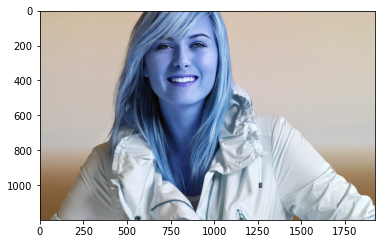

In [18]:
plt.imshow(img)

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray.shape

(1200, 1920)

In [20]:
gray

array([[190, 189, 188, ..., 200, 199, 200],
       [191, 190, 190, ..., 199, 199, 200],
       [191, 191, 190, ..., 198, 199, 199],
       ...,
       [ 89,  91,  92, ..., 182, 198, 209],
       [ 89,  89,  89, ..., 201, 217, 229],
       [ 88,  87,  86, ..., 221, 231, 237]], dtype=uint8)

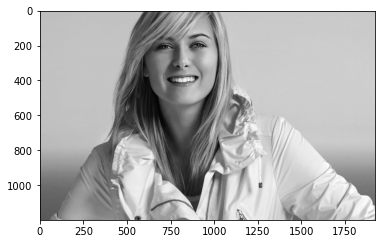

In [21]:
plt.imshow(gray, cmap='gray')

In [22]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 4)
faces

array([[575,  34, 473, 473]])

In [23]:
(x,y,w,h) = faces[0]
x,y,w,h

(575, 34, 473, 473)

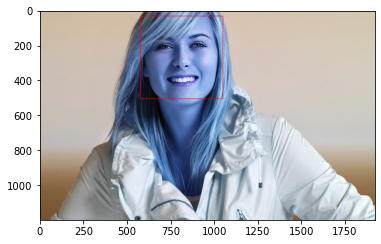

In [24]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

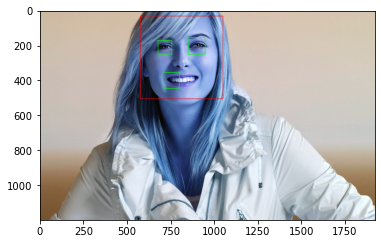

In [25]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

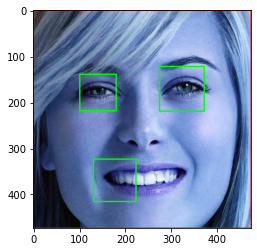

In [26]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [27]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

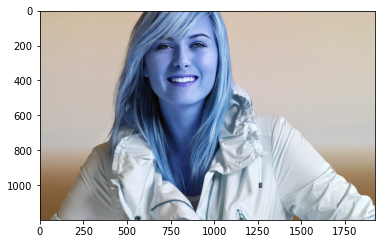

In [28]:
original_image = cv2.imread('./test_images/sharapova.jpg')
plt.imshow(original_image)

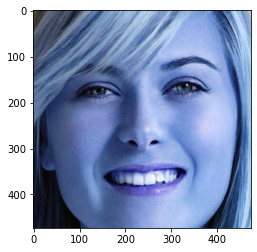

In [29]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova.jpg')
plt.imshow(cropped_image)

In [30]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [31]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [32]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [33]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [34]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [35]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

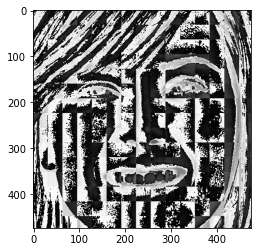

In [36]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova.jpg')
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [37]:
celebrity_file_names_dict

{'cropped': [],
 'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_m

In [38]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\

In [39]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [40]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [41]:
len(X)

187

In [42]:
X[0]

array([[ 72],
       [100],
       [114],
       ...,
       [123],
       [224],
       [226]], dtype=uint8)

In [43]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(187, 4096)

In [44]:
X[0]

array([ 72., 100., 114., ..., 123., 224., 226.])

In [45]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7021276595744681

In [47]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.67      0.67      0.67         9
           2       0.40      0.40      0.40         5
           3       0.89      0.73      0.80        11
           4       0.71      0.83      0.77        12

    accuracy                           0.70        47
   macro avg       0.67      0.67      0.67        47
weighted avg       0.71      0.70      0.70        47



In [48]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [49]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [50]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.714286,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.657143,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.764286,{'logisticregression__C': 1}


In [51]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [52]:
best_estimators['svm'].score(X_test,y_test)

0.7659574468085106

In [53]:
best_estimators['random_forest'].score(X_test,y_test)

0.5319148936170213

In [54]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7446808510638298

In [55]:
best_clf = best_estimators['svm']

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  0,  2],
       [ 0,  7,  0,  2,  0],
       [ 1,  1,  3,  0,  0],
       [ 0,  1,  2,  8,  0],
       [ 1,  0,  0,  1, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

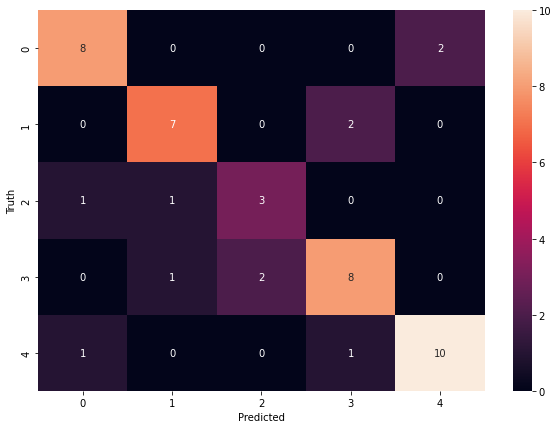

In [57]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [59]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [63]:
import json
with open("./artifacts/class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

# For Server

In [82]:
__class_name_to_number = {}
__class_number_to_name = {}

__model = None

In [83]:
def load_saved_artifacts():
    global __class_name_to_number
    global __class_number_to_name

    with open("./artifacts/class_dictionary.json", "r") as f:
        print(f)
        __class_name_to_number = json.load(f)
        __class_number_to_name = {v:k for k,v in __class_name_to_number.items()}

    global __model
    if __model is None:
        with open('./artifacts/saved_model.pkl', 'rb') as f:
            __model = joblib.load(f)

In [84]:
load_saved_artifacts()

<_io.TextIOWrapper name='./artifacts/class_dictionary.json' mode='r' encoding='cp1252'>


In [87]:
def class_number_to_name(class_num):
    return __class_number_to_name[class_num]

In [85]:
img_data = "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAOQBbQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD6PUEnLAe+KANoG7k0Dg52k4OOO9CsDu6Y7DuK+lPmgOG4A2kd6btGCCec5obGNxyGpSMrweB/OgBduQMcelJjnOB/WhgS3HAIoEe7kDp05oAUkBeFpAql844xyKUZbknH8qFHyq2eTQA4HccDgjvTHQMcn7w71JnceTjtTQdq5A4HU0AICMEA4HTHtQjAfKST2OKM5IZRmlAJbPT3xQAuMvnrgUucdQBn1pCQDkNyeDihhjHzbfc80AAJyDu6HP4UZVSS35mkYc9R1pQWwB8pFA7CksCTkYP6Ux/mwfvZ45pyjPJ59aUgleBjI49qBjcAELg8U44fjHOMf/WoIY528BaUKQwA54yT3oAj2YYAgDdxz2FPxg524J6+lBQ7h85ye55xSqpyx9P1oAEGOCQdvSmhS7NkYJ5z6U8AO2ScegFKB95lGcnigBh+ZMKMjtS7yqcjkntS7gNw6YPBBpNpMm7PGMZoAXqu3BG3mnNkgdsdaBvCjODSbDtOPvHrQAvBbA4A4xQ2OMghu1Ku2MgdFIzgUHB+7n8TzQAm7PUfU+lKAQxHpS5bOMc57Um5mxng96AGsg+/0x1pwIByML2pEGGOc4PQdaUptJJXcfUUANwQuSeD6CnbduCBj0pVbO4L+OaDnIxwPWgBrDJPpjHvTgAvs3qaQgjkcEH86ULlQAdxPc0AIUyAOw5Bz3oZcAHAxnPXNKFJ+gpDgLtHfmgBGG4knHJ7UYHJUcnikdcgEj5R3pQ27BBGCeh60ALs2nOQFHAA7Ui7VZs8kil6tg8ihVUAgcHPWgCMqoUMV4B6U4nB6Zz0FKQcnncO3tRH8qn1oAAADtGfpSAeoBWnkAdsmkBPYY56E0AKNw6fL6U05OecKadjcoA4PXJ6UhQkE8ce9ABgtznCj170hIJ45qRQeMDOeuabgknI4PUCgAJ+XgjkUHIUYAz70pbb0GB0zQRlfmAI7YoAT7p4Pfj2ps0wgQux+7z9akKhc8E56GuV+IXiiHwvostxO3zkEID60m+VXLim3Y8/+LnxDXQreRRJ/pLZwM/c9D9a+PPGPiOS9N3M0mWJ4Y/wgnn8a3fiR4/k1nUbmaWQuSTgZry1pZdVePLExNIWYep7ivJqVHJnt0qfLEs+HLU6hcMAmyNiOX+9j1NeqeDvDA1W63yqxjUbUTuaxfDXhzasMaLs3ZJcjoO1exaNZw6Pp8b8mQJtWLrge9eZiK7j7qPQo0efVmkZY9IskjDDzccg9B7159rusLdX7IrbtoG5m5J9s9s1d8YeJxYxqkZD3MwwFPJBPFcbfXR061Bn2m7lUsVyMIuOSfb0rzYLW56TlpZDr/UTPIUWAyXtwTHFFC/zICeSRz/kV00WmJY2gs4rmMyAb5y/DA/3R6msbwbpCRWZ8Q3i7ZW+W38zg4P8X1ouNSE0QmOIY/mdRJ0255cn1rRvWxKRn+L9VWytY7Q5SNQXETcBnxxn1A6/jXDeGtMlv7ttV1DMIdxHarjJZj3A9utWLzW38QazIsEkDBm2AuCygegH9a67wtpaXM8FyJy4jBjhXaWHXlgPftWLubRVjt/DtrNbWUWl2afMVLSSE/Md2SNx9+pH0Fdx4N8KR6Zcm2hj8+6b97cSynGwnqT7k9B2qp4b0FLa4FnYeZJcOVkubhl5jx2+voK9Q0TSotNAhiPlxA7pZm+bBJ6Z/iNYSnY6Iq5r2tu0dsURPLhCDzJW4NaFrqEVpCqLHtL8qjffcDufRfeqGoavBp8fkxRs8rZdYXOcejP/AIVwXirxkmnW7RRyma7nUmZwOWH93PYVxTnroddOlzbm54u+JEmnobaxCzXTZTd0VvYf7IrktF0KK7nudV1N2uXTks3IkOPuD2FY2g2b6/cs05bGN3mY6KOx969c8M+HUllia5h220QwkAHHt+JrlleWh2WUEQeGtAn12/huJIDFDuzDEeCeOpHQL6CuzumM9yLGykEljBgyyqM+bMO3T7ienqKs3eNJtWit18u+uVwGX/lgnr7E0aTpstusenWmy3uJhsac9LSEcsR/tHnr3IrSNNRVkc7m92anhTS4bDfrWpFRDY7mt1k5w5HzSH1Y9B6dK5m/luPEOsG6mjPmzDENsedq54z/ADrZ8XXySW1tYxOEsrfaBHnLSY6FvXnmtjwx4a8h1unBe+mGAf8AnmncfU1z1ZOf7uOxUFypyl1KuieGHgLRZzLIN08hHCr6AVsXhTT7FLbT2TmM+V5wwo9Xb0ArRvW8km0to2ZQQZmB+Z27Ln0HeuW8XXkccdxa7xJJKoFzKvGRj/Vj29u9KNNRVwTcmeb+JLlb+bybVmmgWcFWI+a6k/ilf/ZHRV+leh+A/AxsALyeMtPKoyjHOB2z+FTeA/B0c0sd5dQh5dgxlfurnjjtXok0X2dTBEv72Q8t3UVtCFveZFapd8qKhcbXIIW3i+/Jjk//AK6wrm6aBJLphtd/kgTGQp7H8K1NXmiiQW5kWO2hUvcP2b2+teW/ETxJPFbw2lqWjubhTxnmGM9PxI/nSqvlV2FGPtHZnI60y3l/cXPLWtnIwXnLTXBJ/eMPbtVDwp4Wi1m6WaZY5reOTGAcBm681sxaT80MfRY0xsP3nbHLfXnrXV+GdGisTGQoRYs/Ig4z059a4IrmlqehOfJGw99PilKwYK2kDbmkbgPJ6j6V5P8AHHxL9tNhYWrAh1OSOozx/KvRPG/iJYYTY2rAMEIdh/Cp6/Q14xOx1bU0u5cSsuUjXrk5wtVO19CKcdOZjfA/h2JtdAmLpb28W1mZPlVcZz+dT6faTa1r51OTn7MpCJjPPTPvx2rqP7POgaE9uuZNQuxvl28nJ4ArqPBnhBtKsIvNiVr+QBxG33V/2ifas37xozP8PaDd6NvuIoRca/frthjf7kKd2b0rdu1HhLRpFtXS68QXSbVun7MTkt7KO3rXQM8OlW7TPiV5CSZGHzT+w9ErlrvRr3XWnlkke0kuG/eTtx5adAFH0oTtoEVpc+ePiRpt54j16z0DS1ee5MLPPLnf50rnczn+6P0FXNJ+H8ngXQEtbMRJqcrkSX1yGIUEc+Xn72M45r1TUr/RfBF/b2mk2cF3dSRfvbiRyxAGeenJ/SvBfiF4svPEWs3U2oi4k08fKd0pBOOgXGPTpXXCbtYidPmKt/qCTaiNKs0e7DBYp7xz/GzY3Kf6V3MTrpOo6do92wkht7eKOK6B5LhRnn0pPhlpCanYWpMK21ls8wOyZMSq3BDHOevWub1jxAW8Q3VtcyfaLZrhmhnXgwr2B46H1pyfMZxi07n2F8ItbTWdMk0S9cNKW/d7jyCBww/lW7/ZJsrifT7gZ6lQRkHn+nWvF/g34gSW6hdZDHcWvBLAYkT19zX0ZrinUtPg1W1VTLHkunqcc8+4og+ZW7EVI2l5M8i8ZaS+mX8F2hYk/LKAe46fnW94d1JAIyr5jlA+U/wmtbxHpA1nQpXRxJiIyJgcsvUYPqK4Pw9c+VujGTsAOPQ17WCxTo1V5nlY7CqrTaPU1YOATUbnaobOfaoNOuVuIVwQ3pg9anKgcdxX6JCanFNH51UpunJxYwkDGDnvS7hjg8k0ueOBxSEKScdT3PSrJQhyCOSc88UqsNu4jFIZNwA5HsKUjngYPb3oKeqHjlgQcL2BoC5zyM/pS4G3G38c9KbjnnpigErDCFC46+vpQRkcjPbPSlKgYx+dBBZs9x096BiNt25A60mM452jHUU4jcDkEE0zY2Rjg+lBmtxUwp3Y68HNOABBHfP5ig8hgeP8KMAAccDpzQaDMAH7pHvSsNqDOCe1Hfg4A7UFScHr7UAIChOMZPr61IcdAO3SkKjdkqAtCkHkDHagizFPyHpzxyKCT8zAZBI/GlwTnB49MUgXdwCfpQC03GuVHu3tQVyo9e9KVIIJGSPSjJH0NBV0GAWAzwf501gDkbc04AoeRtBPUUAbtuFyM96VyZAMPyvamgcgYzu5BFP2sF+vRaUjbyMAEdKaJGnGBgEA8Gkwo4wcds0pOO2TjigA+nJ7ZqWAFVG1ccA5BpRySAMHHFDABSAenWkwSDwR3zQO1wk4xxvOMUBQFxjOOaUqwAJHze1Bz/dx9KBCAgLjHSgkkqe30pQdv0pQc5OCB6GgdmOAyT7jr3ppw7cHmkJCg9s+lIT020Baw47ShVvXNNOOMDBx1p3UYwRQqd/TtQIQFR1yfehzgg/hgU87cgdc1GMBuP8A9VAARhVI+UgYNOGPLGDk+pphB7DNOMYPAOKAEB2YyOfahgS2QeemfUU45BGRxR0zjgetABkBRx170ijoSBkU7aG6g/X1pB3I696VwEB3D+76+lAX58E9ffrTmG5eOfam7F3DAPHb3pDHL14603Bx79DigA44Y5HpS4PAAzTEIOdwNOYHkYB+vWjgA4601VI4P5k0kAoVsjGAB6UEgE55yeTQQ2e+exFKWPAPGOtAhpHzLgYHXmnHncV6k8GjC5U9frTWIIGR3pDBiNo6+oHvT42A4J49utMVNq/0zmnMmcFRyKAGYPBJ79Kdu35UjHIpFzuzjmlwQeOB6UAAAAIIzk9qQHBpcjuaUjd90fL0NAAXyvPPvSYViGI5pAFOAeMd6dggnAoAYx5Ocbe26nLyp6quOcU0DeSccmnZAByMYoAcCCoGAWBzgfzpAzMMjOOmDQqktyMn07Gnkhcq3HfgdKAImwHzj2NAVeMDHvSkKGBHQjqaXr0oAN3zHAwPT1oX+8p2kd6MjsTkUv8ArMgjgDrQAjDcwOMYoHPJ59KXbnp0FID8xz6YyKAEJCtnHNO8wqeOcdBUeDjPv1pxGQM9PQUAObBG4jJ/lTY1B7gE/rT8YUgdM800Z3YyvtQAgy2QSTQcnC44HSns5Uk8enFNxgZBIJ96VwHBMrgnGOB9KbkKcZJ96N3GM8j1pAyjBY5z6UXAcHHUDNNAJ2kUoVTgYwM54o2kL1wR6UmALhsksAc96KVcqMGLcfU0UgOfRQDwce2aXaoBHfrwKQL8/AznuakJzlugPFdFzIaduCDkmkAznHGaOvO3aRxx3oLDPQgdMnqKVx2EBIbJBYDgAUjMzHj8hTjtxkEsfSj5VQj3FMdhADtbaMnOMGmlwSMjHrT2BP8AGce1IfvADBHv3oFYM4bLcjtQVDAnaQfTNLuDNwACKUhRg9SaBCSbsjA2gehpo3YYk5FOVSCQeM0qpkEE8etBQY+XA+tKoycEZHem8AY649aVF2uoH3euaAsA+fJBwBxSYPIAznuadnhsAn1IpQoGB1I5HvQAgUh1Hc54HSlA2nnkd6Np3cgYzng0Sc8jIA7igATlW5J3HHHanhANvr70iBjx0H+eacPlBGdx7kUAI+ew59fSmbtgxnOe/pTsnpn5TQdpByNrDoaAALk4pzfKoA/SkyeDzk9G705mIycDOMUAM4CFcY705TtTOMmghcKSMGnYwmBzmgCMLjhieeeKUFgx6Z7c07cQAcc+hpuAx3DJPp6UAPyN3Aznk0gTnPcUmSgAOCSc8UhclR6jrQA8AlSTxn3pByefXvQGyO/HrSk/JkcnOOaAGDluDxnj1p4U5+9gdaRVyTx83ehl2tx2oATiMsScA+nWlzkhhlT9aTjfzx60u0Fg3cUAOYBxwcj2pv8AEAB0NLznHA9AOlIzAAgL+PegBWIwc8Uw4GMcjtTiDuOQAKRRvHJwPUUAAHUdD6+lCgYAOD3zQBkDABx1PenAjOM49aAEH3d2MYppyMc5B7inDoR1FJjBPGPSgAAKjkjb0yKNufc0bMKSw/ChVUDJH4UAOyGb7xHrxSYDc54xz2pNwJBUcUNx0zjHWgBQw2n5gAPWkUkrg4570gG0Zxn+ZoXgfN68UAO3DHOQRxgUBcHrnvQSNoxxQB0B/OgBSN3B+UDtTl4Gc8YwQaTndw3yDjigjCn+6OTn1oAiubtbaCWQsNqqTz2xXxr8f/inJrWp3EMM2LWE+WgycMe/Ne2ftAfEuPw34elsIGBup12Eg/dXvXw/4q1V7uchmLsOT9TXDXqfZR6eGp9Wc3rWoSXU/lqd0shIAHb3re8PaJ50trFnccZYDuSaw9L05p5zcOwG47PM7jHXFe0eAfDYWJLmVQqlcJu6gf415NWpyRuepCDk9Do/DGlC3gEjgbUAJPYmreqa6LSJ5X+4M4XPP50l9eD5lhwIkXaqnu3dq5nULgPIrNu2jO1R1Y+p9q8Zty1Z66tBcqKKsplk1C6y87AsqDsKxbW3XxFrZMygWqHzbuUDjA6Ivrml1q7N5L9nQnyYlzIQcFj2QVqpataaWkEaYZ8PJ+XCg1WxKRNe6iNVucFfJswuxIz/AApnofc1554/8Sts+zWj4abCBFH8Pb866LxLqsWg6YYWkJuZBuIU42jvzXmdldS6ney6g4AjB2QqB+VJGqRueGdGmuRHBGSgc7DJ0Iz9417/AOFPDhtFtUto1MxULArDgY6yt6AdhXIfDLwdLOySSITO3KZBwi9yfevpPwz4WgsCryBCGUDI6v8AWok7G0Vcn8N6LBpdmIlDIo+aSTqZGPU/WpPEGsTaasFnaJFJqkg/0eBzlIhn77e+PWna/wCIRp90trZIJ9SZchQP9UOzE9hXIXt1aaJp8kxkDO5LT3Mh+eZz2GedteZVqJM9ClTuRa74jl0xPISRZJNx86cDLSnvj2ribWOfxBqaW8I3xu2XbPT2rK1C+u/EmrG3gRgrHHy88dMD2r2bwN4Qg8LaYjGPffzn5Qy5x7YFcV29WdztFWRq+F/Dq2Ait0jV5WO7OMBQO59hXo1rKulRJchfNz8sUZH3m9ayNB0oW4ZpG8yQtmV9uN/+yKs3eoI90I5pAqqCygOB5aDqSP0/GtY+Zz6y2LqY02ym1G5YzXJ5RG5DOei/hV+3d9E00Q3LLNfTqJpyByueiVU0Bk1Hbqk6brG24s4X7v8A3jVywtDrd+00jqY8l3dh2H+NXKSiiGu5J4Y0d55W1K+Xcu/MSEffb/61dbNefYAkEBMt1O2Dx933NV45BBHHIVCRoNkMSjGPQ1SubuKwS5uDIWfb8xHRf9ke/vWCjbVhdzdhniDXYtJgEQdSeQ2xsZOefm9O3vWZ4U0aXxE39o3MYktfN/0eEDCyN/e9cCsLSdLm8Zaqis5WyjIknOOijovuxr2fR7OLS7XcYxEuzCRqMeWvp9a1h72r2Cc/ZrlW4kEEWh2eCwMz9SDnP/1qGc2dn5z/APHxNnAPX8qit3W+lmvZ2xaQ8jcM57YrI1fUJ5W80grM4+VSfliXHpWvS5zKF3Y5bxLrDsxVWHkx5yqf8tZOw9wK4W5tnSR9S1CRXunwET7wUd/qa3Nf1BIGitoVzIhAeTsc9v1rKukNxeyMW3NwoC9PpXHLV6nqwioqwuj2zyCObBDyfd3H5j75/pXR6tIPC3h6WQqouZVKorcH61a8NaMvlvd3ahoIh/D1Jrz/AMf6/wD2xqsxkLuoJ2RbhjA6DntUuPLG/cnm5526HI63eSLazbnHm3LYyfp39K0vCvh5LWL7TOikW4Ug9QWx0Hrj+dQ6ToK+KtUZjII4o28zYAWyR644x7V6/pPh2G3iVDFtRF3MZQAFHrgdTWSg2XOolocv4X8Jve3zaleLl2UGKJ+ijPU5rs20jyw5L+VATnLfeb6j0rUtz5mTFEUTGMtyT7isjVZ2YvDF+8ccvM/pTcFHYzjzVGZeqSxxyg21u1xP0Ekn3V9wK5PxFqF/O8lpHmUSgKzgEHPcL7V0VxNIMhZ/3bdT2P0Has24t2lWQ4+bbgl+QPp6GsZK56dOKirM43UvC4ffMyq5WIIm5sfLn5seprz+f4W2/iC8ludUmFvo8G3cqpuyc/dzwM/nXukehwmGKKUsttGgyGPzO3oBXHfE/UBa6W1lYp5OzmJQPlXHHH+1zQrrRCcbux5P8SfibY+FNLGkaLELS0YiAxIP3iIO7+hPp6VyMd23iTRhd2Li2mh+QeVjO09ie46nn3rnPEGl/aI50uBuvPNYiRuA/Hf3rN8A+I/+EV15I7lsW0jBJFY/cOfv59u/sa7Ix5o6HNOPLoe4fCrxdJPqS+dH5OqW5wHh4FxGO5Xpn1r7S+GWpQapYomN0NymRns3cGvirUvD8ttfWuraeyxTZE0aryrLwCoP+e1fR3wB8TC8WW2ZysinIT/bA5/MVgpcs7mdRc0Gj0xbZtN1GexuRnyHLRZ6FD1/DtXkGr2K2HiW+tYSVMUnnREjG5SfT2PFe8+NLT7TbWeqoMrFiKfbxhT3/A15P8RNP+wXmnaoFy8JEUrDo8bcg10SbTujlpvnVmS+HNRBcRtlBnKjsR/+uup6gEfnXD6YNjq0KZDfd2nqM5NdrBIk8CyK2Qc44r7nKcV7SHI2fE5vhvZz50hBnGAeKcvy9PyoGCfTNDADIAyQa+mPneUbx028UowSMDgc0FclTuwfSnbDuI4x7daVyhBwACc5p5BUDAB/pUYAHIOfepF6cjOaLgMfJ5FGdoxjinYA3KOnoe1MIA4zx60xNi7g/wDER9aTr0znpmhVJGCOKO5CcD3NAkrCA4DZHzAUgUNnHGfenLEecfMe4poUK/fkZHtQUCqSM84pTgdT1/u0bmIAA+buaUcDp1oFcRTtJGTjrSjJPYe/elwT14PpSEA5FAw5BOTnPFIARwRTgVVc9xwKQsWG3+71pXJaF8rOMnI/nTc7flxwe9OOCB1GD1o5AOD370EBs2A9znvQ65xyc+gNB+7z1/nSMxUbh3pGlroBuAVgRk9jStkDsTQuQecEn1oLsvzccdaCeUCMBfelAAxgcjmk3Fsbuvalxkk5yaaHyhnJ47/rTOcgY4p5BHy+nf0pOM4yaBpWFB4Jz0FMAGec8HIFOPI680Kp9eMUiWtRQhK46n3pVyTg4z/Okx8owfm70B/l59cUFjXJLYx09aUquRzzTh8opDz14HpTE1cbz35NOX3NBGRwcDvQBtB5zSMxhIHykfQ5p6qGySe30poDcg9fSng9PXGKAEILAAce9ATDE9OOtBJH4UMd+CeB1pAKuWU4HAHU0wEYHU/WnANg4OfY0bSeRj8OtFwFUckEZHrQQBGRwfoaTkHGcH1pOnH5/SpAG54/i604YIzzmkwF6cn1o3AYA4yf0oGN2dMH2p2c5/velDNuXAO3vkdTQcIw6nPBNADU74HNCqXb5uP5ZqRO7DqOKaQcknknuKAAAkHOQaZuyRT3YhsdsdaAwzkjJoAUMOQcZ9aYUDDk46GlCkEkcnrzRu56HAoCwLwzeoo3ZBI70o46daTGR6YNAhVGR81N43dcUuAO+frTuNv94HqaAGtg4ycHtinN1BzkEcU3G4AjgZpzkKcjg4xmgBoJztIzjuOacSGPHIppGD0K05lx82MA0AIODxx/Whuw6k9qOhB69qXDZ3EDgdaAFySw7Z/Sld9wOR7A0ik8MSAD2HelOAKQDV5XntxQCACe9DHbjHFLt2g849c0wGhioyRxjBo3YOc8elO3cY6r9aRioIGPuigBGBHXgGnKvTHNIwZiMNjvzSqpzkjFJgNJBIC9xwKACQC3SlXH3T3pdojzjntSARo/mYDJHBowCBgD8fSgdPm4A4x60Hk5OM+lFwFZQFyBSBhxu7dKMrnHJJ/ShufakA0Lk56GnKCMg4+ppSc4BP5Uq5Jw2OOmKAEViOSM46UigNk8juaUjHfnrn0pMEM35fSgByhSOetFOAyBiigDnWDMcnjtSAH72M46UpU7eW5B5B5p3leXg55XnjvWxAxmIyetOPUj+EcbvWg9FAGRSFDsxnrnigBFA3ZDYoDBEbjGT0pdu+NcDbnqfalaMgcDG7kc0ANypwBnJ5zSGLK55B9KlUE7eOOuaU4fJFFwGGMr8gxk9aQITJkncR6U7AIBwDnmnAAoBnvzjrTuAzd847j+VG1j04HOOelAPyjA5J4zSeWx79O5pgNCkMM9zjFShAMZHy9wKEUMBn8KXAw3ODQAmCoyOR6UoRT9CaRcgYxzS42pjByDxQA3aG5x265pwXC4PQUFQuVPbn6U8ruA5yD6UAM3Er6c4pxPC45x1xSKB0J6GgAIox+NACuoUHpj+VBAC4Pf16UE7uoyPakc7zyMe1ACouRzgAe9BCsBmlwCvTGTQeMDuKAEOCNq/lS7fl5yQOeKXr1zn0NNU8nHGOMUAKGBC88ijAVjx19KDk4xyD0pwUj3OcUAMGC23FLg4Bxx0OaVc7uozTuWyWwD270AMzlQMdKXgAehpQSBySPek+8T6UADEoeBz1zTR1B6+1OAxznO2gLuXP3R2NAAQMk5PSgEAcnFIeVwDknnNKACCW/L0oAaD87HqO1LvAGcGg4A54PpS/d4Bz7UABU4UlSSaUrjgHGe1IRgHn3pqtx3JoAUDj+6R3pD8x54PrS7jjJHeg/McHgigAwuPU+tI65xnp707GNoGPfNBB3bcZ79aAEJVl7gUqgAZIyfegAtg8j2obAOO+OtABgbiVGCaNvTBz/Wm5wOTz7UpAPGcCgAIUZweaFzxzuFDYwMUcg8flQA6QjAOM57U0EH3x1px4ByRzUTgbcjJHagB6EBgM4BPQCsLxl4oh8N6VPPMwjCgjHqcGtKSUxBnJwBzzXzD+0N8S47ydtMtpiRGT5hU9T/APWrKpPkR0UYc8rHk3xL8XyeKtcnnkcspJKj2FeT6q/2q/8AJj+R2JJkboPU10F1PI0Mz7ipf5Vc9AO5Fc9bRySysY1ZpZvkjUDJIz/WvIk76s9pR5VZHS+B/Dq65rIjXc1rAOTjG7Feyz/8S+08iEgbgF46AVmeFtEtvCGhRxlD9pCB5SByxPap5bgWlo99ckF2z5cbHGfevGqz9pLyPVpQ5Ile8vo4NsZbMrDbsPXb2Jrk7m7eWGaV2CE/ec/X7oqcyzajdGSRtskrb2f/AGR0HtWZdTDU78MAfssD4jhX/lpJWG7N2i7o2mxxq11Pyit5jA9jjgY7+tEmsvcRyXUjBUQEoD/OrOqXnl26aerhpMbp5B0B9K868f8AiNbZRYxEKCBuwePzp2uPZXOb8V6rJq+otDDueWZtq45OK7/4Z+BZNXu4WePbY22FRW481+5HsPWsH4ZeEZ9aun1KZGMeRHFGBzIT1xX1r4A8IjRbFJLmONXVBuVfuxj0/wAamUuUcLyZs+EvC8GjRrcyLhSATg/eOeuP6Vb8U+LZbJDp2m7X1KTBJCjZbIf43PqOwqv4n16azhaO1GZWACbuNnocdz6CuKgna3WUPPud8NczN95j7k9682tVfQ9WlR6s2Y5LfSLGV1nZoSp8+7Zv3k79+ewNea6/4kn8SXqxhP3MbbYkQct7VV8QeKz4m1EWdgSlhB8gKcqxHb3Jr0HwJ4G8i5ikuIlE6hWCt8xXPc+/pXn8rerPQTUVY0Php4IGmbNQvkAnIAWHH3ST3r13T7RzdO27fMQBlR9welUrKyjR1d1IC/Kiv3HqauXGprYoy26gyMCo28H3Yj+VOz6mTvNl25vgStrAckjBZRznvg1lWFifEGpG2RwtujB7ydO6j7sYP45qvPL5YS2UH7Syl5HPAiX0+pqxbSyfZ4tMsCIo5fnnlB+6nU/ifSnfW7KtyqyOrFyLxo7a2JFpBiNVXofY102nItrC8bKMg5cgY59B7VhaUkNqI1iTaAPlXGSp9T71pXV7HDBuZhszhckfN/8AWFZt3Zg7vQvXOoMGIRwbhhjBHEY9T9K4q9nOv6jHp1gXlgyA8qjl3J5x7UniXXDDbGK2k8ya6IT93yZP9lfb3rs/h/4a/sew825Cee/LFf4R/dFaNczSC6px5mb3h/R7bQLKOMAKqnJPTzG9T9KuM8+r3Jt84jbq6nqO4qrdzA7WkAjhX5Y0By0h9as3E4s7VYbcbLucZZh1Qd66dEjk1bv3E1u5gtLbErhLO1G4Rr/Gw6AmvOdZ8Tz3bzTTyiGAnOxODjso/qaseMtXiKRQbwLWFiSmeJn7k+wrzY6gdVuZHBxBj92T3HfHv3rnnN7HdSpqOrNi2vPtU/2iRQoJOzB4A7Gum0bQpNRnURxDO4cHnGed1c74b0CXUrqPzt0UQIREA+Zh6AV3PijUoPAditqrstwwBmkHJjXso9zRBac0jWpK8uSO5V8X6odM0S4t4MwRxjZGQMuT3bFePS6XFOhj3li7couXdmI9e1Znjz4kT395FZWsTPI3LMW7k5r074N/Du6Szt9T1NPNmckwwvng9yfSiX7xgkqUdXqb/hDwguh6bFFbxi3ldQXYj5h9T612CWJaTylX5FOTI/Ue5/wrZh07H7lMSEHLyEfdqvrVzHYxeQPmJBJ3Hlz1yaUlbQwjecjHv7iK1iKA+WzZw3dveuUkQzedhMMThjnJxW3cbr7LO20g4APUD/CmR2ePNZV25OMeuK55anq04+zRgtaFQDtywXGOMU6Oy3I249OnHFbXlRRscRLwD0/nTJIRsRyQfc0rWNua5zutxyTwpImQy4IJGP8A9VcX4l0uO/hZ3jLbfmZfx5I9K9Bu7XhhjDgHIzxXNXRNu24rlTwxI69KwldM3jax8yfFDw/5Dqbc5TbuCscc57V5fqmmHVrR3RB9ujHKEYMi9+PWvpP4haAt+JDAoMTbiigcKw6gV4rJpA0TUFubyYRxq3NtGcu319BXRTm7aHLVVzsf2fvGp1rT5fDGrsTPZkXGmTsPmuYl/wBZEM/xKBnHtXs2hatL4c8XQ3tmNloSNqIOgIyGHrkA/jXzB4ruJfC2o2nijQx9mvrBxcQRgblXpuK/7JXg+5r6m0O407xX4R0XxbpcCrYXcasYs/6oM3Cn/ckyv0NXWgpR54nJTmoy5ZH1noN/b6ppkKtiS1vo9y5HYj5h+dcP4j0lJdOm027Vmkt9yAgffTkqaj+C2rtdaNPpTSb57NvMiLdSvJHHvzXV+LrUt9mvlXIJCt6Z960j71NM4vgqtHiOhSPDmCTObdgF2/3RXZ6bI8J2sQQzEYHT61z19C1j4lmTy8I5YqP74bn8O4rb05iIoV+7Gq7x3we4rty6u6FVHPj8Oq9J6GvIig8HJHXFMJ5BHA9fWpCSygg9QDkVGVJwB1Ffp0JcyTPzWUeSTiyUYC5xTGTgDBIPenoeBQyYy3Jx2qiXoM2B144FG7bxSBdowD9QaADjPbtQJDt2T0+tN2AHPX2oHOPU0/bg5zxQOww4JIBwT+lIRhSOjZp5AHOOaYOT159PWhAABJ5OMDFJnaTznsKXkcY49aNu7JPTtTATlSCBnjmgHGAKU5Odp69c0DAYgdaBWQhOcjGKAuV6jr1pSTkkryPegIF96QkITzjseaQ85yOT0zTiQAeDSEk7fXrSKHMM8A89cUjgFcZ78mlY5IBAOaQoCcZxjk0CsIoIOCMntTlU9D19B0pGA4Ktx15pcE/MOtAxSDjkdKarAjnlT60KSx3GjC4OSc0CvqOZBtGOvvTARu6flTsfMAecfxUu49QCRQMUqSuRSA9jz9KB0zu4NBY44wAaADA6YHt7UDngHLe9LglT0PakZSMZIx+dAWAEAbSPm9aNrZ6ckc0rAE4ydtKVIOc896AGktgKRx2pAcj1HehsgZzkUqjcBk4x3oEwP7zHQD09aRQBnjGKXbuHTpS4U4AoJtoNBPVs57Gn7c8hiaQEFsc0nQEE4Oe1TcTAgZHr0zQVwRk8ilIKjBAYUhbkkjg9AKQWFY7hnOKaq/KSe1P2gfMPmz+lB5H0oAaVHHcUY3ex9aULt5blvSnKMnlf1oGRg4I3cZOM0rctkDgUoYZztwaBkqccE84oARRkZUZFGDnHQ4zQTwcHOTnFAJ24zkDvQLUUAgYz83U5oA5znr2pSoJ6NjGcjvTeOg60DFxsORmmONz5FPxgEHpSZIAwMk8UCHE46EDjBxTSCD1zSjI7A01iV7cjr70Ax2SV7e1IRgc+tG89AAAPWnDOD2z6UCGEdf0pVXFOYEYB6Yppxw2M0AKMeoHtS5PUY/Gm8kghc47U7HY9f0oAa6jufpSAjccnkHFSFsNnvTCBvLbeDQA91yvr9KYCDle+PypwGQOcYpSg5GffNTcBAQwJY8CmuCRnHfinMpIBwMmgAu3sBQAFSTn070hIJxt/GlAABGSQaX+Hpn68UXAFUKcgc03Iz0pUJ9PrS4yflH507gMYszY6e9A3H7x6UrYUbeT7UgOxwce+KGAuQM460A8UoIZ8kkACnKR17VIDDyM9aOhFKxBOe/Wjdyx24A59aADYApP5E0DgfMKXDHBHzY7E0AsT6fWgBg3bQTwBS56nGKVcknJyaQDLdOP60AOxuU46HvTFUnqfl7Uqg8jpmkLDcecUAPRcLRTHHzcvg+gooAwyMZ45B6djT9wVeuD2HpSN8vGMkkc+lMySB8pxnPPetSBWbd8vPPORQRgjPH05p+AcY7dfakJyQM/MewpgIucAHAA6AUhBLA98cZpUQnqBx6mkHyvzwV7etACKSq8A464pyjADDlm6CkVt2cnbj1pwbygo65oAOmAOFHYUvRsgc+tKRkcetN37jgctQAjYVs847jqBTyM54z3B9aNu5QenvQCVAAUN755oAagViepX09KVlxIwPHHFDHsRgnsKdhuOMj0oAQE7SfwockMChAPrSYJBGAOenrS7+BkY9qAA8deT3NNXpzkc/dFSKOT6U3gODgHng9xVAGzKeg7+1GQQMd6G7gggdDShcY7470ABO3GMEE84oIBGTQowdvHHNLu6nHc0AICMrgc0uBkk/jQM8DGPegnLH0PSgBT703ZtG7HXpS7sfKRkn0pMbgQDgA/gaAFj+Ucg57Uv8XB9zQowucHFBwRkDJ9aAEJGTgcY6+lCscjA49PWlAySMcEUoAAOARj1oAQjb8w5z3owQCBgUpPbjHWkLAcjqaAE4Gc9fakUH5eM8ZAPSgcgn0p4X92AcetA0NVifr7ikUhXCn5vSnknkklaZ5bZ64oAVl3Hkg98nrSDLNz9QacCRjkYFNPzE4Bwe5oEOI28nHPajbw3Y46U3huM04nJzt7YzQAhx06CjkDOB9c0gXBAyc/3qXOc5GKAEZQec/MO3YUpHAwc+1H3TnH6U4AhRgDFADc4OOc+h7Ug5bGMmnt93P8AF600AqKBg447Dmhv0x1oIJb7ppeSpxzmgQiqoHzcgUpBHGeepA6CgjHPBU05BtGcDJoGMzkZ4x6VVnn8sAg5weRU07Bed2D0waxdTvxYxSO7bAODn+VDdhq9zjfi348j8OaBPtcxzum1QPU18Sa9qUuu6tId5wSTIxPUV6B8avH82t67NEHb7NHkKFPpXm9tEIIdzcyE5Yeg9DXk1qnMz2aNPkjdmbrUgcpFGpCEbVTOMnPJrq/hr4bM94uqToRbwcxg9z0z9BWBpukvrWspGASi/Lz1A7mvW5PI0XS4bdCsZjUALjnHpXl16nKrLqenRp8zuyW+nBBmmOY1AZQf4vTNcTrGqXGrX7iUn7OnAT+8R/SrfiTVmS1jj3MJ3+6vbJqnpsK2ET3E3zPGmXLf3j2rzH2PRItTuGsk+zoFNw+3fjt6KPb1qC0jFjAbohsR5WBfVj1NVrS3fU9RZ3JWP73P8Oep+tX5ykzNI7bLe3Xgeo7D60FWMbWNXXRtPeRwTcyDcB3J75rkvCng2/8AGurCWeKSRWfIjXoFrpk0SXxbqETS5mQyAR2kfRiO59q+gPh34EGiWZUbWvGIEkirhIR/dWnflFy82hb+HvgK38ORxTTbHkiXaoHKRD09zXVa1rUOkWgMxWRxykCdefWoPEGtW3h61GwLI5HyLxXn095NeTFi6zXkvzMe0Y9K86rUb0R6dGj1ZvSarcanI0sjeS3RXz90Y5OT3rzXxh4mj1JodI0WN593ytKOF9znqar+KPEV5qUzaRYOVQjE84HGe6j3+lb/AIQ8PxeHXh3IZr6XAiQ9FHY4/GuT1O74dEafw78AyWMazzYe8GFQYGAO+BXt2j20OlW+Oc8gs33nY9qyfDukJounNe3zherPLnkt/dUfpW5pjLfGO6eMJEoJxn7q+p9TWbk07Ge6uWy7RxtPL0UYVR29h61SS5azYXEwE17P/qIVPQDpn2FSanqIhT7Q48xOkMY9PU1zN5qB3+fM3+mOpwFbkL6D61LVtWbQ2NcajBpsUgDG6vLhznJyHYdSSf4Rmuh8KWIs4vNVmmvLty7SudxP0HYe3tXMeF9Im1mRZ3XYpHJAyB/srXolxd23hyxEpTDthI0GNxPYe3uahXbFKVtOpeku10qBmmzI5z8i+tcxNO9zcSXV5IHUdIl7/wCzjtVea6v9WMkruIoOrsflX/64961/DGmw6pfAxqJUjwWduFT6DvWnKjN6K5r+CvC/2m4XVb2MKynbEpGdi9hiu3l1WNGMEeHK/wCsb+6AO1Z81/8A2dbIiAMx+WNSeT7mq2kWwumknlJWFSSWH8VVdRWhzO8tWa1owdhfzgFEULDGexFYuu+IF0iGV8+be3GTx2HoKXWtbjsQJJG2qOEi9a8x1PWjLdXF9efe3bF2nOM9gKhzsjpp0tLsZrt/JfsY1YRbm+dzySOvFRQXVvpoURjzp2AxJIoO3PZVrmZ7qZ32MT59w/7xV/5ZIB2Nep/CDwF/al03iTU0KafDk20MmQHx0Y5qY3m7I6JuNNczZ2XhjTF8I+G217V1X7W6boYXOdvHGRXgHxF8cTeJ9Qt40eRllkfex4HBruvjl48vNZ1RdIsHcW6ZQlenTnGBzVT4Y/DH+19lxc/NbxP8oUg7jgZAPr6ntzVyfO+VbIxg/ZpzluZPwk+Fn2vVY9a1ZGaFpCIY2XLyY6AL/Wvpuws2FsFQCPjGFPCj0+tM0vw/Bp6rO4iRxFtyp+WJf7q/1PetAMJ2WONNkIOTn881uo8qOSU3UYwyrY2TSMm2JemTyxrgr+d7yd5JHRmyQp7HPaug1/UjdSeTt3QIx+UenrWChhncF2URk4Kj/wDV1rmk76HqUKfKrsjEISIhSx4GT/SnSSbU2oGEmBxjjFWkjI3E7EXAAYHqP8aUS/L1DHnA71monUZTWrF8s4JI+hPsajOZkZCoQrwT7Ve8vfkoDk8MrenqKabchMkfdPAptXL5tLGTcQqIw+flwQCe/PesHULRXUqRuVgOT2NdVLbh2YAFMZye31rHey4wOGz1JrGUTSJ5j4rjawuMOv8Aos3Dhc5Xgc14h498MixvJLofviCVKhcq3HXP+elfRviyxa7t54wu1l+dGHcAcj9K8anuM3UcFzGGEqELvbI3L/IkGlF2HJXRwWgWkGvRQQRzLLLhkUOpAdSOUz24yD+dep/sz3P/AAj174g+G+pgf2XeRy32mAuCxifAlT/eUbW+qGvJrvTJvBOv2t7GGm06SQSFYz1j7/RlPWu2vluoNc0zxFpr5u9LkXUbWTtKh++mfQjKke4roi9OV9TzakOqPqLwTqD+GPFdm1wSJIGNpdDPBIOA/wCIwfxr3qe3jurW8tyu5GXzEz+deG6n9n1ix0LxFZMrW2pxRgy9iSvyZ9+QPqtexeDdUOo6HYTyt86boJQfUcU6XuycDhrq6UzyzxjE8b2kirsnU43HHzY5/wAaS3TejlCBG8fmpgYxnqPeuu+IukKtlLIB88Db1wo6d/0zXGaNMJtOkiySIXKqT1KnlSPbmp+CZ1QfPFXNexl860jYDBxgj0qUg7sY49ap2kvlK6E8gnPsetXFfzFx/tZyK/TMurKrRXkfm+ZUHRru2zHA8ZwKeXwSDweuajQhgwAwc9TUg5JPHA716jPKI1O5eVLGjOBjH4Uq9cikOcnjBNAABgD2p5+7wOSKQx5A7UKduBncc9qlgMKkMeePegqDjIp5PHTdmkZPUke1O4DTkDH8P6ihlwcKeAep60YyCOM9hSHDADvVIBC2F9vSgNlgD+dODcn19ad5YbjbSAZgBjzwaXbleDj60pXJxjGO5pHyMH/9VACAfLwfrSKMduKeArDOcH0pG6EDmmgEyAvqT/KgAMAP5ilOeDjpS42n1NIBMY4pcjbnoemKMA5POaDxjI/CgBh9Cwx7U48pjdjtQEBXAIzmlIHQ9BQAi85GdqinFixzjHbjvTVUc89aXnaBj3zSATZknHbrTjyg9aAxwQAPpQQd3uOaQDRgH3NKcdxkj0p3IIyPypB1G6ncAVl3AYx608kvx0z0pnBfrkU/bhc9AakBpG1Tx2pAMjnAFO2kAEkZ9KTGM9CeoFADEGVyPWlPTg0DpjaATQARwB9aq4CnPbPSkORtzS5K8n8KNpzng5FSJgigsc9KQhuMYPp7U4ZIHrRkA/3ff1oHYQDB4OG/SnbgOvJ6UfKeQc0cKh9z360AITxknp7Uo5G4A0biMjbwaE5OAOPUUADK6jmmNkHkZpz4wSW5HWhnOAMZPpQA37xJCge9LGQo5HyikQf7OBTgPb6igkApYFtv0zTQhAOTxT2yw2qaaVByDkHt70AIQQB/KkIAOAcGnFQR8p49TS4wRxmgkTBx60KCF4ABz3pcZb0H86R1PTdz2oEI2CRxg9808AjG3getMCkg5IGO5p6DowOAB3pAMbPPNKvIx270rBWwR1Pemjr6CncAzjOOPelH3cA4oZmIAwMd8UigkE4yBUsByqAcsM0OGJGOM8Ui7i23vTm4C+3ekA0LjHt1NKEDHj8fegMdo3AZpQSCCRz6igBDszgnI/lTuhyOe2fWlIHXaBj86aV4GTyemKAFIKnjrQeNvHP+12oc468DtTS/zYPINAAo2ycfkKTBV+h6/lTkUL1PTmkydxwDg+tAC7TuwQD7mm4BPKkjoTTyCQNo5FMIJbJYqKAHhcdcY7UFc8jj+tNwVOB3pQPT8aAGsAG45/pT12gYxk0hQAnHGOvvQAGPC4I70XAQ5DcdaXcerdKCAH4OTScYIZR9aVwDOAM8c9aQMSM9uvFOKFQAACDSHcAeByOlD2AFUDk5xSnDfNjI7nvSEuUwAPpQgDDnnNJMBysgGAuaKjwV45op3QGMevBHqRSAjucL6GggNkgYYfhTQVJGR8o9a0FYAxDNgZz3pFTacrlT3PvSgbmxggnpinBioGeOepqrhYRR3Iz700qS27GPanAEszYO2nMWB/2aLiG7N3BbrzikVctnOexFPJBHA+YjA55puzaWI60xDgM5B4x0pMhSpxjIxTmBXG3Oe9IxGRxwOlIYBi2AflI7etAA3HFIHDE5/P0pTx8x4zTACwYEY57mlAO0nkj1PWgDcRSrhWILEn0IoCw1Qp2gErTlG4kFsfhQAABu+9QD83p9aABeVbHzHPWjpgYGR1NG89V/H3oXr6HvnpQIaSx+bJA9KcW2qDg4NBBOeCR2oOS/fAqgFxuOBwaQAgkYzj1p27bzj8aR2w2ei+1AwDc4waTr83p2p4bJJzt9KYuQcH9BQIG5weRQFHIHGOAKcwywyMijbsXgcnPegBDuAGOnQ5oBI4PC9venA8gEAg0jdefmx0oATO4jGfp7UfexgH5fWlzleFwSeuad8xAAoKGA8DjPvSkjjK84peSflGF9KXJ5HA4oFYao2gj7uf4RSggEcc00Nubb3pCG3c0CDJ59+9ObOBz04puDg5+92pPu5B5PrQMfgkccZ4GKZyFIz0p6ghckjHbFJgZzjIxjJ9aBDTgZ2jnuaXB29aUEsvT9Kap3r0OR+VABjaD1Pelwdx68dMU8AA89qG4PIOe+OKBjU469fU0jjjI5z3pygMc9j69qGwvDdOgoCwmcYGKc5GRg9qaw4+9n2pcc4ABOKBgxY+p9BQxAHQ9OgpQCACTg5pCTk460AJjj/CnE4HXnHWhfXG36mop3CqVX8c0B6lS5lEjEDn/GvE/jx47Oh6TNFCw818woB1Bxy35cV6z4i1VNK0yaUYBCkjP618T/ABR8RSeKPEc8kRBRTtjGDgc/zzXLXqKMbI7MNDmlc4xIXuZLi+vFJjU4Td/E3pULR7YWYKf37EnHUjGAK1L9YRaR2SbsKduDkZY9fx/wqfRrQXuqKduFGFUYPyqO9ePOXKj10rvQ1/CWjLodgbu5wJWzgd6jvdQN5M88hzDb/MxP/LR+y/SrevamtqEt0Kh87VAHWsDUQGSK1VyFVtzueMknmvKm7vmPWhG2hF5s+o6mk5Acodsa/wB5umfwp+tXCmTyFYmGLAkI5MsvoParUS/YLeS5CfO2Y7dfT1aqFnbC5kRuFjiGFLH7zHqawOlofZK8MDx55lO5vWqd2smoubWBSXzhQOh9Sa3HiVmFvAcsuGeTH3R9a3/A2gC8vwlvC77vvzlfuDPSmLyNf4V+BVhn+YeZMF3PKBhV9ga9I8R67a+F9OiRT87fdSNeWPqfaqmq6pb+FtKls7TAIPzyHgK34V5vc3d/4y1iOK3nZIU5kuW5AU9celcdaqmrRO6jRfxMZcaxda7fz3TqGEfXJwiAVkap4iltI3tLIqJPuvK3J59B3NaPiXULfTkfTrRj5KcO/BLn1Nc5o2npdT5VWdixJYdRn+teffqeirI3fDGhQ2CRXUgkvb+QExpIPlT1JA7mvbPA/hI2Fu2q6kUSdhuVDyUX0571l+AfBsdnD/ausBUwN0aM2No7H61v3V3ceJJzHBlIc7RkYGO5NDdiJO/oW4Ul8V3qGVNljCcxx9NxHQmte6kitbVwgURrywXjcfQVMkcGkacqDhkGXYHk47iucv8AUPJJmu2WMEAxQDBYDGc+2aFG2rJSctirqeqiwuI5Gja6uphthgi/kT2o0fTXe7jW+ja61KZsmNPuxr2GfbvVK31e41eRordsTOOGHRB2Oe9eg6Do1vo2ltNcEhyhMkjMTjHXH1qZtS0Rq5cqNm2RdG09XmYJjjIG38q5u91OMXL6lfylo4/lij/hVfQDv7modY1sXUwnnnEdmikIhGPzFcrfGXxTqEJmVo7XdthiTrJx6UeRMI9ZG7Y3WoePNTSC2Uw6esgUkcZ+nt7V7DGtn4T0mNFUYA2kKeSe4PtWP4a0a18F6NBPMFE6xA7BwR9KzI5rrxHqZdSRGxwC3IRf896G1GJjJ8zv0N3Skk16+klc7UX5iynhfRRW3rGqxaVp5dwq2sXAXuxpkJh0ewA4WJRlnzy/rXnHibxANZnM3L2sZxDEvRj2+tZSulZFU4c7v0KWt+IZtTuJGLkXL8rF/cTsa5C61OG5uo7aHISLcScHgdz7k1B4h1uS0mktYDuu3P7+RRnr0QV2Hwy+F0mqNb3F4m2At5szEHoP4QKxUXJ6HoNxpw5mbXwq+GcniUrrGpo8NieY07uAeBXoHxK8ZQaHpH9mWf7tymFhi+97fQU/XPF0OjWyWOnqse1Qion9B6YrkdJ8PvqWotNOv2qVhk9SMe/rXWtPdgecm5e/PboYnhvw1NeXTXV1H5kty+2GFCSzEgZA9B6mvevDegnw/pkUBZFIA3CMYCj+6MVS0PQY9EkNw8W+9kAUMOkKeg9DRrHiIC9+wRODJ1YjuTyFz647VorU1czlzVJWNO6u0lmClGMC8Ip/5aPnj8BU17cjStNxJIv2mYEZPRaraNbrAj3dyTsiHy9Dk+3+elY13dSajeSyTNtBO1UUdR2rNy6s3pU7vyRV2JkMGLbuCT1B6042fyySAZAOTjkn9aljtsAuQXbOB6ZqWI5ULswcnJI7Vmtdz0uYrR8jChQByXxxz6ihrcdRjg8leuKtsC2CyhBjaeOtRBSI+mcdf6U2rAnchAHzbRtPcnmmMrMpUrtOc1a8lnAAxnvjrS3UHlqNvJ9qLA5GY9uDlgRwOMelY97EApLjdk5yeMVuOiohOwrgge9VL2NZBtAGDwTispGsXqcddW+WKKDsI3cdD9BXjPjjw/Hp+sS+Wdq5W5iOPlB/iU/XivdNStgnKnCjque3tXmXxKsgxUou4Mp3+WOSuOMisGrM3eqPLvEVmhSKN0zbX6GRE7xyA/Mv48/pVv4exQ6rpsmlTDMmnOHiDNgtAw6D1x/hW7Dpc+v+Crjy083UdPf7RFjq646j+tYfhFUh1mw1MSbPn8u6AO0eW/AP4H+VUnY5bXume3fCGS4vPAnivwm0u+70qVb2x2jOxGy4X6bgw/GvdPAV6txZAoNi30K3KL6E/eH1BzXgPhmWTwt8S9Du1LRWd+v9nXm8/I4YEKfrnHX1r3DwddtZ2j2rIM6fcGEMOCUJJ/nmttL8yPNqLeJ0/iQJdaX50o4I2uD3z615daWn2C7MS/6tmKEA5wP4c/hXqN1G9zpeoQkbiu4qAM+hFcVLb+dhgBvkVXUkcnYcEfrTqPmaHQbSsc3HcEX8quSrHrgd8dq3bOUtGBnJKZOeKybxfs+pISuVZju3duvSrWmTbm2sN23+VfWZLV95wPms8pe6po0lX5zyBjt607cHGCvvTWwsmSDmpAmTkZHqa+zPiyJiAO5pU5HXFOYcnv7037uCpJB4z2oAcFy2Cc47g0cKhwOc9aaB0CZ6U85CYzz6ipYDXQkDbxj1pDk4yRT+vJ6AdDUYxtBPB7A96QDSo3Zxknv6U7A7DmncZIAIzTWXBB6+wqkwGjGetLhj3zQygsTSE84HUUwB+G4OeOlKoyAfzBpw5+tMK85zzQAp4yRRkcEZPr60oOckdRQn3cEcduKAEYE9D270vBwSDg0FcNwcgd6TdwR34xQArZBGDkD1pN2R05PHPpSkgfePPrSEDA5z70ALtGMAgAUHA5z+lIzAADdyaVmOMDle1K9gG7e/f0pwPyEYyPelMZIznB9+tLtyCSAOaVwGMNuNqkH2p/XPBxkDmm4KnCnn3p3ODnr6UAKy7sEcHPSkIC9acBgdefWo3yB6n3pAC8dB+VOfBAIBHrRG3HTGKVvumgBrAEg5P0pQQDg8k9CKVeV56+1JtKAYIz9KABc98bvejPz8fpSnoBjJHehRt6DB9KAEY5bB445NKoyBnjAoweSwGDQBuyAe1ADWyDx16Cgrgknn2pxyQMDBHrTRnnoaABV5yOBTgSM8A56ZoXhQTjPoKOMHsaAFIK/1yaaQTnoAe1Abk7+QetLyzY6CgAYALkqPTmkzlSO/XdThn5snI7A03A6DoaABQ2ACeKbtBJPvgetSIuBu7Uhxnpk0E7CKwGRjHpmheX5+b09qGGeO9KoKcH9KQbjCoBxnFAU4ye1PIXvgn3pFyTgjr2ouFhNmNvXGKCnTnpzzTgrHg9F6YpM7iOBSuDAMGHKnHSl28cfTFIR0w3P0oJY888dTSIDjacdc4pCpL57gcj1pcnnrtpckckdOBigBFIzjgGkJBkZc4BHal8v5TkgtRt5GB16knpQAgBDhucdKHDHGMe49aUlgxycfhQRxu25HrnFAArAD5sg+lNLAZINPyPw9O/1pCoI2nqemKAFHHJB496NpX7pGPSlw3TpikjxtyTQAgOe3I9aNxEfHrQWG3PO49qQg7M456YpN2AdgqRz+XWlIJU5P+NMXazDrxTmPuMGi4ADgAbsHHNMADere57U4qcDPJPcUD5gRnp7UXAQk8LjJ9acCQT8uD0IzSANkZUc/pTi7ZzjAHp3pcwDc5YlucDIxQ3JHoecUo4JU9D+dNbORjpnvRdMBQcnn8cUBeSG/D0pGUkklgv0FOzwAxyPWpYCgbQeme22kIJyTkYHNL91vlHy+tNG4j5j1HWi4mG3BOCc0owqADBozlM8AigZ24Jz+FIVxVUkZPX6UUo3Y70UBc5/b05wPWkZfl+U8tS7SMg9jwDSliWGD8vaugoRflwCT7GjnKsew5BpB1AxtxzTsEFyx+XgjNAAUy3JOPag4H3eR6UDIO4cj0NI4AYYyOelBIFfu5BUE04ncmQMr0poG/HJzS5yrYHHp707jsKrAdePU+9IzKDjII7ZpG6DBwO4NKFyv3uhouMRVBOe3TBoAyenT0OaX7oGcEk9KXbwcHB9aLgDeoz+HWlBBbcSSeh9qQE4IwCfUelCkZwVIpoBxb5jx170hTkNnJowTz29KeoGM4FMBvGeMbhwfeg/MMAYNBwDx09fSlZWVvY9x3oFYTkAetAOTgjP1pWB2jPU9PakLckYzjvVIQIMHA59jTiuQQeO9GcMOcZoL4JA+960DsA2oeB17mkB5z+tGdrYJ6ClJyg5yQKAsBzuHU0hB6jgZx9KcpY4IHA5xTSAwz93nqe1AWAoPmAySP4u1KuFGA3PvTv4zgYB/WkKjPHT0NAWG7SBjIPNKAWUjg7fSlIAx/Sn4yAVGOMk0IYm47D0IxwRTWUlt2AF9akHAyACevHemb8H5lJPpQAEYI6buo96Y2SSf85oChSSDz15pRlkB7ntSYrDGX584yRx1pwGGGf8Avk0rHk8Yz3FIV+c5ySO5poBd4Hy7NtJlejDGaN2SCeppXI4yBu/lSuAmCwxggUoPBPQDtSkgjBJBA6jvTSw9KVwsOA3dwOM0fM3Tn1NBKkg9B70cDPy5qgAqM7c4PrSDAVSPnPWkUsWOeg9KcwxwWAPqKBiHBPpkUjryCBk9hTyvycCl64JOB60AMGOcqen5U0pzwee59qf3Y5zjmm8MvoKAAcck5FVLqTlhnhRnI9Ksy48sgcgd6wdevBZ2EspA245GaHoC10PJvjl4xWy09rbcMyxkMAOcfwj8a+cNO0meRpL1goljkCxDuZTz07gDmu4+LWuf2xrrwI/miEAsNv8Ay0PQfh0rBaJtOsrR5RtnQ7wmefcn6n+VeTVfNJnr0o8sUctfWv2SeXzVBmU+Wu7++eTWzp0R0+yDHaJJenHOKrRx/aL1Z7ghdhLAE/xHvzTdTvDNNHBFlmfIwvbivLqy0PTowuVGP2yR7lekTbAzdGHrUdvC13cf3kLdMc1dW3EMaREYjI24Xqff65qVWFiqsdokchiDxgDpXluV2etTjZalTWbpIfkUAuf3aJ6epqfTrE2tihYAzSHCjso9ar6ZYNrmqT3bjbBCcAngMR1rqNL0RvEV55ERZbdSA5Q5+Udc0Xsa2uZ3h/Q7nXr/AOyWS7LdX3XF0wxn/ZX1r07UtVtfB2jpaI32bYud4wCT7+v0qHUNU0/wlYiK2QCfGAiDca891DzdQl/tLW5WAZsw2p6+2RXFVrdEdVKhrzSLkNzceKsSzTFIQ21U9QOpNGs65FodtPpWlxZkfgOB94/3ifb0rHku3dCpfyFztWNBjHoPepdM0iVpsR+a8jHl5OMevFcjO61mZUOjyZSB3e4vZfmdV+Ykn+VezfDrwCNOhiv75UVgOEbonHU56mtHwN4RstFtU1GSFROxy0knJPHbPaotU128129k0+wDSBnwcD5QP8KixF2zY1TUX8R3X2GxIFoh+6o5b1Ga66wsItAtgVRTMwGd3IA9KyNJsLfwvYRxllnvdoOTj5axfGnjqHRLJprl184KdkYIO4+wqlaO4l72hc8U+Kl0tVTest25Iji3DapPciuAs0vPGOqC0jlYqrBrmb+Ee2ax9JsdW8c3fmKptkkOZJnX/Vrn/PSvbvDHhS28P6akUY2QovJJ+Z/UtWbkatqC5UW/DHh+10q3G3Cxr3k/ln0qv4l8VR3CtbxnESKQEwcMfX6VleMfGsFsTa27LK7DaYw2R071wepa1LM7Wtu/nzSgB5gTnp91fpQlYUYtu7Na81Ga/ulhtUNzOXAVSeFPvx0HpXsHgXwpHotqdQ1BxLc5yHboprl/h14MTTLVbu6XbIw3BX/hHqa1Nb1yXV5Tpun5KZ2s+P4ab91XIlPmdo7F291W78S6ssUCB4gxAK8bcV3WlWFvpVrwwwAC7Hgn2Fc94a02PQrSMDLTlMFnOR05Jqpr+uvKvkwthMZYr/KsW7ahFOppshvjHxDJqUywRSKLZWAVE4Ln0rlrtriC2kW2QyXJbavYJ70uoX0GnKLu5B5AWOBTzg1peHPD194xukuGhFlpcbAkFcFzzxSUW9Ts0pxv0K/gL4cwXeptdXbSXYADGRsCNTnp7mvSNe8Rppdmtlp7qASAzKMAjPpWdrWuw6ZZixsUURxjJKDANc1aW8+rTgk/M+FBA6Vp8K5UczTm+aRZ02KfUtT+zxZmYgBpMfdHc163ocEWg2sQWP8AelcsTwSR0x6Vh6Bo0eh2cYIVmTlgnJc+lV/FniZtC228JWbXJ8tHDI3yxKf4mPt1ppezVzF3qvlRqeKvGK6ButLf5tUmy8rn7tsgHLsfXsB3NQeCbB9V8rUpUdYZSfISY/Pg9ZGP941xHgrQX8Y3rXE0zS6ekh82V1O68lB5J/2QRxXr8riFBbxRjfjH51Ccp6s6uVRXLHcbqV9udY4l226jqFHXvn34qvFH9xD8rHk7Tyfxqx5Q8skEJ3Cnt2/GrEdqD/tdOPX3rZR5jSPuR5UUHt1+Zidw/iIPWpliEJB++APvd8f1rTe3+TIiAOOgX9aU2u1UHDZ6kn+laKmLnM8pvULgeuKZJbosW/YT7g1otCUJySQfTHFRMy7cBhknGBQ6YXZnLb8Kyvwex7050IcZGfSrrICPlXGDwRQ0ICtuUn29KXsxqZjzWvnZI/Ed6zZUWKNsZPP8XrW4y8ZPQ8dOaz7q3EfykblznI7VlJG0Za3OcvELEJIqt357iuL8TWiywbl+WWMHGehGcYrvdQgIKsCNx61yfiaHFjIWGOc7h1/KuOojti7nl/w+vv8AhG/FbaXICbOdG2l+Th2wR9OKpyaINE+Il/pKkKl1CzW+RwVY/wDsr8/Q1l+J7jyNUmkVPMlWFWwnXAyDz+FdlrpOv+GdB8UwAPe6bIsknl8Foj8sqn+f4VindWMZqzuaj3UmteCpJSrTano10khL/ewrAkDHUDDV7r4fl/tLU7i5ibMWo2KXAB9favIJJLfStf0K5Xb/AGZqitb3W3hWLgDd9c7j+Neq/DmFrG20+xmfc2nSTac2DnKg5jJ+qkVvT97Q4aqS1O50/wAszgsT+/jDAE+nFc5d232N5m/5Zwzcewc4P61o28jR+Q3O6N3j+ntUusWvm3shUcSxZA7EjmqW1uxzRvFnmviSd4SrKBy4Pz9iafpFwJbtQCfnTOD+tN8SvEWGQedrY/HmqPh2VQsWeNnPvgmvXyup7PERXc5Mzpe0w8mdhKq7gQSeOtO2sF4zQw3KvbinAMqHnNfpVz80I88dPagKQM8fSpCp56BgOtMGN2ef8aVwEJ29DyfWlJAGPWkA3MeO9PMYPPTHSkBHnOBnk0pGQAelJjJGP1o5x/OgBRjI5wT2pp4Unv3oBbcOMAd6Uj5iCaAI3BOB+NKoIGPvUu0quC2cfrQMj2p3HYc2Rztxio15HP5U/cQmGNIM5PbtmqEL3GMCmgHJ+bkdqeewJ5pgz/d59aTAUL+fpQ2CBjqOtOzxj8KQDOV7kUrjAcnrg0pxuGFyPakKdMLx60BTnIOMdqLhYQrtPp9acQQxBPUdhQylsk8il3ZOc5OKQCJkAkdOmD1pw557+hpBgs3PWk6EEHJ70CFVhnOMkcYpw5JbHFNLjGAMD1o53etACYCjBYY7UjKqDOSKUNuwABnvQVHbGfegAZgd2VwT3p2QBjOTSDLHPX2oOWGSenagYgHIAyc9qTZtOAc4NLu29eEoUdPbmgAZyBt9aUnC4U4z+dMLZORntTzwOOD0oELwE+YkEetIAxAYAcHuaCcsAfpSKdxI7Z6mgAOMkcgfzpFxg9cUpIzg9BwKXOcZAHpigBFZR0+9S44znJprhQSR+QpQMqOSDU3AXccY3DH0oGFIXbx65o2kKQGwCeDSYJOCcD1ouArkkjGMjjApxyB93HuKaiEAlTkA4NA5bOPwouApUlfr2o2hlHVSOeTTnG7nqR0qME7ySScc0XDcVhgcHLdqQk9aXYRySOeRinAr17e9ADGHQgZpSQSMHGKCB2bPrQPZcj3pEPcA4APykjHJFAzknGF9KMZAOcAjp6Uq8Ly3A9e9AJDVUjHoKcGwOmQeM0iDJJHQ9jTthIxnAz0FAnuNC4Oc8UpXcCMZ980bSv07gUoXAz0B7CgERjgjK8eoNOBUkgjK+1KQCCTnb6Cm8FRj5c1NxtWFOAOBmkXLLknFKoB4BzRt3L6D0qbkiD589sDGaA2eowBwDQyHA7D096VvmbbjjFCYAM5bnP6Um8A4AGKEG4MCcEilGCMYx2NVdAGcrjA3d6RRxjOCO5oJxwOp4zSkcepHc1L1ADnHJOPpS7irBgB8w4FDsQozyTR90kd6QCMWPJ6e1KrI2Rx0pANrZBzntS52nJHPcUAMLZGADmnKcjnp/WkJGflGfY0dTjPPdaAFznGfve1G0n0x9aUL82PfNDjqQOfagBqsAmOvNAHPt7U4YYAgYNAAUH19KAFICDqTSfMCeeKBuH3juFAxhuTgdqAAYxnr60DBbAPvRj7uOlIMZBHHGM0CsSbHblc4opyP8oxJj60UBY5zcCeDkY70oYLgZwKG5z8vPoaax6Nj8RW9xihc7jgkn3oJ6cZ5AH0pCQeMgfSlU7UIJwB0pgI3zYxkY55pdxznPvtNG0nv04oQH6t3oAVcYBHrRj5R6mlJKqQOfakAyQWUkfyoAViC+D0HFNZcKRgAZp2OeoprEhQVIJzigBQOPVj1z6UAde2OlJuBPI57mlwMfL+tAApynoT1pzK20HsO/pTVBDEEbmPrSgDBJJxTQCqpYjB496BhSSevek4x1705guflPHQ5pgAAAHv0BoIJwM9P50jADbgE4HWlyc5xTAPmJwTkY6Ur5OQDtpdhc5IyPSkZ9o6f/WoAayBmHPNSBRjkCm/QZoUEtj1oACADhhnHrShScgdO59acOV39xSRryewNADuhIIAJHWmlcggn/wCvQ2CM85HNIuGbNAAcMck4/rSqh3ckEYo565GPpTt5K8/SgBv8OFIB759KVVxjnB6gUFMcHkZ7UqcMT1btQOwhO3jt6CgKCMZ5/WlOd3AphGJOeCPWqEIABkA8+h70Fjt+bge1KAM4HJp33sj+HpSYDWbOCDnPHPaiRiBg/nS7AzKR260FRg559MUgGbBkk9AMU5Yw2MnKj0pQFIIOcEd6RSMbc9eM0ANYFT04PIxTlYZ5GfalKn+EH0FBX5+eo9KAAqx28hsdsdKU8uc9BSEtuz27UobjpQAnIbI4HpSBNucg5zkVJyQecU0HfycnHcUAI2Ad2PqaTduGMZWlPyKV6j3pGIjyOxpoBBnHTK+1G04yPXpQSCBg8dKXJQ4HOeaYFec4BPT+VeffE3Xho+mSSMN3kguv90tjjNegXEhXjIA/Ovnr9oLXisy2MRIiGHlZT/rPbH1rGrLlia0I80jx210+bXdXkuj5jRwyfaLgp1LZ4Wl8TTeVKqMf3in5l6hR2we/Wux0SCTw14KubiYmObUCAgx1UHLNj26V5jdXBvbiSYHG5yVJGOK8qpJKOp69OPNIgjlIRt2S4+bnnmix3DzLybJA4TI6e5FJclTO0XJIz8oFWLdFlBBHyjaMdj7V49Wd9D2qNO2pZsEf70ozj5246emKqyxSahfoETzHkbfhei+5qa/uHikgs4sO0jA4Xnnv+FbeioLcMY8b2OGYj9PzFcR6CRd0/wANfbIobfaYbHqxzgt6/Wt6/wBRs9HiWw0+PynwNoU/MR7/AI1ly6zHbafJksoUncwGSp9BXKXfiSPa4hBAPBuGOXY+lclWpdWidUKa3ZuXF9b2JeYSi6vG6sxyF9RXOXd015dNO7fabhzwf4VHbA9aiigkuDlczSMfuAZJB7V1uj+GxbyR7/31wekaDhc9q5LdDqvcyNK0ed33ySBWDHe7L8y+y+pr03wr4PSxtUubgOsB5Cbsu5962dE8OwWbwXF3GjTAbvLI+79au3Uz6zO8FpKEiUlGmY4AHtipbsF2zOu9Qn1i8XTrZS05IVgnMcCnjGe5rXWbTfCVnKsXlxypy0zcrnv9TWNrHiTTfBemtBAqh1+ZQfvytXnM2o3PiS8ea6kKwk4SBTwB6modTWw0mzstU8ZxRRyTq+5jk+dJ3/CuM0HQdR+ImtPeXL7LGI/KdvDD2ra0bwVL4quYRMjRafGckYxux2r1zT9MtPD9jucxxW8a4CYxRZ9S3JRVolfRNFttItIlC7YI/ug8Fvdqx/Gvjkoslpp5y/dweFX1+tYviPxlJqJJiIiso2P7zAwQK87m1j7XI6ZAQ55Jzn6mtIwvqTGK3ZckvWExXeZZXJ3E9Se1dp8PvDMt1qQuJceVDh3zzg9gPSsjwd4XOoyQOVzvYgyN/APWvUIpY7eNNP01QIkAM0gHP4mtbIzq1fsxNnUrue6V7a0G1GAViD0H1q9pNhBolruUeZPJ3PduxqpaGKytwSQWK7ju6g1n3Ougbmd90rAgY6gfyrllcmEeZ2NfUtVk4hiYtOPvkdAfese4vFgeOGMFyPmkkA7+lUrS4lnYlOZmHAJ5NdBpmjWWkwtPqEoYv8wQnnHpUJX1O52irLcNF8Erq96t/qUnmWqAHy3OFX/GtzWfFCBDY6eDDFGMb0HGK5rV/GPnItvaAxxfdCKOorOhu5tkZIAkZcu7cBBnvWjaWkRKm780jZkFxcolvBtllJJPbaPU10eiWK2CxLG32i8fncOF/AenvXN6J9ouSy2P7yRfmeZuFYd/wrrbe9g8P2XnTHzbpiTGn8TnH6AUvMid29DY1XXf+EWsopAPtd7KMxr6HuT/AIV5soufEmuSRzlpZmJe4kU4L54CD2qpe6nPqeqyASrNqNy+DIFykS+g969O8F+HI/Dum+dMvmOTuHmffY9smsG+eXkbqHso+Z0/hCx/smyjgZRG2xVSP+4PWtvEaSAphnGQxPeuRXWg8jTCTJJy3+yfSp/+EhiCHkbScBiep9q6YzjFWEqUm7nRSErKMHcVXgEc89qkjuhE4O0kHnB65rgdW8dWWnQzP9qRI0YruY8MR2rzDxT+0houmSmxhvI7q6ZeBG4JX1JPYCl7ZLY09i7an0tNqsJIQyY4HynjHtxVSfXrW3O2WZFK8hicfpXxH4h/auurEONKkgvgGJczKSi+hB4rz7Vvi94l111vbnVbHTopmJZ45ZG2KSMgDOAPpW6nOXQy9lCLs2fodf8AjTSLCORrq7ijCjczOwGB2rlJfjL4ftrgJDeRXUgOBGJApb6ZPNfA1v4k13UtQnjtIW1hCA32yZCIwo9m6L7mtiW51O5Df2jc2iJjKixxIUPoSox+tRLm7lpQS0R97aH8W/DniG6MNrqCxzR/6yOX5SD6H3rtLeQTr5iyrKMYJRsjnvX5dX2ly6fI0kElwhJBNwHKnPboa6bwd8e/Evg+7VrfU7+9hGfMhmZgNvqDzj8RVRm1uZyit0fo8LcggDknuKzr2EZKv17V4N8Nv2trPxE0dpqAQ3BYL5TNslPb5f4XP1xXvtlfRa3p7XEBOP7joVZfqDV3Utgs1ozm9RtPMbCADA6HvXM6lZeejluuMAV2t7EEJ2Hj0PWuduwsjsrr905BHeuKpHod1OXQ+aPFNw9vqN+jRjajsoYDkDJyPoa3PhLqsbF9LcqbO4TeVk5GCME/yqP4y6U1rqRmT/VyIwwvGTt4P61538NtbfTddtrYv8yzYX/cbhlP4c/hXmuNmayV0fRepaE1x4Xl0ll3zaeRNFL0YYJxj1716B4KumneK6K7Y7pYHky3WVDsYn6rtNc3Hc+aRdqoYtCX5/i29R/n1rV8DTqLeWItlFkeRM9gwBAH5VtTdpWOCqrxO/S58g6huHEd39OG+taGpPugtZVbBQ7frWEZ/Mm1hD/q+HHfoK1VlWfRCzEEoFJx27dauEveaOaS0R594vRYiu1d/DhTnv15rB0afNySSBtO0+/GRW94ot2aJSpzGWyoHY46Vy+myr9plnbGC+eBx6Cu3DNxqxl5kYiPNRkvI9GtmaWBCCMHuasYCRn1qhp0mbVeOR3q8MMMkE47V+pwlzRTPy6ceWTiNd84OOT1oZeRzj60pQMfukY9KAMnBGfeqMgGQR8wbntTdwIPXPpTiQG9hxSAHn34FFwQwqTzu6/rQeTjoBT2wMDjj9KYRlzyB7UyhpIAJHJpdh3ZxnPalXBBB9c4peVI+UjvnNADFBXJIzTgRjGOabuOTg8UmN3OSKAFJ5APXGaMZAOeO4FBX+fNAGGIA4oAMgkcdOlC9D6etKOuDSMuB1PHNAC7R60FcEGjkKQOcdDRkhSMZxQAAdAGwfek5BOWBHqKCPlxnbzS4AGByfWgBQdoyOcdxTWBX5sDJ70cEHZ1HXNByB0wfzoAAAQQeMDJpUUcEHPFJ2PYmjnoT+VBNhQxCj5QPpQWzg5OB0BpQCRj72OgFKuWA6AHigLDF+9joKOvUbuvTilDZb/dPWl5JLZGOtA0hPQDg0gyVI604YLYHJpu4I5x9DQAoIKEMOaVBgEg0in5frSZ28HjtSuMUH+HpmhCWIJ/OkPDDAwKdtAK89PSi4rCnlgAAfWl7enNIQQGUkeo4pnL9Dnb60rhYUHC4PJ6Uqjceuc9qQEf8CNPzjaQOnBxSGIzL0HJ9RTgeOlNUAEcDpzS7Rxz26UEgoC5GM596XeFyCCwNIV+UAcnrz2oXPfoaAAqu0jIB9qNhyFBPuaAhXHSlcHHTaenBoEIMqOScDvQM5AHQikCk9Tx2pdh2ckZoACvyDB+b0ppI3ZbihTyCOtK5G/BAxQAAhkwcg0j43Afwk9KV2HQDGacUAHzCgBTyQAw/Ko8/P09jRg5JX86eOOT19aCbjQ+xj78U7nPB3U18vyOe2cUqrtBU9fak3YbVxDgnng0AcZznFKUOCO3vTdu0gA1LYuUQHJx0BNPCn8qFTcfpShSCQQR6YqRtXGjgH5g3alVDleec80FPmABGB2pSDn5SCaCHoDDBbJyaYoy3PHHB96fjCjPJHUU1V4JGeT3oELjLZyAcdCKGGcjpilbAJyD6Cg8Enrnt6UAN2DgHrilIJPBH5UpJXjI9M0ijuBxQAoXJ7UgwW57ccUAZzxwOaVeT1oAbwmcdKA27GFwTzk05cdMjPpTWUkgZIyaABV3cZySe1BUbvlyPrQw2jnilyCVxyaAGkAZ55PNKQwAJzz1ApG4xkc+lOOWC84HcUANGc4xj8aUnH9aU8A91PrSAAjkYxQA7Ax70mB/9al25OeuRwRQQVwMZPc0AHYHpijOOvA7e9MZgMjrn9KXADjIOD+lADiA3JIX2opwjHpn6UUAc+SACex/OmAYzgZU8CnFAxYrxz+dLgE4J6c/L0FbCI1woK56n0pzKQD8v404gZzj6U1iCAfmz0wO9MY7zNgAI7YNDYJAD7RjJBpFJBwfXkmhQMHjOPWmA0ldud3Tt605QecHrSoAOcY+tIDtOccelACrhSdw9qRPvHApWODwfwHek5yCBtPvQAAjLZFJt+XA60oGRtIHHOfWnDDduaADBKgdR79KRsPtxxgUjZKsPU8Cng/Jx1xg0ARxr0ONwHanlQSSQQM4pqgKc8ipui/eB5zmgBpG0dMjNO3YPTGaDkHDdR3FJy/Xp1BqrgL1bAJB9qRSeD976Uq9TjgdyaAhXGW68gimA3Gxvc05jg4I/wDrU7JJyxA+tN8znPt09aABSAOc0rHYATTQ2fb2p4ILHOMY70ANzn5QfzpSgUE9MfrTsA84wfelOeCOoNBSVxoQHBHA64NN2kA56GnFjgHnpnpSx8gA88UDaFQ5XpweoNIXKkKowPWnEZXuPWmuwI2g4460CaBx0OSD3FGOc98YzSYJJ544pACADnJNBIbSTu5/Omqvl5/xp27BwDkHrmhu3IJFABklQcZ56ik5CnaKcQdxwO9OK/Nx09+tBSVxocYHPzdelMHDE7TkVIo+fI7UMOSB3HSgqyGhmPDdPaj5lYHHSnLjaDjGaTDbuDk0BZAM+ZkqaAhySD34FL3yeSOMChtoVh6HrQFkLyADgbjnNNUgYIyD6ClA4zk4pAMjA6epoE0I5Dn+tA4baRketOVeDkZPtSEAEEsRzQSloNOOeOlBOV5BHvTyOGwc1DOxC4Y854pXBqxQv5CiSFOuDg18w+IoP+E58ezQRsy29q4LuBnHOPxye1fRHja/Oj+HLuZGAkdCiE9AT1NeB6JMnhrw5rGspKW1O9IWFSADjPU57Y5rlrSuddFaXRyHxQ1l7q8+wRAItrm3AToE+nY561xFwFghQKMsPlYjoO/FXL64lub955ZN/luZCx5LMaz7lGuZ9oGcnPH8I7mvEr1D3qFOyTK8cTGTzcnyzgsO5PatSBxEGcY2qDxjsajMfzRQ7Qp649RVs2gYo7lVhToxOd5+leU9T16a0KtrYG2la9m4klXCD+4n+JrX0mRp95RysC8SzNwqjuF9TUFvY/2hlrhjFbod29zgA+gHesTXvEDyQTWUSiC0VcKhOM/X3Ncc59Ed0IW3G+K/E0IMlpZSfuVOCW6saj8MeGptQCXNw/lxg5DHuPWq/hfwub1hezoGcn5EYfIo9a9O0Xw4sqI11IVtxykSD7x9PpXK3ynTuGhaBJLKsVjH5Ue7bJcSD5sHrivQdM0u20qMCAb5CeZj/BUmk6e0UIyzRRY+8q5wvoKg17xRY6LZqzxgyKPkhzyT/t+nrWMpDim2X9Ruobe2ma5cQQtjexPLewrkNQ8Yxy/u4AsUEanao4OegzWGBfeKJ/tdycQk5VOkfHpSPZSTXaQQRNeTsBhEHT6msXeRvdR3MbUZjfTia5Zmdh8qYy7j0HoK6vw34Vup7ZC0ajn7o6AZ6D1roPD/AMNy06T38bcfwDp+J/pXR+JfEth4OsH27Sqj5pCAAh9vr6VpGmc8qiloi8Lyx8LaXGs7L5x+bA7V4d8Qvi40wmkYvFYRbgkefnmOfSuY8YfFJtdumjSWUxknMajc7n0JHCj6Vxcnh6/1/N5qMn9m2MfIGzMjD2X+prrhDuZaoW78fahqssYeUW8OcmPPQV6V4S0+TUSjTNgEbkidcbxjkkHoPrXE+FtCjkvTbaNaRXM6nLXk77vLX1HbPtXsej2un+G4XkRxdzRAS3N7c52k9Co7nnsK1mkloTzvY6vSNRSGxFvp7eWBkXV4y8HH8KH0q5F4ktLBm8sqloBlpGcbmYdz7V5fe+MtT1u9IKf2Zo8bbt1wPndR6DtmvPvHHjt9VLWFkohs85Zl+9KexNZWuTqe0a/8ZrAeakUguHQ4MYYAgD2qfSfFUWqILnc2ScpCx2ED3HbrXzNZaULRl1HUZngjxmKE48ybnqfQVuWHia4m1OB/MMcbtiWKI43D1yetEqSWzN6c3HSx9V2l7HaxCcEB2XKktuP09qtT3T34IZiTgEqT3PXivFtD8WTxMkVw6uAB5Y3dV7fjXomi+KI5WB2+YF456g9ga5mjvhZO50kJhsVEjoJJT8qKxxirml6bPq7yRs+2zz87HgufQA1QhjNy0c0qb2fDKp659vauttJIdOhjknCnawYR/wB4kdKzdkaSba0NrS7VNGsY2YAxuSsSL2rmPEGrvHO0UQLzk7TtGef8KuXGpPdsH6uTtGAeAewH9avaT4ZZLkTSJvfqccgewNZyfPogjBR1ZJ4D8FxWEo1G4cr3ZQfvMeldRq+ofapCu37mRjoDUz2s21FIMajgA/Ss+ZAsmSrHA5Prms2mtDWC5veZR1G9NjbvOPMTbx1/XFeO+JPiZqTX9zFp8bO8Q8tSwyoJ7geuM16t4jtWuLd4o1aXdwYl/i9ua8Z13wRdTyTZkaOI58xozyCeMA/QVi99TqTR5L428a6zdzpp32hpLVZCvlxP8vmY5Oe/vXIN4XuIbfmHzXYfvJlwdx9CT0HIr261+HElw+7yWEhXIkP8I6cds1qW/wALWmfM7iWFG+ZD9w4HoOv8q6oVFHSxjKDkz5vXRtS1CJhBZrLD8qPzhc9MADtXonw8/Zm8ReMJY5b2ODTbEkHcyZOD6DoDX0H4f8H6Zpfl/ZIlIwD+8AGMei9BXp/h+4MNso8wuc4ZCeQO3XiuiNW7MZUrHG+D/wBlHw1YWhXVrp9VIPzeY5GRgccEDFemaf8AB7wZZWywwaLHD0CgoOnpz/OrFreoYwkZAOOmc1b/ALUaMNzg9ducnGa3VjncZSKw+Dvgq8JA0m2V2+U/IC4x1JJrnNZ/Zp8I6qPLFrdLGzhjJFKFBH93gV3MOpgouVG3OBnj+VWo9TmaVl+Xygv3V6DnrV3gZ8skz5W+I/7IFto0gvtEaa5hiJfbK375eTwHxyKzvAPxG8T/AA4uUgufts9nH8rpO3mqi55xk7gfpX2A1xFnc2HyMMD0IrkfEHw20DxXKzzWyLOc4nTh1OD+dc1SLTvFm0ZpfEitpPi+28VW0dxaMv7xfuhs4OMn8qS+OS4PzYABI7/hXHWPw21DwLcyyQzPPBK2QgO3Z7rnj6g109rqDXxAnDxzKBkFcFvfHQ/ga523tI64pbo8y+OGnNN4ee5QYZSFyPzJ/Kvl+41D+xNUlu42KhCkqknrnj+tfZPxOsFu/DVyjKW2RknA7+uK+JvHMT2lrKDjCSeWQeuOoz+tYcvvWOhvljc+yfAevR+IfDNjJHKCAqse/BGGFdV4Mmc3axKPmEEiDvyjZH86+cf2S/Fy3uj3ulTE+daSny/eNxn9DXv+jTm3160ZPlEtwVx04ZOn6VhOLp1LM4pLmjc9CgcjVL8dA8THOc9VBrU0S4MuhyLIc4jBPH+fSsOzc/24MgKskQGffBFavh0M9nNC2FIRlJJ47jpQv4ljlfwXOc1x1mVFC/6qNzkdm25BrjII8aQkj8nduYD25rr7tmuE1BY8llMeWzjqMEVzM8Xk6aDkqC33QOQTkflXVSlswmtGkdrpDqIyMjaSGB9MitQZCnK4965vw3OXtIjkMdu0kdCRXRg7+vUiv1DByU6MGj8xxkHTryQxjuUZ/MUEnaMMOP1qQLlCH/DFRtu4UDp+VdxxjRnnjOaQjpkEbeKkI2gHOPp2oYhOCCT69jSYEbjOABwO9Nyck5FPOSWyPwpm3GSR8vWmA7dvOSNpHem4JOcmnKd27jOR+FIAQhzzTAFxgD15pvCvx09TQ2RnAyKVhuA5A4xg0AH3254wPzpFJAxjmgdcHqeRThwQO9ABweR94UgOTnqaGB6d/SlAOPQ0AMIO30I7UpyVOOM04DIwRQT2oAQJvOememaPalJLZU8jikyAuAMkH9KAAnOP6UbsEnv6Gmlcex9aVhg4POaAArlgd3bNKGHJA60ikfe6Y6D1p45+dgMelTcBqk+uPagEDK4yc5FOKgnOKTaWAHfrkUXAQAop3CgAEHPTGcUq5YH0oK5IBYEnsaLgBUfLzgnmjbvbHak2sD/OnAEjGODQSNJwGA5FHDMMdfenY4xkAelN3DdyelIoMgtjuacGABU/mKYOTtGSD2p+zavXkUAGflPB4NKEbrjNIcAZ6Ajr705F3HI5HegCP5txJXGKehLcdR6ClkUxqcHPPSkX5gR0AFACFlYnjFKpDjhSTTjhCQBnNBj2cr19KAAjg8npkj+VNQ4LD9KcqkEA8g9TSbSjbsbs0APX5t2enamlQPmB4HY0pzs7LjsaQoQMnDKepqG3ckaW+UDH4UoATr3qRhyCvQ9aanzLkjA7CldgN2ru4PPanHIIGAc9aQrngd+lAyMKXXPrRdiA8A4Hy+lNwWI9RyRUm1h0IP0pNpzkDGeaLsBOB7UipvBH4n6U/cpX0IPbmmRg8859qLsLIacdN2AO1OxtA9P7xpQevHfkUquCGGOnSi9wE743UBfmPHP86NgA3E4U80LkHJBJPT2pAIzc5IPHFKcKNwOSaUruUg/LQQoCnPFAEeQR3zSgZGDwKezr6k9qABIM0CshByD6+tNGUU4OT7048AZGcUmAc5B4HBNAWHk4IxwcU3BB6ZyOabnO0hgQOCTUuc9PvdzQFkRGPLDAIXNSkZXAG0jtQiFweSKQFSTzhe1ArDc8gHgUgXng8U45J5GCKaAQ2KAaGlc5yMD1o3E4C5/GnhSSeeRTcnOTwfaggFzs5HfpQr9SR7U4MSeR81DLQAgA25xz60i4XJ7nsaPQClYAjPcd6AEQYOe/TFLkZx0pQMJ70hUFsdqBoOq8cH1pDlQc5OO9OXHXOM0hGcqDkdqBApx04FKzA/Q1HyPl7fyp6L8oODxxQAm1/wCE8UVKkZK9cUUAc4CeQVOF6Up47ZxyaUKhcNxt74NIPQHIPrWo7Cg7hkjA9KUDLHaMY9aNrNjOOOhFIcnr+IFABlunUd80NyKRFYA5+T8aMnA4BwO1AhwUgD5vxpo4ye+cAelPjBQZxgHsetR9WI9etAxx2gE98cY604qdgzx9aRVO0bf19KH3BhjkHsaBpCFcLnOMdB60gUhQQcjsKcQAcE5INIq7iRnAqkKwgGcjrUnPCldvHNGDxjkfSkIPXJzTCw5Ru4OGHoabsIzjBXrzSoBgsTjHGKeiktz1FBViPJwOMZ6E85qRAAcNyM4o4JY470u05wowOvNAkhWPOMEAUnYfTpQxII9+vvTu1BW5Gp3H2p+QFxjd7U3gcFSB60uQxyRx6igYAZIA4Hc+9KMZIGMjvQF3kk8kHPFBAzlc4NAIaMEkHGPyp6gAcZFIflXoG9hSkdBk7e5z0qrgIQWAx60u3KjoKRkIHJI9qUYAA6+1IYYwdw5HSmsM8nP0HenkjqSeeDik2YI9Ox70hCN05IpvKt7AdKe2WJPp7daTDEk8c/pQFiIKCRx3zSgHnnJzzmn4JOQMe1HfOAD9aCeV9Rd5JAZRwO3WkXLY45PUij+Lg/N69c0FzlRjaB1xxQPYcBhsBuAaaQCW4IOeKXdtOSOOvA6UoU7ht6H1oGMJ+YKeB6+tOwV5B/CkztJJPXtS8Z4PWgY4k54Hft+NNwHzkYxQTtAXDH1xTgNxGO3QUAMywOMUqofXPfFAwCcZH15pVCA5yeaAEDFQeRjpilCYOAc59e1Lknhs57emKdgcZPtgUrglYbt+XnGO9V58tx90+pq0cEEHk+tUbkgZGTx1z6VLGeb/ABTv1a2jsyzhGIHynrk814X4vuBDvhjYxiMkLEvY/wB0+uOBXoXj3WG1TxDLDGNxVgoBbA615L4y1BLnUHtYJCEjyzOvc9z+NcdaSSuehRheyOVvZ8Dylz83U/1punZAklJGwEIoPO73pkwBUuFJLAIuOuKu2kcm5UQfJGo5A7mvnasuZ6H0VGNki1awIyyySsg7vL3HtTrOMXpe4lVlsoztGCATjk49sdTUslvsgj28RY+5nBc+prmdZ1S7uy1jaoBCg2ySdFB9PpXnylpZHpQg9x3iDxQZ5PsumRoxOBGVbAPsCeo9+9XND8LG5CNd7J5V5dhnZn6nr+FR+GPD0CKJ5lea7kGAcY4/2fSvS/C3hqa8dAyeXFE4DIP9WvGcZ9a5GzqRS0nRXnuE2x71HCwRrjA9fpXe6VoCWSC4udoJG4HoCM/dAPQe9aFvNZ6FZMQqiVvmIPX2Fch4o8VTzoYInKzMuG4zsX29K5py7G0bvRj/ABX4/t9MhMdoBJIg2gjAUZ/wrjtA0q98VXpvrwiQM24NNwn4DvVrQ/CT6peRzzYe2jbAjJ3bz7+lei22iw2caNcnZGvCxxjjjtURg3qy5TUdEZUGjNdhUgLFD/y0J6fQV12i6LaaFAGRFaTgliMHPvVJtSTYqQwBVUHaqH+n9a5Xxp4/i8M6XI+4faQCEiPPPoT3rVaMwtKbNvxb41GlwrkM845WFDjvwT6CvFNctG8R34k17U5bly25bS2YiNfbPc1hSaxe63NJLcTOZJCSSrHFaVlI0EO52BI+VV/rW8b9TT2SWxag0y2shHHpthHbIQQzsoJP/Aj3qe18MJqflm7kd4wfm3c7vb3p0N3bh/LbIRcEgdSa1bO/dF2llXBBLkcAH0FaFezVjZtdOtLKCOC3tltosn93Co3vitK30mKfCzRRzKo+WLqqk+o9a5+HWoLdipl65DOeW/8ArVeg8V2VthGuURz1XdjA9aiTbHGkiXW/CI1SPaYxISOXzyPUCuab4ZW1gBK0eGIJUscn8Biuzt/H2jxhR50TMTk/vBVibxVpdxgrPC6AE8ODjPasLyRp7JbHjuqeCpJp3lbDgDhGXIA9BWEugFWBVArBhjDcj6V7NealYXwJiZd54JrHm0e3mc7hjPYYX8afMw9konI6VBPelA6Zlj4zjn2zXonhZlWQKX3zFeR/CD6n1NcpLH5chUAxhTxtPUCtfRddjsJA/V85VW7+pP8AhUspI9d068itbNZsbpVGAoHB9DmpZLubUblFjIL4wuemc1w1nrDSW8MjzBd5LMzNxgngD8q7XwqXkzIQAWf5T/cHvWMtdDeDtqdz4d0hWWKPhsElmJzg5r0jTNORYkKj5RwB6nPWuL0OeFJlt4PlIPzbuCQemK9O0iJBboFIIXhcj861pQTJqXWrM7UrfaD8nOepPSuduGWTcpU4XvnHNddraFm4zkeg4rl710h3LKFKnoBUVNGaU7uJhXkgRy6g5Bzk9vxrCu0jVgqhSDzz3PrV/Xb6OJwoIWMDG6uJv9VW5kwCUGcgg5PT2rlbOpRui3e3MaMWTaoBIIArNbUmSFnZ8NjK+g9eKz9b8QWmh2Utzdzxxxgf6yQ4zXjGsfF661q7ni0KFY4icG7lzgj/AGVpxhKexfMonuEPiMQRDLI4UEkZ5xUUPxW03Siyz6hCm3nLyDg9q+c4n+3Xu3UtTublj8xQP5a9e2K2tG0rwsNSa2u3tgBEJ2EzgkgnAHNdEaL7jdSPU+jNH+NWiSNGRqtqCxyQZADjtXXWvj3TZ4P3d9E+Ru3RyDkemK+cLC38BSb4Be6Q0krKqLIVwWJ4Gfp/MV3837NGn6npputNuPs82RiWxmKqR3AIPT8K1UZJanO5029D3HT/ABDE+1lYSBlGDu4B7Vrm+Yb3QluR8oP518wN4X+InwvXz7cPr+mxtlo5BiaMf7JHX6V6r8O/inpXjSzcRzeTdRn99bSfLKjdwVPIpXHKC3R6na3ylR0Jbt6fStOzlKIxUjIbpj+VYFp5boHQBk6hhWrBK8IHp0weuPWnFnNJLY2J/LuLcoVPK8HHGe9ctd2qwXBygLKScj0rehuGLAnkE45PSs7VYxuDnIbuR6VM1fVhT912OW12BJ7eSFxvEqMP0r4q+L+lraX2pWvRX2sNw6Y619uzpvj5xgZPuK+Wf2h9DQam7oNu8444+WuK7UkztavFnln7LWvS6R8TreGeTZBcsbWRD0dv4D+HFfbJcRz2jEDfBMuCeT1K/wAzX51+EtafT/G9tJGwjFvIvB4PBGGr9CLGV7/TorwEM8iRy5z97p/hRi/iTOGk7xaPRYZmOqQsvRlzx25re0NMTXmMqcuADz1HT8/51yVhI0moW5Bypj6epx/9aut0bCajMv3WI3AVhF80kznl7qaOZsC00t7OcESQxuy4yA3Tmuc1iNl0Wdj22v8AKOmD/wDrrqdG8qe81i1RlR4228nGOazNctg2i3LE4Pl9ByDk5NdNMbeth/hgZh2A9JDtzxwcGuo28Dn5u1cX4XnK4Ut1G4A+1dqQGIz25B96/RsqnzYZeR+e5rBxxMr9RoG5SScUw7iBzuxT9vIzyKTAB4P417CZ5CEILEZzkdRTiBgDHQ9qQdTg/hS7crkjFIQjtluDz/SoWbI9Mcc1Myq2MmmnGM8f0oGMG5RgDgUE7jk9CeKcmAxUkgkZpOw7jmgkb/sK2eaRhnr2pfl47H6UpO8c449KYDVUkjI4pT1y3UdaTkLjnHp60YBGCD7VQ7C7geSM+hpN53YJz3pxTCn2pAM4yMds0BYQsVPtSMQTz060rANk46cUAB1IOc9OlAWHKuB3NGRnlfzpMdDkjB4qTcM4P4g1BRDICBz0pUJLNj070pAcEAEfWm8Z6Yx1xQSx7A4Y5z7CkC7kIz05wacmOAPSlPAOfTmgQirnGD+FIMK2CcGlEahePyoCAkgDBBzzyaADBwAO3P1oZhtGPrSk5LDBHH40zGdoK598UDsLjJwePSl+YHBOBTtg6ZwPSlIAGOooEQ7iWwFpxj9eR3p6rwTwGPSm/eBUnnvigB2CWJBGP1prKc4zmliQMMk49KHQKcg+xpXQAFGRuxTipJwCMe3amiIdsY7ZNSBAF6496TaEMU5PI4PWnAgnI6U1ydvPHpx1oQfLwuD3BqBD5ByRjB9aRTkAfxUKSOSM57UHJbjigNxMkY55Pp2oKHeOc0rIq5PShSME9frQAFCTjOc9804gdAcfWkDAHnA9zTSoIAPTnn+VAC7gW6Yxz9aXaQSARjrg0gADcjIA60qnbwB19RQITaSclgT220ZHVgOPalAPXAB9BSH5m55H8qABRu53EClxnvj2FJznaOh9aVoyqtnqMUAI4C9ApHcCk77icY7U8BWHFICpznjmgBoUkDPy8ZpuS3IGCKlK56HikKbvoPegY0kHGTzjpSqzbcdaXZjIXG71NIcgjGd36UCGnIJPWlBKjBxxSOC2WY/L9KUruAKnJ+lACvxkKvvmgHHPT+tDeYV5IwRSM2E6ZI6UAKRkEjv2poDL/j6UDAPI+Y9acOm4DoO54oATCsQMDHtxzSsoVcj6cUm3kZ7/AKVIVwT246UARSHGDznHNGwNjHHFPx3yDxzQy7wOxNADW5JycGnFdoznmhkcjGQfT3owT0HI7ZoAbtOck/lS8KMjtSheeOfalKgrjOOam5NhqgsxJ4oI7Z5FKq5HuOMnikzggdD3zQFhoAZCcbD6ikwACTyBzipCCEwq9euaYRjI9s07iaAZA45pOuKdgjHJ96X5egPPvTFYQdOoP4UwjYeKk24G0fnSEFQMnvzSuCDO7g+uaBwTjgevrTiR6UmcHHUj9KRQ4AsMk0UgPHIopD0OfYfMRwDng+tAHzZxjPY0jYySoxz3pSwJPzbiMVvcLAUBJ5xxSFiwxtBNKDtAHp2/ClVAGPzEjrmmS0NHJ5XHvSqOTntSj1BwKaqlmOfXPPSgVhS2GXGc470FsZJ6jp70Nz3z6Uqjjj5hQUJjJILD2FOYcgjvRgKc9O1A+YfLwKChXHPA5P50gBJ5GO2aM4IbqOnv7U4NvBwQKdxAPlyvU/zpchE9R60i989u9CHJPr2NFxg2MDPNKCWPTHtijapB4P1zQHKnAxg/nQAqAhjnj2NOCjkt29DTWDEORz6e1DEbuBuJ607gOAyMAj155pgzj5mBb0pTwQQoxilK8n+8elMLX2AFipz8v1pThxtIGPagHjtn1pApB+9kGgdh2TgYGD60jDAAznFIBsX1xSjDMOCCB1oCwoK5759KTeB14HpS4wynknGPem5z2wD13UAh74x1yD3pqkY+XkUv8R+bg9qQBVPIyDQULt2LjBz7U0/KO+PU96cWGeufSg5AOT+FArDQ7IQxAA9Kaoy2A3Hf2pxAycfXNNIGeuT1oJ5WOPyhQWA56d6R8A5zigDrtOO/IzmnFQAOeP60DAoGGc+9IjYYqc88g0KxJwD19qUbcjj5iaAsKcEvlvwFMJx8uc46U5vmOQMn09KBkEE8YoCwYVeWOCfXtSHAbBwP89qdjLY4P1pABu4GPpQOwEhWyefrSY4HJzSkA8E+2KUpxxhSKBgBjJNCH1OD6UrDk4PBoIAX3FAAFBzntTmO3jAAx0pgJBOOpGKkKh857CoKQ3eNh7emK5/xJeeTZyMrDc45/wBkYNbszBYuB7Y9a4H4gagLSwcl8Eoc46fjWcnoJK8jxTxFqH2KOe4Ri97NnyieGBzwR615j4og/s8R2mTLqEjBpJBxyecfhXpFxGXvxq18pFrbo0qBhgcDjg15haF9e1a5uyrZZzt9M56/lXlV5vY9vDxTYyO2KTQxLl2Pdup/yeK3Vtk063Qv/rpOiY71JBYpZRvM/wA9w+No6bcdKzLy6leUhfnbbkuMYSvn6s7bH0NKGhS1S8JQ7juYjhEbkj+lSeH/AA3c6jO8s26OHj5FX5Y++cHrWrpOnC4RpQhMY5aeRfxyK2meKGFyh8uHcGM24nP0Hc158pHoxj0NHSNLsdPVZFY+Sv3nf7zH0BNXn8W24jaCzTcsTA/KuVDduR1NcxGbzxNILaHKWyn5mxg/5Na6Wlv4ctGWKPzJi2AR/Dng4/xrByHYbqviN9N8rzSrXlw4CJjLA47ZrQ8P+Hre4drrUWkn83krKdtY+j+H5rnUZNVvjskPESt/yzGf5mtfUdTeKQIOuPlQ+3uelTYu91Y1tU8QWOhwp9lQRBf4QBj8v/rVkxa3qF4W/fCOLO5iTliPb0rCit5ZAbu4xHEG2iQDdu9l7Gm3Gpi3DRQqMYO4nn5f8abk9kNRRtalrbRKiwYQHIj2n5nOOWJ/ujvXjPiTWm1vVN27zI4yQu49T6/jXQ+NfE8VvZyWtu2bub7y5/1ceemfeuGiQbS2Pn6+1XCN9zWKsjdt2VIUAAORngfnS+e32gEggDnBIwKzbe7eNRjaTyBznAqlqHiC1sLWSWZ+E6qTwa6VBvYcpJbm5da1Bp6GaVxHGnLO36AetcPqnxOub6RodNhZwgI3E/KAP51x2veIbrXSbiYbbNDlIN3X3NczP41NsjQ26Z3E4AXBrup4e551XFRi7Jnq+mTXWq2009/q0gAGfKifYPz612Og3HhBIUeS4ikGwtvnkJOfxNfMct/rAm2EyQ+f8/l7uAPWr+teEde0Lw/Fq15azwWc33JWGFcn0rSWHSaVzlWY8vQ+vtEs/h9rDrDLeaZb7o2ZWLgE7QDzWjqvwM0O5t3ltJFRw4+aznbDqT1BBxwOelfFPgGdtd8Q2dtetP8AY1cCU2v+sEZPzbc8Zx616npFt4ot/iG2j+CNXvbu1kcvai8/dsyDswBIBA9KyqYdxdr6m9PMY1Fex6/qvwf8Q6TG8+gaxcYXOLW9PmK2OwasvSfiLPaamNI1+1fT78HaHY/JJjjKt0IqvD8UPGfgDWVsfFekywq4ZlmwSjAMM7SBjHvXa3mp+FPi7octrfeRBK4zHPEAJI2AyCvp9K4Zxs7SR6sJe0V4j57hHts/fOMggda5Nr3bIzEFgGIGT+tZNre6h4PvZdH1RzPCnENyOQyfw5NPursg7upb5kVT/OsOUq52Ol6y91KglJaAKGVMYAwK9K8K+J1b5A4k4yAegNeCR6uxXYpy/wDEPWuz8GXhWVDu3c8g9K5p6HRBJn1T4DkNzcI7NjJGc17ZpGw2qtGAxxkZ/WvDvhvKswibOckfKK9v0aIbIz0IXoT6U6HYK+iG6ixJlBU7R0IPBrjtVgZdx7e/JHuK7a/Dh33KsfpWPPpcU6s3JLfNxzg/n3qpxcnYiE+VHj3ie48hGQq8b7uueCPc1574g8RWvhywur28KpFGMnHP0x65r1bx3prQysWyCBuViCQ2Pr3r5S+MeqnUJZHurj7PpFm3LNwHk7AeuK51TvPlO6E04tnD+L/Fl34z1V7i6kMdmD+5tlJ2gds+9clq/juHRS0SgvKTgQxfpnFYWo+Lpr9Xh0uIxLjCyEEs2e4r0T4P/D3w9Be/btaEt3ePiRQ68A5969iFOMVqedUqyd+Rankt34p8R65qTJAkqIh5UZBGR04rjdZ1u/0yd4L2WQyvhy2cuvoM5r690++8OeEPiLeD7FH/AGZforISm4IcEHFeX/Fj4S6RrGu/aLO6SaONsCaIgeYh5GR2I6VvCvThK0lofO1vrMk1F6mNffCbSoPg14f8XaV42jv9evZMXGhlCslucsPvBvQKckDOeOlZnhr41fFPwqtxDpeqahJBahRIIv3gQE8fTmu+i8GC38PJ/Z1u9zbW6gO0I6nHApPgvrdt8NtZ1XWNcgIiuiqC2ZgWZRkg7Rnua2p1oVrya0IjDERlaLOo+Gn7deo6ROP+Eogl1i8D4kkuc5VehVVHA+pr3S5vdH+LdlP46+H6LoviSzAZ7eSRUS9QcsrKOp9DXxF8ToLTxv4le80rRZ7EXD4V44iEY579q2PBeqeN/gJq1tqMemzT2qyAtID+6k77Qe3HesK9CE1enoz06OIq0p2nr5n6KfDD4mx+K9PTzU8m5iYLLF3Vh1+vevVIJY7hd4KuAeN3Jr4t8D/GSw8T6gmsW2g6kmqvhxpmnWzNE7kdDK2B+J9K+qPBt3qV/YC61O2TT5ZBlbUNvMYxzuI4J+leMlKDtI91uM43idvC+0YIGTyMHoO9NuiZo2D8gDiorYfKyk8ZzzVlYSyseCMYFXLVGK3ObmjDhl3ZXHI714p8fNCa+0NrhF3SJ1bAxXvN/bYTcMelcH440gajpNwkg3qyk49/SuGd1qd9OzPzZ1ZP7K8YQyNlVkfBA9Olff8A8KdTOs/DzTnDb5ooArehweP0Br4i+MOkHTNWOFCqkpA46c5FfWX7M2pNeeB7cMDzGB+IP/161rtSpxkcSjyzlE918Lu8txbhvmAQDJPfBya7nTZSdUiOODHsJ+nrXD+Fm2tGAuAuVHthq7a1fF5E+doD7SO5riprS5zVXrY5zQgH8W+IY9pCs0nyntwvPvVufTxc6bdIuJE8qQcDgEdOKfp+nhPG17gtkiQj6FRUmlXQkt7pPmMbbgo/DpXTTdlqTJXkmcvpUJtprZHb52QtgdhXZwklFyeMYzXHtIVmsnDbnUmJsemeldhanNuvO7jivu8on7koHxedRvOMh7ZU+x6j0pMBWwD14/GlIyMk4B6ikOCRgcV9Ej5sBlvm4A68Cl8zHDHFJ5bDkGlBUAdj6UNjG52LzwT6U1iMHJOOoDU6RPmGAfWkILcE7RjpRcAOCpI5OOT6U1TgAkY96VY9xOCBj0oxlh36n6VSdwtcRtueBknvSAbTgkH3FSbTycY4zimlVHzZ6fnSbsKw3IXPG0etNX72ckjtTih2kk5X3pVIU4A5P5VdwGqeWoO45OOvpSkEdufWlAAwGPX0p3GIEOP5U4nKYA+bvTFTGc96cqMhyDx6UgE27QcjnOM0hAA56U8kPnjJHWkIQAc8GkAHIG4/lTS3HTFO4UZxil2KBkH8jQKwm0hQDypoKhVwWyDxmnBfT8fegMSMHjNDdgGqcHFP5yeMY6mlVeMk+xpg+Rh2J5+tRzAG1gcnkdCaB1OQeO1PboCOF9KaE+c449PWi4xwT5cFsGk2jpnI709SCCduD2pp5ypOe4ouAwoCSd2T/KkbGMA5z1qVT8oJ6mkb77dOPWncQ0KVIAHTn5qTJbg4POcDtTiSwHHT0oxnocfWpbuAAY6fhmlbBALHHP60gHz+gxT1ywwxyM8UhWGk556/WkIAKnPHpThwT29qDjdnoR1HrQKwp6ZHfv60gBIPqKUHjoVNIBg7skn2oHYTccgHvzignOcDB7ClYLuyRmlbO04/SgLDCF/i696UqNx54x0p2CFYcnJzz2pgJYYXnHegLAM7stj3xTycDkn8qUtgDPXqaaAXPI69aAsCqCAcHHqaaUJHDc57dKkA4yOnvTSNvofegTQiBc5zk+gpw4bnp3FR7R1yQfapMkJkcf1oJsAYoT0pGPpg5oRtzH+VLwDgDdQOwig5wOD1IpShY4xj3pdzYOOKZuYjAORQMVV6jOQPSkJAYjGQe9OyccjFKSOvX2oJsRAlRkDNPXcQcgYHoaUsx6LikJA2g8MOpoATiRe4bv7UuwdCMY6Yp2FP1pjbTxmgdhmCpYjrTkHGDyD2HrSuM9P1oYHjkKKBAFPB7dOKUkDbj1pBuDE547mnbVPUkCgEhW5OPXmgAqfU+lR7MHO5valII5I3e/ekA5j8w6AimlctwMmnfLkADr1FNI2kgdaGFh4yeoFNyGcjOO1KWJGFAz703BDfeHSgAC4zzxmnNkkMBg9KDgEYx15FBUjPbuPagALBtxwRgYwKYV4BPU07eWIIOOOlKQex47ipENJA7ZNAUrjjnPINKBg5U4zxihYsAjqe1ACPgDr09abu3kgjOB60/AAwxz2+lNC/xE8+tAC5HuKWPG4k4445OKRc4K53GjaWBOOo6UALnHUp+OaKYYwQNzAHFFAHPqQRkZC0/ZtzjnPcdaaU2OVPIqQEAAngetaoBqqQCW7dAKMZ79RmlbI7DPUe4pCRtyFOe1WFhoTBB9RTugIIPPag8EZI49qC5J2nqaBAHJQggj8KchGzIOBnmm9TyTjpRgqRg49aAQPlm4+YA/SnDK4A6k/lQZAQGJPJ7U8jkFemO9A7DFID+nqaUqQx4GD1PpQoA4JyTS43FySSMdqBinEgyM5HvQF+U44PekIKkYI6dKco3Agd6B2GgqPrSlyRgjB9TSHEbn+lDD0bOexoGJkqeMkH9KewJGAAp9e9NQHHqP6Uo+9zwcd6BWH9OD25pufmHqeKTcGBwenXNLyWBPboPSncewjDdwTj3FOVFB5PTtTV5Uk4z705sDBwQT3I600UGBnI496BnAzzn0o64AORQevvTJAcE/Nk+1ISeQBz1GacgIzx0pPmz6N1oAUIeDgHIzSjGCTx7UgHccHpScA8/jQNAOVBximscHIB+uaerDO30pGyTyMAdam4xNx6ZALcY9aXl8AAAdz3pqJjJzgds0qA5yD+VFyRVzjnn09qOFbgHjnnvQGDE9eO1HUDP4VQCsxBGCOQaG2gj25pnOcA5I9acDtwvDY6GgBvv/GelOGCtDMQT92hVIOTjmgAVQCpB5HvSp1BUZHvSEEn7oyO/rSdT97NAClSr5yM9805SDx2pNowM8gfrTlOOuB9KSY7BtU8g4OeaNuSAoI7kmgZAyQCCPyNG44GTk+lJsYrKGBx1Bo2qvU84pQWOO3timyHgkde/wBKzbGVbuVVX0GMA+leP+M7o6/rkVrEx8ovsJPoK9G8UagIbR44uXcgKPWvNS/2CS4nI3SxKSmOcseo/Wsp7FwjeR5j8T9ZS1gu7COXe0rmINnjjGcVz2laZHp1lCoYBnG95B1bPNVdTkXW/HQhdzJFCcsxHQZzj86uai7xSys25Fzwo/h9MV4WJqWPo8LTKF7O1zuVfcZ9Pes6Y29mgHE8rNiOHdjefc+lSXUsgQpCiGV+Bv7n1NGn6UdGjWaYfa9SlBO8/dTnt7V8/Od3c+hgrKxuz3yadp6zXjiNQMrbx/xewFN0fRr7xH+9uD9ntyRsV+Nv09TS+HfBovrkanrTszAEqgHArqJ7q41WeKG0QQW8XJbPH4VySdzZaDCEsI1hs0+zohCZU5J9STVi3s2uD5s0YwGBAPce9WBBBYL+9wHxkLjoO5Y9Kia7XciqpR5BkBiThfX+VSFrkeoXBQeRbfvJjz/srz1rH1X7NpNmbq/kyvPyk5aU+/tW19hW0UTSN8zLkqRjOK851x21/WVZ/lhR+fTHZR7mqQEsGs6lrrGeQCKJm/c26AhI1HQgetZ/iDXIfD1nuYhpFB8tO5er2v61F4Z05Gyqyv8AcQDlB615Fq+qS6xdtM5Krk7V67RVRhdmkU7DTfzX07zSOZJnJZj61oQyEdSSDyMnFZ0UO0bgSCTkbelW18yRvlQDjk+1dNkim7ImuJsINpAP+xxXB+M5GZMOQEHJUc5rp9Tnkgj2qR+NctqGlz6w2GZvL6BVHWuqno7nDVbasjz7U9VvdSP2e33mMcZAxxSaFpkltcLNIgYj++K9P0vwXHCmzYVLdwM10mn/AA/iuWjiKjZn5yRyK7FXjHRHDDDNvmkzzHV7O41u8tLmJYd0S7HUNtyPxr1eO5i8ReD00O/0q6mcR7YJIZFbEg6cZ6YrqNG+C9ndSAvGJCBwuOBzxXWWXwIiOrKYn8uKMBl2nBP0rnqTU9ex2RwUZvU8N8LfC/UNPupVttIkjmVgHIYAc9uteyfBrwbH4G8cv4g1hXuFhh8u0hhGCHPXOa9C8N/CyXSPEF0I7qRY7iHckmMbckBh9eB+ddTaeAdPtLGzmQSy6gswlkCnKsQ2T16Zrm53zcx2RwdKOlhPGfjK2+JWntZnwuJrcxGELKmevoccHvivk7x58FvEvhjUBdaJBLZ8bhDvbcp9geK+24UbTo3iMotY5ZPM8uPDSbuOp7fhXJ+J76NUbzpFuXyXVHb5iCexrNzad7nXGnGKtFWPkfw74o1LVLb+zPEdjIbmLiK4ZOR61YubibT1MMmQWOAx9K9T17TbW7u2kiTykU/OkoG4fQjtXm3iKZJbsp1CZ24/lWSnzO9gcUiLTW3AEjnv6113hy8Md1GoYjLfdHeuOtELKhCgFQOTxXSaC3l3MbH+91Nc1SN9jSGh9Z/DC+XyISWwQB8pNfROh3IkgQ5weMZHGO9fMPwyDSQ27btysoOFFfR3h6RDDDgHzD6DpRSVma1lojc1FUmlDDHrgnOaoXsjxIEXA4GR7+lW9QQiMEcc1lyy7YyxyzA961npI5oq6OX8YLJqtiqIhjcnyzJnHHrXxv8AFz4ca3438TyQaYrWei6eo3+ZGuJD1ZsnrX2pqcbXi71ByuQVU8FT9a8t8f6Jd3UCS25YynEZVV556/0rB3U1JHTDsfGkfw0g8LXcRng8wr8vXOD9K2zDcpbySW2fOYj5142j05rtfE3hy8kndnjfqcFup/zxWNDpl3axss8HyAANuFdKqXWpo4WObXTtf1Fk8lQG8xUGYwTx1NdFY2mpw6zqFrdOLlFjidAIgMbh1B9jXVaVCkedm6B8hlHUZ9a6yx08tdfaGaOZsBeV5Pfn2zS9pYXsVLWxzfhT4QRXfiTT4fEtyLiyMnKLP5aiMqxBIA554OfQGtib4UeGNI1Wzns4YoJrGRolSNAwnTJ5b8K9Cs7OeV/tQWEMIzHkplSM1saZ4fje5L3E0HUcww8j060vaS6GLpKJwWn/AAnsHvC9hbAW7SZeFh8qg9VHpzzXqXhn4a6bNpq2N9pdrPb9FSaMScYzjnPA7Vu6Lotpak+Tll3AlpCOT9K7SxhTZ+7ClwMfL1oV5vUyna1keZxfs8aFpU73GiWy2ysctb5JAPcqTyv4HFdppPhZbJI12l9qYBLE4/E9a6+zViu0/KcYyOual8g8ccjqR6Vfs1e5mqs17pjJYmPomdvU1YSMSLgDrxitB7Yrk4IU+p5FVpYdj7l+6B0qXFDTZjalbhINoGR3rkdVtRLDIjc9gB1ArubiISox/i64Nc5qUaANkYAPauCrG6O+jKx8DftMeHPst/clE+8PMAbuM16H+yTqRl0Q24YERzlVGfVQen1qb9q3R/J8q5EfyleD2wa5f9kW6Cz6lbnlo5IpMZxjnFYv3qFuzHUjapzdz7C8OL5N2UH3fNJ59yK7RoW8yIgjIkzjPXiuJ0ZydRTcxIJXbx7mu5YYZCoOfNA4rOktDzq2juVrNz/wnl2jHHy5GPoKh04L9r1CBQf3c+PoeavR2+fGZmAGBAQSPXiqtkca3qLAcNMGkA6/X/61WlYm92jj7hHjuJonARlIcKPr1/Wuv0w/uvXA4rD1qKF9UZ1OI5CyDcMEZA4rY0gFYVU91GT619fksvfcX1R8xnUPcT8y63bnK980g9FPHalAABxzTU5XGOeor7BHyNmPBLnBI4/CjduBOAOnNMOCQ2OD/k0EH0+X2pMtIkP1wCKhB55U+lPaXCg4+uaCQyjjJ9PSkRYAWABYUMo7Hj+VOZQenHam4GDnhqadgV+gbOeuQfU9KaYhvJY5HcilVtp96UnchGNtIOpHnlh69jSbd5x/KgAlumMU8HZweM+lUmymkkGCOvSk2g5CjApxbcDgYph+ZhjOMVZIjbecduBSr8qg9M0bAMrjAHvSHOQew4oCwu7hhjH0p2xRg8c+tIMdRwKIyuMnO73qHoFheRwOfrSL/eZQcdaeF+XOTn2pMAY6/jSuAm/DYHQ9jSMSrEL+VLv3dcZ9aXcMii4WFPEZzyfakIKsCPyNJnC9MZPenGTnp1pBYVVwc0hwr9M+/pQHwOTSbxkZ7d6AsOYfLhSMD86TBKDkfSjIA+UFffFKWQgkjBHY96AsIMt83BI6c0rDOAenrSD5sEDFGQRnoBQFhVBI4HIo2hTuwSe/agZ65xmhsoM/zNAWBzkDA56nNAORx3pquGwMUu/dkLjigBSu09MmjaCMk8j9aCzLg8YxSB85GNwPSgQoJ3EdcUvJPB5poUjkHr1FPI+UUDEXlMAYHWmyDJBBxmnbBuHPWgrkYPBFACKdp5JP1NAwR90hvQUMDkE4P0oyA+S3HtQSICecjp0pd3y7hyR2pwyMe/OfWm/LhuMYP50DFznBHrmhVw5I5B9aMfLxxSEhht5x6igkUIVO7b+IpMbgTkn6U4pjg8fjQRkjDc0ARkgnCnHuacGAGOfrQ6DkmlJPBAGPSgYjdh1z3NKFwOTnntQ2WAzwc0Abh0x6kelAhTuPbFJkA+/TFKW2ZOcimvwo9aAFJCDLE59BTQ3zFguc+tOGMe9KMntgnt6UACgdcBfam9AQOnv2pxA3YOc+w6Udc4Bx70AGMEenakGRyBmjPQZzjpxS5pbAI2cHjaO5pUJJOec8ikwxU4wfr2pNxOF6d80rgG0liSMUoB3E9c0gYkgU7buJx+NAB0Hy8n+VNxgZ6j0pc4wB+lKAC3uOMUXAQMOaCCeo560jAZAyQR6UvlksOenNIBSQQSR9MUhPAwpB9aG6bcc9qXkjk8dsUxAyg9Tx7UKAvSmqC0mB19KXAB5655pCQhwGBH5UhIAyfzpzJzy3FIEHfpQOwgIY4HII60EYXOenBwKUY7dKNgDe1AWDBGCOPenYzgnk0jEqPlxj0pOB0OT3oCxIqKRzRTdpHQ0UBY5/v8x+Y800sXBBFAHG7occU4ZA3ZG73qyRgUucE5x0zSkHbhevenDqQVB96cUy2ensKpMCNQcdOvSnA4APp1NHAJ96CSvpjFJvUBGAXDd/Sng7QPQ96a7YHQHHFKWBOMcYxzSAMk5TgZ7EUoBC7T+XakBKmnFuQfancY0KHXPpS9B0GPanMQx7HA7UY5+U9upqr6BcQIvQcd6NwxyOPahMMc9cdaViwzkYoTGhGGQpPB6Y/lSr6YyPQ01lGck8YxTtvHPFO6GKowf0pMZbJAI96UAnp1zz70mM854ODj3ouh2AL1B4Pc+lKBtbJGSaCevHI6+9HJIwdopiDAY9R9KfyeuPwqPGOcDJp4XGR0xQUg+mAB+dORQST/WmrjGdo5pANuckZJoGKBk8EUhzGSfvAnjFKcHGTj0Aozk55A6cUxWDnO0HGOc0ZDd9xoPyjkbRQdoOOvuKdxiMOOeDn86UkkenqKUAMeeKbgtyeAKkSEGM5xjj1pC24DB2mndeMA88ZpS3zkkBhQJoQruUccUhT05704ZxjhR7UhHlkDPQdRQFgK5YE9BSYJHJCj0pzHKnHQ0gUbgTyPSgLAMZHbPenYC845HamtjnkBfWlUgEE8nGaAsN5z0yaF4ycAmnDqD0BHelZQrcc+woGkJtwMkZ9CaXqMenrQuSv3iO9KzjgjBFJuww+8ODyPWkK7+Dxnv60hkBPAHHpQH29+R19qhu4hV4BJ+nIqOWYKh+6D05p+/eckcY5qlfEyPsVsZ4z6Ugbsc/qkSyNNdOMpDGWUN/OvH/ABTqMttamQyBNxJPbkDrXrniGSOHRr8DcnmkRjnsOtfP/wASdQVRLHuO3Yc45I461hWlZHTh1zM5XwPapJba1qs7/N9yMuMkEknNVr+5OElfLIOcE43t3rR02ZLfw55WQST8w7n0rLmtmvpVM+EhjXc27sO1fLYmVz6zCw0I7FVtEW5li3SyZ8mMru3H1rRstJeO6jv9SfcgPy2+O/v6/SoJNRES+ePv42xsR830A7Vp6VYz3rCe5DL8uUQtlm9h/jXjSke3CNjYjuZtblSCOJooyBmMHLP7ZH3RW65s9GtxsX94V+ZlXgY/hX1qG1vLXQbNVWEG8lHmOQcqi49fXmsa5W81JhcOzSO+1YY4h2JxwO31rG6RpyXHj/ipr190u22gkDFU5Lt2zitoW6Id5wG6k8HoasWVjDo8CWdpt80fNLL1Azyee9ZN/O0YkcAOqt8mP42PenczfZGH4lvZ7nMELfvmfaXz933/AArmPEOpWPg7RRPdnzpkIEMfeRvX6ZrodRaPSlluZduUyytIflBx3r578aeJ5fEl88zTCVA5VAhyqjPatYLmZL01G6trt54hu5JrqQvI5J2KcKgPYUy1hbggDb3NQWcG1FHp2rWsbbe52j73XHaujY2WiJ7W0Z9hLAc4wK6C30dXi2gfN7d6ZYaeCSSSASOcc10+n22YYwu4svqe9MUtTlpvCykNI8alh1PeptN8GAkmRdy9ggwK7iLS1mhDNliD69a1dP0hflYB13HkY4HtT5mjP2dzlrHwhbIN4UKVAyck5+orZtNBigkCxgFW+9kYB/ya7C20Xc5RUCYO7LD1H/1q2bfQYz+6jBwcBhj1pcx0woLdmDpFhLbglQuRwOa6aySa3cT+aFwDkdzV+30Ywy7FiyWAU/41fh0oeaqhMk8bj0rNzO2MEkVo7uPYrM8hK4yKG19/J8qANGp5wgwT9aemjgzAhC8ZJycnmpHsvKfy1+8ATuI4PpWfMyuVI5vVPtcnzNcOi56KcMfqa5PU4ZHB3ggZDBiSTXe6lCskIOxt5PIA4rjfEB8gAAfw9CaYuU808V3LwDeThiCCvrXnksTzys7nr2Nd34m3NIzMWK9uOnrXJsmTtZck9SaqOxyy3IYImGBngdD2roNHR5ZY8jowwfQ561lKnyY2546L0ra0GNpryMD7pIGKTQ4aM+m/hSCLeIkg8dj9419GeGAoG4DIwMHHSvnX4ZFIbWILkYXgYr6D8PTE2sQdsEgcdumazpqzZ0VVdHTX2ZYw2eF4UY5rFnt2SQDKuCeproI4XmtlCtvGOpqtdWbRhmblcgHjpVz1dzkg+XQ5x4RFHMArbtuB83SsLVbFbsMxiPzAFWbjGO1dfcQgNkdD1GOtQPH5keCgLAZOKztc2UuqPGde8JRST7kiUEEgsecqexrjLjwqFd0KFhtyyuBjr2r3vUtOhuSw2EZJy3tXLajoyl/9WzHGAw5xWE1KOx2QldHkC+GopEzsCZfoByK2dP8AD5R4t7MAc4CHHeuqudG8v58bAo645+tRxwg8DfwOw9+tY8zOpJtDNO094VAcnGCWAOM88Vu6dttgMpl27ntVaGEuxWP5RnAx1ar9vGQ26VSSOmOv5VSkzGUEzc0pwpDhVBB4XGD9a6q0mLRqw+UYz71yunxiXK5+Ye/NdJpg2rncwkweBXZFs5qkF0N+0bzlHLAg9q1YYn4wMn0Pes+zjZnXluRnNbUUZwvPTqe9dSu9Tz3oRvGQWBxjtkZqlNDgDJxnqMYrXmBxgt8pHGB0NUpolDqGYsQOM1MkEWY90nyEDsK5XVoSrZAzkV211EXBJO04wBXMa5AVjY5PU9PSuKqtDqpS1Pmb9qjTDc+EBLgbVJBI7fj2rwb9l3VW0/xnMvRJ4wp55OGr6W/aSt1f4aX8jD7mCV7E18p/s8yqPGluobaHzkkZwSeP5VzxV6c0dNR6o+8dCu1bU4P4dpwT9P8A9degrIXYlSdodWx2H0ryzQZlk1C3kyMhpFIJ9xivU4nEoUJwWydo9iK5aLPPxCH2iKfEu8NkiMRuPXPT9MVTt0EWr6orEcyfwjBBA6fpVi1m2+LyoAC+XGSAfY1QuJDD4wubYpks/mBh3BFbboxSu0YPitCgZ1XD+bwq9T0P+Fb9p8oVRwWQHP1rO8QYeW1uEIdd/J/IH+VWdLnE9tbPnO5NjexDGvpsma9pc8LN0/Zv5GmyfKM9e1NUn5u/HWnyrxnPJ4+lRKTxivt0fHEgIAAPHpQcnaQSOenpSjBTOOhpshO5T0HfFMBWO0A9T3pu7cMg4pxPJ9D0NIPUrikxMIwc+oFG3O7PAPQ0b8AnoKGAHJ5/lSsCVhTuU5ByT0ppywPrinKrsWI+6f0ph+7g9u1FhW1uDqdxzyD6UFBwcZPvS4GAemKbjuRn3osNq6AZO4NwT6UEfL1wRxx3FLnBHGB60Ej14qloJKw1uACMH3oH0pzbQeB15o6ds07lDTyfanD3PIprfNjHH0oABOTUgSSN84C9aQnaeRz6+lHAY+valIPU8+opWJauxgUAHIDc96Xd8pA6D2zSgAnJUCl3/wAPT3osMUHIGRzTHU4AHJ9TzTyCCD0b09aRQR3/AAFFgSsIEIHJ96Nof5c5zzSsCxwTgYxS5G0DGO2BTGIQe/B7UjZY5PUe1Clhw3ApWBVuM5pgAAU5HU9aCxzgL+dLkbfc0u0qeGPNK4DVOOTy1Lw+dx4Wk2EscDIHejYM/wB5uoPpQAu8EkDg0ABlwTjB/OlHJORnA796dkKuduKQmrjT8yjGcCl2/LjpmkI3bTnjNO4PWkZiLwT6jvRyT8xpFILHkjtg96fgAEntSAQYwB3pSD2+hpjEDnpnuKUDH8XWmAiqoJBHI9BSBwSeOnNO3KDtpSd2Og70AC7sEnBB5ApDkruYAqeMCnZAIXqaRV2qwI5oG1YTIXH6UE9WxzSg7fukk0DJAOOcflQSxq9Tk5oZwvQ/hT0UuW4245phwecfjSFYX7x5OV74pWwpGSQewpeDgdMc5pCpc7vTtRcYE59uO3emsQB0IyegpcbeoznrTg2/HGPek2KxHgKcgc9zTjyRznNLgZPcUFTtOPlpCAAYJ/Sg5x04NG0BfYDtTkwVHf0p3sAwHb3yRRyW3Z+tPYDONoJHWmDDHA4FFwHZ3EgkAdqAilepFIVxgkcdKdt24x0pXAaRt5zkdOP60hA6HnHTFOIBBHr29aQjnBAoAUjPU5HcGmrndgfdx1p2QCAP/wBdIDgHuPQ0AIvTj86XqME89acgAGT0pNm5T8ucng0XAb1Ab1pc45pwwwIIxj0ppBZSBQAh3bw3TvilIO5aM7hkduKTkHrmgAKn7x9KQHd1UZPensCf9r60mWA6ZoATbtBo7epPWngMDkkZppXbwDn3oAQ9c9cjikwAvQ0HO0Y6in55yeuKAGg5Yg/gaFLFhgcUDJU+gPFKOOM8UAP2MSTmimhSQCDgUUCuc+SN2B93tQpw3y9h196dkMzYwT703JwOQABVkj84ANNc7hkHC0u0kAGkUcH0FA7DS+ACAcDrkUgQNnvjtT5ATwAeKQgBj2zQA08gkDn+VSct1zTcjOc9ulOC4BLnp+tACs3QYyaTOzjIB7UhzuAB4pQMA8AnPWgLCc8HIGP1pcE4wcml6BQVA70KcKMenXvQUkGDgg9DSnrycikztYDO4GjdnPHHpQOwoX5jnp2pM7mB654IpVbjJ6CgEAigLCnI2kf/AKqTcAOF6dvWnKfnPOOOc0Zw/UY9KB3E25IByCaaxzgdeO1PH3mwOMflSHnA6HuaadgELYPP6UvU5OcGlQhz6GnEE5z1FFxjVPy9OKUlUyQOvagYB3E5z2pr8MfSncBzbcA4xSrwODwaacjaR+tOUYOG/DFWAgbIAI6ignngbR2pRnBx2P447U1gT05oAVs7eGLE0Bcg8YPpQA2eDxilOQyndkVLYDDgjJHTvSLgYAPI5p5OI/XBpNvzAAUrgG8DI/U04YOTkE+ntTeuQCAfekOcf1ouAuMMM9R2oI4JwAQex6UpPGO397uKCAF+XOfUd6LgNIwc0qkj5gcL0xScAjPbsO9OLKcDb06VVwDG8kHgDmkYlSAAF9xRhieuO2BSkA/hSbAGycZ4PUmlUhTxyaZuyfUL1FLncTjjHXFQC1H/AHj92m7QeP50oxjI/M01sEZHJ757UFWQ15QiMRz7VRmXO4ElS3cmrTYclSTx7VQ1OdbaBmJyF5J7sewoIe5x/i6+BjSBf4TnpnPqa+ePiBILmG5lZV37xAhXq2T/AI17Z4hvwElnuJCNyOdxPp0ArwjVLpby1s4cHcLhiVzzjOa4sRK0W2elhY+8KBtkt7EN93BkIHGQKzb6cT3LqRlF5OTxn0rRIjaa5mbETt0/2ayJLdr144Ub90Tuc9Nw9a+PxVTU+ywsLIk0vmVJmUzSOfkEnCgdyK6o31tpaedMXMoOxWAy0r4yFUf3fU1nwxQ2G0KPMuCQEQdBjv7Cls1uPEWt8N5rRgLHlcfL3wB0ye9eS5HrJaG9pMc0qyXN0S00hLuoGWA9K0rMG/1Qt5Zt4YEVAB0LE8gfQVYt7Py7w2kOZJUAM0g5wf7ta/2RbFVTdvdMsc9QfTmpu2S0c94h1D7KsOnQLumnYlSOcKOpqG9KQW/3hGUXOCCcAd/Tmnwxs2o3l9Lt8xlZVKnJCdvpXGeL/Epe6nsYSRjG6QEfMSOfyArWGqMm7M8w+Nvj1oNP/s+1lIuLiT94cglI+4rzDw9GZdNBYlismBgevrWd4h1R9b8UXE27JLOq+w4x/KtrwViW0uQxwA4/nXqqmqdOxwQnz1fI6CzthGwZ+M/iK27KHaflAOSD1xVa2iCEAZ6HBxWpZxsCrdcnGKwZ3u7Ni22hgANxOTk+lbunFVx3B6AisO0RnPQgE9K3LQtujU4JPTPFXYhOxv2EbZG7oeyjqK66wjA+Ty8g4AbHQ1z2kQkyjduWNV4wc5NdbpzEoEjHyk5znoaxnodlKNzZhtQ4i+Xc3HTrgVvwW8cbBQhVsZJ9qpafJGVRGJDHgggDNa8ALENtwo68c+1ZI61Efb2+ZAQOAMA9qtRIgXMiDnoCOlVkmZzggMvQ7R2okuCXfbkqBgGhs15SVLZRuQFSQTweAB2qpqFoqRMN244yxJ6irH2mMeWSPqccdO9V7tozGcne+M+1S2S4nLag20sE6Lngc8muH17eyuS2GIxkgAf/AK67bUbk5kXOX3c4+ntXCa82XZ9uNxPy+hoTLasjzXxG/mLICu5s9M/rXJ7HLgH7v511+twCSX5SQp5BrnkiAlZhk4OPlreOxwS3IowUALHGelbfh+JluEwmCCOWasxoABt3ZyMHitjwrGTdqGUliwCjqKqxK3Po34chxBEyk42gD0Fe+eGGM1qjDaMHIBrwz4fgW1pGWbDLwR9a9q8PyxSQIEwpyAR71jHc6pao9As0kFvkAELinXTCY7gTk8lRVPTrk3UeDvA6HbjAPoK1orNJFLLw20YrVq6OB+69TGlhLoRnqMg96p3CbOASD0OO9bGo7IZBGByM5NZzylsrgZFZxauaxdzPuk/cs4OGIxxXPaivmFmAUKMDJ4z7VtX25BJ8xyDnI4I7cVhX8rFXKuPY+n1rOq0ddPVHP3gVxwuDg5XNZUiOilS3y9MD3rRvBsUknB9R3NVfMJcM6gZI5HrjivOb1PQjoPtrchYzhdg4JWtS1t/OwSdwB4DdqqRSKpYsysCAcng1s2Nud6pD8pB6noa3gQ2XbRMqMc5+8ccCup0i3EW08NnoDWZptvlSAgVjwcDr710WnWy5TIw455r0KcWcFWaNazhDMjj5QBkitNQMdKo24YFcZ3AcgjoKvFgqk+vau+K0POeop2tHjrVG4VT/AAgsOKsIAVVgSpPrUcmCSeTjiuaaHFWZSlVZOOo4HJrB1uIFGwDx3rd37GKkDOep6Vm6khNvIWOMqcEd65aiujoh8R8+ftG25Pwv1MkZwfrXxd8BJh/wnsOUO1ZVyP8AgdfZf7Tlx9n+GWoDbkE5GfrXxF8D5TD4yV4wduHf5T6Bj/MVywXuzOio9YH3V4fu4hrEEXX5ZHx67SK9qsCivGQo7jPpkDAr518LXhl8T2j7tpFpKwIGSclc19BWsrC3tXwAOTyevyjmvPpPoYYlW0JIoXj8YRuBszbLyvfGf8ax/EM01t8SRE0pVTbJKgHfLkGusMXmX8NwpG4IVOR25Nct4/tzH4/0a7YELJZuFPYFWU/1rdqybOeDvJIj1uWKGLKkbE3Hg5xz3qLw5OHtFGBjfmma7Nm/niACgj5hjr8tQ+HNwR92AN/Hp7Yr3cpnarY8zM43oNnUvHzkHA96a33eBke9OD5AYcj34FKQMkdc9Gr9BWyPg+40Hd17YoXiRsetKD8oyME0gG05yKoQEY6U35t3Jxnpmn9hweeo9KCdoOTz2FK4DQ2QemKUHI4IoUlsnjGOtBXPYL75oAAMZ549KTowJBx05pyDOGPUdqcWLr0ouBGCBj1P5UH07EU4AMRk8jsKHAIPPPakmBGODinL8oIIBFNHUc/j60rfe9BVAJuwAoHApQhYHBo5IJPb0oA2H+tAAMYxjJ9qQdPSlPyg4OPelwcHPSkA1uw7UoU7TtH40i4bpn8aeFPQEjPpQAgcbRyDmm7SB0yPWnBMZzyO2Kfnaoz19KYDCxJxnPv6U5TtHy/QigdeQBzyOuaP9Wwx1pXARRvG0kDNAOOOo6EmlGe+M00qMkgE/SlcAyDgeo6GlyFHUmnqAwGAT3z6U3Ock8AelFwBOn3cmlLDHQ575o3DI52+1O4c5PWkAwHeuclccY9aFAT5mPrS7TJgk4x2oOOe/FAAPmPpgcUbcH/GlAB2ew+7QrkkjAz70AAjPPPBo2ruPPGOppdpHOc+1IFZgd2M0CauIqjBJbI7UqnsMY6c9aa49QBTl6YPX2oJ5ROG5Pyt3ApWPOcfN6Ug+Vhzx70MCoPGPoaVxWEIBxkZ9MUvIyCMUEHpSvwTznA4+tLoNIFwr4POKDznmkOPXmlAA4/WlcbEU/KCOnuKcGJUjGPSjBbHekJUnHtU3IAnGfWhVwOeeOKXIGMAsO9IMZouAeWcDd0oeMnBBpSSepxjjFBOA2Oc0AKoGPU0Md4A7CkU4w2OlG7njigBQAFxQo3ZXOQe1KuWJz0FDHnoce1ADZBhtvT8KXjgdMelLzxyceh60hbnIAJ6UCsBOSO3vTWyT2B708En0HtS/Lnce/FAWG5IUg9qMEsM8ewpcAnodvrScdmxTEMyQT0/wpyAnIPQd6dsLc5Ge1OVSc5IJ9cU7hYjwVX3xkUbd69fmFPP3eecc0gwhILcduKVx2BW9RSAkH0FPwFOOoxxTWAHr+PNIBpxjIPv0ppIBGOntTmHB7egFNY4HHWqJFA5z29KXIBJ6UFAMDr3oxk9AcdQe1AApG0nA60nKHAJ3NzRtGQM8HkUrAt+HSgBC21WIGSKdkY4NJjj0HWlUfNjHJ45FAAgz0pj4U/T1p+CowSfwppU4BxQAEHBOcH0pQAPdvSkLEjIGaeOOo5oFYOR/Fg/SilUsRRSCxzrcOcMT70FSxPQ4peik456HJpWAyD6CtAsIpUjOSMDpR8x5HA7UZ3rjpg5zQDheuVB/E0FIcx2qATnFMZckEn6CnkbjjoKayZ4ODjvQOwoXc2SAMDBpCNqg5zn1pVA5BFGd3OM4FAWEBO0jGRQCAv90k0qg9yB7UozuyF59qAF/h4OB+tNT7uR1zSrtIZjSjpgDk+lAxrfMVI/HHFLgYOOPrSDHHPB4PFLtGOpoAXBVB3HrSFVbBzjJpQdwxnJ6Cl6Hk8DtQAmMMfTNB2knb29aDyT15GeKMYC85oEAO1uOcihX+XBXNKBwevvgUdT14oGK3r09cdqEwF4JIpByeR+dKGxxxjqDQA0ffxkY64pwyTx83rSEYJIGTTlJUZ6H0FUAKQcg9fajZjjknrTQpwT3NAJUZzz0pXAUkZ5zj2pFJYEdfrScjcvUHnIpeg4O369aLgIAM5BzSld2SKRVKjIUEd6c2SeuB0oG9AGeoHHekU9v50YIOAefWgHk55OaQhQuc4yPekxyQDijG4+ue2elB5PXJ9qBrzFUgnBPA60hyD8uMe/elXhcE9fakwVycZ9BTB26CsyscsMYHOKASR2I7H1pCT074yaBgKMjPPHtRcQoQvgMeR3pHOBnt0pc4YkHqQKRl+8o/DNIaQY4HGM0oUK3XGaANoAJ6/pTto28cGgvQDkHgcU2Q7QTxnpikLFeOlMYkjk0Gb3IZJFjPXJHtXLeIb15ZfITnpjHPvXQXj7VGCAP9o1yt+zQvNKDgEnLqOQPQVqStWeceObpbFilzKZHSJiqdcZryTUM3F/BKY1zjJOeQe5rtPidq6pNLFAPMuWTYzDpg154A5YhpMSFQox0VR1rwcbU0sj38HDZsnupGunCBvkzjJHUeualixZIZC25ugJ9O1EKKqqqudv5c+lPux+9KLyAcFsfxetfH153Z9lQSSsZ0jTXV0FLmN2Pztn+H0r0LwxbpoWlXOrPEPMAyhzyW6ACuX0TTDqOotbxx7pTtG7qBn1r1m4s7azjtLE7HEIHyerAdTXn9TtkzL0wyaDpRe4JGp3rmVt3ATjIOfQVWm1IWmnG9kkH735Yw4O4nsDz1NZHiHXpH1aVUQzM0gto8ng92Y+wqbUAL+70+2Mhz5okKqOeBWq2MWJrd2NJ0V/l23MoAG08gt0rwSx1k399r0quJLeHMMZ7Fsnc3516L8ZPE7W2n3EkRBCKwQ9MMAcfkP514j8Ost4d1hWbc2du/PUgE5/Ek13Uad4cxw1ZPnUTy7zfJ1a8cZyGwG+tdr4EORfxAAkndg9hmvOvt6STXEpOQe47YNd98N5g1/cKeWki6/rXq1I2icFGXvno1im9lJ5XpitG3BRwduAW6jrVCwZMoPmdvbitWMA4+Y7jwBXmnsPYv2w80fL8uTgZ71tWiBotzMA2chcZrKtl28j5Segx3rSss5z8pJ55OCK6o7GS3Oq0cBDncVPp3FdZZXIIjVRtZiOfWuJ0+T978xIYc8HrXS2LuxYLuyMEHdgD61y1T06Oh2FtKU8uUlMseBnoBW9Y3TRxNtPA4yo6j3rlLJgXHmDIT+HPH51vWMxkjG3aVA7cDGea47nWX1kLKFjTODnirGSq7BkjqS39ahglUBBjcO2OM1YRjIhyNowcj1q07lLzALtQhlzjrjnNVJlHPygrgknpVxIP3pO4gkZI/wpGiOMsRnaOQMUhnLX9sqneoO0Y5z1+tcD4kAkcsvyqCT8xr0zWAIoZQ5HPPXk14f8QtXOnq8a4LNkhic49OlF9TOTdjkvE+pRxSuobIPygKeBXMQXZD5ByuccVnz3cl1Lyx37iS3apbS3lB3LkN155rqitDzZSdzbVvOibG3ng884rpPBUDG5TaOhzuPasPS9Oefg4BJ7+teheEdHGVwwWUtwg5/IVWiNaerPYvBi79okLbj2I/rXrfh+3diFUgA9/TFeZeGLBrVYijsTxuyK9h8I2Y86NSSQW5ZuF5rCCTkdVS0bs6vSizuERTtbqQK6q3tU8gITtDdCOtQDRVsrNXikXcw3GtGBAYgAQzEda7HGzsePOanqjlvESGHD8njHIrnZ7oIvHLEZwa7bWrIywuh5PY4rj7rT2gGNocDIzjmuCp7rO2jJWsYNzqIKkFtq4A+Y5xXP3N9kEAndyWHc+lWvEMLW4J+8oPIHbIrj3kaSZsMcHC59R9a8+dR3sz1acE0bK3CMoVmC4GcEdc1XBVznC7jwWAyfaqUF18qhcgE4IcZAxVtXCSKrIVXkHaRjn3rK9zZpmjaQKyNuDE5+6VzzW/p7CUrtOVwSmeua5+M7QNr84D/d5xjtWtpwJRJGJOM7R7V10mjJnYaUojVQ3LL+pPpXR2SPuBKjIXFcvpCNGcP8x4xj0712ViVVEHViDjPXGa9WkuY8ms7MtwglFOMHPP0qWJdiNu+bnIojlUqQeSRn6UgPl992a7djk1YbcKAR071Vk2jIB6nP41Zd8n09qpTuQ3bd6AVxyNI+ZTnyoBwevNZWoykQMq98itm6cInABz71gakQYM9DzkVx1Njojqz5w/ayu/L8AXSF/lL4A9cDJr4r+D119l8TRkDgwv8AN9SB/U19bfth35g8HupIBYsCO/IwMV8g/D9zD4rigQ4jWNQ5PYblrGnG9KRpW+OJ9l+ALgv46t487dlgcgjsxHH6V9K20aDSrTb/AMs22sCOuR/9avlLwXetH44kw2UMCIAPUA/1r6u0rfPodm7nLNGpP1HWvLpP3miMVdWNeGMCeCRWOBG5UE1i/E63Jj0K7XcxSQg464wMj6HFasMygfRWwB2BFUfiPKyeDreUH7shXI91P/1q7XaxwR0kjlNblH9uyRs2MKG4PBxkDI75FRaBOUlmEgI3R5K+hDdvwqjPcG61i3Z15kCDd7bMj9asWrGHVwGBG9XUn8iK6Msnav8AMMxjegzs1bdCFPpihw2xQ34YqK1OY1zzx2/WpmbIG4cCv0+OyPzl9R0QbGSMj0pWTK8jH0oTkcHbnsacQc+oFVcgY52suevfFIOcHv6Glb+8OSabgkgg4IpDsGCqnHQ09sbcH9KB0x3o9yCfYUCGlh6cjgfSnZy2eB6UzknApzLwMnj1oAQ4VicHmlI6dvrTTyeMr9adjbHz81ADRyMYAI9abkdWOPpS4DY45Hc07CsCNpDe1VcdhFzjB4zSuWK/d4PehhgYwGPtTWOSPm/KgQnO7gc+hpcZYrSlcOCCefWlXcrEAdKVwFCt0wAR0pmNzdcY7U85I5+U9iO9KQGOcc0XAYVyuOQTQOG5PPTmgDczZ5p59SPwouA0L84xzTjkEccgYpoJOdq7fxoDbz0OaQCjC5Zjj0z3oBYDIHTkUh+Y7SOfU9KCRgDv70ALlmB4xTn+ROlMxzkjcT+lGM57cdKVx2F2grg9R6UmCQCBkD1pcErx1Pc0DgEe/amIFPOOeucU4MGJGMY7HrQwwwx19aQ5OMde5pXACozvGQemDSKM5J+tDMSSo5A9KeOQMkdKYCfeByQKSPkHJ3D+VI3ydsrQvQkcY6ipAQfOMkE46Yp4GACSCT1xTSRtGP0pSMAHPHekAjLkjkfWk28cMD2p23gnsfSmnjsR9KAHLkYJ7UvG7/DvSDkHPFLkjkdfegBgwuSeM+tPA55PPr60FQygd/U0mecdT7UAOySg7E0Y3D5l5pAd+McZPegZGOcmiwrITIRvukUOcsPWnNkqc8Y700hQQcmlYLIOrDPX86ccbMenHNIF9+nQ0qqN2M55oaJYZxgH86AMrnv2pGwFAyc0qfMfSkSIwOzk/lUi9QMgg96axwCCKUAAbR+dADuO3JpuzBwDgUA9cdR1pzEZBGD9KAGKvzkY9s0AEEDuDRn5hjjnNOYZH3hmgBB0NKFUDHpSA5Zhg0DOcGgBdmM8nnpQSHHAx9aVeRzSBck4IwO1ACBMjpg0u0Afe5oLHOcZpW259aAEAwq5+b6UhB3AYyKcpypHTBoySSMgewoADGMbgc0HuB1xRwuCDx6UjYJO05NADGTCn1PelRRnG7OacACSC2cUoUDPGAe9NE2I8YYAdPalBPfHNOKgcjtSEhfr70MdhCvGKcrHByvHcUozjkcetNYnHAJpAID1x2pmCW5FLsIzwcmnLz07dzTuKwgyMjA+gpVQg9cY65p3PU9KQKCvBJ7k0ih4VSOuKKcqhlBxRQBy5GTkDv39KUlm4wP5UZwhYt19utPViFweDjmtSbDcZIx+VL8qMTj3+tLwvfJ7mgrk8cgCgewhOR1GO9Hbj8qTaAQScA9KcwoHYQuCOOveggbMMMHGOKQxZP8AsnrTicLgfMDQAADBLDikVvT8qUfKOTkY6Ui7Au4HnPSgBSOOmPXNCuA2Oc0hIB3A7j6UoYHnGMHmgBc4HTJJwBSZYs2c49RR/EB/KlxyRnigdhx4xjp15pq88ng80ADdjPHfNLnHXigLCAn04px/DPUYobA4zx7UicHAOaAW4dRzyKRiQBwAPSlbK/N64JFOcEqoC/L6elBT1Gngnjdx0NIVG3gY/pTzyDjqByKaFYH1pjSFXk/exQcs+B09aVR279aTJP8A9agm1tQJPboelGOoI5pTy2eOOoo2c5U59aQfEISUYDuKCCSTxmj7wO3g035sc5zTDlAdV6Ek07kk5wR7U1SB97qKUHYDkYz3NIb1DgDDcE96FGTu9KHBx0zzSh+RxigS0E69ME0DccYo5ycD8qG29zg+lUymOyRSE7gBkDNBzwSaapLAjGKSElYcI8ZOc0nH1zThxtIJI70HAzxuXvVFCKoJwGH5Um1iRg80DB74xSqdvcn3qRMUhSOeGpN3AAX8c08gMeO1NI2gAd+wpAhshBzjJOOlMbOwcA/hT3JX+EYqOZ/kBbtzVWMzK1MRrG0jk4zwpNcBq2qTandSxWrMsSMS0xHGemAP610PiG9bU5mt0IaJgfM6gn8ewrH1RobaKS2RRGSMuwGMgdhUTk0rF01dnhvjazis0uYt/R9xbqefQ1zNmq3NsCrbQvPvx61f8eay19fXKDEaMSo98GsuBMiK2iOZGwHGf4favmcVJH0+EWqubNmiKgmkjAjALBP602F1+V2w/wAvmnI468A0S3CTXf2dMgIuD9f/AK1ac+npHYfO5y7AYx/D2FfNVkfTUjqvhxYGC3e9liUNI5kYkdEXsPrWrqNx/ZmnXl/MMTNkxGQY5PCg/nWnp1uLLQotgxNPtj2Y+6MZP6CuJ+JmtNbpbWSEMzYLLj7vPf1OK5b2N1qc5oFmJtaXzDI8NuC0m7+/kkk+1ammXpt7LWNfulKqm8xKTgc+n4CqsSyWOjkkET3k6xI49OrfoMVR+KV+NH8MW+jI5WVkMjqp5AIOP51a1Bo8R8eeILjU9F01pHLPLuuJFPXLMcD8gK5/4YMYtN8URH5RFiI89wnP61peKERJtNhB+VEjIX2U5NY3w3LReF/FM7klnmOffg5r2aKXszx6rftUeNaTLviuY8k4bbge4NejfDe5Av7ck43xFMkdDivKdPmMV84XPPzAfQ5rvvAN8BqUKZ37GPPt2r1a8fcPPws/f1Pb9NkLonzBSMrnHetiDknuAeK57TnZQFPGGLVv2zKQGJD5AHSvCPod0aUMpyqle3Qjk1pW8gWQAANjkDNZSHccBjjqAQavW2Uw2AT3welbxdiI7m7ZzK7AHIxk7c4wPpXUaQ5b5hgE9hx/+uuPtnO4gqGbAxzya6zRGIA69cA+grCpY9KkdXawtuIc9cAEda6K1hUPsaPOABge9c7pZUncSxAwSf0/rXR6cVEjhRuAP3T1rgmztvZF8IGkJBAPqeangROf3mexBHU0loAkxIO1SfmDVcW2R8j7oyTkdCKyUikRQREgjaWIIO7PXNLeFEUqSoA4wTj8KdODGm0gL/CBn05rE1vVhHAcsqgHJJFXzNCauzmfGmsjTrV3BJYDOGPpXzb4x14aneMu8Ouckqcc16B8SfFvmxzRZVmJOMGvFriXynLkkdyCM1rTXNqzlrStojU0zTPPwWXA6/ia6S20dwRg5IHHbms/wTdRaojR8CRMbl9R2Neiado2Wyq5K9Mt0rfms7GCjczLKxa2hG4kE9cjnNdP4bn8m4jUkM275lUcH8ajn0nADMOO2D1plsj291EwUYDcbCCDUSnodEIqPqfQXhllNjG68tx27eldj4e16ax1CNXGFLZ2joBXBeEL0XVkuxQmxQCcZ3f4V0NvdrBdRh25KkgjkGubna1N3FTdmexDxNJdQiEEqCOAau2mstAyqxyM9emK5vQZ0ntIWIBwM7sdeKfdajHbbpJ9sKL/ABOcCutzm9Tz/ZLWKR3kd5HcRMx5rB1mEJMSBlCPrWHa+JI1RSk42kYODTJdbS6dlLcD1rOdS61IjRlFnK+KrcyOVU4BHINefXIMDICfKTnA/rXpmtnzpeMBwOHXkAciuI1PS2KMCNxA3Z9a8uqr7HrUJWVmYIuHxhPm7FicVo2U6hEDZVsknnkmsYubeVY3Xr0Bq5ancwO7nuM96wTO5rQ6KOR0uACDndxg5AFdHpUirajcEVl4CtyeRzXLwFi5yxycEk5rb0tiuXjkDADIPX866qcrHLJHaaZcpG2xs4IAJbtxXTWN0shJOAy/dPpXDWF1h0MgO8kDkcV0tlOMKVfoeQeOe3WvXpTseZVg27nTCVFbdnqMUjyEKRkLnufpWWtyzruYBSpzjPWnm48wYDn1z9a6XUuYKFi/IwkjA3ckdc9aqPIzEL/CBkn1oWdSPKPLAY49arXE20FcghcYArncrlKNhl5KA4JGBjkD61i6vKFikx15xnoBWjczNMobpz90ViarKXgJPyHPOeh55rlqSsjWC95Hx3+2RfPNp9nbO3LEM3+0Aea+W/hzI134yvCp/dpJFDnOQGzmvor9rzU1iNs8mGbLMo9h/SvnL4B2327VhPJG22W4acke2QP51pQX+zykZ1pfv4QPqzwfeD/hMmcDdhiAD3Gcf1r7B8KHfolijEllG3P17V8XeCELalcHcMgZLHsQ9fanhRI2tYEUjYUjIIGAOmTXh0X77NsUvdRZVxHcEg/KIirAeuTUXjQxS/D243HC7OvZc9/wpWXyTKhO0guNx7/NxVfV7f7d8MLlPuh7dwMn1Xj9RXbbVo8+Nk1c4G4yRbIr+ZJEsPz9BjGDVq4uHN3G3AG4BsDnHQn9K5+C6LeTGCm97eM/Md2SpH9M10Ey7JiVwU8vd+ZzSwUuWurHRiop0WjsrDLRsQfwqxIGCgnvVPS38yAMOhUcepq2QQCM5PvX6rSfNBM/MakbSa8x8Y7scjvTyQBjpmkHzEcY9R606T5cFQPxrYzsRMV3fhSkdAAT3obKnlgcdsU0EoS1ACjPzDIA68CnAFjleo5+tMXLNwMDGadg5BBwPagVhCSpHp1PtTt6g4PzA9qQhQpZj2yRSckKCOOoFK4h7qDyeRTcnZg4B780pKr06jsaTbn5iMUXGkJ5injBIxTQTngY96XhztGB6GnZJVMgDng0xjS3PTBpVA64zQcMTzlvSnJwADgZH40CYhVj6Y7UihuSeSKcSq/KRkjkHpSYycl+T2oENVwDkkgj8qcOBkHj1pQFYbcDimkEAj+HtSAXA57jFAHcEAelAbBJwemKANvJIxTKsAIB3EZP504H5gDwevFMRwOOoPrS52jjjjHNJiYpA5bJIzSZ7tjHtSYOeMbe9ORQT7e9FxoE5PuetAX5dvTHWlY84wCfUUiE4IbAPXJ71IMVW2gD9KOCxJG32poH3T69zSqCSQeF9TQSDHHI7UAlRk8Z9aVQSvBG31pSwPB57ZoAZsPJHGaAu1f504sVUZFKrAoemT60AMZ+hx8tPUqc8HnpQAMYxSZwM9D2oANuc9vpQvygg4xSZAIwc0MpK/40AODKTt/CmjPJ5AzTwQRjge9MJAYZOB1xQA4seuOPegeoHHpSAAnOdxHNBJ4O7JPYUAN5IA44NLnYwOMdsUBQDkHB6cindBnuO+aABQCRuwDnikUBgR3HH1peSM4HsKUtuA7H2oASMeX+HrQTn8adjK+pNIdp+ooAaO6twKUA7hgcdKG5KnGR60b8MF7HuaCWrjmzn5RjFMDHGSMHP6U3cVUAd+9PVuB3+tAJWFGWOSPpT1wevNRrlRjPBNPClRweDQUNJGSMcUpIxnkGggfWlbGBn9aAAAnBOD6UEDAwoz3NDtk5Hp2oUgdaAAY+ajB+8eTSkYPBGfWkOFHJGe9SZbiEMAe2elOxjGBTUYnj37d6XdhiOeadh2Y7aSDjqOeaQnPbJ7mkDEN8pPNK2ec9KLBZgwBX39KPvYwORTv4uAP8KR15yDilYQvUZDAc96azZJxy3SlwCQB09aQrtBK4z70AHyhs43GnKOcnp2FN3KV6cn0oCqBgEjvzQA7aMHqM46VGxVieORUvbFMIHAHSgBDknt7UmSSAxzz2p2Rke1IOR0I96AFUktjp2pPu5B4HtSlcdT+NLkEE8c8UANDc4penQfnRheT6DGKFJzkj5T60AOLbeACR147UUeYQB8tFAHNkAEkcD3FIMluOT/eoYY6H8KdnsvFWi+UMAMowDjmk68gim7cZ+Y/WlwS4wMD2qhco8ZwMD6UmT/FyKDyBztJ5o4zjOe9AChhu54HvTcAAAde1L0xkZFJnaQc4HagLChsg8Zx3NBO0jHQ0E8Z4P0pG6LQFgJGOTjvSlgMHqB1ppGRnb+dOC5YgjGRQFhDweOtOIyeetIAT/d4pVDE5IoAT+6adgbhjOPU0ZwOBg+hPWlUkNk9uDQAEZzwcUIo6jrSdMjsOOaUjPXPv6UDtYYeXGCGPt0p7gnkAjjrS5DcY68U0+nYUAObAJUdB3oUtgMGyT1zSEdGPTrS8Hgdu/agdwx8xz3oQgE4BPrmhWJOdvyikwWbg49qYWuOyrEDFA6ZByfUUmBnjilCkYUjAPpSDYQAD2PSm4dj3PenSfKD9KQMFAJJIx0HemMUYJ+YCk3LkgnAFG3IHb2oCqG5/yaRIKu5VyNg70oz3ximqT1OcHgE05RnIx09aAYwg+vHqKUruxkA470oBBxjIoOFHpk8GncaYm4rjjHOM0u0g8HkUEEMPc0MvQ4yO1MYpQ5x93H5UOg5Ud+frRtzywxnsacCB8h475pXAYw9gCaULuXjj1oJ+UYoUZ74pEi5YAYAx696azAdBntkU7cN2B0xTQODxQJuw0dc8Y9apXe65IjT7x7joBVuUsOnpxUKkQqDjLnrj19KtE7mRqMEem2xig2l5DljjJPck+grzvxVqyWVvLcyy4TYUJA/Wuz8S3phV4bchpZuXHfH1rxT4o3T29vb6ekxds7359e1cdedlodmHgm0eR65MLm8nkzujjzye+T1q1pCm2tTesN38ESn1rJ1GYPKYAMmSUAt06VveauyAZ+SOLJJH3WNfNYiWh9RhormLXhcPdapIzL+7Xh3A7+2etdtb2r3U+nQBAFebc6kZOAcj6VyngK38xpZGdlj3qOVyTzXpvhbTPN1GAk/6re7k/wB6vAm7uyPag7I6q+EdvaCRv9VEhJ29Owz+leDardz+LvGpRYyYlk3cHOQOM17F8QtSfS/DkmzKSuu0jbxz0rhPA1hHpiXV9IAZEQu79uT8o+ua5p6Ox0U17t+5Np1sH12JJGDWmlwsXOOGkPBryrx/qw1zxBcTlQkW5U47gdq7y91r+yvC8rM5E1/K0jN0yo5/nXkV5cO0Bd8bnlDg+3UgVcdRt7nF+KpQ915w4A/dDngc5/kKzPBlx5Xw/wDEEh4BncDHfHH9am8VMGvIYQQoZS5J9egqtoyCH4Y6sA2AWZmYDqc//Wr2qelNHk1dZ3R4zZaeZNVmZRhFZgP5V03gyIW2sxxsOWXae3IqLTrZU80cE+YxY/jwK3tB04i/EwAx23Hoe9ejVqacpwUaLupI9M0W6V2BOCcc88iuqsnyBsIwTyDXC6IfLlUMRjuK7exKMmVOMDGK8eR7afQ1lO1gBtO4nGT0q7AVARScEqRgD+tUY1D4XcQvqR0q7DEoKFTjHByDUXZrGPU07HduUhix44NdZYEDBODgjCg4rlbTBk4DDHYd66HS3d5AGIEYOc/0qJPQ7ae52+jyKsS7VO8qc4bPSt6yLLcbyvT39q5rR5oy4AUhAMbyeQe4ro4JTkHIcE4+Xk4zXDUfQ7kro2olDwnku2M47j0qUMRGAobjjg9PwqO2XyVV9vAPBzT5ZvkwgA7HNZpFEd1d7VI2nqT1615p478RJbwNGJASc47YOP1rs9T1LbG5ZtqKMAYzxXg/j3VftM82PmOSB25+lXHV2JlLlV2cDr92+oXjlnO3PUVz91GxXJwFPGRxn6VrXQaQliAOM5Y9az5wCC/fHBYV6FPRHlzd3crWcs2nSRTW8uyZfTvz0NegaJ8UXjtjHdWuy4j/AOWkY+9jiuAGBLwu1h8wBpd+1yA30z6VbinuVCfKc18X9b8S+ILjdHe3H2UdI4nKgflXO/Cr4ueJPAusRpfGbUdHLATQTkvsGeqk9DXpBkS7CpMoLLyRjFB8IW99KrrGoLDDEYxz7V1QqxjDkktDnqUfaVY1YyaaPsj4UeK7XWdPtbm2lEtlcxiVHBxj2r0Kd4jNEIwrZO4Eda+a/g5a/wDCNaILGOfESv5gBGcD0r2rw3qv9oXcAL4+bD5GMV4tRWlboe0lze8z0zxJ43X4dfD291kW7Xl2EK21orczyY4H06Zr8xfiZf8Axw+K3i6S41OXVH3yHyrOyZ0hhGegVTgD3Nfqzd6PYaxaWMdwFlWMDbxnr1NSxaFptrFtt7aAKTlm2gMa9GnN0vhOGdKFSN5NrU+Lf2etC+J3hbThDrxu5rSTG37TLuZCPrzjivprRJr10YzlmPBG3rXUXltGHcgKqjpgc49qrW1obZ2dR6/JjAz/AJNedVi5T5j0XOKikh8CGWNxzvf+E9etPutOjnRgwRSFOABzmrVum1zkEHOR2xUpt8MR8xYc9O9Q4aHK5anm3irwoxQywjLjB465rl7S9MTFXyhUYK17RLB5quCOccZPJPuK8r8XaI1jeyzxja5/AfQ1wzjy6ndRq82jJrS4ZoixIOR8uDyK3tLvAC2GIQfLjHWuH07VN6MuBuU4Psa6fTp1kUdAQeD2pJmsjsrO4E7JG3mFieo9q2LS4JUqXMar1J53fnXK206CNSGPmAfJjp9a0vtkhdTyBwCVOCT3rupzstTnlG51lvdjyQC4I6r6g1YS6YZOd+GwfeuegvcyEKB7nv8AjVyHMr7gdqnk47n6V0KRg4JHQC4AXJXPIxjuaqyEgths55waqfajE3IHAx8pqIyuQFyVwcZPehzOflLUs6oowM59PWsXWxi2kZcj5c8c1oMAWXachTk+lY/iqXy9MmYFt2MHA7VhN3WpUY2Z+ff7a+sn7RDbhiNsDYHoTxXB/s6W+2G6kYAiK2QrjsWfp+tXv2w9Q/tDxm9uD+7gCRHPv8xrX/Z/0L/ilp7nkma4giwOoVcnP0+Wuv4MF6s4WufGN9kezeBI2lub544/mD4P4sDivsjwuxikVWUMsaRA/iBXyR8Mbd5IrxlXgZbJ6nDAV9X+GQYrhTnGYoiR9BXhU1aR24l3Vizrjvb27ys3zI6qQeuPMH+NSx2sdz4C+zs3ybFZx1x1BFHicLPbuQfnLIWB6cSKQPxqYI8PhW5QDbJFFliOw5rss+Z+h5y1ijwmS4WLXFtxnEI8pAOgwtdlcoY57fP8cGD7EAV5tok73/jHV0Vw6f2jNFye2xP8a9JvlZXhO4BU3DB74AH9KnCR/fXOuvrSR1fh4sbWJc5bBVq1D3xjI6+tZPh+VZ7QEcZwQRWttxjHfr7V+pYV/ukfmWI/iMdCckk8n3qUsGHK89veoogRIRyR61IvKnJwO1dZzkDBeOecc4ofgHjHQAClYbv9k+3ekBZOA350mwFztAGfwoHB4/KmMGz2OKevI7fjSTAV8hDlQRTV6huuO1KB82B93qTRjkkEAehFDEI7CQA7cfWnYZV4BX60HgdQcdsdaN+CMdPSgBCPm6ZI7mkDZC9yDj8KcRkHk80w8NgHn24qhjgi+lK2M9selICcHncO59KMAEcn60C6gBlfmHfAz2oKncOnFDcnrgU3B6DNJjsOPzHjj+tIw9yBSr8xxjj1oACd81IrDQWBANORuD7Upw3JOD7UgAAzxTuMU4POO3XvTd3bGQO9OXkevrRnPWgQhxkCnYLqSeMUjclSTgYojfLYxgdKQCbs9R8vtSqodeCPpRsKjcD1pUGF9jQFhNgU8HI9KDgkADJPT2pcdeOPalVV6d6AsMIxx1yeopQPlwBwDmnsAB7+opoyq7j34oCw4EbMHGCM5pgYFeF7elKy7lz3/pS8KQBnBHSgBFPAzSS8DHOccGlOApUL0PWjk453CgBA2FXPIodgPl5waQg/L2NSkFQcgfWgLDVAzwM+1IRyBwop2M4wcGkJ2EgnJNAWFK7QBnn1FJgb+RgjpSgHBpoQ4BzQJiklR047qaVQM8gcjj2pXPBK8n1phTC5JOeuDQCAfKpIGOelOyACcdD2pCRtDEEj2p2Ay+gNAMWJflJPXtUZTBye/U08EKSKack9eKBDjwmMnbSFQRk9B2oye/QenWlxgc4z6UACsoA9McUg/iGB9aaQO/y05UwhABHfJoANue+PY05Scc03/WY4ORSBiTjBxQA4Alj3HpQ2Aee1HHQjHvTlGRnHagBuePu4zThjGMDI9aGGcGkCHPWgBy7Tjj8KYcEnI+bsaUjDZ9aTkrnvQTawoGOTwV9KMgnnIHWj/P0pR8jEE544JoKGlsnABUetOOFwc5BpMbccd+TSDA2nHPrnigB+0k5BxSbgFJbnFBJUDpkdcChvuHPFBPKhcgnAGBTSRjGKU5Un1NOK4P4dKRLVhoUHPGDSnKgUMSQRjjtSKM4z0HakIduw2SMg8UEg5wcDoRSFiuePwpm0H73JoGldi5GAo/AmlB+8PxpCmOPxzSkYIPfvTK5UO6uVPIxxTQmc4xxQGIUeuaFGDuzQyGJtBU84NOCsf4uB0pASR6Z4pRhVxjp0NIB6smOULe4opVlBHIooA5jYMEgHIOcg0c5BOMeoowpyRkH0FL2xVGo3pnvkU7BbGOPQUh5GBxQSXIJG7FUgALk7c80m0qc0pY9+BSAkYH3vekxDvmOAOD6ikGee46UBjjHSgALknNO4MXABBx160H5SckN3HtSNksB+dOGMkEjjimQxACR7GnYPfk0gO0/w4obBbcG/Kga2E25+lOU7RjJ5pec57nvTRwB3J/SgSEJ2n+8R1NPPC4JyCeMU0rhgRyacMKwPp+tAxATg9dx449KcOSO57imllJycgelP8zJBA5IoKEwAuT69aQoWB74OQenFKVBJyMA9TS7ivG3I7E8UAIQSoIbt3FGeABSEZByCpPelK/LxzQIcBheeo9KUjLbscCm4NGdo5zQAgYBTng0HLL1A9xTmJYjH8qayFiMnFACDJ4J47E04nbtx2pT09aZtC9OfagADZPXtSAAg9z2FSAndjA9aQK2Sf8mgQm70wDjoaRRleDg+hpy4zzyewo4JAJAJPNAxqls4z9TSsenH3ec0EbSAOrUYA6nGPWgALZJweevFKSRjOWP8qDwBgdOppGLZ+YgfWgBWyx3dR0pFwWXHIPegYB7gAUJISMjgDrQHqCjJOOR0570AFeo496XIJIU+9Ko49aA2HFQQRwR7VEQWOF+XHrUgX5uOKjkCg5H4+1MTV2RkZ+Y5wDgVmaleraQPO38J+QD+JjWh5m5gc4zwoNc7rc8kjKwG+NMqpBAz6nFNuyCKdznNSkW0tmuLoAznLGQ/wD6V87+N9a/tLWbmcFlVeBz1Ga9k+JmuPa6cwQ/KEwQO49K+dZrohZWJzJMQQDztHNeRiJnr4eHUozskV3bYwXHzsM/kK6G5VhEGUjDBeR09a5KW+W0t7m8b5iBtjVh95vU11entJdwwEY8xzgL68CvncVLoj6PDQsdf4StxHpyEps3PnnqcV6X4TQYmnCh5HcJtz09a4W3hW3WKMn5kX0zjPSvRPBkBj0gvJyBIwTtkDqfzzXlLc9FqyOX+Kl4ZNQsrNM4kk+YZ7Cue8Y3D6P4ctLCED7dqDjcB2HQVs6raJrPjISHIjUbW3dAT71yHijUfP8UC442aajBAp444BrjvdnXHSNjlviNqGdTt9NgAEChYVx3wMsa47VsOtsEGGkJIWpdWv2u9dWXeUfBKqw7nqag1jMNxBGpwIE3YPIJ6n9K6bWaIet2ebeK5ydTvGH3IDsX2IHSjw8+/4f6rCQSDIwxj6mszxRNmzupeQZG35PrmrvheXzvD2px5OPPU4/3kNesnammeXL+JY4jRITLezK5wGbdXc6ZBHEgOM5XNc1pNntumbB9Oa6uMFYWXt2GKqrK70OijTtEvWThpY3+6B15rtNPkDICcAnuOtcBabgyhQRziu20qQmFCchcdR3rmepbVmdVZRAgfxBlI5rQgiMBVVyoHfrzWXZTHMYPQjjvitZPmyoyRjNZN2OiCdi4kuIyFJyOf/wBdbdq4aAOW3PwduaxYG+U56kY9s1etnYkBlXb7cc1g5u520zttLkOwgElGI6n6V1VlgkseowOBwea47R5FIGCGU/Liuot0JVQmMdfmrlm7s7zftb0F1xyvJOeQPapJZOcAYTHSq1nJ+73BCqngdunWq2qXzQKRvZ8DgA1kByvivVVtbVhG53EkYNeO6tM80khkG0EEe5Fdz4ovGup/m4UjJJPeuLnjwCWwTyeRyfatYbnLWlfQ5O5gAfJBU/wj1rKkQpuGMsckA8iujubX5jlCFzkH+lZz2m0khDkccc/hXoRehxMy3Vl2hsBsdTz+FVZLRzjI+bHrxW0NNfzQEDt3NbNpoSlEZ439wCMiq5khWOXttOYqhMeT/ePb0rq9D0ZzIoKHO0HkcHnmun0rwms0gbYwUE7gfmwK7rSvCMYeMtEUz0YfyJ7VzTrdEdFOLMfQdCu96GNmhO3ODXoHhvSp7I+a8zM27fg9q3dI0zyWTeFdE5IYdCfTA5roEgBJKJzkYIXgDnPH4VySnc61JrRG/o2syMihpCHUYVOua6zT72WWNfkMhbgkjpXBafbOsqCIDywSwYjBHGRXW6LczNKRuMjjBy3HB9q0pzlsxTSsbbwh4iHyVyDgrwfbNMlhSHYrdmxnPGDVi2zc7wEBHoAeaLiAc70244Hc57V0M4+fWxVQrJlizYGeB6ZqaaXGW7nC4PU0LGvkHYQF5H9cVWIzhipYE8YNZN2QtWwnfeAAF9PcVg+IdOW+tHIAJAwciteVvKJU8A9PWoblWcYK+2DxXLK8tGdMNGeFa5BNp13vGCQecDGa0ND1QziMocqc89xXWeMtBF1DJIqbHA7V5HDdy6DqogmysEmFDLzg9j+Ncz0PUpyUlY9hsb9ZMZ6Z+bBzW5bz4VckcjlgBzn+VcNoNx50eQQD3HYV19rIWjUDaWbqAMZ/GtIyIkrOxs246Lk89QCMf41p2s7YQ7GBBPfOaw42COmVzk8AcY4rUtm/jDEjhgM5781upGEzWikHAwWXtuPSo5W+bk7hjkelMVwMttwWG05+uajLeZG2HCHOOe9W2c9+5ZgdQgAYjtj8awvG8xg0uUqcB+w/rW5HtQ5Iy+cZA4rkfideCy8O3UxI2ojPz7D/AOtWcrtEre5+Xfx/1lNe8d38aId/27a7Z7DgCvafgyyWnhXTVUh1dZpWUHqFQgfqa+bNW1JtV1++v3PmTSXc0pyOPb+dfTHw8shpXhrS0dSf+JUztk8gsM/1Feni1yUIwPPw0uetKfc9t+EVqVtbhl6YKMmP9rH9DX01psRM7hCFZHRTj6Divnv4WRxWdwiBwBI2HOecbm4/Wvo61AtjeMpGDcKq49dteFS3ub4ncg8VNi0ukjjyVdGO3k/fU1fh/faXqYfDF42zjpjmqeq/vJNRUHZ5kMYZj0GTj+lT2MXl+G5wzZkWEs7evJx/KuvVs44/Cj5U+Gd0Lnxz4jYchdYlwpPABA5/8dr16ecSR2TSx/MySBiexOSK8N+Gk7DxJ4iY4Cf2szA/3socY/HP5V7bEpSCx8xMBsZyfY4qKD/enZiNKep13hYH+z4WI2kMAVHTpmtwg5J6Vj6GirA6JzyGBzjGRW4W3ce1fpmEf7pH5riv4rGxkg4zzjipgAyYPJ9D0qBY2C4P3R3qZRt9+K7TkIjhWwDTGXOCOoqV+VGR1qJs5wfu9eKAFxhTzkjOaa5GeOlPx/F1FNLggY+9QA/G1abkk9eM0AHdnJ9MUoXqDgCgB5UEZGMCmsgI4PNGVBwDz6UHB7YHvQAbSwGe1NMefmOOeDSkDr/I0FsLz096AEAPIxtBNIeO5NLhmIOeR1FNII6Ek+lAC99/4YpV6E4J9DSA5fGOcUMTkd8UAOZmBAAyDSdjjh++aVcrn3pWGRn+L09aAGoMcHjilKKoxngd6VSc01cICCOM/nQAEAYI4Hc5607IPT5vSlJ4G4Aj1oZSemNrdKAEVSxAzgDHWjux+8PalCqCOM5FGwA5AoAF4IB6UrL6fhSbWZueSPWggknjpQAdGGGzSbQTw3PpR8uAO4pytnqPmHpQABSOppHA4B6E0oGDyCDRnPbvQADuT/8AqpCuOc54pW5GOhphJHAFAhwAbpx70jsVU5AHuKf/AAjHXFMJ25B70AKMKAM8nnNKOeh470hBPJAOR0NKhJJGMYoAUn5T2xxmmIB1PJpxOV2gdTzQgLYB4C/yoGIe3v79KM4OCMAcUoXDe3YUKC5BJGPQ96CRDkcjrilJOV7Y60uVAPXpilPqTx70ANUAcA/hSjkckZ70oxuxjPuKRgC3AxQGoYwAGxmggDqeKUoOp69hTTnaeOnSgLAcAgA5zQ3GQRz0oYbWUjp3pQ33c0CAfOckcntS5A6fzpNpPzYxnvRtAGevrQOwvPUH8KTAU43de1KF/i7+9IWwxGB0oEO5CZByKQfXmk3fMDjGe1PGF/pQA0YDEEkEd6cRzw3vSMM4wO9G3J+XgelABkc57jOPSmj5cc856U8n5cYz6U0HBPA6c0AIM9T1yKdlSeoJoVQAO4FL1OcAD0oAaRk7sHFKTnqePpRuYDgcUYOOcYPaldALkKT3zTSuWG4g0FVIA6H0pyhT8nU471Mn2ExGcDH86XcdwPUfzozhRnBoLn/gNCfcSXcOSo6DFDcjk4pNwAzzinMQq4x1qGx2ANtYAjPHWkKAgdqA5ZsjpilK5G7P1FK7GIDx2OORQPzJ7L2poUFqUsSDxirTAUcZ9qQ5AIH5UbgQMdQaDkjI4J61LYmrjRzkk49qcMscY/E0vPPAI7n0pBnYAelK7EkPWDcM5I9qKarhBg5z9aKLjsjnC4bJBAf0FC8rk8470gXb0HTv3pen3fXvW4wyTnofSlVgOGFIemMde9LjKjPDHrTEI249CMemKQP6g04qcdfzFHI6HIoGJzmgtgY6n0pDnqOcdKCML0wQeBQA7GPoORQASBgdOo70hwW74pzY47Y9KdxWDbk8/iBSEEqBnp0oBIyvrzSgDHPHrRcLAAcDPShhsPTpSn7pwOnSnBh+lBNrDO4Gcd+aABgd/TFKBuO7mgEluR09KYBwpP504AEYJA+lCDHOenBzQAFY7s9aBiK33h1zxTj6jnNNPZgMc45p4AyTjkjP0pDSAbSehA9TSAc5BzignaPXHf1oY4IwMZ6D1pg1YBgEZ6Hmkfjnb+dKXCHB5FIcg5xxQIdu5HGDSEc+9GdwzjHtQRliM445JoAcMDHTPsc01XzuXHHrScpgrwP504fKTkY+tACD5SB3xzSgYbo2O1NOdmSMLQpbPzH6ikCQ7I6dxTSeR8pIHelY5YE4GTSHnIxzRcuw4tuJx6U0jDHuOlKqjIyevpQTkYpiYgLLyORTSdzEZ4pQOCQelOGCOaCQwFXP6Uwfn7UpHfqfSnhVLLk59qADBHPXIx9KAwz6UueTknjtTNu4ZGMe4pXCw9lyPUetQSEsxwQc8AevrUvO0AVEflI3dPSmNFe5yxKdCRmRum1e9cjqt1A90AcxQxg8nofSum1KTybZgMb5MEgnuelef+ItUFqsplVfKtkYuuf4scVlNmsFd2PKvjN4kF3cLZRMEMrbsY4CjivDrrUFaR41O6OIkNg9fQCuh8W+IJtSnmu8jdK2yPI6D/PNYVtp6rC8rgEIMAnu3qfzrxK0tT3qELKxmXJdYo4rgAySncEz90dq9b8H2CTCzZguI4ycAdWPA/lXkEqHU/ElrHC2YzMiMPYYzn2r3/w7aRRWQk4C44OMck8ACvn6z5tT3aSUUaVrEpuUcDCh92AP4R2rtzN9n8HyuhMYWNipPrkn+tcmI2sD8pXLpsXI/M/Wuj1wm38L2loW2l4iQcfTOa4trnUtbI4XUNROl2d7cZPmMmEA/vdB/jXm2rX7waNM7kBp3wzN1wK6fxpqJub22tIcKqAO+O3pXkXxJ8R/ZTb6fBLnzTsJU5xkHOawpQcpaHRUklFsw9B1WXWNe1CeQZijYImOQMnGPyFbGsThob+VWUBVCBj7DH65rnPBMTRaYjMuwTyvcBR02Kdqn8a0dcuF+wQxDBWVy5IPX0/lXbUj76RhTl7p5l4vIGnsoP7zfjHoM1q+FEZdCv1LbdzxEH1IU5/nWF40mBkKZyFDMxHqMVveH5ANEWMH53BbJ9hzXo2/dpHA2nWYzSIRPcORhiGIx+NbDpvuRDsI245Fch4d8SQ6V4mktLlwlvOxKO3RSexr1Cy0nzJvPTEisAQynOKzqpw3PRoThVVo7mb/AGZIFB5IHJNbekEqic4bvW3Hp6pCFB4wSfrWLGBDdSIuAoIGa51Lm2LmrHT2Uo8xOcns2OK2bfIJO7cAOSOlc3Y7kdUxnbz+J9K6CB1ZWXoAcZJ5rKe5UHdF2PEZVc4LcZPQGr9o/wAw6YQk4Jzn6VmGchM7l2kgYPSrFsGUqSec45HP1rmludVN6nY6DIxThivORxgV2diolxuwHyOB3FcVoci4VVwWY4YZ4Oa7/SbXc0ZBzgkkg9scCuZs7eY0Yyy+WGJUZOMdce9cf4lvW88wwMMkkv7AV6FJaA2rOzE8Yweory+6T7Vd3pPVWxzyevrUJ62FJ6NnHatw8inByckDsK565OULDpjAB6ZrpdZgZScsQBwGPXiubmG7nJ+8SB1reK6nE9Sk8aytGOdx5yDwM1XaDexATcSSQOn41sx2hLkAAqRyc8Z+tS4t7aAtNgHlQQ3Q9a6I3ZKjcgstK3+VggMBwD1rorDSGEwKpkd9w4rAj8WWltLCIos4H3t3T86vW3jJGmjTzCgbLHbx2rRRckdEKLZ3Om6cIblC7AZ6+Wec9a7XSJbW3mEkjjYoL9eD+H415FaeJo5BGzzD5m25J5Bq/wD27bPwb1ETb90ueuaydBs9GnQdj3tLsiNNrxqy8bT1IrQtVmWdEEA+9g5GMfj+NeCW3ii4jR5PPLANlTv+9j0rpPDHjvVZ5CGupHHLBwfyoWHe5usK2ro9tgsjLcQEx+QPMwTIMBvaukspLOy25mQsSdwX5gPbI/lXiC/EGeZ3jaVpAGKsWGRkjqD2q5D44hs1lWd0SNW/dgEcfX3raNNR3IlgZydj3i31rSULDfMCuckocD6etVE17TDJjzmEajJ3JgsT2rw6X4iJctKiT+XHGwBckdfb2rK1L4k6VA6mXV4kPVvnAPA74NaPlZUcpS1bPopNV011Enn7SB8qDg59Kilu7KVkMV1HyDjn8Dmvmqb4m6LAiv8A29bsr5yBNlQMVi3P7QnhvSfMdtUDBlABjLHP+SKwmk9EH9lWV4v7z6qWBSpZGaXPcAHiq93udfmVht6EDivkvTP2zvCtnerDLezoS+DJMuBivUvCH7QmheM4GFpfxzIdw3K4G4VjKnJK7RxvCyi7JpnpV9CLmN1XGRuJzXiPxP0tYm85ABxwCOTXsdvr9pqG2NJP3n3RjHTHSuL+IdgZtOnO0sSCcY5H0rz6isOneMrNHP8AgDUVvbGInhhhSPXFepafGzRrg5AXOP7teOfDCFnjTLFFYkDHU8mvaNMgP7sLgjqVzzjjFZK9zaq9S/Bh4wCN2eoxWrFaBE2knAGM4xiqlrajzARjg8qe1a/3UXcCy4ypHJrpicUpNleWIpFvDZ9KdHuCbmUHJ4IpzgDnqfT0okXYAQWx04NWiNycHBIGAD0HevF/2o9abQ/hfr90HCsLaQKAcHlcV7Qq4G7d2xxXy9+3R4gj0n4RX6/N51yy26KR1ycE/oauC5pxj3ZnUlyQlLyPz38I2EuqzW0OGd55CoHckn/61fathpUVtr13prYDW2n+SVx93aqKf1FfOH7OXh2PV/iH4fSbD2lv+/uieiqo3t/Kvo/wBO2p+PLmecMWuhKSGOVO5jkfhwPwrrzGV3yo83ARduY9U+HcIl1y4B2ukE0akgcZKnI/OvpO5RFiJwcGZAcf7uOa+e/hDEbjW9eMjKQt8n3B0znj+VfRtxucJHgMHdGbPoFGa8ejHRnZiXZo57WWa81HWLONciKxTkHHIwR/KtMTxp4fuyuEzasG3dByxqlvA8YauGj2q1kDjseD/hVDxLcNZfDzV7iMkyfZGbDHr1HPtyK2UuVts5Ur2XofLfw88qTWdVZGZWFwdrNwpOVzj8GNfQ81ltdFcfuYkHzdeg614p8MLJWjuZyoBku9rRkAHg4wPyr366UpYzytk5kCbfUe3+e1GFfv3Z14t6WDQVZJ4S3Qxspxzx2roiQFHcVymiXO6KFchXR93PX0/I11SAPGCw4xk4r9LwdvZo/NsVrUYhfoewqTjPJppAOAcAU4sOg5Ir0DiHNjqOp6VXbK57r6VYzwefbpUWAqmgBpKpj3pFU8k9+4pAQ2c5x9KkVQD1x7UANU84PTtUgOcfKPp6Uxnw3HGKVV77snrigB2RvOfzpFKlD6+/egr8oPTPamlQADzQADOemPr0ppOQQAcnpmnnjHp2NN4HP3gPSgBVPyklee9OTJ5oDDGSDn0FM3ccscemaAEzhx6U7GGz0HU01QMkn8PenAjOCMUAIp3EqDz1zSliwxtwD3owM4AxnvTui0AMAIyCDuHYUHG35gR7UYyBkknFKEIPT9aABV3Lk8ke9DqQQQenagjPAOPWkLbeMcj/JoAd5hZdx6CnBtyg4xSZDYUjA9KEJXlucdPSgA2kc85pR655FIWyTyQKXdjOBnJ60AGBjpSd+OaTd/eBJNKvHIoAccgZxQSRwBlsUgZhngUi7s560AIY8DPrShhjkdKecA4HFRjcdx7Dt60AOz8owOtI+3NLkEZAzn9KaR6dR2NACsoBOTnnilOQ2QPxpCxIHGaeAfu4JoAaQzDGMCkVePXnpTjg/eB+g4pMYOOxoAASpJAPrzSEc5PUelKSF7nntigkrn0xigB2ARzweKRfm3ZPGcZpFHIOcjGKNuD+FACodrkeg600gFiOvpSna+WBwR+tKvBGO9ACK+EPHPSkXcMD060qrtOdpOaXBGezdfagBpA3N704/L05pAAc8j1zRt4OeVFAgAB7fWlyMe46fSkVgB0wPWlbk5HIx+NACgqR7+lKoL5OKZgYBDdO1OJyQOlAWFBH8XWmljzxSr8yn2pVVcHIJApN2JGjhzgFj/ACoyw5J4FLwQCOCaRk55bH1qeYBQOME+9Jgk4Xg+hpCBknd17U4dCc49qOYBAcEj26e9KDuJwAB601sAkE8dacBgZAyPT1o5gELHoR36GjDdxkA0vqM/gaVm245O01mABl+p9aCCOSBj60uBtyBhqR13Dr7EUAIwwMUqKB0pwIA6nikBC5x+ZoAa+SeRzShSPcYpNxIwfzoXdnafrSATJHFLwec4z60uTxjv3pcqc5Gf6UAIoAU/xe4o/h9BSgcDnH9aUnOR3pgMIJ6fnSg7j8wwaASQRjaO9AAC4JyKQDQKXfhdpHtS9Bkde1LGMscgZPc+tACgAdeTRUsaKFwc5B7GigDlFdQcjuPypepyw+bqKG+U8Dp0FKx+bHQmugBuMn0AGacQxIxjrjrSMc5IGO1GdgweBnHFAByDj+KhT1Boy68jGO470pY5GB+dAB1xjtSmPJ5POaQZywOMdaMZJIOW60AB5z2470nI9OB1pWye3bmjsCOlAAuAAc8dTQck0rgjBz+XakUknkY9qAFBO/rijf16kD0FJgv14x0oUkg9gO9MB6ydSe4oLY5IpDwePxpV5I3dfai4ARk/yp5YbiCQe/TpSdDx1/pRnLDIwKolDeg6cZz1pd+eA2fbv+NAA6kAemKACADhR7+tJlDMEnj8AafgkZ/j7UpTHYE/WgAk88fSkG4hyuMgEmlOQNq5570cYB9B0NAPp09aLiGk8/oT605SCAM4PqKTZ19fSgIRyRz6VQWFA5AwCB1NDn5QRyenJpCcHr78dqTp059+1ACjkHB+b0NKzNuJOM46UwgZywI+lPH3cYzSYIawDDpzninAsWI7Hgmm5GDxgn1pQGbJAx6kd6ktCsTtPT1zSEAg5zSOd3y+tKSCMkH0qyWCjKHIpCA2MAk0uMrilDYoJEIC9snpTo+Tk4IHtTRngjn2pyEsclfyoLSHkksQR16A1GoYDGKXdjrk/Wm4XHfI7VKEKGwcEDBqvNjG30OcGrI6HO3FU7mYIryMenT39KoEjF15iEmlyf3a/L7EmvDPi3rDabon2GOUvNdHLnOfl9c/pXrmv3220edz+6Y72Y9FUd/z4rwHxNdHxNq0lwc/Y7f+EDJ4+6tcld2R10FeR5lPbGVi8gISPICjocelPvwP7NTy1BllIZkHBOBx/j+FWNScNIY0DIrNtGR3JrJ8T3b2cLRW5/eBgCx7DHOK+erz7H0lBKxH4PtUu9cit0JkuS2JNq8DJ6Zr6ItrFjDCuF2xjgAcF8f0ryb4OeHorS6N8waQBhiTPVsc/XGcV7M0n2S0U9NzEID6GvJqaI9OKu7GcMXupwwRLu3MF3dlA6mtPxNOHnmALFLOIBWI4yaxdGkf+0hMy5SIFj2GO2fxrI8YaoYdPkfcCZpPNc5x8tcM2+U7IxVzzvxPrJRJHVv9Ilc8sMlVHBb+leD65qn9oeJSsJ3yfNGi9cH7o/E5rtfHnikNJLKCFjjGSoPX+6o/nXm/gKI6jr93q0q5isVac+hfB2gfjiu/DUuVc7OTE1VpFHo0tsNL0zyIPlaOFLVWxznp/MmsvxEoguI4CeIl2hfcDFbiRS262Mc2GZU8+X5fvHsPzJrkPEM5knuJMkmMHGfWktXcvaOh5zrMv2ua4AzkgNz6E1uaFeNaroirx5jyo2ew9a5u/Oy4uGXJUoMVo29x5M+jgt8u0njrya9RL3UeTf3m2cz4sXy9QuAPU4J+uadoXxK1/wAPxrDb3rNF/cl+YfrS+MkLTTS4+YzEH8q5YjLgYruhFThZo82dSdOo3F2PSbv4v+Ip0WP7SkQbgmNADXd/DDWZNYsHkuZGlmU4LMc14fLn5MdQa9L+EVzsnmt+u7nmuOvSjGF4o9DDV5zqLndz3a0JAXcMp3z1/CtOHJ+Zj8vY1kWEhZI+e2Mela0DBih3hhn5QR0rx2rn0S02LUYVwR06ZU1diwXjYuTg9MVnqTv9BnHTOau2ZUDKj5c965ZnTF2Or8PsWKBT0bBPpXqegqGjVcjOAMjqRXkmkON6jIQ5yc9MV6doEweJJAwYDGQvUVxvQ6ou52lyw+wsWJ3rg4746YrySGXfNerggmYlu1evxKJbWRXzhR0HpXlt3ZfZNZu49vyy/vEYkDK1ETRq90cZry+SZCcgE5+lcPq2vWulRySSkBerHP3a9B8V226wkJwcn0NfGfxp8R6suovYidhacg4GM816OGo+2mo3OCvUVCDqNXsd3rfx0SW9NrpgWbHylgcDNZn/AAkut6m4kkuCFOGAHavB9DvTaagjOSUzyK9t8Hh9WvFtFZULqXUn0FexVw6oLQ48DmHt076HaaVBqGqWqOty5k2nhEDY+tQGw8QS3hjS7lV8chVAx+nFeifCrw19pS6RsfIxXJ6Cu40rwmkXiMxeXHubClu49TzXmJ66HrwxKTuzw+bw74jtYw4up3Deh/z71v8Ag/wL4j1y78lZXbnbiXkHI7V9WQfDGK5tVEVsH3DIUjJPrXofwf8Ah7YN5lwIE2KQigLjpwapJt2Nf7TjGm5LofI+o/DbxXpFoh+xfakTo8TMCMdep/pWnocXiVEhKaTNGqNg7f4hX6FHwJYXUBje2R1APAXmuYn+Glto3im2thGJIJVDhcYFX7GpHdl4bO6TvGS1PnXwb8G/EfiKZLq9hkgtHwSiNubHrzxXXaz+zTHfyQxHW76082UK/mxINg/vAg4avrnR9DtbGBFSJQMdMVN4l8O2+paI6CP54/mArsWFTV5ankVOIavtko+6j5Zj/Y08NW1q8cl/dazcsBtlkOFUd8jJzXEeKP2YtB0yX7EmlRySyMCjMoOfQ8DgV9oeFdFCaTCcbcc4NUPF/hoXHk3KphkcbivHH1rKeFXKpxVgo55XhWcJzbPnTV/2bPD2j+B1E1jbF1Xc7BFwvGeo9K8L8bfBHRLXwyk0VmihgUUgAEnOc197eI9NhvfDi2MmEifCu+M8Z61wnjjwfoOoWGnQ3MSi1tWZ40+6ZDjAH071zvDX95M6MPm8kn7W7bZ+M3xn8JHw9qvkxoVR8soI5IrifDt3rHhm5jv7Cea3dclWQnB9q+i/2j/DOq+Nv2i9VsNMtDHo1gyxRSBCIx8gJwe/Wut8A/AkeJNQtrCO2jkiT/WMwwTgZPFdftVShyPU2jhXiqjxEbxSPZ/2Z9c1Xxl4Ptr/AFLaJgmCW4J4616r4wCw6DeSMoVViwueBmrngjwTY+D9FjsbSNEj2bdrDaeO4FUfiRuk0NbeNgZJ3ABC8Yr5ivu2jtclOaOR+HenjbCRmTbg7gfWvX9MgMcSn5gvUEYI/WuL8I6T5FrlMFeCVPXrXoVmQ6qACp6HjArGD6hWd2XLJF4UABQexq/JHsVQAUwMYNQW0bbwFwQeuaSd9sh+Ygr2rpT0PPle+g2QCSTOcYXG4etJztBOA2cHPTiiPcFZgoIPekGCmCG29zVItEwbKSbh8pHC+9fDX/BQ7VS1r4f0zf8ANLO0zru6bQMfq1fb17IY7X5RnAz71+bv7bWsXPiX4u2mmRltttAqgHoC25v8K6cKr14nHjJctCVupk/A/T10TwVr/iFv3cjRrZwk9CZScj/vhW/OvY/g3+88RWNw+4AW0z7hwOuf615dORovg7wr4fiJH2m4knlz1IUeWhP5NXpXw4j+zzTTRb98GnzDco53Bc/lWOLlzSch4SPLFLyPePhQPsseqXO3aJtQhO0N04G79TX0YkLw24PLEqCM8+w/rXzz4GXKqQgUXFxA64GRhmU5+vFfRtyfLPP/ACywPlHTH/6648Pdpk4t2aRx8l4s/je+h3bmFq0Qx3+Xj9ayfiVqRs/hNfXGFX/R44246Zxx+NLpnmr8ULglQIWYrg9yar/tB262PwhngUDc88Ue31wxpxvKMmzNWU4o8e+AkQvbSaOZQXe7M6kfeI3gf1r3bWEcaWmdiqZGLZ4x6GvHPgRZiHVWiVwUgtVJO7ozSZ6GvZ9fDJp6q7DlZPmx1zirwrsrm2JepjWx2yFwgXyn2kAdRgf1Oa660Yy28bKflZeTXIW9nIn+kqH8vZGJ1Pbjr/Kul0mcfZYo1OdpZCR061+g4CpzQSPhMdScZtsuSYzzjb7c0qDJwAM00/NkDjPFEa4JAPTrXto8YkkwDxzxzmmbc5GDk1IVB/8Ar0xhjaACWoAjO45GMClAOee1KY8nPNG3cc9h39aAG7Qcbjx3HvUgIK56H1pjfKCT0o3BfcetACsSCc8+1DLuAGeMdKMjBA4x1p3r6Y/WgBrglVA6U3PBXOPTintu2jj8KaT1DDFABjAAPDDoOtMUfOxIHrUinPQ5FNZeRtGcUAAIYgdeM49KCgXBPOfXtQRkkgcnqKXDN8v3s9aAEVtuV6E0AKRtyfxpxxuAz04/D1pdmSfSgBB69M9qFbJ6/pSAZGO3pTgNvPrQAmVHOM0YyQTjJoZvToOtIAWwRwtADiSoxkZ9etIOcDt1pPlzwCR60/C7do70AIxHygcg+tJjBHPNOALk5XApDx15x2oATaSQM8daRiMgLzmpPqcUiAHJOMdqAAglQoGKRcepyOo7UBTk4OFp4AxjOKAGty/oCKASFIJ/SlPTnmhuucZPpQA1mKgAUhI5zgHpTuC3Shxg52gkdTQAibsfN09qUDywSSSO3NGM5x+lHzD5cDnp70AI3IHcULjIB6DpTjz2wD6U0MMH06A9+tABnLZzxS54LKeOn0pQTkEDnoKaVGfxzz0oAGI2ZGOTgZpV46k+tL8xyGOAelNUkPtP3x+VACb8g7V6Hoacrc9Mf0oxlyO+OlKB0I5FACZO080HjgMefWl8sBvm5WmEE9hsB70APAO0LxxwfakzlBnr2NLtAX0z39aVM7MDoKmTsgGjI+/z9KDuXleKAcsSVwcevWm7juGOPrRF3AVcL1+81OCHeTTSuOvTrmlU5GOlNsBQp257ZpQTzjoaGU4HrSEEqPl4FYttkinhcYx70c4JwCO3vSYAG4HOONtBVt3A5xzmkOwMMj0+lDL5hA79yKCSenJyKVOc+x7UCaG4GcAZPfnrS7l3DqM05uowM0nXoPmoEIy7m5OacM5yOe3NICSuQMUBS1A7DlODgH35poJCk96Xo2cHPINJjd2wKBDuAe+e5xxRgfXHcUhJOQDn1o59PxoAQ5I68UAkDnkD+VBJ/u4FIWOeRweBQAZUE4OPWlG0kGmqp2/d49acpI6rQA85HXgUwcvjHFBJyzD8BSls4wPxNACnIXgYzz+FISFGcfKfShFwcnOaTaSemOBQAhUF85+Wn7ScAdBzSHkUKpHPJ+lAmOwR0NFARe7AGigi7OZJJbnOKawO7NOyWJBIx60D5cADHFdBoIWBJBHNOwAoLHn1poO9j7U7uTuAHp6UDY0KChxkE8k4pwHAyc55pq4I989aVueScKOpoELzuJP3qBwcdyBSZDKDyB0OaUgN93tQOwucgjv3PalHyDPHpmmADHP3vSlDcYxj60BYUsOnrQGJ6Ec9aRGwTkgr6+lG3a2TwKBBhiRg9aXIyeDkUvIKjBPekOFzzz6UAKcgjJx70ZycgDNDAOuD070qsq8dqAFxxjOSOopNpwece1AXc5xwR6mlJK+hbuaAFUEk5GfT2prAilUNtJ59c03AZASMfSgB38X4dqdu9OhpnyluOh608DbnPT2oHYapzwSc4xQ3XB5x0xQVBJyee1KDg5XpTEBGRnuKMgjjn60EHdt+8DzxRuXBHSgoRFznPU9vWlQ5zkfLTGIGM8ketG4bRyTSCw7A+8eB0ApS2ANvOKVcjquSe46UjDacEcn0oJDGcHnmkGzkZZsfpQilXAJPXvS/f6D86AEBGBk5z0IpSTwQcE8803kg8AY605eF3GquVYBknjpTdp+o96e3YdVPYUmDk54IouJoQHkjGSKcMoeDjNNXt3JpSgAKngnvSCw/j0pkikAgHFODAAKOT7U7bg4IyR3oHYhkJjjyT+lYuqTiO3JzmVjwOp9sCta6YAbMgAnOa5jWtYg0qG4vZnwsYJjBJGD2FO4W6HDeOr6S5tv7IhyjXZ2TljkpCvLt7A9K831e1k07RLlodq27MQGbqQOc/lXZ2kkt1peo6xeqAdRcxQBSchFPI+h/rXHfE6+EcFpYICCsILqD3I7/AIV52Jdlc9DDRvKzPKMlr6By29wrOBn+LtWRNC2v63HBE3licq74GcANg/nW81uVtLmSLDvt2KRwQx6GovD8n9nQTTKwDxubaGXOTux8zD2B/nXzdV31Ppqa5VoeneAdNSTVVsYF22unjc8inILnqD9K7PWVVkL8LCg288DHc1S+G2hHQvCsSzIUlucSyh/vDPOCffr+NYnjTXGu3S1i3eSpAcLzgAn9c159R6HdTTbuVrK/eea4wzLBKwjjUdWPVj+Q4rg/if4jW20lbRHxI7YJz91cE4/WulbWItOs1d3KyASSRoRgkKOvtXg3ijWn1d57mWR3ikIwAOFAHOPrWMI871OqT5UcJ4w1SXUJPJDgA9SuOvauw8DaGLDRrSF1Ef2jE8iY+YID8gY+55rktK0Zte1ndc/6NpcC+fO5GNkS8nPueBXodldefo4vQphN/JsgQ8ER52rgemM16cnyw5Tykrz5mTXF2Gt57lxy5ypPQICcV5zql088crKcAk8etdn41vfsVobaL5FdMsB7cAflXn2u3Bs7AOGBeRhGMVlBa6G85Wicnqb/ALxlXkbM59TU2oOsFxp+CcQhSSPzqC5Rj5PGN4JH0pmqyjzQCMngH/vmvUjtY8aT1bRF4lVpY5lbkxy5z7f5NcoU/wBI9hXV6g7XEbAYO9Ax/DrXNFSJWPq3FdVN2VjjqK8rlqfLIpHGDXW/DzUfsXiCAMQI5DsOa5O5z5JPQ4q5pVyba9t5f7rqc/jSqLmi0XSlyTTPqfS5SFHPX7p9K24+SoUgDG47RnNctol0ZIYXXnK5rp4AHUN2YYwegr52Wlz66k7q5aiYx5YAlQeQaswuSRjg5wc9M1D5amLaq5yOxqxEu5c4XggD3rBo6UbmnTKkq8bR0wBk5r0jwzdhmQcENgbfu5ry60dQFP8AH6E5ya7Hw1fmN0wWA746VzTVzqpyZ7XYATQ7MBg38Lcj8K43xXprJewTKuUwVPHIGa6zQJN8ClzkkDFP8QWf2uxlXaocAkcd65i9nc8h8QWStBgfKDnJrwr4m/CyDxJYzfZIE+1EFgxFfQWsOqxhSWLleBjp61xF+5QblyWYnrwMV0UpuMk4sUoxcbNaM+CfE3gm/wDD99JFLAwZG64rd8GeMf7D1GykuRtVWALHqAa+p/G3grTfE9iGkiAlGQsgxkev4V4lrHwmhiuXhdQeyn1FfRQxMakeWoeFLL0pudF2PZ/hV4wsmudQge4iQnEwywXj1rcv/j14W8PePNPhn1KKZrkqHnTDxwn/AGj6dq+Z5vhwbOdXiup1fbg7ZCOPT6Utp8LE1KSFobzBB5V1yD+NZ+wp33OpUMQ1ol95+n3hHx7pmpaKj215BITCxUiVSMjv14613vwS8TWmtaLJdwuhjeUoNpyoI4PI9+K/LabwvrHkC0srtICF2/unYDp613Hw98bfFH4daM2naJriW9rk/umiDgknJ4IPX1rJxcHzG6y6vUVlHc/WzTtXjY7ww2jj6Cq2vzxy+KdJkEmNqtGQeeDyDX51eFvj78azMzTa1pjwR8eW+nhifxAGK6DxH8Ufip4ovdN1W216302404s2y2tsJICMNvXkMMdjVSrNrVDjkWJT5rWP0it9TjDbA4cqPmA7VBr/AIij03Qrq8d0VYomcmQ4XgE8mvz9/wCFv/ES7tNsniW4VpEw720cduFPtjmqz634l1gXH2/Wbu7cjaq3M5dGA5yRnHNW8S7WSNY8L15NSlJH098NP2ttG1TSIodR0q80/UVYq8UcfmxHrgq+RnI9a88+IH7fcOj/ABG0LQ4fDF1/wjtxciHUNQn4miyflKxrnIHU5rz/AEmyn+zLFdXdwjzLuWOCMRqTjjBAzitPRfBvlyGS3tFivjyZJUDO3tlh1rH21Z6HbHh3Dwm5VHqe9ePvjZo9lpWmSacf7USedPMMT7PKj6lzu/lXjnxP+Ms3i17a00LfFZRkhpyBktVT/hXs19cxyNeNmVSHAXcPfir48Ax2UgRrVWlHPmPwfrWTU2ndno0cuwGFabfM0eb6b4SuNWugBuuLh5BsdE6MeuSK958C/Dq08IW0TLh7s8u23nd9a1/Cfhq10y3V1hWORxliV6/St6ZFRckcjrisZaI48bjXVfs6eiRgX0SmR3bBYHcDg8CuO8TR/atShVkyV+YcDpXbajIiNzu5GAMda5SZRcalI5DNj5R2wK8Ss7swpvS5oaTaiONQoGSCP89q3LOFo8FmyM461U0+IbMKMMOg9a1olHC7sDGcEU0tCJTbZZtS8RZD93Oc9eKrTyebKWHQkk1JE2BnIAx3PWmPGGfklRyTt961WxmtxobYqkINuCPqaTBcqQ3bJA7mpJSIlBAYjOQB/dqJJQofcdhBIIqkapooa5ctFbSlDgBfvN39q/MD4iXsnj39oXV3V2Ym8Fsu05wiAAn+dfod8VvE6eGvCmq6hI+wWtvJKCSFzhTj8zX5xfs+wtrnivWvEV2xLxb5w785dzgY9+a7sMuWM6nbQ83HS1hT+Z3HiKZr3x7Y2cZUpp0KpkDhcD/En869b+F0PmQDPzpNBKhcDG7MTcV4tpf+keItWvtxcvdFQz84G4AD+v417p8N7RhDpqIg3SedtI9BGR+HSvOxTtZHTh9me5/DXfczWKtCVUmBuADwFUj9RXu+oysC0ZOGcqSD27mvJvhjarZzaSJCDIqRJj+8civWdTcpc3crPuEallX1wtZYZNQZyYrWdjzLSdRN/wDEjevJjuWO324q9+0QWfQrGxwGEt0Xww9CGzn6CsrwXAW+Is7n5SZHkz6cAn+YrV+NrfbtdsbQ4McbgsuMj5lOf0qab/dT9TR29tB+RxPwcs9mpa6+z5YjBbBj6qgJ/WvSfEjq+mW45JK8ADvnn+VcR8LYiNO1W7Tb/pV9JIAvYDgD8hXZeIGdpNNGcZGAvocf/XrfDbCxDvK4WI+2W8x27IZ41kJwckAetP023eIPMjYj34ZMchuAce1PsrN/sNuyKXxEYs5+6Npx+tTWt2lpCbSZWy8rbHI5ByDn6V9NQqum00eHXpxq3iy8WA+brnsDSxcnOMAdqs3Vp5WJEXCHluOBmoVjKZOMZr62lUVWKaPjqtN058rHkDAzz7elM6tjGPTFSbO5Bzio3B5xx3zW5lYaRuFNZeAF6e/apATtB/lUbKcnvnsO1ACbRnJ+b2p2eTkUipkYB5oYZ+UsBjrQA/jrigpuU+lNC5yPXp7UKGAIyN1AWE3YyCcYHFCdM+tKV7HgDpSAHOD+lAWF+7wpwPWmjr97FOAx6D2pC2ecgj6c0BYRzgkbc+9KOV4HPrRkZOM+hoXBPqfSgAPDHjke2aA2GAPU0pJPf60MFYDIyfWgBN+Dg9T6Ck2gNnJJ9TTtpJU4P4U7JAPBA96AEYbsd16Gm/dHqvTinHOBx7YoHykDIB5x6Gge4KByBxx3pdrADDZ4ppzja3J/vU8EEZH4UCGqWyO9N6tkAgmnZwxJHJ9KXgEk544oAQ9qToeD+lKoww4wPrSnaMkdO/rQAhBXAz8x5oyRz6dTRuUkbjx6d6d1DKBgdcmgBvJJ4wDSg5BwcY5owfWlUgA+5oAaDgZ7+tDsQNwGDSlsNx90d6axyePmFACyZzjPYc0FduOp+lDLvJI6cU7dk5x26UANbBfBOBjAJ70rNnjp6kU4AbemT6mmk7eAcVKdwEAwMZOM5yOtO+Xa3HI5zScEEn0xTQMqSDgdMVQAARznp696cVwQTjceeKQZAwP1pOGGcdevNJuyAXjf0z+NLgKeM0qnbwOnvSkgkgcEdqjmAZgsfalbJxjAxSKw3H1pc4OD3o5gBTyM8Glbg45+gpCVXHcU5ycng8ngik3dANx6gg+9BAz3PFKwyNoycHqaQ5AAXmoAQnkAcAU8AKwGckdqbu45wfWjJJyMZPQUAAyeCxBNAYkcj6Gg+n5mlyPmAPbj60AIDuQ8EAUuTvwKBgKCcnHUUAjnHIoAccK2T+FMIJUgDPc04gA/WkwFHGQT39aABBjjqOmfSncBumKbn9DxijovvQIMB23cj2o6+tLnPRc+ppAQe549aBgck43YFKzgLj16gdaQqSoApQdvPf0oFYTd09TRyRkmlyAMgY9qC2QcjnHegLCMcDkFqM8DK59vShQc4zmjBoFYMncec98UhO4HnHtSgYHJ96QybqASF3FVGeR0oxk4NIRuxjilwDxnNAB944PWjgfU0AccHNDcYIoEIy5PJP1FKoI70u0AEDvShBn0oAXacUVImCOeKKBWOVypzx7UByMkr7YoIHrjFKQMcmugpCHPBNBOzAz05+tB5Q4OeaOvTn69RQMDhvu/LQOB7dxSB9q4I6n0pSM4OPqDQHUUHPBGQKRQXBwAPfpSjBwQcnH50jHbzt20DF3jPPUcUhOQQ3IJzSk4boGHpSZGDgYoEOVMDpz7dMU4qRgetNjyu05+g9aVm+fH60AABA68eoowpHXj+dI5PY0owyDHSgBT6ClXAPtSEHP9KD7d+1AmhWHfHPYdsUbhzgUm3kEHnuKX7w465oEGDweRntRgDIPIH6UD7uOoHqaUnGTgA96BoTbg9RTvmJ+Ufn3oBBHHX6UbicZ45oKBsu+ABwKQgEZ7g/hUiD5cYxz2ppw2ePl9KBWGls5B4YdCKQDBAzwOuafwByQfekKjrQOwjcLjG7NKMBcYA96NzMwOQAKYFLDH40CHqdg6/KeaaW5JU/LRjLDC5AHOfWnMTztUAZ60ANJyQfvH1pSTwB2oHAPHTvSgjII7jvQAg2kEcjjp60Yyhyc4OOKXHBxyaRcAEdAaBi4I6HGKOASTk560irlTwDmlHzEHHAPQ0AIuMNgYFDDLY79QfSlwSxPamqeW5y3agB6kBSAKU4yRnnuB2pqucY6CmuSiFh1PNAMqXCKxds4VQSWP06V5n8RJTNZWtgm4SXr+WiLyQM5LH8K9IvBugZM5QFQf615whOpfEa+urgK9hYFoolPQPyW/Lik3YS7mZ42SO2k0rSYWAW0j3EehxgD3zivHviPM0+sNCEzNGCpIOcgdq9H125efV57uYEvO3yMxxuUdD9K8f8Q3IvNRmnkJMpk+cjsepP58V4uKnpY93DQ965zt9LJbWqQID50rlQFPPI/pXY/DvwnF4l1fzXiH9l6ewHI+WWQdfw7n6Vzek6NNretwQxEhz045y3U/lXvfh7Sbbw5oaWdv8kUIG5lXDO3fH414NR6WPdgtB3iHVDBZTJC25QAvuT3NeW311HbW8l1cuAQcJETyT2rqvEGoG6KbJfKtYuXl9T6GvHvFGrPfX7OTm3jOyNFP8fc4/rXmSfNI9GnHlRF4h1tbi8uiwLFbdokEZwoZu2K8n8R6kYrKKCADzWUIFAzg9Bj1Of510F5qzI8zAAhSFVRzli361S02wi0TzvFGrt+6iV2srdh1fs5H16V20YmFZkD+GZrZbfwyZiLi7UXeqOh5jQDPlk+w5I9TXXaXD/ausGdVEenad+6j5+XIAGR9B+prntJt7y201L67YnX9flWOGEjlFY8ZH/jx9gK6L4gXEHgPwh/ZVq5e5mQrnP3ieWf8+K6J6nLFW1POfEeuPrmr3M4x5bzBYwOiqvAH6Guc8UsWisowerlzx7GrenRcQq59znucVk+In33jbj8kSKPrz0rSmveSRFSXuNlSfbDbWbScblznv+NZep/69Np7qTV+9Jn0mxfPIZl4+tUL0L5inHyjqPpXdBXZ5snZEcTrLbKWGGQN+Waw5RgH3bj861LeYi0Z26sDkVn367ZIAOQ/z5/SuiOjOaW1yW6GYwPbFLGAIyR6Ut2Mp+FLACYCSMfLmm2LyPe/hbq39oeHbVidzou0nPpXpdrN5sSgKXUHPHc187/BjXGivZtMZgA48xPr3r6AsWCLtBOAOAR19q8LEQ5JtH02CqKdNG1HEGKk/LgcCrccYflSpAHOeMVVtcnlVwMZyTk9KvrHvH3iV6HJ6H6VxM9IeGXA4O7sa2NKvGXYcAqKyUAjK8lgD0z1q7YqvmDldoPXPrWMkbU2e7eGLtZYkUEjIB5rp74+baE7d3ByBxXmnhS/EYRlbO7hifTtivQIL8PCy8MDwcjpXC93c6Gzz7xXbBJGdUaPqpBI4PtXmmrW+ZejAjhnJ4969P8AGocFnaYbSc7NteW6vcBZCNw2k4wP1ranozKUtDBumaFBtBKjqM1hatZC9GQgJY8lTyB7Vu3Eok3KUxxwSe1U4BvUNjG3pu6iu6ErO6MLnFvogR5G2sygBcMKktNNWKMeSpjdAScGu2+yR3Bwwzx1J61NbaJDPESrMDllYY5rt9sdNKbTOb0uExukagqwfY27OScZrure3CRbwuVKjlOoweRRZeE0meKRVJcn5pD8pP411Np4OnSTPmh9y8bT29KzlUbPdo4px6kGk2LWcrzKx3ytuAZ8AfhXQ2KJbylHG8TIwZ1OBk0y18LSxiIMxIHBHQmtq08OXG9CwHyvkZ9qz5j0fbRnq2Yem6PDLe229XkS6LEAAE4UYrs9BttOg+yCW0KSSxkq+4Agg85FQaT4UlDwyxrKoidiu1sDB610ll4bLzR7UZGR2COwDcHk5zWkJpMU8RGzTZ3sNtpA0eR3it57pkVvs8PJRh754qhBqUvlxzQ2qxMzb053n0IJOMjFM0/w00fK7duBkDo3PpXT6ZoX2ZkDSCSIKQFZeFPXgVvOqnseE6lON23cy9HQuUj+z5dXONjcBTzg/TpXSWWiAyAy8jAYrWha2EKAPHGqsRtJ6cfSr2MREMfmPQDtWDm2ebUrc2kSl5KQkeXwvp7VUvXCxnj61cfch5PucVmXUrMjFlz6CuOpJWOaOrMPWCY4S4zkDisS1i2hWYbWIIz1IzW7fDziEODnriq/2Qn5hgduBXkyXM7noQdkS2OEYqQB64q6GCzDI3DHB+pqnaxEHO0cHDe9WM7IRs5APU9aaM3uSsT5qArwBzT1O4Ek85IA9RSeX5i8nkgHFMkcIoOCc5J9fwrWLGmOlc4JbcEC8AVSa4Xy3/vt2/xqy5Plq3QkgHnsKw/EF+LSLCna2Mk+v/6qG7K409T5U/br+Ib6B4Ki0KCUfbNZlKFScsIx1xivBvhrbJ4Q+GEVzINkt7K10TjkxRDcM/VgKw/jt4un+L/xwmtredprCyl+y2/PYE7m/nXYeJpY4rT7FEubO0s1tI19WJ+9XrKPsqUIPd6nhSk61aUui0KPhrdZaTA87l3ZRPMSec43H9cflX038NbEy6foysgy1nLIPQEqSOfWvmOOMJayKRgHagUHux5AP0r69+HGnxJZWxKofK09FDZ4U+WM14uJd7PuevQ0R7j8OdPil1PTkTDm3TliOC2F/lXU+L5QLXVI42KKIsBx1DEj/CsL4ULt1S/ZVVUjtlk4bJJIAz+OKtePLhYdGn8wEF5lAIOOmT/WinZUOY4qt3X5TmPh632rxXaXBGGMLbx/e5Az+lWfiZOn/CWTS7sKLWQnI4VkXP8A7MKT4Zxss32hyWCK6gn0yCP5mq3xQRm1XUtjMD9mdFwefmUD+lZU/wCD8zVv98UfhhbNbeFbc7VErhn3E5PzMea3dWuy+rW6BzujxuH90cCptGsRY6dYWqAARquQvbA9azdUCf2/MxLByUUEcZAGSPrXRSVloRU1kzr7bFvZvE+ZF+Uq2eB0x/Wlv4EuEiZYgS7N5ZxyQEJ/pVSWUT2LLGCGlKrtU4OAvP8AMVvJbiLU9Mwu5IYnH4EY/rX0FJ3sjx5u0riaSLi6shAYg6JhpVQ5YnHWp7m2THmQndFnnjkH6Vo2FvNZ3Uc6IpDqRhRjJFXYI/tHmtNGhHmcY9AK9WhUnTejPPr0oVVdnKsT1yDnsO1RBeOvPSt+/wBJgMu6MhWZsnaPuisq6tBCzKjbiDwAMmvahiIS0PDnh6kCmPkBPXtSE4OehI60pHJzwc9KMcnGPxrqTucr7EP32wDkmjCknaPmHGTTxgHB+9SMhOWHUenemMUrx/WgEDr+Bpu4lVA64NIsnyYxk0ALhucnJpykJ15pR0BxjvRyF45oARSGye5pCduDjmlGB04pQu7ndgUAMKjOSMUZxx096U53ZHP1pSQ3LdfbpQAhcFcUvCpxz7inH5eMUwnAPHegVhXkK7TnH86XeR1bI/lSEhhuOKURh36447UDGEADOScHqKXAPTr6HtTg3JHXHNNLHjqpb0oBDm+Zcg5GOR700bwowAfrT9gBIB/+vS9D0H40CsMG4E8AY7ig54zyetOAIBOeKQBsZI57GgQn8eSfwpHYk+vfApxPGOuaCNmMfh7UABIxnAJPSl5Cgmk4UgnrQrZwKAsKACenFJtx279aTHcHrSjj1xUsAOAem6lQcehHpSMoV/vZI5oIZW4OR35qOZgBOT97gdOOtLnbz1prZZSuOKVhjGQAKtu6AXPGeg9qaU4Geo/Wl56gYpE5BLCs07AGdp9eelOJBJXA6U1gCR2waACxJ/GnzMADEjOOaVF68ZOe1JkbcD7wpQAr56ZpN3ARhtyO/pTlPJBpvGeeDR+HFSAhxwTwc9qHwGwMmntnGAcDFNUEqAQDigBAu457+lOLFgcnFDnJ4+904oCAg7utACldwyG5oUcEHk+1HdvSgcAUABHy4pApGOcEdKcfbmkwVPXigAHHbPvRyQeAAfWlOCeuGppBZwAQQOee9ACg5GACcdaXBJzgD2Bo3EKQTj2oAxQAhBxwOcUZYYwOT1JoAJ56H9KDkgnPPrQAvBxnkD19aUDikPbsG60B/TgDgCgBAcA4zu9KN+CvQt70Z3HLZB9RSbVBO3nHrQApPGQeenFAwevWgE+lCg5zjrQAEYPTNByB+tG3H+8KUAdQTnuKABiW5yMHtSE+/FFLkjoe9AAORntSYz2oP+sPv1oQDJ7UALg7SB3pMf3vzFKCM8ikLBm68etAmIwCjrk+1O3bxwKUqOT60Ace/pQSN520ud2PyoYHnC4+tKmMYzgDvQA9c46ZopMqvBJNFAHLtwecHH50o456/WgDdyFGR3NKU3Dt6nNdBYi4DY7daCu7k0oU84OPYUhY56496AH8+nHY00nkHOT0puMH73T1pxCDkd+RmgBCMH8ac2RgEcGm8scd/WhskYJoAcSAB3IHPvTAeQe9KoyNo60fODzjHSgBxIPfk/pRtx0OaMgc45o3BhnbigQu3BHFOQABs9D0pARjAPFAzg8igYqsBngjPc0oUAc/nTXGG9c0oOOevHXtQAoGCB3B60qDBY5yCe9IwHXqetIoO3J69aAH8KCDz9aap79WH8qCDhT/AJzQT74PrQA6QbV3cA+o60mcAY5x1oYAdTmlzlM9BmgA3gkj7vPSl3DaR1wabtLNnAGB+dKQCxPTPagLjQoPPWnHgUm38KBtPTk0DE2bhyc+1KDxjpQFC5HJph4yAc98UC2HMShUDGc0bmzzyM0hXjJ9aXpgA8dcUABIABPJY9KcCVOMc0gKmQHB/GhcAbmJx7UAAGDkkDPp3oPytnqD2pSFLZGCKRQMnJ496Bi8MTzgHrS98dSO9MyAw9DSnjODjNAISQYxmlThsHH4d6ARu69KRclfugDPWgQKAzEAGm3DZQKThnYKoqQ8sMVCzlbhTgnB6elAmZXie/TSNGvJ32lYYt457ngfrXmelLPpvhDzZADdTiSds8l5WJ4H4V0/xHla7Frp8QOLqVVcnoFU5OawPFB3y20MYVBtaQRr1VOAv86yqbG1NXZ594qu5beQRkEhbPZz3JGfw6/pXkV553n4VnBmYJgHrnt+leo/EKZZtVuHUF1iKxlicHhQAK47wzpEcs8E9weELOzn7qf/AF6+cru8j6PDpcp1HgnRk0oPdzAPfzchc8KMYFdde3Liz8veQq/PI4GeT2BrG0B/P8+8k+VAMKDyAg75qtd6s8ltcXJZEjZsIingD+prx6t2etTjY5Px9rQs7FkyTHGP3Uadz7n1rybUrqTJUKTOUJJ7KD1rf8W6qt5qChCTFHuC5/iOeo/GsW1t1urli37xmwpycYHcn2FckFqd99DN0nRYnglvr/KadbfO5AwZWPRR9en41XMJ8WaxNeamoj0bT3EhiP3ZJAPlj/3VHJ+nvWlNNP4qu4bDSwJLZJNscnRHfvI3sv8ASsHxlfRy3kHhbRd9za2xC3UyjBu5SeQPXc3GfSvRprU4qrTOk+HbHxBrOreLbtf9Dtl+yWbN23AguPcgZ9gRXmXjjxJJ4l8T3dwzl4lcRJzkBR6fzr0/4l6hH8PPCNvodtgXQTy5Fj6GYgbzgf3ckCvDLeDcyBsqQfujkmt3G/vHE5NLlR0OmRbwWYcAfe7CuK1y9N1ezqvTfwOld1A4+y5OAgBbA6cV57dLi7uGA6nIz2zV0fibM8R8KRebI8PoB/DKcn0FZF05TDZJG3j3JrYWJm8PTjuJcc/SsPUn8jysHcQo5NdcNzklql6CJGptXUcZGMH19qpFPMmVSR+75A9iKuqu6Dk8EjOazUlJvpcHjsK3iYS0LF18qoM9Fz9afanMS9eQTikvvujjoKsaWgaJSRnjBoexNveM7TNTl0XWILuJirxMD9R3r628KaxDr2lW13BhkkQEEc4NfIN+g3vjggnFen/Afxx/Z9+NGu5cRytmEseA3pXNiaXtIcy3R1YKuqNTklsz6VgYtIqkfvOcdq07aID5gdzdOTxWfbSiRQ5KpjgkVoRKpRQWwg56c14Ej6xO5aiXbxnI7ADtU0TCEhcYB5I7VXjcMcKcY9+n0FSqDkMx4B6A1D2NI6Ha+GtRkidVJOwYI+bPNd9aXbTciT5Tya8m0e7YT53bUXkAdDXZadqgFucfKBySe1cUou5vfQt+KX86KcZAXdkKe4ryHVX+dgDjLYwBXoOr35kSQghjz8vXivO9VRTM3JUk8sDnmtIRsZyMxzvbBGW/vE0xpeAPvZIyAOmKewG44G4E5HoDTlicSgAZwPvEV0pGJOh3LsyAOenXFa9jC0kiBTheMEnAHFZ9tAGyWAYnj2/GtuwtgshbHQgbh0X3pm0DorG2Zo4SR8rZAIPf1rqbALzGy/KBjHTP41hWEbFE+bdkgKV7+9dHpkG+NmYg5bZluRWbZ3K1tDXtAp6ISGHHfmtu2tVZ3wVPHO4dDisSx3IoU5jXPXNdLp3BAIOOO3WpUm3qJyki7YReXmM7kjABGOhratUiChyWLE4C46VXiX5VLD6jHar0VuzkEkjb1FbpkuT6mtZyfukRVwASMnt71rWnyuoJySTyao2Nrug/2W49/wA617W3BGV6r61aV9TinK+hZRSQp6+mPenM7bQ+MkcUeaAMAbT3zTFk81mxkcYx60pPUxIjKG3c4/nVG9h5Yhjv4q6yqrHbjn+9RNBuwAMjrk1zSi5FRdmc/JZ7IiRyck5PWovKZUIGQPrxWvPBsOAuB6VFJFiIlhnHNcsoWOhTuUookVhwUYjmk2fvSrZKnPBFTsg8wDALDrjimnOAP4QTyetZNFkUnCE+Zg9MCmM7YK5OQaSQFyoyAo5FVrmYhMBtrZzjr2qkupSGXdz5asA5QLknHU18/ftP/FtPh74GvbiNwuoXP+j2aA9XYcn8BXq3iXXo4LV5TIFSMFmYnG0DvX5oftK/Fd/iT42mW3nZtMscwQMe/PzN+PQe2K68LSderbojlxlZUKWm7KPwYsxJquraxKd5toy4cjrM/X8l3H8a6y9uxqWtRwKxRdrysp7YwBVDwLp39leF44D8ksyC6nGMEb+UX/vkD/vqn+GInutcvbjOQGMRJ5CgHmu/ESvUb7Hj4dPkS7nV6Hpraxq1jbL8sXmbpcnA4I/nmvsvQ7CG2luodpVUt9hQDG1MIBXy38P7JZvHOi6VBuETTCSVsfeA55r650hftOoajOMKS6xD1K+YByPT5a+erO7R70dEerfDOzW31DXJ1OQEjiBz6Dp+tZ3xSm2y2cC5Y7y209OeM11fgq2SOx1GcbP30oOF6Z2iuG+Jd2r+J7G0iBDEqjgHqAP/AK9VNcmHUTgi+avc0/BmniDSLh0JXzHEfvjcM4rD8c2rXnjbUI4vnyI4SD9Qa63TYRaWOj2gGGmnGVzjJ5P/ALKKx9SiW48Z6xKwysUh2ueOcgVdv3SiVf8AetlywjdGiQZ+RM7vQ1yN3KTrDSbmyNzP32+uPeuulvRZ2twAcNsZgWHfbwM/WvOJL+Vbq7IwWkPDL2DN1/IGrjoikrt3O/8AC2qwXlxeWzON0Txngfwdev1Arv8ATwkurWY3DetuSy59TxXzfqGozaT4pRoPlLW+5yGwQR0+vQ17n4Iv21yWS5U4UZVPYBVzj/vqvZw1RN8p5WIhy6o7e/lc6bFDCCZicM2Pu89fyqjo9h9sadpLjco4GDxwasvZTXEeGDPnPHIIGMCo/wCyXs0MafKSgGPWvV2PMuXIrSGQSOkeQOdrHqKy/wCx3tJnZ5PNZjuVQOQPStaxtVt9kd1ERxxtPTj0q1qBjS2JhdA68DeMHHpWydiW7HIXumFlaRB83XHrWPLGyNtIKkV1CHfHvDfK3Ydqr3til3BvTHmKM4Heu6jXaaTPOrUOb3kc4wJIPBApCNwGCQBT2yoIqIBu5BWvXv1PM8hMZzzk54xS8KeTxSbvmJPPYYpcggnGB70wF3BgMUbjuOfTHFAXZzxzRnaPlOB60AIrKTnPHT8aCu1mbNKEDc9KMAH070AIp9enrTixzjGfcUxcYwRx/WnDjvjFLYBd+egobIQ46etNLEsSBjPSjcMDuCelFwFyBt7n3oIJbI4oZgwBA5HFO529aYDVTarY5weaDn1xnoRQAynqKRucDBwKABAOgGM/rQ3HJOSew7UpyR1x3/8ArUqON3I+mKV0Am7A56+lOXoNx28UzGR6kcGnBcrjqaZI4Zxnj8KRgOpojBz9R1pB0wfyoKsAIwO4oPQnpQcEdOKTkEjjGM1LasAvYg8DtSg4GO30pOduS1OxkZPbkVkJjF5HPJ9aQZ6cMcU4ENkA4wKQrg5GM0hIUAgClOBnJ4FN7M2cgdRTiR0xnNO4CEds5B7UFQRkZIpe+O+KQgg5Bx7YpAGOAF+760dE4NHIOcH6UhBzzxj0oACMLkdadznaevrR0HByaaBgDuPWgBflBBoHJ3DnNKuP9760DB4zigAPQ96C4Az0pdhFJwSeOKAGhfMGQaXacCkKjop5p24evNAB15zwOvFG7bjsDSgHHJ5pP4T3oACRgep7UdME9PShsq3TOe9B+fjnigAboSRjPSkVcJwc0/7wP8OP1oBGwKAeKAELZPGMg85pCNwOe1NKDKZBz0OacOAaAEDZPf8AGlC4Jwc+vtQDycnI64oHzZPegBMA+47UKoODnk0oJBw/H0oByMY4oAMA98ikUnI4wfWnEgAnpSKcn6/pQAZ2+9O6r9aaFFPBHOfSgBjDDHmgMO/X1oztwDS5289R6ZoATcu7HWlTGSc5x2pMBW3YwPSnZz2wOtACHnJPFDfNg+nGaTjccdfSkGT7etAAckgk5p27DYI4pCf0pT82KABW2/d6+9KG3ckYY0Fcg9hScrjnIoAd3OaQfKPT2pWI2+/pSAhuvNACtuzwwAoqURKwzgUUBY5LDvx6U4j5QDnnuaGXLkZx3pwOMg8/4V0AN2kY9PUUrqQTzmlJCD5eTSBixGRxQA0lQ2CDmlcDIIByKBjdyOlODYU+ue9ACdOfXrQxypHYfrS9etKzFjjHQdu9ACAbXJH4UHBAPU55puOQeR2NKFUEbTnjoaADhiTggDijGMjOf6U4Y2nnkjtQGyScnNAACce1H3uvy4o6Y/rTipOSTkH0oARRh2z0oJx8v3l9qC2W9B0oQBD70AOBDBuDgdBQQflJwfQ+lIWOScc+1AbjJ/8A1UAKTzjceOtK+DgYz703d1Oce2KU4AGCWx+lACjryAvb60Me2Mr7UmeQDnmgHaSo4z3oAftAyTyD0qMuQcfpSkZPBJ4pTwQw5zwaAG52nLcn1p4PBOQCaaQcAc4zTsgjBPFADWJAwB196aDnAIwR1NA4bucU/k9uPWgBruCMHO09/SlH0+X360EDOT196N3B4yT60AAUnnOCadnBAIOKRB0yABTgxDDjgetA0MBDHIGD0Aoxu74xTz2GKawyfvYHqKBCbB0zj3NLyX6ZA4NISVG08n1pU7HPTn8aADgdRzk0NgqwK5FOI3sD6dqQDOTkfhQMTG4AFeKrXzsu1kyrqQWP+zVpXKg9zVPUpswiOM7pXO3njaD1NDEcRqlyNQ8USuHH2azjG58cswySo9+RWHNfQSXmtXsqN9ljt1jiDH3AX9alnD2GianfIpMf2hyAThichQRWD4iiNn4Yv9+5Qywruz97B6fnXLVlodNJanD+IgLnSopWj/eXM8kxYk8/MQNoqhPp/wBgs4LIK8fmYDYxukJ5P6Vq6kixQaWXIMMEO4IecMTkjPoKqaS82ua7NPLliuVXaOEHtXzteWtz6WjHlijV1aSPS9HSyiOWuHAIToBwTXMeJb+G0t4bYyALCOB3LHkmtOW6S61a4uZHIjtQY1BOV3d8Dv0rz3xzq4hc3NxlImYhYxyzk/yFeRN3eh6cNEcmU+0NNcvgRwsefx9e/WsTWLi51CFdM0mAvd3ziGMr99iScn2GBV3V57hhBZxwGS9nI8u2jGeT91P8a171rT4XaYI7p/tXiC4hPnmIgCAYzsU9uwJoiramnNZWMLxPeW/w48NLodjIG1O4Xy5plOSzkjKKeyg9T3NRfCu1TQdJuPFt8v2l4pjaaTDn/j5uidu/H91SSfwrkbDQ9R+KPjqOFnKRyhpJJsYS2tk5Y/lwPetXx945sxBeR6On2fR9HRdM0mJOjS4w8vuQMkn1NejCHuW6nn1Z3ZwvxA8Tzav4imQTmaCzBi8xjnzGB+d8+7ZP5Vnac4aeBc8kk8VhwNtlhjc5eVs4Y5Nb2kjZfQ7Rk9Oa3lHljY44yvK50V7IbfSrhyvAQgH1zXGtYu9zGAuDKFIz3rrPEMhXQQcFQxC4J75rJtreSRrSRhvULtUenNRR0TKrvVIpTMF0q8UZws/GfpXO6uPMW2IGMrjHvXRXiFdM1GMgb0lB47/5zXPXCmQ2ak9ifyNdEFqYv4UvIcflhLe/T8KyLJN1657YrYuAUgz0ypas3Tk3XB+oFbx2ZhNXdifU/kt2bvtx+dWdIz9nX3FQ+IMCN+24gfSrGljFt9AKH8IL4zIu4yZZWP3VY1mRXElvcLNGxSVW3Bgeh7Gta7AMk4HZ6x5FHmntzW8NrHFV0ldH1b8H/iNF4x0gR3LgajbqBMn94D+KvUYSB8ysCpHXHNfCnh/xDeeE9bhv7KQpNC2cdmHcH2r69+HHxB0/x1pqTwyKLhVAlgJG5G7/AIZrw8XhnTfPFaM+mwGMVWPs5fEjukHsBzncf5VbjXeN2Pf2qt82Mr7EgDAqwjtG52glOuT2ryz3FqixDO0JPO7PUA9PpWxFqTJEmxty4+Yeorn/ADCXZduBjgjim/aHiQKoLHpnPSsXuap6WNrUNYaVcMTt6bl4xXJ3RRZjvyrfexVy4lKqCX5J/irNnJl5JGeQTnp+dXHsRIjU7uTGeTjJPFWonZH4O48fKO4qr5yLIFPOeOT0qaN0I2gZY8c9Ksg1o1VAJFGWHp26VsaNEB8zcHuB2HrWXp6/u1XpnsOgrb0yIRluOT1br+nag2idXpMKFFQcDaWBxxz/ACrprWNt4UBSmR94YrlNMJyFBGBgEHkA12enqrxoAAVA2++azep1JaF62tpM56gHoR1Fb9l+7wp/i7sPWs+yjzhQoGBx7CteIcYIA/un0rPzBvoadiwbaAc9gc5rXtUaPJ9DyD1rJsIxExwQQe2K3baMhgSuewJ6muiKujKeiNSzQhVIGAe+K0YCd5IOPp3qpYJ5mMgquec1f2Y6fd7GuhLQ4m9RjxvI5Ynr2pViCsMnD7cVKuQoOQce/WmHhwew4/GsmhIb5ewg8bfQ81Z2ErwQx6jHTFLbxNKMYHPerHlAOq4wB09zS5bIChcQBtzHkkDHtWfcwMGIBHzVs3EiqGOBg8A1l3DAZBx8pzkd65qiLizPlQggKPm4z7iopV+UseOvftUpnWXLdCKoXd2sOc8YH4muVpHVHUhnm2uNvAxz7d/6VzPiDWBawylW+fPB9s9jUmraysSsQ2VyckZ/nXzx+0N8f7T4ZeHpp0dZb6cbLa3zyzHuR6D1pwg6kuSGoVJxpQc5bI86/au+Ov8AZVo/hjSrjOo3Snz3jIzEh6j2Jr5B0HSn1rVbOzxuEsvz8/wDljn2ANVTqd94nv7vVdQna4u7yUySSMe5NdJ4HjLX9zKDsLRm2UjqN/3iPw4/Gvp6VGOFhZfM+SrV5Yqon06Hp9tOzaS19IhR7pjMExn5OiL+ACik8P2/9laE5L/vSzFzjqx603XZEg0eJS3lsGVI19h/9ap9OjEmnWok3RxuRjIzuPYAV4s5Xi2+rPXpqzVuh6x+z9ZvqXjlruVc+RE3zk4x8pxk/hX1t4ZjMtnFduFVJ4lPAwSdxP8AhXzj8C7Qx6B4jv1GwRxC3Qg4+ds5r6P0QKvhHTBEzgi1jK55BJf+u2vInrN+R33tFHtPhWBI9Cs8EhZmWQgdDwP8K8g1l31n4qCINt8uQqATwOD19+le0WcYs7SIZAS2ts+mCeleJeER9v8AiDqFyQD5PmTM/bnpWmI19nE5aD+OR6JEj3Hi7QkX/j3tmlkfd32xhV/Ums60hN1rOsXDx7VluCqjrjaSc/jWv4cnjkuru53HbAjKzHoeB09qrJG1jpDOw+cjJ3dSSf8A69a2XKmSn71jlry6MtrfysTjdj361w8EyyRzsSU8yQJk8FgAQP1rrvEDmLQEdPneR5MBBjgDv61wkak3sEO4ooVZBk9drAtx+BrC+tjq+yZ2tTKviK4lYERLbshBPO75uPfqK99+ALLe2EsG3b9mkYSEHruwR+gFfNmuX5uvEkyBizO0pAJzn5sfyr0P9nj4s2GkeK9f0bUb+GwtIVEv2m5kCgt0xk98V6eGkvaJnm4jWDsfXEBVYPNdgN5456L6VmXt2trHLeSsHODhQPur/jXiXjb9rbwhpQWx0WK719ocBpoQEix3wxp3gf8AaZ0DxzdDSr+wm0kSH5XaVXU+gbHSvd9pBu1zxlTla57LpJg1ILezykIeViJ5PoTWjdamhjIRMKeBmsuOYpMttCkdtaKgCTMQd+e6461oRxxwNGhZJTnkr6CtfUmxjy2wNy25SoIG0DgH1ptvbJFgYxz0rprmCOWEMiAkHIb0qhcabFEWdpRuzyBWilYVkcN4isjp935gXFvMceysf6VksFLFcciu/ntodStntpRuRgcZ9a4q9sJLG5kgfl41yDjG4V6GHr68sjz69FJc0Cn9w+mKeB8xGBj1prfMue4OKQKQ5Oc5NeqmeYDZBA9OtPbAA7UjEtkngUJ09vSqGKG5OOMUhweTx9aGwQDyCOwpVCuVbnNADSxXaQM885oGWIyKRVYAZGRT8tnBxycVNxCKAeuc9hTVAIIHbpThjj8qRn2gkAcH86i4BhuPagocjJoI3ktSr936+tUpJALtO4ChsEYH1pzHHY01MngjGOlJyuA0JkEHvTiQikYx7+lDHsOTTSW7Dj39ahAOUADoefSnEccHrTclR6e1CnaCD1rTmQCFsluwFLyTkHAx+NNOMBgcg9RTgm1evP8AOobuA3ox9KerBeoJzScMBkEE0bcgCpAFJyeKTdzgAg96X7vA7+tHUkfXmgAVgc8Yp3AHOGFMPCgHqKfncoPFADQM5+Xj604ZU9qbtBOMnNG7AP5c0E2FHPI+8KFLDjPrwaTHHB96TOGHBJ9RQUOAIAzyDTXOeP507pnHWkKBuh4oACMkEcY607qcnpSBcE/Nx/Om9sZ5oJsKFzmgLznv1pScKCeDSJk7j36YoACTjOc9qdtAyBQoIHOKFBJPFADQoHNO27m/CkAIOMjigjPOcUANKDqGzQcgjgbT70u3HT7vrRjCnJoAd3I6gdDQCWzgcjrTRu4o68jPXnFACr3yc0pGVJzikIz14+lKeBzz9KAEACjH45pQvynBz3+tA5U54pBtPegBMfKTgDHvSljxtxjFARjnuPajHTr9RQAhXBwCKX2o4xxnPvSoGDEjn+tACAkj7oI96Ac9F5PYUMeMYx60bfqB6igBdh65xQPmODS8L0Oaay7hknH0oACA33ucdMUEc4ApQ+B2OaQkr75oACGbjGPejJUYIB+tIx5256+lKclAPSgBe+SKauTyTke9KQQAD0PekIIUcAH0oAUEqM7eTS89xikXAxnrSjB78+9ACE8e1NbgDnmn4/H+lGCDyMii4Ck4UDvnrTsjAAHWmtwwGck9qUBlwTheOgovYBcSdicUU/kgHB/CipuM5XqMYx3BoL98c9MU5ckKOKQkFD69zXUIN5HOO3FLtGM76B0HOcdqD8zc46dKAGjgEnmgDJznA96UnC4xggenNCDOcjB9DQAMe56d6FYAdDig5LYGB696BwMMfwoAA2wg4JJPWlPXOAWI4FLnA5PA6YFK2FIPOTQAgxj9MUYG04GSKQMDgAYoABc5BxQA/G4dhimqCSR69BSKNx9B1px5xggH1oAUrk4HpzSKdufXI4pWOMYPP86Q4L5A5PagB5HPtSR9uCR/OlA7c56Uowp680DGAh8nGMdvWl524PU9RThjqOTSMCeRyaAsIDlgNuPrSE/NgdacScc/d96XYM8daBWGspyCO3pRkgZ6eo9aUDHBNKTkA9QOtACcHbjIHpSNkgYJx3oypPy5NKDsJAHHoaAEBAJApST36e1IAF5PUnNA+bPY0AAHTPK+tK3ALCgZPGcj1NIxK49MUAHVsg5yOhowcAE9P1oVAGz270p4IP3j6UAG0Hn7tNYEEc/L6etOYH6D0pBnP+zQPcQsBjjmg4AHv29KCwUe/enYB5yM0CEZ9uByx9RQ5Ixjg00JnAB5FPPKDGM9qA3Eb5cswwKzdTkK29w7fMojbHr0rRkBKqvG73rI8Rym202RgMso2ED+Itx/WhiOI1qIro2l6chYJLL5zq57Drz9a5Xx/brcaXDCC6vMyYPU9eTXVTjz9dlIGUgMdso9CzEsB+lcx8Rb+S2tYrd2RLe2lJJHVyPSvPrStFnoUIu6R5t8RtUFlJa2Ua7piFRNpyQB1P4mrvh6OTSdDluQDPcN/q+3I/8ArmuQuZG8QeLY5GyXU5LEnag6gV2+ou9taafYQ8EDzJCODXzVZ3Ppqa2uZGp3EWjaY5IE9w2SI16MepJryieGfxF4jhV4nubkNlYU6eZ2H0HU13/iW3uNZvLaytnGwHM0r5EcSKCSznsK5DXPEunaRbXVroshZZmCzX/SScnkqn91P51wdTtWhJPLa+BlklSaG58RyDfJdM2UhzwFj9T71474mv8A7Xqd1NdM95K7hI0UECVz1A74zXQTTSXEtzdzN+7Q4UHoD2FLpFtb+F4h4u1K3EsNuWXTbVuktxj5XI67VJz7nFdFPcU9I6FXWtSuPhvaQ+HLaUHxRrRQ6o6c+REeUtx6HkFq8z1wxPdRWoOLOz3ImD/rXBzJJ+Jz+FbkUtzpRvvFOqO1zrM2RbLIdxWRhyzf7WD07cVx987W+nl5DuMp2J7j+I/nXpRVtDyqj0KFq7Xurb8fO4O0Y4C44rqNCYSX8SjokZzj2HWuc8PW+JpZixLeXhRjqTXS6DH9mS7kztbyiF96urYxpF/XnD6dbjlgWEn4ZpIUw8GIi1uV3qSeMnO3I+oqPxI/kQiPAHlwLx2J4/xqtaalbpoloqbvtkchDktxsHKjH1zUUvhHWd5Iqai++PU8KVZhu555GM81z9vH5pjPOFB5+prbuJ2uPtpf7zhzj06VR0iLzIUPbeAatPchO7KmqL5cbr/dGKp6NDukJJGOtXNVffuyDzkn6VFoyY3EDNaX925Ml75Frq+ZHgDksDU2lkfZ5s8fLxUWrOEuok5IPJ9qk0pf+Je5IG5c5q/sIn/l4ZTHfJdE9d3SqF1Htmz7g1fUZurhepJzUF4mTuwOcV0R0ZxyV02Urxdtw/pmr/hjxTqHhLVY7/T5zDKpGR1DD0IqtqcZjncHqefwqj3rWykrM5W3CV47n218N/iPbeONIiuFPlXZXMsTHHOe1ehR4ZVfcevKDp+NfHXwe1SS0tn8qTy5IpDyPevpXwz4vivLeOK6fZKcfvG6H/Cvk8TS9lUaWx93g6zrUoye52uBKseFyS2ODwajkjdVBKjI456ClgnUjIO8k4x2+uaGfzPk3Zx6da4mehczbgOwyzDHQVmyIVL9yxroDagBcDcp9cc1nXVuEOe/UcYpLQTMyEMys2OnGSMHNXoFeU5OeBxtpoRlBx2+9jpVi1d1cDbliAB2rZNdRGhYMQ656+vauhtFbzNu5SpBGMYwQa5+LaJCxBUg5PHB9q6HTBkqR0bpjpk+npQ7dDWGp0FmPnUrgZxhT3NdnpeyOP7xJJ5zXJWUSrwMEtgqOuPeuq0qAAZY9uAD1Ncjk0zuS0On09PPkAyFyvAB6ity3hVVVXwGzjpWRpTCI/dLfLkMRyfauhgiQxg4bH95l/rWkXcyktSxaKu4YIKnK7cc10FkrOCm7Hp34rBtwiOuAQhOST/jWzYPsQHHyn+KuiLsY1Njds2VWCNjPtVpY9rBc5XuKzLeXDjaRjryatCUq6/OR6+9a8yscbRP1k4+RfepIoiCCEAXPXNRxOMPzn1qaLCr9ORmoZJMrxJnggryTSzTBV3FhxyMCoixYHf8oNQyziINggnHeplKyKIrmdRljwME7T65rMuZRxgEY60++uRjeSMEZ5rGvdSRYWO/GOWOentXFUmjaEGyS5nEe4npjk1y+t6yibmOAnGDntVPX/E0UMLlXAIyOuM8V4R8UfjFDoFhK4cO4A2Rr3P9K5/j0R1qPKryLXxk+Mum+DNIuLm4nVmVCEi6l/Tj61+bXxF8f6p8RvFM2panMZGziKMcLGnZQK6n4qeOtQ8X6rPeX03mOSQij7qL6AV59odmL3UF3jIznn86+rwGHjQg6j3PkMyxMq8lSjsdNZ232e2ghVSWA7dzXoPw/wBJJvI4AAWVS0n+/kDA/wA9jXPaZatCPthTc4bEC46t/wDWr1LwRbQ+H/Ctxfsoaac7IpH7ADr+JyawxFVcr7sKNNpozPF7Q3HiGK23Zt7dMhVHHuzfXpitMXZMVm7AhijbET+EYxxXJWr/AGrUGkdj5cjGU7urY6Zrs9ItTfXVnDjG5VAz/d6/hXm1fcikerRd5H0D8PojoXwvmDq2J3M7tt7qmcfmRX0r4UtBc22jWEZ27beyVhuznKljx+deB39udL8GaNpyjy3nQK+88gu45P4CvpvwOEvPEiJGm5LXywzAYB2xBePYV40VzT06nZU91anZ+MdUXS9AvGRwGb5Ao74/+tXmvgG1ZbDVr1MPLLiHJHUgEn+ldJ8WNWIht7OHG9w7MoHXPGf1qt4Wszp3hyKNVB898IuOc45P6irqe9XUV0MafuUb9zd8PWckOhyI7Y8wLvJXBPc/pVHxNefvGjJUMQWBJ7Lg1uxyJa2MQwNo++SPu8Yz+GK871O6/tXWAwJaIqwx3AA6/nWlSXJFRM6ScpuRmaw3/Ersmk3MGgCAYyBnrn3+auAuy0Md9Jt+aO1JVc4xkMTj9K9A8USCDTHKNlip28cAYU5/SvP4oJbw6hkbQYgoUemwDJ/HNYfbOtuyOWvp/sOobk5YMAGbp03H+teH63qD3ev3UsbNtaQsCO57Zr23x0Hs9Eu7kr+8dABtXGCV2jB/E14WYyLsg4KBgzAd8DgfnXowXU86Uia68UXunxW8DmOSVyCwZcY/Kl03x3Nb6zHOiNbyK2BKh4H4dxWFqAJnV3OcKWPsTWYqEOT/AHVJGO1dK0OZu+h9heD/ANpDW9LsLawvh9rso1G0q2CvHGAa9o8C/tK+GbgrDfB7aZuFkb5See+eK+C/CuvCW1FrLu+0R8IR1Yf410MDyySgKxyvvXXCq+5k4Jn6g2niOx1fTi9pcrJBICA4I4qjPDPE4Ry0hxyc8E18ReE/G2q+GNOiks7qVHUk7Scg17f4C/altLm5tbPxInlkfKLhOF/EV1Rqrqc8oW2Pe4dLmZFkA2gfyql4n0I3un+dGf38HzA92HeuhtNRt9R06K6tZFmt5U3K6HjFQLdbGw+GHTHtXTdvVGFrnlz7XG9RgP8ApUXRRjOcVqeILVdK157fI8i5XzYu2D6VnFQCQTz9a9zDVfaRt1R41ak4SGKoYgZJPr2oU7sNjBHFIOCdvSnBjxggDHQiu3c5wZc9eOaTBDDnC+lBBY8E47ZpcEDDDJ+tZtu4xpbAwOgOB70p2sQemDTfXI47D0oYA9KV7kgoA6DGKcFUkcmgD16+1ABLdRUhYAQqnjH1peCRS7Q2VNGMAcge3rQFg5JJ9BgCmDPzENketLlgcAcdaBgbscEeooEAXHJO3+dLyCoHze1C7t+W/M0EksQevbFAAzbj0oOeoYYxSnK8DrSOMnjAzzQAKBweuKQE55P40pJ2ggYIpFIIOKAHAZXg5/woA685AppG0cU5QOOe3NACAc5zwaXaPWk4JK449aAyqe+TwKAFI5A4IpOQOAaQkjBHX1pQ7fQehoAQN8xOKMcDIpxAHJGDTchhyfpQA44LHnGeMUOSBkcU0lfQn1NKQzAdBQA1gQQBnpS79oIAxxmnA/3hz60LgfNjj3oAOpA6+tNBBBAHOcfhTjxyo49utNDEZxgZ9OtAChORS7ipAxyO/rRyW96Cck4OR6mgTHY5ye3amqSGJ7dqCdoJP4Gk54zzQIUsQcnnPpR2zjI9KQFsnPFKFIOe/vQOwi5xnPHpSAA5bbn60/gj370hUKMdjzQFg3bv9nHajqMAgUqn5c4yB60h2jkDk0CsLy1IwPHegHBOCN1GW9KAA4UeoPXNGADkAUEg9sjvSg5z0AFACbucg4FAXfn5sCkYADjjNJ16dcZobsA8ZIyByPU0itjOefUUm0ED1PrTgN/TjH+fxqeYAC5zlvzpMnPXjpS8nOVzjtRnC524ycUcwCKAOpzmlCkEjGc9KADkjAoBZQcckc8mqAbjIA/LHalcAA4P40oOOAuffNJ83oAewoAMEKowD6mhvl+vpS4JcE9P603cMkjqTU8wAScjr74p3AOQN2elA3DHShQw6EDnIo5gGkkk46U4Dd7YpcAt1BNIuck9D7UcwARu3EHmgk4Ud6ACp6cn2oGd2ScdqlAOzuXsSKBhe2aQDA46e1OXI5IBP9KG7gPBwOhP0NFRuWLc/pRSA5tsMffsPWmgeW/3cg+9G0Bm7Zo25ClePrXRG9wDHXOfWgcnAYjvkikDHdgtz0wKBkknt6mtQFByWPTHHNIQFJB59PWnhd6hfzPrTWbBwRkUroBRhsE5GKVxkZx09KbyPu0Lgd85pgBYBcYwvUj1pwUq4Oe3Q0fLkBh+A7GlbqDn2pNgCncxwtOLMF5ApF5z2wOKQAZ55PWmALk5J554pzY2/wCz6igHcMAYpijCnOQPSgBQQMD19e1L6nofSlHIzxtP6UoGFYEDPY0AEeeMk8GhOrE4J9O1JsYfxcdKcygfUd6AAHqAMZ70gY5APG2nMpBwWx7+lNYBSWJJ5xmgYrEE4IOKGbGD0x3pC2Tk8+mKUgKR1OaBBty2Bzgc0wtxgfkalGEUc89jTGUAA9zQAAjoMhqd2BPWmqcAn+KjBUAk570AI2QOcZHGKVVIwPb86VeWJIz3oAJJJ47D2oARTkbdwAFOYgDnmkDYPQYpCFl5DY9qBhtxjJ70rH7zfhSEguD6dqQfKFycc80CHMdoy3FLuDL8pz7UnJUnr9aRmKtgc47UDuAUuCOn1FIuW3cD0FKGPTHPpQq7AWznnrQIDkEdjjApxDBRyP8ACm5ycHOaUrjHZe5oAJCAFPXvmsfxBIq2MIf7klwgJ745P9K2JFwPlwSTnPtXJ+PLgjTI1UZZWLhR14BrOWhUVdnJfankhWVGaKWS688vjGDkgDH05rgfidcbYn3TGRhMY48fxDOWau91tooYZIyTGfkRivbA+Y/rXnvxULRxRi3iVYjGNmCAOP8AOa8qu9D1MPpNHCeD4EudbuJcjf5nQDhQPausmQzXlzeTMY4Y/wB2pbuB6fjWF4KsxZ208wbe7tyew74zWjcyvJayF2AVQZCT06V4NZo+jpnCeLvFkhS5tbfEUKqyBV4DnuzeteVIs15ewWcSGSXaePQkf0rqtQmjuHaV2ZllmIy3AwPQd6m8FQPqeqzS28YghAIL7ewHLE/p+NcSTvc6bkMXhKN4DNqLi00Kx2yXErH5pCeigdST0Arg/ip4zW+1uK0sISrQLtggP/LLOMH0HFdn8Q/F9tFbP5OWtrLc8IbkNJ0Mr+uO1eT+BtHm1vU7rWbyT5I0knZpONwGMfnmu2lHqznrzcdO5j30c008VszFliDsc/xSN1P4Vg60fPv41GBDGuxD2I7n866i4mlme5umUCRi4jA9/wD61ctdJiKIEEEquT/d5rugzzqitoy5pVuDbyOqnLPGinPvmuo0208ye4QJgYEar6jPWsu1i+yaVbqw+Z5PMyR2HSul8N2pudVwvJJAXHrmsqjNacbWMXxunk3V2mDjYEH6VydqSnl55A+Uj1rrvHiFb285z8wX8iciuTi+WNT0JOfpWtP4Tkq/GX4f3yumMny2Cn8OlN0yLytMBK8/M39KWAlb3Z3yRt9MirsieTpiLnohH15obtoawV9TmdRALbRnASptHTbG598VHcENdSDHG3Aq7YoUgGR1O6tG/dIWsrmDrahbhzuJIHFaOmDzdMkboduTmszWzmcD1Qk/nWrpR/0K4HTAHFav4EZR/iMwozjU3H1FF8vydOmP50h/5CpbszGp79CI2Hpg5FaXs0c7W5R1dd143+6D+lZmOfStnWV/0pT0zGMVkPw1dMXc4qiOz+Gd35OoTxE8MAa900e5MgTaMdMe9fOPg66NrrkODjcCK990a5xGrjJOP8mvDx0LTufSZXO9PlPUdI1qW3Rd58xM8A11VhqMd4zAMBKPm2jsK830yVpYgGPyD73rXQ2khPRfLyRjnFeFJWZ9LHY7mJUI2sQw9xUE9sQrELkEBTxntWPa6o8bKm8/LwSw6/jW5Z6jFKvzNkk9D39jWDepdrlMWnlo5zhc4+lRLaFAGZiW4HoSK3YrZWQ7BtYjnbyDTXsWYBlG8gEHJq0ykilbgeY0ZOSuMmtzT2C/eI3IeBt71Rt7UKykoOMnr/F2rZs4cMjsoHGeTVcxrFG/peWIYsAMcYFdbpcQCkSDB7n8K4uyJtyFYAqTnHcV1emzK5Hz4cDGCelc8tWdKOttMCPO7JHQ+lbFnMfLdd25QAcNwK5uC7JEeZF2kkEA9K0La6AfbxtYEcDmmnYTR01q0Skk4DYxtzjIrRtbwKpw3yn7mK5QXaRLlG68lW7fSrtndAypyXDctng/lWntGjNw7nXRzoYwwbDjnNWI7sSMd5wa561u0JYEnaTjbTxdgyElsHOMHsKr2hm6aOniu8qWB5xgj0q0k4Yeq5xXOQ34jjGGwTzn1pU1nDFn4AFHtbHPKnZ6HRTXKKi/Ny3H0rPub5cB92SM8etc/d+IVC43AJnrnrXJeI/iFBZRsskyqxAwVOTWE6w403c6bUdaA3DcAF7Yrz/xR45t7D7QrSKZRgbV5rhPEHxFutRkeG1JYHI3DkYri9VW4kDSzSH5gPlJ4Fcl3Lc7YwUUS+NvHtxcM6RSfOyk5XkKfTNfN3xO1mS4SQmQvI3DkmvUvFF2VtZnJIXoMEcmvn3x1qweSVD/ABHBOe/rXpYWnzyRy4qfLBnlut3XmzMM5HStXwdpZnf7pHHzMOw7msuTT5Li5CY2gHktwM16Lo2nrpekQiIh7m4Bbcw+UDoOPTvX01SShTUV1PjIR56nM+hfghjvryCGMEWNvjc56sx4XaPzrr/E14E09bYApCoCYXHCgc/y/Wue8IWwuNWe5TLW9qNsbE8PJjrj+X0qx4jdpmkDAkIAgHTLE5NePP3pJPoevBWTZmaUhuLhpACofoB/Clew/D7Qm1LxFbwKoIby0APYd/0rzHw9ame5ARlUs4QD2HJr6O+DWkxNrMFwXCopBbK5wBzn/vlTXDi520OvCw0uelXVj/aPxB0jT9u6KNh8uMYCcd/xr6a8C2K6bpt7coxVp52CsfTOK+cfB+nR3XxEFyfMkYqGUs/C5GTj86+itR1D+wPCyoucRoQGHdiP8a86i1G830Na13aBy+rXDa5r15cE74/9XEW7knGP612iQLatZWqgkRRjLDqTXFeC7FjcWvnLmRmMrA9FBrskdne4u92DK4WNfQCilr73cmrbSK6C+Jr5YtPlVSE3JgD09a87FyEuLnzFZAqqFcYwzHoK3fHuqNa6eURVkmcqgBOCSetcyspkmsrcqscjPvmUNyuMAf1oqPmmaUlaJH41uRDapar8pMTsxPboMfSsPw/B5sTqR88oYkjGP/1VF4z1Hz9duYtnC2wGeucsP1q74eWFmfKAthsgHgDsKVP3phUdol298DjXtMaLZvU4QD3Bz/WvFvGPwVuIGMlohXALsegPavqjQnW3W2DDLNtZ/wC9k9h7DAq9d6Fb6lp+QFZ2VV+vWvoY0U46HhzqtSPzj1/SZdOu5YpFAK4xj/69YxgZVIK9cD86+xviJ8EI9QgkljiAkJOCO3NfNHinwXeeHLgpcRnYhJMn8hWUqbSKUlI5C332jrLGxEgOR7V3Xh3XYb+dFcCKUr8w9a4l4irMT1yfz7Vr+Gmii1A+aASQQpzjmktGNnquoTtZ26BJANw4OelYMtw80qGNySzYwar3N09zEoJ27Vwq9as+EbIajqkUQXd84bmt+pOx9f8AwK8f3Wk6Xa6ZfOZLUphWbqhr3C4uvN2vGwKdVI7ivmXQrT7FamRW2uF+U+lbnw8+MKaHfw6Vq8hkt5Xx5hP3CTgfrXdCdtGc0431R6p8VVS30Cw1ZQd9pOilv9hzjn8cVkCYSxxuuCrLu/Ous+IWhnVPh9rlssgdJbR3icf3gNwP6V5l4C1VNa8IafdI+4NGpJ78jn9c134apyV+XucFeN6fN2OhDEZ4GPUUpIPyjk9cmhAT1yB6UoX95x1Fe+mjyGBYEj27etBGOeg9DSeWHJPp2NKeRjODWb3EG7JBIxn0pQQD6N60mTjPcGkAwox1HNIAxsYjHX0oXg4/WnEF14xmgR/LhjkelArCbuM0K2cADd707GD60n3TleB6UDD36UdCc9D2oByT0xTCwYHPGRmgljiBsAJPXikLAN3OeMUhyduScDmnBeueOaAFCkHpmgqT74ppkJJ5IGPpSg4IGSVPXNACh8DpxSHnJAwaGPr0pQwYfLkUAMLYX1pcYJ78dqdtDjoKU5AyT+VAWGK2eDwelCg788EDmgjBz+NKBjkdTzk0AJuwo75PSlOH5HyE0LHwTnk0KuOvX2oEAT3z7Gk2cDdgfSnYHU9fSkyX6dKBi43Hj8qXG4jPUd6aPlIxwPWnDt2NAgwSDzgUi/MMHj1oU5bngUEgY/rQAbWH09RQOAemaAxUkZoDbuo4zQAJgnjgetBGPelJBIH3aBnd7UAIQGOT09KCQBjPJ6UbsjoDQRkcAUCsA6HjJxSEHOcn0z6U4kxnGPxpAMj72PY0DEALHA/HNOC4AJAz9aQtgYAwe5pQSSO/vUsAwA2RnGOlIzA9hx6d6Vs4zigAswbb+VAC8dx3oOOeeKTZg5K5PrmgHOf7oqhMaMsAFP1pSufagMSc5x9PSjBGOc56ZpXBIGXkZ7Up6cdRQByc9qDgDJziovcQFvl6UBsADv2pq9fUZ6GnFRtyTn6UgDG44P8AOkB4PXA9acV3KDnpTR3P8NAC5OB6n070DOPf3FJjKjqpB7U4sc8dzTuwAqMAZKmkAyMmly3YAHNNfIbB/wD10XAUnCggd6AQeABjPU0HHPJFGFKjvSACctikccjvR7gH0o3lfYetAC7WOO5pRnAwMUiknJHFOwQOtADGLEjPApZGGRxQ2W9/rSP97GBSuA6M59h70uWQ5xz6UgHB9OpFKD8wGSD6UwFaIk5JwfSilyR97r7UUAcwACDk4zzmhskDHTPGKTtnAFLtKgEHjHWt07AG0gnvijcVUcbh296QHIOOMnFKcltpxjHGKq4AD6dT0HpQBk0jEhs5yRxkU4YB+val5gKPTHTimsBnpt9jQz+negnd268VXMAqt83QdKbgE5Lc5qRlAAHtjNNACnnntg1DdwFA9OlABX72PwpPmOdvTpzTgMD+lWpAIRnAPyn1pVIzt7E/rSKSX5U/Wn46YGMd6puwAVByP0FIcjGOaCuOhwD7ZpwO3+XFTzANX359aUuCQAD+NBUBc5xQDkcdR0qk7gIcmQ55JpzKAOTweKZli3PbnIpx+6PT3pjQpIVhtakHHbb3waXJY8YAA9KVc9hgj15zQFhoIYbGPTkUZJUZBIHSlHzfNgbqC2VIZc+nNAhBgg/KaBxjJ57e1IGKkZpBwTmgCQcjIOPamjLAjkUucDnikB3dTkUMBFY4IIytKu0twCKVc5I9e9MKjd1P4VHMA/K59fYUjcr0wO1IHGOThfX1oOVOV45xVJ3AVSduDyKXkAMDzTchRkdutLx25B5xTAMDIOeaQHJXoAOtKwB/lS8AZHWgBH+U85zmnLkp6HvTCSwwOnp1qRcgHPWgaI5+UHPtXL+M4d6QsrAZ+XntnArqZlzGABnPpXO+Jrd7iS1iUE7pVJFZy7FQ3OH1yH/RtQmkjJYQAj0bnn+VeTfEi6XU7eMj92M48pTn/PFe1a0SI5445ChuLdoSMdCp5/HFeB/EC6jubKd4lZCsRAK9d23bn8zXk11Y9TD/ABIXw++zQkYDiVGZB354B/nUHjG5GmaHcgE/c2qy/StjQ7DyLDTIN3yx26oWPXO2uf8AGdhLq629vEybHdzJNjhV6c189W3PoaWp5jZ6Nd69qltZ2y+awTLEcbSe5NdH4puIvDGlxaHpDqZpiIZp19MfNWopTQLN4rHAV+WmbjIxyfzxXIMYruZpkZpTwiyNz8oySR9TWEnyrQ6oq7ueb/Ea4Syt47HbvM/Rc/wKeSaj0tJoPDl3HsC/aNu516hD0H0qhrinxL4sPXYrCFQOyjr+Zru1tVh0xLfyfIkNym/JyFTIAUjucnNdtPSKRzVHzSuzzy7tfuyKrNFACDkYHpk1zT2mWRmTkuwG716ivVNVsJ01ULIfs1vdGVWA4VwG4/WuDuImm1KNfL2okqZB6+hP6VsnYwnBSG61IYHt7bqIkDPx1OK7LwBYGa6Zwm7y8vlj1HWuL1lWnfcPmMjHmvQ/h3ATFK4f92tsd3HfHaom9ClozgPF2ZjM4z5juxBI49f61yqZ8rIx65rrPFDblc8YWT8Pu1xkEpRjGxwD0z3zXVSV4nn1vjNGN/8ATkbqa2dRUJaxrj5Wx/I1hw589T1O4YxXQ6udlikh6BCQKiejRrT2Zxu0mUnAxnFakK/uXPAwMc1nIhMgzxmQda1Qu2GRT0JqpMUEcxrah7hsDG0YrR0sYtZgeuMZNZ2onzLiT0yK0bZ/Lt5gOuRxXQ37qRzJ+82YY4vV9pT/ACq3fDEUhHTtVEsWupD6S5rWuYd0B+tVLdMziuZNGdqilmtyevlg1kXSbGB7EZrb1RQn2fn/AJZhazL2LEKtnODit6b2OSqtyPSpvs+oQSZwFYZr37wzeiS1UkEKAMGvndTtOR2r2jwXeebbxDccsB/KuPHRvFM9PKp2k4nqemyFlYAkhuSa6uwlyhG7zDkc9xXHaTcFFVlPzY27q6ixulB3HjgdOn1r5maProm1GQCBgDqQc1bgdgN2fnyCM96oQ8bejN2YdqsplSc565NcrOhbG5aX0ok4O4gY56VqWupk5cjBXrg1zVs5RgChzjnNalu6lQuAxHXHFJaFI6OKa3nXAcE9DwcVeVyrryQpwOmc/wCFcxHIyBNrEdsDofY1cguSkY5Y8/dJxxTbua2tqdKk6p8wPzdOuRitO11FHC8AuCcfNz0rlvtzbQOSF/KnC742jgqQTjvz2qWbJ3O5t9YCSgbxhhkcjrWiNe8xhzkt2B4FeeC8LKAWO0Ngt0p0epKhGJPwJxg1LKPUotZV487+nAwKsR+IwjAlwoGNpxXlsWrNtK+fsAHU9asHVVClfMfHAznAOKgaPVrfxGqqCZQOMnnJqx/wkcb7iXHA3Nzg+1eNvrrQOURl+XuxyOBSDxFMyHZvKkDdt6Ch6K4nHsexv4ygRSGkA2jgDlf/ANdZF/4+hYEKSSBzXl8ct5ctj7oUfeHLVNFpTyMrsWPOc571m2Sqfc3dS8cXt4GW3+QZ4IxkfnXOSWtxqFx5sjnB7g9fWti00cF1crncSOR+Vaa6Z5e1yu0NwTnNQaWSMCPTYrOMMVHHoK57xFOVOFC7ckgf412Oox7VLHdu5A3cZrzTxRf/AGUsqv25PXFNbiTtueb+OtRSFWZmEar2XmvnrxbqaSXZ8tQTuzubmvVfiBfOsTpuBzklvWvEtQV7+/8AKQZLHAPoK+jwNPl1Pn8wqaOKJdAtn1S5WeXMpjYKqE/6xieFH+eldvrLMbkDPyRqIlCDG49z+NZfhi1iju12D91axNKHxyz/AHVP5n9K6Cw099V1qFCuYzh2xngDrmunETXMeVRp+6dLotp/ZthBZKgSSVDMxA5/yK5rWbgzPKUY7RIwT3IGN1dcJVVNUuVI2xr5SH09q4zUmS3t7c4O9iVz6+9efD3pNnXJWSSOq8Faf96Tb0AVTnue/wCVfSvwxsDDpd2UO1lhESd8s+FHPrgH868T8B6OVhjBAL8McLnBPb619G+DNNWw8LRSMTIblpZcngAD5F/rXkYmfNNo9WjHlgjs/hFp39p+Ibm/ZcxAkkD0zhefoBXovjbWXmmttMhxOzv8ynttGcmsjwBYR6BoYJG0gF2J4xx/9f8ASmaJ5ms6rc38yllZv3K5xjBwCfxrjbfLyrqVa8+ZnZ6BAYklyCjKoXaecnAFa7yJFwOYbeMk47k/5NUbIm1XJO5xgZIxnrRrsnk2DfKuxz846DH19O3411QXLE5H8RxviW7/ALT1DT4ZVXa3zBc4MYwSW/EbQPrVfRB/aOtEr+7Cy7gW9cd/YdKztZ1A+dcTu2Z2Ij2g42jAGPpirnhq6XS9PvbmXhEgLB8cg4rmveVjqtZI4a/uo9S8W6nIv3Fk2k5ySOv9BU+iairyllJVWILY4xycVz2lTNNHeTI2RI743HnOOtQaNff2eYQ+SZZxHvbsQMmunDrW5y15aHq2n+N1F9ESxMMbfMR2xUzfHDRvC9izahK4b7qpGu5sc9vxry7xRq1n4egaW5cDC70jTq5yTivDdc1+412481s7mbdtU8KOgFe8puOx5DSlufbPhP4/eAvE5Ony30lldMThLmPaG9Oar/ED4X6d4itBcRFHgf5gRg5GK+HppJbOZpEYqw6OePrg16l8M/jjqehPDbXU73ViuQUlbOPStoz5tJGDVtYnKfEj4eP4XvGlQEwFuRjoa4GPdDKCpO9eRzXv/wAWvEdn4m0WSa3kXflSVU8nrzXgrQ+ZIsa7hkD5j1FYVIa6GkJX3On0K+mv02tGM/cJz1z7V6x8PvD8mkag1zdptXgKw6j8K8+8DtZafqlvLdR+ZDGMlR1Y9v1r3/4bzaZ45n1CO7iayitovO8xX6c9CacFoEpF/wAZeI4NCsEjVysjAdB2rzXSbS41zVo7yXOyNwxP60eNdSTxD4sa3tC725YJGx/irtbuwg8J+HYoZWCXEigkfxVqlzakp9D6W+HXiaPxh8OriCRw81vE0TY7rg4NeKfs86k1z4bv9PON2n3U1uV7gK+R+hNQfATxRdaX4ikib/jwnVo2wCFORx+tRfs8WU1r4x8XLJGVil1QqvGAQQQcfpXQqlqsJdjFxXJJHr4cg85608uSQQBTZYGinkQtkqxBzS7AF7V9Xuj5vbQNm75iefSgnngdB0NBbYNuefXvQRwOQfegBEzkjqKXcuABnk0nRsdjzRja4wfzoAcDhcfxd6BwMHlutEvBJxnmkYkkEDkUALncO+fUdKUAgEkU0HJypx7elOLbcc7j6UAJtzz1z1HpTcKcBR9aeCf6UuApJH40CGhRjn8KGJOM7R+NCkkYagttbAwfqKBgFGTnBxz81MXGeDkU4KSOuPagbcjOT7UCsOPynB5FGSoOBxQBjjbhfekyAOOcdqQAVwAOhNLwMe1M3EtkHj+VPyedoBPcmmMQYIPce9BAPfB9Kdxkc8YpDHk5HHvRcQ3ABxk8+9CsWzgY7CnZCgnHTnik+8Ttzz0yelAWEGcjtTiMHg9PSheAoxkjvSEn0wPWlcLCYwcdT1pxBzk4x1BocgjP600Y9CM9iaBMUneeOM9hSEfOB3oA9+lOGWGeB70xDtvAwOKYAQMmnA724OPb1pMZByTj0pXGJlZOCOlBbByACPY0E7cAURj7zYyaVwELgDgU4Hv3pCwJ5FOLcccD1pXENJ4x3pFGM5GfSnKSD/tCkIx95sd6VwHA8fzpPZRnikXncaOcDHBxRcBFU4ODk/0oGQDzS5G3K9e9IG65/SkAqnA4OfalA+Y9hjpQAevbHekJ6die9O4CbcrgLyeM0vQDj5j2oLcjvt5o3Y6j6GkAFvWhjwAehpWWkwM9+KAAZzjHNJwVGc5605iGwcHIoIBLAnigTAqDlgaX8Mmm4Ujofzpfu9OfalcQvb+lN3AsD0xTgM/T0pCFzgjNMAV8kn9aaThxg4ApcYJ/lQDxyOPWlcBc9expDnkjnim8kH370MrAkDgUXAl+71/OmZBByPpR5gGQeaaHycAfnRcBwOBjPNKJCWwcEUgXIzgZNRhiOn5YpDsTM2MbBmmDk/NxS4JORwR1BpHXGDnNIB4KjnOexpycnd3zUaDIzjA/nSkNhQDg0xE2zfznFFQEZ74op3A5sA8E9e9Lj04zzTmG45HB/nQTkY71sAiDknsB3pCvJI5pQuQTnikzycEgg8g0wFxhchcikKEbcDr3PalJI/iAzyM0pHA/OncBCNrDPH9KU5I54HakGQck8Gl5AyT0qQEBI4AJ5oOAeRzQAep4z3pSSQAO/U0AIMnvk+lPLEDpzik2dfWlB4DHp6U0A0r8w+br1p4yBgnI7U3d8pP4ZPSkyVI4x9etNu4EgOSeeBSbu4zjpTTgA5IGacpYrgcipAUndzjPTNIB14xSqMfj60gOBzn0yavmsA4ZPQE4NNJB+UKRnvRk5x7cCjJ3Db0A70cw0OG7HT8aU4AAyfagNwQBye9GWVQSPrRzDEI2Jx1ppbjOKdncfalYbON3PejmZIjY2/1poXKgmlxnlenqemaGIBBP14q0xoQEgE9ecU47sZwBntQT0bp9KQ5ByOahsQ3DKaUk9dp/pQemf0ppJXqeT6dqgBeCMdW9KXG0Y2lRnvSLxz39RSk4OCevNaxACMrjt3oBBO3v0poJ255H9acCpyRk54NU9gAc5A69BQyhm+YZPtRgLgZ6elJyONw55FJO4Bux0IH9aljIJbJqIcPyQxI7U8lW+UnBPpSbdxg4BQ54+lY+phlu7WQZx5gP5ZrWkfYCOuB+dZmpkPcWaY5IZh7HiiRcdzifEjm1vb2IkhXZWDDjAb0z9DXz/rUDTXktuih1Er5XGTgN8v8AKvoj4hfu9ShY/ckh2YA6YPX9TXgl3CF1id1fG9yBjtz1rx8VoethVd3NUzCFYjtKkADI5PAycVyXi/WBaTTCRc2yZAiTjcx6ZNdCsySarEiOSFVyAPp1riNXt/t2ozPOwW1t5g0mDgcc14NU9+jojmPEl3I1pBbtzd3ZIUf3FzUN5OmmaJeTRRFIljEajPU4xmrCQxX2ry3bsZJ1BWKNfuqOnX8ar+MkaRrXTYAESMedKc8BV9f5fjXE2dq2ucd4S0D7ElrJKALiWYysxyxUHpgd+K9G8V6XFpdnbqCFuru3ikI25KsHwxPpxtrmfDULi9E8hCuxjlAPPG8AbR+ZxXonxp0l9Nt9DuX8vyVjniMqqQZHSUZ3A9Oa76WsW2efUfvqJ5z8R7FbbSopQoQpdtuPQklQwP0NeZTNLPcyXEoBdxuJ9Afu/rXW+LPE83iG7+0XChVWNVWP1KDAJrl44meRZD924J3E9AB0/WtXJIEn1MmXIgjY/KSMADscnNelfDODPh65fA2iNozn8cV5+sAaGMYK7GZDur0zwBbm30O9jwEG9csepOKhyTQKOp5n4ljWOzncYPz43AdgMV54jN5qDGQrYI9u1ek+KoyNJvmOV2TEnB6cnivOZcRTqwIIZ8kdDiu6i/dPPxC1NjTmV5oe2TyCOhFbviE7dG3cDKgc98msPTcreRp/CWxnvXR+IEB0ZVK5J+Tj6nFYz+JF0dUzio2B256+YK1JVKKRnIJ7VQEX3Fxj5ulaM+1Yo2HLOCTirlqEdEczMM3uD0JxVm3P7qfHXcKglz9sX/ep8A2wXYJ6yCundI5vtGQgxdyD1Oa3pEzahu5NYZyLtW7eZjNdGBvt2HbgLRVdrWFTV7mJrw8vycjgKMVTukD2b46gBq1PEyZ8vH8OKziNzSp6x1vT2TOSotWmYwr0bwLe4tY8nGOM150Rg11Xgm9McrRjB5yAaMTHngVgZ8lX1PetGmIUfMM9yemK6vT5T5YbjI4z2rz/AES8VokDcqQMe9dhp052Kc54yVHavlKkdT7mD0R1ttMRH6/LjPbNaEROVD53EDtWLYSbyDnG85I9K2rQyDlycAjOBXJKNtUbxfQs+ceQDkdPQ5q5BIhG4Ehsfe96ptxLu2nacDnrT4yImAIOQ3HpWRqa0blkO7BKjIx2qzDKAinI4OTu/wA9KyluQXwAeuCw6GtCGTzWIJBHfjpUs3gzRt5AyKr/ADHPAH0qRnOFVsHnPB7VXifOBnnJIOMA/SrEb71OF2kYzn+tI1FyCNo3HjOMYOaFDbS+58ggBSvX8aIYDJMMyEBgfu1eW2KSKAhIGMDdx+VSXYqujou/dgtycnJ/+tTkszMFVl9CcnOc1owwq5YNuB646fWtGGwhmcEHcx6EZxUt2Ay7fTgAAQQD6CtS10sE8rgH09K1LfTQ6AfdGeMD3rfsNM/cg7cMAQQRgA1DdwMW00U+RuA8vdzkd/rWlFo5gChh93oB0+tb0enIFcZIDADDdKsPbqkaqT/UZqBXMA2hjUNt+f2PFVpnaGIs+FCnKqFrZ8hiDuYbQcggVkaxdCKJhH95h1IoGcl4k1LEkoHJYkY7jivIPFV8fLkJBBGTzXfeKrzD7FzuLHOR7V4x451kJFKQRuOeB3ropw5nYzqPlWp5P431QtK6gkrnHNcXEiw2DtuzdXpMaj/nnGD8x9s9BWjrs7Xk7A5GSevaqWnQPcak0gQvHEoRMDrxX09C1OB8riG6lSx1vhyzMmmXLouHnkWJFx1Va6zQLdNPsLqdBvaIbQ3qx/pWWEXSNOtbTI84RhpG/uk8kVtZMNnBBnDhRK/H8R6A15tWXNdnRTjyqxUvwLbRreEDLTu0n5d/zrmIANS1jT43+aGOVg+Ocqpy368VueKp3ghkeLnyIREvoGNWfhf4fS6WCWbMhLMZJBxgdTz9aafs6bmxW5pqKPWvC9jJBZxMkZ8+XBVV67jwB+VfRXhrw25uLOxct5VnDGmMcZ6tn6kmvKvh3o8t9rFpcGPNtAftDYHQ5wo96948Ogwo91MNryORjB3MM9fzr5pyTfMz2GrKyNXxBdJbadBZQAtI7ADPUKOtbnhex+z7mB4ihG/OThjziuTtWGuaw85w0UREaHGOmc49ea7jToESB7ZRtb5XlIOfmNEXzSuYyfLHlNOCJ7519epz2Ga5nxprirL9mL7gjjCrzvP8IP1P8q6ia9TSNNup/wDnmpJ9fXFeN69qf2i8tpWkHnEM4TvuPc4/ug4/Ot5uysZ04czbI7mKW5MEbbcnJlYdScnOD9K0fFFydN8J3aRfeuHWJAevvVO3Gy4ZsFhEu4Kuee/H4kCp/E5aaWzs8qxgQ7iOrOeW/KuSKbbfU2m7KxyyRC20pwI2yFGRjOSa5XxHrMPh7Trf5BJMZFxgcBjzk/lXSeJ5Wl8q2g35BxJs4wegGfzrzfxXbyapexRxkxwmZcMewHFe1QhZHlVZ3Zka5c32uapNNOWkkJ4JydvJAx6Ctzwn4AbUpRLMhCIckHuP/wBdb2neG99yTtLOSPqcYxXoPhrTRbTEnhWcYXHXHUZr1KcLnnVJ9jj/ABV8LrS/0L91GBLHxuX17gV4VeabLo99JBINqqcfXFfZevLG1tKE+X5cgEce9fNfxQsVSYSKpB5NdE4djGL1OSjunnt2jZuoyefenWViqnccDsuazYmIcgcBj0FdgmjSLpgkwM4z9KxLdkQ6SSku3gZ4JPpXo3hLxKNE028tmG2G4IZ2X70gH8I+przeyjZJMgZDcEH/ADxXovhrw9/xLJNXuyDEowisflP0qYK0gex23gzwnLd6tb6/dxLZ2yOdqtxtQDgVn6zeXHjjxeTbB/scTbEIGAAOK1NEi8ReL9PktoY2trIgnzHONwA4AHpXZeDvDEWhQJDKhW525YAcZrpgiLmv4P8ADS6XbqY/ll4y2etdxaaNbWN9DqNhEiRyOHuNvaQEZb8awCWhgbHBXv60ad4hfRrsM5zbv8ro3Rgf5VpZaXM7na+IovI1i5AGFdt4OfUA1mqcruI4rX8QvFcS2lzGQ0csCsCPpWSQSMdu2K+kpO8EeDUXvMTAzuGc0PjIx9aN+3oM9qdvHQjk9DWxCQrHc3TnpmjacYIPB4prZ7nJFJGGYbicYoBjycGhgXX0Pf3o3Y57DnikyxblsA85oEBAUDHyn1p4Bxz19aYOTnr7mlGd3XGO1ACf6tumQaUAHJGQ3cGhgxA9+tLuyvHUdaAA5CnJyaYkhUHufTFA+Y0qnI980XAQEggtmpMkNkcCmDPQct7UpO4jLEfhikAAlj0wKTHJxwSDTuTn+7600dQDwe9IAAK9BkYzQSSB2B4pzkDHUj2prkbaAHBNnOaTsRk5NA4UA9SM80ueRk//AF6AF4DY6gjrSY3DrilyRwBx2pMbR70AMP3DjP0pcBTxnHpQSd5Ix0707kjd/KgBGYMvv6GjcuMYyB3pBk9QD70HOMHr1xQA98BRx1pNpJ69uaaSTtwvTnNG4K3Xk/rQKw5VOB8pIpMjqGyQcZpWJC4U++Kbgc47j0zSGOKk5IwT6Uq53AHAOM0wjOCevr/9ahvm7/jSuJjscknikGDgDoM0EZIoLYUUiQ3cDjBpCM/LjPrQBleT1NO28HB47UAJgADHHtQPummjGc9uwp/8/SgBGGPm9aQY2570vGSCfwpCAvcfjQMcGyCG4FBI5HUetGGC4yMetAAUjn6UhDVX0GMetCsM89ugpzAufTFIUPYgYpgDj3oL47jmkBzn6UvGP8elACggqeQfcUgOQSBnPagYweMZ7etIpBAz29Km4ACe4xSkZPPFAAwD3pJGOBQA8Lg59KQgDnIyaaoIIyelKQSNpGMUBYRc8+vpQE5759KTnGM8e3WlXJz1yKQADtG3PvSFg2cnFLggE8N3xQo2joMntQAhJXGBkdKdkH+Ie9CgZ3ZyR2phHIPfoaAH5HOeh/Sk2/LnvSnBz3HvRyOMcHvQAm4gYHUilwcqRjHenEDrTQAKAAsOhYDPT2pS37tQvJJ71G5GeBk0/OADuGcdqAsOwo70UgYYHNFAWOcJ298j1FJk4znI7e1ALEschT19hSh8gMxGc10EoQEHvye/pS4BGCeB3FCkHnnnJye1JkY3Y74oGxWy7g5APvQcqrbj17igYb5e/ekK7X45HvQIcSO3APWgMMr3FIDzgcYoGdxB59aAYpY7c9+9NA5Ddh/DSkYxnpQTkZ6DOPrQA7IbAb1NKzEcE5x6CmcNye360uFfGMjHbNAx2SflOMenc00EZK4Bx3NLk/MBwB+tICuD6fSgLDtoHTj8aNxApOAuc9aQMRgjpQFhxJXkLSFWOM85/SnZIwc8H9KRcg53D0298UDHc8EDgHnNM+8oYnGTjmlPfIJPTmkLErg5PGMEUABJBznjp+FPVjzkg/hTThGUFeKXODuHQUALvJ5UYNBBbkkGkJ6kDn9KQ4xuOapbki8q3A49O1NIJO7rkZpxwPoaRSF46noCOlDfYEO2qB949KQcZ5+X3NIcBjghSR3pSBjB4B70h2EB2nBGc9h2oJ3dBjHrRtyPQ0mCeB09zSCwrL0ySM+lBI7DoOc05Qdw/lSE4YE+vStYiYDkEEcDvSYwDj8KcWwAT96gFiTyOOw61YDQOBnGc5owC2Tn86dyQSMfjSIF7YPqSKSYCMV3DHB9ad0VjgH3Apn3UB9O3cVIrYXHJ9gKh7lEUzfuxnBOeOaoahC7XloqMBligyPbNXLsbVIAx6DHPWo53xcWJJBViTjuOKbdxx0POfiuGtbaC4DMC0v2deOhIOD9M14fpshl8QzQSyBmjYBiO555FfQXxYtXuNHkkMjR+QpmyozymDge/NfOemOn/CVX4XJXaZt7jBHpmvFxO57OE+EvrMRqsk0RAEaEKDjnHXNefazODFJAshZnzJIScAkngV0tvqAdLtR8xjRx5nTqa47V0+0S3HkyZnYiKNH7tjHHbivBqHv0x3hWOC3t576TJj5b5hwVX/69Zcwa7X7U7eWkqebcSOc4hBOB/wACPb2rai0yf7JFpyBiiKFY46L3Oe+TWP4+aOzsf7NiQm4mO64C9VUAbU9q4krs7b2iYvh7UHvfEgmRmNushfywMnC4wAPbrWx8XPiGfEslva24KxQH5t4wd7AbmI7ZwDj1rhv7Uk0CRFt5NsjJu3J0Ung8/SkliW72XQJaKYbXLHJJHc13RlZWOOUVzXMSUtdTk/MyZ4HqO5q1Pb+UiwKwBUBvqQc4pZl3Fo4gPLY7SehNJIgWfLE/e2kkfl/Km9hDbS3WeF+DuLj8D3Fd/wCCo3aS6gwNspVfy7iub060Yy3GVC+YqsoxjD+tdL4ef7NdQhiImjYSdTySSMVlcEjgPiDAkVlqZQAxm4xjuQec/wA68puIz5oI6A4z1HrXtXxD08x2eqxFf3quRwfQnp+BFeNyIWabgnauSB9Otelh5aHm4iPvXJ9Hl868AHJVwQa7PxHFu09BwMAE8981w+lr5OoRN0YMDj3zXf60PM0uJyuQwJ9Oc0VtGh0dmcOGEkgkzgE8j3qedswFMYwCRjqKhhQZYKOC/U/pU9wCqr6lTmqW5NtDBkXNwM84BI/KnoB9muPdgaV4sStg5AHBJpiMGhnGcncBmuhO+ph1M2YDzVJ/vZrobU7rY+1YU45c44yK2dObfasQeOtFTUKXxFHxACXC9AAvX1zWbEd1+PQ8fpW1ryZnAPPyg/pWCG/extngEc/jitqb9056qtMzLhDHM6njBNaHh+6+z3yZ+6TUWsxeXek9NyhsVUgfy5VYcEHrXS/eicMXyVLnu3h683xrgbh712um3RaL7pY98V5R4S1HzbdWLYPTFej6PcK6qTkZOa+XrU+Vu59xhqnPFM7nTpC6oRwQcnI6V0dtvPXJ7kg9a4/TZ+VwSxB+8B05rp7eZdwxk55z71501ZHpxZrRPu4Uk/rigMZOGxuFMhdRIGPcdAP1p+SFyeoz09K5jVDYyzS454OTzWnbzHnsvZiec1nruyGAAyAB9KljI87cwYgjHTipNIm1BKVU5Dfge9X7cjgFcEkVjW9z8vKscc+hFa0Lq65C8Y6UjqjrsacahZAysG5OcrV+0iMvzBN6n5QWOTms20IdsO3GASF6Ct+xUD7uQe2On41A9iW1tfMKqyr3AbHOK17HTgY2IDDPGB3qO1VS5BGTwQy8ECuisNigJsDjHXPSoZLfYk0+yESqzIhI6nknFasce3kAse4PamWowysnYYwB+taQWIDdK4yR0AzmixjdkSwfugx245+U8kVDcKNhyDjOcoe9W450jXhiuOgHes+9uXeDKLhufu8A1LSHFXKs9ztA3Z3kYALcmuI8TXih/lIJ68noK29XuXMQYyFSB91DjivP/EeoMsQDHHBHX+dTudKVjj/EuooC7MxLHIyO3FeEeOtQMsnlhgQTgADrXq3iW6itY5WJBmK8Df1J9K8O16V5ryY8jaOAeTXpYZa3OHEPQ4nUZ/LeXA3SdMeldh4Z8PyWkNuJV23dwQ+xhkxrjj6HvXNC3+yzpLMVjlLblQjJB7HFekaTttrNpIwTMkQXzZOWLN1Oe1epVm1GyPDhDmlzFaGzN5qCh0AQNzuPUD1rdjjiN5PO6/O75JYcBQPT6CqOk25cTTk7icAMefrU2t3R0/Sbu7Ixj5FB/i3dvyrzua75UdSXKrnD67LceINSFkjks8pZ8dAPb6V7n8PPDA0/w+hljAkldSEIxhOcD8cZrz34O+GVvbqTU7tN3lsAQ4yMnkjH5V7/AOFdLfXdSS324R8AheMADJA/AY/GubG17WpI2w1HepI9F+G2jSpbwSSEAk+awxgbRkIP1zXZazfrYxxxofmf5UCnp6n9aXTrZ7GycbFSQgEY/hQDgfXFZel58Sa8CoxaQE5I6E+v+fSvGltY7E95dEdLozjw9pVvcyDzZpZPKhiX7zO3p9O/0rudNs3+zwRsQ87ndIwz35I/KuL0ow6nrjzxmJ49NDKj9RE3t/tHue3SvQ9MTZD5uNuBhe3JPX8q6KUFszkqs5T4iar5JtdKiVvMnJlk2HASNSMD8Sa8r1GSa816Qt8puJliJJHyIOuAPYGut1+/l1Pxhdw7sxx4R8eg6Afnk/WuW01Q+rPIBuY+Y+GPBcnaoHHbBrOq1J26G1KPLHU6PRkUo8x3GMy5xnkovP8A6EBVe5lWfULiTHmPEvJ9yf8A69bS2yWlrDHgBQoBx3AznH45rHSNibhs/IyFwnTcR0zXTShsctSRxkluxvLy4Llgi+WAehbPWqaaGJVkZh8xwPmHU5611hs41sTtGWLHcT3zWcz+U2VIJBJKjv2Fe5Tjyo8epK42ygW2kK/LuTkFu9adrfiNoskZUE496x45kaNmY8OdoAPTB61k3uoCB1csVBBYfhXfB2RxNHa6jq6yx7WYfMCCwIxXhfxRvVluggAJLEH0I710Wr+MALYt90YOF9TXl2rX7apfNNIWHPy46ZqpSHFO4zwxpEmra/b20YDBmyR2xmvbfE+hJpGkIiZyV+YgVzXwV8Opd6qt2y8Akcdq9H+KUkVppbqo3MRjaanlurhN3Z49GiW5YnDsfvf/AFq77wDYTeLNW0/TruUx6XEdzoeFY9q89tnQlmbBJOCK9iv9Gj8IaRplqZQL25gErhTzk8isoJ3BvQ920aw0CS+g0+1OwIQCUfAHoBWtqfh1PDT3d3cupGwGIH73XpivBfAWk6lc6/HK2qNbIDj5T1PpX0brukK/hvyWkK/KPMmnbJYd+TXctUZHmEmp3l9eoibVjB7DrW/B4bm1aSJnwIx1FYD3i6VIVVB6L74P+Fej+EpWu9OV5AVY+lNK+hOxc1S3S10q0CsFjiHlkuazEYPH8rBs91NdPPo39paXd256ld6/UVycUAslUgkMMV61CryxsefVh710TAbcgA5x1NCtkYYZHTIqyp+1r8zbSehBxVeUG2woIc+4rq9qczgG8AkYzmjcRwDlT2pkcoY4cBSepHOKm8jYu4MGX64qlNMlxYmdqnP0pEBIG4HB9u1NV9zMQQx9jmlyD16d81SdwSsLkA8An6mhhuGcYyaQDC+gNBYketO4mP3DOcAU1TnJGD9f5Uxs5yRj8aVgBnrx2xSvYmw7J7jC+9N2kgDuTkc04hiBhiKTcAwJ65xmmikhynA3cge3egkkZwAOoNI5+XA45o5wRtzSJsxwJ2Dpz3FCKW5JHBJzSNgDrx7UhPA4qbhYMkKpB/CnBgR0PFIoG/rwe1KD1H5AGi4hDkkEHg+vahjnpgkd88U1RuOW+Xtk08KuO2Mc4ouOwpyTtJ/KmZI46j1p3Q55K56AUxccc5UkikxDlGWzjj60rEAkk8U3aFOASaAMjB4z6c0gHKMgD+E96RlG7GaAylQASOcUgXf060ALnYcYJyOMU4KGKg4NITsHP6daMhsHH50AK4+UZ5x6U3bjkEDNKxQfM3TsfWmdGBIyMdKAHgMGyeQRQSMdOaGYjGDgdxSNyxAPIGTQPQcoyvAGKTpGSeD2pFOeR0HBpxB544FAhgJY+g70oBUGlzgcDd7il4x7UriY0t7fjQVOP60mSrcE47jFODZ6GkCEDcAk8ng07gHG7PtTZQGPv2xSKQMDH40xkhXABB49KYTkcU48kfwihRkdqkTIwCTkZ+lOUfNnJHrnvShOcjO319aHU5ySN3p6UCsGc9Bihjlc4wPakCsowxB9qCoJznA7igLCMRngZ7ilKkDjmkbAG3p7inKM98g9xQFhR054pjnkY59qef0pDxnnA9aBDVTP8WCfWnEd8nkd6auSBTiGTaDwfegBu75eepp33uOlDHccgc0ZAJ4oAaGGD6+npTuMDFMwAQQOT1pc8nH3qAFDgjHTmkLgHjp1pdv9779AC7tvegAPzHnlTRj155pTjdgUF9o9/QUADDcTxgCl+bA5we3pTN+5eaVQoXGTmgAIIPB57UgX1/8A10pbZ05/pSg7R60AIyAnoaKVlIPyk4ooA5vI6EfU0jEnjilOC2Mn1+ajOcAjd7e9dBIoA2kjn1o24zxkU4rg5x/9am7gvHJoHcT7rEDOD3p+QQD19BTcBfUn2pRyp9M96aEKDuBA45/Kh8c85yetI21QcdzS4BXNU1oA3C5wetOUZJHtQQAMk8elKGBXg4OagBu7DAAcd6OQTtI9TS+XznO7FIwZcFsYz2oHcUblTGeM5zSYYqcj5T6UqnHHr605VBUj0oC4xSBgDFOzsORyP5UYBz3oA4BzluxNAxW5LZOQe1IFVsMeCPSlC5J3HJPpTtpBA4P1oATAORnJ+8CKQHaozk/SnFRkcDHciggFeDk+mOlACZJ+8eKM9sbsUgUDkUuwkdevUUCYu4L9DTc4wAMj0p6gqOe340xhnPHJ70CFOHwc8+lIp656dQRSeXyT0wO3WhdxQYwq0FAoBGRzz3pe+McZ70bTjJNIfl6nNACvlwmSOn50KCBwvJ/vUmRgc/jTydvJ70AJkgBiMkULnGD3700nIweV9qeDjtj0qk7BYTGCBnFAypJ6KO9IMFcnH4dacrDnIz7mtL3RIjkD1NKFAUYPzGhjnjt2oHTjjPas72HuIhGWzjp3pRhSCOMDtRjH+NGecHIHtS3GRyclwcnjNV4ysi2cr7cIxU5OPmFWSpRycdfWs83IinSEgFWYtx7ckUXLSMPxjGJtMu4HxNI8cm1R1Xg+3+cV8jaJdMNV1JwTJHHA67ifv4wAfzr618RzRjQ9SmZW/wBU5Lg4L5yTj2Ar460q4WGXVJ2xtYCID0Oc4xXl4o9TCbM0dOmCW9wrLkPG7bcZyd3SubluxFqjwoN6xvhSf7zdTW0LlbfSTOMZ2444yMkkVieHrGfVNVicEgzybj14UDtXg1D3oM67ToZNO057t5PMRBv2E/xD7o+hNeaeIJ2v2lknt9js+JJgxUnOckg9RXZ+NdeMtibOzytqWwSHPzFeP515pdagXdopCGjVOAepYVgovc6XJKyKep6barHA63G5guBFIuAWHqR2qAxzy24WNkfn+AgED6VYvIV1WPzQfuAfL2yO9Ulie1BmKF94wMdD61YNEJtJluRtjYFWDEMO1T3ELXMzMEwzEDaRjNTRu0bfaIiQdpBI/CrFjcSQW8k4YtKcxoGGcH1FV0M7E0EEkVxZR7t3kgx5JyGrqYokhuJJRztRAVxzkVy+lyTS3EIbG0nefqK620unnS4ZTlxEpzt77hz+VZNjRQ8a6Wl7bXMirkz2wlJ77wuCP0r56uUFvcMTwHwpAPHvX1PDZG6tEikO8gtC2R1ByP8ACvmzxDpxgu7qArhklKnHbFdVGVmcteOhgRRPHcKzfejBHHQDmvSmi+0+HY3PO3nPr8oNcCYu55JXn6969E8Lwm58MSRH5tig59hkf4VtWd0mc1Fas8+CYE6kYwxK0t2WECtwDt6Va1S2NrNcZBBDdx71HfRhrOI9AUGMVaa0Lt0OeGTAHxjAxmkt1Jtp/dqnmgaO3Izj5jSWabIpd3XHQ10J6HJb3jOmUquOwb+ta+hRedasPc1QMO4cdM4zXQeEbcPbvkbsSMKVV2hculG80jL8TIBsYnGE5rl+hXP8WSPzrt/G9rttJD0O1dvtXIywYVCOMAVrQknC5zYlONQdr9sDbWtwoOGXBNYddbNbG68KSfKS1u4OfauRNddJ3Rw1laSZ2XhG++YRk8Hpj1r1nQbpiiBSPfd2rwfRLhoJsg/d5r17wzfrJFG2cMMZFeVi6bTufQZbVTSiz1DTpWCgjG4d/wCldBaXAQDexz6e/oK4nTpRnAYg9c+tbtncZKbjz0z714U0fSo7G3n3gMAp4wVzg1eQ7o1+QHjPXpWNaSjywofIIwCf61oW5fgZyo5OeP8AIriZ0LUthAikliF5wMdKdG4jCAgnd0P+NQqWk7ksCTn1B6Up3j5jwh4znvSLRoROrKck4zzzkGtK3mKAjqpHX0rEj4ALDPHJHHSte2nMijDdR0ByKRvDubli2WA2heOntXSWhJRX+5nheOM1zdmjTAYBTDH5RyT9a3dPuFVQC7YU4C9qho1ep0NlM8aBWAl9D/8AXres7jYSfuBurAZ5rnbUjeu09e3p71rw43bcAge+c+tZvQVjXinGfmOznHB+9VkXLRDaAT67Twax1++TtfAHQjGBTvu/6olhj77GsXITijRe9VD08v2UfpWZfasNh+8oB6AVD5vlIx8wsue1Zd9d7Vf5TkcgsaSdykrGRrOoKp3FzhCTnoTXn/iK9fAcPu24wTzuHpW7r94RNufEnPTsK4TVr5nRwAHIPrgLWkVdjlojg/F2oF93zbpHzlVGSK851jUvsGmssKgTuQWcckDtzXU+J7vddNFH8zEEu47ivOtVczXTZJVX4wTwK9qhCyR5Vdsq6PZnUdWgD9SctnnOK9NaBoLVQR8jtuwK5XwXpxmvLh9uWVQgPua7yeyaS9tbWNgWbAbHoKeIneVkcVJaCpapa2ttbquHcbsd+awfGMMl7Na2aOYkT55Gb7qAkDJ9Tjp9a6stGbua5cjbb5ESDHJ6Afzqr4T0KbxV4mmlmXZYWTCWaTs8n8Ef04JrkjLlvN9Do5b+73O28P6Ylhpltb2ybBhQExyeBkn3r3r4Z+FvsdsLh0YSuPlyOg/xPNcR4F8MnW75ZGjIhjJAI6k+9eqeJfEMHgvRnLbfNOY0CkZJ9q8Zt1G5yO6T5UoRKnjXxEsSNY2O43s6rEvlnlSxx/KrTzL4M8PxWMcuLx4y08gb5kHt3BNcl8PdNL283iXVAxk3M1okmcD/AGufer+htP4v1/ZNl0EzTXTDuqchRWL3uFktOh6d4H08LptqphMJl2zSbhnCdt3ue9dvql3HZWckrOUVEMh44wBWXoA82ISBQkT8gnqE+lc98QPEYPh7UQh2I1o7gt7/ACrx+ddKlyRZySXtJpHnei3hutU1K6V22Ath853HGT/Otnw1pZ+0WxC7yy78Y5AHA/Mk1zXg+3MWhlGBZieZR+Zz69K9M0fy4baW6kHlPJ+6QscE+386wprntc2rPl0E1FRMXWPG0YRfYdz+JqrFatIrbcEudihh1ANW5Ig2xiu0Zwnbkf8A6xU9jZCaLc67ghPA7nPWvYoxvNWPKqTsrs5fVLdYA/yqpY456E+1czfqyRtIijPCKR3P/wCuu61i0kec7AGC8gkcZ7Vyl/YjcMjIXuO5x1r11E8p9znrpxbwoTnC5we2Tyf1rlvEGo+VERyAo4NdBrtwtoQAeDzgeteZ69qYkkkj+8SSMEnHtWr0RmYuo6gJJigLEAk9e9VIYvtLxqoJYkDFQHBZmYtuP3vSu0+EXhk+JfE0W4EwRfMz9hUJNsvZanunwn8ENpmgxXLJtds9uuaz/i9YAaU5kfDJ0wf0r1x7m20LS/LDKnlpwM4BHr9a8l8SabqPxT1NNM0gbYA4865f7qj0z3rrcbKxzc13c8p8O6LJfSZgt2uJiN3lqN2ADyzegr0jT7WS3t0utXkM1/PgQRHnA9fpXrmgeEdE+G2kNp+jp/aevzIEkkI3fn2A9q5Lw58NdS8RePbhb8NFBar5spKbQmeQoFJQsVzJhofhbVrXVLO7WeBrZJPMZYWz+BHevX9YvdQ8TrawW8Ei2sXzSAjG8/4VyGo3cfh/UFjt4wYA+3r1969msG0640q0XzDbuyD5lPetlsZvRnk2n+Hry+1547u0aDd8yI3ZQcV6loumpZRqgx06Yq22gzJcRn7Ss7ONqTgYIHJ5rOub630Z8zXCllPY8mhJi3Oihuo7aUK3APU+1cbr1kLTUJlDfLncnfIPNN1fxfLdjy7GBgW/jPYetSz28j2FpLK++XZhmHc9a6IXTMJWZQtSUfbzjuakuFyCx59DUkEJaTirEkBJAIBNddzmtdmMsRLcelOLMmOSD6Crj2hxnGAab9n8scfnV81gcbFYAoQ6kBh61Or7wNyinLCzLuBz74xT1jGADz2o5n0IauRMB2I56jrTmhDr9/Ge2KVYjnkY54pwXaxyeRVqaI5GQOvkDLMCPc4pqlicqQw9jmmahZ/bIvn7HPFUrXUHtiII0BHTHpVKaI5Xc1GO8dajG3jPyira2S/Zi8rkuRnismKcveMivwD3FWqiK5S3lscjj1pd+7OG46YqyYI2JRXzJjJVRk//AFqjezuUwDEyL/e60/aJhysjXOD/ACFKxPyr36imqrFs4wfSlwfofU0zMc7bMdMn86AO+cGo1OSD2HU04uGJA+uaCWKCAc53fWlGGbGeT27UmVK8jqOTSjnnoMcZ60DDcRlR2pu3Jz0GaAxLDHPNKflyT/8AWoCwitwR6GnZPX+LqKQuVI7A0ufmAyAaBWEDAE5PTn7tI+OSPvelOkyUwOR60gB3ZJ4oCw1ckDaNx7mnEgDhufSkYnqM/hQAM/hQIEIxuI5bjFKkh44zTVcDIIxnpTlXaoIoAAMhiSfwpV7nHXrQoJUjBAPNOC7BzzSAQEelKrAjGcUmWA45zSsSV9MY5pAAwnOeKSPABGc80hIY4Ix9KUgKuKQCtnoOKaU6evWlKkfN3xxSqSRxxjjmquA1SGPIOegzRwDn04+tK3BAPJ68dKQEbjx+FSA4YC5+8e2aYoOxiTgk9KcDtyN30oBBb+lACsePQ46elBO0Nng9frQQCT0yaUfKvXOO9ADARjnv0pRkEE4AzilZsngc9aT5huYmgAJ5P696ERQowPbH9aUZUHH5ZpEJAIJ+YdDQArdR+VNDHhCPoaGYLyPrimt83YcetBLFBIYgjjvSgeYTSqSFyx+mKUex4oHYjYgcZpcgqMcEHkU47dxHfsKTIxkDn170CGHJPFOU4PzcUiDcTuOPahmIOcdOKAHffXHTPNIVbsMgUb8kDbSh9oO6gBAMjPel5PP86U4IAxj0pBhh1PPbFKw7DFZckfrTgSBmlB2nGMD1NJu+UbepouSIrMTjPJp5PJz0pqrxxQF2jGQR70wHghRgnBoppH+7+IopXA5sHGMevFOUbc+mc0hbKnHGelID845wMZrpCw4HgnOfal3HHvSbzg4GM04ZI4xnFAWGgYHUAe9AAAPPHWkG0khuoHX0p+Nq7Qc5phYQPjGQOfbpSZGenHenkLnkc0jZxwKLhYUEAY+8B1NAAySOTQDtXkcY6etEeOSR1pBYTOR0zn0p+Bs2kj+tMyFGB0pVIK4IwKAsJuAJHJBGKUZxyfzpTgAkdPWlwrdfzoCwxjg8Y56AUKSCARTgFDeppxA6nrQA0jLA9BS4Af1oIbGAAcetCg9xxQA4RYwCOM9jScKdo/GhjngenFG3kYxgd+9ACsccLwBwBSZ6biAQaQA/Ng5Az1FK4GcZHrQA4nimEc55OKcrd9uCe9IRhxigBCCeehowAOeQeKXnJ5yaOg5GSOaAArxgHIoBLDGPlHekwA3AxmnHkgdBQA0J1CjOacqkjkdKaCB1JH0p6jnnkY4oAYfvEdM0Dl+foKUnABDY7/WgDDYHI74oAAm08dRSbcnjpS/K54JzRsPIrVWsSNwSQB3/AEqQrgYzz601Uyo5+bmnHsMcZ60nboNIRRhSKQgKMjoePxpzDKnB5HPFKEBGScZ/SsyiLaGKAgk+maw9Qja4kGxeI5CQB1xjBrdK5O1M/j/DVEKY9YS3iBYsWBB+lBV7HC/GC6g8PeBNXuRIQTbGKMZ/iYY4/CvkCwBktEEoJDy7ssefrXv37UmrS2eh22gRnGbwMXbHzDaSPyrwSzUFt5bEUKABz615eI1kethlaJNrkRt9OhtySRs5A6kk9KvWKnw/pFxfsoE8yC3gA4Kjvg01NOfVNThUgiH7zy5+6vc1N4hu45kgbGYEXzTjoq4wo/rmvDqtI92j5nC+LNSjsLFzISdiqojH5kD1Oa8zi1GbU9ftXBJ8tmYonXnt+Na3jnWWvbpYUwqgOdwPBJPXFSeFtLi0PS/7XuRtEuVi3H55PcD+taJJR1Jk3KR0EdmunwbXztcYkP64H51iXjypNIoKlWG+MgcfSrml6n/a9vNE4UMTlOc49Rn+tKLVlb7PIAZUbKHtt9/auV6OzOq6a0IdPkFyksbYjjZcsx/hPf8AOorqQw3e1IzGGThfpUh8oLJCv7tsfOMfe+lTS2y3YhYMGkABxnkgUEPTYsaXKC8G0Bju5Gf6V0miMP7TmgnyW8plUngbuxrz6K5mttSAYbCTuBXqBg13Wi3GbvIYjdGCCOueKiQI6PS5mWSYvkOJkb5u4Kj/AOJrxz4maMbDxPqJ8sqkzb0z6Hmvb4bYXKSYRi8sRPHJOw549O9cb8ZdJMiaffKAVu7XaQT0deP5U6crSHOHutngpi32cndlPDdOK9A+GTfagtuf+WqMoz6kDA/MVxQUeTP8u05AZT2NdL4Av1tb0YypQpIPqOSK7qivA4aatJFfxVpZS4uDzyvQ+tZYtA+kxk/KACM4zivSvHGklL5mUBldM59Bn/69cj9i3aU3BG1nDHtyK5oVPdOpw1ucPqcAht+mADg+/vVbT7YOk7Y4Vc1sa7bEW4BBw3Q/hVO0jNtbhWGDKGH4V6MZXicHL7xRgtR5IBHfqa6r4d2ImhmQruKSZOKzLe1DRRDHDZJzXZfCmwSW7vYySu5C4OOtc1afuSOmlC00znfiNYmKIJtwplUc155AhktpGPbk/nXs3xRsdlqj4JTzFOSMdBzXk0Fq/wDplvj5sMRx+Nb4WXNSRyYuFqjZtaFYG6tr+0OQJYmZQe5xXm8qFHZT1BwRXr/gaNrmawmC5V8I3sT1rzvxtpT6L4p1K0cbfLmbA9s8V14eperKBwYqH7qM0ZFpJ5cy84B4NeieFL8KfLbnbjArzcfKa6PRLzYY3GeOGxW+IjeJng6nJI9x0u6LwgdcDI9q6WxkICLg5P6mvOvDuob0XHAA4yOtdvY3AZPvHpkEcc18xUjY+3pz5ldHXafLiXYByO/8q3bPeUBYfX2rmLCfbHkfMCOCDXU2RPkqCcMMZJ6HivPkdcWXhExBZTtAxjFRsVYHaxO7gg9DUsczOPmGGGenQionjO0yZ+eszdAmeRtZWHQH0rSsZXiZQQY1GDnPyge9Ut5JGOe+3t0qzACCWwyZwKDWJ1NnKY1B3Hax6jufate0Y+anlsdvcEcVh6aEIUq24EYbcec1tWb4cMmRt4YZqGa3N5Nw2bHJI64Pb0rVt7tlXc4DnBzg/wA6xLWbkYOSRn5jxWjHNsG7ywUBxweawmM3DemRGbO0kcn+lQyXEaZDMwIx0FV1ulYcABj0APU9+KryzAyAgEMDx7jvWVhofduzHKseF+X0znrWDqV0hRy7ksoPU4Jq9f3uFyflUDIUH+VclqmqIWIUZ/iK4ppAY+qXrZb+FG5APavPfE161tEUV8sQSSD1+ldLrepEF8FjnsOwzXm3iK7BZ0DFgSNuT0rqpQuzOpKyOR1Zy4kbJOeNxbJrkr1dzeoA3HJrpdTJWAoR8zGuWvEOT7HrivZpnkTd2eheA7Evo5mbb5jszrjvjjmuqsICJL6/YAbFWCPHTJHOKyvD9sbfS9OhAAYIpYY9ea6K/mt7W0mklIjgtlMjZOMt6V5tST5mEEYV5cvDE8KIZbicYiUdj616t4O8GtpllaaTb5Ej/v7qU8fvD1J+nQVyvwm8MT3802t6hExac7oEmGAF/hwPxr6K8JeHILVXdgWbO+SQnjI5wfauOu7+4jqg1FcxraDYQ+GtKACAMoD4P8fHrXnccE3xK8dTPM7LpNh8jj8c9PUmun8RX8viGRobRjHaxjHm/wAIUdWP9BVK41Oy8F+GGSzjO1UMjuRh5WPSuJ/ymkU7X6sb428V2mnpb6ZDgHG1LSLAPoMkdAK7D4Y6XNFYIhQp9owgCZI5O52z1x2rwrw+lz4j1p7mR2lvbmULGCp+XJ//AF19beBtLFraIqgqsQ8pPcgYJ/OlbmfKOfuQt1NTVHOl6GYkOye6P2aLZztBH9BXk3je7Mum3CRyfJcTR20ef+ecYx+Wc13/AIx1ACe6ZSFSwgwhPB89ztA/IfrXnOq6eZryxgQKIrYsXOc7mwMg/jUVXdqKM6CteTH6Bp7JYWkBXc9w2R2IUdM/nXbxRCS4ERGYLVMMeu5+pP51m6ZGtss96OWH7qEZyOO/+fSptMuQ0jxAlpFALt3Y5zmuiklFHPWldm0tm12yIQXcMJAOnHp+grYg07/iXuqKyLG3LqOCf7o/OsvRZF8+SQuSBjbnPPtXYwXifZJmYfIpBJ7Kf8K9/CQXxM8WvLocNrtgLVsKy/KmAMYyfb+dcZqURiiKOTnBxivSNasfOxO2NpyEj9OMVxfiKDyUkyMnAxmvQUepwXPGfF9z5JOMcdv7xrym7uTJNvYY+bPHeu78eXRW7ZVB5PQ1wF1C3nNj7nTIPSpZsloV5x/pDKBjnI9elfQXwlsbfwhoCXEymS8n+YKq5bnoMV5L4M8KXHjDxtbWVohk+cZJ6AYHJr7L0f4Y2nhrTkGDcXIxvlY9PYe1a04t7GFWVtDzy5tdU8Tyr55a1tQcmNT8x+p7da7Twvo5tYorOzURJxkgc57mkvofsbyDYUQHpjiuo8CRG6ullxnnBHtXQlqZN6Hd+FvBFtYW7SpFmdvmLkck1h+P9dsvBljfxxFV1C8ILFTknj+L0xXoGoapHoGhSXLbSUU4HrXyn4m1K68Wa9dTTOC0jcds+i8+1E9NiVqd1o2oeH7fQs6lIl5qEhDnYN2z2FXNF1K51vWIVtZiY4mG2EDjHvXmtla3GtazBoWiRGa9H32HQDufwr6T+GXwzs/A1k1xcSGe+cB5JWOcewqoq427Ghrtlqkvh6UQyiymIHzJwVGeea8Wi1B7vUnVcyhGwZH5LduteseO9Vm1lHsldrW1B5derD/69cVYaBF4c0x57krvdtwA7DqKbepPQvW0EjwrhdsZGMCti2iL6cyEk+W2VNZHhnVhrrlIcAAkZArs4tOMVncoylSVz+NapmaSMW0gJAByDnJIq1LD8rY6/TmpLeLBz6gYqV0LfWrTZLRlGIA7iCBjGT0pnk7s8+2K0Gjxu7VEQFc8cYp6k2KrIDxjaB6VC6mNuoNWnTk4OKrTLk1pF6E2EdfkLYzx1puzAzwxNSonmJtBzjt6Uk42xnjgYqkiSpessaEg4OKqaJYefPJOyjg+lS3ZNwFAbk8dK17eBbeFVGRx6dTVkqN9SvexMIyCwGeBXNs5N+LOPKzbd7SAcL7Z9a1PFWprptnJI7lQF4KjJ3HgYH1xTNK0QWtnDcOcyzASOTyC3rSug5dbm/4ashaN90M7dWPU/WuoSzDnBUlc4x6Vj6CuZgrHaT3PevQNM0wSLuI4qG7F6I5DXPBgntGuLYEMoyQK4m4tJLZiGyQf4h0/GvdLm3SK2kUcfKe9eQXcsc2sT2j8b2OPTPatadRt2ZjNJ6owwShxj/69AHzZJANPnie3maKUYZT0qIOP7uRXUc9iQ4ZfUA8U0nacE5J6AdqQndnOQewFBYIAO5oAcgIJLEY9qOMeg70incPlGKbghgrdulADkIY4Hb1p+CRyASO5ojGOcDmhkBbJP4UAIATjnA9qUjaMnjPWjgHrigdSM0AAYovHNCIpIyeaUDPGcE0uML0xSEIir1C8UqEbcGj+H6dxSbTxzjIzQSKAw6Mce9JnPQEH07UFCcZODRg7RzzQyrC78YHQ0ZLKccHvSHDkH0pwwSSKkkaTuXcBzSnDDkcY4NKAaaeuAcg9aAF28cE4pGHpjOKXGF4PTjFI4DNjsKAFXt6Dg0ikE4xgnpTs9No9+aQrgcGgBpGScDPvTtmOR1NG8sv0oY5HGSPegBCrH0FNbPIHSlIPQ8UoO0ZzmmIXoMkfSkyAwPT60MxIyDyf0pScDD0hiF9zKdpBFKR8vP5UnTnHTvSgkd/lPrQA3lSOB6n6Um7IwRwfTrTy49/pTW6t26UAAwRxSAgKB1pQhZsk49hSvjAA6CgQwcN6+9AUP938ad5fHFIiFQcflQIaBuBz26U5hxkH25po3MOnehQeT29Km5Q/BxknA69KQgNjHze9PUZUD+dNKYU9Bg+tUAE4Jz+FGDjIwPp3oJAyfXtQvIB6GgAI4B/SkGQnH1pdvHXNMZgMHOSfSpFYcvzEE9qQrtxxzQXABx+fpSg5OCMZ70XCwocLxk0U5WCDG3NFAWOaQkE5xgjjNCg/n0oAzz69qQbiuD0FdRI5lHbJIoG08kENSg9B3ob5gecZPSgBrHBAHPrjvShzu4AwaChAyDyO1IDhmBBPpQA9n25x1oDckcYxyaQKx+9wPWjOevAFAAPm5zkHse1Cnk4OM0gGGyOT6U5VO7gZzzyelAAGPrmnB9+ApAx1pq/Nn8qMBMnAwBQAob5cZAGenrRzgjAGKANwBHA7GkIyMYz70AKVIHPJ9MU4naMt0Hak3E8fhQASvPKjqaAF3A7snk8ZpWHT5ivbim4yTgY9DQAQOfWgBfujOc0mADk8HrSBTvIHOacY9x5HSgAc5JYc0MOASMnpTX6kHjFOGQAckH0oAMjHPGaQN14wB3o6uc+lGCMlvumgBckMCDgihflB55oD7uAuBSMMf7VAC7sj6U4n1Paouh46DvSgEnnpQAbdpBbjjtT0POOSPamHJBB69aen3SMjmgBpfuOMetOz8nBIPtSHBHPb0o37VGOAaAFDMg5xz6UMQxwfxPpUbZ3BhyKmA39yPUCgBFz0wD6NQCSSOxpcY4zkU0Egj1HagdhwBb7vFKOcDGSe9ISVUjHXn605Fxk9sdqCgICBi3GGyaozSGK8aZFyI2U7icYzV+RAEYc52/rWdqN1FZ2N7PMMlv4QM5AHNJ6IaPlb9p3Xl1LxgunJIjNaKz8LyGb3+grx+GXFvHCv+tbazDHIGelaXjHWJPEHiO+u5nLPNK7DHoCcfpUnhC2F/fQtc4AdwS+Oy9q8iq+p7FGNrI1NU3aNo8Nksp8+7ZVkORlVznkVy3iq9EVvKGZtuAF4yoGMKMdzntWxqd2NV8TvJwII2IXHcDoBWR4iEOnLJNd7V2jekb9BxwTXiz1lY9qCsrnmq6XBDOmp6srLDjEdtjBkx3b0Ge3es7UdXuNUvPMYbUT5YowMKq9hT9T1F9bvTM7FoQ2UH9aj80JGGRApzhjjJrojHuZylfYu6cx02ZbiNyN3I/qMV0yTRX8SKrGMjBRj1Q91PqK5G0mzlWBI7E9jWlYzyhijYxnhR1H/ANapnTvqVCdtDXmsYZGyFaOUHO0cYPcA+hphaJ490YCzKcehH4Vcsd97EYpiBt+7MOqf4iqfiHSZIY2lRRIqnO5TlgfUe3tXLZrQ3vcoSMsxjmC4lU9u/PIro7K6jt3tZVj+cDzFZehCn5h+WK5GxneQiKYHB/iIxg/X3rovIlv9MBtTuniJDxscFcjgg+hxQ0K56jpk0cNxGY9wQN5y5bgRuOf1Jqj8QtAa+8E3SLzNp85kjyM5Vuoz6YNZPgDUH1DRlV3/ANKtCy7WH3lHOP1P5V6glnHqlm2MlLm2MLKvPbg49ehrDZmt+ZWPjK/RZFEsQxv2kMf7w5INSeHbs2GrW7SABDIC3H8JOD+maueLdMfw34gvNPulKI8h3AdAT0YVSkQRSW/mBt+3Yxx+v616l7wPPt7x7ReWR1Dw+kzn99bOYJPXjhfwICmuYGlgaTeoV3Kj5JA9q7XwQP7e0lkcb5b61830zLDwf/HeazrnTmtoriMqVRk3HP1/+vXjt2dj1IpONzybW7AyWUEgXdgEH3NY9zCILiCJgT5a7T9K7vUtLCxgk4EUu0r6jHNcnJB9omL4zncOvTmu+FTQ46lPXQY9v5VqzFvuITjHcniu2+FJSDxPbK+CrjYVPfg8Vi3dkPscqBfn3ogz6d63vhlCf+EtgIAULIi8DOeMVlOTcWbqFpRNn4saHnRnYYAjl2lSPr/9avCzA0GuxsBxLHkDPfp/WvrT4q6VCdJvIthVC6MCeTyuev1r5f1S08q5tSOqM8Z9vSqwNT3WjDGU/eTJ/A5e0Jh6GOUkA8d6rfHvRFtdZtL9Iyou4d7EjkkNg1seH4Um1WLfxiRUY+mcrz+YrofjRpD6l4WEjBvOtDHL0/5ZyDafyZf1rqhPkxEWcVSnzYeUT5u78dK1dMYoxQjg9PrWe0RRFOOckVcs3wVx24xXvT1R4NPRnd+GtQKsiORgV6bpd6pRAo3ADmvGLCYxTLIG4bk+1ejeHdRMiLl+eOPWvBxFO2p9ZhKt0keiaVdFGUgHA6A9a7bTnDKCnAxkqa850+bzDGWwU68HgGuy0aYbQWJOTjJPSvDqLU9ynqdbHhiGwMY6Y5BqUxtIMYDd+Ov0qO3lVypxlPvEE9DVmOMnJyxIxgE4xWB1rXYrrGEyWVgQcFVqXBU8Lk9jipWVSSWPHXBHvTzHJnAUnYcYBqbmqRq6Z++JfcQ+B8p6jtXQWinbhT+JPQ1zGnSGN2JY7iMggciuisp96sN235RnA4NJtFpG3DA3lls/d6ZHSrXlEooDfdHze9UbebaoUP3xgHNXlmQ7l8zc2M46E+tYS30KsPSURF0Zzu7ehHvUF3clYiHyCCNpU9KZcShiuSFJXggVmX1zsYcEkcHipGhuo3myJ1GOnBz0rh9Vv2ibPmDAGDjj8a09T1JyCo2qScYxxXF6xebEOVBYjHNaRjclsx9a1E4lKudrZ75yM1xN7cJJN8w+XPcc4rb1e5EuVQ5LcDHQVy9wTudwvTC5znmvRpxSRzVHcoancLOxzlfTv+dc/Kpkuoo9vmMzAZI6g1tXp+YspBOMHFJ4bgFxq1uNrOVbcAPUdK7FojzJbnqujaaguMMc+RGgOO2E/nTls08Waqlksam2U/jIQclj6VcvkfTLNYdoN/c4YqOoJFen/DLwCunwQ3MyhrlwMjAAOeeK8urLluzWOx0Xhfwz9khto2Zd6qAoHRB6VtarqMk8sGi2C7Vk5mmQ/dUep9zWV4r8Wvo0UGk6WVl1e/k8oGPkL/eP0Heq93ef2HaJpliwubmTC3FyTkOx9B6CuCTtqzZal+W7hETWloDHp8J/fXB+9NIOfxUGvJPHPiGbVddMaMwVh5aYPygD+LHrXXeOdffQ9At9NtXJvrvkDHzAdz7DHNeX2EH9oanHawM07SMsTS9SWOCcfSs0tOZnTA9t+C/h59v9pzbvLRQIRj7zn5VP86+oNAsjbWccbKJBCoQt/ePc15r4J0JLCXQdNjUr5afbZVz1wMID7HrXs9pENN0pPMTmXrjt3NVQjeTZ5+IqXdjx7x5IY7sWvyrLd3JuZAV/gXpn8hXK6MJ7/WntwwMSFsNtwXI5JNXvFetC8vpZOGE0roue0adcH3NXNI082mnQyOGS7ugVIQfcTrXG3zzfkdi92nYvalJEnkRRfJbxKHLKOoH/ANc1T0qaS6Se4ACqx2qc9FGf51p2tgbu2vZXIGRtJI524wB+NUI4W0vTgCPlQEKMc+grvinZHBJodaeIFh1F1VtixFcAdzj/ABJrtbHU01C1FoZiHuNocjrtBy39K8KvNQMF6xyXG7cx9Oua6zwJ4jml1kmR8cbB6Yr3cO0rI8msr6nrOo3KvHHuCgrJgjsCPSuF8XSJ5ZxtyTkY7CtLVtXXz/lbKlM49+tefeMdeSO3kk3rjb1Jx1r07nn21PE/GsqnWmUnkHP1xXIyKZbgZIAJHXtWxrtx9svmkB+Z2wp9u9Y7MMMcYfBAB9awb1Ohdj2v9mm1X/hI3u9uHkBx7Lmvtm10+G6s1UrkkYya+YP2XvDa/aUeQZCINxP519fWdmrRFgoVO1d9Fe7c4Kj1PM/FfhQbD5akD6VT8HhNNuHVyUQdK7Xxn4p0bw7aONQu4om7I7cn6CvE9W+KWmSGX7CJZ88/KAo/M05cq2JSb1Nf4ufEOa9K6fauViQ/vGHGR6V55apqOr2ko0zTZtQnOdvkwlse+fWqV3rn9rTs8kaqrtkqDnIzX058G9f02x0SK3ig24AJZV5JqYxUmW5OK0PnPwNY+M/h/rU93JpN5b3t0Mb5ISC3sK9WtNa8e6qEkn0ydoP7s84RSM+leteIbabUdVT7AsmwruMhAwregrMtfDBn1UxahGz7YvNG5iw69DzRZkqV9bFeK+vpNNGoXliqGDCT2gcPuTswx0xWWbnTdXyrbJoHyE5+6vYV1H/CM6a94s1ip0y8TjemQkg7hl6Gqtz8MpUleawlSBGO4wKvy59qhuSepaaaKvhiw03Qrd0toVXJzknnNbsmpRuGjzncpGAe+K52fwnrVorMYfMAH8HJo8Pyut+IbqGdDnqynC/Ximp62JcVujQRAoxg0pA5x16VK6mNypHIOKjdAec4PpXUmYtFWRQCajmUYBHpT5kbrniozny8E81SBFVyC3X8KrXIywB4HtVhyM9OlQON5BK5p9SXuPgU7QSx9KS7A8puT7ZqWNdgqvqT7IhngdzWikS9CtpMInuSpG7bzWrLKS5xwFHSqWgRhRJJ6nqKdql0LOCWQkDapY57DFO6EcbrMsmveK7XTkObe2/fTEf3uij8smvR7ezC2SoBnAHWvPvhhbNqc91q0qESXcrPu9QDgY/AV6ljYoXGAazuNEGnw+XMo6jIx7V6fZsILASHgBc157ZRhrxBjPNdV4qvDZaEVUlSVqHuRNX0Rm3XiZr2WZI+FAI+teUyzunioMeu/iuu8OyfaEnfrXKvbPN4nVsfIGreOhEtLI7DxloQYxXkIwZEya4yQFXweSB6V61q8WdNteMlUHWuM1TR0uEaRARJ1OK6Kc7aEShbY5cFj97gGkwDx2qSWJo22sucH7p6U1eeoGeuB2ra5hYTGwqR0PBpw4A9up70jOM9tuaMh365AHWkArksQOVAoyMHGTj1pQ3PJznoDSLIBu45+nSkAic896UMwwePx60hyV+X5iKcgyOuPagAIZzknApDknrg+tKGA60Lngk5OM0AGeMZNIcoD7mkJORgc4zT8cAgZNAgY5AOOaUYxgk01jjBHr0pXG4cd6BiZKcLzSjk4wB3OaC3zcdMUbQCTwc0AKSVOfxxRkZ5/KkKjGcZNO+U8cUE2GkgA+tIo+XBPPehlDEcbccZpWGD13fWgoFwBx09aD90jvRt3DB+vFOCj8aA3E245px5zjtTGJPSkEnzHPB6UXJsxx+vI7UdOWyB6LTS+7IPy54zQMgkdeMUBYXaCM4PtQfmHAH+NBYnHbFBI4xxk0XEI2TjoAOwpw4200nkAnoc04nHUDHrRcdgb7pOKb2yTkjt2NO6d8cdKZ5wDA7cdqkLDlAbr19qXGzNM6Aj0pQc4Ddaq4WY/PT0701ztYYoJyDjimlskAA4PepYWYiqMndnJ7ilUPgjOfQHvSsQD1+vtSYyQxYkdqBCgkg7hgCmhjux0FORiFAyTjg0mSpyfTigdgJDL6nt70ADGMkfpikRsofbtSqp2ChiFzg9eaQjIwVwKBnkHj3FDcDgk/Wkx2E+ny+9NZiTj5sA9DT1PbHNISFJA6ZzmkhAxcHgUU8JvGd5ooA5nnHpxyKUEg4VjjrzSsAoBJJJ7YpMdOhA9a6bkDwpABJzSHBUeucihuQCPve3Sm4YAZ/KmmMcOwzk9aMseh70KpLYzwefpQAd4xx7U7gKSTwcn1ppYMVBUgYpzAK+PfNKOPx/SmAny5JH4E07OeccYppBz1zjsaUDrkAfjSuFhe2etNJ5ww+ajBIwOlLsz7UXCwpxuG4nHpScsQO/ak68noKeOeRzTuOwAKMDnNAGcr2oByvsaFbDDoBSuKwpH3QeMfrQ42nGc56e1DNknv6ZpATk8AHrRcLAvBPJyRg4FKVwuN3Hr60K4PB/MUdcgDg9Pei4WBDkjcM+lKXyScc5pcDlSM4/Skdccg8dMHii4WAkkMR8p9KUqcDihWAOCCSaGIzjBFFwsIASvbFJ0HPWlAHJAJpACzHAxx3ouFgwB1oxtz6Urgg59OoFIRkZHPtRcLCAnb1ApSAwyRg9iKTsBjoKdn5eOD6Gi4WGLuVeRhfakJ4yDnHY05skAkY20h4Lbup6UwHHGDzggUjfIxA/MU3J3AdRTgpLZHNAh2Co68noKEBYHI+lKOue45+lOUkBcnAHU+tAxRlWJPK9MVJEgIxnb3yaRVDnJqYR5OPXmgor3Z8uN2LYO3g+leWfFrxImleCL+ZpgjujIHyQPmOMDvXp+sOkVtNuz90jd+HavmP9pbxAlwttpySbIokADc557Y9axqSsbUo3aZ88yoHa4n37Vf5F/wBn6V1OhKNP0Ge6nB3v+7gjA59zWTfacq6na2yDcIQMqg+82a7DUmOk6bawkBp8BlYn7rHrXkVppKyPZoxbZl6HpLaXbXOo6kFV8DykzkoD615X471d9Su5Id23zCS6jsvv9a9j1sjTvD7O5aRmi8yUE/ez0rxBdLlvZ5JpB+8mfdx2HpXlwd5XZ6FR8kTKWBYySOcHj0xUkUDPLvWIucZx6107aDEnysSR1xipRFBZqMDIIIIHpXZfscqkc3No81ofMkXMTfMGHQCpVuUjT91F5p6FyORW9Es16DGuDFkZRxx+dK1pFZsqrCfm4weuff2pb7lqSMyG9khsS7KQSwG4cEcVbg1e4QMQ3mYxuRhncveq979nuFljUshUgc9fTiqEEbwyljMx2np7nrWLhc1U7G8um2t6xaAopbqD69gcVpaFYNbXYQ+WUnXyZMOOPQ1i2Y5USru5yHjbDAVdEklsqsxMqD5lkj+9jNZOmzRTRr6NEdL127hgJ3Ll/Jb5WJXkcdwcY/GvafCpjvreMQkxwTQi5t5W4yw4KfUdPwrwrXtUe5Gn69pkryXUBVpQB1wRzjv7ivVPAfiCO+Fu9mSltc5uLdOuyUcyx/iCSB6iuacWbwmnoeZftQeEV/tCz1aCPMVzGY3fGRvHTOPr+leN+Qby2VskSpsO3P8ACRyP04r7d+J/g5PG3g2RbaAb/L86Ijk716g/hmvjy90V7K9miKGMvbkqPV16frWtKppysyqxV+ZHonwJ1lDrdpbSkhVYTKD0I+46j65z+Fdd4p0p1W6jC5eORo9vrgHH8q8p8H3ps7uz1KJdphfeV74yAwr6G8SWcOqQ2t8o8uK4txMWUY3NjpXFiFyzOyi9LHiup6cLhJgM4MWeB/Htya890+1JaMbMhpMHPevYvGNg2keHPPHBScKxHUE54zXnFhbb0UKdxWTPy9+DTpy91s0nGzJL+HbEkwON0hIBH4Ve+H95/ZfjJSnJEiyLnnuasapYhbeyjZTlmyc+nWoNKjS28Y6Y6DAeRVODz0OKalzRYS0aPdPitpfn+EJpCBHKsUZKjJ5+9n+lfMutaTusZWIAZHDjHQ5P/wBevsK80z+1/BRdd0jNYsGDHPzCvmvU9J+0CUKpIliIAHrg/wBQKjDTtoLER5lc898KqzXt+p/1hQOue5BDf0Nep61YDxDZGBk+W9s5bVcdmxvj/HdivM9ABi19FUbXkiZB9ecfzr1/ST9p8LxakhKvAIbjA7EcPj8jXXWlZqSOGnFNOLPkPUbKS0ubiKT7ykMQRznvUNugHHU9d1el/GHwsuj+Lr8x8wykXCMR96N/mU/hyK868oxsV756GvoadRVIKR4c6XJNo0bIlsp3HI/qK6fQ77yZAQCcVy1tlcNjkc8VtabKqzKu4hXwVJrnqptHdQlys9V0m6UpGBnBP5cV22jzAnAJbHU9q8u0K8dABgEV3Wj35VlAYHufpXz9eLR9NSmrHptgixr9/wCUjHHfP0rXjVSoJPB6gr/k1yekX8hCksNx4OPX2rrbScsoUsQDwSB1rz2z0KbHzk/xFcYwKQMc/eGF5I9frUj7nQgbWXI5x1FMKeVIuD2/i/WoNyzZspkUumAB95TjNa8UkZwRjefmDY7Z71zsbkMvsvUfWtGC42rtBKlhjaeahso6W2uGfjZvwc5HSrQulDowXcBz9KwrW8e32KSeP4vUfWntfkttdGCnkFTUlJmrc3qnO0Euo7dBWJqV8gEhctuHT5utR3OpBUZQNrFhn/61YWqX8h3F25P+c0hvYz9V1D5+WII4z6CuM1S6fBYKUAPPXNaeqXjTB1J2gZPua5+6cq7JnfkYz1xXTTVjnbMm+laMuAuSe4PQVjzkoPvY759a1LnkMM49B/Wsm/8A3UmwHI2ZI98etehBXOOpK5l3LEI205brjFd/8MfDENhbtruoxkwx/MqNxu9AK5Tw/pL63qKQqrMoYbjjgCvedF8GTeKNRgslHl6LZkNK3TzmH8I9BVVJqKON6lz4ceD5ddvZdc1BRsL/ALhG6AV3fjLxVF4T0JltYxNeHaiiI5LHOML79BU+s6nDodhFb2sYidl2xx4wEUd6861fU5LX7JICo1a5kxaQ4z5AxgyFfXBJ9uDXlt8zNFc19Ltm0sXF5dlX1idAsjq2RbL18pf9ok/MRWxYaZEsT3N45j2oWAzggdST9c1W0XTo1jiZcrFFgDd8zHHVv5n8awvHuvSQRtaQSbJrk4En8SR5OB+NcklzSszojojkfiB4gN7qss6S8gmGME8leM/4V2/wU8GvqPiSyVlJ25Y5H8RIGf5/lXmGlxHXvEUsh3+RaybIi/QAfez9SM19V/A/T10jwTrPiEgsp/cwg8knoD+ZpyVmo9jRy5IX77HqPw0szf8AiXUrwJuiD+SoZc/KowuD+tdr4/1b+xfDMoTibYQo9TjoPfpVb4SaOLHQYZJSGllw78cjr0/CsL4u6msokTJYRggKBxuwMj862iuSg5dzyvjrWPGraE32smVx5tvZxqrD+83VvzNdZauZoZJpFP3dqD/CsfTrCSyhFswAbie4YDPzEcD8q37KNpZYU2ARqnmuSMZA6D615lNcr1PQqSutDYghMNilsT5byMJGPsOgNVdT0sXgl3ECMDBYdfqK0dLVroPPKBuYZOOcDtj8KltIzKszOwKMAB9Mnj26V7dGHPbsjyqkrHifiiyfTxJCjHfI2ORyAKreH9Qa0vI1ViEHyl/xrrPG+nG8lknXsuAo4wT7154sr2MrM5y3K8j3ruUeWRyyaaOv1rxEbawllMuATnk4/KvH/EHiG41edlD/ALrOBg54rd8VasXh2A5ymOB0riZyywLltpbocda6FJmFkVJ5FYsFHtj2FUFQ3F3Eo43MAoBwOtW3BIGMjnsBUuhQGTWbRACSZM8jIPem2LY+pfgnq6aJbESHYkr7Sw649K+lrfxRZajYCKyuBH8mC7HBHFfMXhLSZY9PgzkP98+2a7bTI57VTjO3rj3r06crKxwyV2ZHxC8Aapd6rLcmR7sNkq5+fHpivPzoV5ZsS0Lpjg/KRXt8epShcFiv+znipjqdu8WboqEH94ZzScU2RzuOh8+zu0EoDbgTkZx1r339nyG51GyZmB8tT8pPUj1NeWa9af8ACZeLxa6ZCI4Y8ebIvQ+tfT3wk8NxaJpkNtEoCqoyfWiEeV3KlL3T0WK2+yWikIXc9FHesDxBrJ0uweWeNUmcY9TtrrJWaNXKgHYPTtXlni25fU7gXDgLGAREFyB15Jz3qmzng7vU2fDVhd+JIPOaTyLJSMAfff6+lduY/s8ZCg4UAc15b4Qv9YSWRrNjJADh1AyM16HpN/eagJFurYxAcByRz+FUrNCkne5dBEyg8YrNu7Rg7CQ/KwIA7HIrWOPuqQSvUd6bKhcDcM/WlZBGR54HaSJGP3sYI984P8qRgMf7VausWaW926xIEQ/OMe55rNlA5wM9qo0KEpyTVfccEbc4PepZ22E9SMeneoVfgnG4+lNMCnOwVvmJOajEue2PenXRweDyM0wfOlXcllqE5UY7VnawwWPByMnr6Vo2q5WsfXmbzUQHq1V0Fa5q6ThLYKSSvXJrjPirqktrpaw27YubqRYVUdeev6Zrs9POYQB1ArzDXJ28R/Fez0+MkpYJ5kgB439B+hpXFY9Q8FaOul6NbKqAYQHiuiOd397+lOs7fyLRFA7Y4p0aMGOSM0CLeiw775O4yKm+Jl15NgqdMjFS6BHtuhgDFc98WLwiWGId6Ceo3wTaM9nK2cqRn3qjaWOfEJxkrv64rp/B1p9n0EuwIyuee9Z9jH/xNC2MgnP0rWPcLXOn1fi2iA5+XFYSRbiQeM8Vq38+8gdsdqorFiUZ780LRkPUxdZ0USo0iKN69R61yU0e1wyDjPzD0NemXKqFbjt3rg7eFb/XriyU7Vl4DDsa2jK2jMpoyyFwW6g9qjznI2nmrt9p01jcPbyrtdOvoRVQg4ByPwrZO6MrCIpLEnIp5yPf3NIJfmxil5zgHH1ouMVSWGOMe5pfuqDSNtJwRk03DMepx7dqGAuSx6dKc5B6cHGKauc9S3rSttBVccetMBT8hycntxSk5A52kUw4PTOPanjgnFTcAGGJ5yKFPGMUmCO9KeOARTQmB4zyM+lMDHHTNOZeAehNAwh9DQx2FU9sYHvSZC/WlOfqB6UgwwOeB6jtSuA1QQ2CeRzinn529BTG3fXuCe9AJb5ehouA8HB/rQTlx25pm0FTzTuR154FACNknJIx7UpwAvahRjIHGaTbhRu6CgBCeTx9RTlboSMD0pCQNpIPHalY5U5oAJSCoPY+lAwwwD74NN3HOB2prHbwBx+ooFYcACC3QDtRnCZHNJnj1BPWgkJwQc0BYUydiKHYlR1+gpCct04pxJ8wcjGKBiAlUGR1o6KTzmkyw4BHHFIMhQCep60ALnEh44NB3AY3E88U5mOOmcdqafmIz8v0oATo5J+93p2Qfb2pjJk9M++aTAGPyyaBW1JGZs+gxxikMhAy3OaQbjnJwKYobPzHIPTIoGOGFYYP0p+4A9cH9KaORtBHBoaEjkNj0WkKw6Nzkg9fajkN13Z/Sm9OvHtSDKD39aLjH8BgScYpASGOeQ3ekOckHk/ypOgB7dgKklof5irx1oqFwC3IIPtRQIxN2Od28dKRRubIwMevenYz6Hnk0bVVh82Dmugiw4pnrgc5prLlsA+9KCXyQAQOee9NXIBJ4PpQMVF7A5z1p3IHHzD3pkZwcHj8aAc7tuRincVgyVGRk5pRgDJP50iuDkEEAfrSsDjGcj0ouMeD83sRxTV+brkGlBGPoPypqvuUg8EetFxjgRgjrzQvGcA5HTNIWDZG48DilAOVIbjHei4Az/LyuM04MQvTFIx3dB07mm5YsB1b9KLgOXjJxzSkqR70jYBPP1FGQcECi47CheMn7uODQcjAxgUwMd3OeeR7U4E8g8mi4hWJBUBevFGeBkHA6UkblicnHpmhVyM54FFwHEHdkc0uRnPfpTCOck/lTs7l+Y8e/emhDgMtkjA7EUMw4OOP1pgAIwRx2A7U4Z4HGMY96Y7ChfmIzkelIc9Ac45P0pM4BH5etAyqk57cetAWAZA2bcDsTSHCkHPtS7tuCc49BQuGJzwaAsOAKgnbknmkYg4zwccUi8k5+U05mwMY6frQFhmMdT0NDHcRgn2zTiAEJ6n3peGcDAxQFhIwBz1pd3B7d+KeAq/Lwc0gAYHt2ouTYQBtpPAz3FC5AAP6U7apcDp709Ito6Ae+DTQ7DoYy3y46/nVmJMvkg9MYpiR7eNwx2qRk8wEZ2x/xY6ke1O5SRxfxB1hYIpI43LMitIwToMDgV8kaoLjx78RXkuH3xxMQQMhflHT6f4GvaPjX40trV7q2jBjSI7cRnBZugHP615oum/8I78N7jV5oyb68TbGBwF3kquD3OMk151WTdzvpRstTkfDlvHea3M5AJMpcsewycY9B7Vr3unnVJUbs0uQw7+wo8Daf9m024vZAHLuV7D5jhR/Wuphs0hvlAwI4iBgeoHNeLWmevRRw3jm3/0SaNGzhQGGOR7V5od0EURWJixzzXp2vsdSnkDkDALn2HWsmx8OyzyJJ5Zcnse4rGgt2yqzuzjhZXmqIsqIVBXazY/pU9v4WcAmVySOpAr0KPR5Yo/LSIhWHpUE/h2cCSSSYQoOhYfersOS5xsWkmzgleVvIhGCBj5m+g7VHLNY2wEn2Z5JSOPNPWunt/Ds+pTmTytsRIw7H759q2m8G2OmW/2jUDvbGQu7O6mkJysebgy34kQW8SptIGU3c9azZtA1DUZQyWexRjJztGa9JfUbSEiGz04yOT8oXj86kmtLwcSSR28RPCxqNx/PvTSFztHmkPhm7SVYyj5+9hPmx9KNT0a68OK7zK6Wj5D7jtKn2r03VZE8FaBLqcyrJduQsCs3Lv7+w74ryjVdX1Xxbdi81CY3FwoI8peI9vsO2KwnKzsjoi2P0lzJZNEi/Ju3wsB/EeMN6f1rV8F+IH8OasLe9kktbC8Ie1uhyLedT8pI6YGcH1WuUmuxoaLMikR5w6Kcit61ms/EsB8mQSuAPtFqPlZCOjpnjPb357ZrnaubKdj6v8G6gup2UtjkrdBfPWMj8GC+o56+49a+e/jP4OTw/wCK5miQiOZHnQEdGOcj8Dmuv+E/i280yK2trktJqOnsZbNiPmmhyA0J98Zx9B6V6Z8a/BVn8QvC9tqOmkyyBTOg2/MAR8y/nXI/clc7lJSjY+PNMiK3cSRrgO5DZ+6AV5Ne++CY59X8HWuVxJYTAbJDuLJnv7AV5XonhefSLWeW/AJjYYUcbyOOAe2MZr174PyImoXllL0vo3LHtkjK8Dt2rCu+ZaGtBWZz3xE0FjpOt2bjHlbLmIR9CM8mvJfDVkZLlVJICksWx0UGvovxxYvDa3GcNMYmiK9RgKa8X8L6c1rZTb1JYlwzEH7vJrmpztFo75Ru0yTULBrgwOQx+QyFD06GuZvIkt9Y0ybhSssOWA9RXdyoYrq4tSTiOx3ZPPOwcfrXE6zbgjTJwuDst2GO3PU1pSluZVEtLH1B4Azc/D2OWUFgqywMvcErkV4brumpZXUkLZTyp9xPQiNuen417t8I9QjuPBVwuN5WdSQx+8MYyfzrybxRZ+b4tvYcblUCMhxjJ28AfQisKcuWbLfw6ngeuxf2J4qin2qqLIGUdvSvaPhrCkthLp+VkDyXMQB5I/iX/wBCrzf4oaKYJowRuKIXXI4wef6Cux+ENyFubaZgxEkkUhwfVSjfyH516VR89NWPPguWpY5X4saKdS8J2mtpGzzaXM+n3a46Rv8APGT9DuH4V4BeWIjdXGCrH8j3FfZV9pEN74j1vQ5uLbV9OkTyzyPtEX7yM/UjcK+UNXsPsxnjUZ2SE5P1wfyr0cFVvDlODFU/e5jJ0yPfMATt3ocE9iKmtH3ADOHRuPcVEq+S6Afd3ZB/nSxP9muVYMCVY/jXe3c5YaHY6RcY285wcEA/rXdaPcMyqCu76V5lpk/lhWUYHpmu30W9Plrgc5x15rya0NT3aEtD03SNS+WNCVwOCM4JrtdPuVk2ncR6k9a8w0adTMm4ncT613mlSs3HB98V49WKTPXpyvY6hQMgjK5H3iakKiXhk3bfbv8AWq9nc74yhIUqMc881dUqEXB4PJBB6+tc9ztIWj+RWYbQeNp7mlhYgsVwzDsOtPO37rglM8kjjNRLbkhxnPqR60irlyORum/aoXpSCQlD8xXgD1OaqmRlQqWAY8jsKjlmDZQEnHIBOM5pJCuLdTkH+8V9O5+tYepSFomwRkckZ6Zq3NcbQvGUzjJ9awtRn+UF2GSBjitEiHLTUzL+Us+CpLYx061hzkh8ZKkHr7e9al2dz5JIA6AHHOaxrqXzHcqcc4B7V0QWpg5Myb4spOOhJzzVVreW5vxHGvmTNwB2HFXxZPcysVB2j5iew+taumWYlvo4bWN3aRwj3APXPUAeldqfKjlm7s6n4aeGJJF/0WMOZDhpD1J6cewr3tILPwPocFqrGS5lbGAMmU9SxFYPhXR7bwRoaXEyqZdmUXuT2AFR6lrDWtm+sasoW5AxDCedgPTHvXFUnzOxzp8zMzxh4hfRrJWm/falc8wxfxIoH3iPT0Hc1zngyykvrye/uGMknlNlyefmPOD7mubN3ceItcurvl5rh9oXPyoowAAfpkmvU/DtolppwlIwm0rGFHB7L/U1hK0UbItS6nBpOnjzNyRwp84BxlR2z9TXi2s63Pq/ifzhwzElVGSF4wo/Ouy+IOrTO82lxuCyIJZyT93Jwq/hya5vwrpiwSNqE43NuBSIdgOmT+tZaRXMzaKuaOl6QdOtYLGMkzynfM3XFfXWn6cugfDLwzoRTdPeObqYL93GeB+f8q+b/BWlrq/iXT7eMbhdXCbmPRgTk19fXGlrqHxB07TEGINPs0Q4GAGx+XUn8qxjeSb7iryScUemeHbMWGh26tgbUUjHTHU15T4zlW51IicqIoXNz6FyWJC49K9cv7oQ6eRGQgK+Wh/4DXiHjBZXvZSzlUiXadrZbcR3rsxPuU1FdDzsP703Ix1JvpFidlaS4mDM0Z5I6n6AcVoJEHuyoYhZDyB3Ws7w7FJJJJN1EUbYH14qzLKY5JGClSzBEJPRQOT+ea8lau52y7HS2twsEcxUYUKQB79hSST7bFEjGXkfPH93p/jWNNdmLTwB99jkHPA5quNQYgOp3EZVfTivew8rJHmVldlzxDp6fZiigsioSccmvGPEVo8EsgUBSQTz6V7JFqymDynJcv8AKcDrmsTxT4HGswuLJEeQrny88jnmvTa5loec3yuzPnTU5Nzhdx+XqTWPdcvknIUdSe1dh4h8NzaNeSebBIhUn747VykkfmOW645qUrBKSexnurK2enU8+tdN8PtLe/8AFVmFAwjbiaxWgAbIB298jtXrv7Ovht9W12SUofJjwo4960iuZ2Ib0PoXwt4Y32ylsBdoHTk1r3mmi1iC8KPUV1MFqllaKAoHy/QCvN/HPjOCyRokdd+ccHrXpWjGNmcTvcpaxqUGnM/7xeBk5rgrzUL7xLP5NuXSD7rPn+VWbXSdS8UyfaJwY7TPy5PJrsNJ0dLeVI1VVVT2FZpXK03NHwB4ag0WKMLHmVuC+Mk19A+C7UQWmduCf5V5XoUccMgZj93oDXr/AIc2tpoZHB3DAIOa3Ri2V9f8Qz6ZbsYP9bO+1Ceyjqa4nxpplyIbTUEcyQSypHLFnGcnlgOldF48UC7tLdQcbSMD361Q8f8AizTPCHhyzW/kH2ufCWsHUyP2A/OsW1ZtlRSsrHIW3iXUdG1qS208oUX7wzgH616X4P8AEt1raYuNOeNg21pl4X6+9eW6J4amaza7uZI/PkJY4YcZ9a7fQPFd9o1ottdWvnQLwJogDgU43CaurI71hNJcsdu1F6n1qxksMda4+58bW8ciu+qQWsJUYSQDzM/SsS8+Jix3yRWV494jdWjjDY/DvWi13MeVo6rW1MNzG7IXQjGVGQKzVWGcvghSvZuKzLXxZfeIL02tvaSFE5e4nj8tF9vc1uoJNu5ohMVGCUOePxqbpaGqOavYQsW/dyTgYqvbW6yccg4yan1OG1k1B08sorAEAgjFZiSWtvfOFkIQDHL4NLmLsMvbcHawPy8qaSS3EMMfOS3TFMvI40gaZblwCcom/oKcwea8iT7U3CBiTg8elPnJaLdhEJWYA57Zrn9dUSXYK8qp610mgpK6XhV1f5eMjB61h3Ftc3bughQyLyfn5HWtOfQgkin+x7FIwrpkGuA+D1qdd8beI9XcZH2owoe2FGK2PEfiI21tcypE2+yhcuC47LVn9nzSpLPwdDcTKVmuned/UljmkpXA9VdSE2gEGkj44BOR7VI3zqO/tUbPyAcGruQamg5MpY9VFeffEG6e/wDGEFmpJxjIFeh6U4hgZj+debaAjeI/iRc3C5eGNiM0xHqMcC2GhJH0+THNYenxDzy9bmuyhI1jByBxisu1URr16mrgxlqZQzZ7YqOIEy9MgVKFJAqRUESljwMcmjqIwvFWoiytjhgN1UPhvor3mptfypkZOCax/Ec51vXI7WEllVsHFeraHp6aLpEagAMF5YVTehizjviBao+rRtFH838W3vXG6vpb2NwPlZYnGVJFehXCi71ISuNxz+la89na6lCIZ4keMDoR0qoycR8tzxjbnrwR0p6uduTj0xXXeI/ARgUz6eTLEvzGMn5vw9a5FkKSFSm056HrW6d0ZcruDYUMe+KZl84H/wCunMhJA5pXOPujnHT0pktWH5+XB496ZncOenrQDlRnn3p5yRjAA7UriG/KGA6/SlLYIGRzTA3ZVwfU0qrltxwaAHnBFA2lck0EgDNGOuBkA/nVANKgAbs4p21S/TGeRSdRng+xoX16/WkAuVySTz7U3YACcE57UvDDtx79aNpI+bg9uaXQBSCy5B/Om/cGWOGpT8xHHApQmTk4xTsA0JzzznkEUgyBkAk0uNpwScZpcbRwTQAi5fg9e1LgkbT3o2nBOQPpQAQAAc9+aQAMNkGk78nPsaXPqMfhTlw2cjnHWqAYmMkjk+lHJY5HNKBsYnGSaQqcfe60rgMOMjbzmpG5APekA2kYA570gGXOeh9KVwAHbk0gJU9uOTmnE4XPemkELnAwe1CAR8EZGck8UgTnDZpSNq8n/GlOSSQeO2aLgJjGOeaVjjk0pYYJ4OPSkBD4yDg9aQDCTn5SD6CjaS2G69eKkK+nB9qawII4JHc5pCsKSCCCff3pM7QN3emqCcHpn+VSbBnO0UwEAzntikB56nPakIJYgZz2NOIyc9vftSuA0qAeThvQ04pxkkZPbrSEZJOR0xR0AAy2PSi4WBflzSjI4AyOuaaMhwccd80m7JIzjBpCH7yvAx+NFI2Qfu5opBY51jl+cgetP3DjI4PGRTWwrcNyaTcdrZXB6ED+ddJNh+Qeoz/SmkkqxbJYHFNVwFIUHA70plxhcjNO47ChAGyRtB9DTsfLtXoTzTDISoB5YDtUinYnIAPvRcVhuD3GAO+aCT2HFOZwVHr60owM5I+tFwsMIwMqevWlxtwW5z6UoAHzAUo9R075ouFhCpbJ449KF4+9nHbFKGADHPFCHcMd6LjDg9sH0oycnHHNAJUbhyaVQxbOQc9vSi4Cb8E7h+NKvB+9gUgfnn5h6YpScKABk0XGBbFC4BDD6c0cYB9ego3qM5ouAiqWJPTHrThjBP8AkUituGQDx0pQoDNg/KaLgBUEEd6U7RjIzTW5Y4OT7UbirAYyPei4D2PJxgGkYtu7c+lL7AYpM59cdCKYAQR1/MUZX3FBOG2kYHrTiAOnPuaLgACkc5/xpD146+3al2/Ng9/0pMbhhc0AKCGyTye1KeAPpTY2JHXA6DinbR0+8B0p3AQfdzngdvWnIMHHUjmmk8joc9qk3EYOeDTuA0EkkHBp6KNxH3vakALBeByecelTKoA4+96ikhMasXzAbs47Y6VOqAdskDtT41GQcAn0qWKIkjA+X36mtNgQwruA4P0HOa5/xdr7aJolxNnYxGyJE+8zHp/9eulkKxAZ4B6fWvn/AON/i+ee8Nhpy+ZKzmCNufmcn5iB64rCT1NIq7PMBpz+P/Hn2YSNNZWz7p5WzgnPzZ/Hij4wagLf+zNKhbdHEzSlF6cYAAH9a9a0vwFB8NfAaNfS7doM18xB3zS4yEB9AP1r5/1DUJ/EPiI6vJGoilJEUQOOTwM/gK4az5YndR953Z1nhvSjHbadZscSSq11LgcbR2/M10GpRLa6LcS8b1UqM/wk8Zqv4ci3XOp3T5PlQpbp7Dqaf4vlK6TaRlQq4Dvz6dK+eqyuz26K6HAwwfbJrl1x+8kAH+6oxXa6V4aDQl9o5AIz2qp4T0gXnl3LFSrHeSBgHJ/+tXfiBIAAmFXA5rrpL3UctV6mPa6DHLKAeQp5P9KqeKxY6baqpRNzHB6E478VPrfiWHStwj+aRgecZx715/fpeeItSCzfu9x3NLnAAxXQc1iJdY829zZ2nmyjiJMfLHjvj3rZt/D15qjtJe3MCz7ckMN2zjsO1Uzepp4Sy0uLfMTtaXHJq1qEs2m2q2xH78/NKC3OT0yf6VqoohkV1DpvhWExQEX99KnzSjGAfapPCXhe88Ual9ouj5cEHzurfw46k+wGTVTTNB+2fNPvJfAjSIfPMc9AK7vxPZXHhHwGdFMy2Gs6qm2ZOrQQHkqf9puKVRqKLguZnzh8SvEp8W+JW+zr5WnWhaG2jC8EA4Ln3asCC1BG4IQV5z/9avV4PhtZELvE1xN2UHAb6itFfAdtcx/ZfJ+zRt8vv+debZt3OmT1Pm7xRO0tzs5AI56AH2I71Nofh/UJblb7Tw6Mu1SrKRyOevpX1LpHwG0O2iM0FistwBkyTfM3T3rN17wOdJlLxxkMxCgA8LxnOK0l7qBas5bw5Yq9zZXs8jRXMfzh04w3fPqD1x296+j/AIcXT3VhPGYTLDMA6rL1WTgPt9v659a8M02wUTDz8KgOWCjGCPT0Ndb4Z+IIsNRa3bZ9nj27N/Q+6+h9q4aiUkehHYzPjH4NuNH8QJPt32hBZHAHAPLAD6iuasbtfDF7b3oAPlPGuf7ynkV9MeKvDlv4+8Lv9nVTIf3trMw5VgASMenOa+bNY0Zld7S8XYcCOVTxsk6rj2rgldaHXDyPTPHmnLqFqbuDpdRq6n+6TwRn8a8Mgt0aG8VkdfLj2k/8C5Br3PwteSa14EIlwbqyZkdB0I+teV39io1LWVyURoi64785P865G7M9GGqM2z0l59WRw48ueyG4sTnnaBj34rjPEltKkUO4biBtGB2WQivZNImSC70TdEGb7KNjsMD73+NcX4r0WKDULy2IORNJtYcYDbW/nmtKc9bMmpDsehfs74uNN1KwDblUbjz0Jwf6Vg/Faxj0XxddzxFwskbTZOeXRlb+VH7P+rNZeKNThXAZ7YkqOgYcCup+K2mJf3Fo0hCxR3DxP6/OgU0rWmRa6PJ/i3oka6Na6lEiSwfIDtPWNwOMe279K4v4U3Z0m9SG5GJbYPGVx3VlP6gGvdI/DcPiT4YHTZhIs62rRxlhwHQsFB/IV4JoW1tbaQhkLPHvPuwKn9TXbF3g0c8o+9c9L+Il3JpGvWGrxxorWskcgc9dw5x+PNfPvxa8PR+HviRqttErLp14/wBstyT8pimAZSP++v0r6E+KMsNx4W06+dvLE6LFIR2dWxn9K8y+MOgHVPD2gak2Wu7NZLCaRjyyo26Lpwflcj/gIrqws1BnPXhzHhF1ZGG4MeDuBIVT/eHBB/Dms5gSc10fiGLy722vIjxOiSEdg4GG/l+tZurWkccyzRA+TMokUE/d9R+Br2U7nmcoumTbMrwM/rXX6Fd4wnVhyK4mAbWBHY10Gm3JjkXLcdRxWFWN1c7KMuVnp+kXTAhsAnp1wfau30m+ZkVVyAvVh1ry7SLwEDnDDBHpmu10W/8AL2ruIXPJHI+leJVge3Smek6fOXjjwRyeCe9akR5wMZGOa5jTrxZI+4ON2PUdq3LacEcsfXpXBJWPRTL5PmKq4O3PUdSaikcKx2ng/wB3vSLIYyq9jzx/WoJJ2A6kdsdKVih8sqkbVA3DuR3qvKxcFi2fY/0qDzt0Z3ElgcY9aqzXO5SRjOQACKpIhysRXN15cmCS2TnArFvr4SErjHSprmd3YKMM2cZzjGazroGIYLbie5PFawWpg3dmfdSZbPTB7VReJRuZnIiB+6OCT7VcuVAXchO7HXFZkikuS7EKcZJOQM11JEN6Cz3b3Pl26Ji3ycoo5Ye5717B8IPBLSX665e4jtoOIkOPLBA6k1x3w88C3fiW7Ah/0a0DD7Rdy9lzyqeprqPiR4zi+xw6F4fOyygGwNn5nP8AE5IpzehxyfMzrNS8bWviPxF9m08ebBbkp9qY5UnvtH/s1cP8QtdfUrpbWNvLSIssjj3HGKs+D9LPhzSJJmiUTSJvZ2OCvZfqa5uyhl1XUmsyfMu7uUIX/u7TlsfgDzXHe8rlJWOm8M6Rb2sUAJ2bl2j1we59CTXWatrCeH7IzlPMt7SEyJH2d2GEUfXk1kadBGj3dwrjyoUYorDOSOAD+Y/Oqnjy9EupR2IJdLaKNiFHDykc/h0H51lLV3NLa2OVgsp7iebzZd19dkPcOR0JIOPbaMVsXMBRLbT7ZuHwHfOPlH+NNsbYQ75Cwzt3SM3Vn6nB9qv2FlNqF2VjX95Nj5tudgz/ADPSuWo7ux1QjZanrH7PPh1dU8X6Y23bDA28nHDd+fYBa+k/CCG41bUdScqTPM5VQc4AY8/yryX4DRLpl9qdztBSztSuD1B24/PPFeveGIjbabEr4U4BcZ6ZySf1FdNFLkR5uJm3Ns09U1AXd9FbJkLbDMh7klcivMfEl2Fubj+AFiThvvkjHT6V6LdOF1O9lUKRs3bs/wB1ADmvF7q7+36zK0bszI5DEgYwB1H41niptJX6hho31R0eiwrZaa2fmjJDEk8kA1z+o6yb15XRlEQcqh/2c9Pf1rT8TakNK8LpKCokkUIc8YLcVxmnXX2maO3woijXcxA/z2rlgruxv0bZ0EF3LdRqi9zlif7oq7823axKt0Az0HvTdOhMBCbdquC2CM/KOlaH2ZpFGRjJyG7mvcw8Ha55lWXQx3ZlkVUBGGz161r2d4yS7h8p9T61FJY5m3nIA6mmxKxIVcAg9RXpQbucM0mizrWjaV4rtDbajEN5GFuE4ZPpXg3xD+Gd/wCCZ0lYC602Y5guoxwfZh2OK97NtJKqCNCSP4vSraaS19ZTWd7GLuzmGGilXII9vSunlTRx7HyPHbu6bQMn++fbtivrX9njwuuieHoriUEPIodiRXJN8CdGGoxS2moS2qq4Y21wN649Aa9m0u3Gn6YltasjsqhcqdoqqVPld2TOd42RU+JHj6HQ9OZUYCQ/KozXlPgzTJPGvi+yhnYtFJJuYdsDmug8afDLWPEl0sytAhXJAeQ4/Sr/AMKvD8ngXWprvWrm1SOOPEbLJnc3frWkleWpKeg3xbL/AMI/4uurOP8AcxIwKRngbSO1XIrkGz89OSTkVlfHjxR4f19IZtNuFm1NHAJVScgHHNcnp/ipzpsdlEomnIxkdMVHOruKFy33PRdM8ZxLBci6O3C4XHr2r3D4O2N1F4Ziku2O+ZmnCt/Cp6D2rwz4a/D641zUILrUw8VqCG8vu2Ogr6a05ls9PkMSBV+6ijsAMVrC+7IqJKNkY97af2rr+4jIj6Zr5u+LurT698W/tDc2OmgQ26/wjrlq+lNWul0TS5bhmCzS/Kp75NfNetotzqN26nc5YgkiuettYumtUy2motNblvNIXJC88Hmu307xdDo+jCCzjU3DLzPM3yqfUeteZ25WKxjjZjlOMD+9WZqqXN+PKdvLToI1PBHvV05NahOJo+ItdgguzIk76hdgEF853Enk/QeldL8Jr+6v7nVrqT97dwwoLZNmUTLjdhe/FcRa2llGpD4AU4JzyD6V1vhPWB4d1WK6tCFZfvBerDuPyrRu5CR7raTXDQL54RGPREXGBWvZ7TbyO+RkYFYserW2pWMN/bK01vLgFU5KN3BFPPiCySMx+eIyPvLJ8pB9Oakpogv4VLkkHBPasDUYlE4bYBXSTzJIMRyCQHnI5rG1CNXJPcUxLQoX1vE1iB5atIccYqFLWK2+aVE3SJwc+lWLyMmeKLGWyBik19S/lW0YHmoMdfzp2BsraJsWCUgMjM2RtPNXXsTZRrMjuGddrc5zVGEPbyLAD85GcelbuskLZQKuMkAn1o6Gdz56+LVxPZtqNtFK2bqaODA4YhjyPyr3nwLYLpnhu0i27cRgYAx2H+FeC+OYW1fxfpcLfeuNQDEHsqCvozT1S202FQNuAP5VcOoSL8ZIUrkBu1QqA8owc0Ryhk6fhU9lBvlB7DnmtCEibVr1dG8P3Vy/y+XEW/Tiuc+Celn+zrnU5Ml5pDg+oFVfjFqv2fRLbTYm/e30yp77R1ruvDOmL4f8NWtsvy7Ixn61QytrMxmuCM9D2plupKj1qr532i7ck960bdAKtK4mWoELLk9qyfFOqDTdNlbOCRgCtzcBHngYH515r40v31LUorGNsjcN2KCWafw30Zr++a/mG4k5GRXoOt3PlQ+UnHFV/C2mppGkxrtAbAJxVTU5/PmLD6Dmp3ZFuhRs90l7gjitkKqO39KzdHgL3UjE8DmtCVwhOM81T1KSInmYSYydtc54p8LrfI95ZgLNjdLEv8Q9R710QAY0pDLu2ccY6VpHQnl6nj5ygJwQQcDinrnqMYatLV7VoNTmjcYJJKkcVmbSAMDJP6Vve5g9QADNgnaPTHWnEfL1PFNwCx3fe9RT1GDg8iqFYb7kEKe9IFK9OB70oZcEEduKcVDrndjuMUBYZjnOdvt1zS7iMbT8uaUkbAcYFAUhR6daYWEAG3+dOA3DGOPrQEBBJPPtTWYbTx83tQFg2EnrkelKQCcnjHShc8Z4pSefUUEicjgCgjAOTzS7cZLZAxxio+5yeSOnpUlWFOWI5BWjJBx1FKowBntS8c0rhYN3Bz36UpUqMimlVOCcjigIAM5OaLkgzH149KXcGx2I6570bcc8ZoZMgepOBRcAHI68npSEZPJIYe1KRknIwRwKGTkEtzigBu19ucY9qPypApYD5qeRt96AGtjrj2pW+RfWkGSDTjyPfGaVwGbRtyef50EZBOMChQMHsO/rQrbeevtRcBAD6AZ4pWGRy+R04FKMtnjpSZZef0pADA5B5z0AFJg7j3anAEEjPHrRgnp+FFwGsQMtzSpk5ycexoYYYcEkUKAcg8j1pgCtlvQUbR/e69qCoA67hRgHgdD+lSAmB2GOPrQmAMYwe9Ox0P500jb83X2FArC54OOnek2jOdnHc05huU9vTHehdwA3Dd6mmMTzHH3V49xRUm/Hc/gM0UWA5VmDEEk89qbnaeh4GP8A61OLNuwy4zxmlDYBGAOOCa3CwgBCnA/KhMpkdcU1SCTjqBznvR5mEyRk+tAAQueuTTgCpG7JHvSIRnkdOmKDuYKCSQWoAdgAEgkD0pQpcHjr60zoQpBbvUgyhB2kD60AABxkAmnbio569xTVUjJ7dAKaQXbg4460CsPzuHAA/GnhmJ64A6imE7cGlDYJxknuPWgLCrlcKR15zQOAQwKg9cUgyoJyfenBjxwWyOtAWFT5gR3A4pCu7BJx9eKR+WypJPQikZgoPU/TtVIQoViTxnFOTG0nnnrQmSpPOPWmliVXGSc/hQwFGSMAg/SjvjGVHalPy89T3Iobr+FSAisQWb07UoyeQN3NGc/1xQSMYXn3oAMMM/NQSQO/1FOXAHDY96TO3JBJP86sBXJZSeDQpwPbtStx0784pd3+zyO1ADcndnpTgMYwcUZJ5HIHrQhHJpAGwL1OBS5LDBPQ0gbPH3uOaUsOnTHU0wAZT6mpE+6WI2k1GBuPGCO+anjGDkc+xoAcgBzgHkcVNDGcgleO5qNSd3K85zgVYhBIyRgelAEsKDIGMg96lVQ2MfdH6UkXy59O5P0qC7u0t7IlvvE8Ad6GxpGB4w1pbDT7hzIycFck4AHc5rzvwD4Ek1nxA2v30TLDCG8qAfMyn1JPc9/Susk0p/GWpqpffp9tLtwo4kk7fgP55rrNUmtfC2kPFG6RxpHumkJ+WNRnJOfU1Ba7Hgn7R/jlbU2uh2cyZkXMyqcsR2FeG+G5jcXlryNsF2MquCcsh4+gzUHjXxY3iXxfe6q6gWzSFbdQcnavQ/jVv4fQllUsEWVmadc8Nw2APyNeTXlzM9SlGySPVNKsWh8PMzP808p3P654H8qqeKbI3yG0VvLKWbZbvwCSf0rftI9ml6Xb5YoWDMD9c1ma6xMGu3TdI7Zxz3BwAP514dTc9mnZRuVfC9oyLaW0YJHlICPTArqNbiGnWbGSQBgMKFNYul3qaZJLPGqn93GAQOny1BcR3niGc+bkITkAHmvShsebJ3ZgLLFFcNPcD7TIWJSMnO304rHv9Qllv5UKiJGOQB/KvRLHwx/aepW+kaVD5moXH3ZH+4mOrE16n4d/Zw0PSYGvtcmbWr5ivyqxjhQdxgdTWuxG54N4D8Pz6heCSMFsA4KpkknoBXoWg/s9a/4i1Az3aDTrENvWS65dz6hf8a+nPCPg/QNGtg2mafBap1+ROR+NWfFuv2+g2LyzOqAfmKvmsjNRuzxy60Pw98HtFlvbeGO41AAolxL8zyP2C56V5uPD0uvXMmo3qGW8uDvdmGQCe3NdbdWd38RPEkeoXClNPt2ItoOgH+0fUmuzg0COCFVCcY5BHeubWTuzW6ieTt4aEOT5Y3cckdPpSSaQpAyqj/axXpGoaShG3aCAeeK5q9075sc8D0qrILpmDayfZcbQ+0cY9axPE9vHNAyov38lc9c4rqpdOIIiCF2IPJ4x6ZxVafQ0lUpKpZ+RuPSonG+xUXZngOv3n2ctBhiy8MF+U/lWTc3StYxSSLtZpOAhwVK9DXpHjnwJPaxNdW0RkjGQw6sK8yaHfNHayqFCrtZs9CcnNcMk1ud8JXWh7D8EPHsxEmnX1wWiyu12J5LdPoRzx3Ga2/jb4FNhGNWtQJn2gMyrxs4yR7j1rxWwnXQ4lgjZ2ui4bIHAGO3+13Br6S+FnjCz+I3g+60DUSH1GGLIB4MkZGAw+lccopnVF8mp5T8K7kabqGraZI+6KWLzUGM89/zrF1a0Fpq15Gyk4Ur0HGD/ACxiutk8Ny+DvHZikVldY98LIc7gAPlx374qr4m0mH+0ZZll3RzIz4xhgTgHP4V5lZWZ6dFnO6HDJqNhYkMGENswL+g8w9vam+KtON34jm8xw4m2uhIxn5MZ/Q1p/CAb9X1a22F2gjnjQn0YZ4B781NdAXsdlNkYiUxk554PIPvhjWS0aZ0SR5N8G7qS2+IKhm3DzJEcHjBDY/pXs3xIQXOmajMPvC7yWHpgqP6V4nYwnw58T9RLIyAXKsFA4xIAc17pqEI1Lw7qwlQM5VXRQ2QcHqfyrom7S0OdFD4c2rXts9ukivJKfODkYAL9vfDLXz74ps003xbMir5aC5dZDjaDG7Epx7OK91+HOpC1eFNpE0UcijzD0OQQRjt8v615n8edBmtvG8rhWEUoGx4/ulTl1P5k10U2uplJMb4jR9T8C6hG+0yRASD6gjgfiKwYblPEPge7tyMyPEJtnXZKncfg1dJ4Oik12xubG6ZtssBSQ+4yV/PFcB4Du5oprmxjxM8cz2xYjjGDjj3GQa2pXszKdjybVrTzrMAr80cjcD35rGS3+0W4if8AhJKk9j3/AKV3Pi/R30e8liRc8715zjHX+dcvPaEZ2E5cEj2PevbpTujz5wszACsr7SNpB/Cr8B55HQUX9viZJFOVkQOAeoPcf59aIgSN34YrZ6kRumdVpEwAiwT3rtdLuCSpJHpkf1rzvSJhE6huQeRXZaZPtUYwOenavMqrU9ejNHoelXpj2gYG7ClfT8a6i0nTYmSRk5IPpXC6ZdM+0Lhc84JrqbKVjycqp5bFeXUWp6cZaaHRNM5XIbp14qrPKQCwyz9CBVcXGNxZ+vXHp+NVbq7xGdrY/Q1kh84XF2MDJ4X5ScYINUbm7IDANg981Dc3ZJ55HbBAIqlLMdzbmH+8ec4q0iXK4+a62IwGGIx2ziqEkrTsRuYN3z09qldwzuC23OO3BqKWaKMbWHzE8ZHFbRjbUm5X8qW6ZY4kJfHRRz+dbOjeF4FvRDNjUbvolrC2UDdi7d/oKwVmldiUk2AfLlOMD0r0TQTH4B01rsxF9QnTbblvvKCOXI7Z7e1brY56ktLI0fFPij/hFdDbTbSRW1CZCLmSPgRrjG1QOBya4/wjorNPBc3cZe4I8zy8cYzhRism6uG1C/bzZN0RkzK+eXb1+gr0Lwv/AKLp32twIxDGCshGAOcIOfzqJvQxSsV/HmrCzsIdOjIMw+aRgMYY+v4VH8O7IafZXOrTqVmnUwWwIyVDH5mB/OsDV7o694meG2HnvK5AZ+m3uf511t7dxaPo+yPkoBHEWOdwGctjtnP6VybGqVy9a3QtPNcHeElEcaL/ABcnP9D+Fc1qk02o669parmeWUmRhzj+8foBwKu6tq8JhsjHiCMK08hHU8AACr/hzTvsMM+o3KkXF02UU8sI+MHPrnn6VhOVjWKd7sS5gTykt4JFTbjlhwg9P8+tbOj6W1vFAIWZDMw+ff8ANtzy319KitLVr29XeqgdxjIVe5z3zV/Wr37DalV3M1wdlv8AKOvTPtgfzNcq1N3Ky0PafhKC2h64EZRI4iDAHJG49/wFey6fGUs98mCzsECheAo//V+teQ/A7w3JZ+FJhcMwuLu4jaTDc7FHyA/X+teq3V+0FtKYm5dsKuMd+f5AV6VNKMbs8aq+aTsZXiG8aHQ72USDdIzEnGRgV5Vo9sQizk75rgFic9AxyBXbePLpf7Ot7cNhn++AccH+HisLR4Q93FAeCFC7VX5QOMc9fWvMxPvVPQ66Nowscj8e9fXTbTTLLcFyTPICOAoxg5rL+G6PqM0UzsTAUDs2MD2H415V+154xeXxNfW9oC5t4ktUjRs7m7qB7lgK9s+C9mum+ENFOqMluwhUyqW5eXGCMei9MfWuqnSaUZd2KpUXLY9AjtyzeYflVieAO1WI4pDhgh2LwKhu/EFvGxFjbTXxUYBA2p+Z5ridX1/xVqbMU22EOOI4kwcehY/0r2oNQVjw5vnO5ubq2tFLXMyxDtkgVk3PjHQrAfLdxFv9j5jXl91pV/KyvcyyTMTzvbIzUCeHbk7iqkjrgetaKpLojBxT3Z6Dc/FS1jz9njmcf7oArPk+L10N2y1C4I+/J1/Subi8L3Mg3FCB0IUVKvhd1/eOAoHcjn8K1U6jIajY2Z/iff3EY/cw5OSG53e3FUT461mWZfLuPJXuVGKm0zwmJ5BgHHUk966iw8EQwjJjy3TBrRKcjPQ5ePX9c1FgGvrklh8w3nFXYNBv75QZXkl/32J4rvLDwqEwqxhPXjrXT6b4ejhUkJwOfrW0aLe7Ic0jz3Tvhmt7zNu6/cHAUV6L4b8BWGkpERbqQnAGK6CxtFiADAbvataLCLzwa2UFFE8zkzU0F4bORFI2JjAPpXctdwRwKFIZQOAK82DDcpB71s2V0UhYZLYHrVpg43Mjxz4g8yebc21IE4B6bjXhIuXm1KZlbcHauy+KetS6VbSEk77hhXnGiSllywwOWJrz6knJmsVZHdaBpEeseYFZfMQcA1ia1o0iaibW1Dz3BOBHHyT/AIVQ8O6pd28MskEwQzMy7upABr2T4P6RDaSyXtxE0k0w4Zxzz6V001dGMtzxXXPh1renRRT3MkdqJT8qtJ82fSm2ega7bHczp06hulep/EHRLuHWLi4vFYRGQCHIO1QORjFc/b6hafMjXK5zjkEfnV6LdiSbOk+Eeu3tjq02n3yjZIuA46buxFd3JGP3kUoDjJB3DPOetebWE0UflyxToHzkOpBxXo2l6nBr1viRkhvQOHU8SH6dqCipd6daysG8kLJ2ZCVb8xWTe6ZIwfyby5hcjs+R+Rreud0MrRsCHXgg9apTHcOveqsLcwZ4L6KTz4tQkEi4OHRWFRXV1qolEqTW0zE/deMqM/UE1qzLgnLAj6VTlXaAVGVz60rEMpjU9Ttr1p/It5zvGMSMDj8q0W8TXP2zzrqyLoG/5ZOGx+FU5NwQn1Jp1ifMDryRg9QarlRNzyzTdRj8Q/FWCONXjks97SLIuOWbt+FfQE02IQgGMDjNfOvwt3XfxR8QXLnjzSoz2wa95mud90iHrnvRHQZvWKs8Sn8Oa2rWHYpaqdha4hT3HOar+LtaXw54du7snlEO0ep7VqScMHHjX4teWP3tnpox7ZB5/WvWNZuvItSM4JzXnHwM0d00y61Wbme6Y/P685Ndd4lvhJOIl5x2qxFGxJabPeuitl+UY6msDTky4IPTrXQW/I9MVadiSDW7tLCxmmcgbVPeuB8BWbeIPEEl2wLRg5z2q38T9Z8m2W1RstIQCAa6j4Z6KNM0GJmXbJJyT3xUMS1Op1CZbe1Kjg9q5qSYMT3NX9cvBuCqenGM1mWyGRunU8miOxDdjY0tAkLseCwpJm3VMF8uACq55X8K0SKTuhI+aliyWJqJeBU8PFWxs43x3bLHPbTj15rm9XsntrgnBMUmHQ9OCK63xyN8MIBwc9MVp3Wjx6l4asfMQFgmAe4pp2Mep5kq4I2n8DTiuD1461Yv9Pl02dklBB52nsRVZSMD1IrZMhoCQVGW4PtTgqjBGcetG4YOeM0jYTAHPqKoQgVs8YpQpYNk98Ub9zAKuVxzSnAOMkcdD3oAROQetNUAHIzmnBtjMBzTsgY4HSkAw7sZBpVzjjr6HvQAVwfTrTjgjrimKw0g8YUk96Qrt5xz0+gpxO0bgxORikDAjpUsvQAcHHakcENkdPSlQ5cH9KCM/wARFTYXUXr2pCcDOKANozkk+lAO4UWJsBOBQHzyeMd6XjAA5NOVenIH4UwsM3ckk/KaNm49Dil24HXHNKx9wcd6CRvJHGFHelOACCfxpAoUdc0o54H1pWAAy5GD1HegdyOoowxYHjPp6UAE5yePeiwABuGep700hd3SnDg4HT0pAGBJPQniiwDQ+D0pTJntn6UrDac/pSAEnGMfSkAEHjmgctjpxSkcYFIyntkn2osA7BXnPHSmFSByMA/rShjgZWlAx15zTYDchTgdT2o2gkhuvpTiygc4DClXJGeCKQEe3DD5cU7bgmlOF+tAGTnPPpQ0A1iVOB35x60u4s5Bzt9qX+IeoPP0pCOOBxmmAZHYEj2OKKU8nofwoouByp+9kqQSfypAQWYAH3o3DIYHGT0FBwxJJ9q3DmHbACQAdw600sNvUZ9KATkDaSfWlJYAnAznt1oC4gbDKM8nvRuGQV7dDSEsME7jnqM9KFHtjHY0ASJJgj36U0sSBzjHWkU4yQDnOBQwI4wCT/F2FFguOJPHPHanoMAjBIqID5SSeQOMd6VWB2/KTnvQFxdzdMDB7GpA5BJH3sUHBIz1HGab0Y9Tz1osAAjPJODUh3e/NMZtp5/DFOU479aLDuBbYeSB7CkY5XcO9Jyc9BTiBkccYoEOBJUfMQMYpFG3G3ge9Iece3aggMc8k+gqguAJODuHHWlR9279KQxkEDjJHSnEYwP5dKAuBOG553elKMK2eAaRTlfegKDkDmgLjwcqAQDzj8KAcAnpjjBpq/IB3pWbe3PU/lQSLnC8Dp60o5JJP4U3OCxA+tKMk4PGBQAu4qevB60dCeeKafmb0FOwrOO3tQAqAbcAYPakcgHaO/XNOY8kYxTQcdOexoAcAXYbjg+1WFDdR34NQx4GD2B71KjjtyKAJ0XIyecVOCDldoz04qCNz6YJ/WpI3I+fGOcc0METTsI4SQyj14rl9TW98QyulvLJDCp8tWj6Oe5yKvaxdvflbGKZYY5Wwz4Odv8AFWfrPxF8KeCY92p6nb2kcCkJbRndKf8AgI7mpSb2KbSWpv6Jo7aLaQW9vIkkKJgsp2HPf8fevCf2nfiXGNKk8MWIMNxdANMy9UQHpkVn+Pv2uJrxHs/DOnrb2+zH2i7TLH6L2r541fVrnUp7m9u5jLdXJ3MckkAnJHtUVYyirPqFOcZPQyXCy7V6rnCDpx0Fdv4KBXVrYHJMivH0yOBwK4rzCkjThtwhXgdsnIFdv8Ki91qcDliTEzOfqRivLqRtG56dGV5Ht+l5MtirEEpFkhui4HI/OuP8d6p9n8G+JLmPhnlhh47AZJrU/tgwC6YELs3gA+o9K5LxDcR3Hw2uhIT5d5fHPHPFeVKHNNHsJrkZ0tmY76aOMHCFFyVH+yCK0dS1aLTIRFCcyYHI9T2rlNJvQoYrLtcoo3H2GK9b+B3w2Hi/XzqV2pl023If5hxK/bHsK9KKPKlJpnqX7P3w0m07Q5tZ1SIrqd6o2Kw5jj7Aeldl4ntxaRL5YIzyR2J712VrGlvCETIx0A9K5jxBE1zcpCkbMTkgAZNRULgxNAuDHaA5wuOleaeILS98X+I5hMxazik2xoOgweuPWvTtP0i6OnzM0TQsq5VW4JqlZ6bHbL93A65xWbTehRiaZoUWnWuFQhsdCOM064jEfU/kK2rn5FGM89qwb6VlBzxg5Oe1WSzNu4fMTqMfyrAntRNIyqOgwXxXQLE94fnG1Oy9zUj2ioh2rx0GOlBKORXTlgdQoOO5J5NRXNiVjAMakdTXSXVuIsAgEGqssDMCMYXGMmgs5O4tlkjaIoWzz83IFef+O/hhBrCvLaL5czD5lQYzxXrsumDB2qdp/izWZcwNaE5UlffrWU4KRrCbiz5T1nRtQ0yeYSWiGSPaUbaSGUccjPvTfD3jO/8AC3iCxubeUW3lkTQhRgHB+aNvYivonWPD9prEStsxMQUBPHevK/FXwxS83LERb3CElDtwp/8A115tSk4s7o1FJHtOvz6d8R/Btn4s0nalxGCkwADNGw+8v07j2IrzLUYjeQ27Sjaz7sEHPQ8j8hmmfBa/1DwTr0mk6hh9L1FNsgc5VT/A381P4V1Xi/Qn0i5iiii/dRu0iH2PbP0GK8rERPRw87Ssed/DoyaX41vmQEGRdy4PBbIU/p/OtCyt1OsOBsSOWflZG6Bhjp/vYpvh8pb+ItyRrtWB8FxyhO3+oq5r9i0Wp6jb7iJVy0ZA4IyGX+tcD6I9Na7nivjdRD4ie9QvKHCxSsP4XjY4/TFetadOTpUaHJN7p7xqzEkAgbvpnOa86+JNulh4k1aA5S2mAuYxnuw5HtzW6utt/wAIV4dud4P2eXym2HB2MMH8wTz711T2TIS1YzwVqsFl4itPNfessnktzjbvXjj6/wA66X4t6H/auj6bdswz5JtvM28gqNyn8wB+Necwq1kLe5C5eN92Mc5Vs8/hXs+vbdc+HGtxW7YkSH7TbxkZ/h3YU/UYrSGuhjJW3PC/B1+6azMFUKl0ikqvAzweP+BBvzrz3xEH8KfEC9ELGJGm3EjoDk8/iCK73QZVa+0m6T5Ud8kgcZJ6fmf0rmvjFbM+tCWNAZJo8DPBLDOD+ldVN2nYymrop/EbTFne0u48lJYsbwON3J/lXl0tsYbOZduTEwkVj25r0mLVH1Pw5cxMxeSNlmAP90AZH864jUI1luFZOY3JVu3HavRotpWMJxurnNT24aDcvRTuHtn/AOvVVEI4A98CtmW3G6WEHdnkeue9UniZcMMAg4xXcmclhbWQo6kHHf8AGuo0m5fAHBJ9e1cvHGByB0wSD71tac5BT5txPP0rmqanVTdju9OuAEzu9iw7V09hcMFCsxI4wV6GuF025B2sWxjrgZrp7W9UQqrDIY856V5dVanqU5HSxyeYu3JK9MetJMCyAg7SOpJ/nVGC+iKhQwXuCD09qbLcfvCA3Hp/jXNY1ew24Y24yFyzdeKo3EyocsWDkdM96kvJZGGS+G9c9apeaEDMFA4wG981vGOhGw8l5AuFJx/Exp6KrsIt+4dcAfzquWaZwByF5OelXtOthOyIRgM20v8A3/YVskYuWpq6HbQWwXULiAMkbAwW/TzX7Fvak8TalLdStJNIGZj8xA7n09BSSM9xIWbPlIMR56HHf/CsiSb7TcIZEMvPyQL/ABE+tDM/Ml0CETStcTIUtoyAMehPOB3J9a6/xXrMNlYW1vbngt5rxd8jhc/SsvS4Y4JfOdVe2s0MjDbwW7IPXBNRxW76jcrdXIDrCuTH1G4twPc1nJ3EtTU8EaONNhfU7oKJZFOARnb9c9+ap6jI2ra3FaxsVR1wFPKxxj7zmtXXryPTNMijkdlZl2spH3u5x6VzemT3V5LJFAgW4uwFkcdo/wCFPbnk1y9TRG/pemDxNqjcmKwgGApxubHQD+ddRql1tkR1jwRiK3iHILYxkj0FS6TpUXh/SI0Vf9KuuFYjnA6vVzwnaHXNXkuTk2tudhYnmTHp+Nc0ldmt9CeO2OhaOZrrCqi+fdS7v4c/IgPfJ5+grB8P30/iXU5dUuI3ZXIW0h2ldqg8HA7sefoPes7xBq9x418aS+F7Q7bGyP2m72nIkf7sUQ/E5PsK73S9M/4Ra1h80hXiwkchB/1n8Rx+QHtinKHLFLuEXzNo990q5GnaA8ELMbshEMi8HzNozWufMJILs8cUeS3q3Gf8+9cp4S1F9W0bz1+XMxWMP1ZiAM/1/CtPV9dXSNEmuHfAC5X3GSSfrkVu5JRuea4vmsYN/c/2xr6tGSI4ZHVvQcj/AArR0NBFfsyqW2yE7m7gDgVynhORpPCr38uTLI+Yz6luSK3re82aRJPhozsklcsep6ZHtgV5r9537nW1ZWPkD4lXEh8e32ryxhpvtjrYRyDJaQMQJCO4UkEe+PSvcfhXqVpeX6aOJGubrTIo45iG3fORnPt1NeEa9qbal8QtX8RXfl/Y7IyXITbgJHGSIx+Jwfc5pv7G3xF/tL4r+JxK5Y3UYuQzclyrbT9Oor6GjS9or9EcGIqKLt3P0T0fRbJbVPMUZIA5wKz/ABDBpFtE6A7mxwBjg1hXPiktZko20A9c1BYaJqPiJfPC7Ldukjdx7V6SV17qPIkuXVswrhYri4yEGAcgYya0YEIGIrUN2yVrrbTwnZ2Y5AdwOSfWrkdmka7VjG3FbQo9zCVRHFLodxODlCgJ6IvFaVn4RRgDIMe2K6oW42g4+71xUsZy20fXmunkRjKdzGg0GGBhtUKB3Aq8mnxqOFq5tyDkd6kXCgAnj17CqSSIu2FtAiKDgY9KsKFRsqFOe1VnufLyFH41VlumZgBksPSk2ho1Vu0Qc465yTTZdTwRtcAdzWON8vBUqPepBZn7x/AVm2WWZ9XZXGyQ89BWlo3i2GFgJzgYx9feuZvIliQ4477s1y15HNdXKxws29mwu2seZrYtMufF3VE1q4htrNDPKWBWNBlqq+H/AIbXz6Q5uGeKRkGIVHzEn1r2X4bfDS006CO8vEE9y4/1j8kVtat4Okt7xr22vUtkGS28ZxTVO75pEynfY+cdF8CynXd4mLwwuUIC7dvPI9DXs8ul60lqv2MxWEAA+ZjkgevtXO61d2tvbTeRLHHK1wxL7NokbuwFSJf6j4gtbayWVoolwXbOC/P8q0VmrbBc6TQ4NZe4MWoeI3eA/dRIEfcfTkGoPEnwo/tTN5c3IVC2VBXBzjGSBXXeBfDiabaecVLyEYDE5Naus3wktnguY2hkB3Izfdb0pci6i5tbI840z4L6ctsvmTybwOqnFdBB8PtK061QQySR3CnOQ/Wr8Mk6R7Yw8n1GBQtrd3nVxHg4NUrINblPVgY5o+S48tQSxzmsuSMZH51qazZSWRg3NvBThvWspyWBxVX1KIJVBOfXk1SmQZwDjmrzEgZPNQSkbfu4NUzN6ooyL8pAIUD1qtYErcuOdpUj61Zlym4jr9KrWo/0sMx7dBUok80+C8A/4SnxIxIGbxhnv3r2K0l+0aqir0zjFeUfCiBYPEPidsj/AI/X+o616t4JH23WWYchT+lKL0G9UejRII41HoK8i+MuuNqOoWOgwNne4eQDvz0r1zUblbK2Z8gYXPNeG+FoG8X/ABQe6cF44nJGfQVr5E2PcfDmmxaB4dtLcLs8uLJPua5e7n+1XrMe54IrqPEF39k0kgEAt0z1xXEWL+bcdzViudNpqAdeT61qPKLeIsegFU7CLCAdMVi+O9cXR9DlfJViMKe+aq5Bw9zNJ4w+ICQpzFA3bke9e5xKtnZhYxhUXaM+teU/BTQyIrjVpxl5TwT1r0jXLryLcRbsN1P1pbldDEvJfOmxnNaWnQ7AprGsx5s5YjgV0EBARcelWhNFh5OcdqrykluKUtlqavzNz1q1YVhxU4AqaM5FRNzxT920ZH5U2D2Ob8VL50saDr711Ij8rQ7WMjOAOlc7fwmfUIF6gnkV1V6AlrFGeMCobujNI57UtKi1K2eOQDkcNjla8/1PSpdMuCjZP91scGvUdoYHFUtT0qPUbdo5ACMcHHINVFtCknc8xYYbJ5HORTSNi9MkVd1bTpdMnMbHCno/Y1RJO8+vrXStdjIcr8D5eKUD5jnmkB3EHPSlODjnGKewrinAORgCkYgZ9xQRlT3oXB7DNC1C4qjuec9RSb8+56Yp2QTt70AgNk8UWC4hAA7DNJnA4PNIcZ3Y70vmDOB06k4osFwwAMjqaFA78sKXau/5eD2oH3WI6UWC4bTnnv3pP4T9cClIIByetICBgg8CiwXBeByfmp2Mjg4poXIH160bweScD1p2E2OTGcHrikXA7Z70PtHTrTQWUdRnoKVhjtwwPlwf50L8wIPyntTN+AMKT/SjdgA9R/OixI8goB3J604bvbHvUWCcEnI9M0uSFJzgZ4zRYLkmMHPGT3pucHp+NIpAPIAPtSkkEY6Y59qdgDkAAcmjaxI5o4wRmmow5xkZ9aVgH8H7wJpO+AfcUcgYzkU0sF+ppNAKWwQAOfU0Y3E+1IV5zkfjSjAPX8e1TYACgk8cjse9BIUZPFLgBeufUikBzgNyex9KdgF2jOQCDjjNJnd0Hzd6EbaSP1PekLhjxwKGgFGGHPalwNwAyKRmyDu70GQdBwMdfWlYCTAHANFQ7iOhwKKAORAGcA8dKFIYdeenFCyckbQM/wB7+lK33sBgM/zroM7ihmckrgEetG8Btv45o3EH1x29aQsScAgewpDFDcjnk0qNznAOM5zTTJjGDgk9SBSmQqDkc+vrRYdxSVIxy3qBTtzcLjgnj/69J5gHAUdRzQMudhGO+aYrgoK5JIGDx6UpYMMEZPtUYO/knj0p6ORjv6Z6UBcfkjGCSaQglxk4B4PoKQOWzn5exXvTsjgHb06UDvYfnK4HAHbvQshI2jrUTcqMHr3pdwwDjt2oHckJ4549MUjvvAAORnp603fjGBg+9DN8wYngdhQK5IW+U9yO1Ip4A+6cZPvTN5ZcFckHOaaXCg5U5PpVNWFcm3EnIGB79qQud20hsHvjFIHyBgdRQ0uQrY468VI0SjG4njPQ+tJuIyMcDpSM2T1GKXGc/Nn1FA9BQwI+nUUdyR+FN4CgjGfrSsAyAgjBoEOV1Y8nHel6kcgfWm7iAMDBPfFJuwCcZx3PenYeg7cAh7mmiXd26Dk0zflW28/0p6EKcEc45NOwaCowBC7icc5p+9geuM1GBhxzx6UuRnrnIz9KLBa5MGwMn86kjYj0I9ay9a1/TvDemSXuoXKWtugyZHP6Ad68K8bftKzSLLbeHLf7Oh4F5OuWI/2R2/GrhSlNmc5xp7s+gdW1/TtBt2n1C9hs4ieHmcKK828YftJeGtDi8vSmbV7v+HaCkQ9yTXy34g8X6p4hmMuo3st5Kx3FpHPH0HQVgFnP8QY8HiuxYeKWpwyxEn8B6j4y/aD8TeIYpYIZV0y3f5dtnwSPduteWT3k93cO0srSSPw0jHk+5NRPJvAB+Y9SMVXklIzwABzgdRWvuQWiMk5TerLfmrGPlb5s/Wo0l3DOSCxwAfSqfn7QXGQDwAepFOgkeNCuT8xODXnVtVdnfS921h11dKIfK2gZb5iDXoHwhu1W8u2ZVaPy8KpPuBXmUkodnZiQADjjr2rt/hzN9m068kyAVUkc9eK8rER9zQ9XDv3zt9W1YQWplJBBViQPU1z2t62H8FWFt8p2S7iAeQaxvE2skaXt3AJtHA60nw88Hap8VfFeneHLGTy2nOZHI4jQdWP4V5qVmeq27Hrfwj8D33j/AFaKCJXisIxm4uAPlUdcD3r7Z8IeH7Pw5pkVlZx+XBEgVSBgn3rm/B/w7X4eaHbabp9ti3jHzSAfNI2MFj6k1p3OpXmnHe6HyieMZH51tzWORRbbud1GymMqvLY45rDv9Bl1wxtHqE+mTxHek1sATn0IPUVz9h4/gScJM6qVbaRnJ9q7vSdQt7pS+cfxAY5UdazdpjWhyS+I9U0XXf7G1SSG9mkQNFcxgruU5HK+tXZMgHA3VY1O2tLjWXu9u6VECKTyVHtUbEHhuB6mpV+po2ZV4GZsAEsf4RVBtNaTdvHPoa6EIoA45z+dSeSrZ4q0rkvU5k6Yx49Kje0cHbtP9K6Y2gB6/hT0s0PJUc8E4qrEdTin01j1XcwPQ9PyqOTTWALMM54we1drJp8ZVsJwOapS2Yc/KlKwczONuLTy02kMCPWsy6slZSDzkckd67q50guCQoJ68A1my6MQpJHzeh7U2g5jyrVdOawcuAcddvtXP3tuLx84I3KBgDvXqup6ObgNlT7nbmuJ1jTJrJ32KFT7+4cnj+Vc1SJ1QkcumjRXKBLoeVJhlOflbB9q2Nbt31LwrEvmeZeWUYBlzkumeG/p+BrCjuGgvlklU+YCNwPUA961k1RY72RG5XHluM/wE8ivLr01KJ6FGdpJnnFzEzazbC1VVM8RV0Y4ywG7qfpW9cBrzWo5yoHmRhjkY6rhv5VV1XS/7J1qJvLMsUcpVeecdj+RqW682OS1ucspBdSNgyOnPX05r52V7n0EWmk0cB8W7JTPpd4kaSSzRvDtGOSDkc9+CK47QtSSbwrqWlHLNDDHLHkD5QSc/wAhXqvxM06e98OSXkKK7WMizIB12knNeLQbLHxT5TFkt7uBogSRjaWO38sgV1QfNGxL91pmxa3LvbQ3G4DfPuyfuqWHIr134btHqumyWsn7xAjRkKegHP8A6Dn8q8S0B2bS7mBgDLCxB3dchwRz9K9Y+G9x9h1G1ZPkDyHLr0O7HXNXGVmKcbnlm0aFrS2THMUN08TBewJPP6A/jSfFfTlaexunKqj+ZGjleP7yE+5PFdR8WvDzW3iG7khDIksscocLgq2SOn0FUviORqvhHT7lV4khjmVtv8SnBA+uK3UkpJmNrqx4tolz9k1wRuAEZirDHG08Vk6/p76XrMsEgI2ncpHQ56GpNSc23iRSTuWQAKfrnFbfiK2Op2Yvdo3wgRsR6MMg/hyK9FOzuYW05Tg7m323Icfez9Bmorq2CycHKOcnnoa0pFUt8w3dwD1qOdVRCj5JIyvtXUpWZg42ZkrAYxuYH0NXLVjuxn6UwpvgZmb51ODimxv5HTHzdyKGy4xsdBYSFUzu5xzj610VndZ6Hb7DvXI2UrCTGcDrnrmt61kKjLHArlnG51wlrY6OOQSRkNlcjgDvVlEATG47sd6ybOUCJR2xx7Vb84gAnoe/vXLyHUncdIzcDrwQG5wfpVYnGFI+Xpz3NSyEgAq25ehBPSoXmAhcMctz8/tVpW0JnohwkA2xock8E+p9PpV+yZzMBHlYgpQsvYHqR7ms+wjaV3mkPlW8a7i7Dr7CtCyV58MT5KsQFjxjBP8AE34VZzmrrlwEsraOPGGTYSeM7eAAPTmse3WQSqUG5+QDj7vqRRf6p5kipCBJtcsjn+EYxgD9av6TC5bzRk7OAT0Y9/zpN6CNaVw9lBZWg3Mfvsy9W/8ArmtHToY7KPLHbb2p8xmx99u5qppFhIluSWKySZy6c5zwBzTvF0q2OnQ6XESDhZJcH8cVyt3ZUUc/qep3HiLUJ72XgZCxRjgd8D+td78OvCLLbmeYFVnOBMwJAH8Te3Fc74c0RNSv4VzsijGCcdyepr0bxRqS+G/DaW9tgXt5i3t0xwq/xMRWUmWlrYo+JNbbUrlLO1iEjMRb26IctsHG7jnBNdBr99F4A8IiJdrTIgB2jG6XGceuBmsHwBpqwXF7rdywZ4h5UUhHVwOSPYU77MvjPxMDNIX0bTAJGaU4We4J3fkOp/CsFbmuxvXQi+GXh2PwnpFxqupg/wBpaiS5BO7k4JbPb2pNOubrxr4v8qJ3NrE/lgxEmMAdQAOp9fes/wAeeKHnmu4oY9hkGxdjZKqT8o/4Fgn6Yr0j4TeFT4X8L20jhRezL5jh+SoOcj6ms6jbu2afCtD1zRFaxs4rVMAMudzDlT0Y4+nT61538ZfFYVbfSLfDSSqC6g8x88D8hXcGRbcSTynZHBFvYYx714ZZiTxn8RIVd2Kly0h74HQ/yqJy91RRlTSu5s9WkgbSvCOm2oYrIUDEdMHgDHrTPitdyaR8N5I4QYp7qMQKynBjDYJP61o+KAJNRsLKP7ylId+OAM/z5rlvjzfK2mw6ajhNuxXwfuAqMnPrgmko+8Z3ufGvxO8QCz8JX0MRC3GsHfI/8XlLwv4EhjiuJ/Zv1/8Asb41+H/LkKQzPJbtn+Pcvf8AECmfGLVzfao3knbbB9iD/ZVcKPoBXB+Db6XR/G2i30P37W9jmP0UjP6Zr7TB00qDv1Pm8ZU/fK3Q/W/wPYQ614k0+1u3Is2kBcev/wBavp++8JQmyUWgxGq4VcYAFfJPhPVQlxY3kbcNtYMOwPNfXHg3X1vtOiy+/gd63wyTjqc+JbbSPPNU024sZGDIflPUd6isozN/Dj2Nes6jpNtqAIaPk965s+Dfsk5eNvk9K3tY5EcrNaG2UN3FVY5Fdyn3SepFdm+gswJP5VRk8Kqj+aDhvQUtSrIy0sRs3FiRUb2bZwOrdK3o9OdnCknaOvvVtNLXdnnIqWPQ5eKw8xvmGPpUsWlZYtsGOldHHp6gEkYOaZdGK2i9Gpco7mLLbRxRhSvPHWsXVdRSBJCGA296m8Qa2turEsBgZ615R4l8UyXVw0ULFyxwfSosFzY1bxIGmMCHcx42g+prsPAXhiSWRb6dTkDIDVw3gbw2dQ1KJ58M+ctxk/SvpjRtES2skRUAwvYVUY9R3K2n6q0XyNlQOOKb4lma+0544pMbhyD3qLUtMkjkJQnmqizTwbQykgd6psk5+H4f/wBsW7zShomSIqiLxk9jVfVNF/sjxNa2dqzHEalznPI616Jp92GUPkLtHORxXI30DRTT6qxXe7EKQeCM8EZqbWHc6fRtTv8ATfkEBliGOhrq7e4g1iMrJEMj+BxnFebaZ4gvNQ8uztATIT88hHC16Zo1h9ngGTucjLMadjOVkrgYYkYjb8o65rOuZYgx8tR+ArXl01HnYhznOcZ6CkNlFFk4BNTYIzRw/id2nitgY2XBbDEYFc6SAG5weK9D1fS/7WiaED7oJQ46H6153cRvAzK4wwOMY9KdjZSuMdV+ZTnHqKhYA56j2NTSHd83Ofao2y6jsR3qgKUoxk4ODVG3TbdqQCTnPNac8Pykbsg9qo26Yukz0DVBB594CH2PUfFZztYX0ua9g+FFu0kUlwVx1APY14/Yg6fqnitANpkv2A9eQK95+HtoNP8ADkTsNuRuOamI2rK5Q+J2s/2botxtYK7KVBPvWD8DNFaK1utQl6sdg4rE+LGqm/1G1sYiWZ3BK5616p4K04aP4etowMnbvc+tbrVkrVFHxzeqjJEGwFwOaytCTzHIJzz3qh4m1D7ZqRGd3zYx9K3NAhMcSk8n2FV1M7G9GwjhycjAryH4kaq+sa7BpcJLgMCyjsa9I8Qaqmm6bJK7Y2qTjNea/DDTZfFPi2bVJ/mjjbduI/SmB7R4X0pNF0S0tz8vlxh3x61kazqJubps8ZOK3tUuvstgxPBkzgHsK46I/aJgCOSeoppAbNgmMe/etVG+XAqjbIcAZ+XtVpWxwOBVICYdc0qYLMT26VCDkYNSR5VWA/CmnYCVfmYntSTHBFCHbxUcpyAe1aboCpZRebqqsecGtvVn3OB6cVn6ZEBcGQ9+9S3jGSYmsrCsJHkEZ4FPGCetNiGFp6nqMda1WqAz9U0qLUrdo2HQcEDkV5xqWnT6TI8UycE5VuzD1r1hkwG96zdX0WLV7MxSKA2OH9DRGdmZyjoeXKRngYpBIFyvX/ap+oWU+mXLQTgh0PGOMjtVNZAw3EYPXNdis9TlbLJcEY9fXNNVtqjPJ/WofNDdTyO4NIJMEjPH607BcshwcNnnpzR5gC88gnGagL8Afd4zmkJzjmiwXJlY7dw70iyNuxjAxULv0HejzMDr360WEpXLO/jNHnH7wHy9DUGS3G78aTzMKR2osTzlgP2HAPc0hk4JI46YqDd909QOtJuJJJ6dqVg5iwHxkc47AU4OrdQQaqLLz9T3pzSgrjOPp2p2FzFgNkZwfTJoZ8L1qss7ZJzn+tPaXgYOKVmPmJll69ce9IHDZ5Ix0FVwzfLx7U4MD049eeadhcxO0gU89Pamlxgc5UnmoM8/L0x3pDLjb0z7UWDmLXmAke/FI0vzYPT39qrmXOccetI82eO3pSHzE5kKnrwKXz9oyP4etQeZxgjJH60CXJx69aLBzFhZy3A5JoeQAjBy3vVcS5JwPxpWbdjnmiwucldzyW49KUSFuQMD371AzZYDdz3pPNwevvRyj5iwJvlx0B64oEgXo2M9zVYElAQcsKRmJIA4B65pNBzlsyYBPQ9qYZiz4A6djUAcgcHmlVtwz6UrBzlnzCwz1HfHakV1GMGq4fJyT+XFG4hOg9vWq5Q5yypTHJyaKriQEctg0UuUOc5ln5HJz347UwyYPIJHXNVxMAhOSp9aVn4HzdRn610cqM+a5aaXBxkgdu9Ak6bieehqr5pK56EmhZCQQSMd6OUOYtq2Mc5H0pA2fmJ4FVVlJyMlT7dqGuFGNrZJPQ0+VBzFpm7gDk9aQuqbeOQMZqAOr7uTkHjNN8zJI556UcocxbEmf4s47UglGMbvcVWDYX3xQsv3cnGOmKXKHMWw5AOTyCcnvzS+Z8nAz74qn5hUBjnJ9KFl+UMDgk9qOVDuXC4KYU4A5Ge1AmC/dPPt0qoJOODn1o80HnOAO1KyDmLYcDkcH1pd5znPHpVV5AW29OM0GTc+O46Yp2C5Y8xWUHGMelPL85znjPNVFYgk49iD2oMm/gkFemaqzYuYtq207j07+9Ikv3cnjoPSqrSKEyc880odV4PGfxqeUfNctbwGIzketPE4A6EdsiqfnMi42g5PSl84fNztAo5ULmLbTcYIGPXFKHX7q9/WqiXIB/xprT5I7Hp+NHKHOXTLsb5iePSozMWGM4z29qrrJ5oxjnrQZMjB+UnsKqwXLRlDLtwRSiQk8ngVVWQcBTke9K0oVsL96nYq5Z89gM9ea8y+JXxytPA91/Z9nbpqV+o3SAN8kWRwCcdfatf4i+Ok8HaE7RlTqNwClumec/3z6AV8s38Mt1dSSzP5srne7yH5nJ71UY9zGdS2iJPFvj7WPHl4Z9RumkReUjHEafQVgudzr/ESuM9c066tPs0ruuQmOVoh2sob8OmK61NWscbTbuQ7BhSQB6f/AF6rSL9nJz6c4rQnBGXYY6EAVXdBcxHoD2qXPQ1USkzblyDjIOcHGKqyASZUAFcZGasyRmJ9p/M881Vn+V9p+ua55SuaKNmNZA2O/H3u2KjZ8DIOcfdHfHrUh3BSDz2BqMEpsVgOpJ9fzrnnsdUCjeTCJJSTx6e9db4OuxHos55BdWAPAzXA6lP50uxTyMnHoPeur0xmj0lY4ySoXaT05zzxXm1ZXVj06UbO4niKUvbBST5agH5u/NfVX7FPg9bQX3iKaL/j4PkQHtsHXH1OK+V72xm1KS2tIAzPPKIowPU8V+inwi8Mp4V8F6ZpyJt8mEbiB37/AK1wpa3O1ttWPcdPljktwhAZT2YVbl0+yEGXt1ZO+eQK5nRL8ArGT7c1qa5qP2HTpGALZHA7e+aHsRrszzT4ieHrSxvE1Tw/fpbXbN+8hMW+GQD144NO0D4gTxoU1S1SHHyPPExK+xxitfw/ZLcRzLcbWLsTzSan4SsbtJIGdYnkBClDkgn270uRpXiJSTdmWG1GOa4jmibMbAdKLi7AJySeeKreGPCN9pVtJBcyLIE5WQHO4dqfd2jA9OvFQm3uaWHw6guR83OauLqCBvX1rAktnU/LwooiSTIY1SJeh1QnSVMjAPY04TbPlyCawA7J94nNPErnkkgdq0INsygnB6dxUakFjg8fWsQ3cm8gg4HXmlW9JBA6UEs3G9yPeqs1ur/MRn8etUVuSTkkse1TC83MO4qhCXFitwp+QLkYxXLax4fE28BMfh2rsopUdScYAp0tmkqblGTjpUNXNEz568Y+EWsh56Rkg/ePUg9q861R57WKC5bh1cpIF55zkH8uK+rtT0JJywdA3HTFcDrvw0t7yGZEj2blP0PofrXHVpN7HXRrWPHvtsetW1qpYNJG67lwd23OM/lxVq9snWK9UnJhkOVIzgLwMf8AATUc3h248J6mPNQvGHKHZ1ZT3ya6C/hRtTmROBKqydiCMAdfXBr5XEU+SZ9Hh6nNGxhyxxa1ps0RbAvLUWzBB91unevmj4habPo0thPGu2S0nktZU6lWU5x+PWvp/RraQIsMxWIM8iqXHQA8Z/EV5Z8bvC/l/a5s+Ul8FuQ6r8ocjaf/AEH9aypOzsdUtTzHS7jfrlywfat5H56Kem48Hj2r0TwhqSppVqzgyBAchTjGCDj9a8b8OvI93HE8u2SEuFY+mMgV6b4UunOlTSB8RJMsjfKejdv0rWej0K6Hc/FobodK1RCDFMmZkHIBBAzz35NcDrcD/wDCKrYxhitpM8TMww2cEj8K9N1u3/4SjwfcqNsxhAZACM89jj6V57Zs0+g6mXk3kSI7Ajnc3B/WtdGjFaJnz94mVp7PdgJNC3zZ61s+HLxNR0KWNj5hfcrAn0wR/Oo/EtuLLWLq0ddwcCQe5I5Fc9pLvpV7c2xIEDuJBg4yCMHH416sdYHNs7j9QtmjdiV6NtOfWqMiAYUjBGSD/erqrmISbyV3FlwSB3HQ/lXP3VumzABDA/KTWsXcdrmNMnkSZbHlsPmBHQ+lV5R5bfKN6ADHp9a0bhGUKG5Q5BHpVXyww2bs55Ht9a0uTaw+1b5lJynzZyP5Vv2c33cNknqR3Fc/BuRuRu7cVqWRK4bjjg4rKQ46O50trKAckHGcAGriTICW3EAcHJrFtpwG59OR71owspGDk5PP1rCSZ1xZbLHYvr029zSW9oZmJdlVFbDFuMVWOdu7kZ45qEXHlsRnBA4BNCRU/hNi41GBYhHBHujQ8GQdcdWxVOK+kbM7tvJfcc+uMD+dZszSurEFt3QY5GavwMqaeC7Kz7+MD/OaqxgrEmmWrTzqEHzE9T+tdaqx2FrGApdyNygHk/WsTRGjjR3YZCAgE9fStmzs31LUYYVBLDqB2zyKwmwaOi0zy7aF7yVtka4VEIPJrnpEfUdQkeXLzzS7cD9P0rU8WXwtbq0sImykAy4H8TVZ0Gyj06Br69XLnJQZ5Uev9MVy3LR0vhrRk0+eOPz2CxgO7jqz4OPwXP41laqz+KPiCtvZuZIol8iPnPAGGYfjnmte9m/szw/cXZULcMoYBiOM8ACrXw00JdF0W51qQK09wNsJcYYDP3vbvWLY47E/iWEQ2Vto1i6x2sR8rOfnlA++2BzyePpVbxHqFtoGlCwTbHbQxefdFPvSZ6IP9pjwPam3FxLJJdXy4eU7YYkxlnHbHpnkn2FecfEHWrhzDptsxu5ppsyMBw0q8AD2AJP4VMVzFpXZ0Hww0R/FmvRvcc/vjPLtPCegz7AY/CvpOys4kheVk/cgj5Qc/Lj5ef1rzn4b+Fj4c8OW8EIUXt0NruOdq9W/E16m7JDYwptARUyQBj2rLmUm79CZ6NJHJ/E3xC+mWAs1YmW5UltvZFAA59KxfgrozT3Mt2SBs/eFhz0BJHrjpXLfETXH1bX3MhYoTsRRwNgPT8a9M+HVudF8Jz6i67N8bk7R0U8KKiK5pXB+5Cxf0tzqut/aCD5cd80CNuOCw27m+grw/wDaX8XHT5dWlEik3B+y24ByABwzD3r1vw6ZdK063ZnyyNJdFmGDy2MfjXyL+0R4kXWPFps4nBitGKnaAMtnJrqw8PaVFc5Jy5E2jwjxjK8ptlLZYF/8KTwToLXt+ZyD5ajg46mq2ul77UoYYgXlK7AB3JH/ANevcfBvhQaNpVsjRgyhB5hx1OK+snU9nTSW54PIqlTmfQ+p/hNq39p+BtHlZsSJEIpA3UFeBn9K+k/hl4jKRxxl8HpjNfJfwYvythd2jHKo4cZHIBFe8eEriQ3CGM8jg+1OhLRWOesryPpiw1hXUbmwfU1fecSg7SCOorzjTtQkiiCP3HBrbs9Z8sgBgcDJzXfc5EdM2Qw6Yppj3E5xxWeupJKFPQ1YM+UynzGpJsPaJFUn7tMlZY4ePvetRJKzjaRwTwfWrq2/mqAw2n86loZjX94YgAe9clrmtCNWyxwveul8UWklpG0nUV4t4z107DHExLs20gUAY/ijxLJdzGGI73Y4AHasjT7DYxZzmQnbknOKdaWDIzO+Gmbqcnge1asVuFK9ulSkUegfDu1EdyuBjkZPU9a96tZ1itRyMmvBvBEpjlRz2HIr02DVWljHJx3q0hXOkmuI3Yk4IqErDLjC7voK597h2JCn8Kms797dsdR6UhljX9XtfD+myXEi7sDATuxPQVXsPCtxq+hjUbrLXdwwdYTykS9gBTNS0n/hI54hIpEcZDe3FdvAhFglujbBs27hSsJs4q1S80idN9sY1zgsq/4V3NhNKYlcrtB9TXCa/BJoOoSPHcyyW5j3LGzkhm9Kf4R8QanqdxJFcNAEAyqnOQKy5tbFON0duk019eOqApDGMbum41ZQ4+RsEjrXOaomqb1axv4hKvP2UgLn6GpYNS1DzFM9msJYAsBIGOaLohR6HRKyKuOlee+N7dINULxj/WruP16V1jJd3PpAvq3Ncd4sikhvkV3D/JuBpplRSTMQZxyAPalUAjBFN2Z2k/jinKQeB1qjQrzIpGBms9cLcxAcHPIxWtKm5M9M8A1myriYNwWB/pRa5mzzxI/P8aaxEo5e/Ukj/cFe9yzDSvDqKTtO0DBPtXivgi2N/wDETVsjJW7UnHIxtr0P4na3/Z9gtuhw7KVH41jHa5V7o4vw7aN4p8atMR5kcb8EjoAa9t1SVdO0mcqdqom2uG+EWiCC0ku3HzOPStr4i6qLPSxAD80h7VtEzk7bHFWavfakxyD82QTXd2Y8mDGcHHUdq5LwfaGUmVuhOc10d/fLZ2zMcALzn6VpsBwfxU8Q4jjsIn/eStgn2rvfhX4dGieHIy67ZZzk/SvHtNt5PGfjsHO+FZPlOOMZr6JeSPS9OyOEiXy1+vekgMTxLfia4ESnIXjis+xUqcgAc9qoy3LXN27D16VpWe5TkjANWhLc2IG+X0OKnRxt96rW5wnrmpPMG7Bp7CJwQWGamZ+4qtvwAVPepN2c59aYupKG2j1zQRupgcE4PSpYhhuuRTTFqTW4EaN6GmMMHJ5z0p4YAUh61dkMVOlA4OfegdKTGXFMZI5LHrwaQ4WMD36UOQ59+tKp35B5walohmL4m8PR63ZlSMTKMxuOufSvKLyGaxupIJlKyKcFTXujplPauW8YeFE1q2E0AVbyPOP9r2renO2jOapG6ujy7OeANvqTQGODgg+tVpt8DPFKpSQHDZ6g/SmrMQQMdutd3KmcfMXDMeo4/pR53GapebnrxnrSGUDvgjtRyoXMXRLjvk00yYGAMmqvnbue9IJdrexHejlJ5i4ZNpA+7nnJNIZSW9vaqrSZbA9M0nmHt260co+ZF0SepOBz9aXzh+HaqXn54Jx7Uqy4b39KOUXMXGkyOPTrUe/gk1WMu7OTjmjzQSMcj0o5Q5y2JSpzng9xSmUk9eKpeaAcU4SZUDGB9adg57loXBABycZpTNhiB1NUllIJBHzEcUGcKQCOe4Palyhz2LomIznAGPXvTfMJXA49aqiTJJ4wTTQ+SQOSOtHKL2iLfmnI4AX1p3nc8Hj1qp5ufunjvTTIMc/d70cgucuhySo6n1pRIeTnIqj5oAJyfajzBlQc8jtRygp9y4ZgmPfvQJs5P3sVU83dwOg60vmDGKOUftEWvNyu7kjNHnHbnr7VTE2OCOMdM0LLjJzwOaOUPaFxZucqaUynbk45/WqYk3ZGQM/nSCTJDKPlFHKifaFwSY6HPHWgTDHynOOtUxKHVOfWlaYY47UuQOe5cEwKgHg03z9o+vSqjPj5jk0gkKkHBx1OKFEXOXxISO340VQMmT94UU+UftEc60jMDgP7/KKUTAlSACcY3VnmQ9AuOckntS/aTuwrfMa6HFl8xf8AOwcAd8nHekEoLZHHofWqLSkKRuGR2ppnZcZbLd/Slyjui/5wJHt09qcr843cetUPO5ySDjsaX7T5i+npTsyblzzFyefmHQetOWQZx2PTA6GqDzARn6cnvR9rUnbzjtTsPmRoebgkNlz2pqzZJBOGPUetURLuyTkAdDThOA2RkKe/vRYXMX1cKcgYI498UgdSBuO3vmqHnHcdxIYelOExzg9DyN1HJ3DmfcviXJHoTwad5wG7djj8qzxcFsHnC8nHSlE+ARkHJxg96XIhOTL6y5GOx5wO9CyHqvGRg+1UPPIJCkKB1wKEuDkqDgH1p8gcxdL4A+br3FKH2Ennnjnk1ReXyzgH6U9p+DluD3pWHz9y0HPGeo7+lP8AM45XI6Y9Pes5rkrnPyqBkH1FO+0h/vNkj86dg5+xfMxbqQR2NIJQ6vjGOnPeqUc5G07gF29xTjOoIwpAHrxz2oDmLm/O4bgfpSGQHAIwf51TM6hzxhu+KTz1Yj5iAPWhK4c6Lhl+XjjHpShgOc+3NVTIN2GIBPbNME+ATuz6Z9PWhoXtPIuiYKpXJNJ56lMscbepHGB3qoJ1xgg7vfiua8e+LIfD+izITi7nQpCncnufp1ppNhz23PGPiB4il8S+Jri5ZsJHmKBewUcfma54xIT5jnjGASc1PdJumOOrAAd8HrSwW5kfc69eCPSok7KxCXM7mXeWjyAsAI1I6kZJFZMSrFdmEHAJJUkDmuuvYdyLH2PpXL6rGLRxIAflOeR+lZKTRvyp6DLhCOMd881STdDNtAyvoO9XxKLhC643DoD0xUDpuRgOGPfpzVc4lFIpXsRkUvgZHJrLY5kXPB7k962FbKFSeay9QiKNnGQfTtSbuXyoaRtTIPQ8VRvJsxkfdbjOf6VYEigAAlj0wOlZepTeYpVTlfUdxXJWnZG8ImOH2Xy4GVDFs55PvXY6P/o+ix5YkkZYnvk1x8Uf+kAYB3fLya7GzT/iWxoVyqjGSK8mTbPUgl0PWv2b/CkPi34saclyAbazVrognqRwufxr9B7PS4oY1RGBAHXNfCv7L8Mq6zql5CflSNYy2OQc5r640jxA0SozyFhUX0OhHeQaS0b7kYj6VzvjDVjE8UFxdt5cbBvKjyC/1P8AjWvpPi1DjziuzvyBxXlHizXpNTvnuTbpb2nmlI3DH5xnrSSvsRUkd94f87X73zWKwRYwqRdB9a7SPw5a2rGVE+cfeYnJ/PtXGfD0iWJCi4QjkKeDXpEttJPbOo2qrLjBPWrd4owi7mNrPiTTtOWKNbmKF0+YjeCzH+tYEWt29+jOozjJOPSuH+JtpDpupxx252y8nCNu9uR2qDw1eS6bIqSNhHO1s9xjmko3RpzWZ6LGLe4HDDnmkmjjUfL1rHtrKeJy8ZLRNypzVyVHZcNnJ6YrNXW5ruiY7OuMmmrKg9jVRYXAOCfxqOSN+oyK0Rky7KiSDaDj3pqW6N16g1TRZCcYNSQO6seuataiLxs12ZHUelAsQy7iRnpg0quxjYY60RsxLcZ9MVVgLUNmfl5xjtU/lSRMMHI61DFOeAwwasiTIyeMUwHELK+11PI6+9VZ9J3n5ON3WrizbtxOAvrUtrcDzMsRjoKycblJ2OJ8TfD5dUt3nRCdg+6R0HevHr/TRpV1aQNuIiiChiPvLkrk/TAH419aKg2ZXo3UeteFfFHwsIb9njwG+do+PXDbfp/hXh5lR93miexga3vcrPM7vTzD51uOTHJ5sbpkna3XNcV8VdLXW/BD3m15JLEJIVJyNgP9a9EuY/tdlJIylpCgJGehXt/L86wbkR3LzWE6/Jeq0Bj+6u7G5cfjXzKlZn0O58cyxJp/iOSNRzvYBc8nIyDn6GvRfh/Li6ezZ2FvPF5Z29mU57/WsL4l6C2iatdXSQ7ZYd7sD7A7f0yPwrT8D3cdxdRyDhdglXA4OQM/yNdU3eKZUV0Z6R4WkktJjbsCIJMxENxtYEg8/jXOJYJaDxPZPOAJITJGoHJwemPXOK6GO7Om6k7yKN74fb1zuXBIH1FVdX0ySPxPZIiuouWMOAowRJGQCfxC0oy7EuOup4D8TLVoNcglQFXeNJFbHLAnkY9ua4XWpdtml/EDujdA4Pdd3NelfGqzurfRrK/Q7ZLKUwOyc7WHT+ZrzTTXj1K0uopEyr/Ltzxn1r2aLvBSOOfxNG5pt8L/AE5CGUhf4FPJyOv9KryxGQNGRy3AA9awfC9zLAktueXt2Kt2OAeK6qWNjLHMoDrjcGA5HqK0lo7FR1RzskLOzBuqnBGOlVWjBAbABznA6VuXUQaeQjOHG7H171Rls9gwBgY47VqtgcTOEfmyDAC55960LWNojkEEZ7VAIOVzgk1bgJDAfw1Miki9Ay4z1NXo5MqoZe+eDWYhIwQOvYVbgYqdxJGOKh66FrQuTS4JyDx05qmzLK/zA/WnTzF0APHoAKgR8lmx0HH1pWLb0sWbu7WBEjjUDvknOTVuzVpLZCf9a4wWYdF9aymi8+Uj+FOWPtV+9nKlYohjZyzA5z6CkYm9pUY+zSH5ljDAKD1NeieHLUaTpM2pSNiSYGO3GOQccn8K8/8AAlrJqtwYXOYy4yWPSvR/F91FFNFYwhTHZRbB/dLN1P1riqvUE3c5ewtf7V1YzzhvLZ8sc9RnjP4108sSajrNpZDIAYzSRgfKMD5R+ZqLwvpyzQpIUy55ORxnt+AFdJ4J0iE6heXDbiuMI7jlhyS344Fc7ZoN8TaFJqCWdgGyXcFj7fStvWJrfStG8uVzGsUflAdQeOg+tTaLGZoje3JVZSxYPnhUHc/hXMXV6de8QPMCTY2h2qMZV3x1PsBzWL1Lirmdf6gND00QTl11S4G4gD/V5GDj6A/mazfAvhiLWfFFtdqu9IjsiXnAPTPNZfiDU38Sa1NcsWmRcxW7fjzxXufw48Ppo2iC8ljJKKBGSOrd8DqcUpaRsjS9jqbUeTdHy08yS3UKiheC2cYPrU3iC+8uJII8hljaWVz0GOg98nNWlVdJtlndWjLtkKBliSR0/Oub8XXSadoOoXkrbXcMq7uqgfdGK51Fo5r8zPG7Zj4j8V3bqCYY5fJiXPy9cZH4819GX9tHovgyaMHAdkhUDodoHT8q8d+GmiiK0S7njWNnkULuHCrklj9etev+IJhcWOnxFCAjmRjj/YHH866IKybFWldpI4fxRro8P+GLgq+JYrcxAjBw2MgH6da+FPFOofa9VvLnJbfKTkn16mvqL4va/HEtzaFtsMAzIVxhpHUk898DAr5QWxn17ULezs1ZpryYJx6dzXp4OFtWcWIfY1/hF4Ik1vV21y5RjBHIywjHDHux+le8x6aI1AHQLyAan8M+G4/D2lwWVtHshiUAZHX1P41vW+mBFLOgYkcZ45r0Zt1JXZ5zaiibwFu03X0BUrHKCpYdDxxX0z8KNMOoTSuR8idjXznZk20sboVV0OcmvpX4J63DHHLE3LSYZSOeK7KG+pxVX1PQdStJIIwyj5QKyEv3hbJOMV6D/Z0d7bkHnI4wK5bXPDbQKxRSM57V32OJbFew8VozrG+AfWuqs9UErrhgQw6V5BeRS2k5HIbPT1rX0fxDJbyBXJ29jnpU3HsexWJW4Py8YrXiiUfzrgdF8RJuzuz+PWu60+8W6iRgQfWqEtWcz8SbxLHSHkzgY7187SoZ7uS5lOZH6Afwivoj4l6UdX0R4gQGB3Ak14NeabNaMysuWzjNQ1qVeyK9vGAjfLk5wT60yZwZMdD0p6q8aYK4B5+bvVUM01ygXO5jwG4HWgR6P4Dt2mAyeNtd7HCYiRnIArE8F6S1hp6lx8/vXTGPqccVd9BiQ9QT0NXreIOxAwG9TVSLgAdCeK0rc7duF3H6VLaQ7GjbBYIx8u4+gGc1mjVpNa1i50yKY2vkgZkTqT6fhT9Y1uHw5prTSsGupBtiTvzVb4d6BOiy6jeZMk53KGrnk5SdkaaJHPXnhjWLK9UTTi7tYnLuTknb15rN8LalNc+ILu/+zN5Zf5fm2ptHaux+JV9cxW0VukrBJCqmKDIeQk4Az6etecMb21gEl+WtULFEgU8LinCFnYhybR6h/bFjfXqTXUUDSRjCHZk9enFbkF81znyAIEHfYDn8PSvJtOuJCo8vhc8seSRXa6N4ljgQRsp7DK/1rflRjqzdfWb62jH22BdhJAkjHy/n2rMv9Nh1Nt8c+GwBt6irN7cLrNuYTITE38AOMViQTS6DOLe5l37j+7kA+Vh7n1osi1oQXuhT2qMQfNUcnaOlZv3XIPHNd1C6zLuzxjk5rI1nQF2m4tlPAy6n+lS12LUr6HOuCR7etUp49z+3StEIAvHXNVZ0w2APxqQsc18M7Hb498RSbcBZhk9P4e1V/GNw3iDxYLdGLRowUfWtbQJF0XVPFl4xC7WRhk/3k/8ArVT+HOmtq2sm7m+YbjIcjvmsrXtED1vwxYJp2mQxAY2rkk9zXmfxC1NtR1tYF6AgADtXpurXi6bp7tu24UmvItBjOu+JmmbLqD1PI61v5EXudxolmLPTFPoorjPiXr/2PTXhQkSSELx15ruNWnWytGAICha8N1y7l8S+JFVGYqG2jHIzQ9APR/gd4faC3k1GVRkdCfXpXd+ML4QQx2yEZxuP1qx4V02PRdBtodu0qnmPx7VyOu6h9vvyx6ZIHFNANsgWbceTW3bcBR+lYtspUDtWxAwCjI68VZN7GjAzZ6VLuO7riqsT8+2MU6NzvJBxTAtM2Mc5qaOUHv1qmX3EVNF1B9KCUrFhHySByO5qYnCj1qAdc9KnB+X60wuSocDJ6CgNknbyDUWOCM06M4YelUnYonAxgUZzTXyeBTug96vcABJPX9KXcdwpvGeKUnFDAnDcUFfMB4/CowARkn8KlXGOCKyd0Q0cN498G/2jbNfWi7buMfMvHzj/ABrydiVLAgqQcYbqPY19IsAykdTXmfxI8DCRZNT06P8AehszRKPvDHUV3UKl/dkcFam90ebpIQc7wfY9KPPw3XoejVUEoTq2QBnHv6U0yMCOCe+e4r0VFdDz7vYumfgbcLnqMcZpN+FAGOpFUhLtY5PWkMwPzAnFUkFy6JyAMAE4xipBcbl54K9BWeJRk84z69aQTbRyeaVguXzPnAXlm65pBON7L9wjoKpGdiBhhx2oE20OCdxzwKOULmh5yqpO8kU37RwB1yMYqiZQvHQZ9KVpcKMnk/pRyhcti4OdvTA7UeZySecYqiZsuSOD3xUi3AU7zRyk31LxmyD/AHd3A71F5nJOdo9+9VPOOwAckc5NEc+SQx/PriiwNlxZxk85fHbtSvNgZHFUGftnjPWkW4Pbr2zTsSXA538HBPTipDJtGMD3NUhMG4JJOAc0GYk/L39aLAW0kyrHOPTNAuNhIByMcVSExByf0pI5d3qoxmiwF/zMDHY9TQkgB6npVMzjYFGeeopnnE9Bke1KwF0uVGQu4dc0omDqQfTgVSM2Bg9fWmrMQfUDuKfKBfa4UAEdR+tKZV2qU49zVIuflbGcdhSGT5lw2B9elHKBdMuSeSRjsKTfkhR0I6VUNwNwwSPemicbmJHJ6HvRYC95h42nOOuO1OE2xTtP/wBes8TEE47cjFDTHgA/UelFgNBJsryMn1oqiHYjjH50UWA5rzQwAXjng+tG8DOGINU9+0g++B+XejzOOSBnriunlFzFwSkDI+6DzilEgfGM+tURKoHBKj09aBJs4zk55I7U7BzFzzsqAGI9fc0jSkAE8Y6+1VvOXgHn6UeaCTzuPqe9PkQcxb80Bhz17U2OUAjv6VW87APTI6+1Hn4GVOMnihwC5b84jcOmf71OWQ5ADcdcGqQkbqTgd80hlAOD2HakoIXMX/NIIwc+pNK8u0Fd/bIrP80ADPpz7U5Jd2SuS2OjDpT5EPmLqy7VOMjcOB6U4y/Jl+R7CqJkLfeOSO9LuHOGwRQ4ILlwylsHOM9MUplPmKTxVATE56bgeKUTsx64OOo7UuQLlzeXIJIHAANPW5UKRn5RwSfWqCzKDtwSc4+lKZz6/rQoA2XPtTA4GQF/WnLKE3ZGe+az2lEh+UbT3p4lVNoHPrmnyEplwSkr1OenNO8zoOhH948VRjuMJuY8dOKXfn5gcjHejlKuXHuCCWKA54NIZgqnJPPRRVJZ+rKenFBlIJBJyfSjlEpF8zfdAPbOe4pTIAwz8y56is8S/MD27g+tP80SMTjAHv60co7jNf8AEVv4c0qa9uzhEGVBOWY9gK+c/EPiu88SazLe3UhDMSAnZB2Ard+KXi3+3tcNjC7GztCRkH78nQn8OlcfDaDYZOoJ6DvU2sKTu7GvHIHELN3GD6mtCFFSFmC4PXd3NZFouNgYswHUke1bDN+768kenUe9cVR6nVTTsUrhsuuT15OOaoalCk9ud3zHnjpzV8xMVH8AI5A6io5FV2PYY4IrBs26nEWbNYzyRMwIU9/StGSQSIOQD78VBrsAtrxZAflJw1IxyoZckKKEy2I0Y3Yx8oXPFULyFjHjHB5wa0rdfMZmbk44GeKhnBeNgM5Y9O1Q2OO5zUiEvsXL+rAU24tQw3Lg5AGByAK057UeVlCdueSOp9vpUEsayLlARxtJFcc7s6k7amEkCPPlx6jjt710/mEWSKnGEBz9KyjCv2jy/lBzyD3Na0ihYCq8YwMH0rklFo7IPufUn7KXhsXfhjULoDJlnAGOnAr6Ct/DhVGUMMDgV5L+z8zeH/hhpscahJZcys3qT3r02zv764+QN8h6EUezNFNMra1bLp8SyzXBgVTgE4O4/wCFcwltceLJElZGjsEb5epzXY+K9LtrrwvcC9uEhlI+SRjzkc4FYnwr1O9llFg8ZltFPDdhVRjZGE5a2Ou8OatDpDQxA+VGOM16RrOqs/haSa0kwxTBkXkqPWubvfDVncJuMaJkdc4qik03hfYYpje2MnyPBnJXPGfcUmmWrI4We2FnNNNcZMx3Z8w5PUVkHWUlvcKdxJ4C+taPxE1GN5XSMlp2bDvjYAPYVwKXflugT72fxreMdNTnnO70PfvDGoC4tFRgAuOBnNbbwKFJ7mvP/Bd3O8Me4DPHSvRBbtPBno2KwnFXN6cnYrSIpAGABVeVUVu1Vby/eHcrZVx1Ws5tT4IJyayNmapliQE5pvnxAE9KwXv+Mmq7aoFJx83HOOa0RFzopNQG/CjAAqI3uNzfd78Vzbam77dhO4nGMV0Gm+HdR1GNZXKRRkcb+ppiRYTVgVO444696BrBDDHINXY/A0jcvdAY4rY07wPbwYYuJCPWkUYEWoTTAqqE84FaWlaVeXU4eQbUB7V01tpFrbyZEajBrXht1iAaMAZ7DpRbqJkS23+ibFGGXkGuE+IekrNbRTgAtG+Tn+6Rg/zr0iEDnPAFc94msVuLKVccnI/WubEw9pTaOihPlkmfN76SLH7UjI0jJIykE4BGM/4flXD6jBHcXESwuFbf/rCOjr8yn25AFet63ZrF4jdXUCKSHLgnncPl4H0zXkWs2smm61eW4QhfNJUFvlAPQgexxXwNeLps+xoS50ea/FnTPt9mmo4Dx3StHP8AJgo+CrD881498KZppGNjI2Li0maADGMjsf1r6R8SRHVdMntwHglkPmGQ8hD3/D5cfjXznYQjw54+nOGVJCOezbW5P5EVrTnzU3E60veR6neSj7Lp1+zGTyQLaRTwQeDk+1bV1F9tjgudwJiVvLlDEbXGWA/TisyG3R7XUrZgQMRzZOcEH5cDH1Bq7ZiR9ItZIR5qrh2DjlmU/MCOx4NEJdwqRVzgvi5p0dza6vAkY8i42XSBeh3oCTj618uaLcvZzG3kJVlYox7Eg8H9K+w/GVtFeCwLIFgubZrdeSR8hOPyFfI/iqyfR/Fl5bydCd0YXoOeRXtYSSacTzq8bNSJ7gjTtXS5H+ruU2k/7VdRpzmS3ki3HMYyH6cEjNc7eRDUdJICjdHiWPjHTqK3dIcsIpVCuVUct0Ye/wCFdMnpcqmtX2Ld3aK8K7QP7pJPUH/69ZTwAgAnKg7WxXWzWqMheMboJVwo6bSe34GsiLTmE5Q9SSM56ntUKdjdxOee2YtgYI6gCpoIWZGBGCF3CtGS0ZG4UBlOPw71HHEVCseeevf/APVV810NQISnCnB570quGRuMKalYBI3Rz0bqfpVOTiMHoemfWktwcdAMoaM8kFT1FPhkImAY5J46VWL7OgGD0JqxbQyPMi4bJPzHHFXYyLplSCLP3nbtjr6Gq+3bGrSDbuI4PXFOvJTPINuAMgBienPanXAWdoXVjJuBQ4I6ihme56d8HrSO4mnnmAit7ZRMx9hz+ecVpTzrqFyLmfCoztO646gdF/Hik0ZYfDHw5UJGY7nVCXLPy3kjj9TT9JtftEltF/AB5h4zkDmvLqvUqK6mnrupN4Z0CBA2J7xSdq9VU8Ae3Wus0czweFRGBtvJ0WDeBz8wxn6bc1514qMmteJ7a13A7GjQbehPTp+NerRhLe5sLAbZZOX2lvlAAxk+/pWDehclpYzviHcx6B4atLKBGSW5C2qgNyFIy2fwxXN3tpHpWjJawALcXShN5JPJHPT0FXfF8w1/xs8TELbaZEzluvJHzZqjrDNOFCMIZXjKru5MYbvj6YrG5cU7FH4faKNW1Q3UShrOxcW0JxzJJwPxr6V0jTjIm0gLBbou/wBN3cfXivN/h54aXTrGyt4SH8sFlVV5MrDhj9K7H4neL4vh54Mla3Vpbx/lQZ6yHjcfYUl77uTUu2omdqWut4m8XR2Nq5WzsV83cnygtnge+MfnWB8S5Li4ey02BSCWUuuc8YJ59+af8ItHew0WG4uCZrm7PzTLnpnLDn6/rTrq8T+1L/VZgMxM+1l42fX32gUNWJ0T0JvDgX+1LTTolBt7ZcsFHD+pOfU11PjNp7PTGYsDc+UUjUHgs7AZz7D+tVfhtYCDSLjV7jbvkGSOoCgZIHoelc58VvEqvpRVZNrAAIpODlgVA/DeT+FbwXu6nPJ3ldHy98XvEJ1KwuipDyX9w1whHGE3lIwB9BmrPwW8G+Yz6xNHllUQw5HQj7zD8eK57xLby+IfG9lotpGWcCODAHCqOmP519K6P4Vi8KaHa20ahUiQKD3J7n869qnDRJHm1ZdynHa+Wgx94gDB7CpBlSFU7RnPzClvJF3Jz04G45psJO5TwCw69a7FBHnNk6RB8qTz1wK9K+GerSWb2xyP3J2ntXnBcrjacnGD2B966DwRemPUnR8gSAEBuxFbwSi7mU9UfZnhTWlu7WPJJbbXRXNmtxEScfWvIfh7ru63jBYgjCmvYNOu1mgQ+1d61OPY858Y+F2ZjKgx6gdRXn2TBIUbhc4wetfQWoWiTq2e/rXmHivwiVkaWJBtPXFZSVtilqc5a30lkQVyyjsTXbeG/G6QOiyEquOa86MctrMUcfKPWp4Z/wCLIA9OlSpDZ7FrPiCC8tPk+c46GuDurRblmZxkntisuDVJov8AloWUepq2mtknJFVzJiepSl0ESnChtv04/D0qfwt4FaLUxd3RyinKK1X01jg9CRzj1q1ba4FUZfjqQKLoZ2cBRIlCDgCnedl8E4GOlc1Hr4ZSAevSry3bTR7l54/Kk2M2FmRmCgkmn6v4jtfCukvc3Ug3bcqgbkmuD1fxFLpIMruFQdcmvMtS1zUfiLq8ckhYWUT7UjB4f3qLuQ7pHrfgqW5+IfiRby7+W1jJKxkV7Dq+s2mgWLSMQBGnyqPX0ryLwRdTaDCiQqoyPmyOtdgYhrc0b3Dbo/8AnmegrRRsjPmcnct+FrCbXp5NY1ENluYkYcIted+K786x4luo3PypIRHsHUY6V7aqpaaMyRgDEZHFfPXieY2niLg7WJySPc07WGdDZExxsrYDoArDuuR3qxbODOACWyeoqna20s1p50EAaRgFlYN1AP8Ad7kZrudK8Iy+XFIuFYYYswxn8KHK2oJHOalr1v4UVZdQuUtY2G5d7YJPoBVvTPFWn+MNPa6hhMsOfLCygowI9Qa8z8YeBp7vxnqa3V1LdyCU+WZW6Kfugeleg6Bo0ehaRDaRL8yjMj+prBTcnc25Ulc6Wz11rOwS3WIKACMKOn4morzxFNPGULvtGCBtXP41mhckADk0rgjgn61V2Kw3zBgkcEnNVLgHIOferZTI6ZFV5wAcEH880xbnG+MJjbNfRKP3l2YAfoAc16D8O9HXT9JR2HL/ADH6V5/qNt/anjRIhnaiRk/XmvVri4TSNFCgYOzFQt7iehzPj3Wt0EkS5y5K8VD4D0w2tiJCAXc9RWFP5ms6gqkEjdk13ttCNN0rK4VVTNaR1IOH+J+uiwsnhQ/OxKgdsVznwi0A6hrSTSLlFO4k+tZPjPVG17WjEpDRxtjGa9d+Fui/2dpBlIG5+OPekndgtjqNcvPsmmvg4aTgY9BXnu8vc4Jzzmul8Y3hNyIgf9WMYrm7QBpecmtQNaBdqjjPFX4xwMVRiy3fGO1W435x0xTE0WlcqCDUiyDb1xVbcxJHajzM/hTQItxPlqtIxB4qlCcgGrijK8frQxFovtUe9SR4IGBiqpycAnOOlWE4IOaLmXUmPSlVsjpUbNgZPApysSAB6ZoRoTg9v4qceue/86gXP3s07duYGrTsMkPyjNOI3dKQ8qBTlwAea0AOOmTkelSI3tio/u80g4PNS1cRaJGKikVWzkZzQSFXPWlEgYYFRqmTa55L8Q/h21uz6pp0e6PlpoVGdvuBXmHnb8kcDPU8V9UOu5SrAEHivFPil4CbSJ31TT4y1m7HzI16xn1+lelhq1/ckeXiKLS5onA+Z8zfNntzSGQH8KqNKB09cZPemlyRIQM8jIJ6V6iSPL5i40uRxyTwCe1HmDeR19fU1UafAIBw24qD6UjTOrISenUmnYXMXFmK7c889uKX7SoAOQSvHA5FUlmLKMfeLHvThMSDnp3PvSsPmZbMuUPzNg89KDMMYxknj61UM+RwcHsaYbgkgLnAp8qDmZd34ww9MUCbggnrjPFUvtDEnHXByKFn4HGD0H1pWFdl3zRlsk59RTRIckqe2Tiqvn8jIwehI70pm3Ofmyf7o6U7Cuy2JMHJ5I7dqQTYGWbI9Kq+btGd2NvX2prXBKgrlQeD6UuUd2XNwIHG0evegSkgEdASMVV8xw+TtJPcdqQyktwcMOnpTsK7LYmUNwSMDggUJKSxAOfY+tUhKcAHBPTJ6U8OVyPukEdKLBdlkOWbOcgdc9qVpSVxnB9c9aqs4ctjHPP40F1Cgg/iaVh3ZZ84BSuOmOM0m8jPPynnAqsJSsjLweAM00ybCAoIJ5B9B6UWFdlsXBUnYTtPrS+a0eGYcA/hVVpSeO3tTQ44Bbg880coXZdMh2lSwyOeBSpKCuWIJ9qp+aQTg4Ht0oWcgAEDBNFguyz5p46Dk9KXzQyjkgbcfjVUSFeQQPb1zSRNsUnJGCSQaOULsuJLleQSfYUVU3nJOByc0UcqC5zAlKjB4GevrTxKOSxwCPu1RDZXOdwbpQJTE2GrpKLayjHPI9CegpTJnC5+XH/6qpmQbs42r3zSecM4BBDdvSgC+0nlgD+KkWXgKc49aoiQElD1zwaXziuQG4PSmFy5uBY7sk0eYSoB5x3PeqqyA5GSS3r6UhlyQOSuaQXuWvNIBPJyOmeKVZN2CR8xGOtVQ4Lc8DOeKVpA2eO+cgU9BMt+YdoBOc9cUNPhs9j1xVSOQYB56Y+lI8oC9cGgaZdMpyQQRxjrQsvBwckgfhVSOTcOMn2pBNkDHy9iT0o0HcuNIWyDgZNCyEd930qqZN3TByab5nIOccdMUaElxZWycc+tCzDIHXB5qqJDtO0jnuKQyY6NkmnoO9y4ZSpySFPcUgmIfnqf1NVfM6EAexoV+SNwBHYc0hFsTMQRj5ifWgTDP3ucdulVFfnAJB7mlVz8wYfL06daCrlvzAGTgc9xSiXA256k8iqJmBChenT6U+Nwo5GD6ZoC5bDnCg5zmue8deIhoOgSPGQLiXMceepzwT+FalzdxwWzzSkJFGu9mzjArxbxV4gfxNq/mklIV+WJf7q9amTshXMSCASvnryccdfetWCAIqp0H8vrUdhD5g7Zx0xWgIiQMja2MVyylc1hC5GIwig/dHBwOlSQgMWGS4znBqVICVKr8x4OT0p1vGGYllKnPTtiuSWrOuKsMuFBJCnDA8YFVJ+AqlRjnnuTW1c26oq8Y44rNu4FYYPHOc9q57m9jndbs1urdwQNoGTjrWDp7+bGRu3lODz3FdnLAgiaPbuOM+tcHaxjT9bubd2xuO9R60hmqoxkouR3xUd3GFwQRvbgDGKlsszSMitsI+971cmsxJYndhXUcZ5yKNwRiKglh2Hgkcn3rKmtZLdyRjA/h9a2LaPL7S3IHXsBVbVo90ZbaF75z0rBnTEyrKIPI0m0M44Via01heV2h25LEADvmqenoCyHA2jjHvXY+B9IbWfG1hZ43l5Izj2zk/yrlndtG8ZH2R4L8MjTfDWl2zqV8u3TK/hXZ2gawUFEDgc81jxztIvlIxG35eOnFatgJdoTazA8ZWtLWJUnY434parFeW1vbRNuuJmyFTkJjg5/Ouo+G+hTWGjRzyKFJXPNc14t8NW91es8LiOWFizx57tjJ/SrWgeJLzSY1tnLXCDgBQcimtgv7yuek+R9vbEsjqqcbFOM1xniLxQ3h6SW0jjxOpU7j0CnPJrsLGG41CJXT92WwcHrWH8RvDEc+mvMzqLlU5IHzOM9P51mjVs8/vr231ffK7ZKqeAeTWLY6M1zqCleFwOKoqJbaWRR8oHStbSdVMUpJwR0Jrc5Weq+GI0sI1U4PA6dq7zTp1cqc8Y6GvK9G1VXRcEBj3zmu60G8MjbD9QfWs5rS5rTdjT1zQ01NNyEidRkEdG+tcdcaVLG7b1K9uK9PhiJQYIYfSsvV9IMqGVVwa5Wdd+ZHnx0kv1++e3anjSgnGByO1acqsN5yQRwV96jtnLyrj5h3HpSUhcpe0HQYYQbp490mMJu6D3rnfEr63oF1PNDBNcROciRSTgemK9LsbRUsU3clhk1rWFotymySMFcY+YVMk5bBHTc+dpPjFqNjMVnsmUdBgkH8Qa19O+OlqeLjzoTjJBX/CvatS+HWjaqhM1pE3uVrk9T+BXh6QlhCEPqowK5uWsnozdOD3MKx+NGjnBa827h/Ep6etdJpvxa0e5CY1GHOcYZgP51xup/BbRbSQKrPsPJ2t+nNXNC+EWhiZc2hnVTn94c/wAqFKvewNUz1Gz8UWN2wKXMbZHIDg1LqMqXVvMY3DLtLAp1FZ1l4Q0i0g2RaXbLgcnZz+deR/Ey4ufCvjrRI9DuLi2tXO+5t4ZCUIJwBitK1SVON5BSgpytEy/GepeR8SdHswA0c9pcFsHoRtwP51wHjQ/b0ae1jKz6fIQ64/1ie/4E1S8b63c6r8c2hguMWYsltAysP3cxcHP0yCKp+EfE41tL7eQZlupLVo2+8QhZck/QA18di4qabR9Thrq1yvPceRJEz/voJH8lu+AR1P1/nXg3xW0FtG1y3vFVsZJbjA54I/L+Ve96ppohLxMrAOPJkccAN2P5gc+9cJ8U9Jk1TTX3KTPBGHaIjnPRhmvLozs9T2FYp+Dma6VTO+SbdIwyjkgqMf0q9pMhtHvoF3KyyLdw/MeCchwR9cfnWZ4KXafKUjZbhIijdThR3/Ct/UESx8TafdR8W9wzwlccANyFP6/lXQnZ3HJXRk+KbRZvC9vcwHZ9mnRhzkAHg/nu/Svlr4uWJt57S+CHzVZopD/tg8Z/Ovqq8dYZbiyZjEButGP8J3ZZWIHvjmvB/ifpDaloWsWsi/6TBMtxtx225J/GvTws7VDz68bxsed2IL+UoGQ4zjtz1rV0VWgWdGbMkTdOxHasLQ7sNbRIRtdOcfTtXUPCBcwyq4AmwrYHPTNehU0MqeysdFDPFNp8iF/LkVgwCjqTwRUIh3FZGxuzz6A+tLpATcpY7uSkmT69Gqy0exiD93nPbn6Vzp9ztUbmbcW6fMwILFsde1ZjQMuFOc9D7Gt12wjeZHxjacevaqMyLtRlz8wz09OtWpM05bGdNFuRjvBbA461lycDngg9K1riPYBkhRjsOprMukKAueo7EV0QdzOexVxvyo4559qlt0ZEkk5y3yADgD1qJepwODx7mrbEpGik4AGSD6mtjlexA37uUbwNqA456ZrZ0GyF5dwWKqXuJZEbao/hJAwfSsZ5BGfMZQBnAXrk11PwhiaTxzZXDMGiWQHc3QnOT9cKD+VRLYyO78TXCPqN1ZLLuitFFvEcfL8u0HH45rq9I0/ybWSfODxEueOuDivOLWZrrUr8zP5hkkVwQOCGIbI/MV63CFMbx/Kojj8xmB4HHf3ryam9jRbnO+CrR77xZLO44Vy27HXnAxXoFnP5mu61eOSbazRY42Hcr/nNcT8J/M1BXviCqgYBHTqzc/gBXS3KSQ+EJI4sG51Kdow492rCQbsw9Bt/tq3l7MpWK/kbLdzGDk/mRVbQ7ebW/EdzcGPeu/y4gxx0x/IV00tiLLSUtY9rQRIsXycYI+8fxNbPgXRN0UEyIqljlE/2c8lvrWN76I6k+WN2dp4MgW0F7eSIIoYcgNjHAHLZrwz4p+IJfGnjqzsIEIh8xVSNMkEcYz75zXo/xZ8Xp4Z8LDR4pWgvLwKTs/gBcdfwU/lXG/BzTIvE3xCm1WRhJYaXGG3yDq5XCKPpzXRGGiOX/p4eyyWMXh/QY1jKbrWGK0AyBkkgyN9f8K89vhJqFvPF5bKJrgbtw5K8D8egFX/ivr8kNjZ6bCNkkxkaTA5ZpGwuPouDW94RshYwx3d4gb7OgZHK8lzgKMeucUNXdkZJ2V2bnikw+D/ABicOjwptcBcbiBliPX5uK+bviBqVzcaislyQBFZo0pJ4WWQZb8QAa9M+PHikwXGnaT9pDwwAFwG4cqcsT/vMR+VeF/EjU7nUtKtrCyjZb/UAWeI8tmRtqj/x5cfjXVTjzM52+WLbNP8AZV8Cy+NfFOq+LLmMtEZ/Kti3RVGckfyr6K+IekCxtI9igY9a6/4B/CyLwR4G07TY4wGhiXc+3G5sZY/ic0/4saQZLUqF2ogzmvoIQ5UeBOo5SsfPMuRIQG3LznPapoWOBg5AOePSo7gFD8mc7iOBn9aVJPLcDg8dfequSXk29zkH1qa0vRZ3sMoblWB49O9UXnCDd1GOx4zVXzyZuVyo449O+asltH0d4N1PybpcNhXAYD8BivcfDepiRETdjFfLngbU2u9Etpt+JIjsY/T/AOtivbPBuvBShZgT0JzXVFnNLQ9gVgUyWzn1rNv4o5lIxnPaootSEkSFXBBFQTXRJwQG981VgRhar4WhvwcKM/TFcpe+D5bc4RPlz1616QkvmDPFNkiDjoCKTjcZ5TJo9zbttZM/Solspxyy8V6ZeW0IzlVGPbpWZKLMcEKMepqeQVzkY7GSRTgYbHQ0raXP91QPQGuhke1ydrJkcYz1pTcKAVRFYjnINLkuK9jlZNOv7cbkV2xWpb+L10zTmW7Ailxgbh1pNW1K7eIiNccYzurlrHwzqPijUf3+9LZD8xY5z9KFCw+a+xQuFvfHV6BICloGzhf4q9B8M+FY9PEUflhdvoOMVuaV4ctdItkSOJcgYzjkmta3RYnC8Fu9WlYm19RFsktkyABU9jqAQqM4bNR6lMsaqg6nvWY8gjdHGML1yaVykux6JZ6kslpIruOF715TF4bl8T+LbmZIybeJ9me2etbaahPdTpHEhMJO0/Ngknvj0r0LS9Mt9MtFWKMKzAEsB1Pepch2MXRNHj0G5t7U5kXyyyMRyT3zXVWUvnuBj5T3rI1yFzZpNHlWt3D4HUr0P6VuaTEPID/3hkVm1fUpuyOJ8VeHYIvEsmpZYtIihUI4yOM1nuCvckV2PjKJjbxtj7rZ4+lcfKCwHBqRwd4jcZBx1pNu4EHtTl6f1FOA59K0QERB2EDgVXuMhR3NXyueccVXuUBzjj2NMRh6PYeb44mlIIQQIxz+NaHjLVw0i26duOKdZzLZ3dxOw3HyAPcEE4rniX1HUcAFmzyayYmbPhTSjKfMbhc9av8Aj3VV0zRJRkbjGQBW5o9mLKzAZdteVfFzVvtN7HZpnAJJI9KtaIk5Hw1ZvqGqF2Uks2a+jtDt/wCz9LhVgAEXefrXkHw40gy3sZ+90/CvYdUmFtpsrAgBiEFXBaXHc4LXLrzrqRi3BORUenKSNwGAaoai4llxxkmtbTYSsVXYRbRgOScVcj+VPr0NUXGHUDnNWSxwMDgUxE+70PNCEMf0zUAbPb5qlhbdz055oEXI1zgZ+lWkfah744qqhwB60oc7sdqNw3Lqv82KsxyAj6VRibJOfpU44OKbFYtE7uOwp6nCiq6thuvWn7ieMYoQFnOUx3NCgjHGajRqlZvlODTAmGM8HNDkDBNQRPgnjpT3fcKtsZIHDLSg4qFAQeKlzkdMfWoAPMzxUsSgHNRBM8449aUAr9PWgCwSAPXNNltY7qN4ZkEkUi7WU9CDTEVs8d6sRykDG2i9tUQ0tmfPPxL+Gs/hq9e5sUabS3OR6xex9RXnpbhUJHPOB3r6o8W3IltvJCBtx24IyMV4h8VPA48LNZ6naqBY3gKlAOI3HJH417WGxCnaEtzxsTQ5XzxOFkYDaM9sCgSHIXdz3BqGSYMjegOaj3ZKsSD6ivS5TzrFnzR83GCOx6U5ZsMQOFPbsarCXkljnNIJMqBg8dafKxFpZiG3LjGM49PWkWRehJA61VY7N2Ccg9DQZSVBzt5wBRYaLZbGCDwfWnJJ8jAAnOcg1TD7geMkHkmlMpxtz0PGKOURa8zaFI6r29aQTH5jnnOMYxVd5Mg4OT2oeX5uFyRySfejlYE5kxGRg5zmgSFSuSfYD1qs0px9889jSjheTz6CjlYFgyYY85wOT705ZNqAK2R396qGQEnsOhxThLuPIyv8NHKwLTSAkYIG04HoKbvX3Y+uah8zIUcDIzyaazjBUHoe1HKwLLnO4bslQOlIjjqwDZqs8y7hjOD3pRJtYH+VKwFjzsEKGJYfninmQ7do5IA5qmSG5Y8Hn3pzS/JkcijlAm3+XhRwPWlWQBi2Ny9iarrJjHQfWlV9ykg555p8rAtSMBjsxGCB/hTQwU4ycjBx61VMmNpPQn17Ueaq45A56UWYFsOuCMBivQetDS7Y1B4yeR6VSMhD8DjHrTlY7/mPXpmlYC4swxy+P60VULjoRnHtRRYDmWfaBtGScZPT9KQtkMN23HaqwnKSHJBXGTStIow7Hr1OMitQuTebgAEHbjoBTzzzwAe4qoz4fO/BHTA7UnmgKuCAxPSixDfYsmXBxkjPanBslBux3471SkclRnHFOSYFQc4zzzQRzMuCUxnGcDoPemmX5SU5HfBqAXBICvt4OOKY0hUsowP60i+YueecNkf7Qx/Kl83b1OM84qqsmVAJwaYZyP4s+2KY+YveYW56Y5IpjPnPp6D1quzkgjknjOKVZgzcjaAO46Uhc5bL4DAHOORmk8wKSWA9SO9UzcDaWzjPSni4YswAwcDkjg0BzItedhVJPOc/hR5jAKRyDnP0qqZgcBWGcZBApTOV2nOMjknmnYfMWkcEhio2j0NIsi7jwAO1VBINu5eeM4B4p6zK+M5O7Hynr/8AqosNSLAkDY4PHP1pRJ8zEDGO4qusqITzkk4BPamM7Y+Vto68ciiw7lsTgoTuBzQZCVbJOcetV45FcL8w56jpQjlVB4cBsn2oC5Y3b8jPU/SlMnI7HOOe9VmcB9wbPO7ArE8T+I10PSXkU5uH+WNW7t/9amtB3MX4j+IwE/s6F9uDmbB6+i1xUEPmOGOOfSnSs95IryNukc7mJGc1ct4QzeWBxzj/ABrlqM1grlmzgV1TAIbJNW0hUfwnrx9adbIIVDqeNvNWkibCMvQ8rzXI5XOuKsIkQZF3DY444pohDEY3AAYPPFXlTaeQST972P1qKSH5yucHuV6Vi5GqiMuomKoyjjOAprDulcOTuwSeSPaumuQVtgQCGAzxXN3bKw2g4HUnvWLZqloQ/LIqkEcjpnA/KuD8RwC21+0nb5VZsN+NdwhCOq8nI4rn/HOniXTzMPvocqRUy2HEqPFJbTNIo46kitqxf7Xas24EOMbhxVfQrxrmzgmCCaOWMLIrdv8ACrH2eG0SZYyWRjlVHRfxqUyrGM8TQ3LrtyM8jFQXVuGB3kIG5z3xWq88iyZ6x9AB1qpEglucFSMnGWrBt3N49zIs4Y0dUCsSTw/avV/2dtGbVviI8hXK28LsD/tdBXD3GmfZ5BIiKO/J5r3X9kLSGn1DW75kwqokav2JPJFZyfvJD6H0XomhsVzt7dK1iy2UiocIfu5I6VcivoLFgu4EjrVa+aHVobiI/KCPvd/wqW207mqR5bqKDVfF0i2YYIrbWYn7x713mn+HjagNtBcnPJrh7wLoevSzSSCOVTu2+mMYrp9E1TUvGV+IYFMdqBzKB941aTsSrJ6o6qC8v9MlSYQrPCnLbOoFQ+LtTtdZsI5bX5ndRyB045H511kGn2vh3Tme5cBAMlnP6V4r4p8RW0M0sGnB1+dpNx4Hzc4xWa1eho3ZHKa+qwTspOW9RWLaowfOflPXHrVieO4vZ9zE5JyT2Famn6K8u0t3GeOldWxzbmv4Vd2lIydoIPIr0fSb/wCzzJnj0xXKaTZpaJtCjOOtbFvMWZRjAz1qGzWOh6lpmoGSNccgjrWqsiyrjGfxri9EuykYUnj1ro7feU3R5bPNc9rs3TaM7xDoPmK0tuoDZywz1rm9JtyJ2RhtO7pXoKyrNHtcDNZWoaOrSLPCMOpycDrWTRomalrAPsiJ1I7+tbljb+VGpNZ2kJ59sARtYdsVevLtIkKhsY9KoRNc3HlIcYrnNX1pbaMs0mOeKoa14pjtQUVy0hGFAHNc7Hb3WpSrJOcDP3c0XuNFuFptYnZzkR7vpXW6fZpAoCgjv9ay9MtBHjICjPSto3SQpjIz2qkkhO7JL28+zWzucbQOxrwP4mSajpz6rq0RW4nuIsWJIwIeMYP55zXqHijV3Wyk2LxjaPfNcJ4+ja901IFbYkMGCcZGSK8/FPmi7HZhlyz1PlXwPaXklxIL5S06agqMxBJCu24t/wB9DrXFaH4ll0o6letIyyw6rmeMDk7cq+PYgj869e0bzbafWppHaJTdIFI42DbjH0r5z8U3lxpFzDmJBO2o3bTxnkGORiqEjuDsA/L1r5lRUrxZ9JF63PrW2SHxBpsWoIUYPACzLzvz0I965nxDaC+ljbfuDw4k4HXgZ981a/Z71qDXPBIgWT97Z8lCOdh7e+Kd4j0UW97LbBif3bTW6gYLHqf5V5FWl7N2PRoy5tGeLWIax8bXWnlCEuwQigf8tUyFP5V2GssbzRWkjAbypI5FO7BL7c4x7EGsLx3bC2v4NYtI3Wa3mWUgHnHGR9K6y28u+0mVwoiRwJww7hjkfk2R+NTJ22O1bHOalDGt1b3S7/LuogS6HO1h0z+X615/4v0s3Wr35l/dpe2flElurA/KPbA4r1RLFJrW+sgwYQESwE9duCcfqfyrifHduDo1o8KspDyWrGQbc5xIjZ/MV10JtSTOWrFM+WIYXs9QZdpWeCTa69jyRmuvEgktYWAHmIeO2cc/1ql400h9F8USKx3pOAylecZ/+uP1qS0lYIMgEE7wMdOxr35NTipI8+l7raOq0wxptkUfK4+QdSR3FW9QkCLFIcKrtsYAdCAMH8jWVpUggjjjJxh2w2Ox5xWxZJ/aFjd6eRmZlM0Lf7QHSuR7noKWhTunLqjKBuC85+vWqM8jvAJFPC8bu49aUTmVAvRxkFKICkilckE/LnPI/CtUHMZ7HegbHJI56+9Z+poRK4LZB+YGrFyfLyu7HJBNQXLCWBXP3gm059jx+ldEDKWxSt3/AH0Y25csMCrMx855XP3ydqgdKrRv5cqlhtYHhql3iNN27KjJ9zW9jnkR3o3PGmf9XkeoJ711HwmIfxTA/PlwxTyMBxj904/rXGtI21tpIU8kV2Hw0Kpq8QB2tIkwftx5ZwP51FTYyR2Wj2y3F0iFVDRpDFIwHDHbxgfhj8K9I0pmxqhZQ/7sLnHYCvONBuVuIEuRlXkcQMO4frn6cfrXo1pbyvY3UCkI/wBlDufVth9a8irozZblj4ZaWdI8JXDOAs9xI+3HXGMD+VdBqduLT+z7cKpitbYTs2cbieMY9cnNPgs5bG18JQlFZGtmupuw5KqPx4NVdRupbyKJQglkuXxuY4+QMcfoKwnchbkOoWby2dvaRtgsFKyAZIyQG/QGvQPDlrHZwsXXbDHCSFcY+UDv78VlxaYtnJCZW8uYgJbpjJGTku3p6CsnxR4hbT9E1kR3Rivms3eFM/MqdNxHvnNOnC+o5NyVjyb4j+Ij4k17U53LPHBcYjTjoEChfzYj6ivY/hNptt4Z8CRiKMNcajPlpGP3iTjP4f0r5906JLibTLONRNc3JkkkzyWAb5R9WP8AI19E2stvFfw6bHPGV0m3WFkPA8wAbj+ddE/d0FJaWRiauIda8ZyTTndHYO1wDt4wq4AP6V6WGhsvD8d1cRhXj23Wwg8ueVH4Ag1xui6R9sKB1Mi3s4lcY/5ZA5Zfx4H41H+0B4p/sLw2LdJnW6unHyJ0VTzjH0BpKNlcwnK7SR4d428SN4h8dmJlElst2V8zrtgiUtJ+ZPX6Vu/ADwwfHnxDu9WnXzobGVVg7KGHA/AHJH4V5hqt/wDY7a8kjfFxKBZJJ7k7pW+ucD8K+vf2VvAieHPDOnCVClxcj7RKCOVLD5VP0XFephqV7WOHFVFTi0fTegaUlppsSIP4a4f4kab5sMueCFx0r037TbafZBndBtHUntXm+tNceNtSe2sTssh8rzjofpXtyWlkeAnrdnzMngvUtZ1xrXTbcyHed0gB2L7k1ua18Ib7RrHzGfzJSMkjgZx2r628IeCNN0O0SGKJV45b+Jj6k0ni7w1b3FpKREFB5HHTio9nYrmuz4EvoXszJHKmJM9DUCtjBOTkYxjp7V6B8XfDzabqTzJEwXBB4x3rzYSlg2Wxk54pWaC56P8ACvUVa9u7FjgSJ5qr7jr+lewaNeG1lUKcKTwa+ffA94bDXobotgKyq/0NfQFvp8uRIi8f0q4OyJZ6Po+sk2685PuOK0ZdS3Yy3NcNpF75CqrlkPTnpW/G/mkMOc11qSaOfW50dhqKCQBj8npWx50fkFkO7I4riJWNuw7+uKsWmrtGcliO2O1LYpMwvFWrXt1qQt4GKhjt+Wtmx8JCKwaa4YyyYzy3Srdnp9pcXwunIZyeAelb2qMrWLqmAAOcfSlYLnh2rahNDqLxxsVQHgA/hXRaHYXN3aJI5cIe5OTVe18Nvq2uk7T5YbGcV6iNLhi05YkULtGOBUvQWrOStdGhDcnLV0unW4t4gEUKB3rJwIrgKDjmtyD/AFZxxkdT3pXKSIJpy9wAp4FSiXa24ckdcVQmkENwcn6DuakUgxBp5PIU5+U8MaTZokPmuRcfMqlz+gqvLCi7DJ+9mB4jU8H6etWtL0661VlitUaO3A2tPIOP/rmuu0jwza6SQ4Hm3HeZxk/h6VA0kUPDnhSV3iu7l3h28pFGcNj3NdsoIABBIHrUEUhHarKAjHfNJgxkyebDIpHVSKl0qcnS7dsc7F/lTnGEOOeKh8MMJNKtt39zH60yJbFDxPctNZDPCggfjzXIOTjriuy8UxKlvJtJ5ZWxnjHNcTO7Z6DHapKja2gqHnA4NTop6mqcRBatG2XeRVobAxeh59KrXEeAc8mtQx8ZxzVG6T06ZqibmBrbG2mtQML58brjuSCKf4T03zbguVyTUfi9MDR5NoKiaRCfTK//AFq6Pwrb4h8xT7Vl1GamozrY2rFm+UL0rwDXbhtV8STy7uAdoHevX/HWpfY7OYk4AU4ryTQ7Y3d6Hb7zNk0m9SUup6f8OtNW3thMRyB9K2/F10IbRIewGT9am8NWgt7FBnluCPpXPeNb4NcMPTitlohHMxDzrwdwDXTW6+Vbg9KwNFi8yd2PPNdBK2xdvbFUAyMgyE5zVh22oMd6qxkdfWlaQFj1wOlGwLQmSU9Oh6VairMik3ycck1qQrtUd+5oAn3lQD6U5WUsag3/ADdsU4OByTyfSnchF2N8IeeamWTdjnmqasMA+3WnI/U5AAqbjsXVYZ9anRvlznPpWfHLvHvVuPAwMmmmJq5OGJI5qTfj6VBgg8U4HceePpTuTyk6uAMnv2oAOeDUa4xk5xT48uM9KosnQjHvUpII9agVgGxUiGgB4bAwRxS8tx0HvQuG9qXC9SaAJYxtHrTmPynApiEMcelSovzUEWKCaMLy5DvkgetHjLwNbeLfDMulSMIwSHjcjJRx0IrdgO3AwKtAjvxUqbi7omUbqzPkPxn8Kdd8FK011biazBwLq3+ZPx9K4fcTj2HNfeU9olzE8boksTjDI4yGHuK+ePjL8EjpEc+uaFGxtAd89omSYx3Zfb2r3MNjed8kzxcRh3FXgeLK6op4+cn+E0LJ85PAXuKrCUDae2Ox/rSeYFUknqcjNesefqWPMyRj1zSF9w56E8VVeUZOW6gdO9L5gw2CR079KB6lsSbhjGPYmlWbaMdMdTiqInw3J984708zj5ScBuvWgTdiyj4bOckdBS+bk4P5etVRKpyAd56/jSCYEEMx6dR60CvctF8sCDntg9qUzADIBz7VUaQBlxyPWg3OCxyAO3vQHMXUmVAcqQTznNBlUnjjPf0ql5owAcccHPcU5pdqgA4AoDmLPm/MT0J459KBKeNpAAORVQS7sHJY/wB2mlyBgYJ64oC5dEg5ySOvHvR5yAHALcCqaThmPQHGcGkW4PfAA4yelFg5i8ZVAIGBzgmjzNvByEHbHNVBMoGOOvHuaBKAQWIx6HqKBX6lwT88nPpSGVVySMZ7VSWYbi55PUZp/m+ZgF+evNA7lgSLksAcY4BpzOpLDHzcGqZkLfKCMCjz8vk/e7UCb0LQYYIJyRwKC5wB3HrVXzWXO0DkYPtSrLnKbhz0JosCZoLdlFAGPxorOfbn5mbPsaKB8xy5kDEbiN3rmnC48pACeSPwNUftA2bGIGec47UrT5SPPzH0FdLjfYzuXhcc/M2P7pPTNRLJgEsM56Ee9VBKAQvcDuc04SnBXoWHJwcYpKArlwS8HBUZx36UonDA4wGHQnsKpeaCoIGM9+3sKQsrt0HXJANHIIuiUKh2gsfemm43ScAjPIzVVpzkqrEg87c9KUz8KQcKOvGMH+tNwQy2JCxUdfm65phZiS56egFVlmxzkEDgH370iy7sYzjvj0pcqAvLclWGSTxkjrSNLkNjDEnLZHaqiuMHHOTxQH/hztxz9afKhFwSgsp747DpSLIVYndx9KqLKM8Ek9DjrSLMMkkgZ4Ao5Exl3zNzDIzwcEcGk80hcjk55FVfOJLdgRxSed8uWyT2o5ALqzbAM8Y6qTwaVbhtpJOT15/lVHzlKhhggHjFOMn3sKBk5GDxS5AuWzcZwW+U8HBpXud2cOcD0GKpPcHAAJBHPA6CkNwQxI/AjinyFXLyz44PIA/AmnG52gAEYxjntVBJcY3Eg8nFRX98tpp9zdbciKMvj+VTKNgTJdV8SWejKTdTbGIysS8ufoK4bxNenxBfC4AkEIj+RDjIBribq9k1bVTNcyEMz5Zm7ewrvdJtftFo2PlwmQp5zXJOVkbwWtmZVvCBtHQYGS2M1rWkW5z3OcAVUjgIlIY8qeAR/QVoafhbgAkFs4AHTFcrldHXFGitv5UYTG4HJxjpUuFXblT6fSr6wFoz0HPBxUTWxGcqd3bPeuRs3SERMx5yd2D+JqOX/VHBHPUY5qZgVXaCN+fy+lQygrHngHJyBwaxNV2G8NGV6HGa5i7YRTkN0yM8V0ybXkKliu4YAx0rlfE8f2e5WfnyiQAR7dahs1SuiKSUpN8xHHIwO1R6rGLvSyOOV5x2q/DZR3NuZU+bcBjB5p8mnsLaRcbMgKV9anmuJKzPN/C8rRXU1m7l/KfjJ4ANday5RiVyAcBvWuQiP2HxNubnzMrjOOnSu1eNAoYMVJOQAO1JbFy0Zl3MZYFgCecYzUGDE6kAhQeT3rRMYYkkqw7+1Ubg/vMEcVDdtjSJYvJN6jsMFSNvWvpr9mu2GneCZZVwrz3bYI7gACvl+YgNAh3HLdMda+sf2frVT4Mtg2QWmkYA8ADNc+t20PoeuafZrcSbnPPua2b+3W00a48gBHKEbz/DnvWVFayIN0XB9KvS6kkGmyi9X93t5z3FD2OiJ4Oly09/GdQLTMGKh2PJAPWvob4Z2dutgssKDBHAHavnjxBdjUdcaWFQINxCKvAAr3z4QiWPTkV2JVlHtWk78pmtZFn4lS7kKFsFF3DPQ14LeoH1ScRuzqXIDete+fFq2Y2lvIkf3SdxHUrg8frXjMGni0QeaBvHHHasouyKmtRLbSNqByAB1571dRhaJypHp9Kt27oEGMHjBWh4g3YBR69xVXbBbFQauApAPXjNW7XV1LqGYg9BWXd6Zuk3KQq+gFLHYsCCDhl5+tPUGluejeH9URtoZhwelej6aQ8KkDg14PptzLZsrA557V7P4IvG1HTkkYkYGMEVMlYcW2dA1okp5XJ/vCon051IEch57HmtNEAAprqw5zgVmbIowLe2gdY9rBuPSs+90q9uRlpQqHrtPSt53UYKk5qtJIx96GhmJb+GIIDuP3j1bqatjT4YYyq4+tW2ZwKruDzQhIr7RGhA/OqM0jEndnjpirsg2g+9VZBgHvUSZaRz+tZkhPBYIN2PxrmvENlJNYyB/wCNcnNdjJB9tuobcA8tuY+oFR6xpgdnBB2ntjgVyTjzJnRF8rPmfxNAtrZjMfyvOC2Sem5Vx+pr5e+KsEumz3V+EE62oSJ1bPzR7uoPqDn9DX158YLE2FjNNEflt/3mwDl9uWxn6gV81aqBqliLiWMXAkhVZkPR8jDA+/Oa+dkuSpdn0FKXNHQtfs5eNJfDniu3s1ZpLa9jMe7H8J6MPxU5+tfTviKxmuyl5EAJYAAARwePmH618Z+H9Hm0HxdY6cs22ynuFmsrvHqPX0yMH3NfYPw/8THxB4atTMSbpx5b54IkXhifxH61yYqKlqdNOTR5b4o0tDdXUMq7IZ4xGFxjaSMqQazPhvIJ4ZbOYEzwRvHsJ/hP3fyYV6F470Rb1LmNYNuV82FkzlZFPK/59a8y03UVsdZs763URm5PlyADBDg549815DTTPahLmgdJkJf2bmMeVKptmwB93nGfU5OK4Tx5pEs3hbV4o8x3NvIrxjnhlO9CfwytemeI7SJ/MUKkKXIFwgB+5JjkA/XacexrHktItX00TyErGVEUox17ZJ+uetdFKVmYz1Vz5h+I9mbzQNL1kKhkdyjmM8K2MgfQ4yPoa45JXi2NsKru5Of4T3r1HUtLlXwz4q0YpmXTZ/tEZz1TdnH8vzrysFZomZH8yJ4yFz1HfB9wa+go6wsefLR3OgtG84xrnG1lDHH4GteESWdxHNC2yeJ9u72znNYmgy+dCqk7nZcH/e7fzroLpis7DqCuCoHTnj+lZS3OuLUhviS2Ed2mpQRlIrol+P4W71gzkR3HmjlgcnPrXVW7HULK5091DMSZYe+D3UfUfyrl9RiAQSbgxAwRjnj1q4jaIvEMC2joyjcs6iQA+9ZyOs1rMB94MG57joa09dSObQNNmUYZWeNjkZ9RWDC481Qx+Q/KQR1FdlPYzkV3LA/Kc4OKbPMqxlCeSQfwqSY+WdpIVgcAYqldEMzKB0wBmtzmlsLC438fWuq8JXRimaUYG6QKP6/oTXLQ43ElcADn/wCtW7aXIsIbJlGQweRc9M9Af0NTJXRCPSLJ44QtvbsGC3JGF7kAH+p/KvS/DMj6reRNNulS5Xydo4zkYGa8k8OStcNZShtm9zISOoYrivcPhJpYvNRsI8+ZBBsldiMdAcj9K8ipG8rGl7I6XxFMR40SyjXyo7OyhtwQejHPGPxFZ12UtNUC+WBhikapzlV4H59at6lDJqnivVb4iVckS5UYO1UBzj6gCqtoEuJ1d1LsDszweelcstXoJNWNY6hHb2s+oXzYSCJ5JV4VixA4HpxXkS65J4li1vUrqME39u9vFGPvBVB/TCqK6H4yas9h4cexgZo/tV0qNt64AGRXC+H5l1Ge1tYpgsKwS+a6dAdvT6jnNdFJWQaJmz8EtHt59UTVblQsOmwG4fzOAWHCLk+5J/Cuss7n7Ze3Fyk/7+9laU4A5DEnH0wv61jqyaD4QvBCqIL+5Nuu0/8ALL7zHn6LVrws7xz2aRKCzleG6gNwCT9Kqr8Qr2uz1bw5cG0na4CqXAWNYyPlXADOc/SvA/jJ4pfxB4vutsoJjn8qKEE87F+ZuexYgV6vf+L7aw8OanPG4ihjilYSf7WOWA75wAP92vm6K+a6uXv7j/VWluJG3/xZ55HuSDWqVzl2bbJfD/hz/hMPiXpOgpza2uGunHI+U7n/ABJ4zX3F4X1aHw7Az5EKLjAPAHtXy9+y3oE0lprPim8Q7ryTyLfeOdg5Yj8a+kvCmiyeIb/zGGbSM8Jg8mvdwtNpani4qpzOx2lnqF/4tkBnLW+n5+6esn/1q7/REt7GJYoYgAowMDgVhwaeLOFQxCEDAAFb+h2E14ehEefSvR5bHlXvsb1qzgZyFyfWtFoorhCkjghhjip7PRkQcjcfetKPTIl6IB+FJmi0PGvib8M7LVrGZvKDkqeSM18Z+LvDcvhzXJrRoSqBjt46iv0yn0qGddrKGXuCK8G+PnwysLnQby5jhVZVUsrgc5FZNWL0PkDRpyj7s8g5Ix6V7zF4odtLs54MvujXcR2bHIrwi0tHhlxIuzbnIB6V6F4e1ptMjXzMPaMBmNhjHuD2NKJm2dfF46lhlC3cDIGP3sV6D4d16KdlIffFIBg9xW/ZfDXTvGHw5iuZbfZdSRFkbHzD05ryPQlufD2qTWNwG/dttwetXflYuh7lHbw3cfy/MD/FWPqOkSwFmXp6VV8O62I8x5bB+7k114eG/h4K5PBrRtMSRw8d3PBIo544FaUWtOF2uSR396uX2keW52jPPpWabJscDGOo9aVwaNnSruEt+6VVY89K6RXElt07cYrhLZZFk4JAHetq11UtCyJIN6rncxwoqL9y7EV5GIbkkjhTnNOkuyyhlfavv0I9qytX8UW+l2D3N88SJGfmkmYKq14p4y/aAN3cDTvD6LLK7YN7IMAZPRB3+tZyqRiUo3eh7ZqPiOHTpN+6NXbADu3J+gq/4eiGu3AnlBkVjkBq8K0RrjUL+KS5meafqzyHJ/D0r6I8A2223TjkYxUQqObKaSR6FYWoit4QFC4GMAdKstFj1qzDFmOLI7dakeIYrYhFaNRVmMdKjRcfSrCKOKAY2QfKcVn+HWMWkR4yeoH51ouCeBVPwlg6bErHJDNn/vo0EvRXM/xJcZtGBBzxnPpnpXGTSZcjP4V3HjNgsI27QpwW9eK4GVsknHfrmpsVF3Vya3wXFbVqgyAPTrWLZg+aMV0NsnTP3q0QmTqny1SuoRuPatLbj61WnTcMkUyUcx4wgzoMMwIzBdRtn0BJB/nXR+H4vJ09S3X1qhrtsJfD9+u0OAm/GM8gg/0rStJBDookyANgb9Kz6lHmnxM1PzrxbdW3LuyQKg8JaWcx7lyzHJ9qzdQVtU1uZj8438Y7Cu78MWIW5jwOBUrVhax2MG21tSSOEjz+OK8v8S3nn3LDsxr0jV5xDpkpyRk4ryi8kN1qJQcjNbEHQeH7YCNmbrV2di0nan2cPkWoOMZHamDDOCc4xzVIaGSgKOoFQGQbTzipJHBIHt3rPkkaWXC4PNAnoaNinmMSOvtWqBtUg9aradD5cIYjJqSabafXJo2E9hGkIPA6cZqVOe1V1bLHngelSCTB/pQStCcuQcdvanrIPSoN/wCNOLYIHWhlltZMn0+lWY5M8nis+Mke1Tq+ByaSEy4Zic4yPenrMFOM5NUhKzfKDx61IDngdquwrF4SggEd+3pU0Um0YqlFjvwasR4xySfekBaDAntTww6CokC+3408FVOaaAsq2F6CkU/NnH4VBuJ6HinKxz60wJlHznnrVqIkn2qrEMnOMmrcb7T0xSewi3GSCDU7SBOTVVGz0NK7b8Dk1mG5ct5S7jrtrmvH3ieTRbZo4wvzjBJHaukWRLaDLYBxn8K8N+IfiOTxd4uh0jTN06W/NxIOVz2GfWtoaanPLc8u8Z+DxLZ3WsadCAkZLXEKcKAT94V561wNwBHHXmvpr4g6TJ4S+Ft7DBayXOo348kCNclFJyzfhivleYyRTGNwQeQcjBH1r6LB1HUhqeDi4qnMtPLyATkE/lSiUFSdowD+dUxKFH3eB2J6fhTfN25zyvYV3WOH2heaYE8AAf3TxSGQNj5s+jVRMvmYYjC9x060PKZDtB+7wFp2J9oXRNwABg59e1KZ1A9Qe9UPPI4ByR0Gc0PNnkYGfT+lKw1LsaDzB+MAYoEysATjdnknmqLTKDjGQRzjoKQTAnr09KRLmWzMVLEMCe/FL9oDhRz834YqgsuCS3IGOvaj7QpOSxbngk8inYnnZotcBDhRnHcU03IWPPQ57mqRuNrYPbvnOaQSbWHzn/8AVTsPnNB7hWPG0A5/Ggz4BXHHQA1n+eFyMBm9fSgP/eOCemP50WFzl9LjdwQB7+hpzzAtyRnsaz0nHBOST3x/Shnw+0mlYfPoXvNyTk8DrinCYRoDwPVh1HpWf5oXkMdxGARxSbiWOSBj1osw5y/9qDuMcHP3vWka5HmHnDelUt4wCTz64zTFnC/KTk54zxmnYXOaK3PB3Hr0B706ObBAPyDGazvtAGTj2YUq3B2HcSB157UrDU+5pB0fluD6Gis8z7cBpAvpkHkfhRQVzo5gTEkhcHuc/wAqXzxsOT97p/hVRn8okg5wxz70ySUOoIXHP+TXfYou+YocZOWzgkdRSmYORyAo9v0rP84qMdMHBycc+uae8yo2D04IxQ0Iu+YQcqAuOw6ULcDaEPyE9PWqLXDTEAg7Sc8dqakhYMff+LoKEgLyPtZgCRzgg0sjkDg5QH1/SqJk/dkEfLnijzcSAbsZ7inYDQ8xd2AfRiDThIGYjcQ2O3HFZjTl2Ck4YcE+oojkLHBbGSTz06UrAaIl43AgL0J6YpRcjHByxPFUftYQZON31pTdAurFcnGOadhal15gE5GT6g8g0NISRuIBI4A5NUHnZA6nnvgDpQZX3bmbHpmlyjL5nxvGQMcHnil83aNi5XpwDnNUfNyhxyBzwev1oFwFCe3r1HvTsMumZt7KDg5HQdaBLjgZ4JJ55FU/tJJOMYI4I4ojlPTorDHNFhF7zRGWI4zzSGXK5BznHU8+9UvMymM7l/i3UryhQvIbPUk96dgLwmB4BIDE4z0qC/Q3NjdRr90pzj+VV2mLcFgUA4Paquo3/wBntW5O5/lAzjHuRWFTSLuVDVnnmt6e2m6ioUYVxux616R4UizAFdc5VefUEdKxfFelLfaHaX8SMGj+VjitLwnegpbOQFx8vPJrx5yurHdGOpJqlq9rdthQN2flI6Gq9uhjnjzyRjOO1dbr9iHiEpGcEfhXOzWux2LHAPTnmuRs7FGx0unj7TbhSBnqBRcR7QvUYBH0qvoVxhCjY56YrTvIzhcABj3H9axbNox7mS6iMZ2A45BxUE4jLEgHHU89R7VblJUrnp6HtVecAJtAHrxWVy7JFCYoHOGKZIIz2qn4oshfac7xtuGP7vQ0+4di5PJPPAFWLOU3cUkTY+7jbSLjoed6JrEun3PkuflBwAT0Fd7bTJdxbwMyEcHAwK4LxRpbWF+7cqrdGx3+tafhXX+UikH+yQeePXFQNo57xzpTWWoR3Kj5fMViemOea6WP97BGVzjGBmr3jLTk1DTX2rk4JyOaxfDc5udLiBOXj+Q/hSG9dSzEhQHAHUj6mqWoRASZI68EelXgrRyevOQfQmm3aFiTnOD1qZbCT1sUooxLqMAHAXk4r6J+FXiYad4ds4UYB0dgQOnWvnywTdqLY/uAZNd/4J1B4vtFuGOFbdjtz6VktImq3R9a+HPFsFzDudgWIqt8R7gXHhma4hb5olO1QcDBBBJ/A14Xaa9c2SKIpCR7GrOqeO7q40SayuQ5QkNx3A7VPNrc22NbwNZjVrhIZJQ7NjGfavozwVH/AGZapGBwABzXzR8M7e+8ReJ7N7ZWhihcPIwGAABwo9a+l5L+0WWOzjZpJ/41h/g+tNybIitbnQeKki/s2O4nAnAJwG+6ARg5/OvIfEum2lpmRGXa3Qe3aum8U67JoVtIJpn+zBtoR35II9K8g1zxFcatcMkY2QE8YHJpxi5FSn0NG1uBvb5w2D1z0rUicsvzZ6dq5SwspfOygI7n3rrrCylZgGyc1ryWM+a4skIbZkEqaYbSSRtiAnngdK6iz0XzlUleldDp2hRqw+XJ96baRSucx4f8Dz3siGcjZnOMV6/pNhHYW0cUahVUYAqrptmII8Yx6YrWiGcVhKVzZKxOjgYyeaVjuU9/pSCI9Tg1Iq8ZFZstFYxuenNIYiByKssRED1zUDl/Xg0NjImAHXFVXwGOKnkHy9SaqOSv0FSwILhS3fFUZ5AiMM/jV2Q5znnFZF8xlkSJF+aRgvFZtlxuXtCtBMXuD3+VT7d61LjT0lQlhkYzVyxsEtLVIwMBRihhgN6YqUU2fOX7R0ENhpKxElTMCNoPU4yePpXzNZ2VvFZorAKu3lCOoPBr6W/aEsZtc8RxW6YKQWrMRjOWbj+VfPl7p1xpl40L7tiqByOo9K8KvC82z2KMrJGZZeH4zfxQzOJLFlEifJ80cgJKsD9cZFbHww8SS6Tq0uhXcnmSRRmQMg+8rHnGe471PptnsjijbOV/eAlsbgFP9ePxrHWBbHxpZ3bAKkqmLzAeUYgkD+lebUWlj0abPZLyUSW0MkjBypJJK5XcOh/KvJPEujHR9a1C1d/LjZluIGAyBnkAfjx+NdzFdveadMyMVliAOxOMkfdbHoQcEVm6z5er6bZ3gRhNDuVwOrDPQ/7pxXj1Fys9alKyJL8pdadazpMoCLG4YkY+ZQrZH1waqPYypFPbPL5C3RDqy8gHvz9cGpvDl2Lzykd0jjZMlGHBYnBx+X60s5m05prR9rQSt5keeSD0IP061CdmbNaWPNta0SO18YxXhjHlX4azuVVvvHAHI7f/AKvSvmZrE6L4i1rSpQFEMz+XnnHzcfrX2B8RNOkisbe9tJdvn7JRKDw2Ooz6g185/Grw8NK8aQ3cI8oXcIkbI745H59a93CT1a7nBVjdXOU09nt7t4wdh4cfzrp9QOby62MSm9SMDoCoP+NctfsWurC45VZrcISPUEj+grqNWffZW9wxwrqinHqoIH6YrrduYdPYnEosL6CYOWTaSuT2x1/OoNUWFNRaMndBcrvU4wQ2P8c1Hkz2CtneqPj5v7vUUH/TbGQDAnhAmjP0+8Px60+U2dzNniL6BeJ95reZHB/2WyP5iuddmYnZ0zjmuygto7iObH+ruYThfXHzD8c1xJk27sNnHHIropsykJdR+awcfKzcH0qhOpMxOc47Ve83eSM9CCPSs9mMjsc7SSckV0HPImUjy+OO/wCVbGp7YriC1HIhiSPd+GT+pNZdlB506dQBhm+nWpZpxJcM+cu7lj2zzQRsehaGfKtLZSuHEDTKTzk5/wAK+mvhJaxadot5q0mFAhCjkADCE/jnIr5k0TI1SC3TaHNjgZ5CnqT+VfR+h3q2Xw1sViRf38626A8ZHUk/gtedNa3FLVWNTUrpzeXl1A6rFJAsakDjnFc94YuvPilfP3WwueSSGwfzq619HFoe+UMSowoznGQFH/jymub8P6h5NqVR+VuCo3HO445/XNcbRorWOW+LWoxXMmmPImYYJG3BDtJbAIA7dq5n4dyQfbbiaRpVijhnyNowcjr9cVJ8UbySe709Q+dk+4RjvhQMn9aX4f3UVpfyW83zRtHJJJI38KgD/CuyEfcJbN/xvrHn6r4W0eJQzQWCTT7UGCz9zj2wK11u49NhmupM+c0RSJFz8p43Nn6dPrXn+g3c+v3k2qs7eYbh4ArngR78g/TAAFaOqaiZpTHEAQ+VywwpYkbvwxQ4psl7Fjx54gW08JWOn4VTJ81xHGeBkHA/LFcBqe+70S102AE3eqzLGq9wBwo/PJ/Cq+valN4k15Vdt0KyBTjgBF4/kK+jv2ev2ddQ8c6xbeLtYEthotpn7Gu3DygDG4D0/CuqjS5mkcVWagmd/wDDzwattoWk+HrBXNtZRLFLJGvLNxuI9ec19AaJon/CP20fm+VZW+OWmcAk1xviK71PwxbtY+GtMjsrYjm6YfvmPr7fjzXmGoW+sX0zveNcyknIeWQv/OvUlWVNWijwXCU3ds+k7bW/DVtcAXGsWDyMeMzKR+ld34c1fTL23Z7K5gulXj/R3Dfy6V8QygxoylMYOBxiuO8b+OpvD2yw0vUJbLVNonZraQo6J/Cfl9T/ACqFiXfYHRUdj9M4WSUja3OOQTzmrZVQvTmvg74Mftk6lopttO8ZF9Us/lX+04x+/iB/vj+MD86+yfD/AI50/wAQ6Jb6pplzDqWnzAFLiBxjHr7fQ811RmpkOLR0bZ5wcGuL+J1mlx4cnR03lhjNdRbXa3a7lYNnutY3jMNNpkynBVVJOfpxVy2IPg7WNElbxPNbWyBkZjkEe/NdZ4a8GrNqUKzYIVhwBx1q5ZWrS+KdQuhGrJG20HPOTXeeFtKxcRvIuB7UoE9T6B8JQKmjQQgDy0TaAB2xXj3xa8H+RqjXsCYJPJAr2LwzMq6fHgYOPWub8XXKyS7GUOGOD34qmurHseP6NcA7ZMnK8EdTXZW3mC3E0EhzjmqWo+F7QIbm3byJDxtHSmWE0+m25TzVOeoeovYk1rPXWuP3coBcfxHpR9o859sa5Gc5I4rEe9jimMiJ5zn1+6Pwqrc6pMWDKWBDbgoPANLmLSNaa7W3+Vzke3ABrE1bV/sdpNMT8kQztA4I9KapedwJMkk5xWF43uPsmguqnbvBBBrGczRbngvxO8U33ibVG866d7cHCRZwqD2FZPhSzE+sWYxuIfJ/CodXTz9QY7iyluD2zXVfD2xD3jSFeETr6E1wXcmbeh6n4ZtgblXOR0r6E8D/ACRRr24BNeE+HLfymjbbgnrXuHgo5SPJ7jiu+mtDGT6HrUQHlp9KbJ1ogb9ymfTtQ5ya3M+pFjNSp0qMDFSpwKBsRxlaxvB9wW0+b1W4kX/x41sse1c54JLfZr5W/hu5R/4+aA6DvF77oIjnrnNcQ5zyfyrs/GIVIocHJ6EVxTn957A1Nxou2K/OPrXR26k4J5rA0+NWIz1ro7RflFaIiROMDAP51FOu7pVgxZ7UyRPl4FMkopCJY54/76MnPbI61h32pfZfBgckb9nl8eo4rpI0/eA8DBzj1rgvFIZbePTI2yftbkjHbOf61nMpGJ4e07KPcSZyeRXeeHIcsz44C1i+SlpbJAg4C4rqdAiCWierVKQS2KfjK5NtpaIOo5NecaNEbq+LnJBNdX8RLwghA3Q4xWZ4Ws8LvIAyc4rS92Qb8hEUKrjdVIOFJycA1cuuOQfyrMuphGuT1q0MrXNztbl844xS6Xa+dOGY43VnSytPcBcZz6V1Ol24htcbRu9T2oRJZciGIAcVTJZmPPHWpLh9xxnp3qruOcd2oLJh+7XjqaBISehzSKQOCe3pTQfm+U0bENFoPtoaQZAyQahEpGc8UAAncBx61QrvsXI3J75p7P8An6Cqytn6eop4JBwOntSC76lkPyvHaplYZ4JFU92Tg5zUkb7Tg96YzQjk49zU8cnAP86oRudgxjrgVbh+6DmkBbjfJHWnsSTj1qt5wTuBUiybhwDmqTAsqxAwBmpU45qsrMMYqePJYd6YFyMhMepqdOTmqm4LxVi3JZc0CJ146HFSrtQfMQPrVWeeO3iaSVhGijJdjwK8z8Q+Lrvxjdtpeis0dmp2z3qnlvUL/jUNXC5f8aeNrzV719C8PfNMwCz3IOViB9Peuh8A/Du08N2gbZumf5mc8szdSTVjwP4MtdBsI9sQDdS3cn1J7116P84UZApXexizH1bQYdXnBmyQvAXsK8t+K/w38PTWq+ZZhJWBzLF8rg/WvZ5mWHczMF968W+JWtLqFwYVbcEJBHrWtOcoPRkVIxnG0kfNHjTwxc+Fbld5+0WkxPk3HrjscdxXLGfggtgHnnsa+iv7Aj8W6JfaPcbT5ikwOR9yUfdP9Pxr5wuopLO4ngkXbLCxR17qwOCPzr6vB1VWg090fNYqj7FprZkyzHeQxyCOWB70q3G3Jyd2KpPLgkcbs+lOMgJy+Np7CvR5TgLay+W2cg44IFMEqouFIIBOD3qs82Oh5NIX2YAOPlyfrU8txlneWPzE5PO49aUSMoyMBc81VEuQMHt37e9IzBuQe2ck8Zo5BFwzggDJ9896Uy7sZbLnHPYVSeXymBY5P8JHOKUyMQxBw2e4pezAumfKnYSQeoI/WkDkOG4Axn3qmsxbLZIwOQBSmbk46Z5yafJYCz9pyxA4XgndTt+DjO0+5qoZdrAjG8dPQU0y7iCcnHr3p8hJcWVSVLHJx0pGlZM85PUZ7VTaRQQT9CPT60NcZCkEHHap5AuXlutw2bsD0NIZsHIYEHgg81UExUZY7h15oSTaOu4nkAU+QC2z4bGTkHKg0Cdd/wA3UHPHNUzOeMtwPT1pVcMQ33STjj0oUALjykHg5B9aQSsync2QOQMdaqsxz13YOT7UwP1IPOcE+vtQ4BYv/bjCAu3fx1zRVMuxP3D+FFLkCxzBk28ZySO3ORQZWI5BAAwBngVVWYNjJCt1NO3+WTg7sg8+vvXRY15icSsfvHcB29qUyqACvG3+93qu0mdoYde3agXAUgAhQcjpmmHMy155IJyAeGFBfH3jkdQvvVLeAQT93rStcK5AHBJ6elBaaLfnnBGcc8jHOaWNt5+9tUnuelU3YLu3YAIzkdaBKyjC8KR370FXLgmJHXnPDCoxLvUt0xwTVcttY/w5PB/CnK+H6kkjAB9fWgV0WhI5UnIYHjGKkRwBgAlhwcnGKpgiIEyfezwfWmmQbCAD75FVYlyLiy4cruOM5xmkMhzkcbec+tVvM2vuBCqR2FIsvLZYhWx+FFhc5b37QMsc9eBTPPw5JwSKhMjOuCT8vfvSeZyAMA85bFFhczLKvk5VifQf3TSq+0sAd3HPtVYvhioJUdQRSediIktkk/jRYfMWllyQcZ9QO1OaYMpLBsqOnaqfmlSuOWPr3FBk2sWHJ7DsTSsO9yeW78uIu/8ACcdPyrEu7p53YkkbvSn3tyHuNmflj/LNZ7HDKC2VJyMCvNrzu7I6acbandeD0i1rSLrTpSSxXv8ApXPaEr2F9cWEq4aJ8Ad89sVa8DakLLWIwT8rkgg1uePNHGla7balD8sFzgOw7H1ryJStI9KnG6OstQmq6WNy5fHI9DXO6namF9rLuPQFq0/DV2oIjztWTlR16Vf1iwDgSL3HzDvWEtzpjscxpsvltvAyBgGulQpPDnn0JFczMhtZy+Plz07Vr2dyQgVgdpGVIFZNmi1I7hSpJODz0Iqhc/MrYZQPTpVrUZAhyHJzyRVKRlmjJVskDoe/vUFMybwbtzDKk4HtTdOkEcu48EcbhT7s5IO/APOMVUibZIrEZJ7HoKQ0WvFGjpqVkTt5AzntnFeYP52n3a9inrwCK9oQC5tMOeCDgelcJ4v0L5PNiQlgMZx1qbFXNLRNRj1fTmjfuNvNc9o8AsdX1GyX7o/eIp756/rWHpWqTaTeI247SeQP510OoTwHVbLUUHEv7tsHg57n8aQzQKYKsBnHYnrUcyMyAY2jocfSpmQljkcdM+lQ3HERzkEc7vX2qZbERWpW04HzpnxwTtAPXFbmk3xsL8Mw+TgHHesOwchTnGWbp6VdLEoRsGQckZyaIrQbep65pup2jwjccYG4n1rn9c1lX1AJEDtyQSB3rjdM1m4VRbMcbV+8P5VN/aEgdirA4IOT3rLlSNr3R9FeGdctbW0t7TSmWztkQGe8bmQnHIWpNX+KRtrX7Nptu9tbs2FuWbMshHc14Pp3iu/skd/Pj8vPyII8Y/HvUl78QLi6mVpVjTYAqsFIyPeq0RKb7nr8esXGu7nurl7mY8FnNdBp+mI6LlR659D3rzLQ/EEWpwh4SUmXG4L0avWPA98mpRKj4Lr1FbKV0JM2NL0oKQduTnrXVadpI4IXB9DUthpqrjC9Oa3oLX7uBisJTdzoUF1I7SzC/wAOPatqytMOOAfrUNta4xk4Ga1reLYeOlZydy7FiOLHsPSpozt4xn6U1TQrHJ4qblWLUb5YDkAepqQNxVRHbd6+1WAxFMd7Divc1DOwBPOfapWJB56VAy7s1ncvcrt0znBNQunerDIOKhmYKvWhk21M64l2bsrx7d6h0K1+2atuPKwjdz0zUeouS5UNj3rb8KWf2ez81uTKd2T6elZdTRuyNaUYXAqrIMRMO+Knmc+Zx0qtcny4pGz0B4qwWp43qlmuq+LtSkkTeBIIwfYAVxniT4cPqlwzw24ySea7fw2pvZb+6dv9ZdSPn8a2Li8gtkyTh/SvO9mpo6VJxPCLr4S6jZiWRsOdqqAvUDOSB+VcBr3hi4s543ljZJY5lkV8e/Ofxr6ldzqUwXPkIOhbkmpNX8CWesaTKPKUsw4Yr3/ziuWphVJPlOuliOV2kfJGmazJpmqrbvuL3sbiVT0JHCuD69K0dPvI7DVrjTpDmzv03QsWztk6E/mMH6Cue8ezzeEvE9zBPhRayBwcfMisSCR7A4/OmNrUUzGOUKsFy58qbad8Mpwevv6V8zXp9T6ijJSSaN/Tbk+HNcjtJULkOQFI/hHOR/Oug1mxj1A/aom3pncDgcHGCCPcVymqXbahZW10VU3Fs7K7dypwM5/D9a6/w0ItT0xvKIQvGybQeQ45H0NcK7HX/eMLxN4bOqeFbmyIKxL88G09ADyQfqPyNeM/FLSV134fWF2Yy2pWMpi88nHPUZ9jgg19HKAIwZT+6xggH7p+6VP4/wA68o8TaK4bU9I2oiXCNMgJIBKjJH1IyRXoUZ8r0OeaVmfMGqRGLRrWRwc28xEwxhgpaujA+1aLexLgm2kjlAB6qwxmqf8AZ0d7Z6hbysZLiFWjfnllB+WT8sA/gan8IL9uae0ZsPJbbMtxk4/pg16zd0mc0bxY+w+aOeMj5HwoxySarRuLe4dXIVZMKR3UitHT9wTA2gIRnIzWfqcAD7xhXxwQMCt07nQtSWwi8u8WEcrE+9Rn7wxXHaxavZalcQOuNjsMA9q6TR9Sa11CJ34DMFJbr160vxMs1i1P7Um4NOBvGMYbt+laQfLKxlI4yI5mTAOAM/lVeWPa6gA/Mc+tWrdG8ud+cBAPxJqNnKocsBIOfYV0nMxQ5t1Cb+TyeOPYCktBvuo4j8xLcevJqu7nzM8ZxxWn4djNzrVmjDczyAYA5pS2IO902dbXxBOAoEiQiMKw9V/xNe16lepaeBdDt/NLLFdbySceYQCF/WvFfDQOp+LpH2lzLdMFUdSqqQMf57V3XjTU1S10qyjDSLHOsYAPUr1rnlG+gmzpNV1OSHTtNgb5jKu+Qnqccj9aytO1WKLSZoxjm5BUnjjrXP69rZ1OTzoyAkUsiIByflHGfyqGxmdrBmL5BZmQ4xx06VxuOtjRM5/xReGa7Vy2/wAzeEcn7oIB/wAar6ZIWi1O6ilMaxWJtkVuCzNjcT+FZ2vXJksYsZaViEyOwzSQXK22neUT/pMqnpyD612xjoZt2NzwtqLslxGgxCYvl7HIOR+lUrrW8SXF00jYi3AY9TVK01H7BbOyYBOBt6EADFZckM15Hb2VujSXV2/yovJYscKKpRu7mcpaHtP7HnwMuPjL4ye7u4W/sPTnEl2zdHOchB65r9WND8JWGn6Xb21vai3t4kCrGABgCuH/AGbPg5Z/Bz4aaVo0MSC7MQmvnCjLzMBu59ulerXFx5Y2qOT0xXt0qUYR8z5vEVnUnocfr3hKznIHlqTn0rIg+F9jInzRqR6ba75bfzJS0g4NPllS2QkkADual00zHndjwT4teCfDfgjwfq2u6oEhsrG3eWRuAcDpg+pOBX5wf21qHiTU9T1G+t4LcXHzQ+U3OznapPsMV71/wUj+O/8Aad/Y/DywuG+zREXeqGI/eOfki/qRXzH4OSxbTLtrG7uZuF3xz/8ALPjpXJUSvoaxvbU6+OMsOFPy4wq/TrXT+B/ip4h+Ft6LrSLkm3J/fWUxzDOO4K9j7jmudUBFKgjIwM/hVK9k3KVOMHofWs0+XYs+5fhF+2P4Z8ULb6fds+hagdqm3uDmJz0+WQ/1x+Ne56hq323w/e3BkE6GMmNgQQ2M5AI68V+RCKDMccHdwBzX0R8P/ix4l8Eaelpaag0tiyYNrdEyRjI5IHY/StY1mtGZOJ7z4Z0UFJriQhd0hcnPck4FdhYGGKDcGMgHQpzz7183D4r69Jvjt5YrEEcmGMZAPucnNTWXi7WZXzLqt0wZuRu4NaKsrEcp9S2fjE2MRUEADjDHn8qydQ8XCcsQWJPX+Ef4mvEdJGo6zsLXVyy5/ic4/nXeaP4X2MrPuJP97JzWnO2Kx0LavPcNhJAOeAi5zUkFg83zOTn3rT0fw75a/LFtz1NdJY6QoTGwZ9DRvuFjkY9KbBG3b7gUjaVtBJHPQV3p0lVT7nUdRVHUNNCocDGB2oKOIa08kZxk+3SvOPiffjymi3blQHKivV9TxDE+O2TXz/8AEy9YuUJyXfBwf8+lYVNEUlqeYyo0tzlcYIr03wLpXkaf5hBAlfPzDBIArhtPsjPIjOAVHYDkmvXtBshBaW8QUKqrxjtXPFXZozptITy8cEdzXrHgmUhouM968z06L5lxyCMZxXoXgtzHOoAx9a9CGhzvc9ktG3269qkfp71T06YvAAetXG+bk1o1rcQwZNSIOKaKeDgfhQJjW61h+FE8s6mhGMXbn8zmt0ng1j6DKHl1LH3hcuP5UmMpeOSFtoMjOWPFcSoIY5wRnPPeum8XyM8iR7vm5OD2Fc2gJYnPbvUFI07FAXHFdJbrheueK5/TEywPaujhxgfStlsRLcnQZWo5FGDk4qaPmmS4A5GaokoH74GeK5LUrUnxddNKuVWNWjPbBHP6iuxkGGXArC8UwiOa3uBkPLGYzjocHI/nUSGjGkY3F4An612VkqwW6HP3FyfrXKaLAZboE8kGum1OT7NpruTgnip2G9dDzfxhdG+1PZ/DnFbuh2vl2ak9ccVzkCtfauzMpZQxrs4lWCPaOKce5JTvX2E57VzmoXe6Qx9fTNa2q3WzOCP61gQwtcXOO/oK1Av6RZmaQSN+feumdhFFjqBVfTbdbeJcqM+9JdyD5jQBBI/mZx0qNsjJB5pGXByPypQxPB/E4qRimY7j25496dHJk5x+NITxhSAPcVHySRnPce9NNdRExk56ZqRTx1x7VAgHUmpNuF69ehp3AfvHY0vn8e1RrnIPb0p2Bnpj2oAmQn72cmpxJuYdwewqusgAxjHvRHLzn8hTAvRPtGPxqzDKQnXrWerbQDnPWp0f5OuDQQX1fIJboeKmikA5HSs4T7uM/hUyTc4BoGakbbuRmrSPsHSqEDsVGKlJYnk4FCYrllpueOTTr3WrTRbKS4upBEijJJrn9c8T2WgRhZZBLdNwkCfeasCz0O/8YXi3eqsUtg26O0XhR9fWncncqahq2pfES6EcQktNEB6Yw8v/ANauz8PeH4dLgjiRFRVxjArV0/RobSAKEUAcjAxVzzIYuuAetTdCsbMF3b21ugdwuB1NVL3xVptmuTMGbsF55rOl1S3A2uFZfeq3naU7bzbJ5lLmQuQw9b8T3+qs0Vojup7Ip/nWJa/DrUNVkd7s+UpwcZya9Dg1K2iAEUKr9AKtx3D3CEj5BRzdirI5b/hAtO0fTWm8v97Gud27GD618y/tCfDptKuIvE2mRsumX/Fzjny5eufo386+ofGuuDT9FmgVg80g2AdzTfC3hq01vwjJp+p263NrcoVeKQZBBH6Gu7C4iVCak9jkxFFVoOPU/PgTEKcnoD7/AK00yFwPvD1OOMV9U+MP2M7eVZJvDmsPG3JFtejK/TcP8K8A8bfC7xP8PJCNY0mWK3zt+1RjfER7MOn419TRxdKt8LPmamGqUt0cr54JOcgdOBxUjXCnaQePzqmGDLkcHrhvSkDOFyGKgHuOoruscr0LO/KkseScY604SAsT1OPvdvyqn5mXLBtpcc4PIoLnJAYnIosS9S4Z1KgZAyfWgyEqo7jNUzKFbaSCvQAdaUykAEDJ7nNOw7lr7QCxUZxjGfWkjkzgORnkjHfmqvnDqPlB9O1KHLFSMdMc9qVguWjLgn5uG/Q0LMFO1WyOpyOlVPMDgA8gDqehpBKT8oAO4ninYRcM+A205BHBPAoDkeXkjHc45qqXA6nC/rnvQJCSDkHjgmlYbLXnh2+6ee5707zdsikNk4Iqo0427QcMB+VJ5oBOGxyCc0Elpn6EZBH60qzMZDnK5HBHSqhYF8LnA5HemibdkHjHT1pDLbT7ZMgfMeDSLMcfMoYE5XnFVEm3r13Y7E0rSneMrhR0I7UDuaCTOy5DjHuaKz5JmJBVBjFFAHOeYFG4/dyMccml83ClQeOtUzLvwVRQBx160srAZYnqO3Fa2C5beViCpYAg459KaXAYZG0Adz1qtkbcHPrub1pFcHBbtnHtRYZbLY2nlioycUu/BUhflznNU1lATAzuBzn1pVcABc7fTBp6CbsWxOVDAnI7cUnnJkEEnnpVUsctu4J5HPNKkgLDb1AzSsTzMtpcdz07GlEpkJHTFUnOwDdggHkU4nsGyR3HemkK7LQlJAzzj3pXm5Yhu/NUg5VjgZJPCml3sWYFsDPYdaoLsuCUquGx07H3oaXdgAnP8jVMSK5yenQDOTn604tkOSDjpknigabLQlO1sn5sYxng0CRgi9PkGcDvVMM23kKTjoPSlaUKOOvqecmgstGXnZnC7uhp4lON3Vc5AqmJRgLt3Z4BH0ppmYju2PXpmkBeS4Abbk8mmm5ASSTBwik49+lVPMBJB6gmlmBa3ZePmPbrWFafJG5pTjzyK6MSwLNy55HvR8xBySUHHXGDU0UZAQcHIB681cW1MjbMdxzjoa8OTZ6kI20KFnKIZxtYggk5z2r2K1tE8V+E2t3CvIEwjeh7V5FcWRglzjAAPB4r0H4a6sYZhbyHCkgH8elclRJnZDQzdEmltpGhk3JPA2MnvivQLWcajaBuo2/jmsHxtoJ0/UF1OEYikP7wDsan0W/EbBchUbkKOtczZulYh1Sw+dxgsDz06VlWMpV2hLkOpwM11OpQBxuX059a5+8tsESoAHB59TWZaI9Sy8WWHzDncK5iTUlilwzHBPBPSuuTN7CW24PXH92vPvF9hLaTNIp6fjSGzfwtwGIUnHByeD6Yqiyush/vLxgd6wtB10l/Kc4bOCCa6eQiRQyjcx6NTYI0dMmZECAfN1INTX1mtxGwfHIzgVm2Mvly4Jzg81ryvmMtnvx2qWUeS+LdD+xzsyg7GOflHQ1R0/UDJYSWjuDIh3KR35zXqWraZFqFq+QSSvGP6V5Vq2lSaZf8hlx3HGR3qDTRo7GGQXFvFNjG5Rz2BxUNwGSJyAFzxkfzqn4cuxNZtFksUJUKTnirt191AxB9l71MtiVuLa/KqrgACrSxhOACrducZptlZyzEpFG8jHGFRSTWpJ4f1K3P7zTrtF6bnhb8xVR0ViGtTEMTQXKSqCvz/MR9KHfzLn7uFDAbvXNbMXhfUtTbyra3LN/FuO3H5mrmlfDm91fxTaaCt3BHfSFQwOdseff1rVRTE7m14H1XSLFlivGK+e3LyAcY9PSusn0XT/F+oXdhHGgtmUiJtvJx/FmuR8R/Ds6U91a2+pwXtzAdk1nND5M2RwSp70zwVPdeHdREMsjJE/KiU42NnjB965+ZM05HsilbWN14L1X7LcFmVTtR8kKR6817T8Kr17zVyqFSGUHA7VQ1exj8VwhGtt8ucO5HSvR/hn4NtvDsG9VHnNj5upA9K2ulEmMXzHptlbY2HjgVsxQDaKzrXA29z61s243KPSuJu7O9Doo8EccVdjAPQVFGnympUG1akskVCDnpUi5IPtUYbFOXpQBKoxg4z9KkDbj0x9agHYe1SZ4/SmtiXuOUlwQeKGTApN+0khgfamyOWFQzUik4HNZ9ywckdCOtW5W4Oaozbe57UiWZt1H9pu44lGSxC12qRLBapGBgIuBXM+H7f7Xqkk45WIbQT610d1KIosVKQ9yKJsuc1l+Kr1dP0a9nJ+7ExH1xxVyJ2xn15rkPitfGHwrf7eCYsfjUz0Vyo7nA+GrknQYgGxuYlj+NaHlmTD9WHJzXMeCrpbjQ8seVkZTj8K6S3l4yOTnvXLD4Ubs0NMiPmgnpnIrs7EhbfG3JIxgjrXIaaczoSMLXb6YNsW4+ldUI+7cxkz4Y/a00mPSfi7YpINtvqWmyJnsHU5/wrzQTNJBbJLMoW4tkJdeiyLwre2cYr3T9vzSG+y+F9ahUq0U00JkP3RlN3P5V8yWfieCZ7ElcWjAo3y5ZFzgMfUda+ZxVL3mj6nB1H7NHp/hjU2a1ktbhcYzHIGPUetdN4Iv00rUrqxeQh2IkjYcggd8+9ec2czWMkW9sspKRyfwun1rpvtAkkhv41x5DlWIboh68d/UV85OPKz2+h6LcTCS/ZUcvHN85RgACp4YD3BAOa5zxYgg1DT7owrJA0xifacngEcj/AHeD9BWs9x/aWlQXqbXEf39o6epH1+U/nUOrwi4WaNEPm3Sb7cFuEnXBGD2DjHHqaum7GUlsfL/iTSJPDnjx2VC8G8r0+Vl54x7g1jSImgeMrK4icGymcAk8lVY4IPuM17B8TtJ+0yQzAMJDAsyjbgoV+8pJ6kGvKfFunxqssePngdZoyeuDgkH9fyr14VL6GU46XRLq2nPpOs6rY7tyRN8r/wB5SQVwPxrK1qB5I1lUYJyCD6/5BrpfE1xHqdrpWpI5LvapE5A53Jwc/hisa6HnaVJEQfMU+YuBnP8AnFddOVyk7HJ7jE208qcAe1db4ng/tbwDaXed80cnlsT1GOlcfKSTjJznPT2rsvCQGseFtWsZV8whGYAj7uASDWzTVmZS3Z5qS0Onum7DvJj0wAD1/OqEabcOTg+9XrlhFJsb5igKgnnis6e5z14Ocmuw55bCtgOzMOrDaPWtvwVhvEMM5yBGGck+3T+tc5K5k+7jp1Peum8IqbXTdXumUlUhEYI5O4ngfrSeqMrnYfDu8FtqF1qLAhba2lmPORk9Pzq9f6hKLfS5WYtLI7OeeVJA5H5muV8P6mkGn3VurbQ/yuR0YYO7/Cruv6msM+9jhIoWwBwckACpcdUQ3qWrDUBFYSnzCwaV3A3H5uSD+lallqZttFh3HDJGxznPGe9cXp07nTbCIsrF8k46/jWrf34SwUbukYAPasJQ1L5rGVNLttlkzmQfMCT3NVXv83SIM4RCuPUnFVJb0yJGM4Kgmo9NDXLNI3YA5+tdKVkZyZskggoMFV547nuK9m/Y88Jw+Of2iPC1nNEJYLF31CZGGRiJflz/AMCIrw9JfL3lcHByR9O1fYn/AATM8Nm98ceLvEbYza2S2qNjgNI24/ota0Y3qI4sRNqk2foza3iyKUCmMdQD1qdWUHjn0zWeYgI0I+9j9asQOGDAnnp+NezY8BFmSfAHuK4D4qeO4PBPhLU9VuCALeIkL6t/CPxOK7G9l+UDqpHPqK+P/wBrjxbNrcsXh62YNbW5E1yVP3pP4V/Ac1zVZcqHHV6n5+fFXVtQ8ReNJb66mVrm8naV5pDyHJ7+wrp/D9vfR2My3lvAmWXElsR+8B7nFcj4tsYJvFEaMsrxhv3hHUjPY16f4M8MWTadI+mm5lVp1Rln/hPpXn3udaWlyOfKNkfICecCsy8yUYnI+p6V2t/4fkhjJZc8/wANcprFobbdngZ6npUkmPaQmS5hiHykuAcfWvWbaBRGowSAAen3a810aPztWtkAODIM/nXqDI0bB8NlicgnkGoTETWfHuDzk8Zro7RfkGMgKMAEdc1ztn82QQwOeBmuq0gGYwpkKzN35rWI2ex/DzRzJYxSMNuQPevW9K0TkEhTxxmuY8BWAjs4DgYUD6V6rp9vtXscj0rsitDFshs9HCjJXHsK0oLBVH3cj3qzEgUY7+lTovOO3etbIm5A9qojyRXOay21CAOvUiurnG2MngHHSuO1+TCue+McUNJIaPP/ABROUtpADuzxgDmvnbxtN9p1QRgZPfNe/wDilsQOwJACmvnzVF+261K/O0NtziuSeppHYm8P6YXuo0A6HjHNenafa/OoAIB6muU8MacGzIy5C9CR3rv9Mtg2O3QminEUnZF6ygZUwODXV+HLnyLpMnGawVi8oc96t2E3l3CHPAOOtdkY2Oe57Xo1zuCndkGtpSW5rivDd95irzz6V2kTBhx+dW0MmxQxwmaQNSMwxjFSUMPTNZvhu3Uz6mynk3T5+uBWmQCh9KzPDUoTVNWix92dWz9VFTYl7GH46QLdwcYO0jI6muYj5CjHJNdl8QSf9HAQ4JJ3/hXHQcOMEk5/KlYpPS5v6SMDkc+tbcQzg5rJ0pCMelbcSA4rSOxF7kqrgYqKTPNWMYSoGAIOatgUyDuAHWs/xzbBNBtZ+hinGW9A3FaqIDKMU7xJZNf+HLyBV3OY9yr3yORWctikcv4ei3SAnpjkineNb37PpqxZwxFS+GB5sZ2gjAAA9K57xjcNf6utspyE4yO9Qwe5X8MWhO6Q5Oeua3LyTZDtbGKbpdqLa2GeD0NUdbuhGp9a0RJg6pP58pTqB0xVzRLNjh8YPqaoWsTXVyNuBk9TXU2cPlR4wMjtVICeQgRg+nUVQn6t8wxVieXr696os+3HHy5qgBG4Knr1pQcnA7HGaa77+nNGMA8jPXFACuCAc880gBXtkenpTWD8kDAHX3pwZtvGKm+pOwq5BI79alQ7lOQetRMXyD17UiyMxwCAB2oQ9yXAUnmn7igwc/Q1CeCPelc4AAOM/wB6mxNEqssnXgUplAcADqeAO1QK+E9/enhgAc5PsBUgTmQkYHTPWrJYcYOeKoxTlQePlxxSrOVzgD5aoGtC4JtvX8Klhy2SVNZqSjzDuJ6VYfWbLS4PNuplBIyqBuT9KVyUb1vdJFCXkYIoH3m6VzGreN5b2drDRVMs+drT4+RKx3n1LxxOscaNa6cT0HDMPUmu/wDDnhe10O2VY0XjHOKCjJ8MeAxDKb6/c3N63WSQ5I9h6V2aulsuFAzSPLjhajWNpG9KbfYVhs9475C96ovHLOfmB49K2YrNVwTV2GGMDOBUWA5tNIklAJz+NXLfw982SOK3V2A8D8Kgub1YVJJxxRyjuRxadb2yjcBkVm6v4gisEZUIyBwBWbrPiPyVO1s/jXGSTz6pc8/MpPaqULGbldltUn8Q6shc7kzwPSvW9MtVsbJI+m0AVzXg/QRaRJNIuG9CK6GaSSQ+XHznv6VM29ikromuNSWHvk1UuLq11KFre7gjuYHG1opVBVh7g1Yh0YMMyMSam/seEdM0lzLVCbptWZ4D8Tv2U9H8Sxy3vhNo9H1FyWNu4zbyH6fwmvkfxd4b1bwZq76XrNnJZXcXBWReGGfvKe496/TlbHyuFJwK4f4w/B/S/ix4altbpBDqUKk2l4qjcjeh/wBk+le3gsxqU2oVdUeNisFCa5qe5+coO1y3GOfenb8Drt9FPPHrVvxJod94W1q80zUYWt7u1kaORGXGCD/I9qy3kCjIGV6nNfXJqSutj5tpp2e5aVgVyGwQO3emK+W6HB7n+dQCTJB6DGcD+dI02X4POTyOhH0pgTNISxGNvPUU9mKjjkk9faqpcMM5+bP0zTgxOFxuP1/SgCZZSVORg+h70eYGQjBUHoSagWTBYK21SO/+NOEjBC+7cgG3kcfhQBKAqg84479qBMVTLDjqQOBUZmAJOWx0PHJpsshbd8vBGBg0CbLBk3bSOFPGSOTTzuMhQnt0xVPeykgDoOhHBpFm4HOT0Yr+lAXLTHYpA6ngk0wsAqhSd464qLcQoUA/Xrg0hlYvnA/P86VhlkncQeG29jSqOdoDepI7VWGQNyjn29KkDso+Ykj1osBZWTOcbiPUUVSyeqKXB5OM8GiiwXOZLjDZOfp7UeYBwBgkDGeeagDjcfYnaaZuKjPU9znuK1sQWcmNSp4PoD3pZJeeh5GOTUBIQ5yck9epBpN5Gcn5s859aLAWAcdGww4FCyDkbctnFQGfcuCc+/Skjk3cDkg5zjFFgLRfJDLyAMAHtSF/vZfJ9arCYDPfHBBoMoOV4HTj1pgWRIGJxkKfU96TzMNjOeMVAXwpzlsHAxxQpDDK9O7NQBaRyEO85OOOcCmCQYwcZA6k4qLzcrj73c0mQpLHOccd8UATq5RVUrnnOB708TcDn2JHNVlYlhuAHH45pC5UbeM4x9aALSyFvkYDaepFLvDBSCMjgCqhO1CzZBxginxufKzjv1oAmMpwN3QDIx1pNxZeFJGc56VEJCGJB35HIFKJAozuBPoO1A0XrZsSjeOVGc9qHYMOSDg9PemRjbFtOfmHLE06BSxwF9l75rxsRK8j06MbRLUEORwuBjGfata0txlDyf8AZx39ar2tvuAGOnb0rWsbfyHXemSeTk5Nee2ehCNtxtzpXnwHaDk4x/Ws3w7K+nauqMSoY45Pp0rsoIS5AwNv0xtrH8R6IYB9ri5ZTyR6VzuXQ2S6npcKx+ItDWOQ9UwfrXELbyaXdPbSdF4Un07VteAtWEmYy2FkHGfUVoeKdL+0BpYxtdec+tcr0OpaorQz/abfkAsBgisy+jyxXvngrSabcFDuclexFWr6FTFvA47Y7VIJWMYAwy5J+U8N7VW8Q6SNStmACsdvy7R3q5cKJDheOxzTraYB/Kc5A6HHBpMZ4tq2mz6Vd7zxtP3jxitrQtf8z5JWzgd67LxP4aXUYd6rhhk5xxXld1aSaVdYHHPTuatSvowatseiw3AmOcgYHX/9VdDbkSwgkhm6n6V5rpWsCXbuJI4BGetdzpF8rjAYjpwPWpYJjmm+yXZR3IVjn0xWZ4t0SLUbTzYgzOBnIHFa+uWvnweYhO9DkYrN0PWFdmgm+UjgljkGoZojzvQ91hrHkt0kXAHuP/110E5Ms5UbgBzwOlR+KtDex1GK8hT92XDsAeo71aGWYncGUrwCegrO1wfc9l/Zr8Zad4Y8Tz2uoW8Usd2yhHlX7jD0OOhr6v8AEVzaapDE9sFUg/NGVH/6jX552szKY3RskfNwcYr6g+CHxGufFlgNPvCvmWxVFuXOA4PQH3GKcorcKb1sekXnhzQYdNudQn01HSABpfKUBgM9eK8l1T4L2974jbxT4M1JRdud4srmY7D9G6g/hXvX9lyKGB/iXaykYyK851f4QK9zN/ZmpXmi3TgvGY23RE/7vbmubmnF3R08qaszwr4pvLrUqrqdlNo/iW14IYcT46kN/FXnVn4nntnS31VS4jb93cAdfZ69h+IqeJvDdgLLx1Yx6zpCkCDWrc5eI+5Hb6149ra2p+aAgxtyrMckj3rGTvsWo2PoD4carBqlkjROshTAODn6V7PocOFUgj2r5F+Detf2P4qhswyiO9BUrn+Pkivq7w5eeZsQthhxW8Zc0TPlsztbRSNo9K27YbRjg/hWRZJnaR1rbt14BNI1LI6U/bk0xefp61Iv3qRQqoAcdqeBtFAGDQfSkAq9c1Jvxnj8ajBwKVeg70gFYZ/DpSdiMdaA2e1BOOaLMCvLzWTqM3kxHPDEcVpy5yT0X1rIu0N1dwxgbwzVL0Gjf8MWn2fTVcj53JY1LqMu5wvFXoVEMGMYAHFZEzh5iSCfeswRNsEcYavLfi3qqnTrmAN1Q8fga9L1C4ENiSW2kCvmf4teJneSaESEFzjGetKb92xpHcZ8O70/2RNGMnExP44Fd7bHYoDMMccCvK/hnIJIbhVO0CQZ59utemSN8kOzoevFc8EzR6G9pgDSqApPOc5rtbA7omA54xg1xuhwsEDda7bToDHGBtwT616MdEc7ep4t+1n4KHi34WbW6211HIB6Kcg5/OvmrTf2bYLqxWS2llgcDIJO7qOmPSvuT4paelz8PNYVwCBHv5/2SDXmeliP7BCyKMFAeB7V5NekpVNT0aVeUIWR8zN8B/EtqRBDcwTxmTADkqQMD8hVif4V+M9L0qaZLWDVFtyBNFayBpNv94L1OPavom7tWdW2tuZ/Tg10Xgzw9LHibJjG4g+9cTyynVd+p2RzKrT3sz5i8G6osukPHEJHnBaOSEjDcchcH1GR+FaN0zXC2rwSbjGFYPjOcD5Tj1IGPrX0H47+CVh4hmm1PSwmm+ICv+tCYinYcguo7/7Q5rwSTSL7SrufTdWjawvbc+bEkgA4dskD1APQ9Oa8bE4OeGeuqPcw2Lp4iLa0fY4jxpvvdBkuwvm3GmzbpSw5MDAfhkgj9a8Y8YWiwx2s4I3SRBCWPVQcA8d8EV9D36ptk+djHKGtjGV3A8FkyB26rmvENV0k6np1xDGNs1o/mxF+N6nqDU0mro6rPYwdOVLrwZdwsnlyW8/moOpw3UfTisqOV0d1yGGxh83Qgc/nWp4dk8h/JddqTB4ti/wt/wDrz+dYUqvFdSxPnMb4yO49f1r0KS1Zjc5+5ZVZl6IDkce1dD8ML9bTxLbxPuaGZxG65wHB4wfzrm9VKx3Mifxhj1HYVBpF49nqMMuc+W4fA74Nd1rxMW9SPxlpx0PxBqFiFAMMrIAwxkA1yzS+YdoyWx1Yc16R8aoUXXUv4htS6hSXIzyWUZ5NeXMzbtwOGHBrop6xuznk7MmiQtOI85bOBzxXTtKtp4PnVH3LcXQjRgeuOT/OuTSTa25SQ2MEjvW3qJ2adptqz4VFMrY7EmnJEXL2jusVtszgscHb/d45/nSeLryRmKIQUKFmPrlqoWVx5skzKcKoCKPbPFN164E2ozpnIACjtijlM72ZpWtx5FjYsF5XKjJ/Creq3RktNu7ORj5fQVlI48m0XcWyxJHpyKfqMweCNegyx+brjNS1rchyKQciEKgJZgQPetOIC3sgq4JOMjuSRWWhEcqNjChcD8auK5kj3Kck9PpirsSEcxkilG7qwBHev0q/4Jw+GF0f4JajrDYWbVdUYA452RqAB+ea/M2z6OQQTjjPev2N/Ze8Jjwf8BPBGnNF5bmyF1Jnu0hLH+ddOHj71zzsZL3LI9fh3MpOO9KrFZME4P8AWm28nYAkU6RBtJIwSOtdzZ5hi+LdZ/sywnmUjeqHC+/avkTxv4dutQW/uliMt05aUgn7zEdMmvpHxldi8n+zkbkU5OD1NeSfE5bHSvCd/JeXRsoXQo0inJyeBj3riqao1gu58NS6Jq2o/E2xtNsFjeoyhYnZVU855PTJr6O0LwjqTWaf2vbW0c5uSwFqeCgyVJwMZ7ZFeJ+CrbQz8SjNqf282FoDIl6vynK9GJ5GeOlfWHhXQLK28NaWdPuJ7m0mikuopbokud5znkcdelcVPV3OqVkrHmup6BGlvlo1AGTjH6Zrx7x3p6wSMRGVBbpX0v4i0zyo2UAEAbefT1rwb4l26Iyru5zxj0rSWhh1OD8NW/m+ILNSpAL8ivStQtxGFbJ+boK4rwhZn/hKLTk9Scn2Feg60ghnGMA9MH+dQPqZ9pGQygZKjnBrsvDEBkvbcbeC4zmuQjQpsO7OTggV6D4BhWfUEBQEqwGDz+NXBXYpbH0l4NjEdpGCARgYxXotkflUbQeK8/8AC6FY0B9AOOld5YqAinkH2NelFHM2akbZPFWUye1VoBtAq0hwKtgiK7OEPNcfrI3buMiuquX3lhniubv0BLZ+lZsa0Z5T4+nFpps5ztAUnmvDrKDzrp+flZsivYPizcYgliU4B6/4V53ounqxUsu3kYNcso3Zrc6TQ7TyLZAoG9m6kegrudLstycJk+orB0m2H2hVAztA/Ou802yHlZHH8q6KcbGUnczpowsfPbjpVNJCk6DjGeM+tbd/b7R3H1rnyxEnTdzkn0rYyZ6H4UuiUXnk8V6RYy74R3wK8m8LzhgMMM16dpkmbcY9KoDVztB7ZpgfJqPzM4pwpWKJWH7s54rntGuMeKdWixzsjYe/B/wrflb92cemK8kh+LfhO1+J2o2J8SaWlzFCkTwtdKrCUMwKYP8AF7DNZtpblI7vxqwaC3Dd+RXI26gyZ9TXnnxR/av8BaTdwWcOrLql0su10sctsU9ycYr0XSpFuY4ZkGUlVXX6EAj+dJO+wI6bTYtqg1qQrg1SsUOwGtFFJIx+dbITHuPlHtVZ+p7VZkOAQetVm5cihkoSEEyDitBk3xFD0YYNUoCPMHFaKqSF6VDV0OxxmhobDT7oysGMJZSR0yM1yemxNqGpy3LEkZzXWeIilhpeqpGMO02SM9dwrK0m0+yWaDGGPJzUDZbdtkJAGK47WJ2mnZc9K6PVbnyYyc4rm7aI313vPQGtBF7SLHYucZFawOxf6UyKLyFAHFMmYAdcNTQEcjkZ71XLBuoyfXHWnOGxnOT6A0gU8KRwOhJphcQFSuBwRSFNx4PtS5B+nY96Bg8c+tDEwYckdTntSEEYBPQ96VQpJJyD7VFI+0HIJxzSQDzJkqMjGecdqjwBjDY+neo2kGwgjjNM8xRwMgY6GixNyyfuj5uPalL5AJOT0qmZNmAevtSPKQnUe+T0p2FcuKOWI5A9PWnNISo9RVCOUn7p+X6043H7tuuM9TRYdy7uLLjOT0PsKryzmJizOFXqcmsq88T2+m5DyDceAPf2FYot9T8W3Pzbre29O5pNhe+hrah4nDgwaevn3R4DfwirHhzwfLqcy3N+zTzH1JwPYCn2un2fh2JchSBgkmvRvDTQXNms0IwGFA0XNJ0aLTogAoGeeKus+eB3pSC2ABxT4rY596W49hiRAd8VYjZEIB6+tIybRycGomxzk0WE2TyzZ4HepYJCi4NZc15HbgFnAx71k6j4tS3BWNtzU7Mi50l1qEUQYlwCBXGa74n3u6RnnoMVnXeoXmooZJNwhzyR3FJY6Wl3jBDevOeK1UUQUI7e51KYlskZ6V2Hhzw/iUM65wKt6ZoqW0HA6dK3tKiCvu7USkkhJamj5YijWNBzVq2txCm49TSDZChlkwD71kahr4U7YzkjsKxS6lOV1ZGneXjJgIQKoNdzuAQ5B9KxZNZmkcnYWz2FPj1l0wGiYCqJsbcd/PG3PzA9Rir8F9HcjH3H/umsGLXYs/MdoPXcKnXUrNzkyqreuapBZM8m/aU+B9l480warZKlrr0Y2iU/duAOiNj9DXwrqmmXeiajNaXsEkF1ExR4n6r/APWr9IfGeqm4svIWaOVOteAfFb4Qj4h2f2+xKQ67AuATwtwv91vevfwOMdP3Jv3TxsXhuf3obnylvBUBvlHfFOyGQHf9K7GX4QeIIEdPLgeRckAScn25rltW0q+0K4NvfWcltLxw64Bz6HvX0MK9KppGVzxKlGpDWSKxYljuIx/sjqacshCgg4GOmMGq5cfwghQMgZ6U0yclslRxjvW1u5zlhJQWztOB0z2pd24YUZA5HPFV92xt23Jzjg9KQyMFUFiWzzn0osBO0pHJOf5U8Pg5GfUVT34xtO09805JW4XLe5NOwFjeeCckfXpTvMLgbip+nQ1WCqQByD65pxOVADc9xRYL2JhMCVX5c7e2fWhphjk4yM81W3bQegPtQZFLYGW5/L2qB3LIdsjGcAZ5pxfA3BsLnHv+NVQ5WbOSE6H3pTIBu7H0B61VhXLaS4yMqOe5xniiqgZ2UEHAxxzRRYdzl3lKkgtnPr60xXwCQ31qHfknLHpkDP8AOk3EEHoT+VWBc80kFhgcDk0wOWGVyR6NUG8scjlR1FJkllYlsYyfUUxFgMVHYKT1PNKkgR9wycg/gPeqi85PPNSb8nLc9gaAJ1ZgxUEbsfeFAI3Bc5GMcfzqsZh5gIBPBJNPErE7+OOKAJvN2MAAcD1P8qFlKhVbkdx3quh2nBOeOD2FKshwRkHnHHpTAtLNx8pAHX6UNKBtA+Yk5zVfzC2dpGR0OKDKTtHCj26/jRoBM7NtbBPuD29KcrbNozwB/F1qupBY4IB9e1G8tkgjB4HPOfWmBMsvPLZA5+tL5pwDuOM9ai3F88AkHrQ20g9zjp6mkBMZMZBx7kDk+lWLFBI4LAKi/rVBFYru7qPyrYjTyoFUfKzAMdw5NYVqihE2pwc2TJ85DZ+Ut3GcVdtYWKBgMKMnpVS3jLkAYxjjFbdhbGQ4OAVOM189KR7MUXdPhCqRsBGAOe1a0cXK7h75z1/Gq9vGTJgc88jrzWpDbHGOAOvIrmbOpIs2eGB478CtPyEmtSj4Ktx/+uqUUfOSDgdgtalvlFGcD68VhJmyRytnG2iak0S5Cs25D6V6HazrqNiJDlz3AHeub1iw+0xh0Ub05yateFtQ2M8TggHqT2/CsWzaOhS1PTmtZmeMYXJ3Kew9aLWXzoDEwJIPynHX3ro9SthPGTgnPTHXH0rmpLc2co5yBwCO3PeoKsZ95FJCzAjIOfmI9+OKhYMuGACsePUZrbubf7RBvBDSetYkmYWKZx160hWLUYFxExIGOpUd64rxl4dimiaeNcdzgc11UUxRlxkkdVz2q1cwrd2pDcg55FNaFp62PAdr2M2MbSeMnua63w5r22RFICHnOe5p/jDwy0DM0QHGTwOlcfDM9pIAGKn0xyPane5DR7haTLc2y7ACWUjA6dK43xRo7WcouYFY7eW28CpvCuuC4jRWOCDxg5/CuveKO6gdSMpg8Dnn6UmNHnP9upqmnm0uVLMF28cHP1p1hiaFWLBuQuMY4FTeI/DjWVy88R9+lZ2kXZJkhMfIOR7561je0i2nY1iFRh8hbHYdPzrpvBPje78DX0lxbRRTQSptmtpslXHbnsR2IrmYT5auWOxc9Dzms+bW47eYRTAqvqDyfwrb/EZptPQ+rPC37R+lyeWLt57BuFMdz+9jI9A45H416pZeNNO8T2kbafdQFid4zKMEDkgMOOnY1+fsGvpICY7OWVQ3QjaD+ddVpXjKwgEFnA0uk6hO2Ffyj8zDkAnJBFctRRjqjohKTep9xa7pUGvaRcWN/apd2N1FtkicZDKR0/8Ar18MfF7wFdfCrW1soN02izszWkj8lR/cJ9q+qfgt8S5vEQ/snVmBvlQFX7H02npj2rH/AGwPDEd/8Lru9RAJbCdJgw/hG4K36GuaWqudcfedj5M0fxJ/Z2pWV5Cf31tIko/2iDmvsbwV4ktte0601S0Ytb3Chxnqp7g/SvhXTcFgQPm4wR+vFfQ3wA1uS0mn0yVj9nm/eRgn7rjrj6ilTdjOSadj7G0Kb7RGh7Yro4hgCuF8H3ZaJRyBwOa7uH5lBHeui1xokUc8VKFwwpoAAqTbkDFSUOx6UhU1IV2rSKMjHek1YCNlOAafjaMUuzI56UroWUHHNIBUII9/amPzkU5V2nNRyHqSK03ArznAxxiqOjRC51OST+BPlH1qbUZ/JgapvDUBSDcRgvyaxkCZrzviMqOBisKa48uQ5rW1OcQwNzwK4rUdS2yMSfWoKSKvjbxALPTpGDHAGK+VPHetrqepuc8A46969W+Kvicpp7IrFsnoDzXgckpu5zK2dwP5c+lc9SWtjaKselfCS3ecXWfuKQS3PpXp0rBBEzE7Bycdq5b4aWiaf4eg2rl5gZHPqe1dBqMoRMKOSO9a0l1Jkz1Pwnb6fc2Eckdyjy94iwyK6v7IoVTXgukXG8kvn2IrpoZSu0ebLn0WQ813qKaOVvU0/iZqTzaHqGnopJlgZePUiuG8K6JqD6RaxtAxl8sAjBFehadbpK6vIAX6DcN2PzrorOJf4RjNc0qKc7s19ppZHIaN4ClY+ZdMM917121rpcNtbhEQKB0GKvxLjHFSMFBJx1FaqKiZuTZnyWwbk8VyfjTwBpfjGzaK+iAmVSsVyow8f0Pp7Gu4OCMYxVS4HUA4AoqU41I8s1dGlOcqcuaLsfGfj/4c6p4Pvja3aNJbzODbXsWdsjKd6g/3SMHP1rxTxfo32bV754Rt86LfFGM/KxBJ+vzD/wAer9HdVsLbUrZ7e7hS4gfqjjIr5Q+PnwVvfDkX9s6JC17pcJxImSXgVjgjA6ryDmvl8Vl7w7dSnrE+qweYxrNQqaM+Obq6EMiyAtlysysgxjnn8qqajtlupolOHY4Uj0NX9XC2sksTlXME21QeN0TZx+Rrnb5mhlMhfL27mMg91PSsKfc75Oxna/CrskxysjKNw659T+dY0UvlyLjncQP1rZ1gia28+MnYCQV5OM81ziyn5SDtKuCK9GGsdTCT1udb45eTW/B2j3UqYMcJhDKeCEYgZ9+leXdDz2r1KMPqfgG8gWX5rW9kwpPIV1z/ADWvK5hhm7DqAK3pbWMJO5NaxG4uI4wMhmxWjr10sl9sQ/IihQfpUejrsdpz0iXIPuazrmYySlu5rVxuzLmNXSGBX5hxuGcVTupGnv5GLA5fpU9mxitWfPzAHn8Kz4WJdnyM0+Uz5rG7byk+Tg/KucCn3bZijBxnkHPYdSaq2hyVAO7Kg8+uaXUpQFt0AyMkkVi1qTcjeTz2KryDgY9qvxYMDbOy461mRIDIx6McAGr9vJneoI4+bHpVtCbZseEdJbWdd0vTETfLeXUVuoHcs4FfuFo1guj6TaafEQY7WCOBB6Kq4r8jP2RvCy+Kv2ifB1pKm+C1uTfSj0Ealxn8cV+vMK/KzoeDk811UFZNnm4t3mkW4iVGBjA7iq2rXX2e1kbv0xU0LHZhuh5xWTqbfaJlTqo5IHpW8mciOR1O2Ls74znnHTFfPfx78WCzRdKFotxC4zK0o+Vc8Dn1r6X1nbBaTOQFCr3NfEnxa1aa+1y/eeY3tnK5UQQDLADpgd+a8/ES5Y2OiCuyX4HeGPGSrqGo6Guj6lbyssD292dh4bkkDOcL3FfUV7pwhYK0QVY4kTYg4UnqB7cV4h+z94O8E6hrGix2T6tYa9Du1JrTLxQykfLhh0x7Gvo+7tjJJdyD5d8pB9BhQtTQg+TUupvoeQeNYjGH2qAMkV80fEKcSars4Hlrg19U+MLFVRsgj396+SPHDZ8S3i+jkdKqa1MkhvgK387xJFu5wj4P4cZrsfEQ/wBKVcDGP6Cue+G9uW18u2OIGOTzXQ64c3pDe3Tk0lG6FfUzbcsZBkDB6f416Z8Nbc/aFfI3l8FuxxXncKneOvZeR1zXq3wwtt6wNtwCzOD+OK1px1JkfQHhsFYAT8uQMYrtbDBCcnGO9cXobZVQRwMV2uljIHPPbiu9I5jWjXAAxk9iKkZ8Jgde9Ef0xSSUMpFeRWOeKxNUj8qF2PUDIFdBjcCK5zxZKILMkEggZrN9hnz58TLkz3xj3ADd0PaqmgWAAVycr1zmmeKZBeaqygZIPJ6VrafbmG0JYdRjFZWuO5v+HLUTys3cn0616Fp1mBApI46GuZ8I2X7pM8ketegW1nsiHYCt4qyMk7s5zWIAqMccVxF4+xyA3Oa9G1qPETEdeR7V5xqgKS4wAPWqYmdN4TuCSuB1FeqaO+YMd68Y8L3JEyjPQ44r13Qpv3eD3700O9zeXaeccirKc4zVdWIOMdefpUqHAGRzTGEzBUOcY96/KD4mW0Y+O+qTuP3tn4lYhumB52eMdOtfq3ekiMkdua/Jz453S2Hxy8axZOF1xG4HdmFcOJT5S4as5d/Duq6ve6rf2llLf29iTNdSRgN5KlyAxHUjtmv088CMbnw3osnUvZQOST6xrX50/Dj4jx/C/wAUavPPYyX1reWtzYz2ok2BwxIG4Y6Zr9FPhe6XXgvw/Mi7UfT4CAP4f3a8fhV0PgQPdnoFqgAXGavKwA54NVrZcKBVvoMmuoghdugJ61AT82c5p8vBqJnyOtK4E0CZcZ49DWgi9O9UrZRnOctV3cQOtSykcX43iD6jZxYZVmXcx/vbe361XY4GCCpNbfjOJms4Jl+Z4pQCPVW4NYNxKXSRj0A61IzntduPMcRr19Kn0mzEEZBGS3SoIoTe3jNjKjua18bF47DtVImxHI2xWHUYx9KpySK4weDU07kjn8qqkbmwQRjvViADnGBk9SacAcNkgimg9falCq+OfrSsKwqo25SeQeppCTgnjg8U88MahkbO4dT60x3sDykEgkAfSqk8hYkMfbI706WYgt6VRnn2g45BoI3HNMW6Nxj7tNMhMYJx06nrVKSRixI9f0ojnCjliQ3FSBckuCFK5yaj84q3JBB55qvJKiJ8+Fx0rH1TxFHart3YOeMjrQBuz3q2o3OVCntXOah4pmvpWtbFDI/QkdAKzILbUvEsoBDQwsevcivQvDfhK20a3DuFPTqO9MLNmN4d8DtcFb3UW8x+uX6D6V1ouobVPJgAVB3xioL++Z28iI7UzXP63qn2K2ZU4pAUPEmqve3UdpFkGRsGvZPCFq1volrGRzivCfCULa14jiJ+bBzkV9HWMItbNQeAigCkikSNdQ204iLfMRSzXgVfQetcPrOpP/au5O1XIdSeVQGqkJmxc6yquVHJrMudWlcHB4qIDzJCWp6iKNTnBNO9iWjPZLm8YA5we5NXLbQYojunYNn86f8AbkjwMVFJcB13MxOOcUORNu5J4i1G203RJ2AAVV4OP6Vy/wAJrmbVLqeRyWjJOCeOPpXN+PfEkl7KNPgYZOA7e1eh/CrRDpekozD5mHNCKsd48YCBRV/TIwnBqqFGc+1RSXxgGAenpUNgkW9XaW5k8iMYAHJqpFpMMfzTNzTP7XnmxtTnpmpfIklGZG60XsHJYkSC1ThUU++KnW2t2GNgqAW+zpxUgkA4zzTHYRtOgbqin6ioG8P2k/JjwfanS3wRgAwIq/Yy7wCelGq2JaRiT+C7WU8Bsn1NVJ/DEGmx704I7V2EkoRc+lcr4h1QlCo4Pb3qotmTVtT5x+NZl8I6/Ffwki2vQW8tegccMPx61LZ+BLX4jaNJYX8WElAMchHzQkjIKn+lZ/xs1M+JfGXhzQISWIkM0xH8Kj/GvZPh7o4to4zswMDANbQc6T5omcoxqR5WfDnxJ+Gms/DHXnsdWgcISfIugv7uZPUHpn2rj/Mw+0sOnA9a/Ubxx8N9I+J3hSbRtZtg8TDMcq/fhfHDKexr88vi78H9a+EGvmy1GMzWcjH7Leov7uZfw6EdxX1uBxyxK5Z6SPmMXhHh3eOqOHMmQp5RT69KR2GMK2WbvULM+RuGV67T60hkLfeIAzjGO1eseaTyMrtnaSMDJ96QHb1OcDnB4pgfyxux36+9IWVVJAAB7etO4FjecLyGY9CDjFN35KruIHTbj+dV2Ynavpzu70jSYHIPphqLlFhihO1uM91PWlWRACCxHPPGc1WXBVTkDuQOtLuw2c4UdzSAn80EZPPpj1pdw25PJ6HtUPm4IyecfnSIWTJBJX1H8qBIlMqHG44YDB5opi5I6g/hRTuM5TcCSBwg4p6yKQR0A7HvVdSMndweu0UpYM3qp9RVFtEq/eBf5g3oelISWOVBIPGGNRA7lPT047UBlA+6Tyce9Mgs/MG4ztPJGOhpN2FIGGGM5qBiwIPQY7UqPk46L3JosBKzDKkZUdcY7UhIUnaRj0Heoipcn5ug7GhmPbHH8XpSAmWXCHd0IyB3pWccYXB9QcVCG3KCBzjANAcjp8x9KALJdRGwyOOgBpgAx1O3vjvUAznGcD9KUMCWGQoHqKQExIOM9fQdhS9GJJHy88DioXY8jcOg4PSlEhU9uR0PWrAm3kLk5BB4+lDndjLDeT27VCrErt3fSrMEJkfCAOyqT+NRJ2VyormdixZIbicR5Plx8nA6mtgKHkABJIxzjis/RI2VXJwSTjiteGFhKDyRx0rxK0+ZnrU4cqLVvb/MAFO4jgit2ygG7aI8k8NjsRVayg3E4O5uD8p6VtW0PIwQcc+n4V58md0UWIYPMAOAgB+hrVji8xV2MSR3FVolbBYjCk8HNXIF/d85GOMA1zyZ0RWhPa524APqcmrsKliDjGc9B1qCIbXfnIHYcVMCQM8NjnNc7dzQmKeYrdlPY1jyx/Yr1ZE3Krdu1axf+IcMecNVa+hFwpxhdoyM96hlo2rS6F3ajnnGOeuKzNQhU4BH/Aqr6VO1vwclcHn0qzdT7gTwc9KksylfY+ORnn2FZ2pxBNz4ODz1rRnIkOVIGOAScVVvIzJCcckdj3oA5sXrI+D6cKO9ammX6yKAGHzHkfyxXPavG9vMzDp2x1FZ1tqpjkAyF54ANNE3sdvqVil7AwKZz04xXlfi/wAOPZ3DSRqCv8RAwK9M07Ulu4lQsSTyMmpNU0hNQhKMwX0GOtBW54jpt5Jptwj7iAvJGK9X8Pa7DqFuhyFIHJ71554l8Py6ZM52nrj2xVfw/q50u6AcnaTjk8YoZL0PY72yS6hIdchuoavOtQ0g6Zq6kFfLbIIzXdabqQubRZQ3LAe5/CsTxRbxtEk6fI6spP075qGtbmivYu+FPDo1aSWWdGNpCu5lQbmkPZQPU169Zfs32UugQXF80UGqSgyy2+7d5APKpnuQOvvXjuk+J9S0KVZLKYQyf3gBn261qz/EjxFOrL/a0rM2MgYFVOMpLQmDUdWZnj34cT+GtSKxHzYeg9BXIQaPevqVmY4zmKXzHO35cAGutk8T3s8hM8/n57yAnmh/EZRGjaBdp4yny9a5pUpJanRGcWzoPgjq19p/j6RHMksGAyAkZQAZIGfpX1d8W9DPif4b+J7aOMziWwkMa/7QXcP5V8lfCN0uviLb3KK4XY0ZjJz1UjNfe/h20t73Sx5ke6Oa3RSD3BTBH5GuacXaxvTet0fll4XsGu2xt+bPpn8K9r8B6W1jPBMFKsHBBFcx438FTfCv4q6xpUigWqXDS24bI3QscqR+Bx+Fe2eCtKg1bT45oWypx0XBrng+hrJK9z1fwXegEdcZDEV6VYXg2Bc815HoytpdyozkAYr0HS75W25PbrXajDW52EThl607GOTWfZ3If3q+JNwxVFk6tj3qXPoMmq6896cz7ehoYEwHXsaeVOOlRRPk88092zwDWbACcHHBqC4IUkVOSAOelU7s7QxPpTuBg6xKZNkQP32xXQ2G23tFXPzAdK5Zn+0ahF3CnP49q3pJCkWT1rNdQtYzvEWoYVkDV57rmqmJWO7AHNb+v3heRj2ryzxjqnlRPtcgnIIFQbI858f6s99euofcAMgCuKlwikn5TwSPWtbUpjO+7O1s1kTAuzKqhtxAJB5Nc1ryKPdvAfzeH7JwWJMIzuOMVo6rLkL2I7N2ql4StmstDs4WXDLEoP1qxqzgAY+8fWumPZGUyXTJBuwGwa63SXCBcnc3vXC2Nx5T4UcnqK6vRrpWPuP4a74vQ5md7pyrkHIPfity0TjOa53SiZFBHBx0rpbRH8sZGKHq7gmXIjnFSO+VwBTI0wPepNuB71IxiHj3qrdEY96lnYowxWdc3QkTpg0FlafocnI9qqSEEFJAHjYEMrDII9D6io7i+CEg9BVJ9UViF70PVWHezufKv7T/AOy154uPFng6z8xFVnv9KhHzYxkyRj2IyV/KvjTU7czR7myS8QLHHVgO/wCFfr3Dd8jaAcnJGK+Uv2qf2Y/t0d54z8H2WZNvmX+lQr1x1liHrjqo+teHicJye/T26nuYTG8z9nU+R8Hys0lrKmRyPw46Vz925RC45wfmro7lTa3UybCV3FgCOimuW1JxE7Dkg9z6VlTWlj1ZPQ6Twrc+ZpuuozfKBE7EnnBYA/zrhr2Lyrx4jnarEYxW1oF2qX+oxbiBNaSAfUAEfqKoH/TNSkm/gwJGPsRXRFWkccmJcD7HpyRg/vJDkgHpWW8m5z1ZupxU19d/aLncB8uegqBVxNjOB0roiiLmvIVj005PXC/pWYsgwuBge3ep75yLeFfvZy/H6VSjyzYB6U7WIbN+yYsyL0JXNQag+7av90Dn60trIsRGSSxXb9Khv23vHgYG3bWdtQbJYCcB8Y9zVy0YRAsSCSaorMDtRRnHGD60ef8ANtA+71+tDiJM+3P+CaXhMah468WeJ5od6afarZxPj+KRst+gr9HLYDywuMcdq+UP+CePhdvD3wPGolFjm1a6MrFurBRjNfViyg9+DzXXBcqseNVlzVJMkkby1Oegqhax+b5s/TJ2g+1O1GfER656YpLaQJAi5HyjBFOTMzhfitq0eh+Er+dlMh2EAevHSvi4WV3r2qbNDkt7OWV1HlXmCjHcOuTkckcivpX9pjWmi06209LhYWd9zDHUCvnDQG8NRa/HdeJbPUSlsrSG6tV69cFGXnOSOK8bFS1UTtorS7Prn4Uaf4qskvj4ottIjhhVI7OXT2DO6gfNvOOla93KqW8fyncVyxbjrzVD4b6LpHh/4bWyeHri9l0+9HnwvqEjtKd+P73I4zxVzWZ2iWRSqov3QPbHFehBcsEiG7s4HxpcoYJNvB96+OvGI3+I7+QD5TKcAdcV9RePdQaG3lOQ2FJ57V8taq/2u+nlyA7OSTWMxI3/AIbQhdTuWxj/AEckD05rV1YtJfuCCccccVB8OId015LjkW/IPuf/AK1Sak7PdPnLEk4zVR2IvqV4W+bJyo6DnrXtfw0tWFraY4byw35mvFIjmQD73IIGOK9/8BQmBYv4iI1GPwrSluRNnrmhqPLAyN4xXb6SrMg5BA68VxWgfMyYxnocV3umxbUHvXcjBF8LgelRSOM4zzU5+7UCjLEmkyh4B29OPWuA8eXmyCUA9vWu/lbZCx9q8l8f3gYyAnAHpUsLnkskX2jUyxOSSTgiuhSEkwxLzk85rLsYPNumbk4Peui0iEXGoDB3KnT61klcTZ3fhO02woxHHFdysX7isHw9aFIFyAOnArqFTahHaum1kScrrkIww7HmvL/ETGOV/rwCOK9a1pcDPbGK8m8Wxt84znk4AqWSReHLwfauvOcZr2Hw5c7o1OeteDeHbkLdMBzg17N4Vn/dxhjzihFRPQAQEBHJNTx1Wgw0aH2q1H1BqikVdQkxGfXHSvhD40fsl+JfGXxY1rxHp2oacdO1C7huvKlkKOu0jcCMcmvuXVpB5R9xXD30heRsEg56g1nUjzqzHB2PlrQf2K4LzW59Q8Qay0kMkrSC0s0+YgtkBnP+FfXHhTS4NI020sbZSLe2iWKMHkhVAAGfwrKtk3NjODXUaPGViPHWlCCgrIG22bkHAp7deDx3pinbH9aFU7OtakjJOOO1VzgnHSppWJ5xgVWLcmoKLlsQW5birjOVHFUbcZNWJXLEKDjmpYzJ1+UM8UJBfeCWA6j0P51xl7dMmmL1Lk7Mdyc4rr9QcST3GRgxpge+f/1Vx11GZL9tpLKkhbae2RxSBbktlB5EA3DDEc06Rwo6ke5FSZIUE9TVeVmc4PUc00DIHPJOetNRSeN3FPJ9RkHpRjHQVaJGtFg49fSnKNinmhiM4HDetV5Jgu7BznjigAeQIOTnPXFVZpvlOD9KJJOowM4zxVSRWYZ7E8YpEsbNMXPHGapyMzbccc9qtSBVwSR+FULm/ihQ4Ocd/SmIXkBs8EDqap3d0lupII9c1QutXklG2Nd2RnniqcenXF4VLElc9B0osFhl5qs184jtwWY9GxxV3RfCbX8qSXBZ2BGQ44z7Vu6VoCQrnaAfauosLVYF7D3NFgsM07SrfS492xVC9c1Q1DWHuJRFDwucE1Nq16ZSYV4HcVmACFd235uooL2C6uvs0GHYBh1Irhtav2nlOCSufWtjW9SIVgTnjGPWuYC/aJ9oOBxio6kHd/Cy3SHUVnkAC8DNezahdiRcRuNuO1eS+GLQ2tspH1NdKupTISAePSqQXLslmJbgls/UVIXWFPlPTpWab+aUY5B9qCJWPLcZ7UFIttdk55NN81nI7e+aiWNjgflT1i5/lQGhIyBep3e4rn/F3iIaNYMEbErDjnpWvquoxadZvI7BMCvHNS1KXxNrLGMl4YzjnoTQlqZS3Nnwlo82uassk/7xmOS2c19E6Naixso0UAAKBXn/AMN/DYtLaOV1+cnNemkKi4/Sq2KiNnn4wvJohsDMu5vyNLDDk7mFPfUBDNtA4HpUlbFpEjt0A2j3qOW5PbGKrvciQE81B5uKEhalt5eOeBVeSf0NMMnHrUTPnoK0S1M2RyEs+BgZ/Ot/TMrBluKw4VDyA45zW0su2ED0omrDXmJeXYXIBrgPGmvW+jaZc3s7hVhRiSfzrqdQuAquxIAA6mvmH4weJ5vHPiu28J6ZIRAW3Xsin7qA9PqauCM5voM+GWmz+LvEWoeKrtS32lvKtA45SIHqPrX074Q0keTEwBKgV558PdBihjt4LdNkcYCqvoOle26dZLZwBQMUpt7Akkh9xcx2UfPHoBXFeP8Awho/xS8NXmhaxArRyqTFMR88Mn8Lr7g13L2yOSzgE+9VZrCGQloyFcVmnKElOO6FaMlyyPym8c+EL/wF4s1TQNRO65spTFuxwy9nHsRg1z27dt44HOT619gfty/DYGDSPGVtDiUH7HfMMYI6xsf1FfHhJHRflHOAa+8wddYiip9T43E0vY1XDoSCXJxjIFIsq7sMd27p7UzzBk45PHscUpfaGOOmK7TmZJnbtOckDFNdtwGc88Z96TfuLNuGcY545+lIxBYENwB0NAXJCWZewCnr3pMhkOeTjkUzcpPB6/pTS4XBU4B+X6UC3JclwTgZPSnAELjsfyqIlgvH40gkwccj1z0FAFuDGw5YdfWiq5Xk7V3Ad+KKAuco2SzYPOfzoJAUbunoaj3gcgfN3zSFzjGAeefrWhdyXceiqFA5pDJvwWBbHpUbMR82Dn29KA+MAN9cUXESCQjJHGRnmhDkAnqfXpUYOSOPYAmnMwZssfmHGD0pgSBxsBxz7frQzHaMkEZ+961EccY5PqKQDJJH3fbtSAnRmDDkD3Pal3Lt54BxkioQc5HBxwSe9HBHB6HOCOlAEqHCnqw70GTzMHGFHJFRFyzKR8pHbPWnFiwOTkHt6UwJt23ocBuPejcFIJJI681EGGeAckYpA2Q39eaAJt3z9eAM5UVu+FbI3U7t/DkAfWueiQuQoILHjngV3Xhy3+wSRjJ4wTiuPEz5YM6aEHKaKq2Jsbl17Z7+9attBuAB59zWprtkizo6ICfvE9evrUdjb+YRwXG7gdOa8GUmz2VGxe02BFAJJ5znNa1vbAAr155qtZwDbggcgDNaduvzEZzjuRXLI6Yq5JEoKheTnpmr0KYZQF5xyR2qKOPIH8xVmJGjyQNqgYI9awbNkBz5nAyO/c1OhyNpC5I4wKaiblA3H1470bismAM9gfSsi0iQPkY7DqCKjZxJjOW7ADoRRJIYictg+mM1E0nQlcd9wFBSRXIZJcrlcnjsasCbdGwPLHqWqGWRXzySM5BqDzwWZWI92qCivc3XJyQOadHMkwCgnGOhP86z9SkKAhGGfr0qlZ35jlUtkjgDPPSnYkf4gsvMhLKNx56dBXnl0jQSEkFW4Az2r1gkXkO3HyY6VxPibQQDuXdgcHHpRsOxn6FrXlS/McHOMmvQtPvRewGTjI5rxoq1pMU+bg9K6/wtrTRybGb5O+aH3JvY6zXNFh1S1YMvzAHivIdZ0h9NuGUocL6ivb7a4SZN27Oe9ZHiPw4mrQsQh8zrwKm5okmcH4T8RG1uFtpieehJ+U+1djqMC3FhIVCFcFip6GvNNU0ybSbr512sGyCK7TwrqiatYGEkCZByvqcUPUfwle2HmxwvjIxyG6ip22kZwSoBAJzUNtw80Dkl43OMe9WRkqoJ9cp2qovQhoaRtXgYOOgqvPHsDEg4J6/lV09Rg8bTwKrXAKqdpySc4PNU9gW50vwalWHxXEzH5fNjUdeTk1+gnhhT/ZliigoRGoYHtxX54fCm6eP4iaXaLgJK7Eg+qqSv6iv0a8KOlxYW8o58yNX/ADFcFXe6OyDsfN/7bHgETJofiu3jzJCTZ3BA6qTlCfoc1598GfED2TLbzElJDjBbP419b/GbwwPF/wANdd04JvlMJliX/bT5h+or4p8Iu9jqETkbDkLtrgk+WZ1LWNz6JZcShu55rptGuP3ajPNchpVz9t0+GRuWxtre0yYoox0AxiupO6Mju9Mm6AkCtyJsniuN026+bcTXVWE6sAc5rRAaGCRTDkHmpkwacIwWFUwIhnirCcihUwfalyAeKgY4rxmsTWbsxRMMVr3DHYuOK5jxBdFUKjqeBUvYFuQ6NCZrppRyvGDV3VZiqAdjS6JAIrQHoec1S1eUhfpULRFs43xBeBGfk/hXkPjG8yzEsce3WvR/FExUvk7R61494ruhIp555P4VII424zJuwOozVSz/AOP+BNoO5hwG4HPerMjFo3GMHHJ9qqpKIbqFyRtLBiqjqAaixTZ9BWM5SJACMY5FV9Vl/eAZ3e9UdJuQ9uhAyDyCe3tSX1wHkdSeM8EHitYLUzlsNE5jfA5IPUV0GjXm2YBuOlcmzBnGcL71csJzHOOucdTXSjBo978NNFJAh3fOa6SKVVGMivJPD+uSRxr83IFdKviMrGOu7610LUR3QnUe4psl7GF5JyOtcK3ieQAZH1yahbxDMwOQB6GokhnU3mrKv3W475rCutaQscENnPQ9Kwbm/nlY4bAPtWbJJJIcE4LdMUkrDubFzqKPxnnkcVXW5JcBRn3NV7OxabIxtPfNbVppwQgEfLnOaGLcls8uwxx2rYjT15BqC3tQo4q9EoHGMVL1RpG61Pir9sf9lJp4rjxx4LsgGjDPqelwJyVPWWMD8yB9R3r4B19WRwdo2sMYx901+7ZjDA5HBGK/P39t39kCazW68deB7JpLMky6npUAyYSes0Y/u+q9utefOjZ80T2MNiuaPJM+E9CLDWIk4+fKEk9iMVavQum2IjH35MAkdgKZoVosN/b3N0pjiWQBc8HJNN8Vq0d8wzuwSCfTBqOtkdFzHZskNnJFPtxvuACM54NVWkyQB0q/pq/MGP8AEa2sZ3H6nJmUKMbVUCo7f5Qc8kgc+lV5p/MlZscelOjlYI3IJIppaBe5Yjn3Hev8LZqaaUqeCcqSTnoKoRMREAB1ap7qT5DyfnwP0o5UK5NbTbFVs/Pk4P1qSyBklOfmJOB/L+tZcd0VuAqjIHAFehfBLwXeePfiX4X0iKAyLd6jGHB6GNWy36CnYiUklc/Yf4D+E18J/CHwnpOAs1tp8TyYH8TqCa75LZwTk8DgA0aXEkFqqRrtSMCNRjHyrwKdc3CqDj7x/SrPIbuyhqE4yEU7sHOajtyWy56CmqpnmZvU4H0q3dKlpYyuTjavX8KzZaPkr9oTVk1HxbLCYcrCuBMzYC571X+FGk+NZ0Fx4d1Dw/eo0ioY71AGaAjJ5UHdjPXt0rA+JF/9u8Q6rdwZ1JxIQLcsEyPbPFdn8GPC/hO/8TaLDL4Z1nT9Xto2vYbkCSO06ZKtzt4OOnBIrx2ueqjtXux1Po/UZiv9m27MI/mLERghflXnGe2TxXO6i6C3kO7zSx6tWrqkitq07GIyC3ixgZG0sRxj6VymvStaw4ChR6CvVZzvax5P8UrpbfTL7jB2Hp0r5wkzNK7ZO0nOK9o+Leq7LCVN3MhwFPevILSMs5baGK9qykrsg7b4fQhbXUJsEfIgDfnVK7b/AElyO5OR2roPB8Ai0W9cLzuVfbpXO3WBPIA38RFUlZEdQsIvMnhTBDFhgE5GM19C+Do/LyPu9eO4rwXw/ALjV7NAMsZRxnoPevoLwggLAqoIz1qqKuyZ7HqHhm33BCuD616BaqERR7d643wvD8inHfqK7aFcKMjmu61jJICcNT4xgNkfSm7SzehpzHYvvSKKWqz+VbOQegrxbxlc+bK56k+leoeJbzZbNnnFeRa3IJHYd85qZCuY+npszngnk7utdN4SswZASo5P51zseTiP1716J4PscIjbeMUoRC53Ojw+XCARg47Vq4wpqvZRBIwO2Kt8bTWjEc7rSnBFeYeJ7Vpi47DpjrXqusYwc9K4rUbIS5JXHNJjSucBoekFLotg9e9ep+HIvL2jFYdjpQExOPpxXW6Tb7QoxjFCKsddZkeWv0q5uwuf1qnajCr61aY/uT2PSmSYOtS4Ug1x8rZdj710uvS5YjuK5gn5yKkaLNnHvYDoQa7DTU2xL61zGnRb5AD+ldfZR7Y14pgWmJHFCsec8iiQ5OKWMDYaYFd2yeelQScZqeRh6VUYl2x71NgL1mNxp5f94xH4U23XYhxVWaVo4ZXB+YA4FIZnXNyWhnl/ikcsPYCuYTP2wTEE+YmN2eMg8fzroNSkKWwUjB2gn8axrhFWwkbaSEw/HbBH9KTKElk/iB9qiZsjnjHFNMqspwRgnIpOW7e9SAA8nP3aY7hePWmtLheetRspbBP41SExkk4wBkkVCwyc9BjvSzTxQAknGPWsO+1wsSEJPOB6UyLmjJcLCnzEH2rKutVCHK/Ke1Z8s5mJYkkn9KjW3dstjOeMmgzaHT6jJLnkjPUCqaxvLIT2q3HBnK9Pc1eggBxkdqdgWhStdLB+YjA+tbVrYqoVFGADRBCEP8vetO2gwycdO1M0RZtYhwOmMYp97cLBEQBz61JgRRHOQR0rGvJzNJnPyqcdalsbIQfmLMOTz9azdRvPLibB6Dn/AOtVi4uMrjkY9q53V7n5TyT2zUNkX1MrULjzjncQfTtUujW/mTruGBmqsStcSMex45re0qERlduRjg+9NA9TutGj+TZ0IFaottxGRuOOprG0m42DrgdK6JSCikdMdavcd7DY7ZRg4AFKAnTHNBYMD/F7VC8gUYDFR7UE3uSuoGN1MmdYoiSMAUkMy9Ac+9cv458SQ6TYO28bgMZNGhL0RyHxN8X4Is4vmkY8YpPhz4ceeWPcDtByTjknrXDeHYLjxTrr3b5I3EIK+i/A2irZwpgH1Oe9VclJs7XRLJbaBFAxgCtQjzX244B60lum2PIwBipQygcnB9hUGy0HSuIIjgjOKw3k/fMT371cv51xwSay2YFsg07Be5eSbtTw249M1TR+B61YhNUmBYJz160uwEZ71GH7k1KrLtznP0qriYkWQ4AH1q68gWPrVaPDcjiq+s6jFpenS3ErhVRScmle5k0eb/G34iReCPDk8mT57jaig8lj0FeO/Crw9PZ2smp6iTJquoOZ5dxyVU/dXNYviHV5vi38T3y5l0bS33MP4WcdBXqWlQhWUDg9OB0rTZaGS1d2ey/DXTAYPPZea9CAxXAfDzWYLWxaKdtmOhPeunuPF2l25wbpGb0HWp0vdjdzQvJNiVjzPIrbgxVvUVXm8X6Zc8C6Cn/aBFNTV7OcfLcRN/wID+dZttu5SSMr4heHoPiF4J1jw9fBQbyFkilI4WQDKN7YOK/LvWNPudJ1C6sbuPyri0kaKRMdGUkH+Vfq2UWdchg6n05r57/aH/Zjg8cmXX/D0SW3iBRmaHO2O7Hv6P6HvXtZbi40ZOnPZnlY/CuqlOG6PhrcMKeeR0FHmYQ5Yg9PaptTs7nSb64tLyGS2uoJPLkhkG0oe4NVUAZANxA7Ka+v3Vz5drldnuSswIBKjPY+tLuCPluCeg6gVE7BGPUY700yeYwAyABQSncmVhuIU8nkjtQZBIpxwemAOKgLDLDovvT3fbjC9B+dMpaE6vgsc4PQn1qMkk9cr0GetRq4jXbyBnPPWgOcFgfu/gKVhXJhIecMVHoCKKiVw6g5QfWiiwXOXOIxwePftQz4PHJPbvSBiwxkHnoTnBpGcbgORj72B2qixQxTgjtnBFLs4bBwc9qbuPl9fxpwBO37uB09qYC7xtUHBz7dKASxPOcdu2ajb92DjufvUoKjBOACRnNMB6kso3Hbk9e2PSkZgilQBimn5QAWz/dA96VT8gycA+1FgH525Gc4GePWkSUlTksfXihSQT97noaYScsQDycGkA9T8wUkgnufSl3FixHTHUimlmfgEbuwpGY5weM9BQBKGwDzuHpTc7fk5x/epnbO48dakVWI2jDZ6Ci4GvoVoZp/MJ+RBwCPWum06ULw2TnoM8+1UNOshb2qoMqMZbPXNXYIdrgqcrn6V4eIqc7dtj2aFPlSO0VftdlGwwzDqTTLSHDKw4wenvUXh+63R+Ww3ehPFayxfd53EnB9q8xyPQsSQwbQQu3d+n41ejXYFbOQ3bFNiiBb5QPxNWlhYJwRwe9Ytm0SdFAVQML6/SpAnykZJPqPaiJQVJK49j3p24qMleAPxzWDepohVOQOOOpFMIKyYzheo9MVKnKjI5PcCmSYbKnHPWpKK7uUyx5I4zUT535LYyOlTSgleeh4qjOxCbS4wemeaCxlxKFPzBmYDHFVjLuYENyO5FQTT8kNkHg9aovOWztfA5HJ5qBXLd8uV65GMHFc5MWt5QCT8p4962Uus4ViORkg+tUL+3VwxJGR/DTFYt6VqJOFY8Hoc1r3NvHeRlSAxwM9s1x0LPbvjkAHkGuk0jUTIgVtpJ6ZoZRyHiXw8YnLRqM5yT2rm1Z7SRQSccDP+Fev3dol1DkAE+h7V55r/h82khZQVUN0oFY2vDGvrtCFieADnv712UTiQAhuvOPavF7e6axnB3EL6Zr0Hw34hSeMIxy3oaTsNaF/xJ4Yj1SFiqr5p/ixXmpiufDWrByrDHUZI4r2iKUSMHPTHrWJ4j0GDUkO4c4+8BjBpXL0Zye+O5uvtMIO2aMbsHuO1X7ZBgspAyMYxWPFp0+iXkcMozbOdyOD68Y+tbsEQK4C7D2yaaemhL0Yzy9rFT1HGKZLExOflIAJJIxjFXDES53MD6elPaPaQ2SFOcjrincXoYng26Ol/FTw5dSAhRdoD2G0jH9a/Sf4dy+doGnt/dj8sgHptOK/NDX45NPubO/T5SjK/wA+cblbP9K/QT4D+Jotd8OMEcZDiZQO6SAEfqDXDJe8dkWrHqk6LKjxkZVlwR7V8PeMfDY8NeONRs0U4humZc8fIxyMfhX3ESCCOCcV84/H/wALCPxJZ6pGpVbmPy3PXlRx+lcdZaXOiGqsZ/hKYtYqhBwckV1VqTHGGPQ1y3hVo1tkUDLhQOa6eGYLx045FaU3dEyVma9lKcqCcGunsLsqQB2rjLSUB+c/U1u2FyM9c571smSdxbXIYdc8VdjYFTztrnLGcitm2mDDBGa0QFwfMeDUmAF5FRo644GKR3yvHUd6TVwI7ubaCOwFcdqMgub9FDcA10OpTlYz6mubs0+0agSFz2zWcn0Kiup0UK+Xb8elc9rUoC810067IAB2Fcb4hl2Kx7ioasNs868YXIKsScAjGDXjfiS4/ekFsYzyK9O8aXpVGJAJPSvG9WmEk8h5znoakiTsUBIAOScDkbqtaDYnWNatoSB1yfTArPlcb9xOcHn2rrfhvZ+ZqM9y3zLGmAx4xk0BHc9Ft41toCODtHGPWs2diWOPvHJOK1Jiqwthcknp6VlTDEx9Sc4rSA5bEa7mAJ+8KmikKbAexp7QFIS5ypqjJLhiCeOoNdFjG51+iagDtAIz0wT1rq7W4Upk84FeZ6TdHeg4XB+76H1ruNPnLoRnnOK3iB0Ebox6DA61IiDBPY1k3EzWkWc596v6fd/ao93BP6CmwLaW6tHzwTUqaWrkHaCetOVRJKqDLk8nFbNtaqSuWCoOoDYNQxGVHaBeSCSO2ODVu3gLrjJFaVxHGVZYBvdeo3CobO2kdzgAY6jrWZSQRI0YxnPrVmEb369O1WIbJ5QQV2n1qxDaZU7lAwfpQWhFjyMZxUVxah0ZXVWVgVIIyCCMEEVe8oLgHGaHGFxUsS3Pzu/bE/Y0WwupfHHgq2Kaf5nn6hpUS5+z88yoP7vXI7ZzXxR450S7M7mOIuC5+71wa/du5t0dGR1DxuCGU9GGOQR3Br8/v2uP2ZF8E30vi7w9asfDlw3+lWyHP2OQ9x/sH9DXO6avodsa75bM/PDyJ4JNjxOpBxtZTWzGyRQNICFAXGTXo82mwl87cZOBVO78M2V0jK0AKHkY4IGK05TX2q6nlQnOcsOmOas+aFhwcHPSu4bwPYoVPlHBPTeakPgqxkjB8vgHjnrVezuJVUjgoUluBEsUbMWOflFay+HL67WP5PKCHq3eu8stIgtIkCxKBjHFaEdqqKQBg9hVqkTKt2OD0fwYouFkuJPN2nJAGK+wP2D/AASmp/GEaqIQINKtHlUbeN7cDntXgMNrl+3TkHvX3h+wN4SSz8D6xrMsZMt7deVGwOMolTKNkc0582h9VxmRI1XcT8oBNRXBxGAfvZwKvOFI4GAPWqdvD9qvcHlE5x71zsi2tyxbW2GU4zgY4rP8YXJtdCunVAxCHj3wa6Ly/LAAXb9K89+M+pQWXhG6E87W4ZduU+9USdkaRWp8feILd9S8Q2tg14NLv7qc+UIiC0pz0xjnPSvqD4X+HvE+iS3ses6xp+paZ5SJa29vARJEP7rFjkgYIr508O2Qv/HlnBPp8+q2EAE0csUJmkZgMhCoIIzkcivp3wPp2haZot3eaNpEmlJcuXmjuEdHZgBk7WPABJrzaC5qjZ2VH7qRZWSaX+0p1YYe4K/Meir8tct4pbbEVGfT61vonlabZhpgJXzKVX+InrXNeJZhLEWzjjnNei3c5Gz5z+KzFnSPeOSSQw/SuJ0u1LToV5B4YDnFdv8AFNN1xEGIyzE59a5zQrfJGBg/mfbNS0Z3Oy02JrXw5MAApLde2elcfcEOWOB82eSeM13F4fs/hxV6ZyT7VwNztjZtrAck4A60tkC1kb3gyES+I7UYICkuD7Ada998IJvYHsuMDHWvB/h8qya42VHEDE8Zx2r6B8FwhUiwcHjitqSJqbHr3hmErED046V1UYAUECsLw/G3kKWweO1bp5wBXYyEKql3z0qC+mEaMewFWchY9xNYGuXuyNxnrUiZy/im/DIy9h1Necagd7E5rqvEF5vJXjpxXJXQ38Dk+lJiDS7c3Fyvp61694Y0/wAq2j47d64Twho5eSM7ePevWbGDyY1prRAkW4wFXHcUksgXOaCcZPTFZt7ebnKoMmkx2KmpSeaSvoc1lval8njmtiOzMh3MPxFP+xqOAOT2xSQzJtbH95wPxrobCxMSgkZJotbEK/I4rVih2DrVJDEQYxg96kuZAsVOQdeOKp6nMEi449aCTldamBmfHSsRSTIPSr+oS73OetVIkywFIZtaJFluOPeuqtk2r16VgaJCQAewroYjhRxxTANxLdKl6JURIDU8tlR3oArSnAyarLy9TXDZbmooh89ISLy8REms66YvFgHG98Crs77Ijg9qy5C3n2wP3VBY1LGUNac4bpyagsovOiePg71K5PTpTdZflR1qxp3ywBgM981IubQ5hJG2YKbGB2kfTvS+axyFPJqS+tiup3USMcb9+09VBAP5VZigjhXcxBbHU9Km5ZDHb+Wu9yBWVqmrJCcKcsPQ0mr6yzBo4iM1hrZvdNuk4FO5DIJLma+lwCSSfwo+xFcb3y3oelX2VLdMADHt1rKvNRA+UEjb3FMQ6SSOMZA56cVEbjccAEE9OaotKWPQ7jVm3hdgT3ppiLkTFmHOa0IYiQvWoLe3CfjzWrboM+2OtVcLE9tEdmCPfJrRto8ITmo4IsDA5+tWWIijJyBxnntSKRU1K42psyCx461j3LrEhUnGO/rVmdw8pkIOD9361hapeZJ5yPWobBjJ7rZESrYFc1fSm4kPz44JBq7PNuPPfoKpwxkynkYPAqLhYmsItmSRn1961LQCMnjjtmqtum1RycemOKk8zAJU8A8ZqxHR2F1tAAbA7it+z1JGj2FvcVxllMxGdozjjtVyK88tw3Qj1qxHZ+blDggE9KpXNyY93UehqCzvo5YQ6njOBzVPX9QS0iLZ5PqaBMivfEiWIkLScDjFeM+LNcufFusrZQOfLVvmJ6CpvGHiaW6nMEHzMx421r/D7wllkkm+aRjudux9s0EbnZfDzwottFETHhccHHWvZNIt1gC4G3PSsHQdNW2iQLwPQ9q6O2YI6gkZzTNUkkb0C/ICSKJmCqcHbxRbMGTjvSXcYEZ78UIbOfv7nDn5uc1WWYFsjpVbVnKS5JxUFrcB8Ec4qiOpuQAHnue1TMSo4FQW7AqDjinyP3zzSGPaTaMVahO1BWbG3mSYPPPWtFeOPyoGTBwoLE4FfOn7SvxXextk0HS2L3t0dihD0J46V6f8TfHcHhLRZ5XkCMqE5zXy18ONOuviJ4tuvFOo7miikK2inkE92/DpTRlLV2O8+HPhD/hGdAt7dvnuW/eTuRy7nqa9K0DSXuJh8pweMgVHoujPcvGMZ28HA616bomlRadAJGGD603KyGo3K9vDB4ftkkuTktxtAq/b61p1yvywxkf7QGawfEd2b1tu75B0rIt1MIyOn61zczNVBnfrdadIB+5jX8BS402XO6OP8s1xSSuehqQTSHpk/SmpdyXFHYi0sBygMfupxTgUVdq3bbR/C/zVyUSzvx8wB9atpZyKfmciqUnuFjh/jP8As2aV8X1hvIJ4NL1hGw19FHkyp/dde59DXjdx+wNr4Y/Z/ElpKo/v27LkV9RG7bTwGWT5v513WlXBnsIpGGCRzXo08fXpLlUtDz6uDoz1aPhSb9hHxhGTs1fTnBHA2SD+lY9/+xB48toWMU+n3DqMhQ7Ln8SK/Q/cPSjKnsK3jmtdPc5f7PodEfkz43+Ffir4fTqNd0a5s42+UTsu6In/AHhxXIFt2ecZODkciv2F1rRbHXNPmsr60hvLWZSrxTIGVvqK+Jv2j/2S4fDFvc+I/BUbvp8Y33emE7mhXu0fcgd1r2MLmsar5KqszzcRl8oe/T1R8ptujHPzHGcjvTfMO0EE5PY04MylQOoNMz1BHzg5GK948Vj43TbyxHtkUUqkqMYFFMRyrOEfAOO3SnMQRtHX1NR5Lse3HIPQU7dtJwRnHGO4oNRw2kAjLbc8en0ppk6Ant29aWMtsIzz/dpquGdjge5/lQA4sC3THH60udikEdeaaFwOSMdz60qpkkrwPegARyeOmRnNLsAJOT0600kEgt8x6dOKVnB4OScdulAC7sjAJ2r0waH2qVxnHJ60igjlQOeCKQHIIY4zTAeH52/dA5+tKyglTnjOaYGO3djIPAz6UvVyFBXB6+tIBzKNzHPGPStXQ7cSXgkYkxx8kkVnWtqbiYRRBuevOa6/TNHMFuFx9efvVz4iooQ9TpoU3OV7FyIiUgKenOSOlasOntJEuD8p6kVWt0UH5Ru9RjpWzZMHJA2nAwPU189KR7cFYm02JopQdvYYHvXQ267i5Y7c8YI5rOgg+bkHLcZJ6D0rVgj8sAYDYX9K55s6EXYFAZcAHsT2q0IDtzswOpqO2TKLu6dKvhFxwSQeprnbNUhiJtTaBnP86XaDgNwfanKm1i2MYPAHel27Rkct16c1maIYylACq85796hl4PTbjrxVl9wVT36c1WnJVWB5yOSKljRUlLqAMcL2rKuGOFGTnp1xWjNwhPPPX1zWVd4c/MdxxwKENmdPLnLOeegxVKQkjrjJ44q1NG8p3MMHOc5qvLgbVxu5zye9MkjRmwMEbicZx14qy8glVcqAT1z1AFVHyMDaAOvWpt5kPJyg6cY/Wkxor3VsGO0ctjJxTLKVoCrcgKefarDrkOFbjk1XlUbgASFPOP6UDOm0+7W46kEY5pL+wS6RgfmyM/SsOzuvJdBnIH8PSt61uMr1zkYye1IZ53r2hGFyQuCDndjOaybG7ezuR823HBNeqalpy3sfI6DBI7CuA17QxaEtGpAz930FBe6Oy8Pa0tzGqlgCB0z2royqTIEJGWFeOaVqkljMpwWCnGT1NekaTqP9o2wZGAc5P5UrEptGd4j06a0aR0/fRAhip6j6Uy0bD53FiRnAFbWoiLUbRo5BidOQf5VgRK8UEbuNpHBBPHWktNBs0ooyY8bcjP8AFyaelsz7lPA65qvbTgvtOeema1FZH3Y79DVElS60m11K3EFwhdGGCudv4ivev2eBc+DptPuGvRdaSw/s+RmBEiEnMeR+ma8esYUjAZ8g43V6T8Lb/wC0tf6CXMZu4i8JY8CReVP54rlmmzaB9gs+2PPt3rg/i3oJ1bwlMyIXltyJlI64HX9K2vAviRfE/heC4bi4jHlTIeodeG/UVtXtut5YyRMuVZSpHqCMVyT1TO2Csrny5pFy9vMnIVDz15rsbaYSLjjB7+tYeraC2l300BXaYnI/XirmmPmLBb5h2rCEmtDSaNqORg+MdutaunXBQjPasaInbnOfpVq3kMTZ6jNdKZidrYXO4ZzW9ZyblzXFWF1kABgK6XTLnKgHNbRYjoUkKgAdDSu4CNUMbAgUsjAK30zVXAxdem2RjB/EVX8OW+992d3Oag1iczzhB27Vu6HD5USkjBxWPUvoSamRGmBXBeJJcI9dxrEgIbHpXnXimUCNyefpQwPJfGVyGDckcHnPQeleT3jebI5IOG5+leheMLoxhj95fT0rzyd95yhC7uQf6VBDKMrAoNuR0JwO9elfDnTyujs5B2vITu9a8/0+0kv7pIEwzSsEODxz6V7hpthHp+nRW6LtWNQo+tICK9l2xnsTWbG+ZhnkZq1qUhDgNwp9KzmmCMCCCB+tbwEzeCFoM5yfXHSuZ1B9jHgLzmuvtLiKTSy5IBAxz2rjrqLzbp1DbiOSp6966rdTHoT6TIWuVJIO4gemK7W1uDaTIdwIPbPJrg7ItCqj58g4woyc+lb0L7XW7lKqAAu7buOMd/Si9iVc6ybW4LmGYoplRepxiobTUZktwLaQRtIcFU+cj+leY6p8WPDmkTWsYu3v5NQuBa2wtP3gdxyc9AB1rg/EX7QeozaN4zfRoobC90lhBaNOdzS5A+fZ0A5rKVaMHqzVRbeiPpltQlnjh3SyqQdpPmbefXAo1Lxxoeg6dc6vf6tY2tnaHZNdO4ZVYYypOeDyK+LZvjveS+LvDOpjUbvULZtPa2uLe2HlxNcOB8xA9xiuNsbjXdS8M+JvBsGkNJbX17JfPK6lnBY5C/mK5Hi43stTZUmfoIPip4ZtPFGl6G2qRnVtUgkuLeOOPerooBJyOnBBqOw+NvhKWy8U3qamyWXh2Qw6hI9q2A+Mnb0zx6V8o+Gvhr8Wtd1bRvEv9mrFfWVkbeJdyIqRFQuME5LHFTD4P+NNOstX0C5s57e11Z0ub0GUhblsHO5+vPTArCWLd/hZsqK6s+zLP4w+G4rDwxcDXLeOHxDsXTFlZ4zOWGVGCDg49a7XTvF1leXlzZRXFvcXdqFNxDHIpkh3cjcATjPvivhG1+F3ju41Dw001zayTeHwn9ntNOPJtwoxgLzk9OT6VZt/CXxV8GJ401ZtJkvLvxIi29xfWsqzzIMEF1UY2g5AHpVRxTtrBg6S6M++IJYb0h4pVbOMYOetPKnB3A18CeF/jl4i8KWHwy8Lw6hcWEun3Sx63Ncp5kksZLbg5PQKPfPpXt3hb9rmwubnxtc6zCkGg6GYntZUfFxcI4JC+WTgnA7GtI4mEtGZyozWqPf52C5VuDWdqmnW2tabNY3lvHdWkytHLDKMq6kYIIqjofjvRfFuj6Tf2N3Ht1S2F3awT/u5pI/XYeeK1oZRIwTgH+6K6k1LYws0z81v2nP2dL34P+IWvtORpfCt7IRbS9Tbt/zyf+h714T5bjheQO9fsV4z8I6b4z8OX2javbi50+8iMUiEc8j7wPYjjn2r8w/jl8H7/wCC3jWXSrnfNYTZls70jAmi9PTcDwRVRZturnlzIeCOCeOnGaf5R2gEdB0HWh5YgwO4gDJYZ60NqlpGRuZWHXGc1uQPRFCDIx2yO9OVNrnJ44xmsu41+JQyorP6gDAPpVSXXJpGDZVAT9TVAzpFkTcPnC7uBzjJ/rX6o/s4+Fx4T+E3h+wMWyY24mfjGWbk1+XHwc8OT+PPif4c0iKMsLi7TeSfuqDuJ/IV+wlgP7OtEh4CRgKoU8AAACuaq9Rpak97cC3U87jjGPSr2h2rfZRM3LS/N+HasAI+oXsUKgncwH4d67ZUWCJEU4QDA+lcrdzSxBIp2tnsM1498dbm4i0tYLeKN9zAl5OcD6V7HNtIyCW9q+cP2hNQtZL0IHne7ijZo414jB6jJ7VjV+Bjj8RwX7PenT654z1nVtGv4mQHYWvIvMSKVeSqfMCBgdq+iNSkuo/DzLeXEdzdeVtZ4lwjMx6KM54z+leKfs9aVa3Ph+61DWdDlub+4dkaS1tg0QIxtIdGzzk5PtXtutKsVta20Y2qZVQKc4CqCMc/QVzYaNk2dNTe3YxdWlWKaKNYyPIj2ltuOOlcZ4lui0D4wFxXY6lPI93LHMykZwuw5G3HFcR4lt3G5Rg56Cus5GeDfEaUy6hEuAQvPNVNCtMtzjPtV7x+mNRiYEY5/GpPD0ZcqVGdx4OOKHsQaniPEejIgzymeevNecvKRN97co6Z6133je5CwpEW2jGCa4KRFRlKEMMc8ZNQ/hKidn8NIAdQvpFUlREBz7mvoLwPEAqgZb1BHNeD/DCBfsl/MAQWdAM9eByK+ivAUIcQ9U479TXTRWiZlUd9D1nRIQtsoGR3IrT2kPkdKr2MYjtxj061Y3FUyT2rqEQXk4EZwcAVwXiPU/3h+bg8Vv8AiPVUt42VTXmep3rXk5jHrSZLK9xIbqbk9+tRxWDTXCqo+UnFatppmY+Blj2rodD0Hc4LEZHbFIDT8L6SLeFWK4rqwAqA1FZwCKIKBwKZe3XkrhOWqLlWIL+6KnYpyfQU2zs/My7Z5p1jp7M4ll+uDWoiAHgYHahARJAEGAOKeI8YOOv6VNt+U018nBH5CqARIlB69KnVSE75PGKgQ4PPSrMXIyfwqhXHEbVPtWJrUuIvr1rZlbEZ9q5rWZzgjikxHOXLbnzjNLboWcHFMmBZjzjNWrCMl1A5FJDOj0mLbFyK1x8qgdqpWCYRauk8dRQwuNI3MKWTKLwaVBlqbLwxpDKs5GTSW4JYA0yZiTU9uvAPApCRHqEm2EjuSBVSRQzyNn7oCgVLekNcxLnOMsffFVw4aLdyNxLYNQxmHq03+khAMjOK0LBWW25wBise+c/ayeDz+VbNu+2zJIIOOtCJexi65N9k1G2lYAxygxsfQ9RWHqmp+dvRTiMcCtrxTpraxpM8cZKTJ+8iYddw54+vSuBtHa9hSUzHv8o6g9wall2LqFXfceo9KfPdJEASce1UpZFt1bBwxGay7i4MjfewKVxMmvNQaRiFOAOM+lUQhkyM555PrSlkU8kEjnNMe4Cn5QGJoJsWY4wvLc1MbnYCFw2OvNZZnO85JxjOPSlR/MAxnJ5oKsan9oMoGDjFbujXJugAT1NcpHuLZOQM9a6fw/E0Sg4HHNUgsdTBGEXHcVUv7jIWNDyTgg+lWXm2R8kA4zWW7bnaQ/gabGVbyURr7DpXLX0jEnn8K2tSnynHJPp2rBuMuxPr3rJha5nySB1P8qfBIS4OMYHamyIc/d4z+lMEhjDZGOMj600NKxorKAGA5b3qNmBGR2PNQpMGXOcg8fSoPNOQG4GPzqybG1YTFhgnp+dWbtX2ZGee1ZVvdiIfL0FOvdYjSIgnnsRTIdhlt4pOj3HlzY2McDI6Vh+K/GH20bITljngHrWVrN/5zk7QSTjAAzUei6G0jrPOpLZ4X+6KpIjqT+GfDxurjz5f9Y3I77RXtfhTRFt0jIXOcHpXK+GdHCyqqrx1Le9etaLY+TAmQM4psEtS3CgijzjGKjeYq4OeetWp1whArLmbD4J6cUjU6TTbwlVyc1pSyiSI+4rk7C78txk+1b6y/uGI9M00TY5PX5QJm5HWqdhNtIORTNbuRJdMOOuMUWCgKCRVAdJBNlcg49AKY85GR1x3qvFINtRzTbDnqKBmhZMGf3p2uarHpVo8zkL8uRk1VtLkKPMZgFrwr9oH4pf2ZZ/ZLV/9IlBRQOoHrQjGTsec/FnxPefE3xlF4esJN9uZP3pTnkdz9K9v8EeEIdE0u1s7aFYoYlCgAd+5/GvOfgH4Akjt21e8QteXo3fOOQh5/WvpXSdBjhhU7cLjND0KiupP4c0RLeMSOOOvSpdSvi77Iz8gznFXXclFjhG3jk9qYmlBwfXrWLNkcvcRtK2Bkg96ItOd2ACnHr611iaWg6gA1MlqkRB4x2xUJXZV7HNR6SwbkYFX4rCOJckY9zUmq6jDZOAWwT0FZU2srIgO7iq5TNyuaclzFapk7eKxZtde5nMceMZqhdXLz5Ucgmr2haQz3CkqTmtEklcXoaul6W+oTI0oJXHSu2t/3MSxrwFGMVUs7cWsAAHOKtRnPJFZyeo0tNSdXJOKnQetRQpzmrApLUyk1shhO0HNc1qsq+cy7Q6nhlPQj0rd1C5WGLBPNcLqmpZm2qckmto3RNro+GP2pfgyPhv4vGp6cjDQdWLSRJj5YZM5eP8AqPavE44l2DB3EnJz2r9Ovin8OIfin8JtX0l03XiRm4s3I5SZRlcfXGPxr8xJoHtrpopkaKSNijKw5VgcEHPvX2mXYn29Lle6PkcbQ9jU02YrBgxCyAD0NFRSNtb5SR/u9KK9ezPOObbkH19KVWXOenGaYGVsFTkjjBppk3NwfkPGTTNbkq+m0lT2z3pvUbgcYPTFKGIUg9BnpTS21FAPJ546UCHJ8zBsDGehPFKSyscDqcZHOKjwCOU5Hel68A4xyR70CHEkAKWGPfv70q87lYnA7DoajX7wYZBPUHpS7Xb0DE4yO1AEpbA4PHoKb1GGA9ck9KYvc9COvFCP90eh69jQBIjBSBnGPQU4NuJAzz096gVmlYEjr09a0NHh+0X0EbL8u75voKTdlcaV2dnoWkR6dZq7qBIwyxx0q/LIuQVwD14NU5ZvNfAJXBwcDtVq0jkCocnr0614FaTlK7PbpLlWhNZsfvdcjj1rfsbfGCynB98Vn2dsAQccZzgf1reskYMD0APTFcM9zsjqW4YSoJ7YyTWlbxfMNoJOOtRW8e7kKM4OMnrWlbxqFUd85z0/SuaRuh8abDtYFuckjpVyJBtXjaPzxUK/PyVz6mrSxgbQDx/nNZM1Q7CgDjoMjHekAJHbHGPWgJt5GVA7Gn4VUPOcd6kZFIdoHYc5/pVOU/LgnquPxq0/Cg8FvbtVOTLSDJBAPNSVYo3QPGcYX361nyKNwZQOB0IrSnVSD0x9O9Upo84HLc9PSgDMuouAu04z2qnIm1toOOc4rZmh25znp1NVJ4VYFcZOOcdvencRlzwnG3BPGck9RURJCsMZ6dR2q7cQkxAgEt3NVp0MZ+RiW5xxRcEhvylDnBweB7VG+NoYkowJGAM058YPy7TxznpSMN7FjwoPO73pFETcfdJ3H5far1rdlXAbIwf4qo7cEg4z7U/dxkdeuO49aAOlguVxgYK4ycDk1Bf6bHeoF25OPyrKtrh17jB6euK2ba7JVTxkDB5oKR51ruiSWk5cLtVumBUvhzVX0+8CZ4xgknjFd5qemR38DKFycZH1rhNb0KS0dmjGFU5444oBo7xlF7ClzD8ox8y+uKyIiY5JoSFCBzkE8LnmqnhTXdi+Qwwc9+cita9CvdyYjGGG87T1IoJK11biIBoyWT73BwKlsrxVXyzxjnd1pLO6STELn5zmkazEVwoTdtY8+1Arlh9VeNlV2IYgrx6Vs6B4kn0fXLO4WRvldcN0FZc9ibzbn5WA6gelV7S2lhuYFcfIsg6dsc1LVy0j7M+F+sx2nie6sQcWurQrfwc8K/SQD8QK9bh5Tn3Br5I8AeJJY9ItdQZs3Gg3KswHXyHwHH65r6y066W+tIrhHDxyqHUjpg8ivPmmmdtOTtqed+PPDYkmmuEHXrgd689SE2k314Ne+31nHdO0TjIdDj615f4l8Pm2uHIGO9c7jrdHRe6MSGQAgjj1FWh97qMDnFUUBjPTNWozuHuO1aLUzZfs52idc4HPQV12lXQbHODXDlzuBwQK2tKvGjbBNaxJPQYHyop11IEhYnpjms/TbgyqADmpNXkCWh5OWOMVoIxbaE3d8W5IzXWWse1cDt0rH0qzFtEHbIJ7mtqMkISOmKmxVzA124MPBzg1wPiWdZbZtrc+tdlr8hbcT93GK871yQJG6tkDNSwZ4343YoWKMWP0rh1mDYDLtz2Fdh45uNzFeApPUdhXFRNtnxt3E+vQioIbOr8BacbnxAsjJhYU3D09q9OFwBcMhbHt71x/w6tMW1xdMASx2g49O1b88xt79G6BjngULUZX1G4DO56c4+lZc77X5OCB0xVrV7iKAuXb5XYFeeSSelch4l8UW2iW4uNQk8qJ5BGkSfMzFiAv51smorUVrs3/AO1pJREqZcqf4XwvTvWdrHizTNEjM9/dxDc4h8uPltxPTjvivDPG3x2TS5XiM32GO01JYZLeH77Rhckn05rzO78S634om1ay063eBZp/7QhuCDlgScDJ9eKzliLbFKk3ufQ/ir40f2Zb69DYQR28+nBWjlmYZdm6Hb7V5j4k+M0l9r+n3Ud7PqVj9j+ztDDJ5aiZ8kkgenr2rA034aX2r6pbX+qTyPdTJi4jIPLY45HpX0J8N/gp4e0vTFzpyzzEh/MnJcg+1ZJ1apVqcNz550vTvFHiDTbXTLS1dP7Nl8yzlWMqxLc9fQE9a9q8F/sna5rV1/aup3CsZY/30EjnLtj7xPfBr3vQPCFjYyK0UCoMYGBxXoWkYhTaPlX0p/Vm/jD21vhPnLUP2edN8JaYiRwbkizKN/zAPnOR6VX0gixlJVRE4+8MccV9J+ItOXU9NkTqMHNeAa5pg0+8mABXJ966IUYw1RjOo5Kx3/g7xptj2O2cdOcc+tdVea4+oQbcbyT07j3rxSzna3wxY5HbGcfjXS6T4jlhlAL5XPFdKXMjFOx2uneHWa486SQRL1CJyCa9B0Y+SojTJA5J9647RtRW4jDkbR711umzDK4OS3pVct0UndkupeAtD137Q15pVnP9pGJWaFSZPcnrXmfi39kjwnr+nJa6XLPoDKTv+ynKy56bw3X69a9qs3LDaTj2xWjCMnG3p3rkqYenLdHRGpOGx8S+Ivhn45+E3ifTvF+pW/8Aael+HcwabDZs0oUFNqZT+Fc8nHeur+Gf7TmpeDPCttL42S41zU9R1No7a2gQJNBb9Cx47HoOtfXCweYCrKGBGCCODXzr8XP2eLiPX/8AhJPDVmt3ePK0rRycmGT+EjnkZycGvNnTqYf3qbujqjOFX3ZLU970vWtP1yKT7Fc29y8ePNhWQGSLIzh1H3T2rzb9on4KWfxm+HV/o8ipHfRqZrG5xzDOAcc+h6H618weFvFWt/CO8v5NE2S+LtWuhDPPcRu6Im4khhyGYkYx2FfYHw++LGiePJ5dIW9gfxHZwodQtYQ3lo5UbgjEfNg8H0roo4hVd9GZSg6b8j8X/EGn3nh/V7zTL6J7e9tJWhnST7yODgjH4VnKxZT8xPvX19/wUT+Dj+FfH9l4y0+3C6brg8q4ZRwlyo6H/eUA/VTXyGIzn5gT2r1IO6IfcE3KMk49OKsITkY+bJxTQABn74HqelKEJJyenftWhJ9af8E+fBA1n4h6n4jnUmDTIPLRtuR5jenviv0JnlwCAdi44FfPX7FPgVfA3wYs7ueILc6s5vHYr2PCj8q93muzK3HGRgCvOqNylc0ijofCtoZZpLpjkL8ifWuheZQAAM/0qvpNmtnp8MR+9jcwHrViRMDAAz71mBVuZdsTDGcCvkb9pjXTbpfm/lWOwfER+yn99z0+nfmvq7VmSK1lLk4x/D/Svij40TvP4jjXT4PL8y8VbkXDAPKhPzCMNxn09K5sQ7QNaa9657p8E9DvNC8D6PbLqsCoAg2iBGZ1++AJEPJxgZPpXX6vMratbD5SIkeVs54OOKzvA+j2+mWlqn/CPCweGNilztiJ2cBRujPLEdfpUmqTt/aGpTbTII4liwO3PX8jVUVaASd2zn3k3tIwcuWJIyecdq57XrgCNwfpiuhWNDbs+cbfSuL8TTbtwzx3xW5ztnjnjtvNvhGzYcc9OMe1avhu2bZGwz+Pb3qlrifadTXPKqMHjrXQ6RFttRu4IXAOO1JkXucr49mzJjI3hj9fpXFtKqAfdDd+DXQ+NZzLftjaACckcVy0x2rknGBzmoqPSxUe56v8MYs6IXVQPMuGxzzwK+jvh7a7miwNvA696+fvhzBs8PWAK48xy/HoTxX0t8NbcyAMeQqg11Ul7qIerPRY1wAvfHNUNX1FbaI84xV6eZbaAu7AAdTXmviDxB9rmljiPGSK3JbsZuvaxJe3BRQdvfmmaNopupN+wkZ645qPR9OfUrkAZZmNej6fpUenWyhlCtipDcyLbSREFQL9TW/p9oIQDj2ot7cFy3Ue9X48DkjAqblJCyP5KDHJboB1qey0Tdiab757U+0hVSbmY5B+VBWmkwb/AAFTcZn3Fm0fC/d71XU8gelbDqJBzVCaAAjA/KqQiFuBTAxIPrmjBUEHJ+tIM44rRCH7V3Z9+9Spw/PFR9Rxxj1p27PWgkS6fCEfrXK6s+5uvH0ror1v3ZArltRcsx/KgEZhGXNaulRZkGP0rLUZkHFb+lw4CsPWkkPY3LZNoqR+KbGMLQxyc9qGIliHPWo5up5qVcIuarXD5HFIZWcFnOKsoSFGcVWjBY1ZZtkWfSkMzJ5f9MlY9FQD8zSXB2qVHy7F59OaiiJkYPnl5cH6CmapOqQTtnknH5cVmO1znGBe7OG79zW8WMVqMnJx0rn7cF7gc963btvKjQEZyO1NCaIUchSWHv8ASvIfGMsuheKZ0VtkF4BJH6K3dc+/WvXCR5fJ4Neb/EXSBqtuVJPmp88cg7MOlZSK2OYfVmzzkgn9Kha9Mg2+vp1qhY3JukKOu2aM7JPUMKtq6q2OOegPXFSVYUM5fLnn+7nrUz7YwCRgntnNQySAj5T17kdaVflwQDnoT1zTuIVXyx/unrVuNTtAOeehx0qqkZZwMFR7c1Jdana6UE8+4SPdyFYjcfwpks2bC1LMG9Paus0y3KJk45rgNO8aQyXAjgjyO5bpXTaf4pEnDxKAepTimnYWp0V0TjYvJPvVS8YqmzPHYVYhPnEye3y+1Vbw4BbHPrVcw7GLdDe7EdOlZskfzk44rTn+ZyAMfWo3hV1A42+hrPqBjzQgjkAccVnSRuoYAYrekiA68jtVGaPLdgO9UkHMZscbIMklTn1qKR2Ytk/N7jrVyRsFt3HHUdRWbd3Kx5G4vj8a0sZtsc128KY7D3rJvL43DNGgJZuQB0FOVpbliuCqkZ5rW0jRBK6ttJUDOSaa0I1ZQ0rRDMxlfJf3FdPaWqwQhTxwKsxxJAo4AIHSobaf7RdBFGfXHFO40jufCenmSQEkkA9MV6Jbx+XGo9BXPeELEJbh8V0cpZcbaLljLg/Keay548qTjNX3znIGM+tQSDzFOeCDjjvSAzUkaKTBHA5roIb4S2R5wduKy2gQkcA/jmkY7FYKcUJMDndQdmvD1IzV2zlxGAe9OltDuyRu96clvtXrn2FWIuRTds8etVtRnCIfmwO/NLu8lTj9a5zxVr0VnDJlgoA6nvUivYq+L/G8Oh6NO5mClQTXzX4W068+LfxD+0XAZrG3YNJ1II6gfjTPid4zufEGojS7UvKHYKYwfvMegr6O+AvwxHhfQbcyoPtMoEkzEZyxHTPoOlXsjKKcnc9B8KeGUsraPaoUbQAMdK69YxtES4B6n6U0hbOEKq89Krrc+UT/AHj1NYOR0l8JHCABzimrOFJxxWet7mTyyeT3qdRhd2cjrTWqJZY+0Y6ikLDHPaq5kB6mkebCnpxVWJbaR5/8SL57Se3dG5yc5rF0bV/tY2lic9qZ8U9RzcJGpw4OST6VkeDt0lyMNnnk0Lchs9H06zE208j8Otd1o2mrFGHxj61iaBp5kEZPIHU12MaCKIKO1ORqhBjipFGTwKYMc1YhAK5rFK4SdkPjGDx0omuBboWNOZ1jWud8QaqIlYBvwq4xsYWuZviHXC0hVT1rmImae4HJYk9qgvb43E7ZbNa/hLTTd3akjI61qXyneaBbeRYDIxn1r8v/ANpPRIdC+Nni2ztsCA3nmqo6AsoY/qa/Ua7m+ywJFH948fT3r8+P2s/gb4o0Hxzqfip4m1TR9RlEvnwZPkHAGxl6jp16V7OVVI061pPc8TM6cp01JLZnzkeQuMZxzk45op32fzMlBkdOtFfZJytoj5dpN3OWw0QXJBPTA709vlwR3Pp0qBWy4IPQUuSGznI+vSkaEjOcncendTRwSNvPqSOBTA2CeecdgAMUmRvHJ2jjg9KAJACBuJxggjNLuJ9CDyTURJHRiynuKccYYlstjBoAewbHGDzwPSjdzubPHr0zUQbePvDFSK5AORjjOMUACsMHkYz0p6kMH47dqh35IyMZ5HrinFsnABBY/ePagB4kLFP4AOQRXR+E7JppJLh14UYU+tc4NzERj5mPAUCu90m0SwsYog2G6sx6E+lcuIqqEDqoU+eV2X4bcliy42DrWrYQrtJIIPUE+lULdSr5UHJ79P0rX0+EowYLuz2PSvAcj2oGnawhWUAEqeN2K0raFtoUtlskgnqKihhO0oASB3HTNXoIvm5AzxjFc8nc3iXLWMNjAzg8ZrRjQlOmW4qC2j8sZ5x3IFX4lKkY59z6VzSZvFCqpGePmyBgVaVAi7zycYAHamxg5U4J+px7VMF2khQSeg7/AFrNs0SI2jJJHLewNDxhlOOB/npUgQ7iMdxz6UskW8qeo6k9AKRVio4BKttJwMEe9V54dy5PzE1pPFgcYI65zVeSME465/i9KQGVLERnIDAcn1qtJGNvTgHPFa8kG4DHXuR2NU54iPnZSCOCTQVYymQM5bceOxqo6hQSpCkcYPetOaAn5e55qpJFn5SPlHPTPNAuVmdOpZcAlWJ5YjFZ7oRnY2CfbA+tatwNyMScEdCR0qi5BABIxgdO1AioVTZnGMnqRTChOBnPzcn1p4YFiwBDdCD2p6n+FlyT3oERqAXDZCgnqR2pjgqN2QTn86sKAQxJCdgOmaZsXZjHU5J6UDK6qxYYHI7VbtLjYo3E47qDULJ0CoAQeW9RTWwy5UYOcgHigDdtbpSVAJAP6069skvoWXjrk4HWsOOcovzDGeeT39K1rK9BDHIX+7u+tBSZyF7o8ukziRAQA2QQe1dBBceesLAgow2sfrXQTWkd8jcdRgDsa5mXTzpsqAkLH5gIYjvUtgLLALacuOQRgir9nIZ1QEbWGOB1FSXETTIQFHPeqNkzWtw4XB7nnvzVIk6aNRBDknkjg1l3twBfo4Yc5yB06elUpdamEnAJI46VXnlFxJEd2GJJIB5HHrU63NFtY9D+HGuJZeI4obtgtleqbecN02sMZP04r6q+DOsSy6BNpN3IXvNLna3IbrsH3T9CMV8QWt0YZEPIKHPXrX0v8KPGCLq+i6uZv3GpwixvGH3VuExtJ+o4rnqwvqaU3rY+gLo+XNHJ23jP0ql4m0gXkRZVHI7Vb1DDW7kHpVy1cXdqm7nAxzWHLY6k7M8V1LTTaTsDnGe9U0G05Fei+LtD4aRAMdelcFNDtdh0IxUbDY3G8cNz71aspgGyfpVIEY7nnuanhmMbA8EGmmyWdnpE+1l7fjWxeoLgQ+m/tXPaM3mBT61vmQBUDZABzWxJqvCGiCkjBGPpVPz5LLCycxk43elQXOsRxAKpyfeo7e5e5J8wgoTjb60mMytdbejkHIzXmfiGQEyAfJz3r0jXFFqzw5OGG5c/yry7xNLteVSCTnjFSB5F40GJGx17gVyqYaUADkHH0rq/FUheRsqNv61zVvDukbDZzznvUMh7nqnhKEW/hy3YEjflz9Sal1O8ZWjRB5tyo+7xgfWub1LxR/wj/h22SNf3xjUfPwoz0OK8d+K3x2i03TJbXSZWb90krzRjEs/7zDAegwprNyUdTblb2Oo8f/E618PLNDb3Ec+rSxTyJMW/dQvGucemea+dPEHjzVviRcXEOgpcX8F5Fbebd4z5U6jnjsCap6B4T174x34dZXs9FEktzbXi8D5m+ZMe9fR/w4+Huk+DFvBp8AgWdlL4GS5HGT6VCUqrKdqaueceGf2d7awRta8VMuo6ncxFJ7Vf9VuJ+97nFeg+FPB0Czb3gAii+VEK4G0cAY9q67UCbycqAAgrQ06yEcYx0PGPSu6FBI5ZVGynb+HYPtCyEbEQ52etekeGLTMKhlK5xgVhWFn5k6ZXceMg13Wk2ghQMT83aurlSMb2Nu3tdkeCnbip+YwSTtxSJMPJ+Y/MKx9Q1Q/cXqKdirmhqOuLHaso6/d9zXlmt/6VM7cZzwa6LUr0zKwztyM/LXM3M/AUYYn1pkSd0Y9zZ7EyvDY796pwZimLE7scgjtW5PDvj+YfMOaypoFhk3kc9fY0GZ1mg6w8cILsWX0NeneEr/7amRyB6GvErIzahJHb264BOGb0r2bwdZjTrNF6E8mguLsz0bT0BPUkitqBBjOOa5rTr0BgR90101nIJFFYy3sdBYBwOMg1IYvMUcA+uaVEzT3TA44qNjRHhnxd+Bn9u3cV9ohisJZWc3eCVLk871I5De9fPlxb+KfhTq8uiW0N/pkTTJNN4ijAZcE52K5wEBIG4kk195Tw+ZHtHIrkfEPhmw8QaZeaVqlml9p94nlTQN0ZfTP8vSvOqYW75o6M6VW05ZbHkusyaH+1L8KtZ8HzSPLqiW48q+lt9iSXEajE8OeSoY4PsT71+U3iDRb3w5q17pl/E1te2czwzwuMFWU4INfor4t8K638E/E9klndz6b4OD+da6jDc4bzBkrHOWO4qvPyL96vmT9s7TYNX8a2HjawsLiwtddt1F0lzb+VJ9oT5S5UfdDoFcA881eFr2l7Oa1CVPS8dj51DhRwMnHWuo+G3hqfxz440fRIFLyXlwqEKM4XOWP5CuYQIoPylj6596+rf+Cf3gFdY8f6h4luEzDpsPlxbufnb/61erN8qZgj760nTrXQdDs7GMqsVrCsSIn3QAAKu+HYDqesxDblEO9vTFQjTWv3LHIjzwBXWeGNKSxtJZzw0nA9lrzNzTY2PN2kkHvTJJuh71VkuODnimGTco7UCZR125Menzt5qw4Une5wB718VeJLy01H4yaV5uulryyMl2t4pWONFX7yLvG0sRnAr63+IGoGy8PXjfZWvCUI8lOrV8keA4tW1X4q6i0FjYQvFAfscLzqiW8vT94GU7sgnjjqD2rjxOtom1HfU+n/AAXDa2+jxfYdUl1K0EUaxiTy8xqct1TgnnnNVbqRmtLyWJ1Bkudhx12j0/KtCGabTtDllktILSQRvIUhKleFwMlRgnINYdzILbRtMXZ85XzHx39z+Nb01ywSFP4itfyNbW23gHHIFcNr4fYzkhQe2K6++nWYHPbArl9d2MhQc+1anPueY3tuP7TGQfmGeK2UCx6cWOckHiqV0pk1QBc4HBAq7rEnk2DIy8Y6LxzQidtjyXxDOJtRkJw3fg5xWNP8nAw55JJq5qMolupunLHp6VlmUSssWNuSEBNZz1dhReh9A+C7drTSNIQ4XESEgfnX078OLXZpxcA5ZRgivnLRU8lrWNBwiKmD6AAV9MeApQNETBAwvauynsSV/iDrH2W2W2j++/pXEW8GAf7zcnNbHjKRrjVBxkCqulxmWYAjrgVoLc67wfpAigMoXDE8Gt7UYhtAOSRU2mQC2tI0HHGR9aLoK7DnNSzSyKUH3AMYFXbOI3UnQlEHbvUBiYlY0GCTjNWonjgKQFikiv8AQfX3rGTsxkNzqFvLdw2rTG1nJJWN+AwHbPTNSQ3vk3rx78xg456g+9WNR07T9RtBbXBWVSeCeCp9QexrES4mRxpd6yrdnDW90RhLhR29mAxxTSe4r3OluZwkPHUiiNvMjXgZrHW6dJ2hmPKHFX4ZwBjk+4qkMWdMHpVcnDYq6cTqNpGfeqsyYY5G3FaokODz0pCGwcGo92WxUo5XmrZBQvnPlHnJrmbz0z1NdLqGEQ/SuZuH+YepqQIoFBcHrjtXR6am1Vz9axbOLc4x+ldHaRbcZ9KAvct/w5pmPy9qkx8vtUY60mBPgCOqc544NXZP9X71Ql+8PrUsLiQZJ9qTUJPKtXOe1SRIcnHAqhrUg2BATycGgoS0byjHkYCqTntzWVrcp+zLg8Oc8/WtJSy28rdc4UD07Vj6/JyqdNgrNjKWloslyfr1BrUvz8w5zgd6z9CQGXOOhzVu/O+THY8ULYaIvMHldK5bxGqujg4Bxz9K6nA2EHpXJeI3Lbxx0qWrgzyLXbk6PrAuV/1E3yyj+76NVlJvPl4xnGBisnx9M0duVGAM1i+F/EqPthnzvHCv6isgTO7iUnaGGAOoP9asEDPIwF9DVGO63IGQ5z3NVr+/+QbXXPfNMZF4o8UR6Jp0s7Sbdowqj+I+leJ3F/e61rRvnkd2kYkbz0HoM1rfEHWJNQulii5CnoOu7/CrPhLQ/tUIc5dt3OOmazbvoikdd4W89tqBm34BznNelaNp8tw8MI5dzkn0rE0HRo7KNWxhyMY969G8N6U1nB9olH71u+eMelXBX3GzWRBb2yRnjAwTVK7cRwM7HcoHAo1O4KggHA9fSse+vP8ARNhP3u/pWj7EFhVW4h3dzULQhWJx0qlYXhVyjMfr2q3fXAS2Zj3FCRlcoXk4U46E9Oaz5pRtLE5UDGOlQSXTNJnrVSWVievA4xVBYbcTseQcbu/rVMWv2iQbuR/OrKxGX5gDsPTPanzFYIVHfp+NO4uVss2WlDcOhArpYrSO2ttwGMcg1z2l6h5bpuO5T1z2rqLuRTZ/L1xwKadws0c1e6hsdgB9D71H4ekafVkGdwJxzWVqEwkkIUnBOeK0PDUmzU4SeMOBxTGfReiW62umKWwoxkk1DLqUJyyuGHqKh127Np4QVkOS68GvNNP1i4C4BY/XtVLYhs9Dm1RCMbuc96qyamQDjBFcqt/K/LHIJ9aR7mRuOeT1p7Bc6Y6g33gAPpQ1/lST37A1zH2mTpyRTkuGxxVXQrs33vyfUCmi/YDjP1NYRkk7sfxNIdQEDYeQAHtRzIFdm4bqSRWCjk968x+LDXNhot1PIxWNVzmu/sNdtxdw2krjfL9xh6Vx/wAfrG41Ww0nRrQZnvZthI/u0cyFKJ5X8APh/L4p8SnV7iMvBC2ULDgv6j6CvtPS7OHS7JIlG0qMcdK5P4a+CLTwT4et7dVG9EArU8Ra99khCJ/rWOFA7e9Yzlrdm8VbQ07iRpFDgkjtVKSc/MTx9ak0e6aeyjD8kAc1W1BwrHtz1Hes0hsrRzlrrrz6V0EbZiAHpXN2al7gN2reV8KBVxIYyYlCBn8arXl2Io3bOOM0+4lxnvXIeMdbXTLCZi2Gwa1RL2PPfGepf2jrzqG+VAd1dN8OdJaebzNuRn8K84spW1K9eRmJeWTAHtX0F8OtCFtbqSu3oetQt7kpXR22l2gghU7QMitDGeKQJtUKKlRcDNQ9WXsN8sKMmnbwi44JpJX61UlmWJWJbb71SQt1qM1C9EULEsBx3rznxBqwlcgN9DV/xV4jUExI2exrh0ne5cseRngZrRIzNKyV7uUKDkn2r1jwtpB0+0WRuGI6VyXgrQDdSCVk2oMHmvSIQC21SNq8Gn5A3oNW0DOXfljXJfEXTjdWq4yVIww7Ee4rtt2PSsHxOFkt8HsKtpQV0Zb7nzDrnwP8F6tqMlzd6FAZ3+8YsoD74HFFen3lqnntnANFdCxE7fEL2NP+VH5M48xlGCG7e9OYAkjpzg0rc9+Ofu9ueKaSyt1wehJGeK++PiXZjieE4zmkUjLAcnqMUD5o8kj1xnikBycng4wKCRwbAwPmwPXvTEkwDkjkZIPXNIQChyT15I7Uu3aRjBFAxwPGBjd644pVk5ODtwO9NDK3I6e9NVc8n1oEPyrLknBHf29KeOODxn8ajSL5x8pI61OLfamT3PHPJqXJLc0UHLY2PDdgLm785x8kfPXqa7KJS2CFI7c1U0ewWz0+NAqrkA4I71qWqMCFbn2FeHiKnPI9WjGysWbWLJJaMqPYHNdHY2wYKeuBmqGnwh2xgjtzW3Y25BznGOPrXnzfQ9CKsi9BDlwCCW4Oc8Voww7+vfA6c4qvawK7KV+YevrWnAm7HXA64rmbNooktYljAJ5Of4fSrsablKgd+ajjh2KGIAOeR/Sr0cW1TjpnGKwZukNjQAc7XGCKkXLqCAM+oqQQkkg8AnHFNVAHPHB6VJYoRcYwQ1GwDO0ZbuasrEWGBwPU0nl/dHbJyaLmiXcrtFuB5O4A/WoHj3qeOg5+tXjEFBxnGeTTHTcjEcj0FA2rIy5Y8DJyB6etVJIQy55I960pY8pjoc9DVdolG7bnI4X0oJaMt4twB5y3UVTlXJ6bF6HmtWePtgsw/DBqlPHtUscbl4BJoGjHniznJGBnHGeazp0A5BDD0HetuaIqOoVc9R3NZ9woYHOemSB0NBmZjKASFYv6Z7Uvl7FJJXOR9cVJNFs35AC9cmmCPa3THGQM9qAGrHvVduMM2cmgjKjdwoXBH405UAlOAOBnIHb2oLbfRh90g9RQAvDjIO0D1HOKhK8Y2465PqaueXvQcgnb1/GmJEpBzwQc8nigCj5JBX5cYGc+opyK0JBPyMTwTzxirxj2qQMKdvJ9abHbDcwKkDoAeaB2JrW/MRXOCR1571c1TZdWbOAGCgM3OazSmXAXgAdSMVYiifZtOe59qzZpsPjbfHGTwGA6Uw2qmQt90A8e9SW7K9qu7g7cLxU2wyYU4+Y54HH0rRbGbKklgZDvRc9iRWd5SrKN4K/Luxjkc11PmLbRlc7fwrFmLG83kcmPBA9M1OpRUaXYuMfOTx613fww11XF5oTyiP7Sgkt3zjZMhyhHv1H41w08Z3uFQjbkgnvVYXklhMlzAwSSMhg3TaQaGrqwLTY/QTwN4kXxX4Qtro/LcKvlzIeqyDhgfxGfxrptNkxbrjk+lfOnwE+IcP8Aa/lM+LTWAGwTwl0Bhh/wIYNfQNifJZk53A4/CuRpvU6oO6NG7t472FlIBJFeU+JtKfTrtjgqpJ5r1AybSGU4NZPijTF1jSnkQDzUBNZtGp5L5u5unWn4yoK9fSq86vFO6EEMDjjtVqyUyyoo5JqFuQ0zq/C+WQDPTpWxeSlVxuqrptutrCCBt4ok/fS461uMWytmupctnGe9bgSONNqryO9Z0LC1jI/i9KfaSyOxY55p8rEZni/HkI4++teR+K5GIdsdecf0r07xRK04Cg9TXlvi8PGm0jp+tInY8r16QEyBcbsjArK04CWf7oGWGRUuu3SG5MZAyzA9at+EbQXF+hlZVSPLnHf0qWrkXuzyr42694m0zT7uW123McFzGktlGQJlTGQ2O6/1rzf4dfB7VvG08Gq+IXmhhhCSWysMOykklG9s/wA6+vvEXhOx1S/j1B7OF7tAUErIPMA7DPpVK405bK3VY1VTgfcFcMaUrtyOyVT3Ukc3pWh2+nWscFrbpaQLwI412qPpXSWdgqWxyduGP0NQ2MBLEtkknHHBrbRNsQ4GQetdsI2ZzvUyxabRnaAe9WLMlpVyRnPAx1p9yNpySc561Jp6tLOCmBtP412xMGrHU6PbGNQ2QWPG49q6i2kVEGMZFYFh8ibunFW2utrAAjpVk2NC9u3wWB2j0rInmB+YnAzwaJLvBy5GOw96xr6+O4qefQUCZV1K7aaX5GOO3t9aoRLtyzcc8E1FNc7JCRjc3QZrPmuJHYjLZx26U7GZcvNTXaVTHXGRWRbrLfylSTgmpYLZ52IZS3OQR6Vs2MK4AKjg84qgWpv+FdNjtdp2/N/ervba78sqEO44ri9NlCELwMdBXTWL7mBYgDtUAdbp0zGQc8V1um3ZXaCeK4qwbcoIwF9a3rO4AwNpNTJXR0xasdvBMG6VYHzD29KwLK6+YZBANakc/HBzisWjVMsumFyDjHas64g3knPPWtDzQwK9TUUkQI6e9TYdzmte8M6b4q0m50rWLOK/sLldskUy5/Eeh9CK+Sf2jPghfS+HbzRJHluNOX95oToW8pZ/7jgbneYgbQScY/Kvs+ZMHcRk1Q1bS7bXdPlsLkMYpV2/I21lPqGHIPvXLWo8/vw0kjWlU9m7PVH4ca3pN/4d1O60zU7d7TULJ2imhkIyjehxX6bfsOfD4+Gvgrpss0Xl3OqubuQleSCfl/TFeB/tWfs0Xdr4+0q50bTp7u61C8H265jVVh2FlAcRr90DoWJ5JNfoD4D8PQeGvDWn2oColvAkSKOAoAqvbe2ik91uaTiou62NQWSRNHbxj5mOAf51sXKCGEIBhAMYAqPToM7rlhguMKD1A9afdS7wR07ik7GRizyndhvy/lTo5PlXPJPeorqIkFsc5qCG78lthOMdD61IHn/xqvTbeHJYxqg00uCC4+8R6Cvmr4JJol5qmq3N7c6iIb2/VGignKyeZHllmcEcL2HNezftB6x5WmOq6WsyqjN9qlPywnHU1w37Otv4hi0BZbK806OSQu11HLMS92hPyOi7eFAO3jg4rzq/vTSOmlonc9u1uPZ4Zjt4pJZBN5abpGO5tzZ5/PpUWtMH1BLd1AWNPl5557fSrWuqtxqWlwMdpa4DHjghBWHfX4udcuSxIKtgfQe9d2isjGTb1My9tmg3KCWHUGud1POWz0x0xXZzhZ0U4z61y2sxFd2OnvxWljK6Zxn2UNevKenbFZPiy5EVjI2doCn5q6Zk5cYOCcjFcL49uBDYtz975evGaaRlM8ruJGdXlOCc9vem6VF9p1qyiIwGmTgDryKZJjZnBDDoTz9a0vBMf2nxVpqAHIkDHP55rH7RUVofQVkgW7jxlQB09a+gPAWohtO8s4A2gjHavn2xbzLjPXkivUPCOovbYAJGOx712Q0ZLRveJMveMQ2efStTw1pu9lcjOec1A0AvXWViMehrp9Fi8vAGAKt7jR0Ucf7nPcDiq7xFmwijceB9atwkFVyelVysMsoV9pcOWGTggjvUSNEildXBtkkjaEiTOImDffIGa+Rf2kPiF4r+FPjSx12z1i5ttK1eJXjjx5iLIvDRsh/MY5619XeO5DaaPHIoIkWUHcOK8m+KHglPitP4Z0ZCkEzTy3kNzJEJEjdIzlSD6kg/nXFiIycG47mkGk9djlfgZ+0T4w8azQW2peE5762kB/4mdouwIo7sjHPT059q93h8SaXrepjQb+PyLiaPzoDnBJB6juGGK8n/AGdPFb+Gp7/w3r2npo9w146TKqFY0uBwJEJ/gbA+hHvXWfHfT49C8Q+FvEsIeK7S6FtO0Q+WRGGQxH1GM1z4evz0Pac17aMupG1T2bVr7M9DmV4ZvstyitOwHlXR4Evsf9oVIS9tlSfmHUVY0y4t/EujJ55Dh1ByvBBHQg+o9aqXcckLNBIpe5HzI2f9avr/ALw716aa3RyJ9GW7O5+YA8VbnTzE3Y6frWHaXIyqv1PNbMM2ABnP0q0yrFIr8xA4NWYkwuTyfepJYNxyKYAOmTmtEZNa3MnVCcEVzjpufeR+BroNVbqoJz6YrDVd5IIxQxp3LmnIcjjgHpW9CMMPpWbYR4XkVqRrkelADnyAB2qMN8wokO33p0Q5qAHyY/yaqSjL4q1NjBNVcbm47UASr9ysTUJBJfrn5hGN2PU1tORHESfSubklDSTsFyXYIoz6UmxovNuEMCHozbiO/Arm9cctOwB4Jya6OU7JSOnlxY/OuVv33THviokWjR0NQEJxyabeSF5zj6VY0lcW55ycZzVKU5mOOgPWjoNbj2OIQc4Fcn4hAZmrqpm2x/41yurNvZieT7UhM8g8d6YbuM4JBAPFeU3UctjdKoABB3ZHevd/EFmZUdjjA7d68k8Y2v2aN3wQc9R1FZCRueGfES6jbFGyZo8ZUn+VGv3bpaFoyynGCMdq8zsdafTLuO5hboMlc9a73+14NWsBLGS5YZKnscUDucPfKQxaQYkY8HPau1+E8/2i6nt2wzOoYZ9R6VyerIJJmIwT15PNb3hac6PcQXKA+ahzsHcd6zSalc0vofQPhzRZp7lJGiPlr03dDXZ3L/ZoscYxjp0qv4M1i01XRYJomGDGDkHvVfX7zbkZ6+larQhswdVvSZGUcDtjvWVcXG/knPtmkuJ2kYtnJU9DVGSUDr8yH0pEFpZ/IIkAyQOAalu7z7TEI+AMj5QayjIWHHGDxSoc5YKR3z3p3BoWRCCFzknnOOlIsG4kk5+tBuAoHIJA6gVUn1AISuTnOcN1qh2NBpI0Axyc4I7GszVJwx68g9B2qu2psxwMge1QT/vfm6KOOe9K5Rds5GZQrHO4YBPQHrW+9/5mmx/NztJJJ/SudsFIOe3v2q5IxSORSQAP5VSYmjNml82U9OlaGnO9vIkgADAg8VmxIHY7cc84Na9ohCKQAw7k1TaFY9Mg8Vpqmjx2jkAoAOTWdHbIrMVYDNcrFMI8Mcg9KdJrL242qWbPftU8xPIdWrLEOD070yS9ijJJOT6Zrj59fkdQu4r71Uk1CSQcsSewo5hpM6261tLcnaV45xVGbxM53bOAa55ZTnAyfrSiVHVcn5j+gpXbGaU2v3UuMyfe647VmX2qsytvYk49ap3V55WQpyR0A61lPM0rjJyc9CadiG+xteH7ma+16EBiSvAwegr2/T9OS5mtbm7hWea2O6Jn5215d8OtFZrr7Rs2nPGa9it8hAM801oUjQvNSaOFpHYLgciuPuJ31K/DM2FBwKvarO90QinKL1A7moNMtirDJGQc81i9WaJWR1emEwWoye3aql9MXcgHGTTxcFY+COPSqMz+a+ex7VslZGZoacArDI4rVeTaPSsW0lSICtEHfE3XHWtLEsp3l0I1d2OFArxb4i+IjqN2tnE2Q/Bx6V3Pj3xGum2jqpwxBwM141ETdXMlzISxY8ZNMyfvPQ7LwFpH27Vo0A3qgAHFfS2hWK2NmibcECvKvg/oAeJbho+cA5r2NVJbA4UDFS3oaJEiDc2KsiMYqvHjP0qVpsCkhS12ILpgoYE8CuH8V659njdEfDEdM1ueIdWFrC5zn6V5RrGote3Dc5B9a0Whk2U7ieW4kLOxPvVnTVVpkA9eaprngDrWxoNn9q1GBQMktgmm3cSPX/CUQj0tcDGRWyTHbR54VRzWa066Pp8ajACqM1w+u/ELy3aPb07DrSuJrU7DVfFlrpync/I5xXF638QYNQ/d20ZlfoVUdaxbbTNT8VOGYPFbls47mux0HwPb6ao3IC3vzRcpROOGj6tqAE24W4bpGF6UV6wthFGNoHFFPQ15Yn4h/KWIH4dhQWzwQePWow5ztO0noDQX6Atg+v0r9JPz4czKFIPXrSoR1HIpvJPPrnn6U7OWGMDI6n1oECspLDpg9aFOTuxjPTFNwMYyODSFDg4pgP8A4vXAq7puny38yxwoXLY59KNK0yXU7pYowQO7HtXpOjafBpaRqkYLn+I8ZNclWuobHTTpOepq+GvhCLrTpJHUtJt3E/0ryS5haLx2ulSKV8lyzj0A/wDr19j/AA4SO8sZFG1gI+fU18p6xp3n/HDxbMpKxW04iX9Ca8CeJk52fU9yFCKptrodaijOQA/HAz39K0bS3DkFjtOOPeqdvDnnrnnFbFoFJUbSDnv3pSnzImKsaVlF5bL9MjPpW5awfIFAGMZGf51nWMe6RE65J61v28QfuQpHBPrXLJnVBXJ7aLoTwM8e9aNqoYgfpUEaYCrjI9TV+1iOMhRyRwO9YyZut7E6Q7m5xu96tpGMgNwe/wDjQkJKg4Unpg9atRoAmSp9CT2rFs1SIPL3dATzTvJyAAMkc5HerSxDaBjtgGpAo+bjkdMUrmsYkKICDngfrSbAOAwyatAIcA9cZ6ZppVt4zjJB7VLZZVYZ6jt3qBoSgO05A/WrzLhsnB46iotuMAZB9TTvYpq5RkTJBPzYOCKrSxljyBleAK0HGxSc8561BIu4DCDOetO5D0MedCoz3zjFUbmIggYB59OB+NbcqAfMOSTyTVCa3GSVznrwaCLGHNG5cqoyRziqcwLjI4AJ7VtTRBWxjGe3tVSeLO7HGepFMixhSIT0Klu4FV2QngAhe/6VqXFsgDDac9M1XMXyrvY57kCgLFTDSFsdGOAtP8ooG3Nyf7vrU5Q5GOCOnqPel25DYXce5FAipsIK/MSBx7n61KV2Mfm+Vj93GcU4wEkEnr68ULbGNsq2cNnGaAActh8legIGKeBtRdo5U8j1FLtKxuoYA57ClQDaAowc5J9aB3HRxgPjPAGTu7UuwB/mIIPYGliOBg8ZPfvU64DfcDYPb0qHqWlcp2JLxKrZ3B8GpXkEJLAnIHGOlVrNvJMg/gLnBPY1ZYHJ3Mo9D1/A1aIZmvru6QKyHb6noTThuMvmA7hszz3OemKu/wBiRspkRlDLyMciqSRBJ9i5bao57daBiOwKEgnkbue3asm8G1mKnOByTWy1uGKs2SBzg/rWPqiFSz4JBHQdKBXNPwR4lfSdQjiaUQjzRLGxONko6H8a+7Phz4yi8a+Hbe+VwL6MeXcxd1YcZ/GvzlZ9shfGccFvQ17n8DfinL4W1GGZ2LwuwhvFHdT0f6j1rOcbmkJWZ9rK4dT2PcVEJTbzqWGY5Plb2qC1uVuraK6gYNFKoKlTnINJeOTCR2AzXKzsR5l4107+ztclAGFYbgBUfh6Ay3Cvjiuh+JFp5sdleDqyYOO9ZugKlrYmeRsbRnmsktQZ0UkwSLaM5pbcC3iaaQ7vTFefeI/ihpHh5vMvr+3tYs8tI4GKypPj74P1NFtrTxDZO7HbjzNvP44q+dX3CzPT0v45xuDd60rGTMDEMD34rzq3163a3QxurA4IYHOf84rvNFjd9O3j5tw6+lb3Mk7mbqEXnTsx5x0z0rz/AMYQiVGUDtge1ek6hHshYHqBmuK1my83cTk5bIFQ9Ct1Y+fNY0YwTyOVwASQSOtJoLmyjmmAwFIBJrsvGdsluG4wc559K414Gj8OiRRtMjF8Z4pLUyaszrtH1hdRhUNw/Uj1NGpwkoWXG0deK4XQNWNpcIcgg5ytd7HOl1ApzuXHb1p2Roncy7TDkkD58/dNapUBc57d6p+SYplOAB3q4W2cDBwOtMLlR2WQ55DAVPojD7a27GB3NQk+WQc5PWqyymCXeM5/StoMzep3DzqqHacYBqq90qruyCx7DvxWDb6qGOXbt0z3q9DcIylidxHIx0rUyJJ5WkXLEr6egrn7+/zKdvJxx7mrmo6gQNqYwe9ZUcZmbL5bqSPWmiWxAWbJJxn171LCpYfdJwDzThHtTkZPcVZS2IjLYOD1FO5FnsOggZwq7CoUY9Pzq1FGUYccjtjP51BbXyiQR5y33ea3rG0WaMn2pXLSsQW0hVtxYpt5G4dRXU6ReRShRv3tjpXB63cGzYgkr7VJ4e1po7tEI3bumc0gseu2MwRUxjbzxWta3TYU84rn7KQGNem49cVv2UbCL5l2545pM0gbtlc/MCM4PWtyCQsMg1zthG8mMqQBXRafCSBx9KylubItCU55HPrT0uecEk9qVrVl65NM8r68VFxjpQGHy1SkjbJyOPQd6tknIOMAdRSMAWz3o9AMTxP4cTxXoklkZPIkJDrJjcAQQQGXI3Djp9KzPD+o3GoLb293GLa780xyQbw23Bxk46EjnHvXXrgPjGPesm80BB4itNZtonkuCUhnCthSmSQ2OmQep9K5pQSlzLqaRnZcrOs4jjUKOAKz7ksxPAq7LIMnJyKpyEHORkVLKWxTC5JDDrxWVqloURnB2gDg+lasr4bPeq92BNauGBPHQHBpBex8j/H66aXT9SkmuJ9Q8qMqLC2PzSAnBAx3INX/AIA2WiN/Z1oNO1RbyGBFttUnZ/IMed/kqGGMKcj6g1g/Hi2v7e6uEsU/sSWWUeXeyuBvOc7R7nFel/A86xLYLM/iTTtR0mRFK6XaPuNgwB4IOT165rg+KqjpjpFux292Q3iq0/uxW8suCRkEkCuRikFxdTurEq7Er9M10Oq3DW+oa3cAFjFYqpOSdpOema5DT7gwQxhmzwD+ddrWpg9joyD5bAn8BxXLaw5lkZcBgOvNbn29ZISN3ze1ZE8GXLL8xPUGrMbGBcRFIwAcjHSvJ/iZOFiWPAQ7hz617Bqa7ImOwDA7CvC/iPcFr7YVGc5GDmqeiJkrnEzszscFSoHWuj+FkIl8XwkoW2I78cdq5mRiykgYKjOCK7X4QW4l1q+kI+aO3AHtluawSvIpbHtGkKZJgVAPPQdq9D0NWVAD1wCK4XQkCncvPViPSu805h8qDjI4A/xrsQmdlpkuY1Peur01xgcfjXFabLjAAAx2rtNHHyL61YbG7EyomTnngYpl2jRmOfyS5zyynlRRG37xQeQO1WTMlwpUk8jaQKzlqWjmviMPN8PlwejAnFcz4WunKQujr5kbAozdFbsf1Oa6XW2B0++06XLtHHuVmH3uOtcx4aQRWqhvrxxUpEtNs8b/AGkfF0eua1pq+G7o6f4thndNV0aWLmREiMinPB2uUVQyn+IdxXo3w2+Nek/ETwRHaaxeppN4LYPbT3MmCw2/dfOASO4/iHPqByH7R3hrTF1Lwt47iUQ6xp2oQ29xMnWa2LfdY+oPQ1keKvgTpWt/FLUIPBk11aGUQ311bqubWEb8y4Uj7zZGMHAzXhToVKVRypJWk9V38zti4Tgozeq2Z6d8HPiRBfXSWE00AupImmEUBITAdo8rn+Elc+2cV7Hq9iNUsVMUhjnjIkhlAztYdM+3r7V8ifHvw5cfCHxR4Z8YeF+NBtrdbMwFy0py7s24HnBJPJ719MfDDxra+OfDFpqFrKHWVFfCnO3I5H4HNelhpPkVOe6OeqlJ862IzI7Au6CC7hfZc24Odh7FT3U9Qa1LG5DxZ755p2v6PMbqPUrFAb6MbDGThZ07o3v6Gsm1mVY0vLd828rkNGw5jPdSOxFdidmYpnV25zg+vamXUflEkN8ppunyKVxkEe1S37gLswOa0TuJo5vUG35x+tULaDc3TPNaN7CfmHUGobKAo3J71ZK0L1vGFUfyqyDge9Rou0U9mO2kBFI+5sVPCMDJquud3PrVhOnFSBHM2VNRwmlkPPNLGAORQBDqUvlWjk8/KawLH5miHU/e59TWh4hnZYDGDjdhapad8jtLj5eo9gP/ANVS9Ckie5mCxXEi8hm2D6AVycp8yclW9K6PUJfK09AOC2XP4mubhbzLkkA/lUNlWsdDaAx2bEjHHSszd+8PvxWrI4jsPwrJjG6XceeaATuS3HEW2ub1BNzNzgHjpXSXPEWe/pWLcx+bnHFAM4/VrEFDx09RXjfxKtmigkC469B3r3+9tQYzlSeK8b+KOms9lLt+Zl/iA4AqJKzEeDzIzKyjCsDwDVjTtTuNOm/cspX+JDzmo5YypOwdP4j0NLDCHfqF9eKi4R1N6C6iv50feA2clH45rchhYpgH5fUc1xW3ymLBVbsDWvosVyw+V2hULuYjtjrU31saNWV2exfDPxadF1EWc74tpeA2eEPvXpWtXRlbKspGM8V8XD4rXlrqMqmKOe3WQhSflYgd816T4M/aHtZmhstWR4UYgLcOdyj2Jr1p5diYR5uW6PNhjaNR8vNY9ikZm3Y7c5qB15I6DGT+NR/2rDcQrLCVdHXKsrZBBphustwQxPU9q82zTs9zujqroeCycnp0zTZ7jyVBzj5c896qSz7AmTznkVVvbptu7O0YxxzSLs0RXurbCAMkDuveqouHlZjnvxmsm8vxG5XOR1NaelzLdKG25bv9aASuWoo2BBwWGKtxxFhgESZ6+1PSIYA7d6cMo20Y+tA1oSwgA9ccVJJwnUc8Y71Ertn7vJqRjvBx2poHqQLHmRRjGepA6GtaBAVHyg5HJbg1mwjdJgkf4mt63QRqTt59GNFySjcryWH0rPaN1Y8lc9sda2LiYdNmFzjJqjJKpI2qUAOTnnNICqIdzA5K1KLcqyFgCCKXeHjLDJxyKlSbz4QWYK68ZH6U7CuQSuVIB+bPTHU1Sub3YGGRuHQUt7dbCSCCx4z1xWLLMzuVLDB6irjoZPUlkn3uQD9fWtLRdKe9uIxjKnvWdZWrTSAckk9q9N8G6GsUauy5J6U2NK7Ou8N6UlhaIi4Jxyam8R+Ik06WCxgYG7lGTj+Ff/r0axrFv4Y0eW+nwUjHyoP4z2FedeDpbnX9Wn1G7JeSVs/7o7AVk5dDXluek24zCu/AOKt2pCHJzxUNvb+Wo7+xqYZVvu+5qkhMsS3A2/L0qJZNo9/WmTKMjmomPy4b5TmtEiGW4p2yGJGCcYFSXGtJZ2ckjvgBe5rIuNQS1VmZhkCvPvGXix5laGBsbhjPpWqXcyb7GF4s1ttd1SQbsxK3UGpvDmnm7v7eILnLdO1Y1pA8uRlcg9T3r1X4aaJ5s4mdQMEYBHakJI9j8G6UunaXEAm0leorokBHU5rLtb2KOJIx8oUdqsPqUarx19al6mqdi6XCc5xVW7v1SJuayLrUTITg4FZt/dMts5JI44pohmF4r1neGUNnPGK40ZZietWtQkaa5bJ4Bqr+OKtmRNbxljyK9A8CaCZLhJ2ztU965nwzp39pX8Ue0kZ7V7FY2kemWqwoADjmpvYaK+r2f9o20sQJUkYBrldL+HsNtJ5k7ea+eSwzXaM6qM54rPv9XitkZmdVA7k4xWXNY2USeDyLFBEoA20k2pxRKSWAx1ry3xJ8V7azuGis1+1zeo+6PxrAfU9S8TN/pd28UR/5Y2/9TXPKqtjZU2z0/UPiJplncGJruHcBz89Fefw+GrJIxiKU55JJzz+NFLnmP2a7n5TH5WOcbscUqt5a5ODkYI70wkE7icnHOKcV9FwMcAV+sn5sLuDrt6DHQ9xQGAXI6dB7UhQtjtx09aXBwc8DrgUCDYQoJGAOtWbS3e8lWGFSXY7QPWqgkJB5Le3pXZ+B9MURT375yo2r65rKrP2cHI6KNPnmkdX4Z0G3tLHyRxJj5n7k1qxWJZvmByp6VQ0a8XziRkZ4wfWukUJGN2cFvU96+ZnUbk7n0EKaSsjqPhjrraFryxyNvt5F2sPQ+tcr4m+F2paV4y13V1hE9hqVyZ4pofmGMDg46dKsW0ghuMrnOeue9eo+F/ELvZpFIolRhyp5rlqK75jog+Vcvc8Se1eFyoXAU8MBV/TwAqbucHkZ617LrvgLRvEavLDnT7xxgeWMoT7j/CuI1H4Xa1o+ZY4Vv4VPL257euDUxmOdPsZ+mqpLS7cdgvYV0FuuUX7pX0PNY8C/YoUEiFCPvLjvWjaPv6DDHvUuVxqOhtQouOQMeoq/EASCBs44+tZVrIHk2889celaUMhdenOf09aybuaxWpetyGBIP/1quqpDKTgDH51ShcIM9N348VZjlJxtIAPrzUm9rFuJCrDjcCc/SpQgXB69hUEUuxzk8Ywcc5qaSZW69R2FQy0mCryMAq3vTWJZgcDOOOak8wbcjketQlweDhj0JxU6FWCQEZb5Qe2OCRVZxvO45B9+4qWRtqfeGaqyygEAsRnvmpV+oxkzEhgBkZyDVR3Zg2enqKdNP5mQDuC/lVGSUk9s+lWToPm2x4JI55APeqssypwBtJ5yBTJ7rrnoeAcVUuLohRk8DjI4qiOpLMxkJweRzmq0gXdnGc9QDUZu+Tk56EEd6rPfKVODgjrxRr1IFeMKhDA496hNvjOV98Gmtd46EkZxnNR/akD5JYnPTNFxi/ZRt+blhwKBBkkhWDHk+gpVnQrnPGTmpYZRswW6gHpii4rXK32cyL0xjn6imiEA/KvBHrV8oMMAMHrTNg6g9BgEnmnqHKU8Lzg7T6mlkQkjCnBzg9quCEbC3Bbpg0wQKuWH3upz0FMOUqQpkYOMjoKsmMfKeMinrH8pK/fx39Ke6ElQOAByagpGMY9rSgKcb8kE81MjqUJI2uv61JMC11ISc7gGHuKbZqGljAwd3YiqRBF5kseFjyAfXtVOFhLdux4AA4X6+ldNNBHCrBwN2Oprmph5V/nYBuQ4x7Ur6jLEw3kg8AnIPr9KzNQQuTjH0I9K0El+RdwHTdk9KgukDRnccBu61RByd0ncLwKsaJq8mkX6SjJXG11XowJ6U++iHzE8E9B2/Gs5wUUFAQBjB6UAfbn7OfxFi1W0OhTziRVAezdm+8ndfqDXs19HiBs9CO1fnb8O/GN34b1i1aOQpskEkT54R/Q+xr728GeLIPHHheG9iwJSmJY+6SdxXPKNtTqpyuhNYhOpaTagJuWIlW9q+f8A9of4lz/Djw0whjCyyZW3jzguf7x9q+itKlaJ5EPAOTgj0r5L/by8PXLafYaykW+1GYpCP4DXJNWi2jpjqz5P1TxHda79p1fXdSZYY1M011ISQijsB/SuJ0/42eD9V1FrbT4tSKx9Z7po1aT/AGlTv9M59q7Sw8Ox+KfCd3YOcpOhRlXI+XI79q8A+JPwt1E6/cw6f4UOlOrBbeGxMjowHGSzE5J65zXn4eNGpJqo7P1NKimo80EfZ3ws8f3ulTWUAvmuNFuiqxyliyxbujKT2yeR2r7V8E+JtQ0uxFlqMZIABWTsRX5//CL4c6r4e+GFjbaozCeGJmcs2SuecfhX6J+EYmuvDGkpcJunWzhDlhyWEYz+tbYWpeUoJ3SZnOnZRm1qbLXEN2p2HORjmsPWQIY/lI465rWay+znd90D9a5nxHOwjlYEYI/KvQbMzyTx2Hn3RA54wB361g6lCo03ZgjauAD0rf1V1ur9CD0BkZT39KwteJSFmGNvoacEZSPO5rhra6C46dh9a7Xw3q5eIITnPQen1rhdTK/aJJM7Bg4B+tavh27KugPAPJya2aMr2PQpJi8mNwG09+hqzG4IOcE9frXNy6zDbgBjgfnir+m34vPlRhxj8qzsaRasX52Ve/J5IrPkbavBJ4OM9avzg9+B+tUJjkkg4XOC2KpA9iPdtYcjfjODU8Vw6AqpIz396qEhdo6kjBP/ANehXKkjgd+PSugxsWy/mbSwySeSKV5QgypC44IFTQRDyd3JA5J9az707ThW2nrt9qYWL1uwnkBJ6dSTwa602qT6XuiXD4zmuLs2Kx7iOB6V1fhvUj5csUoDKgO40ijjr5ngvm/hYnBJrsPCeph2eGRhgLnJrmvEkaSXqyxtkSc7AM4xTIZZYmV0OxNuCTxSckg1JvEl2t1K0uQAGxxzxnrVC0uGW4jm24QAfMfrWdf+JbDSjMU3XDP91UPy469a4/VvE9/qYKh/ItsZ8qLjP1PWuSeIUXZGsKTlqe52HxG0bS2Rb3VV+XpEhL7eO4XvWrD8b/CtpmIX87g9X8h8j86+YdzMu4knAB4759adhnIAG33zXK8TK50qikfXel/HTwg6GNNcELkjmaNl/UivTfCHj3S/EIDafqNtfhPvCGQE4+nWvz5ZSvTIHfPetjQdbvdDu4rvT7uSzukORLE2Cfr60RxD+0N00lofo79rWU4B564NOQeYScDIr5f8CftLzWyJB4ggL7cD7XEMH/gQ71794Y8c6Z4lt1n0+7S8RsEhT8w9cjqK6FUTM7WOlEKyDnmoZLIrgjkCprKaKRd275jzjNWJgqqTntnFaCsZRBLEYxT0+TAxnt1qRnV+3WkMRVc9qdhdTF17UJ9LkDgl4ZOVI7exqvaeIlucKWH51u32mrqNpLE4xuXgjsfWvJ7959HvpIHypRunrXLJcrNo6o9GW8SY43ZNOmIEZYNg46+lcVpuueYUwTknj/Cuntr5bqAnGTg5pR1YmrHxp+0xqWgSeIo7V7q/1CV7oB5MN5Nq3Zhj0Nes/AS302HTJxH4Wv8Awzfxx4k+1M5W6GAPNwcdc5rx349XviC8+IttBP8A2dp1qsru0a7S0iZA3HHPHXjpivoT4Qwamvhv/SvGEXi+0Zf3Nyhyy842/SuCH8c6v+XZLrQBj8UMVbaWjjbrkYHXmuVmYFUUDbtAHpgYrsrgE6PrrypnzLop8oGMDAB/SucuYEZweMHjA6V2vU5ylbnI447j1NPnBIPXcOwqRrcjIU8g0Z45OSTVLYzlpsc/r7bIXY52gcV89+NZfN1ibnkE8MOnPrXvXi2Yw28zKC3HTNfOviB/tOpTtucZfBye9VLZGZjTE4wp4zjBr0b4ORGOPU5xnBKRhj9CTXmxbcE2nnOdxr1r4SRBdEuZCMtLOSPwGKyS1Gj1vQUVhnHXrXYWSYjQqe/FcpoGMLkHd04rrbSMBFHbPGa60DOk0yTlQVyfau90hP3anGOK4PR/mZe2K9B08bbYfSqEXozuLevamxOYphnkE0kR2sKkK7+KzLM/xNaSXVqktuQLiNgQD0Ze4P4Vx9ptSESQspiYngD7h7rXfTgYU+lcvrVj/Z8huoUQWzg+ag6g9mFSUebfF6ytNW8J3VtfMRBtLALxyO9eWfskfFnTPCXjbxFaeKdbjsrVrKM2c19ISZPm52kjlcAdOBVr4seIL3V9du9LhkZVjgaRUB6rtJ3fSvj3wrBrdj4d8X+MrHxHfaYdPKafElvLhtpjV9ozkAZPSsKkWpKcegR96LifcHiLxfpv/CX6rq+m2P8Awk/grUYl077ab8TRvcNL8yiKTq6Z+VVBGCTWd8KfEsn7PfxRm8JaleLeaBqBD2t4CdiMTgKDjHHQ46GvA/2BRJ42+G3i2XxZAPEGiDVY5JXvbgqbecruR1xyBknO0jrXs6eGZNUs2+HfiZNN0a/i3ajBfx3gkMJaYiJQDyqnIAQEnua89yeHq2kbqPPA+0I7iPUIxIjrIrYYYP61mavZ/wBnSnUIk3QMf9LiAzuX++B/eFeEfAP4o3um6jL4N8SOw1fTy0aSScCVFJGc+uK+k45I5oem5SOh7ivWjJTVzja5XY5y3uDYSxtndBKco4OQR2INa12fNKkH8qxJ9MTS3FtJkaXI/wC4OcfZ3P8ACf8AZPb06VbtZ3jj2TAo+SvI64q4vUpaliWIOhBH0qssIi61eGCuailTKfWtLikR8bTzTc/LQmcH9aVsbfpQQRd6sx8JVdTzU/KrmkBBKNzU5RtAzTQdz0TyeUhJpgc3r1yDdqueEBY/0qSHMdkwwfmULnHc1QkIvdUbjIZsfgK1GXHlx56yZx9Kyepp0KGvkRKig/dAAArE01fMn+8CQa0PEMpaRj3GfzqtpCB5D27dKVhXNbUMrbKCecZrOtAd554/lV3U2xGiA9B3qvar+6JZh+FNjWgy8IAB7DvWeyY5PPcVbuSWbgcHio4lC4GcnGKQzPvxiI4HBGOleX+PLIXFtMhBAIPIr1jUQoi6n2FcD4ngEiupGeOR6VEhWPl66sDFeSphgGOcEdqd9kAYLjLAZJrofEGn+XqUm3JyaoGA/wAKYY9yOtYM3irGSto91PBEEJUvkDviuo8cqvhjwZfTxoEnlARcnpu4JrR8K6AZdZ4wyQRDJzyCea579oW9WCwsLAEN5kpc+yrXRgaf1jFwgcuNn7PDylc8POCCpPI6Y7UsYbcQWA4HOOaTjeGPcdKaSoTgkHGM5r9STuj89vd3O/8Ah38WLrwm62d6Xu9KJ5UnLR+49vavftI1mz1uzS5sriOeBhwyt0+vvXyCRkkngjqf8K2vDPi/U/Cl2s1jclU6tA2fLce4rwsblkcRedPSR7eCzKVH3KmqPqx3GCG+Zu2O9ULtyEK87c56da5bwd8VdK8VeVbyf6DqGP8AUueH/wB0/wBK624TeBgevBPavjalGpRly1FY+pp1YVo80HdHLXWfNwDlR3I61qaHe+RNhhuJO4+lZ95FtbA6+i1BBN9mbq2MZI6/zrB6Gmx36MMBlJ2nnPp7VKi7wTjnvWHo2qqVCMxx2FdAgQkEH5uv1pgmRoCGBYj2UVIoCrwwHUk5/SkcD74Uk9z2pTgKTtAzzk96Bk9iisy5UDj72OtbMn7uEc5I7mqOl24YBzwB0z2p+p3AijIzhjQKxUvLs59VJrNNyzyFd3yt1z2pJrgysvP3hnFVXfk4AB9D3oQaGjFJtjK5ABOMVVluBG+Rye+D/Sqxuiiso+XDdO1VpnMkjAkkdTg1ZlcbPc7mYDpnqRTrSyaVlJG456VJZ2fmMufl3N09a6XS9KLgFVAO7j3p7Elnw3onmzKSmMGvTtKs0tLcMQFUDJNZGi6YIE45I5rO+Ifif+ydPNhA+yedeWB+6tTKVkW12OL+IfiqTxJrCWcBP2K3bCbejnua7nwTp/2S1XAw2Acf0rzPw3pn2rUUB4weD7V7botktrAGOOB0FZU05O7NXojUB2oM8GhX2jBOCO9JMSFOOc9qoXVyqJu3YIrpRm9iaabJIYge1Z17q6W8Yy4HsKyNU1xY8/MR9K5bUdVkduTjPQGrRi23sW/EXiRmDJGR7YrkQHuZD8u9zznpUsu64clzyM8jpWzpGlCQRkjdu5/CqM7Emk6TkRrs6/3utev+H7Y6Zp8YjXsOa4fTbYLcJkYQCu5gut8aIBhccUi4o6C1uuAWcD2qWS8U55zWKrhR1FTLJ0A60mWaXngruFZWqyvcIVDbR0q2m7bjPWs64RmYg0J2JdjEbSWJJB3E0raNIVwq5q9NfJp53SEBB1JrAv8A4mxTS+Rp0DXUxO3ES8Z9zUSqW3EoXOs8Kk6HdCeUqgHYmuiuvGkTlnWQMB6GvLtP0HxF4nkWS7n+wQE/6uM84+td5onhCx0yLaVM0nTc5JNZKo29jb2aS3KeqfEScrssLV7h+7McKK4zU31nxDOFuZmfP/LGHO0V6lLoMcyhIxHGvfAqxp/hq3sm3H94w68VjKEpbs1i4xR59oPwz85kmuECgdF5zXfWXhm0020AVPmHPIraXZDH8owBXNeJvFUen27AyAE8AZrSEIrYmU2ytc3EcUzLkcUVw32PxDrRN1bWr+Sxwu47T+VFaGZ//9k="

In [68]:
img_data = "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAIzAu4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD+d7/lt+7z0/Hp79+nSjy7iPrz68fz55/D6+tSx9/w/rRH3/D+tewfweSVGkdxn/Ofw9P/AK1JD9wfU1Mkf5evr9P8/nQAPH+Xr6fX/P5VE8fyZ5+vrz6dv8M/WrXl8fu/9aP/AK/X046c1auY/X/PQZ/l39aB+xXl97MXyvZvy/8ArU6rT/eP4fyFU3+6fw/mKBEbx/J7/p+H5j8PyrGuY8v0z+OOR6dOB/WtibofoP51m3PW6+n9RQc5FbZkwfw9/wDPbPvWvD0H0P8AOsyzj8t/s/P6Zz/+vP6fhspH+fr6fT/P5UAS23b/AD/erZSP937cfX8Ovrn6HFZdrGdnGP8AD27/AJ1sp/rx+P8A6EaD0qXT/Cv0Jf8ASPJ79P0z/P8ASj+I7/8AVY4zj8f89M0tSf8ALP8Az/ernNiJfuS/U1FbSeY8vmfyGO/+fzAq1/yz/wA/3qopJcRv1/ej/J598GtMN0/r+Y8/HVFSrJp3136dPlv67fM2E/eLn8+3+f5cVKnU/T+oqhbSfvvLkPUdT/j/AEwP8dTyv9n9f/r1md1Kr7a3b5a6PVabGXc2/wA/2jp3x1//AFfp16Ufc98/h0/P1rUrLfzN/wBn/wBUOmOOfr+v9a0w3T+v5jhx1Lav66fg/wBFt8upKnl+afM698/hnGP17fhVp/vfu8e3p+n+cde9UE/df0xz065zjrn/APVVnePQ/p/jXYc4vPtLz/T8yR+dSJ/rx+P/AKEabT06n6f1FAEsHf8AH+lSpH+79uPr+HX1z9DiooO/4/0rQoAz3j6mP36H9MD8O/rk96Ej7yfqf0wfx7/Q96sU7+P/AIF/WgCJI+3H07D3/wDrVbqH95H7nP0//V+mR9KmoAKKsVH/AKT/AJzXOdBF5fz++enbPXOfTvj/APVVryv+eg/dD/6w/wA5qqes30/qKs0AL/o+z/j2HXpnt/nnOM5/OiHoPof51InQ/X+gqf8A5af5/u0AQbB6n9P8KfViopI/M6/5/Q/5FBzkSRnPv+g/z/npmpv+Wf8An+9Q/wDyw/z61JQBXp6dT9P6ipaPLn/uTfmf8KACrFMTofr/AEFRRf6kfh/MUAFSv0H1/oai/wCnb9P/ALL9f84ooAsw9B9D/OleQY9v1P8An/PXFVf9X7Y/X/HP+cYooAsUVXqVOh+v9BQA+in7z6D9f8aT/lj/AMB/rQAf8tv+A/0qTzfdvz/+vUNLD0H0P86AJf3v+s/T/wCt/n09qdRUE3Q/QfzrnAl833b8/wD69RTdD9B/Oq1Sv0H1/oaAB+g+v9DVV+o+n9TQ/UfT+pqq/wDqh9f6mgErtLu7Hl/xI1X7PYS+X/rfrwfx56fnnOK/M74r6x5jy2/8+fx7gdfpivvX4u6p5dtLb4/Tr7+/f/DpX5k/EafzLyX/AJ5ef9c8+35d/wDDT/mG/rsfrHhpgfa5ze2i6JbX5Ve/+V/1PKKKKK4z+mFokuwUUUVzgFfUXwW8QTxvFH9o/wDrkf8A6/69K+Wn6D6/0Ne5/Ci88u8ij/Dvz7/h0roPlOMaSrZJjWtdLr74/wBd303Z+uXgbUPtGkxf6Rx16fTP0+vFd49n5n0/z6+n4++eK8R+F1x/oEXH6/hx/Tj0Fe0vefJL+vbjvzx3z+FRVpX+eumn9P8AP1P5bpaXXbmX4ny18Y9Hs7N7q4/57fz/AJ/j9Otflr48i/4nEv8Azy/+t9P/ANf1r9QPjDrHmJddvfv+effn2zX5k+M7z7RrEo6fv/bn+vpz61Z+0+Fad8bp3/8ASjz/AMv3/T/69Vth9R+v+FaT9B9f6GovK/2f1/8Ar1zn7MUth9R+v+FMqxRQAVYs5fLfzP8A6/qP6fnR5X+z+v8A9eok6n6f1FAWvp30+8+3Pgt4kGIrf7R+f+evP19jX3/4evDcabF/o/TPX8f89K/Jf4Uax9nvIrcHI4/T+fbv+lfpt4A1D7TYQ/8ATb69Pb6dP8O3Qfzb4i4D+zs05vnfzdnr02ff0tYl+IsfmaP+8/z+QyOvHevy/wDipH5VzLj6e+ecdh3r9RviL/yDf3X+q/8Arn/6/vX5m/FePFzLjg+/+fp+FB0eGtX/AIW15tfnH9NF5XfSx89VXrQ8r/Z/X/69R+X7/p/9euc/oop0/YfUfr/hVny/f9P/AK9R0ARbD6j9f8Kkh6j6n+VLVigCtD1H1P8AKtjSpLizvIpP6ehx/Ppx26Vlp1P0/qKu0Caumu6a+8+7fhL4kk/dfvOv+f8AIHPPWvtzT5/Ns4njzz1HPHHt9K/Lr4Rax5dza89Dyf69xn39a/R7wbex6lpdskjxR+TAuPfJA9/Xt9ec16B/LHH2Vf2fnUtNGnZ69V69vU6ao/L9/wBP/r0R9/w/rR/yz/z/AHq6D8/CPv8Ah/WpU+/9nx/n+X/1s0PH+Xr6fX/P5VKnm75OPKz+GenP9O3WgC0kfl4/6Y8/r+P/AOvtUT9R9P6mrflj/n4/9B/xqF4/k/p6duufw/H8aD0Chcx+W/8Anryf/wBf6VUf7p/D+YrQf7kv+j/n/nj/APUO1Z7/AHT+H8xQefV+18v0HVlXMXHtDn3/AKfX0q//AAf8C/pUT9B9f6GgCrbf9e/X/PX+vsfTnZTr/wAtfKz7/wCc59e+O1Zdr/D+H/stacP3B9TQBq2v8P4f+y1YrNSQ59/0P+f89cVqp1P0/qKD0CWrFV6sVzgMt/8AXD6D+ZqpcxDf9oi6/wCRx29cdh9Ktf7/AOH9en4daEkgk/0ePmUYPv8A5/X866DGrTo1f3D33v6tfnor+gW0fl/6z/lj37/16dMZ6DvWp/Bs7ev6/wA+evt0qqkZz7/oP8/56Zp1c5pSpKjbt5WdrrZa7dSw/wD36+vGMZ/Lp+nPess+ZJ5XmZ/67/j+ufTuc961P+WX+f7tZbx+X/rOPYc//r+mM/jWmG6f1/MRjtl6/qX7aPnrFdZPP/6x3/X160ympH88WPf8O34nqBz0p1dh5g//AK6en4e/T/OOvapar1Yg7/j/AEoAlTofr/QVbqomM/8ATXv6d/0/TGfepO/7rHTj09/w+vegCeoPLG/v0zn26fn2/XFT0VzgRbD6j9f8KloqxQdAqR/89Ox9j6ev/wBb60TdD9B/OhP+uf8An37foMVL/o8fpjH1GB/Uf1oOchqxVepnkOff9B/n/PTFAAf+WX+6f60fx/8AAf61aqNP+W/+fSgCy/QfX+hqKpX6D6/0NRUARP1H0/qaOZD2xj69f55/L+sT/e/5ZdP859/6Yq1QAUUUUAFFSf8ALT/P92o/K/2f1/8Ar0AW9h9R+v8AhVT/AFftj9f8c/5xirFV6AIn6j6f1NWk6H6/0FRUevmR/n+ox/T8PSgAo/1b/X8O39c/n61YooAr1Z/1fp09+mf58Up/5Zf7x/rTa5wI/wDlp/n+7UsPQfQ/zqsP+WX4f+zVZT/VH6/1FdAE9QvJ+89+3p3Hr+H0xUr/AHP3nTn/ACM859M/yqq/QfX+hoAiz/01/X/7Go5fvn8f5mk/66en4e/T/OOvapa5wCqF5+6tpX/Dv279vQY9ue9Wnxz5ec8+vt6cfTt0rl/E+ofZ9KmH9f0/z6d8UAt10Pkb4waxj7V5cn+PH+Hc8jivzx8T3Pn3k2Rxz/8Aq/LPt6CvrP4u6wP3uLjPncemPpjPT369q+M7yXzLmWTp3/z+ea0xP9f+Sn9H+FeV+yofWL30XvP5X13/AEsZbx/n6+v1/wA/nUFaFVpup+o/lWZ+wkFFFP2H1H6/4VzgNJyBx07+tej/AA6vPL1WLP8Ak/jge2f1rzn+D/gX9K6jwlJ9n1WL/rv/AJPb0P55oPIzXC+3yvHUPJrp2i/P7lv+B+sfwfvPkij5z+X/ANb/AAwcc817J4huBp+lTXHp/wDr/wD1H09BXzH8H9U+e19Jucfnnv8Akee1fRHjm8xo/wD2w9T/AC4z9Op+ua6D+SK1J0sVjaFvtP7m1+iWm/4Hw98WvEnyXX+kH997Z59v8Tj3zxj4O1a9+2Xksnqf65+navqH4wah5jiPj+Rx/n2r5Vf/AF5/D/0IUqqvsr6rbtY/o/w5y9UclWIdtVulbtv8tBtFaOm6Xqmr3P2PR9Lv9Uuv+eFjpV/dXfPPTTOfxx+Xa3rXhrxJ4fkiGueHtf0Lzu2t6Hf6UefbUuv5flU/Vqn/AD7f/gEv/kT7667r70c3RViiuIYUUUUBsdL4S1D+z9Uj69ge3X/PT/8AXX6T/CLWJJLaK49f6e/147+vBr8vrCTy7yI/X9fw9v8AJr9APgtqHyRf6R39fp7V30d16v8AI/I/FTAKtRWI3s1t5f5JrqfV/jqIPonr+4H09B2/x/lX5k/F2z+eaT16Hj8f5emehxmv1F1iz/tDw9+7/e/uPx7Y9Pwr85/jBp/72X9P/wBf49O340z858Oqvsc7V/5r7+m39de9j5Oopz/68/h/6EKbXnn9QrVJ90ivRViigYzYPU/p/hRsHqf0/wAKfRQAUUUV0Ad94D1D7Hf9/wCXXp7/AOH8/wBE/AGsSSaV/wAfGen9Pr+P1r8xNHuPsd5FL24/Tnt+tfcPw98QImk/PGZD6j/6/H9a3o7r1f5H5B4mZV7ecK9t5Jd76rp3336drn2an/TT9fx6bvwzUrHy/wDR/QH3/HOf8+1Hl+ZH/wAe/wBfz+uB/MVL/H2/c/1/XHP+e3SfzsRR/wDLbzOnHT1/z68Y96lXt/1/L/Wj/lj/AMC/rUqdT9P6ig6C0nQ/X+gofoPr/Q0+l/1np09+mf581znQZt19wfX/AArOf7p/D+YraeP5P6enbrn8Px/Gstz5f/Lv/n69/wDPNdBjV6/4X+pCn3R+P8zUbx/vPft6dz6fj9MVaSPzMj9PXp7Gql198fT/AAoOUVIxj2/U/wCf89c1fSO38v8Az+eP1/L04zF/1v5f+y1sITH5XPHXp1/z9aApfZ+f6lpI/k/d/vR9P89Pf0/K/D1H1P8AKqvEnrnP16/zz+ef1tQ9R9T/ACrnPQJbf/Un8P51E9xHH/yzP/XYfj/9bNWax/LuP+WfP6fy6fj+YrTD9P6/mODHVXSatumrPX5dH30/A1JI/wDRpcn8v89+fx9aqpHhP3np/n+YGMcdqtW0Ykt4vM830/zx6+o96t/Zk/57y/8Agd/9ej+D+Xp+ff5CqUq9ZKutLrrvst93p6b29TP8y4/dR/6rB/r/AC/zx0rZ/wCWX+f7tZfl+W/1z/I/4/p04q/bR/8ATSX6f5/Ac/1GTEa7dbW+fKdWB/jewevnrfta77O36hzGe2MfTp/LH5f0PNH2nzP6f57c9f8ACi6j8vjmX/PTP9PWorb7/tz+46H+XP8AnjBzQsP1XXz+f8we1/f2/D59+1/n8i+kf7v24+v4dfXP0OKikjt9+yPv39vb/Ix+tSc/vfL9OMen4/5x7VHTw99L3+fz/S34BjrW0tv09f8AKwS/6k/j/M0f6t/r+Hb+ufz9aKP+mn6f+Pf55rrPNJU6H6/0FSd/3WOnHp7/AIfXvUadD9f6CpUk/ee/f09PX8PpmgBX6j6f1NS0VB5Y39+mc+3T8+364rnAtx9/w/rUsPQfQ/zqtVig6CxTf4/+A/1pNg9T+n+FPoAZsHqf0/wpn/LH/gP9ak/g/wCA/wBKTn+4PzH+FACR/wDLH8auVVSM59/0H+f89M1fTofr/QUHORVE/UfT+pqX/p2/T/7L9f8AOKKAKj9B9f6Gpv8Arn6fh7df846d6lqL/V+V/X+o/D/PSgAeTvz9e59v/r1LR/07fp/9l+v+cVKnQ/X+goAiqxRT9h9R+v8AhQAyl/1np09+mf5807efQfr/AI0ygAqvViq//Tt+n/2X6/5xQBKnQ/X+gp9Kn+qP1/qKSgCvViiq/mfJ0/zn/Hv6dqACr6f8e5+n+FUKsw9B9D/OgCeoX/dnPPoOhOe49KHk+T3/AE/D8h+H51VoAlfoPr/Q1FUTyd+fr3Pt/wDXqWgArxv4l6h5dnLb/aO3HP6f5/SvX5vuH6ivlr4tax5aSjOf19/8+nXis6fX5fqXg8I8bJLq5JdOrXlt/Wh8KfFHVBJeS24Gc5//AF//AFzn0rwZ/wDXn8P/AEIV3vjPUPtF/KfX68denv8A5B5rgKMT1/r+U/sHhbA/2dkmBoK6dk39y/PfuMfoPr/Q1Wk7fj/SrlQ+V7L+X/1qzPrCrRVio/L+Tp7df0/Lv696AI6vWEuy5i9s/jz/AC/DOahplv8A64fQfzNAmrprumvvPv74Oaxcf6L/AJ4/w7Y9e9fUvjnUPM8Pf9sPp0/z06+nIzXwf8H9Q/1P48fpn+fH4V9aePPHng/wX4etdU8YXksvnwf8SrQ4OLzW/wDDS+v68+ulKltf1d/1/Rff1P5gx/DuaZlxRi8swKtHmTvbRrRuzt8vM+R9d8B+J/iBqstnoFmJYof9drd7P9l8PaJZ886jqOMAdvX69RLo9l+z58N2i0+Pw7qv7RnxGh4vfPuNQ8J/CjRLzIPH9mf8Vd44HORn+wQcMASQa8u+Ivxo8WfED/iVxiHw54Xhn/ceFPDn+iWnOef+ome/PHT6V658MP2afj/4s8T698OLbwZqfgjWdH0Sz1++g8U6Xf6Tdn/hMgP+EOsv7NOG1HU9byP+Ec3Lz82MbTWtLHOk/wBzg7PRpy6NNXetvX52Wx/R2QZPRyzKo4bEYrVJXSWrdopq9/S3kvmez6P+1B8aNAFrZ29x8JvhpoX/ACw8D+HPCthpIubP6aYMk98/pX1z4G+PHgj46abF4T1i8il1nXtK+0f2Hqv2+7tLmz/7COpj+yP7Uyf8g15F4P8A2MvgYNC1n4heN/HGv654C+Hul3mgeKvHwvvtXh74gfFQX403xl/wrzTtM/4nGqaXomrf8Uf4cyc/FvX84wWOb3xI/ZU1f4fa78P/ABf8F9GvvDnjieEfEAfAP7QfFh8NeD9N3A+LPGWo526ZqZyNIOVJ17xAurf8Iyw/sNg31eQ8WcR0q6jiIQx+AlZO8EuVSstNL6JdErWe5z5nkuU1lfDyeAktbqT1sk9tFdvS7v112Plb4v8A7K8g1/xJceBJNGiutHtzrH/CHzTC1u9bs8H+0b7w6Cf7I/4kx4OkA5ALcMPlPwbPFJE8tvJHLFLD/wAsJ+vHr9OvPHQjpX6+ftS65J4f8SeHPHmn2d15Wm6r4P8AFHkeeLW0ubPpqNh/aP4Yz6V8mftXeFNI0/V7bW7Dw3L4X128/wCJhrmlQZ+yDw5qOP7PIGcZ4APX0PIBGXF3D9DA1sTicDa0rSaumlzcrkku9+wZJia9WhhVX6aKTbu7NWv306v77HxpRRRXwC2V9+p7Q6GTY8R/z0H+fw6Gvr74Oap5fl9uv49f88/r3+P6+jvhFeeXcxW/+Tnr9eQf89O+juvV/kfDeIFJ1skxduiS+61+3ZdT9O7O58zw39o9bH6cfn7Y6/nXwV8YPKke66fj+mB/hX2lotx/xTf/AGwP+en+R69B8R/F28z9q8z1+n+T/nmmfhvBlL/hcwa0e11qnfmX4+R8d3H/AB8XX/Av5VDU9z1uvp/UVBXOf1VHZei/IKKKKBhRRRVey8o/d/wACiin7D6j9f8ACpAkh6j6n+Ve9+CfEP2bTjHn09+/1968DX7o/wA967LQNQNpHLF7j19fbNb0d16v8jwc8wH9o4SPfmXn1Xf0X+dz9oEQxc47/wCPuT681LMO0lvgfnjsf5/5xwJn/lp/qsf07+/p7VIn3f8All1/zn3/AKYpn8ikYjEf4AkY/X6n6/4UJH+Ev69/89P1wBbpIeo+p/lQBF/B/wAC/pTasVE/UfT+poAhfoPr/Q1C8XmCXnrzz/nOc/z+tXH6j6f1NN8sbO/TOPbr+ff9MUAZjxx+TL5YP7705/z/APrrKm6H6D+ddI8f4y/r2/z0/XIPOXMfz9vx5z/+r6V0GNXr/hf6iWv3z9P8a6pOp+n9RXN20f8Az0/wI/H6+v8ALmujT8PN7dc//r6+2azxHl5f+2hS6f4V+gJH8nv+n4/kfw/KrVt+9z+vbpn6/wCc47VVm/1P7vr+OMZ/l/npiiwMcf8ArP8Alv8A8tz06fy/L/DQPa/v7fh132v2vp3+WhteX7/p/wDXqARYeOf/AJ48fmP5VNzGe2MfTp/LH5f0Hk/1vlnzePp7/T+Vc5pWtfpuvy/zt87An+s/1np7H057/wD1j+Il/g/49/8AP+f4fT3qpD98fQ1b8r9z0/e/T3+n+fpQFKr7ay6fJbJ7K2xE2ZM/u/8AU/06dDx/n0q1j93+8/5Y/j1/THf61Vj/AHb/AGfyv8j+R4/LHFSvjZ+7x3/P8O/Xp745roIpVbfv3p+D0dvK1r2+f3xP9weXJ+HH+Tgk+tEY/wCnf/U/54/T8MVaSz+T95+99O3f+n0qJ5Ooj9+g/XI/Dt65Hag5KnSuvu+69v8Ag+XmG/zH/r+P/wBf2+goog7/AI/0og7/AI/0roOe7e7CpU+zx+v8vx/p+dHlfJ26+n6dPu9vr+VH+qk/D64z/Mfrz60AS/wf8C/pSv1H0/qasoeh8z15z/8AW/kPao65wCpP9J/zmo6KDoLX/Lb/AID/AEqaoE+T6/lzx+XSpE6H6/0FBzj6k8v3/T/69SUUARJ1P0/qKH6j6f1NQ7x6H9P8amfqPp/U0Bto9+wyrFRP/wA++Dz6/wCQf8+tW9Ks7zULmGzs7fzbv/lhD5/Nz/P8fX2rKtWWHV20rK929Lf1r/WnVDD4nEyWFwsXKTdlGKbbd9kkndvQb/y0/wA/3arbD/z3H5GvQbPwB488STfY/BXwz+I3ii/003n9q/8ACOaGPFnh62GnY66j264//Ua1Lb4R+JNR8q3j/sDS7o/6PPB4q8VeEvCf2a85/wBB1H+09W/4lmqe2tZ/rXlrPsro2X127+9Xsrr5Xf3fd91R8KvEGtavQ4QzezSd2na3u3dlrr/wdzyvy/f9P/r0iRjZn7QM9h+Xr79f8a9zvP2d/iZHo/8Awklv4fl1TRof9fqkE9h/o36f5/Ucunwz8R/ZpZJLOX7fBAbiaCCD7X9ms+vb09u1bLNMsrNf7ar2XXvbTp/V9e3DV8OOMMurexr8M5xs23bRaa62d/8AJJ2POaKtPZx273Ueoeba3UP+og/xH0H40J+8OefQ9Ac9h6V6SaaTTuujvc+Sr0JYeTjJOM46OLTum9LNPVb/AJ6DaKXv+9x059Pb8Pp3pKZzBU/l+Z/L/Dsf8/hUew+o/X/Ck/5Y/wDAf60AD/vDjn1HQHPc+lH/AC2/4D/Sm07/AJY/8B/rQA2iiigApfLG/v0zn26fn2/XFJRWf1n+rf8A2oFeiijf/wAsP6frn/634VoBK/QfX+hqKrL/AOqH1/qarUARPH25+nce/wD9apaP+etvj2JI/HHP5j8PeigChqskcdtNIP1+n1+nv+FfDPxg1Q/6V/8ArP4f0/Gvs3xPJ5dhL+efTP8An/PUfnj8YNQ/eS/5/wD1/X/GtcLs/T9WfR8NUvbZtgqCWml2kt7x213009OvT5G1uQSXkvHXj6881z1aV5+8eX19uvHrn8frVB+o+n9TXEf2BQXscNHfRJea0+f9aoZRRRQajH6D6/0NOT/ppjH6Z98dvTvmlooOgKqW/wDrh9B/M1br2PQdEsPAejWvjzxRHFLrN6DP4P8ADk0J5XjHivU+cEAqGAx15J4GNKVL23p+X9f15m+j2e52OiXn/Cp9Ei1jxJb/APFR6lB9o0Pw57dr/Uv+oX/XmvIrQeNfjh4/0LRDqP8AafifxfrdnpGlf2rfgWlveaiwBC5B/s3TMtnABOAT0BFbvgPw3q/x0+KNhomqax9hi1e+GoeMfFU4+1jw34Q07/kYfFmpZPH9i6Tn1PGOOtftxefsIWnwx0W1/aL+Fni7RdQ/Zk17wgNA+Gnx80XVf+E2u/APhDULA/8ACxfHXjTT10nQda0r4x63n+xvg98N9Y0Rf+Qn/wAjEDoS411q/uKF7K2u1rWWj0XXvp5Mwp0MrypvEpe9J6ySu7u19d/m29/U5PWv2JofAvj74a+FZ/2ZNP8ABHjv4WeDrTX9W+LerfEbxZ4i+E/7SHjA2C6k3j3Tf7UB0jSvg58Mto1fxHrOh7WK6YVJ2kiv0D+HnxQu/iB4R0L4CeKrDxT8ffgGNCFx8Q/j7438UX/gn43eHPCPjMrpmn+Lfh58Rf7KXV9K1L4nan/aZ+DnwIH9vk/CPS18QeJF0Ea6zLU+Cfij/hH/AAZF8B/jB4D8N3/7DOjaVeeH9V+C3jjXPFv/AAln/CSfYP8AhNv+ES+HfxE0zVv+JZ490XSj/wALI/aF+JP/ACSLQRqn/CO/8I72r0Hxn8L/AA/45+G91+0B8J7zXvjJ8AtS0q0uPhz8CND8K+LfCfxYtrzxn/xLdR8eftEad/zDNL1rSv7O0c/GDRf+JBoPwD/4p3w2dBGuV1RpbUK+junorPpv562/pHFUqYisvrNCEnFf3Xbp10s/z06HCeLPgt4Lm8FeHP2k/gdHJ8d/2RvgZ4btIPgD8Avh34d10fEzW/i+L7/hHNP8W/Gfw7/ZP/IiaLqoP/CPfEbRf7e8BsceIE8Qljg+DXPhvxJ/bvjf4N+JPFuny/EHUYLP4oft+fGGx1U2nh74XeGjYf8AEu/Z48F6j/zDANKH9jHP/IA0D+1zg+JNcr3T/hOPiP4D+IWp+PPCfiT7f+1doGhj4b/DnyL7/hCPg5+zf4P+wf2l4zv/ABnp2mD+yP8AiS6VnWPEPw3/AOQB8IfhF/wrr4NYPiPXK7fxD8P/ANnf9ozwN488N+D9Z8L/AAM0b4e+OP8AhMP2k9DPg2/+Hvwc/bh+Kem6D/aWpWHh34ian8Qtc/4QXxPouq/2drHiH4P/APIAz/xTv/CRaD4kz4fr0Ie3otW0SaWm1k16K2vrd9zkp1fa7p7tO909Nui7H5LftG+JNP1D4P8A9qaPcWEvhfXvFV5/wivkaJ/wj3h//hG9OsP+Jd/Z3gwf8gzSz14+pr5R/aVj8Y3enaV4t+I97Yw+JNd8EDSNb0sQWFoReCw0zUtNOdMP9kAjtznPSvor9pOPVJH+CPgDw/4PuvGWs6xPZ3//AAgHhzSr+0/4SS88Z3/9pf8ACJadp2mf8gz/AIlXU6J/yAOtfOn7dvie31jxPa+Xo/8Awjn9pfbNYHhzz/tf/CN5v/7N+wf2j/1Bf7O/sfP+Feljq18NjE2rtRtrs7Lv1X/D9D11SssHZaR3t0236+XpqfnfRT9h9R+v+FP/AOWP/Av618EdAxOp+n9RXrPwx1Dy9Qij/PPPYdfbrz69a8rrovC959nv4v8A63X8f6D6+29Hder/ACPIz2j/AGlleMw+72Xm7qz/ACWmmqsfp34e8SRf8I99nkx/qCeDjuPr+XTgZr5G+Kl5b3Dy+Xg8f5/Dr64x7Vs6P4okis9n2j2/D2/wz+FeQeOdUkkuZs+b0OfX/PH+eldJ+J8L8PV8Pnib25rva/S2nqvS+1jyB/8AWj6f0NQVPN1P1H8qWvPP6CWiXoivRViigZXoqxTfK9m/L/61AENWKKKACrUD+WgHUf8A1z7ioY+/4f1qSg5z90fLG/v0zn26fn2/XFS/+jf8/wDj3+elTJ/z0x7/ANfX68VHXQfxeFN/5bf8C/pTqTI3+X+H+R6f/qoAtJ5nbPmY5+nf36YxVV4/kx+nfp9OvX8ain8yN/3X5W/17D+tS22ZP9ZwMdf84/8Ar/iK0+reX9f+BGXtV7f2H+dtUum3VL0E8r2b8v8A61Rv/rz+H/oQq3cf64/Q/wAxVV+o+n9TWZqJ/B/wL+lY15HmSXzPx/z/AJP1rZf92c8+g6E57j0qrdfxfj/7NXQY1ev+H/MoW0f+fz/z36itrPliI9f/AK/4+vFVLXnzf+mP45x+XX8O9X4eo+p/lQSRXP7tIv8Anl6//Xz3/wA81Vtvv/vPb19D6/j14q/5Yk/ed+fbn06H+f8AjSXOHeI9PT9TnFZ4bp/X8xx42k01XV7Xj563X9W2NV/3kZ/Xv/8Ar6g/SqH+reLj6fhzn3698dK1E/dp6+/0/wD1gDpmsu8++P8AXfh1/H+vvRh+n9fzGmObtGtfdbL/ALdVn+H43Qtv/rh9B/M1pvJ5f+kflz/+rr/9astP+emPf+vr9eKtf6z16+2c/wCHNdVWlfzv+n5P8PxCjW9l5O3XXfXpfv8A8EdRUn+k/wCc1ZSPtx9Ow9//AK1H8H1+5Nf5fk+xkqftnv126dPPq0vO6QP0H1/oaicySf6RJjzsc+mP8/1/GV88+XjHPp7enP079KiSP5/9Z/P6fjx7n64pYbr6fqGJ0suz/RBB3/H+lWKZsHqf0/wpP+Wf+f71WQXKqf8AXT1/H36f5z17VbqHy/Mc/l7Y5x7/AK/4VzgTR/6uH8f/AEKrFV/Lj9f0b/GrKf8AHwfr/hQdAlV6sU7/ANG/5/8AHf8APSgBOP8An4H/AHyakTofr/QVFVigCxRRUf8Ay0/z/doMFuumq17EP+r9evtnP+HFS8xntjH06fyx+X9BM+WPMx+Pp+Hbr+HtUul295rGqxafpdnFf3X/AB8eR5/2QW1n/wA/+okcf2X1HfPpWVasqCu2lZXv0t/Wv9aevlOU5rxBmay/J8E8xx10tFfWVu21r3v36hYW9xqFzFaRx+bL9u+vp/8ArPPA69q+h7b4gfBP4N2EU+qahYa94o0z7ZrHirSp59PtPD2if6B/xLrDUf7M/tzV9T8eD/iY/wDQC0Dw+f8Awf1434g0ez1i9i0Pwl4kEXhyb/kavFWlT/ZLvW/9A/tL7Bp3/UL/AOhi1jpoGgH/AKGTXNBFfEfinQ/+FsXWs3ml3nhI+A9HgMEHiPQ9c+yDwlecf2df6jqP/E8P9qa30zrWNAxjw7/wkeg1+bZ7mdfN5LD0LxwF7StdPdJ+a+9eSP788KPBjKuAsN/bufxWZcVSipcjSayp6O1rW2dr9T6q+KP/AAUhk8WWGs+C9D8P/Zfhz/Yf2eDQ9DsbDwn4etrP7fpv9o3/APxQ3/MU5/4qDWP7d17XxXyrYeJNU1CzurzwnJ8NNUhmt7zWNW8+D/hYXh77H/1OY1PVsaZ9P7C4/M18/eHvgf8AbdTtdP8AGPjzStGsM/8AFK+I9K8U6f4g8Pa3/aNh/wAg/TtQ0v8Atwf2p/zGBo/TXv7M1jw6P+KjwK9Qm+DfxX/Zv+JEfiBHur86Prn2ceRDfi7ufB+o+Ex4207xbp/9mA6u2lf2T/Z+rjV/lOTo5JP9t4PLSyLLaKXsW7tJ6tvt89l26ep+wriKtV/jRXRKytp9+iS6fl0988AeJPGnhv8A4k8ng+HStZMH/FHaX4c1W/8ACf8Awltn9g/4mNh4M8Z+Bv8AkJ/20P8AiceHtH1r/kPn2r60+Evx8+HmqX+lx+H/ALf8OfirqUGdD0rXIPsfh7xb/p+pabqPhLxpp3/IIGqf8hHRv+QEP+Yx4d8Sf8hz+36+bvgz8SPDel6n4j+FfxotrC7+E2hXH2jQ/iNYaVf3nh7wl/aN/wD8UZf6hqOmf8iMdF1X+ztH/tj/AJAH9ganpHiLxJ4d/wCY/X0t8Rf2dvD/AIk1WX4ieG9Q0v7V4V1bw3qH/CR65P8A6Xc3fjP+zdN07wl8RO//AAnmtat/Z2j+HviR11/w/qekf8JJ/wAVJ/xP6P7LXdf1bz6afgX/AGjCv8UYvRbpbef9W/A+udZ8B/Cv9ozwZL4k+Gdv/wAIv8X9Hg+z654AnN/d/wDCSXmP+Yd/aX/IT/5iPrr4Omf8I6P+o98FXNvbx3Mvl44//X9Pw79aq+M/ip4g+E/x4uvAeoW0ul6p410Ky+IHwk8Yzj+ySM2H9pacdO1D/oKZ04D+yP7dIB0z/hHP+RkIrnNK+NH/AAty/wDG+sSWcUuvaP8A8VRrulaV/wAjZbf2l/yEfFuneDNM0n/iudL6/wDCQ/2L/wAT/QD/AMVFn/hGv7er0MszPEZT+4xN5YJvS6bbTtZ6+fVejPwPxK8E8q4zrLO+GVHLsf8A8zeKsruye3m7bdzqHj8vHmY/Qn69MdamrtfFviT4b+F4fC+u+H/EF18QfBvjbSrPWNV8K+ff2nizwl4k5/tGw1H/AJDn9qaX/wAhL/hHviR8Mcf2Bx/wknh3poFcx4h/4Ruzv4f+ET1v+39B1jSv7Y0OeeD7JeXNn/z4aif+gpov/UE/M85+1y/NFW27K39fl5W7H8kcY+HGd8I3/tTBu2ylbdNJJ7dfN/myjUL/ALyP/Pf/AB49xV7+y7zVLOX+z7eWX+zdK/tD/Uf8uf2/n6/hxnFVj1m+n9RXf7X23z872t/nbv8AlY+Cq4B0aCr7Xtb8Nbbb26EFV6uSf8tvwqnL/rj+P8jWhzhVimfn5uf8+2cf5zUv/LH/AID/AFoAbViq9TJ90fj/ADNAEbxjHt+o/wA/56ZqrVimfn5uf8+2cf5zQBF/07fp/wDZfr/nFWf+WX73HT8On8uv9O1JRQA/YfUfr/hUH/LT/P8AdqXv+6x049Pf8Pr3pf8Alj/wH+tc4HBeM5biOw/edv8AOPr361+Z/wAXbj55f6den6f55PUfpF8QJM2EuefoMf4emPw/P8z/AItSHzpen+Ix/n8+lduG6+n6n2/h4r55g7q+mt+/P+Z82f8ALT/P92nP/qD+H/oIp1V64j+qI7L0X5FeirFE/b8P60HSV6KK+gPgn8Hx43fVPGHijOl/Drwfm41zVbjprd4MY8J6cQe5yCCMDrk5yNKVL23p+N/67f8ADiVzG8B+D9L0fR/+FkeMLfzdLhnx4V0Of/mZLzPr/wBAvPH+Fec+KvEmseMPEMt5eE311qNx/qYDxcdP9A459Bx/Piu3+Kvji88WX91Jp9vLFoOjwfZ9K0qCAfZNEsz/AJzjnjrX64f8E5NP+DFx4H8J+H/iN8KNC8OfF7xVrfjrXfgT+034N0RvEXjb4KeG9M09R4z+NHxV8Garqq/DvU/hd8Miu7w7qxA18a+ABwAa6atv4GH+bWvRfjf8d0d6fsre3/DS+3b8f06fQvwQ/YL+C9/8NP8Ai3fhvxjd/tIaxonhv/hcX7FvjHxT4S/4S3xbeadYf8Jtp3w0+FXxExoROl61jTtZ+Mfw3/5K7oGgf8U7xzX0h8LtY8efs3+IZfGnizxhf6X8RptKvLjxV4Hh0P7L4T1uz00f2bqN/wDET4d6n/yDPg38MdK/4tv8HPhv/wAx/X89qP8Ahlvxx8C/+Ec8YeB/D/iP43aLpsAPg79prwrpV/4h8J6H/wAJnf8A9paj4t07xnqf/N0H7QWq/wDQa/5JFoHGelX/ABb8YI/jJbXXwy+ImlxeN/i/qWlG38VftQ+ANJsLS78JWenX5/s6w1HURq3/ABd/S/hjqv8AxJ/D2sf8h/X9f4+rS9lQ06ffd/f1S7/5ebgMDW4nzr+y3i/7PimvJNJp25tPi0XzXmfGfxf8d6d8fPGxvdI0fTPhd8SvFOh3vg7wd8F5vEWfg5/wjen351O/HOkgeBs6sNO1nxFo+f7A17Xs+Hh4iJGK8Cv/AIn/ABs/Zi+Ki654X+JPizwl8c/BVv8A2R4p+JsBH/FJWeok6hqPhLw/p2f7I8b/ANtEH/hIQwGga/r39j+HvDX/ABTWiA17p8bfCOs/B3wXJd/D210/wz8K73Q7O3Px8NxYeIR8Y7sZ07T/AAl8PTnW8aTomqDUi3w5JXX9d+Lepax4k8SMPDWhE18Lf8Jy+pW9hpfj/QLnxL4f0qHSrDwHpv2++1LxnpurMAftum3y6mv9ojWQHyusFgw01dfjj0AjD+FmePx1KSWHaeqT8k2knbe2/f4VZdV/Y3CuSZHVyGWBxuCjgv7Npv3kk03y2/4Ut3rb/fteyXxNfu54G8SfBP8Aag8C6XqH/Er/AGQbqz1Wz8QYMHhLwn8J/wBrTx59v/4//wC0dT1b/i2ep6L8VNS/4p7+2j/woP4ufHzp/wAgOvlv4v8Awf8AGket+E/gv8dfD118CNetNUs5/Cn7OZJu/EWmWenagNT+w6hqII/tLwHov9o6l8R/jJ8YGyPj58etUP8AwjY/4RzQwVl8M/BPV/AHwm+HPj3Qrq++OOl6lNY+J9V+LWg+FdR8Q+HfgmRpwXwa3jT4d6qW1jTPii+lagfhz+y58H9Z0P8A4R7/AISHVNY+My+INdX/AIR9RjeOPij8R9I8I+JpPiR8QbPxXd/CnSPEui6J4Ht4PCniG1+AniXxmzaf/wAKJ8PfFVmb4ieOG0TSbAJ4h8vXE8Pf8LbTVj4cQsfELt9tl/1hxV9VZb69F8t9vkfx/mtHD0c8x1DD25VJ2s7rdbNX07dy9+xJplv8UP2zf2lv2hP9A/4Rz9jn9mz4wfE/Sp9W/wCPS28SfYP+Fb/Dv66p/auo6j+dfhT+1R4ks9Y+Jd/Z2d5LLFpsFnbz+f8A8/g/+v8Ar06V+r/wT8N/8KX/AGHfHf7RGsap4ysNe/au8Y+JPC/hW3g1y+tPCmufB/4E3+m/2lf6jp/9qg6pqmteP9RH/CPZOB/ZmsY5Jz+EfifVLjWNb1TVLi4Mss18f3/e5P4D/Pr2rgzF/uHr3v8AetzRKyS7KxlVWm6n6j+VCfJ9Py44/LpS18+YBWnpX7q8iH5Y/H6c/wBT9areV7L+X/1qktj5b4759uMf16Y9T+Vb0d16v8hNXTXdNfefQVh+88q4kH7ryB37f09+OnauI8W2dvvin59cY/z/AJ9O1Cw1zyzF/pH/AOvP1/x9uaTWNY+0cSevp/n/ACe1dJ8Xgcrr0c0cnouZ37JaO1+uzXy7HCXMY38/5/8A1/Sqsnb8f6Vaf94M8eg6jjuPWoa5z71bLqFVpup+o/lVmq9c4BRRRQAUVa8r2X8v/rVT/wCW3/Av6UAOqxTvK9l/L/61NroA/dyPv+H9akqPy/K59OcfXjrk1N5Xsv5f/WoP4nKmbff/AK//AD1x9O/6Vf8ALt8nyz+9/wAfT9Kxn+0SPL9O/wCfT8elX0k8tIv+WvGB9f8AI+nfFafVvL+v/Ajz6eP3/X573/X5F9Op+n9RUXl/J/x7xZ64xznp/ken50faPZfzqqknmXOcf9t+np+np/LitDuWJodtX5L/AIcJO34/0qOpP+Wn+f7tH/LT/P8AdrnKIoeo+p/lVV4+3H07H3/+tWnWZdR/P+7t+n58fp9P55FAEVr/AA/h/wCy1oeZ/wAtP8+nr/Ws9Ivn8z/P/wBfnr+Q6VqR9/w/rQAW0flpjy/85+nPT0q08h3/AOr/AHY/z/QUcx/vMfus9/p157/554xV/wBa/wBoj/z/AIjv7dc1phun9fzGNar7Ldf1/X3/AJ33k78/Xufb/wCvTKYnQ/X+gp9dP1bzX4/5nBVq+29Py/4H9b3bfn5/M+znr1ycY9PTr7/4Uv8ApP8AnNJ/rH8v6/5+vpgcZ7mgxvH/AKwflxx09B3/AP11ZAyrFEHf8f6VLsHqf0/woAE/dviPJ9f8/lx+HWjYPU/p/hRsHqf0/wAKT/lp/n+7QAqeRkdM859P8/1qX+D/AIF/SrUff8P61HXOBE/UfT+pqynH/TL9fXp0/T1qb/lj/wAB/rSQ9B9D/OgBKl5/uD8x/hQnQ/X+gqZOp+n9RQdAymj/AJa/7o/pUr9R9P6mmUHOFP5kPbGPr1/nn8v6xf6z16+2c/4c1aoAKk/5Z/5/vVJVe6k+zw+Z9n84ef8AZ/J/5+fX+Xt069qHom+w4rmlGPWUkrerS/Uv6Vp95rF/a2en2ct//aU/2fyIIPtd3/IY+vH1rl/jTrFn8M/D1rZeH7a/v/GXxC0q8uP7Kg1X/j28H4P4f8Tr/wAoGgaZzzVDVbe8s/D11Z2/hz+3vG/io/uNd0Oe/wD+EstvDenf9A7Tv+YYc/8AQa7fkPKviRJceLPGel7NUsLDVPFXhXxJ4Og1yfVf9E0TxJ/wiWpaZp3gM6d31TWtV07T/XQP+Jn+fwuOxzrP6vrva931dtfu9PvVv9CPBzw+yrhLJIZ/Rt/aOYpNJpXTsr769Vpbyta9vmT4wfHjxBcWcXhvTNYi1q5m0q98P655E/2S0tvDgAzYZx/zGsgcdBpg9q+dfh78cPiR4C8U2l3omv65o0xH2GfTLHTLAn0C/wBnaiSupHIJIYBhjryAfT7Dwf4D0Tw3rPjP4sWfifxHaRfbLbQ9D8OarYeHf7b8Saj66jqmk8aVn+0T/a+i6Frgzpg8PcYFeGfEXxb4k1LxSyahoOqeHrmCcT6XpetapqN54o0RvsYG1tU1QrrB4G4f2wrZ644JXowOGw/L7J2SVrv8bXdvv+9W1f3We47NKdf2scW23JLlje7vZJNLR6u2t77LY6nxL8Tb2Xxjc+I7qw0GbUvEcH2/xENLIPhTxXyWP2/TM50vU8ls9Nd0LXySfmxXs/hL9pD4j6f/AGXcXd5qF/8A2ZpVlo+h6qdcGk3fhs+DNPGmadf6cR/xKP7U0XwDn4b4wf7e0D/inMk81L8Dv2L/AIyfHj7LZ+Fvhv4j1+61O3+0QQeHdKv7rVrnH/MQ/s7+ySOvr19BX1p4n/4JX/tCfDvw9dar4l+H/iOwtfP8N2//ABNfsFrd6Jeajzp39o6d/a3rj2zkV4WOz7JKNb6v9cjdWTs9vhVr30WrWjvZWue7k3DfE9aPt5bPX4V1tf3bdb69b79Tl/Enxs8P/Fjwr8StD8QR6D4JvviRY+GtPg8R6HBjw9c+MNOsMadf6jpxBGmaZrek/wBo6P4h0fkeH9f/AORcH/COAgfP2h/tG+PPC3hzxj8JPF0919l1jwfZfC/xjYG+Ftd3Phzw5fjUvBpII2nU/hlq2nadrHh3VyCMcHPBPLeM/h/rnw/8RXXhvxJ/amlGH/R/+QXz/wAS4/2b/wAg7sTXi3ifT7iS2h1i8/dS+T/Z9vPB/pf2n+z+th7E8DH8+Md+ArYev1W6tqtb27vT8FrrYea4Wvlz97/t5O/ldO/562v5nvPxF+NOq/EDwH4E8L+O7y61nxH8OJ7weDvGAn+yXdtZajg/2fk+mrAf8JD3GvjrXi3hL4weLPCfifS/EGn6wIte0G++0aVqs8HQf8xGw/7BnB68kDI9uHfWNb1CztbfVJJb+10eD7PBz/x7Dt256dfy94/EOn6PIIrvS5PN86x/f9vs15/z4emfw6g16fsU/wBxXt06ej6P8fv6HztXH4hXr4fTbmj3em6vfe33q11qfd/h39oDVNc0SKTXJL/xF4NvJ7z/AITjwNcar9ku/Ddn9v58W/DvodM1TRQP7Y/4kv8AyAP7M/4qT/im69R8K/EiPS9FiTxJPFr3w5m1y98P6H8RoLE/6L4l06/zp3i3xn/Zn/IN/to/2cP7H5/sDX9T/wCY9X5aabcahZTRXFvJ5V/9u/cT/wDPtefX/wCv6fj0Hh3xiNKkuI9Y0+51Pwxrzf6dokF4NKUXgIOdPI3f2fqmjHJ0AFSMAAAghRnSwPsbOg21pr3267bb/geRxJHLOKcq+oZ3H3rNJ21u7Ja2+f36XZ+7Phv4oaxqNtqmhxyS2F0f9H1zyJ/sn2az07/iZfYP+41/aP8AbBOfpnFSt5fmfu847enT37enf1r87f2dvHln4T+I48D3etS6z4X+JkFnN4P13VM/a9OOn7jptjqZ5Gf7JGPEG3aDryg4JDE/o5480fUPhf4ttfC/jSzl0GXWIPP0PXdVvrD/AIR7xJZ/8w6/07Uf7W/yc+xr2qOOo0eVPfTWzs7NJv7/AOtrfxxxt4bcV5diObC4RZhl+A222bTW2r0tu79Sgf8All/vH+tVa1NQ0vUNHtvtGqafLFFzcWPrc/59PqKy7aO8uPKzby/vpz5EGeh7+n8xXf7Wg+v5/wCZ+Y1sqzah+/xGBcfJrbRd7bXtrt9wVZ/1fp09+mf58UqRjHt+p/z/AJ65q15Sen6D/Cug8wqn/ll/vH+tSZ/6ZL+f/wBeleO38zP69un6d8fX2paAM9/3nm/89uf3A/8A1Y475Pr2qT/lp/n+7UzxjHt+o/z/AJ6ZpIeg+h/nQBKn3R+P8zUT/Z8e2ef8+n9cUv8Ayx/4D/Wk/wBZ6dPfpn+fNACUUr/6ofX+pp2w+o/X/CgDxr4kXg+x9B/qPX/6/wDnrX5nfFGT/TOh/ln6/h+tfo78VJLj7Ndcjr/n9OM+tfmT8S5D9sxx9Pb6/wCep/DoP0Tw1pe2zv0l0X+FfLReS/I8mfqPp/U0ynv1H0/qaZXOf04tEl2Cq/lf7P6//XqxWjpOl6p4gv8AS9H0ezur/VNYnFvpUEHP2m86+mfU+nv6YJXaXd2BX6b+R2Xwo+F+ufFnxha+F9Hzaxf8fGua5/y6eG/Df/MRv9R+me3619S/G/xxod4nhz4D/Buz8nwRoM9n4fg5+yXfi3xJqP8AxLft+o/9xX+nvXb+J9L0z9mv4dH4V6PeQ3XxG8VQWdx8Rtcg/wCXb/oG+EtO9x9fWtb9mr9gaf8Aa7u/FHws0D4v+Hfh1+1xp16b/wAN/AH4p6Wvhy1+I/gX+zxjUPB3xDw2k/8ACc5z/wASbWtpfBwwIOPSq2y+hZauVtvO39bnr4Cire3xF7Wt+Vtdr69fTU7L9lP4N/tVfskfGrxx4x+LvhTWvgj4B8K6Vo3h74waF8TPhzYeK9I+LWj+Mj/xT3wY8P8Ag3U8/wDCc6p8TgQvhxdEwdBJLFl2gP8ArFo/wv8Ahv8AtN3mtaX+zJpfg34NXeg67Z6B8W/2bfEk9/8A8I98SPF/w7sP7S8F/Bb4VfETA/4Tn4X/AAY1X/ic/GL4P6KRr+v6/wAEa/nQSOT8OeKbP9n7SdH+D/7W9l4k8deF/g34dvB8Jfhx4iv/ALJ8Yf2efB2nWI07xl+1JqPiE5bwP47+Jurah/Y/7PfwgZj/AG+cZwRk+p/F39lfwf8ADfwx4c8eeG/H9h8fvh9/ZXhu3/4UR8JNJ8W+FLv4OWenf2b428GfAf4q6jpmrf2v4G0v+1dSPxg/al+MOP7f1/xBph8O4H9uZrLAUnS176679WtDzcfV9tL6vRu1o7vqtL777fcrdrZnw7+Knxg8AeANY+EfhPWfG/hj4Gax4w8RW/j/AMOfGLSb8eIfjZ4w8Z3w03xn4t1H4VamB/ZnxR+M+q/8kd0j/iRf8Kj+Eemf8JH4kLZyfoHSv2d/h/44+HGjeJPg3/b0v/Ejvbj/AIZe8OfYLT4sfEi8/wCQb/wlvwq+Imp6t/xXOljSv7R0f4Of8gLX9A0A6v4i/wCEd17xJW7YftCf8LjtPAngT9rHwfpnijxH4W1UD4H6r4H8Hah/wu7wAPGXhI/2j4t/aIH9rkeOTrfgDT/7YPw3/t3QvEHwi+AemaP/AMJJ4i/4SPWxWZ4w+GfiT4f2UvxE0/xh4c+IMWmweJLif9raaD7J8J/AHiQ8aj/Z2nZ/tfwN480XSv7O/wCJP/xItf0DQNM+HXwZ+Cf/ACHNe1+tv+Yjpb8NH/wz8j5yrj8Rh5OirrCK7ul799G1vzXvezfZa6n57fH77f4Dt77w/Y2Hhi+k8H6HZaP4k/Z70LQrBvhR4I8R6jYf2kf+EyGqMo03x7/ZWnHWACw1/wCEXwj8Df8ACReJPEg8SfFQ6APj74O/By5+O3xCGn/B3Trv4jeIoF/4S74h+ANV8VCz8bDwz9hP9pWHgzUQNC/tTwvrelHT/wDhIdZ0b/ioNB8BE58PHpX1t+3H8fvCfjLwzpnwg8V6dfaQmkQWk3i/9ovUNI8JaX8TPij4ksUsNQ/4RT4y6fpeljSfHEiE6ZrPxf1jRFOv+H/EQ0f4N+JPEeunQAG8jP7N3jD9lDwVD8U/jXe+I/hf4W8bzeGvH+h+Ofhl4wsLrxv418Hi+GpfD34afsz/ABD0vJ1T9ov4z+K/7P1j4h61ovzfAT4Q6Xu8SgEnwBXi1f32a/uV7qs9tOjf5b3abaVro/pzLuKcy4d8JsNDHtOXF8bZTzNf2tFWs00/eirWu5vbTC63voaX8f8Ax98K117xb+zDe32p/ED4g6p4iMPj230MrbfF2z8GMul/Fb46/EHw9qaSaNpX7MPwxUn4Rfs9fCHXRsAXWPEXiQnxNtRvnX9pPxJZ+G/gtoOjafp+g+HJvGGueJPGE+h+FtK/4R7wnoln/wA+Gnad10zS8/2l/LNfdnxw+Onj/wCKnhDUPEHxH8D+CdA+Kmva54b8D/Fv4geD9KGk+IviTead/wATLTvhr40x/wASjxz/AMKXOo/2P4g+I3/Ej1/4ufF06v4h8SHxB/YWa/Ov9o3xJ4bs/jb4Ds/Gmj3WvfD7wTqvg+38Y+HYJ7C0/tvw3p1/pupajYf2hqeONb/5A35V95gKNsOq7aT0772Wm/8AXqfg+Cpum23u27ve7fe+ru/y1SPFviZ49+Iukfsw/CDwJ4o8Q6/qtrp2h/aPCuiarcf6J4T8N6l4t1LUj4S07POm6X11j6n2Nfn1X27+2N8WLL4m+N9evNEj0zS/DmseKr3xBofhvQv+Re8N+HNRvj/Zthp3TVv7K0XS8aOR1xnnPNfEVfOZpZ1vq+v/AAN7Xt829zqI5O34/wBKkoorzACiirFABTf4/wDgP9av2FvJcSd/8+v/AOv2616XYfD+4ktvtH6fzx/9f+ZroPIzDNcPlumIav5tbXW7b27X/I8k2D1P6f4VW8vyufTnH1465Neg6x4Xl09P3lv69vp+nb3rjXj7c/TuPf8A+tXOdWAzDD5lb2DXn2vp52+S/wAipRTvK9l/L/61NoO0Kjk7fj/SpKKACo/+Wn+f7tXKr0AFWKr1YoA/eN+o+n9TUTny/wDR/wDSv5Hpx6dce1H2wSJx/rf8+v8AX296q+Z5j/8AHxjPof8AP4/nWlKjtf1d/wBf0X39T+IalW/nf/h/ktn3d/UieP8AP19fr/n86l+zXEiReXH/AMuP/Lf/AD2/l7ZNFt38z26fp/8AXz+NWkvPn9/f/OeuOv074PYcFKlR/wCX/dW1XVrvt2f6g8fmJ/yyi9v8/wBf60Jb+W8v+kfuh7fr2P8AgM1L/rPN/p/h+P8AnpUP+qk/D64z/Mfrz60Gi+r+3Xp8r/18x9N/j/4D/WrSSW7/AOj/ALofnkfT/POKK889DSr2S+SVl9+mv4mZHcRyf8s5fr/k9Pfiqlz+75/Dt0//AF8VL/y8j/lr5P8Aywwf849/X8crcffH4/zroMqXT/Cv0MWL7RG8Xmf630+v6++f/r1vR9/w/rVDyvMf+X5Y+n5+34av8H73/wCv/n+vTtXOa0dN+7/Is8xntjH06fyx+X9I4fvyfX/Cm7x6H9P8aVPx83v1x/8Aq6e2K7cN19P1OCrVdV92/ltr1t2/Mm/5Z/5/vVHRRVnOWIO/4/0qXePQ/p/jUVSpH8/9fXr9e2f0/AAEj7cfTsPf/wCtU2w+o/X/AApEj/ee/f09fT8fpmpfL+f3z07Z65z6d8f/AKqAJfL9/wBP/r1V/wCnfjp7dOn59vT+dWv+nf8A8e/T/P5+1S/9dPx9OvHXt9PwrnOghT/XfiP5tUtFFAEfme36/wD1qi/1fqCD7E5P6dP85qzUqdD9f6CgBUjOff8AQf5/z0zVqiigCJ+o+n9TTKsPH05+hx/P+nPrUP8Ao3/Hvz/n29P1/nQBH/q/Xr7Zz/hxUqR9ufp3Pv8A/WoTqfp/UVL+/wD87KDnLFZusahZ6PpWqaxqFx5Vho9j9onn9Txj61sJ90fj/M18t/tSeLP+Eb8GaVo8dxF5uvar+/0rj7X9j048D/PvxxXNVqulh7b3vfv2fX0PreBsied8U4LBbqMk2vJNPbsrb+t128Q+Jf7QPiDxReazHp+ofZdUs9Ds7ie3gn+x/abP7B/aX2Dv/wAgX/iX40cfrXx9q/jvWdQv5Y/tl/zPZ3Gqz6rOeb3OD/aB9OgIH5etXR9U/sfxDdah5dhL/wASrxLb4vv+PTWjqOn6jphsBnj/AJiPTueuMZqh4J0zSNb8VWA1gyy6X/aloDBPj7Xc9iNQIJ4I6nPOSM4PPznslRu3rZX23vb+tvP1/wBBoY3GSWAwuHslFRja23KopaKyVl0t1t2Z9a6NqniuPwHo3jvxTpms2OheKr3WNHsPi5ewWF1q2onw7/aJ1Lwl8Kxqmq6HpHhrA1Er4i1cEa+Gwc6EBg/rH/wR2/4JcH9o/wATy/G/4meG5ZfBmm6r9o0TSdc0r/Qzj/iZDUNR9cAnHXvjrXNaT+y/8N/2iNN+Bl5pVvr1/a2mqXnh+fQ/Dljp/wDwinhHw3n/AIl1hp2ndR/bY66zrOujjTCOmiHX6/tc/ZO+H/hf4P8AwJ8G+DvC+hWGg2um2Nl+4ggFp/yDrDv/AJ/Ad/ybjbjL+zME8Nhm1J3Td7e62rrv53+Wq2/Y+EuE/b5ksRiVzfC2nZptKNmk9NHd2679WdH8NP2b/hf8J/D3/CJ+E/Beg2v9sT2dxqvkarf/AOk3n/UR1HTOdTz79RWN8YP2Xz8RPDGs6Xp+l6ZpcXkXn7iCD7WT2/7C/wD0Dv8APNfQ76xb4/d28sWf+W/kf57c57GvVfAcdvqiRbI/rbwT579fToB0r8hyuEsyr8zb3b3bWrT6t+v6H6RmdSrluHVeyUdFtbayfnb79ep/G/8Atw/sT3niTVf+Esk8N6XDqvhW3s7jxjqs/wDx93PhvUcal9v1HTuf+QLqunajo/I79K/BX9pb9m+PR08eeMNDs7/7VDrn/CQarokH2D/iSeD9R/s3Tvt45/5jX/Eu1jw9/wBQDVPev9Prxn8BPDXjC71A6hp8P9qa9of9n3/n6WLS01uz6mw1In/kJ9s57fnX4m/tUf8ABM/wPpaap4w8D6hYahFNP/xX/gfVeby28N6jf/8AEtGn6f8A9AvRdV1HUf8AiT/9RPnjQ6/Rcqx+Iym3t7/e3209Ounl1Pz7NPqOcPvf9dNdrddfluf549h4T1CN7q3j0uW/823/AHH7j3/4l3X/APXk0XPw/wBQ0ywi1WTzfs03+v8A3H+ifbO3PT69/wAq/oD+KX/BPrUPhH480bSo/Nv/AA55/wDwj8//AC6Wlt/0EbD+0cf0xz6Guc8T/sl65pd5qnw3Gl2Fjo3iqezuP7Vn55x/Zv8A4KyNR/z3+yXGNF2u97demnW/9X9LeN/qc7fC0tPLtb9Px8z8AdH8L/bNb/s+882K188efxn2+3/0GPc5qb4q/CzXfAlzKNQ0vyo5h9vgnAAtTk9dP6Z0wkkZ5PQdAMfq7qv7G954bvPsd5cfYNUhnzBqs/8Ax6fY/wDkG/8AEx/7Amq54/6iZr7N8WfsR3nxY+DniPw1qlvYWHijwTD/AMSOf/j0+03mndP7R7f8Tr+0fy5zXTX4xdLEYJJ/7C7J7X1srvW9u/TfUyfh+8wy3GUre9HWOmulnvv0d9e/c/mi8N+IP7AhtbzTtYv4rqbmf0trz/Dp1z79DX3r+zb8UPFnxAuR4T1myPjfRtHgNxNodxpVh4h/0Pp/yDv+QuR/Iivgf4neA9Z+F/jLWfCGr2ktrf6RcFWgnPzQbvmycn1/Xtnk9Z8EPHn/AAr/AOI2j+ILye6+wCf7Pqs0Exx9j1DH4+5zwOeK+7dq1BYjD2acU1ts0mvS3bv1dz8NzDAOo3l9e6x0ZWu7q/K7Xd7dLPVPp1P3VTwfHZw2seh+MPEfhe1n0v8AtDSoIPsF34TtrP7fqWm6jYHwZqfp/wBQXA796v6JII/+Rk+wf2p5HiT/AImuh2/2Tw9bf6fpv/MOz/2EfT2rz7/hoz4b29t9s8HyReKIv7Js9P0qfVf+Ps3mo3/9paj/AMS4Y1fU9U0U/wBnY/sXQtCx+VJYap4s8UXP9of2HYeHNL8//UQQfZLv/wAF3p068dq4qNWvdXWmif4fd6beuh+Z8b5XhctoOtmmLjdp2jomnZNaJX0d7/f5ncfZuP8Aj2/ddf1/Pp3/AFo/5Z/5/vUf6R+6j/ey/wDXf6j8f8fwqSvscLe0b3vZb77M/kevbmqW2vp6XViP/lp/n+7UlFOf7x/D+QrQ5io8f5+vr9f8/nUFTv8AZ8j9P89Py/HtUPf97jpz6e34fTvQAlLx7y8f1/IgflU9Nf7p/D+YoAWH78n1/wAKR/un8P5ipv8Ap3/8e/T/AD+ftQkdxsx69u3+ffPv3oA+c/i7L/o10ZOZfbt+GPoeeh4r8z/iN/x+y/j/ACr9RPivb/6BL+n/ANbj+n41+X/xIj/0+bj68/jx/Mcf4Vt/y5/7e/U/TvC3TO10978OZHldFFFYn9JEWw+o/X/Cv05/Zg+Fdn8G/hpdftUfEDT4v7Z1iC80/wCB+h6tB/x8nIH/AAlv5/pj8PCf2Kv2b/8Ahoj4u2tn4k+32Hwq8E/8VR8TdcgzafZvDenf8uA1HHJ1rHpj0r64/aH8WeOP2kPivoPwu+Dfg/xH4omhg/4Rb4SfDnw5ALvxD/wjWnf8uGnab1+nP0rqwFK7ddrvule612+7R6fgelgKSq69tde3Tul+X4HxJq/je4T4i+HPHHjfwPdfEbQNR8Vf2zq3hbVZ9Q8P2fj4f2gBqPhPT9R0oHABI/5AuckjHav39+F/7J3gDxJonjY/sH2UX9vRarZ6z+1B8HfHHj//AIvybz7Dp3jXwZ+zx8KfiLqf9h6RqngL+1gdY+MesaJrv/C3f7A0sjqK8E/Yh8T+M/gZ8OR4D/bD8FaP4z+DmveJPEni/wCHf7Pfj/Q7DSPiv8JT8Oz/AGj8Q/2o9N8RannV/gb4E+GIBPh861j/AIW94gyAuFy31d4w/Z/uI/Bml/GP4N+L/G2q/BHRtDtPFGh/DLwP4d1C0/aw+EvhvxoP+Ej1G/8AGfw7B/tbU/jJ+1rqv9nHxB8eda/4kGg/CI6vn+whxWdnXr+36dnrvbv9/f11HmWP0WHoWTt2e+ml0u3a1ktNleXwf8WNL8QPpfw++NCSfEHxJpt9eXI/bDsvAGhWnxC8AXvgwgaj8StN07xwND0j4mfs5/BbVdR07wh+z3o3xP8A7c17X/i7n/hG+cCtPW/h/wCIP2f7/wD4WR8E/ih4X8R+DfCvhW80/wAVfte6rrn2vw94AvDfjUtR8B+M/wDkOavpmqHVdR/4XB+0J/bX/E/+PnxdGkfBrw3jFdV8YP2pb79py/0i/wD2wtbh8HeLdJ07w5/wrrx/8JLXT2vbgaZqA8G+DW8Y/Ds6QW8b/C/4YeP/ABh/wrf9nzW1K+Idf+Lf9tfGTw54e15NFcHx5/CfxU/Z38T+A9H1DR7CwiEHiMfDn4SfCuew8b/CfW/DenX/APyD/GfjLU/+JR457861nX/i58fdT1f4zeJToHhv4WCuo2yrL/3SrV7p6WX2t9H1enl2bOyT4ifCfxo91efY5f2eLXz/AO0PFPxGn0Ow8PeHf2h/Emo6h/xMbDUdOGrH/hWeqaz4/wD7O1nxD/Yv9u/CH+3/AOyPDviT/kB69WXf/taax+zvbS2esaPYaXqn9k/aIPgDBpVh8QvBHj/+0b//AIl1/wDEX+0/7c0jxzpf9q/8Tjw9rH/If+Lvxd1T/hIz4h0Hw3odfLfxa8WfCf4y6edS8J+IPDdh8fdXh8NLP4V/4Sy+u/gPonhzTxqenfYf2dvEH9lf2T4H1PWgNS/4R/SPiaP+EfU/8LE+Mvh066de8P586+EUPirVNQ1Pw98a7LxYnwc8Hzf8JH8W9c1k33w/8Q/DfwbqGnf8I9/aHwq1HUdJ17VvA3jz4m6n/Z3w4/Z++G2i6EP+FtY1gOFIOvaB5dXFL/d6C2vd/c2tNtLW+Wh+kx4CySOWriPiFLL8LG0oZkmr5s1ZpKHxavlV+WzvfselfDb4L3v7UHjC7+KvhbSPBPjf9oLUr690b4EfslePvGPhK08J/EDxf4NvyNSvvBo1PH/CzPhf8GNU1I6v4i+D+f7f+LvxcJ/4qLXv7D1+vQvhx8VPi34T+Io+HWoAfFWf4keJfsHw6/Z1+P3hA3ek+NrvTvFmpH4qft3ftDaZqYHxF+BvikfEDTtSP7Px0b/hVXxdJ0zweBt8N6ET4h0fiz8HtA0jwh4++IH7PtvqHxH/AGd/hB4WsfD37S174cm09f2gPgV4C+Hp0/Ufh9+xh4l+H3gdtc1j4ZaX4y+IAXVv2gvjtout674e+L3iBtZc+JvD3/CP/wDCOy+CfFL9oj46R+A/Dmr/ABYvdL8b/tmfH7Q/+EXsb3RPB3hG0+Jvhv4P+NL7Hg3wJqPjLSz/AMLE8caocDR/D/8AbX9u6/oGgAeHMnFd1KkqNG+t72u7X1Xzvr+p+b5lmdbirN41VhXgKVNKNO2yjGyTS2jor+672ts2y98V/iZ8N9c+JHwq+A/wj/4n3hz4Y/bLifXftH/IyeJPt/8AxMf+Jien9tat/wAxjH6mvyc8c/FDxhJ4o8ReOLiSw0vWTPeef/ZelWF3Z/Y+uo2H9nanganpf14HOema+0rb4F+MPgX8Y9Z8N/EzT9Uv7qbwfef2rPB4V1C08PXN5p39pab4z8JeDNR/5nk6Jqv/ABJvEOsaL/yANf8A+Kdr84viRLHpSf2XZyS2Es3+kQTnrbWfY6iO3YZ/SvpKemSe36q7+6yv57+j6bmFX2Kr/V6G9n5dtfxXytueVeKtUGqX/wBsjuPNim/0iA//AFvb8etczW5fx+X9lj8uwizpRz9h/P8AyDnv+GX5X+z+v/16+Nq1vba307318v69Pny1rq/R2X5lemP0H1/oafT36j6f1NZiKlWKe8fbn6dx7/8A1qZQNVtVtv2aO/8AAyeZeRW/fz/89se3vX3r4A8F2eo2f7xP3X4j09vb6H8K+CvAsgj1CLyz+fI645/P+fbFfpj8IrzzLaK3/Xt2xj9Mniug/BPFKtNZkkm0mk7KT301dtOvr5ni3xL+H8enpKfL/Dn/AD69OcV8M+IdP/s+8lP2f8f5++T+vav2Q8eeG7fULCb/AJ6j6f4+n+e9fmx8UfC8lndSXH2f/Pv1/wA5+tZ/xv63/K1rC8Os/dGusDiH1STb16fnff8A4DPnWinvH+89+fp+PX1z9TimVmfvSd0muqv94zYPU/p/hUVWKKDpGrH5frz3/wD1H6Umwep/T/Cn0UAMTofr/QU+mJ0P1/oKtRR78/1weP8A9dBzn7moOg8v14x/9f8AkferSRj/AI+JP1we3t7/AK/Wof8AwIqxXoH8NYbd+v6D7mSM/wCsB/ye/p9PwFUP+Wn+f7tXKKjDdfT9Qq1fben5f8D+t7tt8vn7Rx09Bn/9f6dql5kPbGPr1/nn8v6n/XT0/D36f5x17VZ+yDZ387/POcent07UfWfJfj/kFKl7bfRfiv8Agfn9ydB+g+v9DTPN91/P/wCvTzH/ANten5c+nH5fn1oeO4/+v3/+v9Ksi77/ANf0kTJ+7/1n+t7dMnnnris+7++fqP61LUd1H5iZ7H+f5dfx6g1x4jy8v/bT0qVW3lb9X+K/G/yKv2i3j/8A156fh/Pp7VaeTzMH9fXr7mqv2c+XF/z1/Pr+PPX6d6lT/nr+B54/zx1966cNs/T9Tgq/WOnlt+Py2+ZoeaP+fYfpTU6H6/0FPp6dT9P6irIJYO/4/wBKH/56R/j/ADwePpn8R6CpU6H6/wBBT6ACnp1P0/qKNh9R+v8AhUtc4Cf6z1JJ9gcj9On+c1Z/5bfvP88f/r6/jSp/qj9f6ip6DoIfK9l/L/61N8v/AJZ/59fT+lTf6z16+2c/4c1FN0P0H86DnJ6KYnQ/X+gqZI+3P07n3/8ArUAMp/liOT8x/wDW/l/9bkUP1H0/qaloAlTofr/QU+mJ0P1/oKfQA/YfUfr/AIVU8r/Z/X/69WKruP8Alpj2xn8OePqeKALMPQfQ/wA6nqvVigCT/ln/AJ/vV+cX7aWoXB8Z+CNHs4/7T1T+w7zyNKgg+13f/Exv8+/B/IHuK/R3/ln/AJ/vV+ev7T9x4X1D4mWuj3ltr0Wvf8IdZ2+l/wBlf8xvxJ9v1L+zrD+0f+wqNN0f8+BjFcWO/hP0f5xP2bwTpe146TXTKN1b4tO/bpufnvrH7y5i8yOWKXP2j+yug6fljj+eOnPUeDP7YuPEOl2ejWfm6p5/Agx/5Tjnpj/I6ihrdv5eqy28nlRSzT/v/wCyePs3X/QD9Pp6/Sv0D/YY/Z/s/iB4/wBLvNU1T+wdL02az8/yP+Rhubz/AJ8NO07/AJieqZ49uuMV8tm2Po5blTxD3s9/l87eXbuf2pkGWV8wzVdFePfvHp92unzP6Rf+CZXwn1yTwlpV3rFsPN/5GCeDRJ/+PbxJ/wAg37fqOo/2t9f+xgxX9H/hvUI47K1jkt/KteP3H9fX/wDUcGvh79mb4X+D/hf8O9Gs9O0+wll0yCz/AHGuW/8ApeiXg/s3Tf8APvn1r6vs9Q/ti8lt4v8AVTDj/l057fr/AC+tfyZxHmn9r5pu7fNJ7X0ez18j+weFsh9hh1iJaaLf5d/l17dz1p9U81/L6+Ti37/8fntx29a9q+Fepx2/m3kf72WH/R/I7/bB+Hv047Y6V8oX95b2byySGWHzvtn/AB7k/a/tgsPx5x36/hXWeDPGlvp7/bLiS/iz/qPI9cfT8unt2pZXV/s6uq+/+d12/wA/xNuI8Asxyz2FDe9nrq9ev9d7WPv/AFXXPLT7ZJb+VFD08+x7/wDPhjnH58/WuD8cSaf4s8Ny2cml6fr1rPpWTPfQf8ex/wC4oPp+FfPt/wCPP7RtvtHmf2hpfn/6+f7f9k9P8/hx0qpcfEy3uNK8qPVIpYpoP/AnHPQZ/TP86+wx/E9HltbXlStbrZf8D7z81y/g+tzJtqya016Nee23TS+nQ+JPH/wL0ePxJdSfY/8AhI9B8VTi3n0rVf8AS/8AhG73Tv8AkHX+m6j357/9RMdq+PPjz8G7y3tbWPR9P+3xabB9n/14tM2f/MRsP/me/UV+k/iTxpbyXms/6Z9qlx+44+ycf1H+TzXy14i1i38Wax/Z15/x682//bn9g+vr/nmvz2nmuI9u7bXbv6teXpftpufr1DL6HsI4dJX0W3pZa7b+p+bPxR+F97qmif6QPsGvaDqv2jStcgg/0S5vPsA03Go9P+Q1pR9P+pdrK8L+NPC+seA7/R7zytL8SaPof/CLarpU9wP9Gs/+Qb9g9tL/AOhe1j/sEV966x4Xs7f+1LnULy/iuptK/wCvs21mSe2cY/rivyh+K+hWfw/8eS3mjyf6Lr0F54f1zSoP+PT7HqP/ACDh/L6euDX2OV495i1Q102d/Tv/AFbXsY47Kv7OXt7LVWtp1Sdvxvrt57n4c/8ABQ34UaRqeoWHigXMUXimKxvP7VuP+g30OneuMEZB9dTzn1/KHwz4Yn1y9+xx3kcUsNwfPH/H19ms8/8AExv+49CQOvT0Nfvx+1p9jk0eK8vNHhl8mDxJbz+fB9r/ANM+wHUjfn1ONO9OM8ivwuttPs9Pv9L1GPzv+Qr9m8iD/j7uR/nFf0FwvinVytYe7umlZ67NNb9F92r0P5R4/wArw9HPFiVaN9XZa9O3a997n7DfAfwXocfg/wCx6NqEuoa1o8H2ifSp9JsLS7trz/mI/wBnHTB6H+2P/Bv64r2l/Mj/ANZAfXrzcjp+f+ecmvmT9mDxxeeJH1648QaXL9q0zQ/B/n65pd99k/4qT7f42Jvzj10o6dnPpX1B/ocflSSW/t5H/Hnn+f8An619jln2v67n8MeNcqVfiXloY3SK+FvTZaW11+V9b9iJP+Pg/X/Cl8r2X8v/AK1XppLiS58zy4ov+mEEH2W09/x7c/0zR5fyTbOZf5f4dK9g/BSh5fl/y/w7D/P4VPTeP9bz16+/09e3pUvb8f8Al4+vf+v4UAVZv9SfoP5VVePyuepHTOP6fX1q1/y25x1/c/l/Lp/XvS+V7L+X/wBagCn5Xs35f/WqZI+gx64Gf65/z+lTeV7L+X/1qRY/+elvLj2P+f1//UAReXcf/J3H5/nn9ePeSpU/6Z/63HGf8+vT/HNT+X7/AKf/AF6C/q3m/wAP8zxD4o2fmWF16/54+v5469q/MT4o2+y8l56/j/njn/PH6x+PNP8Atuny8dYD/n+nb8RX5ifFjS/LeX+vTntz/nrit4fwPl/kfceH+KVHO8Hd2T32Tt0XrsrdfM+Za09B0fVPEmsaNoej2cuqazrGq2ej6VpUH/H3c3mo/X8M4/wqq8f5evp9f8/lX7Df8Eu/g/4T0NPG/wC2D8SbOWXRvhKf7O+GWlT/AOiWmt+PP+f/AP7gvP8AIilRoqt6aaeW/wDXb8v6po/v7db2tfS1/S3l/wADU948c+E9H/Yn/Zs0H9nvR7iL/haHjHSrPxh8cNVgP/L5z/Z3hIZzx07+nJr5q+GH7G/x48Xp8L/2nbjw/r2q/Ac6ofFH/CcfB3xVp/iLxDbeJNPv8ad8NceB9WOr+BvHutaqdO0fw7/bIBBwQcjn0Cw+Ffxo/bs+LviPw34E1TQb/wAZalP/AMJRrn/CR+KrC0+zeHBf/wDEx8Xf2cB/a+p/2L/0B9G/t3X+lfU3wT8c+Lf2d9N1Pw9+zRrN38F/hTo016PiJ4++I3h2/wAeI/AWnX7ad8Q/jx+0P8OyD/aWp/E7WCfhB+z58Hsf8JAcnHJJrqqaJewVv5k9Pl+W/kd9ar/Z1D2L3erfbbft6L0Ppb4d/E/wP8VPEug/C79pDQ/h/wDFD48eMPH9n4H1T9oXw7oX9q+H/AHi7wb/AMVuPhr8RRpmR+0J+zn+yVpP9m6z8Y9Y1kn/AIn/APxTuT3veM/hp8Rf2cPiPo3xM+AfjP4i/tXa9r994kPg79pnQ/t/hPwp4jvPiJn/AITLxZ4zJ1cnS/jJ8aMnR/D+jayToHwE+AeljxGc4BGp4Y8D/Bj9ohNU8F/AOz8Ofsl3Ogar4b8L/Fv4V+OLG/tPhP4/P/JSNR+C3gz4qnVv+LZ6Xouq6jp3xJ/al+G+f+J//wAi7/wkVeYfD/xf43+EOp67Zamo8DfCDxj428XWPj/wD8S9KsvEF1+1UzKG8aJ8VvBmrKmk6m3xK0vTz8RPEesAHw78A/gLpXw78O+GGfxDrquxS05b6b+nX+l3OGjgcR7JZ5vgtPPblWy03fW3n5eleG9Q+Hf7QmvX+qf8JB4O+FX7RmsaVZ+KPiN+174H0O//AOGex/Z1hqXgnTv+EM07U9W/tf4Z6prWlad4z0f9nv4kaL/bv/Eg0z4i/Gb/AIR3QT/YOvjwz46R/FT9mfw3rPgPUND/AOEb+AXxI1X7TrkHj/Vftf8Aw1XZnwlxf/DvTtM1b+yNM+F/9lceHtY0XXf+LRfCLTP+Ei8SeIte8SfFQ+H6+vfEngPwH8YbC1t/g/4bsPDnxk8YeFPEn/CHf8E/PH+rWHhTwna2f/Et/wCEz8W/2idX/tfxz/xQH/CGax4h+A+tY+Lv/CodL+HX7O4/sE65r1fAP7RH7RnjPwfa+MfgH4gYfFqaHxXaW/j/AMN+P9CsbPwp8E7vTdPXUtQ8J+DNR/sgLpnxPP8AaX/CyP2g9Y0Qn4R+H/7R+HfwZ8OeHNdGhgnKtUo0aDWt9vNX6vrv9/qfY8E1aubcV4SWIX7qNpS0vBL3dZfZWl92vvPnH4Y/B7wl+0X40uLT4b+FPEuvaDoXhweIdL/ZM8G/Y9J+N3xH3Bf+KR8G6j/audTHjDS/7PHiLWEQ6/8ACP4CBv8AhGvD0ihDX6CQ/tCaR4pf4efD79qzSk+IOi6Pq73P7N/iXwO66T8Vvg94h+Hmn+Mx8Qf2sdMj8c6mPh4P2Tv2e2Evw5+D/wAOvjRJ4g13xEvgiMeGdf8ADpifxDJ5b8Kf2VJPCHgzVfjR8C7jxH8SvGPhzRLPxj8fptCvj/w1L+zd4P1KxPjbTvAXgzwZppOsf8LQ/aB1U6do3iH486Nk6BoH/FO/8I78JT/bwOD8dvij4I+LHg74i/Dr9pDQI5v2ufF/gcn4qftQfAi+8JeHrPQ9I0/xbpmpaf8As0/GYan/AMSf4maXo2lAaP4i+JHwx/sLXzr+maP4d/4u1/YWu1xYHC/7Hd3bund3v0+flba/3HN4j8U4TPOK1hMBJvL8uX9lWTvFy928uVNR3T1XZpaWt5Bq2qeFPhNrfhz4ifDD416FrH7I/wAMvBl3rHwln+E3jDxbpPjf46+O/iKF074g6h+0wDpGh6yPihrS4Pxi+HOtf8SDQfD50jw54a/t7wzyfjLQ/wBobxD8PdV8R/tf6/8A2DqvxQ8Vf8JJ4X+B8Gq/bxd+EvEuo6edO1H47+DNOPU/BgA6N4dGtf8AEhbxBwATogrZ8O23gz45anrGt+L7y+8L/sjfs4aVZW2q+HPBFzpy+NvFt7qRGmeDPAfg2wYhV8d/E7VeTrTEAf8AE3JOAa+cf28LD4d2XxE0G3+Gfiya+kh8LWWj+PvhXf31j4hT4FeMtOJF/wDCfwd4z0s/2T458MaIpsiNZ0Mbv7eGsDxEASWrsq1vYWV1e1lra9tO600OSlSWEoJpq9ktu/r97XrsfTHw9/aT1H9ofxzoumXOnR+HPBHw4+GXg/4b+APDnhwfZP8AhG7Mf2l/wkd//aJP9r6n48+J3j/xFqPxH8ReMNa/5D3iDU9X718E/F3Trj/hM/EdnJ5sv9j3Fno/kT/8fdt/oBz/AGdjv6de/uTq/swagfD/AMQobSQfvdX0q7tvYXmnf8TLGe3AP6fSv1Z/Zd/4Ji+Lf+Ch/wC2novwz8J3Fz4c8Ea7Y2nxQ+JvxG+z/az4A+G2nk6bqP8AZ+m9/Hmt6qf7G8PaOQc69qf/AAkP3RXfmGYKhwisRiNOj31+Hp1dk+tnfdHJl9J5lnPsaG+97WSejd+yWvU/FrxtpV5p+vCzvNPjsJYND8N/8e+lf2V/zDx/p/8AZ3rxjp9etchX+pL4+/4N+f8AglLrfwvi8C+J/gH/AGX4iGiWVgPjDZePvHVt8V7e906xXTtO1A+IG1Y6Nqmp8AEN4fOgNwD4dxxX8+X7Q3/Bpp48086vrn7Jf7Wfgjxlo0OLjSvCvx90O/8ABPiD3sD8Q/A/9uaQwz/1AtBBHXFflGB46yRv6tXf1BtpK/fS2rf33slprpp9RjeBc5t9ZoL6+t9rK11rd2Xmt00tnu/456ZsHqf0/wAK/on+Dn/BsZ/wU9+JfjPWND8YeGPhX8FvC2j33kN4+8VfEbT/ABV4f8Rjn/T/AAZp/wANP7e1fUx6EroXQ9Oa+Yf+Cif/AARZ/a2/4Ju6Do3jz4jXPgj4ofCzV9TtdAPxM+HeoXo0fw5rF/ubT7Dxl4e1TSV1bSzrQCjw7qvzaC7AhTuZUP0VLiHJqtZUKGMV2lZJ3d9GtVpd3V0pXTstWzxqvDOdUKHt3g3prJpba6332fW2vLdH44z9vw/rUfl+/wCn/wBer+w+o/X/AAplepufMtNXXbfy6fmdB4Sk8rUovfA79gPb37j0r9Ivg/qA2RW4/wAf5den9c1+Zuifu9Qi9umOfbHNfof8H5PntfUdhxjPv78eveug/GvFel72Cr99dlf7N/8AN2038z69ubf7Rbf9dj/X8/z/AP1fIXxg8J+Ykojt/N/T9Ofpz296+yY/9XD+P/oVcP428NR6rZ/6vr/nv+P8vWuajuvV/kfk2Hr1strxxFC+jjJ2fpdrbS1tdPI/GnxJpdxp95Lb4/df5/Af5/DmOYz2xj6dP5Y/L+n1f8UfAckdzLcfZ/rz6H+WP/rZr5fubP7G8tvJ/nntxz+mODkVriPLy2/7dsf09wtn1HN8rjVum7JWvZ3sl0102M2ipPL9/wBP/r1HWZ9QFFFFABW3pUe8Snnk5/X2/wAfWsyt7R4N/mlPbOfr+H+fbp0HHjH+7Wv/AA94n7ZVYpv8f/Af606ug/iMKKk8v3/T/wCvUnlf7P6//XoAiTHHmZzx6+/rx9e3WpZpP9V+R/lx+o/XNFRP1H0/qaC/rPk/w/yB5PLf7Rk/h6/l7deKieSST/P9eP8AHr6mpv8ASf8AOahT95dZ59+mc/8A6uaCErtLu7FX7n/bb8MZ/nn9fx4ieT5/s/8Ayyz/AJ9x+FbNzH6/56DP8u/rWMf3rnzPK8od/wCgH/1+9K66tW+Xl/mvwLqU3Ktprddn1d7ab6pfNJdS9D98fQ1K8fl/8u5/Djp/X2+tZgvPLhFx+n8+/wD9cfnV5Oh+v9BXJhun9fzGtarth/66dvzX37ImT935XHfse/1NS+X+86/5x/h29e9Dx9Ofocfz/pz61b2H1H6/4V2HOS0U/wD1Xp5X8/8AI/n6mmVzgFSR9/w/rVab7h+oqROn7v8AD06e/bp/SgCzUv8A0789ffr0/Lt6/wA6jh6D6H+dT0HQFFWKq+Xx9n46egx/+v8ATvQc4sP+uH1P86s0VEmOPMznj19/Xj69utAEtFSp0P1/oKioAk/5af5/u1Mn7xsfn2/z/Pik8v6+bj179Pz7+vtQn+qP1/qKAJv+uf4evTnp3+v41C/+qH1/qaX+P/gX9amoAb/B+8z0/wCA9efw6dPxqby/+/v+ff8AX/x7FRJH+fr6fT/P5VZoD9NX/wAEjk7fj/SvzF/a0/tCT4qCzvNHN/YQ6HaaxY/v+32AjBx/1FTj88jtX69+APhf4/8Aipqt1o/w7+HfjL4g69DAbg6V4V0r7X9mI/5f9Rz/AMwv61+bP7W/gu88FfGPxJp/xI8Paz4X8R+CtC8Ni40Oca7pPiH/AISTUf7S/s6/GnappOh6uDo3rxoPHB16vBzPMMO5LDqS5tlZ67/521/4c/pHwF4bzaedYnPpYJxy+WU+45JpT1TbjpZ/Lp06P4JePSo7yKTS7OSwlhgs/wDluLv/AEv/AJiP06/j71/Qv/wSX+FeseNNY0bVNPt5dLtYc3Oq6rB/y7Wff+WnY/H8PwG0+zs5PFuqx2/2+W0/ty8/sr+1f+Psf6f/AMS3+0cddTr+0f8A4JR/C688D/s92viDVLjzdZ+IU/2jyBB9k+zWWnah/wAeGc/9RHjj8q/KvEnNf7PyVL0sr97a27dL+R/fHhpln9oZmnayT+5q3X5H656Uf7H0q10uzt/3UMH/ACwg/wCXPTvf/wCv7da7fw3Z294Zf/I/nwYPB7/TH+e3L6VZ4m+0G4lllhg/0jv0/P8Ap044r1Xw3pcmlvFJqFxdRZg+0TmDP+jfh9f8iv5mo1XOvdK7eul+r81/W/U/puo1Qw6je1l6beS+9rp1JZI5JLb7ZJJDFF/x7zwW/wDz+fj6e/Tg+9dRomoSaXJ/yFJYpYfsdx5E8/pwfUe/rXb6Vb6P/pVz9t861/54QQf8vfX24/zngVLY+I7bQ7ybZeSx3V5Pznvj1B4xxx+eOK+jo0vY8tfEK22+yTt0/HXe2vQ+cq4/2y+r4drZ9tNPv9f80irrfiy81izluB/x66b9j58+w/0n/Pp1/LnyC8s7PWLmW3k8r9z/AM8P9Eu/+v8A/wA59s4r1rxP480/VLabSx/pRNleW/8A4MPx9B+mK8gufCdn9stbO38SS6XYdbHyNK+1/arzn+0eNUA9Pf8Anmcyqp1ly2a8vlbW7d7+qv3ZnllJ0dXffW+6un+KuvW69TyrVfCf9oXOs3Gn+IL+/lh/18//AC6W3+gYx/nP88+Dp4P1jT7uW8s9UsPN/wCW/n6Vn6/59M+or718Q+A9H8N6JEP7cjEUwFvBAft3/Hmc/wCncEnj/iYn05GCTyPKrDwP5nm3kmqCOL/lxA0r/wBOJPt6dcmvMq/udfx9fltt0eq8j6fK8b7aSunuunna/wA7L8GfnZ48t/Fkt/F9skiv9L/03z/+XS7uf+nAZ/l0/lX5k/FeTVJPE/8AZ/2yY6pN9suLGDz/APkCdeP7R/5if54/Cv3M+IvhPS47mWSS4sb/AFQW/wBo/f6Vf2nOo/8AL/8A2f7/AIc1+S/xg0vw/qF5dW95HFLc+QT547df+Qd/3CueO/tX0XDFZOt/29rp5r8d/I6uIqV6C+Xl2/K/376I/JL9r37RqngK6vLfT5YrXTftlxqulQTX/wDpNn0+36jnjpqPb/mP8Zya/CR7i3jv8+Z5vk/6j/R+cf5/Cv3q/ars7i80fXrPT7iUWum6H/Z0H7/19Sf0+tfz7+Xcfb5c+d5sM/8Ar/X6/wD685Bye1f0fwb/ALuvRfofyD4lVrZmt9FtpuuV7/L79D9fP2SNP/4tRa6pp3lebqWueJPP/wCnm8/z/jk4r6lto/8AW/6rE3fvj8fXPT9K8M/Zm0c6X8E/AcEuP32h/afw1HUM/wCfXrX0N5Y3/wDLLP2f8Prj19vx96/RMBTXVpfK1u2v5d/mf5i8b5o8x4t4jvt/a3uvpZaaPt6EaR9efqcfy/rzUuwep/T/AAoTofr/AEFPrpPkvYry+9jNg9T+n+FReX/z0+n/ANbj8eo9qsU/YfUfr/hQY1aVvlrpr/S/L0Myinv1H0/qaZXOQWHz/wBtv/1f59etV6sVH/y0/wA/3a6AJE+5jy/0/wA/TqPT3MT9R9P6mrSR9uPp2Hv/APWo/wBWe/lZ/TP4Hr/P1Nc4HL+IdP8AtmlXXv8Ar7/n9OtfnZ8YND8v7Xb9f09uuPbp396/Sy5PmWcvtzkf4e3evh3406f891cfvcf/AFuPw9P1rTDO1le3l9//AAPwPZ4frexzXBV9tlfbqrW7dP6ufBfhjwXrHjjxvoPgfw/Zyy6z4q1Wz8PwQc/Tj34/TH1/dD9o3VPDfwS+F3w+/Zv8H3EUWg/DfQ8+Kp/+g34w1H/kI3+o/wCf8K+Uf2AfAdnofiX4g/tCeILf/RfhvpV5b+FfP/5efGGo+vP1x3HQV2+k+AP2kf2iPHmqeIPg3H4ji1Twfqv/AAk/j/4jaVpX9rWnw48Of8xHx54z/wCoXovf/OPUpUvZel/xenn3/rU/snIH7bDrEbe7pfy23fy6L8j6Wf8AZW8efsueAPBvij40aX4k8N6p8Wtc8H+INKuPhl4xsP8AhK/jHd/b/wDi1X7PHwq8Z6X/AMgzVNa1X/icfGPWf+YBoBxzX3pY/tD/AAI+Mng/xP4h/wCCifhy/wDN8Emz8UfBH47/AAym/sr+3PF/gwHwTqPxo+Ifw80wg/Ev4X/Bf4gajpvw4/Z71nW/7fHxd17+2B/xPiQV8L+Ef7Qvi/8AZ/fxpoN5o+pfFjSPFVlpOgn9lvxjC/iy2ey8akL8Ol8Zgn+1P+G2f2stWv8AU/iQp0LWt/wi+EjSeIvE7uBGsXj3xv1fwP4s+J2qaB+zhca14x+J2p6r4Q1f4i6J4j8VeA/FY+CmteC9AHgn/hEfhUdMGh6P8TPAf7Pm7UNI+DoH/Eh0DXzq3iLxJ/bv9iZpYhqnb22u1ra7Xttba2x7nD3D+b8X5z/ZuEX9oU4tOV3Zcukmr6dNVrqunbnPHOnvb3OhXnxD0fS9a8Bal4wGj/A/4SeHbHxb4g8KXFpp1+NS0+/+Kuohjq50oatn4v8Axj0fW8/F34+fFz+yPh5hfDehnH1l4b+MF5HNdWfxM0vS/GXjyH/hJPD+leP/AOyvAd5d/sT+A9N/s3+0f7N8Z6n/AMSjxz480Xx//wAIZ/wkXw31r+3dA/4X5qekfBnw3/yA6+J/h/8AEG38J3Oo3nw/8TwfZdX1mz07x/8AEbW72+1XwTrVpp2oNpx8JfC3waNTX+1iWY/Djw7rLF/EPxc+LOqfEL4xf8JLoPhnQFA7ufw/4O+IPhTw54j8J2fib4XfBHwtpanwP+z9ZarZaT4s+Pfi/Op6Z4N1/wCHnjLUdWP9prrZbxkdA/tpGbQNAX4ifGXwz/b3iTXSGyVayTr3vpZfJW/C22u9r6H6zV4MwmIrYPDZFfL3BqM8mlpdqyldPTMG7N6bX92+5o+L/GOkeGPAfjHxl8LvF7S+AtI8OHQL/wDaDv5Rr/irxH4s/wCEr1B1s9RsC39saXqei6mdT1vQNIZVX48/HnUl8S+I/EreGvhaduh+zBZ+G/iZ/Y3iD9qyz8Uap4Dmn+z/AA58Vf8ACVHVvixrfjz4dn+0tR8W6j/af/JX/g38F9K07/i8n9ta7oWga/r/APxTvhvxF/wkhr5T8L+INbvviw2r65cWvhjwz8M/D6+IPiL4Y8I6X9q8E6J4P8OnTdN07wFp/wAPGcLqQ8basdO+BH7Pvw51zOv694g1LVfjN4kYAsW/TjVfD/wM+InhvxH408SRRfAz4teFvB3hDwv8dv2Xp/HFh/wrG28NeDPCWp/EjwZ+yZ+zL8VdT/sLSPhnqf8AxLtO+JH7Qnwf/wCJ7r+gf8i74b8Ra94k4rgwqeYY721fZbK1rvT8NrJpPS/XT5nxDzPLODsrxXDnClsDmWYJf2vNLW7tfLovonfRKzVtW73IviXo/jj4J+GPC/x4+G/iTzfhLPqt4f2c/jT8Odcv7v8A4S34qeM7DHxE+PHxV1H/AIker6Z8ZP8AkI6P4e+G+tf8gD/kXfDZ17w3oZr8TPjx8XPif+1p8Ypvhv8ADvw/oWp+N/G0/wDxVP8AwrjwdYeE7TxLe6fYY1Hxb/whngfShpAxpWdY8Q6xg/2+ceIcAHIrfteftWeO/Ft7dW51D+y4vEotLf8AsrQifDvhPQ/DenaedN03wnp+n7W0nTBoml/8Sjw/gf8AEgAIBHWuT/Z28YeK/Afwz1m38FfD/VdG1jxtqwn+I/xb8R+Mf+EJOt+A9O/4mOn/AAY8GagMatpngPW9W/s/WfjFq+it/b+v6Bpn/COZ0IfMfVtXv9WSVm9PXS2na1vP8GflHD2RrK6LxGK1x0/eabvro31eu+/ydz5M+Letah4X1K1+Gdpo+s+Dovh5qhuj/bmhnw94s1vxHfg/2j4s1P8AtEf2wM/8S4eHtI6DQCCSByPHdN0+48w3l5nzZieuOmeCR0z/AIHtX6IfHvx9/wANKeO7T4p/tN/GDQviF8S4NLaw1zxF4I8BeE/CniDxa2njH9o/EPxlpekj/hN9VAA0f+2Nb0M6+2g6WM5HA+h/+Cfv7PH7Jn7Rf7Xfwg+FnjiPxFf+BLzVL3xP448/WvFdoNb8H+DdO1LxpqPhPGMA60NOOkA4DK2HUh/mryszh/Z2HxuPx2qy+N99HezX32X3bH0uAwtfN8zweXYFO+YS1Turbb727X6K3meX/wDBOn9jr4oftD/EXT9c8EeDNY8ZzWf2yw8EaTBYEaB4i8YgkfbtS1FgNI0zwJooGonxFrGskgAgH5gwH+iJ/wAEtv2WtI/Yr+GGvaVr97afEX43/EPW7PxR8VPEnhYZtLjxIdP/AOJb4S07UMgf2XoulY45B/5GHpR4a+Jnwf8ADfiTQvg/8H/CHhf4f/Cr4WeDrzT7Dw54V0qw8JeHrjxJ9vA/s/TtO0zOf7F0rJ786oQc8VvfsUfEzT73RrrV9UIAn8VeMbjRP32ePt/IHbn3/I1/O3EfinWzt4TI8O+XAX1a0tt10v227H9E5N4UUcjyrGY/EL/b+XRbNrfTVNJ376aPTU+0vHtvrHjS8NneWevaZYf8t/7K+wXd37evr6HHOM9Ks+F/Dei+G7CKPw5pEmsappkBtxN4inv7u7th/tE9/pgepNdfpfiiz1BB9n/4mkR/1/2f1/zgfhXj/wAcPiZ4L+Hfhy68WeJNQl0vRoMefP5/2S70Trm/9QeAc89fwr4fHOjR/wBus3dJ6a9rfe/Lp6nqYBVsxccjoaWtu7W23trbbd26dTe8Q6v8S7iP7FHZ6ppnlTj9/wCHYPCh4PGMHV+OnPTOPXmvnT9ob9n34Y/tDfDDxP8ADz9pLwx4o8T+CfGmiXegeItEGragLZbQHIZTpZH9l6oCNP1gaxomMEZB4xXyBbftweJNL8fxfDeTxxpevS+KtK/4TD4Zfub+78Q+LfB/2/8As3/kHaZpP/IU0bVj/Y+c/wDE/wDbpXrXif4xfEu4sLG3+Kfg/wAd+CdGu/8ARovEeqeDvFvhS0Gef+JfqGp6TkcY644NVg8dm02sUsFnC5bNPlaVly66XslbtbRdbHtvLIUqqyjESyazTUtUm9E7Oz+dtb69Ln+dF/wUx/Yutv2E/wBqrxv8JfDGsaz4o+FM/wDxU3wl8Va2P9L1HwfqXP2HUdR0xdv9qeDNU3aNr4BByueBrgz+dew+o/X/AAr/AEsP2qf+CXH7FH7d1n8If+Foa58WLCX4Z+KbzXzrng/WtOtvFni3w1qXGpeEtQ1HVdIOCBp2mldZBHiFf7MyGHUM8a/8G/3/AARtHw81TSrb4F+I/BlyNM8iHx/onxi+JZ8b6LgDN+L/AMUatrmjtqfT/iU61oLDqhGTkfuOReIeV4nLYwxN1j1ZNO6a2Wl3rotV3vY/Ds+8KczrZ1inkaTwLbatrq2rpLVWSX3JX6H+bBpUfl38IPX/AD/9avv/AOD8n761/wCuHfvn0Hv39P1rw79qD4J6d+zn+058Wvgho/jGLx5oPwy8fXvhjw743t4fsn/CR+HOdR02/PAGl6odL1HTj4hHJXXfzr2f4P8A7uawHP8AnjGfrjmv0qjVVagsRQ7L11te/wA+3/AP5M8YcBWy/wD2evb67l+6011irK2jeju7d7dz7dT/AFMP1H8hVl4/MTOOP6n/AD1/l1FW24tvP8vv+X/1uf8AHBq9TPwRNtJvdpHhHxD8Dx6iktxF+9l6f4YzXwB8QvAdzZ3Mlx9n/Qeufy/r+NfrHdRx3Dm3ktvy+mOnXv8Ahmvn34keC47xJbiK3x3/AM/57Y5rtw2qd9dOvqezw5xHXyPNVWoP3Lq66atapXtpZ28z8prq3ljfy5PTrn9ff2qrXsnjnwXcafcy3Edv+69/5/4e4968ge0kjf8Aefj/APq9Mfh/KuarR3t6r/gfqvu6H9RZVm1DOKCxFBq7Xlo7dP8ALt5kVEHf8f6Uf6v2x+v+Of8AOMUeV/s/r/8AXrM9UmSPzHixn0/z1/pXuXgnw3izlPTkD8j+Pp6fj68H4S0OTULmOT7P+uePb8T+HXNfbngnwVs03H2eE/me+f8AOK7cNs/T83ofmPHHFv8AZso0MP0cXfyur/jZeaR9iD/lp+P9aPL9/wBP/r1JP2/D+tHl/J1/zn/Ht6d6s/mUlTofr/QU+imJ0P1/oKAIqP8All/n+7WhUHf97jpz6e34fTvQBWl/1J/H+ZqvWnsPqP1/wqr9mH/Pqf0/xoAheTHnf88v6ev/AOr8xiqEnb8f6VqeXlP3h/z9P8fxrLnj+eXP/Xv/AI/nn9eTxXJ9Xfn9/wD9t5L7jelVrOsl00/T/L+lZuPH/TD9f/rVdTofr/QVWto/n65/z2/XvWgP9dL+H8hSw3T+v5h1ftfL9Cyn/XM+uO/+fxP0q+kfyZ5+vpz6d/8ADH1qqkYx7fqf8/565q1H3/D+tdhzh/ufj/Tr+PSpKXj/AJ9x/wB9GibofoP51znQJS+X/wA9fw/H6fTvUmwep/T/AAq3Qc5F/wBN+enTj/Oe/THahOp+n9RUtH+rf6/h2/rn8/WgAqP/AJaf5/u1JRQAPH05+hx/P+nPrRRVmHoPof50AVqtJH+89+/p6+n4/TNJN0P0H86Ieg+h/nQBMsfl4/8Ardvp+v8A9arNVof9cPqf51a8v/v7jH9Mf1x+lAEX3PfP4dPz9ai/5a/8ten4dP5/0q1/10/H068de30/Covv+2Px6/l6U07NPs7gldpd3YI+/wCH9atJ+7824/10xGf3H/Lz/TP4fXio7bMmD+Hv/ntn3r2z9njw3b+LPjx8EfCT28Utrr3xb8B6PPB0+0/8Vaepx0/H/wCtx5hW9hhcdiE72g2r+l/NdN+3yPb4ayurnPEGW5Q0nHM86pZTJLV8spx1Sa63t967X/SHwn+0n40/4J43nwr/AGevAXws8MeNvG/ivwr4c+K/x3bW/t3h68uL3xnnUf8AhExqJ3Lpp0PSv7O0fBUrkDcDg1+ln7bXwY/Zd/4Kf/sOfFD44r4chsPjv8OPgR471Dwp4x0n/Q/Fo/4Q2w/4TbUfhp40/s3/AJCmlHVdNAGj6zkgn/hIfDWRzXZfsu/Bjw/oHxx/av8A2n/ixaWGsy/Ezxh/whHg+fxGPtdppvwr8G500Z9NL1nVecdf+JYpJ7NzXhrVf2dv2bfHHxl8NfDfx7p2sfDXx3FZ+P8AU/B82rfbLn4dWIsdR8FfELRF1DrqPgTWj/ZxOrNkqwIDMoVz/H9LiOUs3eMeNbxvOk4813ZyV7K+tlbo99tz/dviLhLhHCcPZHwhwzwz/Z8uEsjypTzuEHyVJxpxeZqcoq13JuOuratq1E/gb/Za+CesfEz9oTRvB/h+8sPN/tWzt4J9V+wf6T/p/wDxMb/A785HrX95/gD4d6X4H8B+DPDel3Ev2XwrodnbwXGqwfZLu5s+39o8cnHHPSvwk/4It/slyeJLnXv2lNQ0uK18OTeKvEn9h6pBb/ZD4jvft/8AaX27wZqB5/svRidO0fp271/Tjf8Ah+3k0e6uJLeWaWH/AEj17/5/Kr8Rs+eZ5nHKbt/UFFt7X0je9nrr0evVnheHuQrLctlmlnu7Pd9LdF5abd9T5k+IH7THgf4L+Hj/AGpo/wDwkes6lB9ngggg/wBEuv8AuI+/8v1/Oz4kf8FZNY2ap4f8QaPqvhyWeCzgg1XwrBYf8JFrf+n/APMNP/E8/szS/wCyv+oFr2a8q/bA1jWNH+J11Z+JLPXorWf7HcaVBOf9Eufy9f8A9XSvxb+M37UfhPwp4kj0Tw1o9hr+sS/bLc6tqsF+RcHUs4/s7TtM/wCJtqeccauf7Czjiu/hfh7D1+Wv9TTenmr2Tvb5W227WuPP89r0L3dlpq9FZvS3T019LXP028Mf8FlPHHht5Rql34j1S6hxcf6j7X9p/wCgjf6l/Zn/ACDP7F7+tfVXwo/4LIfD/wCIiXVx4g1iLQbqH7Hb+f8A8+x7/wBo/wCeT1PUV/KRrf7QFv4of/iYeC9L/wCmE/8AYd/d++c/2t6Djpj86v6l4X8UeF9VtbjxR4Lii/tL/SP7Dggv/D11cWnrp/8A0E+npx3r7zHcO5XUofv8I1ZLXazsrtbfNdW+tj4zL+Iq1aunQxl3dadrNK3T07+qP7OfDH7dnw78SD934k0+K68/7Nme4zd21mCT/wAg7+Xfr6V3iftIHx58VPAfg/wnJLLa6jqv9nzz/wCn/ZO2pfh/yDsetfzMfATw38K/E9nFrHhvXL+wlinNxcaVqs/2S7tfTp+vX3r9kP2P9Qt7zxyPEH73/iifB3iS488/8u39o/8AEt0/P/lR9uc4zX5vmGX5bQ0pJ6aa302stn1VvlofqmXZhWaj7azTSs1bXS2r9dXbpr5n6veLfjBoesX8lnrGsZi0zVbO3nghnFpj/wDXxnnFVdY+PHhuN5be3vB/y528E8E/2v7V/wBOHX1//XjivxS8Z+NLi41vxHrEf/Pf+0IDqv8Ax9/qfftXyV4k/bo1TwXbS3lxpd/D/Zs/9j/v/t93aXNnz3+h/wD19sMv4Y/tF2dr6Kzt1tZW6ars9zhrcT/2bvf8u2nTy/z6H7Z/FT4+aXvl0uO8+3yzH9/qs8Hp+nH59efX5L8f6ho/iTRLXULOzliutS1X7RB9ovh9r/4mJ/48P+wp/TqK/Grxz/wUIj+3+Xpdn/ovkEHVdVnv7S7/AKf2pnvz1/KuIsP29NQ8WXPhyzvNIl/4k/2O5ngmz6/8w7UdM7fT/wCvX22X8A1suar8yvo1qulraJ+V9VvqebV4+pV06DUve6uLt0vv8vuPpb466H5lt4ks9QthLdabP4kt5x/0+fT6fUCv5xpre5vNe1m2swRLNqvkW4x/y+G+/s4e3Q5x61/QZ8SPjZp/xA8AeMvGkl59q1TQfB15carB5H/Lnp1h/aWnf8TH/mJ9cV+NH7LHgCfxx8WvClxLZ3eoaNoGqr4v8QeT1tRpxzpwOcf8hjUxp69D1AHA4/SOFaLX1ve14x8rN208tPVan83eLmc0Mrw1THcyTwMJ6t9XDTV/zX02u2rXP2D8JeH4/CHh/RvC9vcebFoOh2fh/wA+fv8A2dYdfT+dbX/LT/P92rL/AGiTzbnv/nkf5780PFJ0HldOef6/4f8A6v0WOy9Ef5dY2WMxtWpia7XvzlK9+7vdvdtX9Xr6kydT9P6im/6v06e/TP8APio3Plcce/U+n49xU1r1P1/oa6SfbO3sPPfyv37f1sMp+w+o/X/CpJup+o/lS0HaVHzz5eMc+nt6c/Tv0oSPtx9Ow9//AK1SvGMe36j/AD/npmm0HFSpd/x0/wCG/N+gyb75+gpfLH/Px/6D/jUuw+o/X/CkT8PK79M//r6e+aCCaq9OeQY9v1P+f89cVFvHof0/xrnLWJvZWeunS35EUv8AqT+P8zXyr8YNLuLhJo4/3svf/PI56Z4/XFfV/EnrnP16/wA8/nn9fPr/AMLx+IPEWl2/+i+V5/2ifz+B/wAS3n/Oe3pxWtCl7bERst2ltrvZaLySVlfzPRyel/tUKHeUdf8At5P1/rbYrarH/wAKv/Z+8D+B9Pt/Kl1j7Z4g1z6fl/nua0/2PPiJ8X/C/wDwkfiz4H+GP+FdfEc65eaBpXxNvfFRtLTxZ/Zx/tHUB401H/mRv2dPgvpQHxJ+MeONf146P4dBzkDyC88aa58XH1S8k8N3/laPcf8ACHaHpXhw393d3P8A0Dv+4p/avseK/V/wr4k+G/7SHw+1T4B/tH/2D8ArX4G+D/B+j/EX4/fCuw0+z+CPi3xJ4M/4rb/hnj4q6bk6v44+GGi/8S7WPjH8SNFzjX8nxIf+QDX0WNoulVWH+T+5bvp13sz+zaf7nKYKj7vuq76pNRv189PlseXfF74mfDj4uaTaeA/gP4T/AOFVftLeNRZ6h4x+P3hzQ/8AhE/hj4jHxEsDp3jP4l6hp3/NvXxP+NGlafqX/CO6x/xPf7A+AZ/5gP8AblcH4h/ZPj+Cfhn/AIVXq+h+J/hV4X1HXPDkB+Ix+weHvix+0hefYOfFvwqz/bmkf8IHrX/IH+Dn/E9/sD4R/CLTPiL+0R8bP+Kk/sGvS/ij8M/Enw3T+x/jB4fsNM8OfFnXLzw/8HfAHhzxjYeIfEP7SHhvUf8AiZ+M/iXqPxF8C/8AEo/sv40aT/Z3/C4/iRoo/wCLRfsyaX/wpnw3/wAVJrgFe3eCfjR4o8B31/4P8SeGvBnxoigvrPQNK+GXirSfCXh7wR+yp4P8GWGmf8Jn4807xn/ZOu6v8DfHmiaVqOnaz4h0fRR/YOgf2p8JP2dz4e1742a3ruOB4G9sRQd+nfs3pf02812OqhxJj8ty7B4XLW8unFp86dpZo001726tpZt2V1ofC954T8PyePbDW/jPodhd6nqWq3ek/AvwrBJrmrWqnUPCbahpo+Mvh/TM6zpmka1pTf8ACyfEer5T4uN8JCPEPiZdC/4TVCc/XPgv+0Br/wARPB178T/BniPxFpMfg+98X6H4inYaX4U+Mfi/xljTv7P+HvjMBdJ8M/20dOH/AAkOs6Kqr+zN+zN8MiQNBKkD701j4L6N4o8PeOPHH7J/xAi8b/DX4Y6t480b4++I/jFNf+If2g9E8YG/07xt40sPiL4N0zSv+K4+F+iarqP/AAsf9oTV/guNe1/4u6/4H+Hf7O/iTw9oHhsDQD4J4A+Neq+Dvh9qngf+wF8RfsZanFe+L/2ivh/8btRvdXvPiPafFPT9R1PwbY6iNL1jRNa0r9tr9rXcvxf1/Wvhnrmgr8BvhH/wrzw54hZvDkfiEa7j9Qu/3PdX001t9+ltbXWmq6/cYvxUzjNMKo1sGlxQlb+14pJqKsrOKaSaUbfXnZu6SvuWvDH7QXwe/wCET+E3wp8eXdnqfxB8RTXdh8Hf21/hZ8MfCv8AwnOi3vw7s9S0vUf2kvGXw71JNE0f4mfsw/BbU9R1L4d/s96z8TyPjz5el/Eb4y+G/E3m/wBgeHD8I+OvEPwr8CWmg+GLzxJf6p8IPhvb3lvoeqap9v8AD3iz4x+JNR1A6n40+Jeo6bqedX0zVPibqnbWv+J+NA/sjw77181ftFftGfCuX4r+O/E/wQ8N6pFpesQeG/C/gjRPHGt2Hiz/AIVd4D8GWGm6b4M+Gmnajpmk6HpGp6Xov9nf8hf+w/8Aif5/4SHxJ/xUmTXwdrXijXPFmqy6prmsX+qXWpTj/ia6qL/7JbXnb+n+evqL6vlyWzen/gWnb0vbf0ep8PTwOJzOv9fxV227ycm3eT1u3u7N73u1rpqj7D+Mf7SmkfEDxDpf/CB/Crwb4ci0ex/sfQ5xof8AwkN1x/y//wDUU1T/ADnFeN3ml/EDxZfx/wDCcaxL/wAfF55+lap9vu/ENt/Z2c/8UZph7dv7aB/A9eK8a6f4T8IXPhu/8FfEL/hM0vdEs9Y1THhy/wDBOreE/EmANQ0/UV7kn/kX9Y0XXSCMAAc59P8ABPwj+OHxQ022vP3vhHwaYD/xO9cH/CPWetY/5f8A+ztM51PVOg/tg5+vTPmVc0T6q+2uuj7+q2/PRHtVq+VZPRVbH41c8knGLaTdrbJ627dr6nI2CaPHbWpkt7+WWae8t4PP/wCKe8PXPp/4JR6fjX6Nf8EpvCuueN/2zPhNqnhTw/JDoXhU+O77xx4hgg1AaBbeG/8AhA9T0w2P/CZbSBqmsnUMEEqckYB+bH37/wAEaP8Agkp+zx+1F8bo9Z/aO+IHh/xP4Z8Bf8THSvgvceONBsviF8YrzTSDu/4V7/ap1jS/hhoh/wCRhI51/pkAmv61/wBqv4S+FPhn+y38RPAXg62tPAnhXwf/AMIjqHgn4d+DYdP8O+E5/CGoeLdM0waf/ZumaSTnRsn/AIm4BK40jcRxn8h434y9lgcbkdHCNpxldvrpum3Z73XeWi2P1fw7yzBZnPAZ7ytPmiorld7OUUrK10r6yaTUVdyas2fJPwu1jR/C3xF+KFxJpmg+I4v7D8N3H9q6VP8Aa7T/AISTUbD/AImPhLTdRGT/AMSbVdO9/X6e3fA/Q/7R8HxaVp5xL/x72+qzwf6X3Oo+h6d/1zXzxeeH7OLVZfDfhu3hsLXWPGPgO30mx0qxH+jWfgyw/tL3/wCgd/QYr9Dvgh4T/srR7Wz+x2EZM/8AaHn/APPz/aJzn2r+TPa/7Vt9q/ktfv8Akf09madLD2VrONu+tlZaWtp5fofevwu0uDT/AA9a28n72WGxP7/qf/rdPpXz5+1po2j654F1jOnxapNNBd25t/sWbS57EaiT6Hrn/wDX63beKLzT7b93cDyoc2/+efoB0r4j/aZ+KOoafo+qR3knlaX/AMfHn+uO/wCnHt2r9AdajVy2FFb3j5/y/etn1+R+T5bSrUc7+sNaN223Xb8lb+n/ACsWH/Bbz44/sleH5fg5+yF4O8CaR4i0ue80f4tfGfx/4W8QfEH4q+LvGGnajqGn/YLBNTb+xvBHww+GGmrpvw48O6Qy68VGl/8ACQrj+3W3eX+Hv+C63/BTv/hN7XxL4r+OD+OtCvM2+q/Dvxf8P/AWp/CrxbZkY1LwlqGgLpIcccZB0HxAQfTNeDeDPgP4H+In7avx0fxh4k8L+F/h9o/xb/tDSp/HH2+08PeP/EnjO/Op+DPAf/cb/tHr/bo/4kH9r+IvDecV9kftOfCu3+IHgD4yeJPiB8D9B+A/xu+Buh2fjDVdc8D2/wDxZH42eA9Rv/7N/wCJdqJ/5inr01/p/wAJJj+3P+JD+pSzvMo4WKoJKCiloklZJX8tvu66n6pk/D/h8sdhaWb5MpyzJrmnKKm+Z2tdtPMPJLBaYLTW2i/YL9lX9rH4d/tnx+F5vg8IfhH4/wBH1Sz/AOFv/s/a3rv2u28OeGxn+0/iT8DPEGpAat438CYGmnX/AAlrBOufCX+02BWPw6EEnyz/AMFm/wDgoJrH7LdzrHwv8L+IJZZdS8AYgg8//S7nxJ9vOm6dYY7+viH2Ffi3+wlr+qeC/wBpP4BeMNPvL+K6h+MVn4X/ALV/6c9R/tLwT9gx/wBznj3+vNfL/wDwWM+MGsfGz4zeEviJcZi0zWNK8SfZ9KzxbXmnf2aMY75/4mHOcDGMGvKyrJ8t4lz3CYhR5XFpyXw+9Fp7d79GrX6JbeL4vYLGeD6lTyuUpKrlGWZtk6m23y5ql7rcrSkop2vK8mklJt6v8ob/AFzWPFni268WeJNQl1TXte1W81jVdUuP+Xm81HOenscn1zX2t8GP+XD/AHa+C9J/5CMX4/yFfoJ8Fuun/j/6FX9C0Y+ww6ST91KKXVWXz/rVH+V/i1WxOJk8ViHeU3eXm2+Z6dXrr/wD7ItP+PSL/PrVry/Lf7R/5Azkf5988nv3qSy/1MX4fzFS/J/fi/L/AOvWZ+FXT/r+u6Md85/6Zd/Tt+n64x71Fc6fb6hbfZ5P9b3/AJc//r4J+lX3jj65/dfl3/MjjHbt9KgroPM/5if67nzN8QvhnHeJN9nj+hz9f/r8fhivjvxb8L7izmlkjtx24/lxnt36DFfq1c29tcf6PLb/ALrr+ftx2/TivPvEPgPS7j/V2ec4/wA9P8/jQfUZDxJmmRtKg28DfvqtrOz+fTY/I288L6pZt/x7/wCR+Pr6/rxUuleF7y4uf+PeU9en4H8/Trj9a/QnXvhPbyOf9HP59P649D/WqGj/AAr8t/8Ajz/1Pc5/l27fh1ro9D9Aq+K8vYWSd7Lo77Ja/wBfqjyr4deA7lHixb9MY7/5/wA57ivtDw74et7DT44vs8X+fy/zmq/hvwfZ6en/AB79Ofb/AD1/Eg8dK9B2D1P6f4VhW/RfmfnOPx+Ozmv9YxDsndrz03LdQCPzPzP19T7fnU9Sf8s/8/3qR4IeX7/p/wDXqOrFFAFby/k9s9e+emcenbH/AOulqz/1z/D0689O31/Gpf4/+A/1oAy/4/8AgX9aWb74+p/9mq9N0P0H86rUAVH/AOuZ9cd/8/iPpVB/3Yxx6jqeO59a2fL8z+X+HY/5/Csu5/d/8u/p9fpzzjn8/wBAKX8Zf10RD/08c9ffr1/Lv6/yq3B3/H+lZfmf6T9njuP3X68j04/rxx7HZtfuTfQVrhuvp+plVq+29Py/4H9b3bvx9/w/rUsPQfQ/zqtWhWRqFNeM59/0P+f89c0j9B9f6GrdABQn2fn0/r/nr+FFFBzkn/LP/P8AeqP/AK5/j/X7v4VaSMY9v1P+f89c02gCv5X+z+v/ANeitCigCvU2f+mS/n/9ejyvZvy/+tU0nb8f6UAQ/wDor/P/AI9/nrR5Xs35f/Wqb/Vp9Py/p1x+dH/LT/P92gAj7/h/WpKKlTy/LP0/z+v4+nOaAGf+iv8AP/jv+etJ5h8793/Lp/nH+NS/x/8AAf61F/H/AMfHb1/XP6Z/D3oAmh6j6n+VfY37AGjjWP21f2X9PMfmxf8AC4vDdx0/5ctOsNS1L6f8w0df8K+N0/6af6rHOf8APp0/wxX2x/wT31T+y/22/wBmS8j5ih+JtnbT/wDXn9g1Lj2/lXi53/yJMd35ZW/C34H3fhxJQ8Q+DpN2Uc7ymTvoklmUW29ltv8Aif0U/tU6J8WpvC/hTw98JfDd94qtLuwtINR8O+HSouri61/OLHTycAKFyQScAHr1r85rn9gb47fB74Wftv8A7SXxosNB8Kas37L3jvwx4N8IDxVYatc211qS/wBn6a2oalpgxpw0f+0RgrkHXmDDI5r+jTw54a17TLzTYdRsxpuq/DvVTpsN5FzZ+JPAgUjT9cA5zqZCksAflIY87iF5X9qgW8vwB+L3hN7uK+/4TDwreie+4/48tQsMab04wMY47ds4FfyFg8rwWXSlmtdNyc3a+ytJK1t2+ydkrJ6rb/azHcfZ1i8rhw5lShyY+MeeSinOVpRbfMvdUZQ12k252umtfyO/Yb8N/wDCN/s3/CXR444rCLTfB3hr7RB5H2S7trz7B15/w/D0+9fCVn/al5FHJeSn/l3/AHObTtxz6/0/Ovgr4CeJI/DfhjS/Dcl5FF/Zv2O38+f/AJ/Og59a+pfCXxAt5L+WP7RLYeT/AK/yP0+mf59eleRmVNVs0xeI11tq73a0Xz0Xr6aI+sy5e1ylRotXSSaTtrom+z1vb5WPVfjT+w/4b/aQ+Ht14b8WXEWqaXqWP7K/4lX+l+G7vn/kHf2Z/wATfP4/lkV/IZ+2Z/wSe8d/s1+JJbj4k+D5f+ED16f/AIpX4t6VB9r8Pcf8uGpf9AzVP+w1xn61/cR8N/jPbaX5en39vFfWMQHkQzTjPHT/AD6dMV3/AIk+LPwR8U6RqujeK4vDnifT9Sg+z634dOii7tboEc2OoDUwRqWDwM9T271+l5DWy3LqC/svGu9k2paa2i2tV3067X00PxzPqXE6zR0cRgZZhl7uk1FtW0tqlZaJK8n1tc/y2tV/Y7s9H1v7Zo+qWF/pf/PcX3/CQm2s/wDmI2GnY/8Ac1oP5V7x8V9YvPEieHNHk8N6NYaXo+lWejwaVBq1/d3f2PTv+Jbpv9ndf7M6duvFf21fFP8A4JVf8E+P2jHurzwJ8ONT+FfiOYYg8SeABfjw9bXgB/5COnamTpHbtgV8DP8A8ED/AAX4b8Q3V74w+O8WqeHPt32nSoPBHgf7J4i1v1Go/wBp6sdI0z1H/Id6/XH0VbiOhHDvEZtskrPXpZ9dr6fL5M5cvyvLJV1hqGD/ALPzB7x1bT9290m1pstbduy/nA/ZI+A/jjx58XfC/hPwHo/9p+MfFWq3mn6VoeldLn/sI9tM0vH/ACMXH/1v7S/g9/wTl0v4AfAbUrGTxHYa78QfF2lLceKtd/srPh4/2eCfsGnAY1caV7k5JycAbSfQv2YP2T/gN+zfeWtp8LPh/DoOqav9k0/VfEeqz/2t4s1qzGTzqJ/9M+in3xX2l8a9TtxbX9hcXYEX9leRD54/49iRznAHJPvXxNbG0c6weNzVRtgVtp1ST008rbW9LI+o9nj8BmuAymg7p2ctndWs1d3tdtO++jXe38Kn/BRHUPGn7I/iqXw/Jp8V/N4qN5caH4jng/0T7H/2Dv8Ayj8/4Cvwp+IvxU+IHijVYZPFOua7r0U1udY/sq31yw8J2miWeo9D/wAgnrxj+nFf1E/8FePCmn/Ey/tdHt5Ir/XvCsF5qGlQeR9r+02eoj/iY/8AcL/4lv6etfhB4G/Zm8J+LNb0v+2LP+y7qGeyuIJzb/a7S5yf+PD+ztT/AOJRqel/096+x4O/stZX9dxGmOWiUr7Ll1ttsrdPx18rjHA5n/aaoYdvotLbu176WX9dm1L8EPg/44uPhXL8VNL+FY8b+DdN1W8t/FUE/wBg8b+Ibb+zv+Jl/wAg4/8AE3/sv+yen9inp/a/XrX278Ovg/8As9/HTSpZPDej6DDr0MFn4g/snSp/tdp9i1H/AJf9O1Hj/iV/+mAD/ipPUd18H/g/4l+GfgDWfA/hv4oafoOl+KtVvdR1zVf7K/4qG5/0D/iXf8TH/oF5/wCJP/Y/rWF8NPhX4b+Dfii61jwveX8Vr/pnn+fN/wAfP9o/8hHoP+QpVcR1qdZe2yPGy+uvo27Wsr3von03tp53ZkOX5jS/cZ2l9R6PS70XXddGtvOyPlv9o74RWfwo+FvxYfT/ALAYtT8A+I7aD7P/AMu+dQ0zgZzg9ce59q4L9jTwPJ4X+EH9oXsel58VX1n4g8//AJmG5/tH/kHf2ljrpfuK9+/bO1z+3/hr8RYLbPlS+DrvURD5BHI549+3/wBbp5J+y1BeR/B3Rrm7/wBZqX2P9/cc/wDIOsOn5f8A16+n4OqZksDg1iPj53zdrcqWq89ba6W23P50+kTgcsXBvF9es7fUVlcYa7t5lgNnfVtX0V9E7voe+pH+fr6fT/P5UtSR9/w/rQ32jn098f8A6uvTtX6qr2V97a+p/mp9Wb2bs9tVt9/kvuKrx+Yn7z/63/1j+ZxjvS/6pPx+uM/zP6ZPpUh6zfT+oqO66j6/0FdBlV/c6ad/613+ew0yXEkkXl9/yH+cjtU3mfP7569s9MY9O2f/ANdUE+z56e32fPOPz/l6flLN+85j49een6+g/TpQcqx92l3dti15nye2enfPXGfTvn/9VCfP9Pz44/PrQg8xCf8AP/6+ntmk8y3/AHvfyf8AXcdf0/x/Gg9RVk0npqr7Mm/5Z/5/vVHSLJ5mP/rd/p+v/wBeloAheP8Aee/b07n0/H6YoeMY9v1H+f8APTNTVD5nmf6s+/8AnuPz+vuGf+zf1YbVzRNP+2ardf6P+9/sPxH5Ht/xL8j2qnU9pqH9n3kV59n+1eTkDPoM/wD1j/8AWrsyqoqWaYOs7Wvqnt9lK/8AXVnfl1ZUc1wT2XNFt7K3u7+ltNvI8S1r+yvB37M//CMJbeJ7fx3rHxc/4SGDxh8Myf8AhNvCfg7TdQ03TfGd8cauD451TW9V1HTtG+Dmjgg/8TPWPEQxxX1TpngzwG/gmx8N+PNOi8E/srfA3SbzxR8YfDt9qp1bVvFfjHwYV8S6d8CPEOoggamdF1TUP+Eu/aE1jR8jX/i54n0n4NeGvm2keS+IfhlZ+PLD7RpeuX9ho2swfv7fStWv/D32qz/5CY/4mP8AzDNU0X1r33wlqBj0rwlp/iz4b2EXw++BsH2j4S/DnwBpX2v/AIT/AMSeDP8AkTL/AOIn9p99F1XUdR1nw9/bX/Eg1/X9T1f4zeJPEWND0HQK++zzh3M4ZksRh/ewOYJNpa9E7XXfbpvtsj+rqefUKuVQ1d0ltttFPo9e34PU90+F3x7+M/hfWfDnhrxp4YHjf4qftT+KrTxR4A/ZmvZ7Hwp4e/Yp/Zj02x/s3UPiZpvjPTdJ1vWPhl8T/wCyj/yGNGxjXuvhwngrpPwd8IfFLwXqPjP9jjxf4h+IH7MHwbh8Y3Wu+G/BmgeK/Gn7Yvj/AOKvw81DUtT1Lx2ulppC6N8XdJ0TVdS1HWPg3q+hLrnh5fi5qf8AwuX41ALoXHx18YvFMfw+8M+Jz4v+IGnxfEL4+67ZH9pP4m+HdU+y+INE+Fem/wDNM/g0CMHSv+ab+HtXxg/8TjxDz/bug18C/GP9ty51BPAej/BfR/8AhA9G+D8F5B8Mp/Dmq+LdJtPCX/MN+36f/Zmrf8hT+yv+JP8A2x6f2v8A9BzXq+cqYLF0W/bNYBJ907pW876/h8j0cDQr5jFexi0la100klotXqtvK91d66fa+sftG6N8C7/wv4s8WXmvfCXVfg/Y2Xij4VfB3wBrl/af2J4v/wCJlqXw8+Gmo+MtM1b+2NT8CfBf+0f+FkftCaxn+3/j58fPHOr/APCSf8U3omR+Vf7Un7aHxl/al8XanrfjzWIYotZ1W81efQ/Duh6f4Hs9b8Sal/Zv9o+LtS8GeB9K0PRx471r+ztN/wCEh1k6GP7e9fTzTR/A/wATPjJrEviWRNUl0aaf/iefEXxHP9j8J+G/+gjf6j4z1POkdPX/AIn/AGqv4z1Xwd4L8TR6f8D9X1q/j0fFuPiPqmliz8V+LPEYyDfeDdM258D6YeD4e0jP9vjB3bicjyKuOt/A12vf5Xe/r+Nuh9JgstVBfWMU0lbVtpK1723V7b79NOx5lrGj6xo95/ZfiCzl0u68j7RPBx9rtsZ/0DUeP+JZ3Hf9a7P4e/D/AOInxUceG/B+ly3Ol6bP9om1W9vvsnh/w4NRHPJzj2/5j2c9690+D/7MGseK72HxB8R5LrR9MmIuB4dhnP8AwlWtDOcajqBGNN98517k/KfvV+kGiaHo+gaPa6H4f0+w0bR7T/UWNjB9ktLY+59/yz09a8xt197/AD6/lbb5/n+b8ZeLGV5OnlOQtY/Hq+yXLF929E0teltLt7ngfwo/Zk8B/D/7LqGrxxeN/GMXH9q65B/omi/9g7Thx1AP9sa1jt64r6L0rxZ4Tj8W2uh6vZ3/AIjupv8AR/7D0r/j0+2Y/wCJd/aOo99LPTxD/Yv/ABP+mDX0P+zN8Go/jx8bPBHwv1TWL/w54c16e8uPFXiPSoLD7V4b8N6dY/2lqN//AIZ/pXvH7Xv7Cfg/9ma28OfFD4J/ES/8ZaNo+uf8TbSvFWlWH/CQW3T/AE8f2Z/xKNT0vvn0/Kvh8+4oy3KMzwmSJXxuPXvdVF2XW1lv91+x6/gn4WZv4pvF+IPFWMljcvy6ScI80km01ZKK0eAT7Xd9XqfBPiXU9b+DnxI8MfEf4f6hfeGPiB4K1Xw34n0PxFogFpdW3iPTv+Jlp9+eucjI+n0Ff2QftK/G+2+I37Ol94z1O80wXWveDvB+jz6VB/x6XP8AwsSw03UtR/s7v/yFMY68Aelfxt2Gn+JPip48tfDej6XLf6zr0/2eD/l7+zdP7RvtR/6hei6V/wATjjiv3a8AWfxL+Mc1h+x58NPCmseLPGPhv7HrH9hwcXf/AAh+nHTcX+pajqeBpnUe/avyHiepjc+zTC4fCrm2Ttd3eis2tN/Pdn+g2VRyfI8qWOrxjCOWqydlG0Uo6J3Wlo/n8/sn4X6hcaxrHg3WI/7P/faHeeINKP8Ay6XN5qP/ABLft/06n36V+o3g/wC2WdnLZ6h/rYcjz4Px9P6/kTXgn7Pn/BOH9pP4ZSeEtX+JEfg7VLXwrpV3bwWXhzWmvNUtt2of2iLDdqY2k+wPB9MivrvVfCf9j3cscmh380p/12J/sl3be4+tfleacJZ5lGZt18HJpu7aTs7NW9b6/kdj4v4cz6i45Vjotrdcy300kr73vvbRbGLf6pqGnpLHb3A+yzf894D+GdR+vb8fevzO/aW8eaxZvdWej6PLqF1D/r54P9LtLb/6+enUd/p97fEvUP8AhH/D0sen6zLYSzwfuINV/wBL+0/9xHTP1Hv3OK/LX4iprGgXN14kvZPt8U3+kDz/ALBd/lqP/MT/AO41XsZfRd1dO91fte/ns799n8jzKdJVU2tNL3Su1po11b2tbsfzvfGD9pTxR8B/2o/Eel+PPB+g/Eb4S/Frwd5HjnwB4j0mwtP+Ek/s2/8A7N+36d/1FP8AiXfr+NcH8df2iI/j5pvgP4D/AAT/AOFjeHPg/wCCoL241X/hOPFV/wCIfENz/p51LTv+Ez/4m3/IL+GP/IH8PaPrX1zjivRv2/49D8cfGj4VeINUuPBvlaFPeaPrkGua5YeE7T7H9v8A7S/5COp/8Sj88+vqa1NH8Qfsl+B7a6+0/FTw5LLps/7jw38AND8W+N/Flzg4/wCJd4z/AOFefCv4R6Zqmf8AmMa1ruu6B4f/AORi/wCEd17pX6bNZliKGCw+HtZpJu3fl069Olvxsfrfhc/CfLaL4n4/4tWCnlSk4ZL/AMKLzPNWrNR/s3VK7snjlp+nOaZ4h8I/sp/Di7/aT8UaZaHw78E9bGj/AAe8NX5O74wftT6fZDUvBfw204AgDwH8Gft9h8dv2pNYOf8AkF/Dz4M4B1wGv58/ij8ZPGvxgv8AS7zxXcWH/EhsPs+lQaVB/odsNR51G/8AU6prRAz2GBntXvP7cP7R/iP9oP4rRWdxaWHhb4YfB/Sm+F/we+FXhya+bwj8N/B+nXq6nfWGnNqbHV9U1bW9WOpav4j+I+tAeIPi1r4HiPxJuYlV+MJYzH5UeeeD7cfQdq/V+GOGcFlOHwba/wBv3bs3vyv0/X7j+N/HrxkzjxZ40xuaQl9Ry2LWUZLlNnbLMnyt2g3q9XFJv1vboWrH/j+tvw/mK+9fgtJ5aWhx/k/5/wA9vgnTP+PqL6f0FfdnwW/dvajjHkZ6n+Zr7k/jPxV/3fB31dt+/wAJ9xWckkltF/T/AD/n9DZ/5af5/u0WcfyY6+3/ANfPapUj8zp/quf6dff19a5z+eNfrNvw+f8AwxQ2H/npJ/49Vr/lp/n+7UXl/P756ds9c59O+P8A9VX/AOD/AID/AEoNKVK/5af8H723/mzMm++Pqf8A2apPL8z+X+HY/wCfwpaupHb4x7+nJ/Cs8T/X/kp1Uun+H/IzLmzt9nmfZ4s9Pp+nsf5e1Ftb2/8Az7xfpz/T/wDX9KtP5fmG3/Ln9P1/pjpUsPQfQ/zrM7bLsvuXl/wPwKvl/P756ds9c59O+P8A9VRDGepk46/j7f8A6uatSdvx/pWWkso/1OfL7H1/p+PXtQc1SqqPW6v5N6pW6dTQqxRS/nFx9f8AIP4dK6DhCHoPof51PRRQAUUU3/llN+NADqh/5bf8B/pU3/gRUE3Q/QfzoASsK88yT/H/AA7fhj29a3ax7mP5+hPTj/P5Hn3roOczLf8A1w+g/ma2Ej7cfTsPf/61RfZ9n+kfpjp/nGO3pmradT9P6igCzH3/AA/rVlOh+v8AQVGnS0+n9atJ1P0/qK5zoLP/AC0/z/dqOrFFBzlepU6H6/0FPpfIP/PwPzFABD0H0P8AOp6h/wCWP/Af61L/AKz1JJ9gcj9On+c0AE3+uP1H86Wik/66fj69OOvf6fhQBZqP/lp/n+7Qn73+mOOvXOc9Mf8A66H/AOmf+enXb+OKADy/+efv/hn5f15qSo3j6jH1Gf65/wA/pU37n/Z/WgAT7w/H+RqQfZ8/vPT8M8dMe3Wjyzv7dc49+v5d/wBMUP8A6z93n/PTPv8AX2xQAfJsPlZzn9P85xjvnvQJPM/I/T0Pv+dWqj/5af5/u0HQSV1vgPxh4g+H/jDwv488L3Hla94P1yz8UaHP/wBPmnfz9vfP4c1RXLWo+3jJdGmtbbtW112O3D16+ExWAxeH3pyjK2zvCSktU77rprq/O/8Abrp37SevfGz9nv4YftD/AAPuotV1hNKtLnXfCsIB182m0DUtPIPP/Em1T2xgHJ5xXy38XPi98TPjFD4cvI/BHiDwdoNppf8AZHiqdoTa2lx4kP8AxMtOUaeT09ucflX8937Jf7ZnxM/ZP1u//sSS/wBf8D6//pGu+FBP9l4/5/8AT9R5/szVD+v1Ffp1qn/BX7wN8Q/EPhLwB4a8HeIvN8SeKfB3hbx/f65BYaTaeGx4y6X2m/8AQT1Mf2jp+B074BNfzhxTwfnOXV3KhhP7QwF22/nfXorJrvttof6weC3i/wAIceZJgcMrZfxZTjyf2W2lJNRS7a5c3dttqzd9ybw3eXnhPxnaS6hcSG11LP7/AAPT8/8APTjFfRl7eXGj38uqR2/lRTfY7jz57+wyf89PpXkOsaf5ltFcS2kXm6bP58B/5dPT/wDX7GvQLb/ieeHov3ZsIpsW8Hn5/wD1/wD6+vavz2qva+TWjT6Pz9NrbW06H79llf2N6Dfq07dVdaO3prbsev8Ahvxheapc/YpbyU2HNx5GlD/j5/z06+3HSvtz4afDfwfd6Ppcn9nyy/8ALwT5/wBk+02ZONR/tH8f+gN/QV8C/Cvwfe6Nfm8+0ReVD9s8+eCf/RP8Rx3+n0r6+/4Tyz8JaPdXl7cS+V0sfP8A+Xb07fr+FbZf7GjX/frtovVdOunf9DuxKrZjg3h8PjEpPZ9U3a2t/svo+259o6rrnhT4f+HxeSSWEUWj5uPIgnNpaDgddP5HpgfXFfm7c/tYeJP2j/jNL8N/hfZxxaN4W0u0ufHHio82nhu0wf7O08agf+QnqetaoOgI40sk85Nfl3+2T+274o1y8i8BeG5L+aXWNV/4R/StK0P/AI+/El5qP/MP07/OPXFfYX7OMmlfsM/CnRvDHx41vw54I+JvxHuL74rarca5rdjZ2tyNRI0zT/CI1IjP9p6NpajR+ONB/tEHkCvdzJYjNqP1atpgd3bd2SstPO3fpvYnJ+HcqyOKxGIazDipv3by0UXa7td6pXdla7sn3P088GR6pJrGlpd2/m3WnT+QTB0z6556Y5Heqv7SXiG8S1uU0qwtY7m0sPJ1SEYwbs45BGOvHPf05rwbw7+1v8OptLPirQPFGl3S2oM8M8F/YatabSCDff2jpZGkalweo5Hrmvn3xp+1VpWteFPFmtX+t6faanq893OJpgRdAKOAPoB6HjoOtVgF7HK/7JUXq9rJJrRK769rbO/oGByzHYjiLCZhXUXHL09ebXmdtGkktrattt9Foz8SP2w9cvNU+MGs6fPb/YNU/sq8z/09f2j7/wDYK5GfUV8jaJp9npbxWclnFLL3g+z+/r05r1/43+JLfxx8S/Bnjj7Pfw3RnvNHnnnP2S0ubMY/z9O9fSFt+znp/wASPhdL4w8MXn/FR6PPd2+q6HP/AMxuzP8AxMv+Jd/1FP7L9/zr6CjOjlywar9bXs9Nbei00fyPKzTBe3zTGPXe/n0f37eltup832d5pf8AZUX9nx+VEZ/+WE+T9s69/b+XHNcH4o0q4jsBJ/yy/wCPiefrd/bM86fqP+QePevS9H+0ae/9cnn/APVx68c9q5zxnJJeWEsn7ryf8fx/Tt9ea9SpVw9KzS3Sem7v1uumx4tWndWu7ba36dH5rv6nwB8bNYt9Q8MeN47yQiL/AIRXxJb8dLb/AEDPsP8A69dH8K9C/wCEb+GngjR/s/lTf8IrZ3E9vxn7ZqNh/n8/SuS8c6PHrFzrOjfZ5ZbXUs284/6c8f8AEy/wz/8Arr3i5j8v/R4+fJ/0fyP/ANQ/z719xwSnV/f9E0rNadOlvuW3yP4Y+llmteOWcO5TQf8AyMc1vPpzLLGvifVNY7ru12WlD/p3/wDHv0/z+ftUlV6S5kMeP885/rj/AD1r9KP4fdZLdpW8mWarf6zPl+b5ufx4x+nX8qiSS48vH/6/y/IexFS+Z5cPeXv3/wA/zoOSrVoVluuz/r5/ncieO36/Z+nuOe3XGKPL4/d85/E5/wA9u3oalT/Wn6f0FS+Z/rf9V07+vp/PnjP48hy0qSq6bL7rf1e2n+V6vmeW5kj9f0/zx+nQVEnQ/X+gp9MTofr/AEFBnsWj+7f/AI9+eQP5f5AHcVL9/wBsfj1/L0qJI/n7/wBR/np+PTihP3f+j4/dH6dx+H68f1Duo461lbpa33JL0/BfiS/6x/r+f9emfyqr9n8t+f8AP4e/T8z6VN/yx/d/55//AFdPwqV/9T+B/ktBrVpe29d+umvb59dip5XloPz9sdP8Pw/MxcRp9Pr/AJ4A/HFS/wAH/Av6Ufx/8C/rXPtsY4V9eqWj7a/8BHnPi7wv4kuLn+1PB3jTxH4Nuof9fBpU/wDx85zn/kJ/4dq+S/HPjj4gWf8AoWqftKeKNLi/0y3nt59KsPCd3bfjpmk/2x9PpX31/H/wL+tYOq+F/D2uD/icaPYapLD/AMt54Ptee3uM+3TH6Ktj+JpK2C4jzXAxX2d01ZPS97J7ad/I/UuDfEX+yGqGe4P6/gU7LurJWf4eVntsfjB4ns/s+rfZ7zxZL4jkmFncefrmq393n+0T/wAf/wCHB5/xNYN/Ho1nc3UUd5/b0X/Hvbz82n2npx/Z3HX1r9i7n4V+A9ktv/wh/hy6imObiA6VjP0/x7884qrZ/Cvwvp7xf2X4b0HS5esE8GlWB+zd/bpn6fyrhwVfPG19ZnKW129W9rvfR636aWP1yr458MYfDpZfgc11W1lb7PktG7X8vU/L/R/hn8UPiAlrHqH2/S9Bhh+z2M/iM3/2T7H/ANQ7wac/59q+ufhd8B9H8JtFdx2ZvtYGf+J5fZ+1c9Dp3/QMPPU9uOnA+pLbwvZxuP3eP045P+cn/wCttJpcdue369APx/8Ar16/qfj/ABP4l53xN+4g5ZdgLO1rpvRWUteujf3FDStL+zpEP3PX8f58f56VqJH5j5xz/Qn/ADz/AC6i15Z2duuc+/T8u364rsvh14L/AOFgePPBHgOO7+wS+MPFXhvw/wD2rP8A8u1nqN//AMTG/wD6/Qd6xr11h8M8Tf4Yyl6OKXf1/rc+Jy7Lq2a4zAYWjrj8zqRg31fNKKfztd23/Nff/wCz94Hk+C/7J3xa/aM1+O1il+LWlf8ACv8AwAc48Q3Phv8A5iN/p3/cV69h/ZnFfnP4t8eePPFjyx6p4glv7Xm30qDtbf8AcO/z3Pav2B/4KQeG5JPCXwp8P+C9Y8OaX8Ofhjof/CL+FfCo/wBE8RfYx+HYf4V8O/szfsAftR/tiagLb4D/AA0uvE+haRfGw1vx9qt//wAI98M9GuwVBsNQ8ZamAdT1MZAOkaKNd19cjJGa/nOm80z3FYzNOXXHSai7NuKUktHuvU/1v4ey7D+GvB3DfC7xcY4LBU4yqLROTlGD97utbbs+i/hf/wAE4PjHP8B/2YPjp8CD4i+Ivxj+PuqeJID4H0TS+PDXhsX+padp9+dRz/xLPAeNOz4i1nW8YGp1/Z/+wp+yPpf7MXwr0++8QeG9ET46+PtD8M3Pxu8S6STdi68R6dYDTrDQdO1IB2fwz4MXdpMSqpVyn/CQMyllNej/ALG37M9r+yt+z/8ADT4LyeIJfGOu+CPB+i+GNT8YXFl9jOpLp3zLZWAKhk0vSDqLJ4fU7jsGTtYsg+tJJPL6/wCf1H+TX6Zwxw4srSr1/exzV1fzs+qb12021V9T8v4w42xvELeBwzccvUr6Pl5rW3tZa/O9k2lexdrynxv8PtM8Rr/aYjFtqUPSeEAefgDA1DAGR1wDjA4z2r0mS/EYxIO/OBjPJOR/n8K4PWNcNu8smJfKh6/8vY/z/X8a+tq5TQzP9xiEryuk3Z6vzt57p72tdM+Do5piMsrrEYeTVrXabWml15p22t5+Z+Z3xy8L/wDCOJqn9qWcUUWm/wDLeD/SzbHtz2/KvxR/aZ+IGn+APDfiPWdQ1DS9Uimz+48j/S7bv9g/6ifT2/lX9EH7RMep+KfB+vHw1cRX/wAQdN0O9uND6/6T/wBSlqOnf9Rv/kEZ5/sDXjn6fwO/tV/EjxJ4k+Iuv2cmj3/heXTdV+z+KvC08+ofZP8Ar/OndNM1TRf+QN4h0c99M/Cvwnifgmvw1maxWry5631as7We3d+V9H11/org7jehmOS8ra/tBpK19dlfR6u1/mfHnxs1G3+JGq3V5qFv/r9V/tiCDOfs9n9g5H1//VXkltZ6fpdt9oljtf8AiWQfaJ/+vPj1P1/+tXe63cW/9qxfUXHH0/wxn8e1fKH7SHxA/wCEX8GS6Xb3EUWveMf+Kfg8j/j7trM/8hG//wDcPz3I+tfWcP8AsKzwVChq1Z2W/TR9vXzvc+Z4gx3sqGNryerWje69L3tv+b0Pzn1C8/tC/wBU1D/W/wBpT3lwP+4iP8eeOfQdao0UV+xLRLukj8Ebu2+rb1667/f1L+n/APH3H9B/6CK+9Pg5H89rnH+eh/z2r4P0ePF/F1A9P/r88f1r9BPg3H89r/1wxz/LH69Pauk/H/Fir+5wfTVL8Y/lrr626H2bbf6mH/PcVfTqfp/UVVtv9XF5vX8Omfyx6Zq/XnVt9O6/I/E6FnjG3baPp0v+F/kUH/4+B9f8aHl+TZ7fp/n/AD6TTf64/UfzqFP3j4l/PH9ef/19a6TIi/1b/T8/6dcflVr+D/gP9KHj8zHmZ/UD69M9Ki/1SeZGbXjjHA/Pnn6/nxXP/G/q2339/wCkVSpex66u1vws9fl63XzoXMf4j8jj/Hj9PwoT7RH/AKz/AD/n8QMirT/vHi8v36Y9vz6fXvRJ2/H+ldA7/wDL+/y023+/VeX5FCT/AJZ/638PoOv+emaBHjt5f589PSr/APyz/wA/3qoP0H1/oazw9tL/ANb/AK2PMd+v4mnRSp/x8H6/4UlaHQSp0P1/oKX/AFfr19s5/wAOKhqVOh+v9BQBN/rU/H6Zx/I/pkelH/TDnp14/wA57dcd6E6n6f1FS0HOVf4/+A/1qGrFQTdD9B/Og6BKzLroPp/UVbrPufM38yf/AKv89a6DnI4/+WP41sR9/wAP61jWvU/X+hrYt/8AUj6j+RoAtp+7GePQ9Tx2HrVpI+vP1OP5f15qvVi1/h/D/wBlrnAsU7/lt/wH+lTUj/P9Pz45/PrQBBRU46w/T+ppE+6Px/maAJv+Wf8An+9UdJ5fye2evfPTOPTtj/8AXUqR+Zkfp69PY0ARPH+fr6/X/P50j/dP4fzFXH+8fw/kKT/rp+Pp1469vp+FAEXT7n+lZ/yenr3/AB61a/5Y/wDAv61En3P+mv6Y/wA5/wD11f8A8/aP06fp09vegDPpyfeH4/yNI/3/AN305/yMc49Mfyqb/Wf6z17g/wAvr/jQXht36/oWasUxI+3H07D3/wDrU+g1/hed/ne/3dvLb73v1H0/qaqeV/s/r/8AXqVOh+v9BT6ACnp1P0/qKh/1j/8ATUfTt/n9e9PoOgsVUs7by7z7ZHb/AOlSz/aOv/QOPPp/0Dfxq1D1H1P8q6Twfod74k8ReHNLt44vtWsarZ6PAJ/+PT7ZqN/j/I9utfJ8U1lRyl82ie/Ty6/1+n9HfRYput4kJXd1lNrbXa/s69vTXt187f0D6PqlvqmiaXqkh/0XWNKs9Q8iDr9sP/Ey6+vH0ro/DGqSSXht47yWKL/j3/1/5fX378+tefWfhePwV9q+G8esf2pa+FbezttK1zVf+PvW7PUbDTc3+OvfHr9MV6D4b8P/AGyzlvI5JbWXTYPtEHkf8vOMY4OPz/Sv5gf1a7fS7107/wDBR/pi6teg7a37fd/kvPsfWmk3lnHYRSf6B50MH2fz4Oe35j2759K+D/21fjppfw/8H3VvJqEtgYYLzULifz/9LtrT/wCWg9K+v/D1l9j0qW3/AOeX/PD/AJef6ep//VXxP4k+AcfxQ/aH8Oah8QBFf/D7wRn4ga54bng+12niTxJp3/ImWH/YL/tX/icf9wzHNdOWUaLrqvXV7bLfql56duwLNK9Dy32b7q39eYn/AATj/Zik0TV7X9rP4+6HLdfFTxVALj4IfD/VoPtn/CnfDWT/AGd4s1LOR/wnetjOeCNA5xiup/4Kifsz3n7VHgbwH4s8L6XL4j8efB+e7uP+Ec/4+7vW/DfjPH9o/wBnf9RTRNV07+2Ov/E/9K9Vv/jpd3usS29zJYRdPP8A8R/nHrjv3mlfFz4dyWf2z4geOIrCWb/UQQQX4/0M5/5iOc9+mPavoFja2X141vqTaunblb00v0e6WvT7zqpU8zzaXNh3Z6K7euluvz9erP5rPgh8TPEn7L+seMtL8L6XFqnhfXv9H1z4c6rm0tbbxJj/AJG3T/7L/wCQZqn/AEMPTmvUPGf7ZPxM1TStU8N6X8O/BHhfWZoP3HiKfXL/AMQ2ltn/AKhw/sP619aft2/s5+G9c1XTP2gPg/4k/t6LUtVs9P8Aibof27N3beJPsH/Eu8W/9RPS9a/5mHng1+evi3wnrFwgt9Qs5Ypf+Pf9xAef6dev+RX2tGWV5rQjiHFQkrbrl/l/q3oOpTzzKdbuSfXfotb630363t6Fbwx8ZPHnjD/iX/EhPBt1dQ/6P/bnhvQ7/wAPXdz0/wCYd2/z+H6T/BP4mXPhvwTdaP8AaIvsupT/AL//AK/OM/2d+PTHHfpmvyms/D+seH7mKzkyR/ywn+vX2PbH0r6W+FHiy4jv9U0e9t5f+JlpX2ifz8f6NeddR7/X3FeXnuWUPYx+ru9rPR6aW26W/pnn4HiGv7d/WdL3Wqa1t/wx2XjCSP7Zqk9v+686e9xBBBk23p+WT/KvB/GGoRxWefM83/ph/h6/p06CvVfHmqdI4/KMv6XP0z+PcehHevlDxnrFwBLHHmKWb/R4IO3PQ+n19+hr5ejHEVmo63dltq1btu/z+487Ns3jh8PLFTaUIpyk29IxWrbvtZXbdlb8Ch4Y8P8Ag/VLmK81S8l1C6gvrzz/ACD/AMuf/IS1Hk+n9nAVqXkn2x5biP8Aded/pP7jA+vfP0/PJPNFtp+l6HYfY9Pu/wC1Jf8Aj3n1zyPsn/bhp34AcfyzmoUzJ2Mv4n+XXt+GK/fOFssrZdlS9vfbS9k9bXv1XTT0P8xvHvj/AC3j3ifCYfJH9ewOWt3e1ndKVmrdUr2etupRceXJ9n8zt2/zz/nionj+T95+Pr1Pt7Ckuoxv5z/h7d/zpUk8vn7R+XP5+wxX1u5/OdX+N7C3XfzX+XSz+ZHsPqP1/wAKTy+P3fOfxOf89u3oaEx/q/X35/w6j/PFWkk/6ePx/X/DqfpQZUd16v8AIPK/0Xp/j16f/X9O9Vn6j6f1Na83+o/z/dFZhj8weX+np25/z9e9BrjqXVadN9tv6X39iJY/M9OO/wD+o/SpUj83noT1xj+v09aH/wBZ5f8Ayy5//V04x6D8aiaTzPTjt/8ArH1oMv4Pz9Hv921v6Ra/1afT8v6dcfnSJ5fHl483Ht69v6Z46571WP8Ayy/3j/Wm0AqvRX18l6E7/J9Py45/LpR54/59z+Ro8vzH/wBZ+f4/j+fTrzgmok8vfJj91+H6/wCf/wBQegqteyta3T3v+ATVAY/L/MfX1Ht+VT/8sf3f+ef/ANXT8KT/AK5/h69Oenf6/jXN7F+f3o0w279f0IKn8v8A7+5x/XH9MfpUew+o/X/CpPPH/PufyNMgtDpD9f6GqL9R9P6mpasV0HoKz216afkZjx/jL+vb/PT9cgmwep/T/Cn1PbR3Ej/j/nH+R+GKB8rbsk2+1m39xVSPtx9Ow9//AK1ev/BCz1D/AIWp4IvNLuBp+qabqv2jSp/JH/H5p1hqX9ne/wCmefYV+g37H3/BIL9rT9qmTR9ZfwVd/CL4YahBd3P/AAsr4iaZeWdrdf2eQBp+m+DHZPiHqX9tnprDMPD5wQDng/1t/sd/8ErP2Tv2P4dD1rwz4M0/4gfFPRpRcD4sePdPstZ8XW179jIZvDxAbS/BQ27MJocce07su4dTHw49KvQ+r9O27aeunV6efq9UfqXh3wdncc74bz6vhOXBZbmyzbXRu1mly7tXXVWvr2v+Fn7Kn/BI39p39qPxr4T+K/7aVp/whnwdvLw6zrXgLXdS1G3+KvjW05XTLE6bpRX/AIQnTNabjxDqesOviJtA4G3Jav61vBXgfwl8OPDGl+DPAXhvQvBvhfQrIWGh+HPDulWOj6BptmpHGn6ZpqjaPlGVGM5YkAkk9tgMuF4HbqB+VU7u4+zDHPGf55PT8q8bLMroZe/YUEnfyXrbsraXR/VuecRZlnuMWIxstFZRje0YqytpffTfsLc3Fv8An3/Hr/n2/DiNV1j+z3+z/uopZfpaD8vU/X8aoaj4lt8S8X/nTTj7Dbwf8fdz/wDW9+K4PW7j7PbXV5j7fF/ofnwfn/jX0dHAN2bvd/f08/lf5PufMVKv9bbdXb+utzqL/WLeO2EkdxF5vX9/37fj6+9eD+LfHEcltdeZJFpdr/z3n+wXf2nHt9PyriPHvxM/s+8utLvLyLS7DyLO41Seef8A5An/AGEf1PPXoO1fmJ+0n+0JrH2mW3j1TyrWbSrPyIIJ/wDj5P2//mJad/PHc5r7LK8iVXV3to39/f8Ar0tofOY/NPY7dv6/4fbqtS1+0J+05Z6Ne6p4f8J3lhpfnfY/+J5pX+l/af8AT/7T+3nUf+wqM5wP61/OL/wU18P2fiTV/Dn7SmjXEVhrPjDVf+Ef+Juh6VB9kx4w06wxp3jz/up2lf8AIw/9R/TB/wBBwV9m+J/El54gvJpPMji87/nh/n+o7V5L8WPC9v4w+FHjzw3fz/upvCviS40qfyPtf2bxJp1h/aWnX/8A4NdO07+XelxRlWV55kuMyO0edK6k7XuuXZ9bP7tLmeQ59iMozTB5pry7OK23Wlu3e677K5/OV8TPjB4X+H9zf3HiC8+36yIP+JV4c0r/AI/LnHH/AHDNL5/TivzT8c+ONY+IHiS68SeIJP3s3+jwW8HNpolkelhp369/pmudvtTvNTvrvV9Uubq61TV7g3+qXGf+Pm8B+v44Pr09aFfk/D3C+ByL9/FP66tNrJfDol08vv0V0feZ7xHXzd9Vgd7X1vo9V29ettd7lSf8s/8AP96o6K+rPBWytt0Oi8Nx+Zfxc8Hn9f8ADGe/Nfon8HLc74uvr/j2P+ewr88vCX/IWj/D/wBmr9HPhDH8mOvTg9uvX9c/gK6D8L8WardfB9V+Fvd36/L0PqBPuQ/vP8/59O/GT3l8z5/fHTtjrjPr3z/+ql/5Y/8AAf60k3Q/QfzrnPxO73vr3LX+tT8fpnH8j+mR6UQ25j/x9P6/4/hmqlaKSc5/dfX+nf8APj9a5z1qNtNt3+S/4BUuY/nz/wAsv6f4Gst/X7Of5H/6/wDnFbL/AGf/AJ+enft/9eqlKjuvV/kcNV/vnrpr+T/4BmPnny8Y59Pb05+nfpV9P3v9Mcdeuc56Y/8A11VeP9579vTufT8fpirNv/qR9R/I10hS/dedu/Ta+/p5fIn/AOWP/Af61Ufy8/PL+HX/AB/z9aqvef8AbXH/AOvt2/XNVpfvn8f5ms/q/wDV/wD7YKlW+3lv+G33JL/JG95vuv5//XptFFaAL5fye2OnfHXOfXvj/wDVUqfuxnj0PU8dh61DUuwep/T/AAoAUf8ALX/dH9KtUUUAVn/6aYz+mPbHb17ZqCrb9R9P6monTynHp3/X8fU//roOcim6H6D+dZdz9/nPk+/6/wBP1z3rTqlJFv8A8/8A1vp710AZ6HyuOfbofX8O5rZj7/h/WstI+vP1OP5f15rZh6D6H+dAEidD9f6CtBOh+v8AQVVTqfp/UVeh6D6H+dc4An2jHvnn/Pp/XNTeZ/36zn+uf6Z/WpfL+fp7df0/Pv6d6joAT/WepJPsDkfp0/zmpUH/AC749uv8z+v5cdaq/wAf/Av61aj7/h/WgCX/AFfoAB7ngn8+v+cVE/8Ayw/z61Mn3h+P8jR5Xsv5f/WoAafuRfj/ACNTf8s4v+WPP0/DB/lx0GDTqb5gkx/o5/z69eB/nmg6BU/1p+n9BWjVdPk9+ue3+elS7B6n9P8ACgCq/UfT+pqWpXj7cfTsff8A+tRxJ65z9ev88/nn9QCZOp+n9RUtFU36/uvN8rv+fPT+nOfwoMqtX2P/AAOvz000uSU8x/8AbLp+fPpz+X59ah3+X9zzfK7fj6/T/PpQn7zzc/r/AFHt/MdaBUsenvs2/wAtPnf5/Ik/5ZfvcdPw6fy6/wBO1L/6K/z/AOO/561L5kez/rtn29+/HYZ655qF4/kzHJLnoPTv+VA6lbqtdvLb9Nde97bE0PUfU/yr7W/Yk8B/8JR8UtB1y8sJf7B8K/bLifVetpbeJP8AkG6b6/8AQR7fzr4ptfuH6/41+oH7AeoW9npXxG0eX/VTar4buPP8jOP9A/sw5/yP61+d+Jza4XxTTs9NV/igf059E6rbxa4cVfbH/wBpr0slo1ZL02733PsPxzHqEdz4c1yT/iVyaPcXnwn8Vdz9s06//tL4d34/7DWlaiNH/wC4ZnvXufg+S4ktv3eYpZvsf/Hv1/Tj1/zknz79oG38Qf8ACt9U8aaPpn2+LUtKs7fXO9pa+PPh3fnUtOsNR7f8TrSv7R0fH/UT6Vl/BD4geG/FHhzS/EGl3kt/o2pf6PP5+ftmieJP+Yj4S1HGf7N1Qfmf+Rir+d8BS9vll95aW6vZb63/AF6o/wBP+I6PsM09trbTbbRrp307beWh9S/2p/Y6RSSfapYpv9RP247Z4/H8vSvnPxPrniHxR4n16z8N8xf2V/Y8E8H+ifZv+Qb/AKB9T/TAr6MfS/7Us7qzj/5Y6UMQH/l59u56/wCea43/AIReTw/q32zw9beVL5/2iCDB+yf9Az/P+c+zlnsaNC70fS/dLT1s7eei2dj5eratXTe3Wz+at5Po+r+4+S9K/wCCddn4ou5fEfxg/aE+PGlxal9s8jwr8K/GN/8AD3tx/aOo8f2n/TjrUvhb/glX/wAE34Lk3PxD8MfGjx3qGp/6P/bnjj9ovx7d+ILbub/Thpf9hf8AEz9hjtz2r7cuby8+zYk+3zSzf9ML/wD5h3fHPfH6+lfnj8dv7Y8J6rqniD7Rf2GlzT/aNVn8/wD5Auf+X/HbS+/XNdOWZnm9XM7PFxstFdJqyslurPts7X77fZUp0aWB0wjTS1cW0+ibVrNPfy/A9C+IP/BLbwxpmmXenfsX/tweOvBGjQ3w+3eEPj1Z6f8AEPSNF0g2Pzf8Ib8QW0hNYQZ5A1g+IBgkZ4+b8ZPFWj/tMfCfxnr3hLxx8YJde1nQZzb6ppXjjwB4Su7TGn/9A7UdM/sP9eK+17b4waxb6b/xJ/HHmy+ebcn+1ftn2b34/M96iv8AxJF48tprzVPsGqXP2Gz/ANfpWn/+nE//AKxwK+8+v1aGuOwKxqt9lNJba6N2as7JWXa1rDjm1COCWGpSzab0SdTl0XbmjGN1tvd2V7tts+MtE+NH2jVYvD/xE+Hcp8mf7R/wlXhWAXdr1/5iP9p/8gz0/wCY6fqRz7LeWfh+31XS/Enhu4il0vWNKvRwOnHT9Bg/yFWfE/hfS5H6+bL9n+zz284/n/kdfQ1zGj3NlpaTWf8Azxg+zwfaMf8AH5x/n/8AVivma2Po1tKGnk76ddnsu297b3R8fmnWys3dra97x/HueU+MPElzG/l/5GM+2QO3vXkFh9o1DWPtkn+q/wCPj2z+HfB/P8K63xzGLi/l8u387r5H/Tt/X2PNULDT/wCz7aXzP9bN/r8+1fRcG5X/AGjmn1izaVumiSa+XTW+p/MXj3xl/YXA2Lw2HbWPzJ/2VHV3ttmLjrfRbNbO2ttAuZLj/PX/AD/jntVGth0MvOO/+HuD6c/WqB6TfX+gr9xSskuyS+4/zXq03R1u1ffu2/8Ag9/+Gq+Z8ntnp3z1xn075/8A1UQ9R9T/ACqX/p3/APHv0/z+ftUU3U/UfypnHd7317g8fz9/6n/PT8OnNSp+6/pjnp1znHXP/wCqhJP+eQ/H9e/4c59qkoOgKKKKDC708v6/QjfG/v5Pbp046+2M49s0eX/y7fh1/HOP65/wqJ5Pz9PT6/5/KhJPn7/1P+ev4deaDrVX2qS+V73tb/O3f8rEvl26de/X/OOKi8vy/wCX+PYfj/8ArqXzPn6+/T9fz7enapR0h+v9DXOaLWyVuiIrf/Un8P51E/2fI/T/AD0/L8e1SuPL/wBI8vt/P/J9O2Bniqv8f/Av610GtRql+4Wt9fus/wDgevUQx+X+Y+vqPb8qXy5NkXH446/kT29uvTtUqSfn6ev0/wA/nQ/3P3fXn/Ixxn0x/Og58NffW21/v0/Ii/0j97v/AM9fw9P/ANeKTzBs79MZ9un59v1zTk6n6f1FS+Xc+v6H/GjfbUy9q721+aXl/miLP/PSQ+b3/wA9fyqzH3/D+tWRGI+/+u/P26/h6evSu90Tw39oubrSxby69dTz2ejQaVocH2vxD/wkn2D640z+vPtjys2zbDZNQ+sYmUY2te7V9v68j9I8PvD3injbM1leRYKTi7JVbSt0baaTvrro7W9TiLbT7i8f7PH+9kP/ADw/Hgn6de9fu/8A8EY/hv8Asg6H8SvFnxI/aW1XwjqnjzQNW8HWHwe8K+K9Kv8AxD4e8OXeo2Gp/wBpeO9QJ0n+x1J/4luj+HtY1sEaBz4g+Unengfws/Yr1DUB4Nt/FEkX2qHSrO4g8OaVNYfa7m8/6iP/ADCNM/sX/iZdu3PSv1A+HX7HeqaXZRXGj6Xdaf8A9MNEn+yeHrm8Nhn/AJB2mcanz/zGPoa/Fc08a6FCv7DKsG8wV7SbbtF6X1te6tvof3/wB9EDLMooLNeK+IU8x5bqDUXrZaNa+l2vOx/VTZXtne2sc9lJHcRywieGWDH78YByuODkY78e1XRs7nPvyK/BTwF+0O37Dt74S8A+KNU1HXvgtFqgHjG+guDdj4JjULEnTb/ThqhwvwwySPEejgA+AvD4/wCEh8O5A13H7P6P4vsfE+n6XquhXlhqej6zb/2vBfWOqA2l1ZDJW/08gZ1PStYJbHIA3N1JGP1Hh3NqHEmWrH4Fq+ikr3cZWjo9b23V3rpa92kfPcTcN4jhrMvq9ZXp68kklyzjf3XdJK9mrpddUtjuZtUto/NAkEoHT/P/ANbHHFee6xrlv9plzcQ/9e+qn7Jj26d/b8qW81C44/1XX/lh/pf/AOv/AB6e/JXkfmWfmahmwih/0n/Uf6JbY6Y69Pb06dj9dhML3te2v9b76aflZHyVWq3+bvpt1dun9XMHxDZ/JM/7qKKH/j+/cah9rz7emP8APNc5rHizR7PR/wC1Ptglhix+4t4P9L5/z1HH41qal4oGn/arO3s7+/8AJgNx5GlQfTp/xNvYHoPTrX5EftG/GiLwv4nOseE9Yi/4nH2y31XQ/P8Atdpn/n//AOgRwP5/n9Xl+AdZp9LrXtZpPy6+nr18DH49Zfs73/rTvfTb/hsb9qj40Xnh+8utH0u80uWLU4Ly4/4lX/Hp/wATHgcf9BT/AJhH6DkV+WHifxZea4//AB8Y/wCmEH5Hj+X+c958VPHl74suftklxL5Wf3Bg/wBE+v8AXHP9K+btV1jT9LtLrWNY1Sw0HRtNg+0arruuar/wj1polnn/AI/9R1HUz2//AF+2/EOfLKWsPh9dEnb5K++/To9j5Sl/wpO9n0eve97en5+pbf7/APy26f8AAenf3/8ArV+Rv/BQv9vvwh8NvCvjf4CfDi8HiP4oeKvDd54Y8Y65omqm0tPhfZ6jZY1LTxqI/wCQn48/soHR/wCyOP7AwRndhT8+ftq/8FTLvVE8R/Cf9mS8l0vRv+Qfrnxog/0PxDreL7OoWHw8PJ0vSuR/xOBjXsZ5Hf8ADx/Mk/1lxzjpzx/n/PFfJ0q1et/tHV9L2ut7Pz23W59FgMBZL6x0to+j0abvv5b/AKOj5fye2evfPTOPTtj/APXVmiq9cv1j+rf/AGp7+wUVD/H/AMC/rU1aAdZ4P/5C0X4/0r9LPhH/AMe0f4/yFfmn4V/5C0P+fWv0n+EQ+SKP06ev+HXP4Cug/BvFf/kaYK+1lfttE+l/+WP/AAH+tNoqxXOfjBXqVOh+v9BUVWKAu+/9f0kMTofr/QVFVioJuh+g/nQBE/7x+n/1sd/6fX61WfqPp/U1J5fz++enbPXOfTvj/wDVUvl+/wCn/wBegvE7r1/RGW/mbPw/z7/nz+OKnj/1K/X+lNfj2/5d/f8AH/8AV68djG/3/wAD/wCy10Cp/udLXvbs9tuvl3vdG/Tf9X69fbOf8OKdTH6D6/0Nc5sPpqdf9X/PP+Pf39KLaP8AE/kM/wCHH6fhVqgA/wCun4f0+9+NFFFBzkXMh7Yx9ev88/l/Vf3n+dtNMZj/AAIJz+n1H0/xpU6n6f1FAEP+qk/D64z/ADH68+tVpO34/wBKtdv3WevHr7/j9e1Vbj/XD8f5UAVk6n6f1FaaRnPv+g/z/npmsxOp+n9RWknQ/X+groAmTqfp/UVqJ9oyf0/z1/L8e1ZadT9P6itRJPz9PX6f5/OucCWTt+P9KkqP/ln/AJ/vVKnX95/qs9senGP84z0oAj/1Xr5v8/8AJ/n6Gk3f9Mf8/nUlRp3/AOPn+nb9f6UAr3Vt76epL/q/QAD3PBP59f8AOKltpPMSY/57fy/yKHj8zyjj1+vJ57f0otovLf8AL8f6/n/Sgj988at7fhsrbdP6RN/yz/z/AHqk/j/6Yfr/AIdP096l/Pys/wCffOf84qLzf9r9P/rUHWSw/fH0NWk+f6fnxx+fWoKb/H2/6bf0/CgKtX2VktFdLvvbfR9X/WiEuY/+XjP/AGwz/nv7/XFSJ/q/3ufN5+ntU9JD1H1P8qBqimk7LXzZb8r2X8v/AK1VH/dvzJ15+vqP8j860ap3P73H6dumPr/nGe9BhW/gf12RV/5Z/wDPX/635nj9fbPMWf8Anp/pWfYD8en5cfyq1N5gQR/ZzF/n68/596P9XJ7H8s/04P0yfSg82qtV25o7dNP+CvwC2juI/wDWenbn+nXmpfN+f92f0/r+XfjHtmhI+gx64Gf65/z+lR0HbVquilR62unbqv67/IupiT/V5/fc+3+f8+x/bT9ir4Z2/h/4FReMLyz8q68VeP7P9/P/AKJ/of8AyDf+Jif+wrqPvxX46eDPC+seLNe0vw3o9nLf6pr0/wDY+lQQf8fdze46nrz/AJ7V/Va/wWs/hn+zvoPgez/0qXwTofhu38+fH+lf6fpv9o3+fT+1TqP1r8b8Ys1VDLMHlN9cw1aW/wBnR66Wbd7r9T+2PoY8LVsx4mxXFuIVqeW+7Ftaf2pmTSaT291b26vqrs53w3pej6v4b8R+A/FEflWusaV/wj+qz/8APt206/8A+4KP+JP9a/GnSo/HH7OfxL177Hb/AG+0h1W88P8Aj/wPPP8AZLTxJZ6dfn/T9O9NV0X/AJDPh7WP/db6/uFZ6f5c2l6pHZ/vYftlvqvnn/ROc/T16da+Cv2uvCf9n/EXw54kP/Hr420P7BPj/j7/AOEk8F/8S3n/AKCf/Ep/s4dwf7Mr8H4Yx6WZ/V23yrfttv8Ap3/X/SviPAe2oX8tbde+unXp1/E+oPAHizR/FnguLxJ4XvP7e0HWPtn2e4+z5u/tn/MRsNS04f8AIM1TRc/8VD69a9a8Mf2XIJftH7qXUtWPv9fb9f15r8kvh14w8YfA/wAQ3V54b8qXRtY/0fXND1X/AEvw94tsyP8AmIntqmi/9Bg/8T+v0o+Hvjzw38QNH/4STwnJF5WmwD+3ND8/7X4h8JXmD/xL9R/6hZ/5l7WOfxFfo/8AZn9oUbULL7tdV+emvlvpY/GMb7fL5KvWu8DeyWt1dxtdLVX7r/gH0fZ6Xo/221jkvLCK1m/6b/ZP89Aee/rnnuNK8F+B/C+n6peXmj6V4jl1mD+z9Vg1WCwu7S641L+0T/Z2p/pn27V8v634ouLd/wDj3i8qH/SIO13b9T7f4/zrl9Y+KF5Zw/Z5NUlv/wDnhBP+H/IO4447f1ry1kOIVfre91urtW3/AKse9gM2oWSctNNL9NHbV9PQ+KP2sf2H/hX4g8Saz4o+FkUXwq1TyPtF94c0qD/iiNbvO407Tv8AmRh1/wCQL9f+EdzX5L3On+JPg14t1nT9Zt7+wutNnvLfVdK/5dP8j36+tfs/8RfHF5qF59s1DUD5XkXlxqvkT/8AQO/5cP8AOev1r4F/aHsx4seW8+z+VLDi38//AJe9bs+uPfP4c19blizNf7Pj1pZL1Vl3t5f0zXHY/BJL6u3t5+Tb+7t5K3f59vPFnmebbx+b9lMGYJ5zn/Q/y9+2fxrl01S43y3Ef73HP5fT1rLv9LvLJJbOSP8AegD/AK+x/wDX+n4Ua3qmn+A/B82seI/+WH+keR/0G/8AoHWGPX/Ejvwf2XQq137FNd1t1V7X306b/kfD4/M68q6S2do3WqWqW/zPKviR4kt/DU9rbxv5vijXjZ2+lQf8+1n9v5v+/wDnNdbf6fcRvL+7l5nH/wBb/P8A+s/PHw68UWeofHj4X+MPFF59vtZvi38K9Q1zyMY+x/8ACeabj+zj/wBgr1/xr/Qp/ar/AOCbf7Jn7f3hXXfHvwwuPDXgr4qT/bDpnxS8H2Q+y6xehGOPiB4f2gavl1UDV3VNfwzsZMKsdfo3B1B4WjjHQi3gU1dpN8r01bSsld216bWWh/Mnj3whWz5cOOhjbY3Af2pJpt2k3a/q3td3TXXZH8JLjpb+Z+GPxx0/z19TVevpj9pj9ln4t/su/ErWPhp8W/CF/wCHNds83Glarzd+HvFtoMg+LPBuokA6npgOQVIDAgjxMMg181PH5WfMj565/wA/nX2x/C2a4LE4HHPD4mLTu1qrbev/AAdRlV6t+WPSL/vof41Q/wBW8skfH/6/X+fv9aDxybyvZfy/+tTamEnmfkfp6H3/ADp1AFeq+f8Apv8Ap/8AXqxUf3PfP4dPz9aDf2L8/vRW4/uH8z/hUkPbyv8A6+Pf/wCtz175pP8Alt/wL+lOoNaVHbTzen3X/Rff1CkSP5+/9R/np+PTipf+Wf8An+9RH3/D+tF13/r+mjqpYBvV31W/np+nyf4E3ley/l/9aqX2e4/55H8//rVPH3/D+talnp95qFzFZ6fZy38s3+ogg/0vOOnXH/1veuWrVVDd2V93bTRa26o645TKu19VjKbemicm3stk29/63MaGPp5dvzn+Z78H9P5ipn/1P4H+S11ieG7z91b3Ef2CWee80f8Af9be8P8Ay4Y/z/WvqD4dfsz/ABF1S/tbzS9Hv4tG1LShcf23quh3/h67/wCEa/5iH/Eu1P8A4m/9l8k+3p2r5vPeKspyihevjlpulJO7VtLq7013XT0v+weHXgNx7xpiI0KWBll2Xv7XK03dx97VX76eV/T5G0rR7zVH/wCJfbf8/n/bz/Z3X/Pb9K6O88J3lnbWv/HhLdalgQaJBq3/ABUN10/5hvv/ACz17ftJ8NP2E7fxZDFZ65rHijXrDWJ/+PEaHYeE/tP+n/8AHh/1Eup1n8K/Sz4Ufsb+A/g/c2h8F+A7DQdUmgvDPrn9k/8ACQXdz/3EeTz/AGdnn9K/Gc18apK6yLBttXV3rZ6a/r/TP7O4a+hbwtlXL/rZxFF6JuGmt9XG2q8rn8+/wr/Yf+LvijSovEHiTwHL4X0eGezuIJ9ctxaeLLn+0b/+zf8AkTNT/wCYXx/zGq/ZT4B/sR+D/hvbRXfhvwHYWF1PY/Z9Vn1z7BeeLNbs/wDqJajqfGmH/kHf8JD/AGL1/tPgE1+hNh4Tt7e28W29xcaP/aln/pFjb2/+l3f2zTrEf2jYkan/ANBr+0MDrjnNcTc+JND8NpbWWjyfb7rUtc/4R+x0q3/5ebP7f/zEf7T4/wCYaenf6V+V55n2d8UP22d41pNr3U33Xr/XQ/qDhLhrhDgbLVknA/DacsBZe0cVeXw3lzWTfXZ7+W0nwy0fwx4H0Hw3rmvWgsLrXvB93cNb2QLG31f/AJCWpX2oaiCP7S0z0JyOuQR04D4t/tUaP4f0O/0Twv5Wni81z+x4J/8Al0tv9A4/4mPI/wCYd/kYr5o+N3x0/sq5l0aTV/t9rNB4ct/AEGlQfahdf2fqH9m6dYf2b9eff+zMmvyS+PHxQ1T7ZqnhvQ7gxazDPZ6xY/8AMw2n/ExP/Eu/5Bn/ACE9U/srUu/6civNpUbfuKGmmsmktH1b77abdj6n6h7bGfWM20vaXK3dKyTaW6X3K++lz6R/aS/ag1DxZoktxZ3F/ql1NodmP7K6/abz7f8A8TGw/wC41pX9o/8AEn/7C9fZn/BMH9vT4kfBfxz4J/Y7/aU+3/8ACOfELSbPUP2c/H+rH7X4h+2aj/xMtR/Z41HUdT/5inwy0rUdO/4U5o4z/wASD/inf+gDn4V+CHgOz+CfhPXvjB8dLPzdemg8SXHhWDm7/wBD503Uf7O07/wY6P6Z/tf/AIRuuH+N/iTR/iB4A1m88caXfy6zr32zWPB3iODxV/wj3iH4O+JBf/2lp3i3wZ/Zn/E3Hjwf8S7Ofxr9D4D4nfCeaQjQcv7Pk0s3b7vlu0ndHxniDwvQ4ryWVGslGcU/7Jatd2S3aV90tP8Ahz+55NYt/wCz/tln/wAek0P2jH26w68/5/P1rzTxt8TNL0tLq81C9iiutNg/cW8//Lt/2EfT3z09xX85/wCwB/wV0HjjRLr4T/GTUPN+Kvw9g+za5qo1X/hIT4/s8f8AFGfEv+zv+JHz00fxDo//AEH/AGxj6C+Mf7TGs6pc69byXnlRanB9nggg/wBEtPsf/IS+3/2b0/tT/qMf/Wx/amQ4LA5xQWbYfGr6jZPlur2fK393S1767H8D8STxuQ18ZlVdP66rJNrTSyWv4bLWx69+1L+0RZ6hbXVn4b8Qfb4j1Hn/AGS0/wCgaPfvqIya/Jjx544u/FDy/wBoXHvB5H+iH/PP68dKPGHji88QXkl5Je38ss0/2i+/6/Ofw/yRX52ftG/tUaf8M/N8N+C44vEfjeYfv5/+Pvw94SBP/MR/6Ceqd/7I9x7VlxTxvleQZZLD4dx5rO2qTvpa/fVdeh85kOQ5rxTmioUb2Vk5brp62t53Vj6H+IvxM0f4b+ErvxB4kvIrWL/j30qAT/6Xrd5nn6Z/D61/Kb+2J+2x8Uf2kPEms+HJPEMul/CDTdVzofgfQ82nh7Wzpv8Ay/6j/wBBPVOhzrXtgiveP2tf2jPFF54bl0fWPEms6r4y16D7PB/atx9ru9E8N6j/AMhG/wCP+QZ7dTzX5Rf6v16/jkj+X8/pX5pwzjs0z7CPPM2f+w83up726W7vt2Xc+2zLIsr4XSwSazDH7uS1S27bWf3NX6obvHof0/xpnm+6/n/9em0sPQfQ/wA6+zW2mzX4HmYXZ9NP1IpO34/0qOiig6wooqSPv+H9az+r2/r/AO2A63wZH/xOIv8APT8e36/pX6WfCKP5CI//ANY/H/Pt6fnF4Dj8zVYvXGSfr/Tj+fTNfpt8IrPy7OIfl359fwx6967Nj+e/FSr7XNMH5dO23T7vU94SM59/0H+f89M06n8xntjH06fyx+X9JfK/2f1/+vXOfkZXoqTy/f8AT/69Ev3z+P8AM0AU6Kl2D1P6f4U5PtGffHH+fX/69AEXley/l/8AWpJuh+g/nU//AID1XoOgpP1H0/qah8oSf6vyR3+n+fr/ACq/J2/H+lVHz/H+uOv+P60HOb9R+X7/AKf/AF6kqJ4+3P07j3/+tQBEkZz7/oP8/wCemateV/s/r/8AXoqVOh+v9BQA+q9WKKAK9Hlf7P6//Xo8v5Ov+c/49vTvQ/z+3p3/AM9aAIn6j6f1NULnv/n+7V9+o+n9TWXc/wCtP0X+VB0ESR/vPfv6evp+P0zWykfyf19Ov075/T8aFt2/z/eq+nU/T+oroOclSPrz9Tj+X9ea1I+/4f1qpD0H0P8AOtFPvD8f5GucBtLzH9Ifz/rkkH6fjVvy/f8AT/69SeX5f4/pj8B60HQUPzi4+v8AkH8OlS20f4n8hn/Dj9PwqJx5lzKP3X+Rx+HU/gKvw/63/tj/AI10GNKqq1ddFpr8n9+v/D6hUfz+T+8/Hp/Tn1//AF1Zf7ktvH/L/wDXn68+uOlKkfl/u/c/06/n/jzXOdX/ADE/13G+Z8/SLp/kdOuO/wCHtSp0P1/oKoXMf+k9bXze3+e3+c9TV9I7mN4sSe/X/P8AL35NdBze1/f2+W34X2t+JZ/5Y/8AAv60v5Rc/X/JP4dKqpJcFD/y1l/L+v19v6y+Z/re/H0zz/P8O1c4VavsvP066/8AAuSf8tv+Bf0qZI+gx64Gf65/z+lVU8z/AFn/AKP/AB6DP6Vaj7/h/Wg1pVVV9H302+7r+noDx9Rj6jP9c/5/Sj/WeV/+r65x9T0q+kfmcf5/zz25oSzP4/n+vUdOmaDOpTTrrVW+7S/Sz/rRdRfL9/0/+vSeWfM/5Zf/AF8f5OfX86tCO4k6+w+v5/5/WvY/hB8APi38c9el8MfCT4eeLfiBr0EAv57Hwrod/q13bWhOBf6j0/szSyeB1zn1NB3UMPLE11h8NFyvbaN90vXstvknY8XSPzP9H/Pj/wDX0/8Ar0Jp8fX975f5c4zzX39qX/BND9uPR5vLvP2WPjdLFnOdJ8H3/iAfnpnuP1r274Gf8Ei/2v8A4iePfDGl+P8A4R+PPhL4El/4qDxH448R6J9l/szw3/z4afp3/IXHjw4/5A547CuGtjqNDDvEVk7qLstW+ZK6/q+mu1z3MBwNxPnGa4LAUsE4xk4qUmmvdbV9XZbOzd7bvrp3v/BJr9l/UPFHijWf2hPEml2svhfwrnR/AHnf8xvxh/z/APv/AGL/AOn+v6A/GHhS31HwfrOli4/dfYf+WH+P4n24PHr6h4J+E/hf4V+C9B8B+D9Hl0bwv4V0qz07SrEwD1OP7R/6ivP6delX9Y0u38uWTMXlf8fHkf8A1vy/Gv5F4qx+Lz3O3ja8J8sW0vdlpZqz2XTZfof6ueFPDmUeHXCWB4fyyUIzajKTvG7zW0W7tPbddUns+p8R/wDCLjS7mLS5MY1KD7MYOn9P89ua+X/2kPhfceKPAes6fqmnxaodBvv+Eg0ryIOen5/2p/ZWe+frX6T+IdHs45oo5PKl8n/R88cfX04x1/nXiPjDS/MtbqOO3/ddf9f/APW+oHp365PyWXwqUMTfkmtd+V9X3t5W9fU/fKWZU8yoJOpT5lGzXNHVNK/XrbV/mfgDeR65o9hdaf4gs/8AhKNB+z/Z/I8//iobazA7aj9fw+tangzWNY8L63a+J/hn4lv/ALfpsH2e3ggg+1+Ibaz/AOfDUfBn/MT0vudH6+nWvePH/hb+z9Y1mzsJPKl03Vb23+v6/wCfzr5u1Xw/5dzL/wAwvVBcf6/z/slpc/8Ays549h7Zr9goVnFRrp20WnpZbP1tt19D5etl+HaeHaum30bT1t+q9H57/aWlftQ/C/xZZxf8LAt5fhp4yh/0efVdKgv/ABD4IubzrjTuf7X0wemj61+PiKsvxJ48+Ed4JbPUPiZ4I+1f8sPtGu/ZMf8Agz6H9enTk18H3/iSSP7VpfjWzl1SKb/RxqvkfbLu2sx/0ER/zE//AE/++v8AWvKvE+l/Y9KiuP8AkY/Bvn/8SqfSp/tf9ie+naiPfpo5z+Fez/bq19uuyVu3b8vwZ8dW4QpJt0G1rfW+j33v6W+Wp99eJLfwv4geX/hHvEmg35m/0jGla5YXfP6dOe/4d6+c/GfhPy0v7iS47Ez9P/rdPT9a+RvDGof2PrHl2+oWGvaDNj9xPzd2t4OPTt3/AP1iuc+K8dvcW32y383UJfIFx58E/wBk/XPfOK6f7TVbVW7X06+ny2100MKuQ16Kv9bukrNaeV/LtfW2/wA7Xjnxp4a8F+bcSW8t/fwz5g0rSoP06/8A1/0r83fjZ8R/GHizxJ5moWcv9jab/wAgrSoP+PO26n6f5PpWz401jWNLJt49Yl/oP8/nj0ryW1/tDVLyW81TVJfK5/cwf59OvvW/19dvw/4Hkj52ngL19769/T9f8ze8Japqn/CT+DbzUJJrD+zPFXhseRz/AM/+m4/A9x9O3T+2b4UfHvxp8I/E8uoeF9Yv7CwmnvPPggn/AMQenfP1Hev4mdD0e3k8SaD9nN9LLNrvhu3/ANf/ANP+m49ew9OPzr+tWz1S31B5ZI7giKaf7P8Ay/p78etf1R9HfLsBmuV8X0MTFSTWWLWKe+klqtL9d3Y/AvHSs8txHDiTs3/ab076NSf5rTV2P1v8X/tO/Cf9oTwVP8Lf2qvhf4b+J3gG8B+z3EFgTr+i3vAGoaBfgrq+naopCn+2NFKsAu1XClg35JftZ/8ABFn4g6BoU3xn/Y91a7/aA+C+rw/2/pPhWx5+MPhyywuGFgMf8JyNG3bcaOF8QbgwXw4wG89NpWsfZP8AiV6gf3X0x6/X19elffH7IH7XWofAzxFJ4M8SXF1qfw612f7RNDP10S7J58Wad/snGfEPvgjkcfY8Z+GNKFD+0MgW15TgtLq6vy30UuqvZO+ur5l+C1KGVcUL6vncEna0c3taztolom7vTXy13P5D9Y8N6x4fv7rT9Y0+/wBL1XTL77PcaVqtj9jura8/6iOnf8wz3/8A1VzbxnPv+h/z/nrmv9Az9qL9hP8AZZ/4KB+FxqHinTbXwv8AE+80uz1Dwt8WvB9vZW3je30YL/xLRqByB8SPApYqca0GVgDgaCzFl/kT/bU/4JqftD/sWXt3qHjjQ4/GXw0ln+z6X8YfBFjf3fhO5z/y4+M8j+1vA+pkA/8AEo1nIJBx4j1/Br8Z1i+SacZLRqWjv1/HTztdXVm/y7iHwwzPJG8Rhf8AhSy9a3jro9trv/h9bM/N7YPU/p/hSj935vmW/T9Ovr+v/wBapXjkj/1n+t5/H+WOfemVgfDUsvadmmmm9Gtf87pr1RTk7fj/AEqPP/Tf9P8A69WKmS3uZP8AV/6rPHT0xx/hijpfp36febUaLbSSd3okt/Rfm2/82Zmw+o/X/ChOp+n9RXYWfhe81DzZLP7BLawQfaPP8/8A49uec+g/l+VdJ/wgf2y2tZLPWdBll8/9/BBPxbf6B/1E/wCw/wAdH9ce1eNWzbDUf95aXXVpWvbf17n3uQ+HnFOf2eVYBu6S+FtPbey1X3fikeaR9/w/rW9Z+F9cuEiuP7PlitZv9Rqs/wDotpc/TH6jue3evc/AXwX1Xx5fxW/w/wBL8R+MpZs/Z4NKt/slpbWf/UR1H/J/4meOP7Dr9i/gn/wTP8L2b6F4w+Per2t3HDm4Hw/8O6rf/ZNFs8H+0LDUdS/5ifbnRf7D0D0zivz7iLxGyvKdMM1J26NWbVuuuz/4J/Rfh99FfifO2q/EqeXYDTS2vRvbdXT28kfiP4G+D/xF8ca3Fpfgfw3r3jK5h/0jXIPDmlfa/wCxB6ajqOP7I/H+tff3gb/gn3rP2aK9+JnizS/DkXkf2x/ZXhyew8RXdz/0Eh/aOp/8Sj+y9F/5A/8A2H9Tr9pbOSz8B+Errw/8H/A9hND4VF5/ZX/EjsPD3h62/s6//wCJdf6dp2f+Jnzzkc+/Ssv4afC+81nW4vEnjy4lv9Z4uYdVng/4R60trPTrD+0tR/s7+zBn+y9F/tHivx3PPErO83/cYa6i+3VOz3W9t/Lo+h/YvBPgB4e8Fr6xicHHMpJLezd0lq777ar/AC0+Wvhv+y34P8L6bdWfgPw/fy69Mby4n8f6rodh4h8Q295qPWw07UdT40vVNayf+JxnQenOe33r8H/2U7OwttH1DxBnVPE+mm8v59Kn/wCKhtNEu/t4ydQx/wAhPVPToete+6V/wh/geH7Hp4ik864Pnzmf7JaW15qNhwe//E0/5hH88Hiujs/HGn6ems241jT5dYGq3lxqoHAA+3abpuojTv8APFfGvBSzHXH4133+J2TTV+u+lvn6H6XUzieHorD5DgI5bHbSKTt7qWy7fklte9qHwv4b0fVbuz1TUPNmm+x3HkQY+x/Yxf8A/ExsD6j9e3Wsbx/4w0/Q7a68y40uKLTdKs/P8/r/AMS7/kIWH/lQ9q8q8W+K9K09IruTxRLFqmgwfaJ/3H/HtZ/b/wC0v+Qjn/mDfXHavjLx/wDHj/SIre4vPt+u6bPeczwfa/8AkI+mo8Zx/wC4zPUVx1cdQor6vh1srbdFpvffZdex0YHIcRmVZV8VjN9Xe++l1r9+l306Htvi342Pb28viTwn/oFhrH+gCef/AI+7jw3/AMS7/Tx6ZB04f9ww+pr5C8dfEiz0OwudYuNQi/sHXp/+JVB5+Ps3iT/iW6lqP0/Qc/Svkv4x/Gi40fR7rT7PWP7B1TTdKvPEH7+b/kCD7B/xLv7R07/oKc5Grj8D2r5V8AfEzx5+0ZquqWckd/oPgjR9W/4nmreff/a9b8N6dYabqX/CJadqP/MT0vWvT/oP/wBkfjnSpV6tm9Umr3S2utr/AC+fQ+mVKhlr9hQtfS77v3VvbXXZ9dPIq/EXxJ8SPjb4k0b4b+A5JZdV1KfxJcQarPPf/ZPDeM/2dYaj/wBxXr37den6CfC79m/wv8N/CVr8RNUt9U8RapoOuXlx8RvFc/8AyL32PTv7N/tG/wBO/wCYR/zDvYe1dl4S8OfD/T/DEVx4D0f/AEqGxsv+JrB9hu/7E/s6/P8AZ1hp2f8AqK/2j/xOP+Y/9K+Bf24/+ChHijR/D2v/AAT8EeJZb/Qf9M/tX/jw/wCPz7f/AMeGP+YnzXoRVfMGsPQTWqu9r2t1tfpbe2i6Hl5hmCoUPrGI0t3f/DPX9PmeVftIftYWfjTxz9j0ez/tTwH4Jns7fQ/3Fh4eu7az1G//ALS/L6f0r4U+Mf7R9/4wuZY9PkF/ajVTbwQY/wBE+x+n6/yx3r5V1vxRcag4t5LjzZc4n/5fDc/j2/D6Vlw/aLy5+2eZdc/6iD6f5/D35r6ujldGjo1rZXtZ62V/lf8A4fv+YZpxjWrXjQu0tLdlonta7tdd/M3vD3jjxZ4H8f6N498N6rLp+vaZqv2jz4J/+Pmz/wCYjYd/+JXrX59fpX9GHw6+Llv8QPh1oPjCSSLS7WbSv7Qn/tWf7J9ns+v/ADE/6fT1r+dTR7OSzuba8/dRXUM/2iA+R9r6evr3x+PavafE/wAfPiZ4g8MReHvEHiWL/hHJv9H/ALD0PStP8PWmt54/4mP9mf8AIT/P25r9C4d4ozXIsO468rWzeu19k9v0+4/EeMeF1xRXwmIul/N0e6vfZa/PffVn258df2wLjUf7U8L/AAfvPKtebfVfHB/5eef+ZM/6Bn/YY/l2/NzxDqlno+m6prmofb5RDjief7X9pvAf8/rVuO8jktory4/dRQwf6j0PA/l/+vrXjfjbVP8AhIJ5JLe3zo2j/bLfSs/8/g/5f+39exrioQzTj7PI0a7fKpK9ttGpd99Ndfn1PE4kzHK/Crhl42hbnmuVO2t5JL1uvLdJXPgX4o6heap4kutU1CTzbqa+NxOOv/1vTrzXlz9B9f6GvTPH/wDyEZ/r/WvM36D6/wBDX9EUKCw+HjhqC0jypq2nRPT9Hb5n49lGIr5rl31uvq5NSWt3rZ7t/f5EVFFFdy2V9+p6y0SXYKr1YornOgr0UVYoA9E+HP8AyGLX/Pc1+ofwl/5Bif8AXA/+zV+WHgOTy9VtR2H6+n4+/wClfp38KJP9Ahj/AB/L9a6D+ePFP/kZp+Ss/u2PfaKKj8v3/T/69c5+TCP1H0/qaloqHzfn79PX9ev3u/0/OgCaofN+Tv09f16/e7fX8qX/AK6en4e/T/OOvao5v9cfqP50AI/lf9NcZ/H269/p706mJ0P1/oKt0AZcnb8f6VDN97/PoKtv/wCQs++ev88+vv2qtQBseV/s/r/9erPljf36Zz7dPz7frinbD6j9f8KkTp+8/H06e3br/WgBf/Aeq9aFRp/18fhj+n9QfagCJPn+n58cfn1oaPzM/wD1u/1/z19av+X/AKrtz9cf/W/Hqaq3UdwX9OncD16H+lAFOq9X7jp+H9Gqr/rZPw+mcfyH68etAA/QfX+hrGuP9cPx/lW75Y2d+mce3X8+/wCmKzHjOff9D/n/AD1zQBmWvU/X+hrok6H6/wBBWXD0H0P86v2v8P4f+y0AX4f9cPqf51e8vzP9Yf8AI6fX86zd59B+v+NWbaTv+o/Dn/EfX6UC9rRv7Dz3tre/ft+PlY1PL7xD/thn8OufqOaE/diKPH1/LH8vf60eZ5n/AEyl6/T36n16+1VfK8tz+fvnp/j+P5noFVx3stOlrafdvb0t3fqiIx+W/wCX88/4d/r1q+klv+6/56j/AD9B/Lr1qPy/f9P/AK9SeXl/3Z/z9P8AD8KDx6Vb2Tv5/j0+aaLadT9P6ipP+un4+vTjr3+n4VVSTyv/AGh29f5/4YpP3n+dtc56/wBefl96/wAyb/WXXfyvxAx/PPP0zR3+0faOM/546Y/X8aodvx/5ePr3/r+FWf8Alp/n+7Qc31/y/D/gCv8A9e/68D8e369qPL+SLzD1xx/nPvx/PNH/AFz9fx9uv+c9O9SpGMe36n/P+euaDL2z7v7kCARt+7/z6+3rz/OpT1m+n9RVvyvZfy/+tVRP9afp/QUB7Z939yNSz6H6D+Qq+ln5nld/6/yzVWzt/Mkx1/T/AB9fXmvt/wDYm/Yw+I/7Z3xc0v4aeAM22lwwrr3jjxjPp5OleCfCDaiFF/qIGTqeqZI/4R/SPu66MliFBID28hy7EZzXwmHw+DbbaWt3d6JXfT5vrY479lj9lz4j/tT/ABc8J/Cj4aafdXWqa7qv2fVtcFvqF54e8J+G+uo+LPGQGW03TNF7BefEB/4pwZ4Ff3gfsPfsR/DL9iD4USeAfAN1f65ruvap/bHj7x7rcNlbax4s1rjThuCoV0zS9HXK6BpALCPBCu/mMR137KP7Ifwb/ZA+Glr8PPhZ4bliaQWtz4h8U3yPd+K/GesY2NqHiLUSAWO7OzSAF0HQ1JCAKXY/XKRiP5B1P/1uv51w1at/O9v+G12X4v72f1ZwTwRhuGaCxGIUZY+UeqUkrrS3S2uunktm3Z2rjBAP1A5pcDpgY9MCoKK5Xrvr6/15I/QUktkl6aGDqPhbQ9XbdqemWN9IOnnwf4n3Pbp61Evg7w4n3PD+gr7DRLD/AAANdRvHof0/xp9cnsMI3fkg335Ve/3HQsTiYpL2kkla3vSVrW20Wy09HY49/B3hhz+80DQbmTrn+xdPOPruUce+c/yrgfEvwH+FviqPOseCdBklHWeysP7Luh77tNKtj6n17V7EB3jkI9s9ee+MH+XNCcNy+fYc9vfH8z396mpgsJV0rYGD81GHZb2Xnvv8zWlmWLov29DHzi1a1qko7WstJW0a72a9EflH8av+CXHgD4kXUviDwp438Q+D/EX2E25bU7Gx8VaVcHjC7SdG1bgdW8znsvavy8+LP/BLf9qvSGuYNB8LaH4+sfsIzeeGPFWngzkgEq1h43bRNULDP8LMODgnFf1Pl48EM4/l/nGOn/6qiljkx8kkcefp/T1HHfpjNeVV4ZyWt/zBuN+q0s291bS349T67K/FHi7LLf7b/aCWiU/efLeKSvpJ6X1bbu3fVaf58Hx0+Enxn+CGoiDxv4A8WeGIf+XHS/GGiX+lDUsf9A7UtS9+2fXr0r5HvPEn+k3Nx4b1i/sNU/5b6HNB/pf/AHEdN4/tP3464Ga/0sNe8JeHvFWlXei+LNG0vxNo2pQfZ9T0XWdLsbzSroc/e07UgVIOTgMXB4I+YYH45ftW/wDBC/8AY8/aAttU1jwJo+ofs+/EGZbq50vxF8Oph/win205/wCQj8PNSP8AY2OoI0QaHg98Yz8/juCLq+Gxl7aqLT0t07eXT5XTP0HLvGenW93N8ElteUdnflvvqkm3e19Or2f8Tet65ZXE3mSWY+3w/wDMV0qf3/6B34/pXzn4n+It7H9q0uzvL/zf+eHbH/cT/Lt/Wvvn9tL/AIJyftwfsX3+sz/Ez4b6p43+GFlOLfSvjt4A0q/8Q+CbizP/ACDv7S/sz/ib6Z0/5jWhaF6f8T6vyE8W+KbiS8/5ZS+nkf8ALt69/r+P4V89/ZWIy6/t7tdOu222i/4a73Psv9Y8PmdBV8qxqs77vXpeNn13Vt1dehLqsWoap5vl95/9fOOnGf5f0qXStD/s9/M/dX8v/Pf/AD/n6VF4e8yR4rn7P5Xv5+cfh/8Ar69s17I+n28elC8kt/tX7j8fb/PPr1rT2SVnotL6t377F4B0Grtrme76Xe9r/h8ir8KNC/tj4wfCrS0uONS+I3hD9x1/0MX/APxMc+n5/TqMf0JR3lxpd5LJ5eYpf+WHv+H59f58/iF+yRpd5qnx48OeJNUsxLaeFILvxRPB5B4zYf2bp3Tv/wATHpx+FftcklvJbRW9x+9hmH7ift6e3rnv+Nf259GjK3Q4SxmaWs8wza2u9ly731tZK2mne5/IPj3j1X4nweH3WX5Vpfa7a5vm+vTR7HpdtqFvqFvFJHJ5sf8ALn/P51as9Y/1VnJJ+9h/1E4OP8f/AKx6+/lVnJcaW/7v/j1m+n+fb3PtXWvH9sT7RH7d/UY//Vjmv6Hq0d1bzSt+X4afd0Pw+jW0XSy2etk7dvl6bbWPs34QftD/ABA8AXmjax4b1ib+1NC/0fyJz9rtPsee2nf9AvuNHyMetfvz+zv+0R8N/wBqfwNquiXlhpo1+HSDa+N/h3rVkby0uLLUc6cNQWPUw6ar4G1knK/uzuxtPYN/LDoesXEdzFwftUXb/n5/Ljr/APXHr9IfCD4r+I/hD478MePvCF4fNtJzPDBMSttrdmeNR8J6gR8w0zWuMEEEEAjBHH5P4g8EUM6w7xWEUY5hFPayT5Unyuyel27O2l33af1ORZ5UwX+zYnWMtNVeye+j00vr/mer/t+/8EIdM1SHWPiv+xrJY+HNVx9v1b4FarqotPD1yQFLD4WeMtS48LuSSf7G1nPh4jBD6FnFfy1eMPAfjDwP4n17wX4s8N694b8ZeFZ7y31zw5rmlf8ACO+IdEvNO/5CI1HTv8+nNf6CnxS/aQ8MeNPhpo+r+ENQjk0vxpognnsrgi0u7D5QdS8KagAcrqmSVwQpyDgbcFvh7/gpl+xn8Lv2hPgpqHxL1uTwH4N+Mng/wdZweHfGM+LS08WWen5J+GvjPUP+QvqWqE5/4R7/AKAJyfp/NWIoVcvw7xGMfI1dOMvcacdHo7PZdPd7N3TKzvw3hnuIVfh+F5z5dIRb96TV9Em1duz7PXRI/ifsNLk1C8+x2dv+9GO3bpjHT/CvePhX8L9U1t/+JPo8vjHXvPs7iCDQ/t/2vRLP/mIjUv17d+OtfoT8K/8Agn3/AGhdRax44t/K0v8A5YeHNKnNpd/8S7qdR1H0/wCoPop+h71+p/wu+D/hbwnZ2Fnpfhuw0HRoPsf7iD/Rfs1nxpv2Dp/+rviv5y4n8ZaScspyG+Pkrxur6O/KtdFo0/y1P6I8J/ohVMuj/b/iC1ZrnjB9rKW2jvbv/kz8pvhX+wX4o1C8tdU+Imsf2XLrE/8AyCvDkH2v/tw/tHU/+JRx/Toa+zPhr/wT48J6tfWtvcaNYt4EhGdU1rxFqt94hvDj/kHWGm7iBjoM6MQOQDya/VW58D6fp+naNrn+gCLTP+PjSoIBd/Zj/wA//UnjucY+ozjkvEsd5eadJ4Y0zEWhedwf+PTA088jUT7/ANPWvynM8+zuv+/zTGNX2im7K6TUbJ6fLbbRn9XcPcPcLZNgvYcOYFRs0nJxWiXKm7tWvyrTdN9Gro8H8JW/gP4MPqnhf4X6Po+nxQ6V9o+3TwfY7W4vPTIP/IL/AOoQO/416ronge81jSpdU1CKWLS5oPDdzpUE4/0u5vO2P/lP6D/im+uDV0rw34Hj0eL7E/8ApI+2QT+R/wAfdte/YP7S+34P/cR/p0r0vStb8yzi0c28sV1pv/PeC/8Asltef8//APaPTU/8O2MV87goSrv/AGhyd3dXu9LrdO+6tr8ux9JmWO9iksqWyjfR+V9NN9bJfLQ4Lx3488L/AA70q10/S/Kv7/7PeYmg/wBE+02enWH9nfYNP68j+0QMD075GOO8H/EzWP8AhEtG8NyaXL/ZcJ8jz59K+yXdtZjOpad/Z3X/AIlfTRvzxxXoNzo+hR20X2iOTVPGU18bieec2F39msh/y4f5/wD1c5rF5p+l6VFqkdxFLLo851DyNVgsPtf2z/kG6jjTufpx1/CvXt7HShv91/n+nXr5ebF069r4Rtvdp63fLrv38lbytpy/xF8aaxpelaNcaV5ul2sPirw39o/cfa7v11G/z2/5CJ/8FleS+MPipZ6Xolrb+E7zytL0H7Fp88/kfa7S2/0/H2/uf7U/4l+f8O/kvxs+NGjxx3WlyWcst1MLO3n8iD/iobqz/wCYdf8AsP8AmMV+ePxL/aIHgOw163k1jS4pdS+2eeP7L+yWfP8AxLc/2j/5WP8AIxypY6t5aq9lfsv1PTpfV6VvrC1VmttLWt+mnla+iPsjx/8AGDWNYml8P+F7iw1m1+z3lx/r/td3x2z3HH+R0+FP2nPjh4b0fw9F/Z2qf6fNof8AY+q+R/x921n/AM+Gf+gpouq/9Br6n2+btK/aE8WePLbVNL8Nxy694jh+2efrmlf8vNnqP/Lh+HQf9R+voz4J/A/w19g/4TT42Wn9qapo/wDpM+heOJ7+0/0zrpth/Zw/yTilSwCpWdfdpa+ttP6301vY6qmO9pZYa1rLRadPL5efU8b+A/wb1j9oCz/4WJ8YJP7B+FWm51DXIJ5/sniHx/1/s720z08Qn9K+tPjxqng/4beG7XQ/hXYWHhyX+yv+Ef8AI0qD/inrazx/xLs8f2vpn/E1/tH19q+Wv2gfjZ8P/A+lf2x4DuIrWKaf+z/+JVP/AMuenWHqP+QkP8ntXxRZ/tAXv/CPaz4s1jWP3v8Aof8Awi2leg07rff0/tj2r1KWX16tlqlddLaafPa7+XzPCx+a0KKvWd2vnqtl+Wl9fI+m/i7+1J4k+HfhLXvh/wCF9Ql+1axpVnrHiqfSp9P+1+G/DenAf2jYadqP/lH7dvqPx+1XXLzUJLq41DzZbqY/v55/9LGBjjp/k/WjxDrGqeLNb1nWNU/1upT/AGj0/n/n8K3vCXhPUPEl5pen6PpV/f6zrE/2fSrHSYPtd3rd5qP/AC4ad34x+NfWUqdDLcOm7LRXfW7tdX/N+iPybPM9xGb4hYWN+isu2iW3lbW1uzMvStPjkSLtN/x7wcf6X9s9Pw/THBr33R/h/Z+F/A114x8WW8v9q+f/AGfocH/Lpcn/AJiN/wD/AKz+lfbngz9l/R/hn4D/ALY8WXml/wDCwdYgs86r/wAfdp8N7P8A5iP9nY/5CeqYJ/4nH/hN9q+KPjr448P6xrFro/huzlsPDmgwf2fokHn4zZ6d/wAv+odvet8BV9t+/wD066dPuWnf1NFkX9nUViMdvo+j3Se2+t+h5B9sjjuZbj/W/wDLx+/79Ov+eM9a43zLzWL+K4/0X7LD/wAsP+XTvz2z+H5VFquoXnlyxx9JuJ/w7ev8+9FtJ/Z9t/q/+2E498/T+n0r0MQru3dpffynzuOrJNbWVns1otfS1l93mbPi3WLiNLXT7e482XUp7O3/AMOnp/nqKv8Ajnw/H4f8MRaX/wA8ff8AT39sD9awfhpb/wDCcePLq8j/AHul+Dv+W3AtLm8/odF69fWvUPivHiwurfsT/wDX9M5/rX7R4dZE8uo/WW3zO7131t+atfex/Cf0g+Mnm/E6yHDv/YMvavZ3TenTTbVP0Pys+Isf/E0kHTr2+n0//XmvLX6D6/0NerfEuP8A0+Xr9ex/w/xzycV5S/QfX+hr9GxW69f0R9PwbV/4Q8F5237csd/K77+fQiooorHDdfT9T6TDdfT9QooormxHl5f+2nWFFFFaAdT4Sk8vVbXPvx7/ANf8cfj+mPwikjktovX/AD1z6d8entmvzE8NyeXqsPr/APrH0r9JvhFJ5iRH/wDX/kf17V0H4N4q/wC+4R9LPXp9l+nmfV//ACz/AM/3qjqT/ln/AJ/vVHXOfjAVK/QfX+hqKon/AOvj9OR+Hb9e1AB/109Pw9+n+cde1Mp/l8xflz0x6H3/AM4pf+Wf+f71AEPlnf265x79fy7/AKYq1UX/AFz9Pw9uv+cdO9S0AVX/AHYxx6jqeO59ay2kPYiT3x06/wCelX3kuOeeemeg6frVagDqKk8seX5WZfN6f19f/r5q19n91/Kok+f6/nzx+fWgv6t5v/yX/Mi+zyfSL/puTyfz7H/OeKtW1uen2f8Adc/z4/z61KnU/T+oq0nQ/X+goClTo0ejbv8A15/8HUT/AJZ/5/vVG8fyYj/Lr/n+mOlWKY/QfX+hoO30MZ4+ox9Rn+uf8/pUSR/n6+n0/wA/lV77Of8An3H6UJHx+7z+h6/r2/DFB59n2/r+milWfdfxfj/7NW15Xsv5f/WrFvP9d/n0agConQ/X+grVT94c8+h6A57D0rLT92M8eh6njsPWtm36fh/RaALNVk+f6fnxx+fWpf4P3f8Anj/9XT8KltpBG/2j84P/AK3XHp3zzXQceNt7Z9vLtpsSpH8nX/U/88Pb35/mO3NWXk8z/WdfQg9P8/1FH72T/PPP9fyPFTGO3jSISHuPXA9PoMZ/yKDHp+47rfb/AIbYiTvv/D9PT8ak/wCWf+f71R1Zh/1I+h/lXOYrdX7iunmoPXv+v4ep/wD1Uhj8v8x9fUe35VMn2jtH9fw/H39c1K8fz54+vpx6d/8AHP1oPWqew+rqt1tay1enk/8AgW620tV8vmXjpB26Af4+g9+lNqb/AJbf8C/pS+X/AN/c4/rj+mP0oPJFqxVaHt5v/wBfPv8A/X469sVZoAl2D1P6f4UqRnPv+g/z/npmpP8ASJPrn6HP8uf1+taFtb9P1/z+H6d/4g3o0nVeju7+t/8AO52XgLwX4k8ceJ/Dngfwvo9/r/iPxVrll4f0PQ9Jx9r1vxJqN+dN06w54/I8e3Nf6FP7AP7HPhP9iv4AeF/h5ZwWt/4810WWv/FbxTBb4fxF47eyA1B8gkjSdHKnR9Bz/CN2VbV3B/BP/ggL+xvZ+KPFXiL9rzxvo8n9l/D2/vPB/wAJfPg/0XUvF+o6fjxn4tx0J0XS9SGjc/8AMe1TWOc6GAf63Ejzjpz0Hb15/wA/nXDVq387/p+S/H8T+rvCzhhZZlazTEfFj1dJrtZLdaJ6bad9NSxvX0P5D/GoqgeT5/s/t1/D1x/h/jZ/1fp09+mf58Vyn62Noqu8nTj6DP8AP+nHrUfme36//Wp+xXZfewLsPQfQ/wA6nqn9p9/8/wDfNVn1C3jSWST/AFUP6d/5etICSZ/Nl+yR9P8AlucdiB6+w5/+tU7yx26cenXof1/zn9M+zkEcHnvzLef6R/Lj/P8AWpfM+eLjPX/I/nnmgC0keB5kn+t/l0/kOmOBQ8h3/u0yQOTjHIrF1jxBpehabNrGuXlrpdhBz9onOf8AD9B/9fzexudf+IiC7cXfhjwlLnyIf+PbxB4itMHljkHTNMO4cDLNknpk1pTp23sku766dt/y7gehy6/p/nfY4p5dTu/+eFkB/Q44z64rati8ieZJbxQ/j+vf9eufSobHT9P0azFpp8cVjaw+nT1zyeevr+HJzCdR+3Rk2J/dDkznGOOuB2xz1NG+0dFq21006LTXTbfyuFubRK/Rr1sl6atfejG1iS0SE29zfXNt+5OPsUI+1YycYwDjHTkevPJx+Rn7R3/BJ7/gnV+2v4p1jxd4s+EGlj4j2lmfD3iLx98JfGzfD3xE12o3N/wkOneBiNI1PxRooI+fWtCOurkAkkgV0Xx2+PHin4s+ONV+D/wE1k6P4fsdTOn/ABR+PEt61paeHRwG8LeENeXdpWneKRvv1/tU/wBjKgUaDgSP/bqeQ+KPhxp/7KUmgXOl+J38H+OYrNbfRfE/grxV9qtPGWkKf+Qj8UPh/qKnVfDyhlDa/q2jLrehgku0gwsY8XHZrRo3vg45hgtL7aS06O7dkvJX0Tva/wCwcP8AhfiPq+VSxvEUsuzvMFzZPlCTb5I29/NuVpU4yaaglKeP5X7Rw5IzS/nQ/wCChH/BBn9oH9mXxRoHiL9lTwt8Rv2lfg34rv8A+z4dJ0vQ21b4sfDfWOf7NsPEem+CFXStS8Ma31PxH0ZV5/4p3xJ4cIwT4l4q/wCCSH7fHw38H6N4l+Inwb0vwH4c1KCz8/XPEfxG8B503+0f+XDxFp2matrmr6Zqn+fp/arB8efjZYReDdF0fVPhN8YNc8bTGHRBpjXvh83Gkk/8THxURpja/pWp+GdGB/4n+rL/AGGuPlGG2qfvqXR7TUbL7PrNlpF7LeQ+Teiex/0a6HXBGTgnrjnjgdBV4HCZPiqv1itgrqNvdXy07Wtutdeup4WcZxxbw7TwuFr43Km++rbjeyl8Ka2050ryTSV07fwDfDr9h/xB+zv4S17x54suNU1TXviFpVn4f0vXIPCvi3w98Mraz+3/ANpf8S7UdT0n/iZ6p/xLuP5V614A8JeMPFFtLbaH4X8UeI4oZ/s88/hzwr4t8Q/Zrz/uGaT0/wA81/dje6HpV7ZSWF5p9hc2W0Zs57EXdpzwR9hxtPIzwDg9MU6y0zT9It/sthZ2NjbdobOBbTAOeirgc45zjjoTk1+38O+KtPhXKvqGU8NwVndL2jtZWfN8GkratLrdcx+K59kVbP8ANPr+Pxt72drNN7WXe2v4JWTP4xLb9m/4+SPFbyfAf4tyxTf9U58W/wCkdug0k4/z6VvXn7Mn7RGiWEus6x8G/iDo9hDY/aPP1zSrDw9d/Yv+wdqerf2v2/Ov6afjh8dv+Efa68IeCLgf2xFm31zW7bkadnP+g6eQedVweSf+QEPmbJOF/OXxDG+qX8uqXhlv7/z8nVtVH+l/+DHU/fj9Pp+dca/TLxnDFb6lh+HY5hj/AO620neOt9FZO+lu3ofp/h/9Gz/Wmj/amYYx5fgLpK+jab3s1on01V79Efk5Z/Cfx5qkcd5b+D9Ui/67n7J0/Pp+ODzW9beA/Eml232PVf7MB/4+DBBP9r+zXv8Az/59Bjv/AF5+9dYkvN81nZ2fm+805tOOn4/r+gryrW9PvI7b7R9oii/s3/SJ4IIP+Pntn1wM+nr+H4Jnv0zfEfN37DDYPKcuvta972jp5P8ABv7n/ReQ/RU8Psus8RjM2zHWLb6dG9+l7fkeN+ENU8aeC/D11o+n3lh5Wpf8wrVYPtYz9v8A+P8A07jn/mHf/W6V6hfah4z8d63o3iT4h63rPifxGYPI0rz8i00W0x18G+DP+QQSAOv4VzkxkuLawNn5UsvkXmjzwWPoD/aXHT+np2r1DwemqahpH2yWPyfOn+0QTnVbC7PP/L//AD5+nrX4Jxf4q8ecZ1ks6xtk5Je6+VNNrrFpNPbU/cuHvD3g7gzDr+xMDGWOtpzRTtor300dvXz3PS9K0uSzuf7PjzFFNAbiCeAc/wA/r0zmveLDQ9L8J2Gl+I9UtItTlh+x2/kf9PmpcfYBpxz+Gc5PbHXwKz8WJZ3kv9n2cs3kj7RpWqzzi7/tv0/s7Uf15/8A19HpXiPxJrF5a/2gL+wi02f7RCdcn+12lze/8hL6cdPwyPfycrdHL7SesnbV+du9tN/yPLz76zmPu3aV7OKbt07aX26drHb/APCSXmsXN1vt5dGtZ9cs9G/fwfZO/wDzEc/Wujv7e2t9KsLi4srHytN/0eeeCf7Xd3I1D/iW6idO7D/sMHn24ryXW/Flv/ouj6xpct/nPn+I9KgxaW15/wAw76ZOne2CKv8AjC88SaxcxR6PeSxRf2VeW/nmHt/zEf8AqEc/l+te9SqqX7+vqmlZaNdOjvptuu2p4csDy2oJ8i0emnbW91b013XQLOPSpNV/tDVLzS7+WaD7PPNBn6ad+PPX/qJmvQH8N+Xo/wBsjvL+wtYf9Inn88/6VZ/8S3/T/ccZ/wAOK8Stvh/eae41TxJ4sl1TRocXEGhzwWH/AAkNt9NR/wCYZpfbNcb4t+MAs7aKy/tDUIrqae88P2MGPtf+h/559sn2opVFS7N/etfl1VvuXka1MAq1ZexxjtotV00vo+i277+SO88bfEjQ9H0TVL3T7z7fdQ6r/aHkf8vdz/p4P2D/ANzB9eep6/nj8bPjBcWb2F7IBFa6vBeaPcQf2r/x7XnP9nX/AOBxo1eN/Ej4+XGl6rqnl6hFFdTT3nniCD/j5Gnf8TL+0Mf579q/Of46/tK+G9QutZ0vT7PzZZoP9fBP9r+zeJP6n3/6D+fc06NLEVrdr/5f562O6r7DKV0u7JrTey1379+vqeg+PPixb2ety+K5Nci51X7RBpXn/wDThpum6dYf8TMfzr5k8JfD7WPjx4wtdU1G3/4pyGf7P58/2/8A0n/T/wC0/sH/AFE+f+Rh1fn2z1rz7RNP1jxw+qXHiiO6v7qCf/iR6H5AtP7bvNR/5cP+JZ/yE9U1rt/0ANA/T33RPjRZ+E7y/jks7Ay+R+4zB9rtPsenWBP9n6dp2O9fQ+x9lb2CV7Lov+AlqvyT7nzjrKrd13p3unppq/S/V9j25o/BfwztrW8vPDcthDpv2Pw/PPocFh/pPhr/AJCX2DUvGfH/ADCvz6V83fGP9sTVNUudetxeS/uTZ/2H/ZX+ifaQL/8A48NN/sw9cnHBr5z+Ovx8vPFqWun6feHytNvv9f8A8ff2n/QPx0jPH69OMV8ZPqGqaonlSXEvlTT/ALiDz8/af/r9CeOefSqo5Z7W1fEbL8NtPy+R4+a8TrLl7DD63Vk9Hvbrr30/Dez7K81DWPEt5dfaP+QpLP8AadV/f/8AHyP+Yd/nr/Kub1i4/th4re3P/Er02D/kFQf8en19/wD6/wBKjvIv7HTy47n975H7+fH+l/nz0+v/ANf279nv9nf4ifHjxbF4P8D6f/1MHirW58/ZPDdnji/1H/3XtH5/t/rXpVauHw+HVd2Vlonpott+2nl2fb4BVc2zSv7Cg23J+b3t1Xy9N+hwfwr+F/iT4meLdF8N+C9Plv8AWdYPb/j0trP/AJ/9R/l2/Wv6Df2eP2YvB/7Ofgz/AITzWLeLVPiCYLy3uNcn/wCXX/sTNO5/4lfv0H0r3j9nj9jvwf8AA/RNGs/D95FLLq8/2jXPEfkfa7vxJeacP+Jff4/5hml9PX+dYP7RsmseNPEngj4VaP8A6BLNP+/ggn/0T/hHNO/4mWo3/vxx/kmvip5o82xHsNVgk7t63b0f5rt+bv8AsHD3B2HyTDf2tmyvj2r2euyTWmvfdpfg0fmv+1R8SLyRNZvJbyKw0aaf+z/Ig/49PEl53/tH/qF6J+HQ+mR+S/iGS3kvJbyzkiv4vSD+fHt/jX1/+1v4o0/VPHOqeE9HihsNB8K/6PBBBBj/AEznGoZx+PGPpXxbcx3EjzZ/1R/0j2z+v9O/bp91gP3NBLorW8u3RP8ALf5nwPEeYe2r2WivsvLyTVtOvXbyKFtHcSYuPs/bOf8AOP8AGsHxPJJp+lfY4/K/tnUgbfSoP0z9OPr0r0FI/k8uPzf+m/f3/XoOMVxvh7S7zx58RYreC383RtBvh58/e25PH+fw719BkFL+1s0VDezXmtOV3enS/nsfi/GmfUMhyLHY+u7PllZXs07aaeunrufQXwK8J2/gvwHpVn/zFNS+2XGq+f8A8/oP/wCrn3qr8UYvMsJf+uH5f5xx29a9Vs7f+z7P7OP8/wCSeefwrz74i2f+gS/9NoO3GPfj/Pr0zX9H5dR9gktrJL5206bP57an+Yua5pXzjN8bm+Id1zPre+umnyT2bTfqflD8UY/9Mlx9Pp6j3/8Arda8dr3v4u2fl3kvsfrkduOnv0z0xx08Errrfx/6/mR/S/BFX22R4PW3X8Ff5aK3lt3cE3Q/QfzqKTt+P9Ktfx/8B/rVWTt+P9Kx9D7jC7P0/Vh5nt+v/wBapKr1Zh6D6H+ddB1iUU7/AJbf8B/pTa5znNjQ/wDj/ir9Ffg5J5nlDn/Ufpj/APVwa/OLSf8Aj/s/xr9BPg7cbPKP/LL7CTn05z/nH9a6D8T8VKWmDd+yT6dNm3+L/wAz7XTqfp/UVLUVr9yLzP8AIwfT8fb8MVZ/5Z/5/vVzn4mR/wCs98/p/hj/ADnNFR+Z7fr/APWqQ/8ALX8f/ZaAConxz5ec8+vt6cfTt0q0/QfX+hqt+7/zuoOgjpvmHZ264x79fy7/AKZqWb7h+oplAED/AD/X8+efz61F5cn8EZk9eOlSzdD9B/OnRP5a82/X65/yf/r96AOruZDH9enrg/8A1/8APqIk/wCPg/X/AAocXEn+s/U9e+aEj/L19fp/n866Dxqtb2tfrp8tVZ/ddJ9P1L6Sd/L+nP4dc/yND/P7enf/AD1qPy/f9P8A69SJH15+px/L+vNAKrWrWvfRr7l/w/39i1ax/wDLTp5wJxz/AF7dMf8A1qXYfUfr/hSJJ/z08oeR/nnp7/XHepbmSOP059ffH0P4/rxXOenRrUPYa79H20+/R29PJLWq8fbj6dj7/wD1qmSPP+s5/Af5/wA98VU/6aSf56jsfzP046mpUkz/AKz0/wA9P8/jXQZUsd89PVbr5WX3L8SJ4+nP0OP5/wBOfWsG9j8v1yeOffj/AA/zyek/0fyx5f8A9fPt/n6965+//wBbNXOde5mJH25+nc+//wBatlP3fld/J/yOvr3x6VlpH8/9PTt1z+H4/jWykflc9QOuM/1+vrQc5F5T+n6H/Cr9tH++/wCPbP8An6H9efpzUXl/N+7/APr/AMvfv/Wr6R9uPp2Hv/8AWroPHD/Vp/x8f6nHH9eRj9KEkz/rPT/PT/P41L+72f6j3/Drn/63rzil2H1H6/4VznQQ/wDLT97/AJ546dvr2q0kf5+vp9P8/lUXl+v72L+eev8AP+VNoOcsVKn+p/Afyan07yvZfy/+tQAh6TfX+gqL+D93/nj/APV0/ClT/U/gP5NUvley/l/9agCK3/1w+g/mas/+jf8AP/j3+elCf8+/H+OPwxx/P2qVOp+n9RQHqL5fv+n/ANevd/gL8HPGfx3+KfgT4QfDzSP7T8Y+Ntbs/D+lwE/8euMf2jqGpZOP7L0XSv8Aic+Isk8V4tZx+ZcZj5/f/X8f8/14/sr/AOCEf7GGm/DP4QN+1X4v021l+IHxlgurfwAZ4CB4c+ER1D/j+07kEal8S9U00a03Xd4f07wiB91lOeJ6/wBfyn6D4ccOvPM6VJ3WBi4yv/4Dv0bfp6qyP2k/Zt+B/hL9mv4KfDT4F+EGlutH+H3hey0cXt7g3mtauCNQ1LXNR+UZ1LWtWOo6w5IYqXPzAbSPfPMMcf5n9ev8v/rcmqD3n5fh/wDqPt1qhear+5i8v/lsOv06/rXB7KT6P5J/Lt/Xqf2RRWHw6WGSVo2S000stPu1trfc0PM4+0cdPUY//X+nakeT/W+Zjnnt6+/HT8eaxn1Dy38r/nj0+v8An6c1jXOqZT/rtP8AaPfPt/n1xiun2L7aeq8v6+4n2z8/uR2O8eh/T/GszzPLc/n7Y5x7/p/jXOXOsfvu3/6u3U8f/X6VjXOseX/y09R7j39OPX8fStvq3l/X/gRj7ZeX3M7d7wfh+R/LoevXFUNS1C3+zRWZ/wCYlP8AZ+v+fy/+tXBv4gt5Hit/M69fY49OSfX6e9Zdz4gj+2Rf6R/qR9n9f+Qj1P6fyHvXT9Rfl+Ae2Xl9zPWjqEUn/Lxx9Py/D6D3pJvEOlaXpV14j1S4+waXZ/6TPNP154z17D+o615D/wAJB9rvItPt7j97MPIg9/xwP04/nXlPx01u38UeMfBHwbt7zOlzT/2h4qgg/wCXiy04Dj6Z549eo61lTwPta3sElpre72TW3nbTTuuge2Xdfcz0/wAIWl58Vb21+Ifi6OWLw4L77T4I8Lfes7i0BU6f4r1IbgwZlYlTggYyewb6I+0AebJJ+6ihzPP19P8AADPT69K8NsPEF5ql/a6PpcY8qGD/AJYf8uuPfP8An1HSpfiL8WPB/wAM7P8As/V7j+1NUhg/tCeDz/8AkG2f/QQ1H/oGaXwe/Pv1PLUwlepXUIp6aWilpFW3WiSWl2++j2RuvW22rdup0Ou+J9OttPuvEmt3h0vw5DZHyILi4+yf2iTye+foPTv0rxrXvjb8KdHNlp/xM8VeHPCEvxS0u8g8IaRrV6NMbUfDi40/UL/7f101tZ/tFSo5bhSAeDXO/DuK8+Njf8Lc+IdmYvh7bzNc/Dvwtqlv9nttbtNOX5PHWo6eW405yQfDmksrKQv9vsMuufyK+N/jrwj+1V8YNYs9OvLb+3/GXxO8PfDzwhrF19ttrbwN8D/h/Y6lqmo+Kk1DjSmk8Z6tf6lqy5wJtCslA5SvLz/Mlk1D6vSaljpPls2rN3ipRXezfK9/e35Unb9S8KvD58cZxi1mCzjAZLlkFPNs2yeLqOmre7OUdklaeYSvJNxwDjBSnKKf6oWv7PWreCltNT+BWt+FvEWgwQ6xc6X4b8ZTX621oL8ZGn2HjDwWqyah4YbdkaT4xXXTwpEowBXm/hjwHqHgCwli8QfD/wAc6L4w1WAHWrjwxOdY0vxHrN/f6iLA+HtQbV9b+HmleGQuosF8J614I/iDMGzg/HXwp0/U/Az6U/wz+OXjP4L6h430vxx8S/A3gvX9E1Dxr8NB8J/D99fjQdR8XXzAjS9Q1nSbJdZJEwkQalpabWcAN+t37NXjnx98R/g74Y8YfELTrK11TxJBdalpcNnbm2FzpBJGnX9/YnJB1hAdXKg9HHXnPgYH2OLqu/8AsGmlmmm3y67r4tH7yVlZ21PteMcNmXCmExNeecR4hwKl7OM5LMspziPJ9f5Y6c2XZhySWP53SqY5OUb86dkafwi+Edv4GGq+I9WuZdT8a+IRZQa1qtx9jzp2lWA3ab4G08aai6VpulaIpA3aJo+iJIzSa86q4JH0iwCDewHPPfPoOnTOR0/GmfcAznceo5HPfjnp75/wkZgwyemP8+vT9K+gpU/ZJUVqu6697ta27+fyt+EY3G1sxrLHY2927pdlaKS5V8PKkorfTV36qJNgGR15x37fhx7183fHH4n/APCIWsHhrQ3/AOKx8U2V0bJrc/aT4f0ldv8AaOvMVKngIF0Ebdr66VXLIGSvVvG/izTPBfhzU/FGrSQ/YdJhBGfmubm6UqthZArggtqRAX5iAcfKQHz+cOu/2vqer+IvFmsX9hrPiLxVfCecCfNpollpxxpvhLTsdNK0X04Gva9qeseIuBrnHxXG/E64dyySoSSx0lZRurpNau1+t7X06n1/AXDEuI81Uq2mAhKMm7Jq6s7Xta3V+tm7XRyd5p9v/wA/n73PM9xP9r55/wDKp+PPWuNvLe4tvNj5/H8fy4/zjr09/BqEf/LhJ5svHHP09fftnPWudvNL1DyJbeOS/i8n/lvPBx/knr0r+RsxoPEyeKbd23LV3d3bXfbZ9bo/svLVHDRjCFoxSSSWiaVldJenRdFbdHlXiGXy/N/1UQGPw7k+/vxXznrfiD7Y8tv/AGoZZf8Anv5//Hz68D8ePr74+lvFvh+4kto/L82Lrn8+Pp+efxwK+aT4XvJL+WzvLOXzYJ/9Bn8j7Xa3JPrz/k/r8rVo+x6XW3m9fyvb5+ei/SMrq0PYK7132e+iv+n4GCknhe382SSPypT/AKQLicf8ueDnr0+vJro08Sf6NL/Z/wC9img/cXEEH/Ht6cj8PXPBrLfwvcWV/Lb3H2ryv+YX5EH/AB7Z41H8j2yefbkeg+Hvhvcahbf8TDWzYWv/ACwg8/7ILn6H9fTjNa4H91vr662tt3vvp28zlx1Xay8tH/X3/NdDjdK8SahG8XiDULOWa0hg+z6r5E/+ia3/ANOH/YU/x6enr/hvwveeKDFrnl38MUp/f+f/AMu15/3E/wCdXtI1z4WeB01TSok0u+uof9Jv8Y+y/bP+wdgjn17+orwL4nfGjXPFlwfD+jap5v8Azwg0P/RP16n09P6+/rV12d/uWj+5p/118lU8ZWaTS5dE/TTo77bO9rW0ufU32jw3JZ/Y9Q1iKwi8j7P/AGV5H/Hzzzjv/T1pNH8eSXl/pdppFnYSy/8AIvnyIM8f55r4zs/C/mWH2jVNc8r9x9p/srz+ln37/wDYR/HFcR4k8WeJNPh8zQ4vsF1DpX/Ergn1X/uI6d/xLv8AmJ6X/j7V04D6w9HqvPXXbb12+RxY/L6K12fdbfd5H03+0D8QP+EfTUOdLv4p/tlvPj/RPs15/wAS0D+0R10zt/xOK/Ni88Wf8JJYXWsf2xLFa/2V/Y9v58/2Tp/0Du3/ADDv557iuDudd8V+JNV1S88WXEUsWm/bLmeDzz9r1y8/5Bunf8S78/T9K+ePid8TLPT9Dl1TzItLutY1U6x588/+l/8AHh9Cf+4P/LjPv0crvZ6t6eb6L1snt5njVatChQvs1q31X9b+R4F8dfHmj3n9s2cdxLF5Gq/68T46/X/9XP4V8Ww+OY9Q1i1s9L8q/wBH02b/AJBU/wDomR/zDv7R1HVP+Yp/M/rjfEj4mXHijWLvUI5P7LimnvNHn6Wlpc49dR9eg/pXg9hqEmntL+8zEL43H7/N39m4/wA9ulfYUsAqVBPrva223/A3tbc/OcfnzrV7Xdrflp/W3brr9LeLfi5rFm9rJp9nYaXLD/r/AOyoDd/af9A/5iOo/wCcfpXg+q+LNZuPstxJJ5Wp/wBleR5+f9Ltue/9PcZFc5rGsOUl/s+TzbWbVfy//V7fTqaxkj8u2+0SSeb/ANd++PT+X5mtqVL8Ne9uz/y6L1Pm80zVtKhQeumvdt7J7Pf1eiJb+8+0PLJ/y1P+o4/49s/l29SfWjR47i3f7ZJb5/54efBx/PP+R9atWdnb6hbfbJLf/RYfpm56Z/LHvX6gfsZ/8E9/GHx48Q6LqHxUi17wR4Dnn+0f2Vn7J4s1uz4x6f2Zpecf8TjP9v1jj8woZbQ/ftN26Prtt6/1c48ryrNM4rqhRTtpq031Wl35L+kfPv7LH7HfxI/ak8WxWehW8ul+F9N1X7P4q8fzwf6J6fYNO/6CeqH/AKA//MA/5mSv6svgP+zX8LP2f/CXhzwH8P8AS4rDS/8AQ/7Vn1WAXd3c+JP+f/UdRH/IT1T/AKjH0FfSPw0+G/g/4T+G7Xwf4D8N+HNB0HQdKNvodjoelfZLTRM9f+Jd6/8AIO9O1S3/AIf8rzZPL48i8uYIP+nz/n/9/wBa/J89z2vmz5Yu0VK1tr+qTte2nzfz/deF+G8PkdBOSvjmk7tXtov6R8+/FXWP+EH8MaprEn2CWWGC8uNK0qD/AI/PoP8APfnmvx68SfEzVPC/hL4jfEzVLeH7V4qg+z+FZ/8An28N/wDMR/s7rj3/AP119Z/tb/FD/TItDjvPsEusT2dvmCf/AI9rMf598etfjL+1p8XLfWLyLwP4bs4tL0HQR9n/AH//AC89R69v84NfQ8N4H2qTa7O7+Xp/TQcSZqqWHa02fr23v00tvsfEfi3XLjXNY1nVL2SWX+0r77RP/wBPP59/YfTHHPL/AGiSN/L+z/veP3EPXtz/AJ455q1cyW4SL/U9f9R/X39e3I6c8xJIHSa8k/dcYzj6fn/nHHX7idTWMfTf7r/okv8AJH4JmFW7bXfvt5P0Vr+XkzjfGGuf2Xp/lR3H2rVNSzbwQf8AT5/kY/XI7eyfBzw3/Y9nqn7vjUoLO41U+Rz9s0//AOtXzd4P0+78YfF3S/M/e6DoOq/aLiefrz/n/POf0Es7K3t0+zx28UXX9f8A9X6+nX9u4IyH+z6CxLstnra626/h6a3P4c+kRxx7au+G8M720lytWtpv0Xz9NtQ2f8sP6/pn/wCt+Ncb4wt4rzSpfM/54Hp/kfzHXpXb/n5Wf8++c/5xWD4k50eWOP8A1o/+t36e351+pLZW26H8o0v3Ov620v8A12Pyw+Men+XNde30Pbrz/Pjmvlp+o+n9TX2l8atP+a//AB//AF5+n+eK+Lpfvn8f5mrxW69f0R/TXhrWVbJejfLrbppF+avpZfiR1XqxTf8AV+vX2zn/AA4rHDdfT9T9Mw2z9P1I/K9l/L/61NooqzbE7r1/RBRRRXOQW7H/AI+ovqf5V9//AAZkG+wPPTr/AJ79v1zXwBY/8fUX1P8AKvuv4MycWv8ATr0/p/Mdq1w3X0/U/HvFSl/sWE3vfpZfyvf8V2PvCyk8y2jPt+P+e3+PWrVVbD/jxh/z2rSrI/CCvViq/lf7P6//AF6szdD9B/OgCtUfme36/wD1qs/n5Wf8++c/5xVXyx+97S/4den+R7UAS1V8s7O3XOffp+Xb9cVaqvQAUzYPU/p/hS/wf8B/pUojHVOB3/cY/lQdB0aRnPv+g/z/AJ6Zq1Vin7D6j9f8K6D58i8sf8/H/oP+NNX/AFMH4fzqfYfUfr/hTe/73HTn09vw+neucCNI8J5eev8An+n1o4k9c5+vX+efzz+tum+V7N+X/wBahtLd29dAK3liT/V/6r3z+HOfb3/xifH/AGx//V/n061a8vj93zn8Tn/Pbt6Gm10ANtv9SP8AU/h9f4f61i33+uP+ewrZ9P3f+u55/wA8fXtmsa5j+frj/Pf9O9c57VH+B/XZkVtH/n8/89ugq8kvHl98fp/T+uajtorj/ln/AI/T/Dtjp1633j+eTv8A5zz9P8eO1dBnVqujQ01t/nb8dtwTh/8Aj4/1316+np244z/S+nCf8fH4fj6d/wChzVSL7g/D+QqdOp+n9RXOeSP8r2b8v/rU6rFO8r2X8v8A61AEP+/+H9en4daEj6DHrgZ/rn/P6Uf+iP8AP+f/AK1WU6H6/wBBQBFUoj/7Zdfy49ePz/PpT6KAKf8Aufj/AE6/j0q1/wCjf8/+Pf56U6pPL9/0/wDr0AQbB6n9P8KmTqfp/UUJ1P0/qKlg7/j/AEoA9B+G/hPUPHnjPwv4H0vH9qeMPFXhvwfpX/X54zv9O03/ANyOMV/pceFtH0fwD4Q8F+BfD6R2OgeEdCs/COlQQgA2tl4OsNN07TQQAB8o07bzzxyScmv8/j/gmtplpq37eH7JNjqX723Hxm8JXIB6E6aNT1LTfw/tbTscf41/dz4k8USaPZ+XcZ83i4gnuB/x83n/ADEfx/p9KdKl7a3f5q+r0vf+vwf9KeDFH2OS4zEaaysnpp8K7X1T0V91bU9fudY+T+n09een9PSiy1D7Q9r/AM8ocXH+J/8A1fjXz9YeLJNQT7RH/wDr9B3GP0/nXY6PrH+hyyeZ/qftg4HHf6n8K7/YLay+9rdf5H7R9Z1vfVeX/wBqdb/bHmWct5IOZvXr/n8qLzUTmLuM+vbnt/noB3ryBNYkj8PWuLjn/j4/M/4/XHPPFGoeKLe3szqmIv8Aph7DoPz6nkfnT9j5L75B9Z8/6/8AAT0F9V/0mKL/AF0s3+j9Pp/nORzXG+J/FEVnfnS4/wDljB9o/wBfyP8AI+vvXOaD4kt9U8W6NZ5iHk6V9o/1+cWen/8AEyzjH/1u5xXyhrHxUjl8YePLiO4ill03Sv3Bg/0v3H6jnPSu6lgPbbvb8tfR2+67OWrVv53/AB9Oy/F/efUtn4k+2X91cPcf6Lo8H2if/n0P8+elcRpXxA/tCzi1S3k83+2P9R0/0n6Yx2yPTH414j8RfFEnw/8A2bNe8QG48rWfGH/EmgnNx/0Ee+P5/wD18V4t4b+IFn/wj0X2fyv+JR4A+0DyJ+P+PDjp3x/+rNd9LAfl+O/pZ/c/wOVY/Zc1v+3v/tUfpD4D1ezjfWvFGoXH+i6Db/aPP/6fOOf8j9eK+avhv4k/4Tj4o/Evxp+98rTf+Kfg8+D+YP5/414t8e/jRJ4b+Gnhf4T+GJJf7Z17Sv8AhIPFU/I/0T/qJc8V7P8AsZeGftehyyahcWn/AAj2hznX/EGts23cwVmC55I4DMSAxCgnBwBS9ksPQxuIraOyS6ttWstNd3pbq0lq7Aq/tq6o7pa36XW/Zeu1ur0R9h3niGy+DHw/Pia8jil8UeIsW+iaXMf+Pi9PIHGDnGGPI429cnHwF8PfD+sftafFfWdK1TUL/wD4Vp4PvrPUPiNrkH/M2+JB/wAg/wAJad/1C+T0HOgDHevPf2uf2kJPGet3/wDYFxm2zeaR4Phg623hsnOo+LfprPQZ6AAHJr9Dv2cvC+jfs7/s7aNqGuG1tb+XSv8AhJ/Fd9PjNz4k1HGQeMj+xsjSOOmM5INef7Ktl+C9stMdmL02uk2tHfqk9nfVXa0Or2vta2jaSS113srO3VppaddN2ed/8FAPi7L8FP2YviBe6BLFo2q6lY2fw78K3ljB/wAgW88QMumjUM9MaJpv28gA8kDPGcfjjp8P7NnxX0jU9G+F3w4n8N+KNR+Jfwj+BHw48Tz+NdcdPFNjfr/wmvxG+KeofDDUY0Gm6joHhbw/4yZCy/2PL9vYltgZB+1fw3+K9n8WNH8R6xcaXFLoOsar/Y4g1yCwu7S4szxxp3P9pdcevPua+dfiX/wT1/Zl+I0kmv6J4Yuvgv4yB+0WPir4X6s3hU292f8AkG339gZOlZzwGb+xTjqDxX5xxHwpmWKxftqCeYL3bxutNrqLadt7XtdtJ3tof1L4M+K/AvCXD/8AYWcYzizhDPHm/wDai4tyeU3CSbyzljm+UxllzrZall84pOWNhy5jjl7OfOfEPhs+PvHGq/Cr4MfDj40+MvG3wD+Ofi7xF4Dh8NeOfDR8O/Ejwf4f+Ft7ZXvxS8J6/Y6rpSf2fpuj6T4efRRqmlFtC1rzdq+H2WRZX/bv40ftGeAfgBolppaAan4i+zWVtonhWy/5dyR9SAOc985A4wc/iloeqT/sffFeHV/EXxn8OfHC88A/DXx34Y+DttBoV9beK9O8R/FLxyPEXxB13xgupki/1IFb5l1dNcX+3ih8OhQzFj9F/AvRdP0O1uv2xv2oL82th5xufhnout7TdeKr3jb4sOmk7stknw7hSAAfETEZUN7HC/DywtLE4nNsM4vmXLlLbb01UVe/uppz5Yte6neyUk/ivHjjjLs5zfh7K+HMdlOZYHAx5p5zlMYxVeeZ5jeVbNuXL8u5s0eW/UISlLAJuSn0s3+o3g7xR4n0vwpF4w+Iclra69rEP2g6GJx/xTlpqODp9hz6HHI5z3r1HR/FFtrCG4j83ypv9QD/AMvPX8+f8jofzE+GH7RHiz9peXxR4nGhy6X4Is/H/hvw/wCFdJgxd3dtZ6dYHUtRv9R1H/oK5/s7+nbH1zbeKI9HtoreOf8A5YWdv5E4/wBK9vf8P0r6CeX6JuKi7XaS+Ha0dF9m9vubPxCljk3yt3XNq9tNFfyv6Xfpt8zft4/FuHTfG/w1+F8N2FtNN0y++LHiO3E2Dcs7Hwb8P7If7+rt4i1pj0J8MbsknI+RNK+LFncJ5n2zyvO9Z+f6H/OeBX5z/tqftR/2v+2f+03dxXnm6X8Pdc8IfBDSvJnyf+LeeA9NOpdMf81A8aeM/wDOa+N/EP7VkmmXk15HeRRRT/6ief8A0v7L7ev+R0r+KPFN4jMeLcZGLly5crJXla6tbTbvfX9T+8vCXAZVl3AuDlJQ58x95vqrtb3u9O+i0Tstj96v+FwW8qG3OoRfuf8Apv3H4f8A18elSv8AFQ6hJFb2esRRS/8AXcn7T+GfYfn3r8EE/a4jvLmK4TULD7V/z3/tX7J9mvM/z/L8+suiftKa5JdeVHcWH2aH/X2//Pzj/l//ALRx+tfm31TNLbef5dL9ba+rP1GlTyWq/i7K9/Rf5/h8/wB39V+KYitpftF2BFeQXlvjz/tf2bt/I4z1I7V8weLfi58WPtN1ceF5PC8sUNv+4/tz/RPtP/Thn/oKf4mvgCw/aQuNUs7+3SSKXWfI+zf8TWcWg6/+VMYHJ5+mKwk+MHiSR5fL1CWK1mgFuB6cZ/ye3pXL7DEVtGuy2bTv/wAMepSllVFaSSatpdLs/l21v+r+qfEn7SHx4isJbzxL8G/Ni03/AEeD/hHNcsPtdyMdvxx7fyrwLx/+1h+0BGkWn6X8H/GWl/8AH5bjyPsH+k/p6fyzWWnxQ1jVElkvfEH77ToPs88EH/Lxm/8A/TX0/wCJx1/OsK5+Pnl2fl+JPN8rz/8Al4nsLP8A0zTup/HGK9TAZX0cfm/k9Xb0uc39o4fz/wCGOCvPiR+054peIyaH/wAIv5199o1YTn/S7azH/IO/8HX5/rX0Z8K7O80uwurzULiWK61H/R9V1XzvtfXp9f5cV8v+JP2nLPT7mKOP7BLaab/pH7j/AI+/sf8A1Eev4dz0zWDon7TngfVXl8vVJYpfP+z+RPPx9j/5h3TPf/PNe4sqrdtP6XZf1oc39o4XuvwX9bI++v8AhNLjUNVls7iSLUJYZ/s5xB/wj1pc3hsPpn8q+ffG3x40vQ5LTVJLiXzZvtn/ABNZ5/sn2azz/Zuf7O9M/SvG/EPx40vUNK+0Wd5iWYf9OH+k/wCn/wDHh19v+QxjP618KfGDx5Zaho91v8SS6XdQTi48jz//AAXf8THTOdT5/s36/SvpchyH233/AHWen9dD5vPc+VDRWeivqttLfp6afP0H43/tN2cdzqmoRSap/anngzwef6X/APzEdR0zVvrntmvzx8c/GjWPFFtdW8dxf6XazT/aPI+3evfryf8AE15z458Sf2hqkt5ZyRfZf+WEEH27/RrLr0/l/nHETR/JFbyW3myn/R/Ig/oR/KvqfqFDLt1fXXr2v+PXfrufkuaZ9XraXsr2uv8AJPX/AIboaiSXFxc3Ud5cebFN2+p6fz+gz3NX7PTzs+z/AL3zYes4P5f4dzmut+Gnwz+IHxU1u28J/DPwH4y+I3iOb/R4PDngfwrf+LPEPP8A1DtM+p5/LuK/YX4Bf8EHP+CjHx7udLj1T4RaZ8B/C83+v8RfGjxTYeE7vOM/8ibpn9ufEQcDGW0MDJHIJo/s/NcwXNgsDJRVm24u1la7u/1fzPjcbn2WYBqFbGpyk0uVNPV2VtL7t2srfK5+JH2e3k/0fp65/Dr/AE/ma9B8H/DPxh8QPEVr4b8J6Xf69df8fE//AD6aJ6f2jj/kGf04z7fu34P/AOCL9to/iTxH4T+JHxk83VNH+2W+lW/gfwr9k8Pa5eadfalpo0/+0dT/AOJv/Zf/ABLv+gFz71+gn7Pf7Gfgf4P+GNL8P6fo8UV1Dqt7p+q339lfZPtN59v/AOP/AJ5/5BPP8+tfDZhxFRyz67h23zQdmmtns/nfTp9x95lPAOZ5m8Fiq/8AuErS31s7W1Tv+B+ff7IX/BO+38MXPh3x58QLOLVNfh1X7R5HkG7tPCX/AGDv7TP/ACFB/wBBiv3b8MeB9H8D3Ol3mn2dhiGD7R+4/wCXaz/tD/Pf1rBhs/D/AIf0r/QriKWTTftlx5Ha5Gfy4OnHH+FCePI9UufsH2SKwl1Kf+2J/I/0s/j/APr64r87q5piM3/fX0V7ra9ra2fy3206I/aKOVUMnoRw+VxV0oq9t/huu9r/ANK56M+oXOqardXlx5strNj9xAP+Pnnj2z/k14j+0h8YNP8AC+lap/xOIrGKH/XzwdLb/QOv/YLJ/wAjis/xd4w0vwmn9qaheSxfuP8AX/8AHpaW15p3GdO/8GPr/wDW/n4/b/8A2tLjxRrEXg/T47qLS4bg2+uT6Tqv/Ib4/wA49c9Ox6cpyv8AtHELok196ey+XoZZpjnl2G9vf3mtl5rbr/wfxXzn48+OGsfGD4r6zqlvefZdB8Ki8uIJ/wDj0+0+/f2/x9fkvxnrP9p6xdXElv8A6V3/AH/2v7Tz/wAf/wCfHI57VLpOof2Xol1eW8ksVrr3H7/68c8+n07VwepSXlw/2i8PnS/8fHn/AIc9xn6noOPWv1mjRVBdEkv+B0/rbQ/E80zV12/bXs3or+j+/wDHvvcS5j+0PLcR2/lReePIEH+l/X/P0Nef+PfFH9h2H2O3tzLNqX/Evg/z7d/TBr1C5/d2cX+kH/rv35wR/n3zXmngzwH/AMLQ8YS+JLi4P9g6Dqpt4IB/y885r2+Fsreb5pF2dk9LbXv+O1vPzPxjxC4oo8LZHjM1rtJuLUbtdFpy+rte2+z0Pc/gn8N/+EL8HWv2z/kKalP/AGxqs5/Hj6/U/XNe6bD6j9f8KLb92n+sx6ev69/x9vpLX9KUKPsKCw63sl9yt36W2etz/MTP82r57m2NzDEX/wBvbcW30vdenS/rfppXrI1WPzLKaP68/pz14OP1rZeMY9v1H+f89M1l3nKfZ/5f17fX/JrqPGS2Xoj8/PjDp5Bv/wB3gfQHGfz/AFPHfjr8C38fl3kvtz+Wfw7n8e9fph8ZtPkk832A/l179P8A9XNfnF4hj8u/lj+v8sf5712VOnz/AEP6A8Jq/u4uheyey9bLTX8Oj37mHRRRWZ+2rErpFfJP07eiK9FSv0H1/oaiqPrPkvx/yLCiiisgJ4f9cPqf519rfBa4AfS8Z68Docf5+vPpXxTD/rh9T/Ovsf4Mf8uH+9WuG6+n6n5P4k0/+Eta/a0f/gKen3dbddz9FtK/48Lb8K1Kw/D0n+gRf8sf3H59Tj0/zx6VuVkfz+FOhz/yzx+uPb9PwxTar/6v/Vf/AKs9euP6daALP+s9Onv0z/Pmqx/5a/j/AOy1J/yz/wA/3qjSPrz9Tj+X9eaAInj7c/TuPf8A+tTKsPH/AKrn9Pr1/l/nFR+X7/p/9egCFP3Yzx6HqeOw9aR+g+v9DVuqmwep/T/Cg6Dvk6n6f1FP8r2b8v8A61Oq9/H/AMB/rQfPlBo/Mz/9bv8AX/PX1pa0K7n4dfDPxh8UPENr4X8EeGr/AMR69qQ/cQaVAM9h/j7f08nMszw+U0His4xscty/duTUb7Oybd76NWV915HTQoTxEo4WCcpNrlSTbbvZPRXW6Xn2OERPN8rjv069uex9u38qlfT+0f8AP/E/T3r+ib9mX/gi/b3GlWviz4+Xl/FL/r/+Ec0qb7Jadv8AkI6kf8/pj9BLP/gnH+zfGkWn+H/AfhyO1h4nn8gXf55J4r+Y+JPpWcI5JiZYbI+Hc24vlG7bTty8r+L/AIUNdLX0tpsfq+V+BXHOcUFiNMvjuul00n101W91bv0P487Dw/JcW0tx5fmiHr+X55zUUnh+SNPMkszF0/MfqcZ9Pbiv62vGH7G/wL+2Hwp4b8L+HPN/5b+Rof8AU9P/AK/UZr5z+JH/AASv8PyWF/rHhuT+y5fI+0eRbz/bLT1H/wBbPpXzeVfTH4SzLERWbYLNcsvNRs7WT25dNHy2tZdrvpfLMPBTjrLIt0cIsxS1b1vZJXav1snt+B/MLcx/62PvyDz+P+f0rGuPvn6n+lfWn7QPwH8UfBvxPf6PrGlzRRf8sJ/I/wBE/D27dfavlS+++f8APcV/W/DXEGVcQZVg84yfGrMcBj1G9mpOLaVlK2qaW+3p1PzKOHxWGxLwuKjKMk7OLTTTW/rZ3+8LaP0/z1Gf59/SpXjP/LTP+H5D39vyrPSXjy++P0/p/XNaG8eh/T/Gvpycwqf8w/6+mmvy1+9bMkT/AKaZz+uPfHf07Yq2kfQY9cDP9c/5/Sooeo+p/lUyf6n8B/Jq5zjLdN8v6eVn17dPy7+ntTqP/AegAooqxQBXqxUSdT9P6imUAWP+WX+f7tV6e/UfT+pqWgAg7/j/AEq0n7s459T0Jz2PpTaf/rU/H6Zx/I/pkelAH21/wTs8Rjwz+3F+yjrSW3myRfG/wfoxg6calnTD69tRGK/uy1vw/qHii5+0R9If9R9oH69+Py61/Br+wfoHjTxH+2T+zLafDzSJdT8YwfGHwH4h0qCDAAstNv8ATdT8Z3+pHtpei6Vp2o/8JDn8a/vd8c/FTwH8M0lsJPEGli/g/wBIg0n7RYfa/sffr1Pp+fFdmA3slq07dPx+eh/S/g7/AMkvjPb/APQ1X3csflbbfzPDdb0O98H3ktvH9lli/wA4P8/51L4b1wb7qz8z7N/aWlfZ7f8Az/8AWxXJP8XPDfxNfWf7HuIpf7N/5b+QP88Y/pWMmqXFulrqFn/rYdV+0QeR+GQTj/DHevovZJ/x9mk+3b+uh+ke2fd/cj1rVbi4/sT9318+zt+4/wCQd/h3Pt+NeX/F3WLjQrPwRp8f+t1Of7RNB/hgV29zeR3ln9nt7j91/wAsP+4j/wDX7fyzXzn8eJP7Q+LXg3S7f97Fo8Fl55x9f8+gH50YCj+/vb9V921v18rHTVq/56/18kl/kj2n4XR3GlWfxB8YXj+VFo/gD7NBOeovMakeM/QDp/KvzT+FEmqfED4qeI9Ls7wRf2xB/r4J+B+p/wCgj+fXrX6Y/EWePwP+zf471T919q163+zefgdfX37n8eor4P8A2EtLj1D4o+N9cvf3sWj+FRcZn/6//wDP/wBbpXfRS9jjK/mktbbcqXm7P538tuCq/wB/g6GqaTb9dNNemuj18zqP2+tcj0fR/BHw/wBLk/dabpV5cXEB/PqfXHPWvnPwZqn9n/De11S883zptK+z+fP6adfn/QPXr1zxxz6VV/ax8YXHij4l6z/pP/IN/wBHt4M/5OP146Y4rnPB+j6x4s8N+CPB+h28t/qk+uXmj/6j/j2/tH6+3au6lT9lQUnfa7/r1aWy80eZWV8Ql/XxROj0fQ/F/wAd/izHYeHLAX2sXlvZ2EJg4FrZ9ft/PT6noMeua/Rv9o/xtofwL+G2g/s2+BLzyjLpNpP8RNcgP+liy4zY44OdcwM8ZGgDAOCc9zpVn8N/2NPhddazb28N14x1iD7P58//AB963e+/T1//AF1+S/ifxJ44+MPjmazj+3+I/FHjDXP9Ot4P+Xm81H/kHWGnd/rx3rxZJ5jiFJ3WAg+ZrZOStZu+9m7q+zSdtEeov9go2XK216uza7JtP7/LbX179nj4YXn7Qfx40u3vLeX/AIRzR/sev+Ipv+XTRfCGnE4sP+41/wAgfntk5616/wDt8ftSHxRrd18M/CFx5PhPwtP9nv8AyOmt3n1HXS8ce/X2r0HxrrGkfsYfBP8A4Vj4f1CwuvjH48gGoeNtcscf8SUEf8eQI6f2NuI8P5J+7qxAAPP5HXn2jxHrH2j/AFsUJ/z15/ofzrGKeZZp7eivchpBNPZJJzS6J6pLpGz3k0lf2WCWqvK3V3T00eq2W/zW1j9SvgJ8RLPQ/hB4N0fT/wDT9U/sn+0NVgggv/8Aj81G/wCf7R+gOfX1q18TviR8VPFmjy+G/A+ly6X/AGlP9m/tX7Pzc9Pp/wDXHXPSut8DeD/Dfwv+D/geTxRJFFdf8IrZ+IJ/Pn/5fNR/4mRxxnp/Z2OOM8dq+PPjD+1Beb7rT/A/leVD/r9cng7/AOe/1+ldT+rxeujXp0FVq1pUfed01a7t8Pb0tbT8NTG/4Vl8J/gfqv8Awnnx98S2HxB8Zf8AIQ0r4SeHJ/tf2n/somonP/Er7jRzxxXzJ8b/ANoj4kftAeLftniXUJf7LhBt9L0ODNp4e0Sz6fYNO0/8P/rV5zrEmseKLyW81DzZvOn/AH888/8A9fjivqT9m39l/VPihrEt5qnm6N4J0H/iYeMPFU//ADBbPp9g07gk6prWf+Kf0fnp+NTTo1sS1j8QlHBLRX0l9lJd9dLLS7a36cSrOm/YUFvytu/az3117PdaH27+zB4X1Pw38HPhp9nkl0uXUrHxh8QJ59Kz9r+x6jf/ANm6d/xLf+5M9iOnetDxP8YLzR/Fug6PJqH2+6m1Wz87GbS7ubP6/n/k1i/Hv9oPUfB+t6p4H8D6X4c0vS/CuleG/C+lfZ4Ptf8AYlnp3hLP2D6aKdR9PcV+ePiT4geIdUv9U8Waxeeb/ZsF5rHnz/8ALr/Zth/aXTt0+gGa3nVShKviLL3ZWWi6aJ/K3q+mxEqzpVIYehq3OCdvNx/D+kfzCfEX42ax4k+Mfx48cWWqX/2rxt8d/jB4w8/7d9rtLk6j481I9Pbrj1rzTVfHHiC8SL7Zql/f/uPs8EE/Xv8A/WHTnt61wfgz7RqGiWmqXkl1/wATL/iYD0/4mP8AxMvp/wAxE89c/p2Vt4ft5Ex9n83Hb6+v48cV/E+b0lmOb4+u7fFJdOj/AEtp2/L+4cmrV8uyfAUE2rRg/T3Vsuifbv8AI5L/AISnWI/K8u8lil/9Kfr2H4//AKov+Es8YWaf6HrGqeb5/wBo8+CbH2b/AOvn2P0rsrbwvZx/9MvOH5dfr7f170f8I3pcZzGf3v8AT/8AV7flWNLKk9lfbRK/yVvxa8h/6w147y5fVtfg2ihc+OPGlwYo5PEEt3awwWdxB5H/AC7XnY/2j39Pf64rYsPih8SLfrrGqS3UIs/I1WefUP0x+oqj/ZZ2fZ/wz5/P8v8A634811uj/C/xx4kSKTw34P1/VIvP/wBfBBf/AGT/AMGJ/wCJR+fPSvSo8JTrNUaGXSbdvsPXbZW6rpfv5Cq8WRor/aMwWtr++tNm+t1e3zt2taqPjR8YLf7XZyeLNU87UsfuJ+tzZ/T+fNctrfxl+Jmof6PqfiTVLq18j7OIIMWnqfrXrdt+zX8dNQP7vwHL++IH+vsLQ/59M/4VV1j9lP44afbS3knw31PVLX/lv/Yc9h4hu++Mf2YPy4/HrX0H/EOM8oxv/q3myiknf+y3a1o637Wtrb7rWXm/8RFyqr/s/wDrIld2S/tTzS2108vl6fJd/wCLPEkl5LJJ4l1TzZv+W/8Az8/5/Csa58SaxshxqF/FL9u8/wDcz/Zfp/nFeq6x8F/iIlzL9s8F+Mov3/MH/CHX59f89fTr2xk+DfxEjt7W9vPAfiiW1/57z6Hf+/vx/T6A15j4fxFFtSwLTW65XdNW0en4fLsi1xNgdGswvazXvp9nv/XTvpxqePPEF5NL/pl0fJP/AD3v/wDHpxj/ACK2NV1DVJLD/iYeIM5g/cQQT/a/b6/8SXn/AAHNW5vhfrkbxSf2PqkUvaGfQ7+0/n6c17n8N/2L/jZ8SLmKO38Ny6Dpc3XVfEf/ABT1of8Ap/8A+gv/APWNdmAyfN61dYfKcBK/+Fu+291v/XkZY7ivKqND6xmuPTstuZNp6dn6rbp10Pkv7PeahcxaVFZyzXXn/Z/Igg/0u5vdR/5cP/r/AFr9wv2M/wDgl/4T8SJ4W8YftCf8JRr11qWqWVvpXwI8Kz/ZDc/9OHjPxmf+Jv8A2p/1B9F9P+Ed/wCEir60/Yi/4JgPo3jDTI9I0f8A4Wz8VNRg/catPpX2Pw74a6/8TDTtO1P/AJBnH/MY1rvX9Hng/wAJ/Bz9g3wha6x40vPD3jX496vB9n0rSrLF2fDubAf6BpuCSoHIOrsFYkE8AAt+s5P4cLB8uI4pXPmLs1k69617e83tGKs25PeziuabUH+PcQ+In9oXw+R/7jt/az0enS3W+iTXq3a7PTv2Y/2d/hX+y/8ADrS/Cfgf4PeCPhL/AG9rn2ifw54Vg/4+f+gj/aGof8hfU8f8S3/61fbfhzV7O0u47JPKizNZicQQY4Pqevr74zjPNfj0/wC2J/wmHjO11DULyW0tdH0rH/YbvRxqPAx/zFfy/sztXn/7WP7eln8D/wBk743fEDT9Y8rx3qPhW88DfDKDz+Lnx58RLD+zdO/8Eulf2jrB/wCwZX3WPyuGWZRLEVVCGBUXporO10r2V9duvSx8Vltb+2c3hh6Lcsdzw5r7Ozjd2807/ltY/K/Rf2qPEnjC/uviRp955ul/8NGfGDR/3MH/ADJ+o/Grxt/Zw/tH/uI6dn0x78ejXP7Znh+N/FGj6pefYJZp/wDhKPI8/wC1/wCh6ljTdRz/ANxXTup/Gvx9/ZO8aWeseDIvhf8AbPKutN1W81Dz/P8A+PbP/L+T/wBBQZ/x5zj9RrD9juz+KvgzwbeeE/sFhdTGz8QarPqsH2v/AEPUT/xMbDP8vp61/m1xL7CrnePr10+XH5vK2m0U12vp+G3Q/wBOsmXscny9XXuwhfXraKu+mz/Mq3H7RFv4sfXv7OEvlf8ALDVdK/H+0R/Z3/QU0X2/WvqD4dagI7bRtZkuLvyptK+0aVOL6wu/tNn/AMxHv/8Aqx7V8g3f7MVn8E9e0bS9PjsLrRppxbzz3E+ofZLa81H1/wCYv7jp+Fel3fxE0/w34Dl/tO8ilutHgvPsM/277X9ps/8AkG/Yfw+uK8pR9q1HDrsrLftuvl0/Df0cU0knst/lyo80/bD+NOn+H/CV1Zyah5sU/wDr/wAbA/2j9euf55r+bvxPrl544v8AVPsf+qm/0meDz/8AS7m0/wA9B9fWvoz9qv48XnxM8T6pb2dxL/ZkP+jzwT/b/wDH/wDXn1xXxlbSRx+v771Pt/8AX/Kv1Th3K3l1BX1bXXfWztd67f8ADbH4lxln3tq/sMO9NVZPayV/L5+p1F/cWcdtFZ/vf3P+jzwefn69sf5x2xVC2P8ApP7v/ljP/wA/H5+mP844rB8wf8sx5v0//V29v61qJJHp9n/al5cRWvkwG4Pbv/nJx3H4erUTk2lu3FffY/Lq9dJNt6R3bs7aa3b023vol5mD45uLyS2i0PS/3t1rH+j/ALjj7NZ/8xH6defftmvqXwH4bj8J+GNL0f8A5awwfvuv+k//AKvp/wDW8h+Dnhu48Q3ms+MNUH7qf/iT6VAf+Xay6H/P5V9KzdT9R/Kv3vgjIf7Jy1YiutZJaW11Sa2Wm+tt2z/P3x78QXnudPhvDv8A4T8ubTaaabVu1k7P8PuI06n6f1FS0kPUfU/ypP8A0V/n/wAe/wA9a+83P51I3/eHHPqOgOe59Kza0n9v+WOR+Pp0x1qr5X+z+v8A9eugD5p+MGn+ZbS//q/pj6H1xjpX5f8Ajyz+z6rL19Pw6d/x/DrX65fEiz8ywluI+D5H09+PT3+vbv8Al/8AFPT/AC7yWT/pv/nnPP8A9etP+Yb+ux+ueG2Z+xzNYfRX0Wm6su2jvf8AHU8Topv8f/Af606sz+kMLZp9U1+ox+g+v9DUVWKKB/VvNfj/AJlelh6D6H+dJSw9B9D/ADoLJv40+p/pX178HJPLhtT/AM8v8/56V8jJ1P0/qK+ufgtH5n2X1HH6nHt/nv0oPzDxJ/5FvlzK/wBy/wCCfox4e/5BUVv+vt/PHr7DjvW5WR4e/wCPDMf7rH45yD/k/rwK3fK9m/L/AOtXOfzsQ1Xq95Xs35f/AFqPK9m/L/61AFGrMPQfQ/zpXjGPb9R/n/PTNNoAKp/8tP8AP92rz4/Dn/lh0/p6Y61F+fm5/wA+2cf5zQBFUQ8z/lnnqevp/nHtml8v3/T/AOvSZdxlB/n68H/DvQB6Cn7r+mOenXOcdc//AKqs7B6n9P8AChOh+v8AQVNbfvM/5P8AnPXtxmk5KKcm9Iq79Fr+R456D8Lvhn4k+KHjTQfA/hfS/wC0NZ1i++zwfifTv/8Aq6V/bD/wT3/YH8B/s/8AgPS7y40e1l8W6lALnVdcngH2y5venT3x0z/hX5Tf8Edv2X9Hk8r4k6zZebqmp/6ief8A5drLjr/L86/qd0+K3s7aOOP91FDjjPAAyOOR+PNfwxx/xnLxS48xmQqTXA/BujtJr+1s2TV07PbAPpez6ux/XXgpwDh8Blf+tWYwTx2YWeUqSuvK6tqmrrZLbbY8w+KPhu3k0WW34sLXHPkfhzz1+v614F4hvNP8CeEvs9vb+VdTe2OfTp6//X6V9X+J9L/4SB4o5P8AVQ8f16D/AD6elfL/AMVPhfqHiF4vsdxxDj3P09P84r+UvGbAZph6uLzvhjh1tW/sqKjo7e6m0k7N+fc/pajf2MVtstOmq/I8+8N/8In4T8MXXiDXJIv7Um/0j9/z7fqf89zf+FGl65rj6p4k8SXkp0GXH9laVP8A8+f4Y9vX19MpbfB+3jtoZPElx9v8n/lh047f5/OupfxBb2aRadp/7qKHt6fmenqf5V/NOXSzijnXD2P4vksrwOXq+VZRe39qZnpf+1OySba0tpd3R6qwy0d10fX+vwPz7/b/AP2f/DfxA8B6/wD2fo9rLKYP3H7j+v6cA49Otfx3eOfB954T1i60vVLfyrqG4+zCD/P+Pce1f3bfFrxJp954eutLkj82WaH+f5dfx9ueK/kq/bz8F2+n/Ei61izt/Kim/wBIPkfjz0H9P51/dH0MvGXLsVx3xF4b4LGuWBv/AGqldyim94xd7JJ6Wu9OjP46+kPw3HJc0wfEOHSX9otXSSVtleysr99NXc/Ob7Of+fcfpWsnU/T+oqCP/lj+NaBj/wBaT9Cc/oP07etf6hn8zVHetfur/gyKHqPqf5Vo0yH74+hqfy/f9P8A69BgH/LT/P8AdpOYz2xj6dP5Y/L+loRiP8ASMfr9T9f8Ki8r/Z/X/wCvQBH5fv8Ap/8AXqSiH/pp7/8A1uv9f8KsUAM2D1P6f4VFP2/D+tWKKAK//LX/AD/eqVI+3H07D3/+tT6bD/r/APP940ASp1P0/qKs+X7/AKf/AF6lSO3z9P0+p/zmpE6H6/0FBvRV2l5v8j2r9nL46eNP2Z/i1oXxh8ByWkuvaDBrGjz2N9/zG9H8RWH9m+I7D2/4lXf29K/dew8eap8TNH0Xx5Fe382l+KtKs/EFvPqv/H39j1Dj/iY+v6V/ODX9RH/BM74J/wDDUn7OXg3xJqmuR+DtB+G9xefC/VfI/wBLu9bvfBn/AC/84xnStR04n0HTtXs5D7BVr5rsl7tu35/rc/WvDTMMybxeRUNFLW1/NO631/L5H0Z+yd4b1S4sPHniS8+3/ZdN+x6NB/1+f8hMV9X20f8Ao3OIojz1x1/rj6/4eqzeD/B/wj8DReD/AAfZy/2XB9suJ55/+Pu5vMf8f/b6f554i1j8uzi/0eXyvztPQk/56V7TqqtpHa+l+2vl1+8/eKNJ0V+/u3Zfj33e/frbTZFXwvrEclzo1nJcQ+bNqv2DjuOn/wCsV5Lf2f8AwlHx1+0RyS5/tX2789PX+Z7V1tlcSaX4h+0fZ/svnf6j3/8A1D9OnfN/4XaHcSeObrxBceVN5095z2Hf8B+PaunSivX0ta3zu3cF+9afVeu6fzve/wDTD9tvWI9H+Dlr4a/1UupT2fsO3B+nX3+ua+dP2Qo/+EX+EXxb8cvcCKbWNVs/C0E//YOsP7SGR/3Eeldj+23qv9sXlrpcf73yYLO3gg/zz2+v5CsvW44/hn+zf4c8J/6rVNS+2eINV8g8/bNS/wA9f8iqVL9z7B69d9L3Xb+t9jlq/wAZV9bLzttpf8NfPXRH5zeM7z+0PEkuqSH/AJb/ANP689PX3r9Hv2PND0fwP4A174weLfssVrDPef2H5+f+YdYf8TH+XbPfHYV+buj6Xeapr1rpccfmy6lObe34/wCXwV9afGrx7caP4e0b4P6Hcebo3hWxs9Hnng/5jf8A0Efy/pXdUo/ufY30Wqs9Hquvyf6HLSq+y6XvprbXb8bpPzOD+NPxd8QfGDxnqmsXksvlc6PoelcfZLazP6H9Pf0r7H+FHgfT/wBkj4Y6h8d/Hlla3fxU8VQG2+Gfhy4z9r0Wz1GwB+36j0zqmMg9tA0HjrnHGfsn/ATR9L0qX9of4txxWvgTQbH+1/C1jqsGf+Eju9P/AOYh/Z3P/Es7Ac/2+cZGK+cP2ivjvrnxr8a3WtzySjSvP+z6HpXQW1nn8s9/05xXkYpuvbAYa3Kvilum017vZq+knt9mzfNbWm/qidd6t7J6q2mtm3020fySseS/ELxx4h8eeIdU1DVLyW/1nWP9fPPjp65/H0/liotEs7PRntbi8/0r/l4nHv8Ar/nPArGs7O3s08yT/W+f/wDX6HA9M/8A1qHvPtD5B/Ltj3/p2rtwi/s2h7a3+3veNrvddNXpfolfTY4KsnW72WutraW+Wmn/AAyPS/ip8YPEPxI1aW4vJfsGl+R9nh0q3H+iW3/6uMV4j/Zf9oP/AKsyy/8APD+v+e/157fSvD95rDeWLf8AddT/APq/z+NfoP8As7fse6h4sitvFfi8jwx4Fg/0m41uc4vNbB4B8PZ5A6n+2SOxCgnipp0FB/2rmrSwTdoxv7zm+WyUV7ze+iT+9WQqmNrWoYfZW18tFv6Nb/I+dP2ev2YPEnxb10/6OdH8O6aTceIvEU0H+jeHLTrgZwNT1Tj/AJBBOBjLEAce5/tGfHjw/wCA7Cx+BHwQlGjeE9Bvv+J5fW8/+leI9Xz/AMTAahqOPzPGT14AA9A/aN/aj8N+C9C/4U58CLe00bTNN/0ae40vsPQd/wC0/wBfXtX5bzSXmoX8V5cSSyy+f9o8+f3H06/XPf618rxBxM6TT5bRVuSmre7G2kpW05n0W0VZLXV+zSwHsrX1dldq7eqXza+7dvsb3iTWbjWNb1nVNQklllm1W8uP38/8/wDP4d68W+MGof2X8H/i1rEZ/e6b8MvHlxAM9M+A9S9fTtXqvl2+Jf8ASO+Oen1P+T/LHB/EjR7PxJ4A8b+E47fzZfFWh/8ACLmCef7J/wAjn/xLfX11Eda+MrcQ18z9y9ub3baq11pr6u+uzSIoQoRxEZWvyyT69GnbY/nJ+F3wH+JHjiz0vw38N/hf43+IV1psFnb3Fv4H8HeLfFn2X/QMj+0f7M0n06f21x1r6c/4YU/ac0vWP7D8WfDf/hXOqeRZ3E8Hj/VbDSbu2s9R/wCJnp//ABLv+J5/n0PT+0j9jz4f/D/wP+zfoPwf+F+lxaXpXgmAW99/ZUH2T/hJLz/mI+LdR/6Ceqa1nn6+mMfN37Znwz/tTwdF8RLO0l/t74b40bxV/wAvf2jwJqN//wAS6/8A+4LqvT/sJjr26+FvCTJa+aey4jxnx+8ldLezSb83on07W2/Uc88Us5jhoLKcH8MYpN30aUdeuuj/AFvex/NF4e/4J/8Alv8AaPGnjz/th4H0rt041HU/y5Ar6R8H/sh/APQ4YvtHg+XxRdZBnn8Va5f3f/lO/wCQR6/j1NfSDyY/1fH4n/P+e2aZbZjwPx9/898e1f0XkXhrwJkVnQ4dTf8AM/8AhTb297W6V9291dWPyLM/EDi7Mb+3xjjF2vZ2v8K8n0+d9zh7n4d+A/C/m/2B4P8AC+gxQ/8AQK0SwtP89/bt0rl31DzH4+yxRQ/59/545z349p1uMXmkykW/A5/n/kd/avAr/wD0d/3mO+YO3T8x+HFfXTyfB0bV8PgIJK1lyRWmmtullstLOy7Hz1LMsVW/3icv/AnutL7/AIf8A1Ln78Vx/wA9uv49fxz/APqNdl4b8uSaXzP9bNB/+vp19856VwdtJcSoY/8At4g7e3T/APX6cVvaPqH2J4v+mM/f1zz/AJH6V9KoRr5ZblWyVrX6RV/8+m/axwKUlik7vTzfc5fx5pdx/wAJPdXHH2XUoLO4/wBH4/0zPb68f09qthpejyTfvNPil/6b98e/v/niu3+KMklnbaNqmnW8UvnT3mjzz8f9hI//AFxXjdzqnjCM/wDHnFYRdPPgg+1889D/AD9K/mDieWFy3OsZQai7u/wrrbZK3n/Vz7bAYiVWgvflpp8Tem29/Q940Tw34P0/95/ZelxTE/v5zB/nt610cnxA8D+G8+XcRX9/D/zCoMf5+v8A9avl9I9Y1DH9qapLLHxiCf8Az/k5rt9K8H2cn+mSR/ZYvw+13OPb6/z6ipo8STo0UsqwEE9vgSenLfppe179tLdnVhKS/wBok2vNyt+btp/Wuv1V4S/a/wDjZ4X8N6x4M+EFtpfg2LXb4XOueKoIP+KsubPvYf2jz/Zml+/p0xXnL+INc1C8v9Q1jUL/AMSa9qX/ACFdc1Wf7Xdj0Of19P51zix/Yo/s+njyYj19P8/5+uN4n8SeGvAfh7VPGHjjxJYeF/Dmj/8AH9rmqz/+U/8A6ieqY/5g/p05rjr5hVqN4rFWjs5uVk2rK93o3otL3dlpawqClJrCwTk76JLZu1rpa9um/qelx+JLfS7a6u7i8isLXTYPtFxqs8/2S0trPTv+X/Ue3I/QcV+F37ZP7UF58ePFp0/w/eX/APwq/wAE/bLfwbBP/wAxu8/5iHjzH/QU1r16/wBgfpgftOftmeIPjL9q8HeC7e/8LfCqGfnSZ+PEPj/n/kIeM/8AqF/9Qf8ApgV8Zzap5lsOPN7/AMvY/wD681+D+IviC82pf2Fkbf1JNJ7q7TSave1r3t59T978NeDo5HWjnuba46ysm9lZWun6q3mvQ+jP2V7jVI/iLL9j1SKGX+y/tGRP9j/r7/8A1+lf0OeD/wBpj/hD/A0Xw38N6ppcvjfxt/xL/CulTz4tLaz1H/oI9f8AkC+/4V/Lr8OvFlv4X8W6NqF55vlf9MP+Pu2yeOf84P5V9V/BX9qS88L/ABX1nx54gzrwEH2fStK1X/l2s/t//ExsNO/6BnH5dK/m7iLKnWrKulrpole70V3b+tvQ/r/h3iSh/ZioV2rq1rtXvolv33/pI/fPxfrH/CN+HpdP8UaxYeKPFEN9/wATWfz/ALWftnB/s/8As3/1Hj68V+UP7YH7SFv4bsNU8H6H5UuvalB9n8/Sv+PS2s+9/wA/5/UUePP23PDd5Z674kuLyKXxlqUF5bwaHPPj/sHX/wDZx9v89Mfj9458eXHjTxJqmsSXkUnnT3lxBP8Abvtd59jxxYH/APX+BrLhzhuv7dYjELS90nt08v63Z28T8UUKWV/uGm7Jaat/Cte1vl0vfrWv9Yk1S/l8zEUsxPn+Qf8Aj6/l/n8BUkI+TH2f910/P/D8T375rBs47gyfaJP3v/TAdz/nnr27V0Z/dvFb/wCt/Pv/AJ7Gv0XFKysujXls2j+e61b2z5vO+9/x67l5NLuLy6/0fyoos/5P1z68fzrHvdLvPFniTRvAelXHmiaf7Rrk/a2sun8v/rcVa1vULfw/pUt5JH5svFx5HGLr0Prk+n5Zr1v4FeE5NLsL/wAWap/yGde/0jz+n+h+ufy/+v0r6Xg7If7WzRSfwpp3e2ln101sv87H4p4x8bf6pcL4ypQf+35kmldq6Vknbz66X6ntuj6PZ6PZ/Y9Pt/Ktf+eA/wA+w688/la/6ac9Pb/e6ev6VLH3/D+tSV/QiXKlFbJWR/nLXrvFSeKxLbcm23dNtvz3fz/4YqOTt+P9Km8r2X8v/rUj9f3f4evX379P6UzmKvl/J7Z6989M49O2P/11VfHPmYzz6+3rx9O3SrU3U/UfyqKb/U/u+v44xn+X+emKAOD8W28dxYSx9PO7/wCcZ/rjJzX5nfGPSPLe6jx/y35J/L35/PBr9StVt/Ms5f8Arh/k88Y/P06V8AfGnS/nurg46fX+Xp/IHHeuvDdfX9GfX8HY/wBjmuC18n06q3TV9P8Ahj4Ll++fx/majrSvY/LuZB7/AIf57/4dKoP1H0/qag/rLDv/AGdPfZ+vuvqMooooOypVsku1lpr/AE9PltuMTofr/QU+iiucski++Pw/mK+wvgt9n/0Xp17fXn8P6da+PYvvj8P5ivqn4Lah5bxf49Pf8fX8OMVrhuvp+p+Y+ItL22S31tfXa91y6O78m/vP038PIZLCL3/w5/L/ADjmt3P/AC8fuv3PuOO2fw+nb8uS8JS/6BFz+GP06frXXP8AeP4fyFZH86jY/s+Ys5z79aV/+uf+fbt+hzUXmf8Af3/Pt+n/AI7ij+P95/nn/wDX1/GgA8v5Ont1/T8u/r3qLy/9b3z69z6/Trx7d6l8z/l2/Hp+OMf0z/hUdBGG6+n6hUE3Q/QfzqVPuj8f5mo3kGPb9T/n/PXFBZV8r/Z/X/69H/gRRUbXIi/d9hyMc9vx/wAfegD0l+g+v9DXSeGLfz9c0u26edPZAfr78/8A66wU6n6f1Fel/C7T47jW7W4kz5UM/wBo/wA/T1x6+teLm1SVLKMfWS1cJJPS9+Wy728/NI8iPxRvtdfmf2kf8E7vC+l+B/hF4cs7f/oFWf8AnjgdT7eor9Iv7c8r/Hr1/wA9fwz2r8ef2Ofihp8fgLQbO3vPNih0qy6z9/bPPr/+qvte5+KNmJD/AKZ+fH+f6+vSv8TM48asr8Oc54nynPcasux7zrNpWejd5O2jve9u3ax/ph4cUsPmPCHDP1dxtHKY32drct0+z0bt8j6lfxRHGJvMuP8AP+cf5Ncbqvjmzj83zLjHp0/H39cj8MV8l638Ubj/AJZ3HP8Ah0/Lj9c9685vPHkkpGbw8f16fyz/AExX8/8AGf0zXZ0MowbzHTR9FKys303s/Xe5+h/2Zh6NtVbS+1ul7X0tp17+Z9BeOfibHGk2y4Pm/wBfXn6kf/X4Hy0/ji8uHupI9Q9uPXofp36fjxXmvjrxyI7OXfcfvOOvfH+P69jXgP8AwnF55Of+W3rn8P8AP+FfgOJxPiF4wy/tvG4uWXQjLRRbStfpbyvrZPXXc+Rz3jbK8jq+wVtl230338uh7J4q8YeZDLJJJ50o/Hn0x/n86/Bb9u3xBHf6rFZx3Hmy/wCR9B+vX2r9Ttb8R3EdhdSXlz0g/wA+vp171+Cv7TPij/hJPHl0Le4l8qEfZ+Mnp/h7f/Xr/Rr9nt4WTyPxAxmYzcpvl96cr3eifxPv2u1rrfU/j3x04oXE/wBTw6dlFqy0VleL0WrS18++h88W0f8An8/89ugrV8v3/T/69Z8ff8P61cr/AGxP56SskuysPSPtz9O59/8A61Wkj/d+3H1/Dr65+hxUUHf8f6VKnQ/X+goOkk/g/wBWOnt9c/TvnOP5UlL3/dY6cenv+H170vlfP0i+n6/l3/TFBzjaYkfbj6dh7/8A1qE6H6/0FS/9O8n+GP69P5+poAbUf/LT/P8AdqfYfUfr/hRsPqP1/wAKDf2Pr96GUxOh+v8AQVII/M/M/X1Pt+dW/L9/0/8Ar0B7F+f3oEjuM/5z+Hp/9arKdD9f6ChOh+v9BRsHqf0/woOkNg9T+n+Ff0ef8EIviZp9xYfGn4L6p4gksNU03VfDfxY0PSvP+yWn/CN/YP8AhCfGd+f+4qfBntn3PH85Xl+/6f8A16+9P+CZt748t/22Pgto/wAP7L+1Lrxhrl54X1zSp5ja2tz4C1Gw/wCKz/tED/oC6Vp39sYx/wAwytsBVvX76emi8+y/rQ+v4Ix39lcT4Otfd208+XfbTXXa+vnf+0PxJJo+sCK30uSWW1m/1GO30yehOf6Vy95p9vFbS5g80w/8f0GP89a9fTT9Vt0i0u8Gl/2XFb/uP7K/5ef8/wCR2rjdYt4/pz+v+PP6fjX0dKr+HbXfqr9P6uf1grSSfRpP79TwPVbK3s7mKTn9x/6R/wCe1d38OrP+z5tUvP3MUX/Xv7dcfh1/D0qLW9O4+0eX/qfX8P8AJ/qKl8Mah5dh9jjjx5I+z9P+Pn+zuPx9+Pz4rqq/wY+q/KJ51Pp/iX6HzJ8UdPvPEnxFtftAllih1Xr5HNt/n8B2ryX9pPXLiS2tbPT5f3UP+jzwQAf5/H/69fRmq6f5eqy3v+q8r/SPP9Pb/P8APr8Z/FHUINUv5biS3i82Gf8Af+fn39uf8O2K9PD7R7dbduVHl1ev+F/qee/C63j0ebVPEeoRmX+zYftGlc/8vnb/AD+lfS37P3wL0v4l63qnxI+KEskXg7R5jcT6VP8A8zJ0Prn+y/y7/WvJfCMaahHa2cnlRaXF/r/P49/y55+uK9G+K/xkt9H8N2vhPw35trF5H2efyB9k/wC3D2+p/nXVVV42oNq6s32XUxpOirOv01Xrp+v9bFX9rf8AaQk8cahN4D8L3kVh8PtC+x6fpVjpWLS0P9nev4fjj8q+GbaTy/8ASJPsvm+/+frx/kRXtx9svJriW4B/z/n2qrZ6feam/wC75i6f557e/wCma4sJhW2lhr8z6K+7+976t27tq5zVavtf39fSK23Wif3bW/re+95JqE2I/wB7/nnv6duv869Q8GeAtU1i80uzjs5ZbrUpzbwQQQfaxc3vT8/z9a6z4U/CTXPFet2HhzRNIk1LXdXGYYD0AxyST00oDqT0Ffp1YWfwg/Y80KLXfEmoaf4n+LHkC3gsIJ/9F8Of2j/0DvQdf+JxjJ74Ga9DGrDZPFVsYnLPWvdirNJdHJ3ajFJWbb0eivJxi88Kq+Yv9zdYK2t/JK/RXfZdN2X/AIQfsweAfgv4c/4T/wCN/wDZ8mpQj7TD4WuL7Ph7RDxxqA6apqZGQST/AGEPT+IfM37T/wC2XrnxBkl8H/De8l0bwbBB9nn1XSv9Eu9bPT/wV/h3PFfNPx1/aM8Y/FzVZbzxPrH2DQYf9RocE/2S0trP0/T8CO/Svmm88UW/7ry9Q0uKKb/UDzz9rueOPU/59q/Ks74laxlpSdTGt3tf3IrRKMIL3Ulqr6uV7ybZ9FTpUKFD6vQ3t1vfo9W9Vay627amzcyRx/6z/W8/5/pnH1rLS48x98eO+fbt2/z+XPB6h488D6Xrdr4b1TxJ/wAT6a3+0f2VpWlahd3f2Pjv/hWFf/GTwHpd5LZyf8JJf3UPaDRP/vt+g+uDXyrpV679u0366q+lr3fW2nl94j228/ef6zzfft1/P29z9K5zXre4k8O69cR2/lS/2VeXHTntnH581yafGzwPIkPl2fij9938iw/Ef8hb8+fp3rdt/iB4P1TzdL+z6oTNY3nHkelhjpXs5fkdZNYj6n1i97dV5LXztvtrY4VUu0rx18/+CffX7I/xgt/Dd5anULiX+xtR/wBH1U+eT/oeo56D/POeuM1+jHjDR7PVLa60vWNPil0rUtKvNH1XQ/8An58N6j/xLdS+v9tenHNfgX4S1T+ytH6WvlQwWdv+/n/4+fp07Z7n8sV+1Pw6+JFn8SPh1o159sil1nRoLPR9VEE4/wCYfj/T8V+oQ05cR1VtNW9LdfW3nfQ9Ola31fZNdb3s/nv+Or0Pwz+KngfWPhX8RfFHgDWPtcsug6r9ngvp+DrfhrH/ABLr8j/qNaVxjj865e2kt/8AP4/5/ADtX3/+3d4Dj1Dw94c+Kmnx/wDE08Kz/wDCHeKuf+Zb1K//AOKMv/pomrf8Sf8A7if1r80zeeV0/H/IP8sdu1fpeXZo6uHjWvayS6va3TzSTdv8rfCZhgfY1/Y39PX16dl6X8zvHk/0C/uB+9/c/wCe3oM/y9K8N1P75+h/rXp/9ofaLCW3H6d/px/9b64riLyL7RbfaPL/AOWHGPz59PyPf2r7fAVf7Rw9ttFou33fLfoeLqu6OSR7mP8Aef6ryeOx+p5/z/KutSPrJH/qpvpjHHtyetcjc/u0OT/T1B6/qe1b+iahHJbfY5MYPT/P1P4d+a6ssq+xr/V3r3vbyS30v+J2VOnz/Qv+PLez1zwBdR3lv5v9m6rZ6x6+/wBP+Yj159e9eD6Vo9uH/wBDvNUi9IIJ77GM4/8A1/5x9Ivbx3lhrOnyf6rUtKx3/wAf1rzq2j8tPs8cXle3Yf17dOh9K/nTxTwNCjxP7e++r6L7NvJ9XbbW59Plf+6K291b8LfiXtH0q3jSL7QPtV15H+v/AOPs9P0/zxXb2Edx/wAe/nxeaOvufw49v88caklvH9qkNxFaxQ/6RPP68+3p+g/AV8q/GD9pC4jT/hF/hnef6UP9f44gHH/Xhpwx7/8AIY9K+Ho1vY6pWta3S1tF/X9PHPc/yvI6Dr5m/etZWavqlb8Pw1Pafj3+058Mv2d7CW31i4l8UePJrH7RpXgDQ5/sl3ddvt+o6jgf2ZpfX/qP96/Br42fHz4ofHzxJFr/AI81j91pv/ID8KaGfsnhPw3/ANg7TieQc5/tjP8Ab9fUGq6fZ6w8smsW/wDal3NP9onn1bF3d3V56e3p6Hn3x5prHwr8NXnm+Xb/AGCX/lxnhP6du/P6/X8+4wp8T5pehh21gWrWTadtHsrb6/p3NeAPGHgPK5cue4HNsBjW9M3smrO3Szun37LorHyN9ox/rOf/AK1L5h+09v8APPr6V694h+D/AIg0/wDeaf5WqRAf8sP+PvP5H37AZ79K8g1XS7yz/wBZb38V1j/UfX8PqPp6V+O1MuxGXS/f4KT1WtnZarV72v8An0Vz+n+HuLMh4noqtkmYQx+14ylFNL3ejflrZdPJXLmTy5IvLH73/PX8f8msu51Dy0/d3GPSD6/T/wDWD29cbWLy8t7bp+9x9ff/ABHWuSfUP9V9s/T8T/h1/AVtRwCdr2fW2/RP79vPbofYUq0l1a9G/Lv8rp+Xoaj3kj3P+sl/l9p7HjnP4fyq/o/7zqP3uOP8P8+/aqFnJ9tuYo5Lf/lv/h9Ofz/x7ew0uyjf7R6/5+nX/PptVqRo7JJLsl5Ps+v9bGtWu2t2163/AD0e3okrbl/TY/8AW/8A6wcnv9f5dqs3mqW+npLcR+b5vr75/POOcZPrWZc3nlp5fl//AFv69u3XvXL3NncXl5Lz9q/6b9Pz9vrzXmUqXtvTT1vp/nbzv5pPyqtXrulq+mi722X/AA/Y2tEt9U8YeJdLjk82XyZ/3EGD9kz27fz/AKV96aVp8en2FrZx+ViG3x+Ofbj/ADn0ryD4LeC7fS9K/tySP/StS/1E/wD05/h+H58HHI93h/1H+f7pr944NwHscsVfZ7aqz26eXa1tD/Pvx74xefcW/wBk4eV8vy7S6ba6f8N3W3kUf833+f8Avnp+FTeb7r+f/wBenv0H1/oafX1h+FFP/ln/AJ/vVa/g/wCA/wBKdVegCOTt+P8ASqz9R9P6mn/8sf8AgX9aY/UfT+poAqXkfyS8/wCcc8//AFuuK+LvjFpmJ7ojHlZ447+/f/6/FfaLxb0+vb6f5/z3+afjBpfmJdXHT9x0/wD1+3+cCtqXT/Ev0O7LW441SWlpRaa8pRPyn8R2ezUJjgDk+3f+f549Oeedrv8AxzZ+Xqsnt0PfP+fy5HXpxFVsf2BkNb2+VYJt3dlfXslfvqtbN7leiiig9oY/QfX+hp9FFB0LVpdxidD9f6CvfvhFcGO54/579Ov+frjr6d/BK9o+FP8Ax+fl/wChUHxXH9JLJcY1porbP+X0t/XW5+rHgaTzNKi9s/y/z1r0J/vH8P5CvKfh1HcfYIf85B7+/wBO/HpXqz/eP4fyFc5/LhVqT/c/H+nX8elSpH+Xr6/T/P50fZ/k/DH9PX8On496AIvue+fw6fn61D5Xs35f/WqZ4/8Av0frx+H1yOnv0qr/AAf8C/pQBD/yz/z/AHqjf92/r7/T/wDWQematfx/8C/rQ+P9Z6+3P+HUf55oAq1C/wB4/h/IVNRQB6h5Xmfu/wBPpx6H/wCvXZeEbi4jvIrfzPK/yfx69e/X8OdqzbffHl9ffGPwxx16/wCNctaiq1B4dr1XS2nnbtbqtTzqO69X+R+3v7Hnxks9LsP+Ea+2/apYe3n/AIfn6Y+vHGP0UT4kRyJ9o+0e/wCGf8/y71/NN8KPHFz4Pv4pI7iXzRz/AJ5/yPwr7/8Ah1+05Z6peHS9UkiwB/rvrx6/19utf5DfS/8AofS4v4nfHOQYNyu3LOFFOzbtslfz2WqP3nw28Va/C9FZE2/qWiWr02trto+y3P1FufiR/wBPH9ex79vr/hXJa38UI7dJvMvPK7eh5/zj9fWvlW5+IFvqn7zS7zzYs8eRnOff+X9DXEX/AIguL/zf9J/df5Pv+nsPev4tyL6OeT4av/wr4FxcX1Uk001qrrbR9tNN7n67/wARBzPN6LWHxyV9tbaO1vW1+va2mtvX/GfxYs/scv8Az1/w+n49e9eaeHvFF5qCS3EnHTp6fkD/AJPPavINV+0Xlz/x8fuv+e/b/Pfj274rkvE/xR0PwHoN/b297Ffap/yw8j2/X8a/pvhTwtpPDxyLhrLpPGZg4pyUNFHTfT52vtbU/Oc/zFa4jNccm1ra63Wq/r7+53nx7+Llv4S8MS6XHcf8TSaD6+nv69OP14r8b9Y1STVL+7vJOk/+kdevr/I4/wAK9B8c/EDXPGl5LeahefWD/Pf/ACOc15VN1P1H8q/078B/Cah4aZKqWIVsxzBJtpaq9rq9r6beWul9/wAEz7NP7Xr+3T20V7fJ6ehLbdv8/wB6tTyv9n9f/r1l23b/AD/erUg7/j/Sv388MP8All/n+7VtOp+n9RTf9Z6dPfpn+fNW0j6DHrgZ/rn/AD+lBvR3Xq/yD/p3/wDHv0/z+ftVTv8AvcdOfT2/D6d60PL8z+X+PY/j/wDrpKBlH+D/AIF/SpqsLF5aY7jt6cj/AD/nAd5Xsv5f/WoF7F+f3oz0jGPb9T/n/PXNTVa8r2X8v/rVNQa/Vv6v/wDbEEPQfQ/zpP3X+dtSv0H1/oaNg9T+n+FBoKkf7v27+vr6fj9c1aqvViucAr1X4J/GTxZ8Avil4X+MHgrypfEfgie8uIIJ/wDj01uz1Gw1LTdSsNRzgH+2tK1HUdHryqhJLeN/tEn+qh/w/HjOP5d61wujV+jv/wClHRh6leli4Yih/PHtfdarTZ/11R/ez+yR4gt7j9n7wH4kuNY1DVZfG2k/8JRYz/2r9rtP+Eb1H/kHf8TH9c456+pr3iaP7T+848r07nHb8vQ18M/sO2l/4A+A/wAB/gprdgLbxR4P+BHw41fXIBg4PxDOpeIyM+oOoHPcEEdsV+idnpZkSLPlD/phz1/DnnrX0K0tXd72Wvla2z/zv1P7Nymr7bDYFu+yvfp7sbpr1fW34nl+r2A2fvPKHr6fn/P19a42wjks5pbOS4l/ff6jyCAP88/TnrnNe3a3p/l2svXP+f8AI6j8jXg/iG8uNPuvtEcksRh/54T/AGT/AEz+hH6etehSs7dfeX6HRienp+qPPvH9sLdLq4jk+wS//r5/l9OOe9fnj45luI7+HzfN83zzcYH+if6Z/n8R+Vff/wAUfEOn3miC8jk/6eIf/kD/AA/wr8zviF4guY3lvI7jP7//AEiDj8OD9Pxr2sB/uzvvrvv/AFc+dx23z/UH1yPT7b95exeb/wA94P8AS/tP+c/hxXhnijVLuS78z/ll7/j/AJP9TVC/8UeY/wC8tovxGPz+nY9qy7BI7h/tEnMXGPbP4D+VByGzo8d5qlzD/wA8vz7fU/yr7S+D/wAD7zxJZjxJql5YeF/BGmz/APE88Va5/wAemf8AqHf9BPVPX6c186eD/Emh6E/mf2PF4juv+WEE+Psn/cR6nUz17/jXI/Fj9quOS5/svW9fl8R3WjwfZ9K8D+Ff+PTw3/04dTpGmfn/ADrDH8T5XklD/Z7PHNW011stdui/X1WdHAVswaurJW30VtO9tP8Ag+p+kPiH9qPwf8INCufBnwE0vy/Nn8jXPH3iOD/ioNaOOvHfJ/AYwAck/mf45+MGseKNburaO8v/ABH4o/5b/vxd3f8A3EdR/wCYYe//AEH+/Wvn288eeMPGEf8AaniS8/4Qjwbz/o+k/wDIxa2OedN1E/h9fSiwvLjVLaLQ/C+lxaDoAz/qP+Pu59f7R1H15x9K/KszzjM82k5XacneUnrJ7JNvyVktla1kla3uKj7BJLRadt1r/W+yN5/9IvIvM8vxFr3n/uNKg48J6J/8tNU/6jGtcDrg1a1W4s/C4uv9M+3+KMfaNV1Xt4bs+P8AyqY/5g/p1rl/+Eoj0+2i0vwn+9upv9H/ALcxj/sI/wBnf9Qv/qMc+nhvPfjfE+qf8IvZ3XmebLFoOlXnjDXMf8vF7p1h/aWnf5+uelebgcjdVrEO7e935taav+r9LjqVe3X5bd7dOyPOfh/5niT4o/EHxh9m/df27/wj+lH/AKc/BlgdN/8ATr/aI79etRarHcSalLJ+9/fT55/Lp+PtzXb/AAi0P/hGvh1a/bLfGqTaV/xNf+vzUj/aWo+//IVOoj654rLeP/TP+PiUed168d+ffjH419ZRo2obNNaap/5eS9Wkc1V/vnrv/wAENN3/AGn95ceVj9B/n/PWu8s5JLO5tbjtB1n/AJj9evv0rnLOPNzgfuunftj/AD65x7V1qfc+0ZJix/nofz6fWvrcro/uNn96v/X49jy8R8Uf8S/JHreq6p5fhvVbaz82K18//lh/x946fmPp9a+zP2XfjB/Zf9l6PcRxXUupD9xb/wDH39pvP+f/ANh159Oc1+eOsa5/xTEWlx3HWf8Afwf1zx16fTp71fBnii88P3MUkd5LFKbf7P5EGeR+POa9jApe3+rtaeeq3Se+mmn4M7VVdlrG9l11v95++njyz0vxZpuveA/FEn/Eh8YaHeeH9Wg8/wD49v7RI/0//uC407WPrmvwpv8AS9Z8N6xrPhvxBGP+Ej8K65eeF9c9rzTr/wD4/wAHA51qv0d8OfFS48UaJpl5bxxGWaD9/wD/ACf+n8x7V8yftM+G/L8Z6N8RNPji+y+NtK/s/XfIA58YeDP+JbxqPb+2tK/s78dL9q+pwFL2X7i+j1/Lr8l3PMx7dZ6f8M/83+XTofNySXEb/wCcfn/kfWsu21Ty3ljk/wBV/wDWPr6en/661LyQ2aG47w9P8+vTv19a8gubi43y3Ekn73Gfr65x659OvFd+AzSvl1a/Rfl5bpetvuPL9l7b7+mnb8NvPQ7LxDqFps+z2f5+4/zx6n0rB0e88y58v/nt/ng/057D2rl/tFx7f5/4FUqXHlPj8PX2+n9TgV6H9u+2xCr26rdW002vs7MPZeUf6+R7Jo95JJcxxyZi86C8tx/4AHj/AD3/ABNfnj4a+PHjDwvZnR9Qt7DxHFD/AKPBPq09/wDa7b/Of61966Pqn2y/0a4/5a+fZ+fjH0+g6d+M+1flh4lj+x+JNes8f6nXPElv3/5/9S/HqeM/pxX5x4pexrVsFiFfp1XaPbz0V3s/K58JxRmeaZP9Tr5Vi7J2T6b2utuiv8jqfHnxc8YePE+x6heRWGjf9APSv9EtP+4j1/tPP9M45rynzPL/AJ/4dx/n8KteZ8/vjp2x1xn175//AFUvm+6/n/8AXr8zWytt0Py7H5hiMyre3zXGN9bau9rLbb7hPL+T2x07465z698f/qqJx1Hl/hj/AOv/ADPvU3m+6/n/APXpPM8vzfLz+fX8s5/z70HBW166Xja+vTfr2X3Faub1XQ9H1lPseoafFL1z6/59eh/Cutf/AJ6/gOef88dfeq1ctWhhq6+r4iMbPS9r6eqWm/4aHRl2ZYvKqyr5Rj5wx27alJJaxfTSy/O58n+NPgfeRxy3nh9/7Ui/6BU//H309f8AOfyr5avNHvLe8ls9Qt5YpYf9fBcW/wDL6+/Sv1L8sf8APx/6D/jXI+J/A2h+LM/2pZ/vYf8AUT/8vdsR/kd6+JzXgr/mIyTzdm/SW1vuP6d8OfpG5nlr/s7jlLH4GySzdJXjdLSy1067anwfpXhvPlf88h6Dv9O/6e/FdlbaX5ccX+jS+VD/AD/T0/z0r6CT4P2caeRFqkssR6fuPb6+3PT8jXUaP8P9I09PLk82X08/t1z7/wD6vpX58+DuJ8wr/wC6W18/Lz/z2v2P2jH/AEhPDnL6Dr4fFvMG9o7tbWXqm09mj5QfR/tD/Z5P9d7dcf5716h4M+Ff2hCZLM2Gl/8ALfz4P9Luf8M+n/66+lrXS7PT/wB3bx2EQ9IIOv5f5yeKl8r/AGf1/wDr19TlXh24uMs0xbTTi2r7WcXb71o/L5H4txN9JzMsVh54Phzhz+z4zXL/AGs3vGStr11Xp5alW1t7ezt4reKPyoof9Hg8j1/+v69f6zeZ7fr/APWqSq9fqcUsPFRjskkreVrbXve6P5cxGIliZupO8pzk5Sk9W3JtvW7bu3sFFFFanOFM2D1P6f4U+mbx6H9P8aAH1T/0b/OKPM/56f6r/Pt+HU47VF+4k9OP1z+fpQbUqXtr6/8ABv8A5h5fz++enbPXOfTvj/8AVXi3xU0/7RZy+Z+8/wAnkfy9ule0/wDbwfNzjr/nj2/HPevPfHMcclnKf9bjv29f/rdc+tdB6tGkqFFNb3028v8AgfK1+h+SfxU08x3kv/1/6c//AFsH6eLV9QfGDS/9Ku+OIfx/H/8AV6g96+X6D+kPD/HOtlWDXb59l5dtn16FeirFV6D70KKKKD0Ar3H4RRkXnYf/AFugP09efxrw6ve/g/GftJ6fj+efz6fhV4br6/ofnviBV/4RcZ8np8u/5er7H6i/DqL/AEC1yP8Alh/P+YP49+lenzffj+v+Nea/Dr/jwijkx29ent+uP6559Bf7kv8Ax99D/k+3r75qD+ZPrT7P8P8AIHjt43zJ/MfTue/9fWlT7Pn2xz/n1/8Ar1Uj7/h/Wj/lp/n+7QcP153tb716eXmi1c8/8tP8f6HP68Y+sb/eP4fyFIknm8dAeuM/1+npQ/7u5xx1z6jt+PpQda1SfcPL/wCev4fj9Pp3qJI+gx64Gf65/wA/pUvmf89fw/D6fXvUTyfPjj6evHr2/wAc/SucCJ4/kx+nfp9OvX8aifzI8Af4j8M/5/pa2/8ATb/P5VHQB6okfQY9cDP9c/5/SpUl8twf/wBX4/T+vap6K5znG+ZJ+9lj80y+v49u36D9a2bPULzTxFJb3H2WX/rv3/X/AD74rIp6DzeefboPX8OxqK1DD1044mEZJt3i0uV7aNbWfUhYdp3Wj9f/ALY9Q0r4qeJNH/4972WKX/PYen+e4rqLb9oDxhHDxeS/z/z9PfvxXg79R9P6monjOff9D/n/AD1zXxOP8NOA81/2jM+GsoTvvGK5r3Vnt+nzPTo5nmlD/d8ZtayT7d99l6eXn6h4k+MHizxB/wAxSWL/ALb84yPx/PH48V5Ve6peao8txcXl1L0/1+P5n6+/1oubc/6yPP0/w/z3way9g9T+n+FfQ5DwpkGR0lSynAQwEo2s3GLaVk9HbS2ux5mPzDE13/tDd35vXr+O+3qRXMnydQenP+fzPHtVHyvZfy/+tV6ft+H9ay3k+fHH09ePXt/jn6V9AtLeWxxF+2j/AM/0/PHp1PpVpOh+v9BVW16n6/0NaEP3B9TQBZST5Mc/T159e3+GPpUqdLT6f1o8v5/fHXtjpnHr2x/+up65zsw3T+t+axXqxTf4/wDgP9adQaDE6H6/0FGwep/T/ChOh+v9BU033D9RQBLUfl+/6f8A16RP3iRE/Tn8e/4Yz15qF+g+v9DQZvE2/wArf/aluov+m/PTpx/nPfpjtVWHoPof51Z835O/T1/Xr97t9fyroOCnmHtd3Za63/J/PoKnU/T+oqX/AK5/j/X7v4VU/wCnjnr79ev5d/X+VW+v+s/dZxn26f8A1/r+NB1Usd7ba+ll009PwXQK2fDGl2fiXxJ4c8P3lx5Vrr3ivw34fnn/AOfaz1Hxbpum6j/n0NY3lf7P6/8A16tpcXFv/pkf7qXTP9IgMH/P5+H8x/SmtGvVHpYXXF0+t5w/Gf6n92nwQ8P3msfEv4ofEf8AeReF4fsfw/0MT/8ALz/Z1/2xyf7E0vTv1z9fuywks406f/r718T33ji48H+EvgZ8N7C3sItam8D+EPEGueR/0Mmo+E9O1LUeP+o1quo6j3/+vq2fxkFxDL/pEX/6v19Pw56V9HOl/aMYu9k0ultLLe/p28rd/wCzMNVoUYU6H9yH5LtpvbZ/5H1B4h1DS8yj7Z5Xp1OD75/n/wDWr5f8eahZ26SvJeeT6+RB1/n06+3p68TrfxRuJPN8v/Suv+o/z7nrz0OO1fNvjD4mG5T955v2XH2j2z/9Yf1rvwGA9j3tpvvp/V/u364Vcf8Al6f1f7n+Jg+OfEkuqaPrXh+zvIv7d/5gcHn/AOiXN4P+XDk/8xrjP/Uf4xXwLqviS5uLy6s7zPm5/fwXHX7Z0/zn8eld5488WXkl+byzk8qWHPkf5/XtwOnWuS1XTNL+IH/FQaXcWth4oh/1/nz/AOia5/2Een/E0/6jB/8A1d/tbL6vtrv0377/AKng6vzZ588ckby+Zx1HXjOPyq/5Vnp9nLeapJFp+lw/66afn88+n/1uO4mn6xZx/Y73T5YrqH/l3n/z/nn3xy+saPcap/yEJPKih5/69vT6En0zz+nzmPq1n+4ve2l7rdbb/d2O+juvV/kec+J/Gnijxg8vh/wnBf6XoM/+j+f/AMel3rZ6H/I7dK5K28N+G/A6RR/Z4vEfiPjyNK/5dLW8PTn9Pb8q9LvP3cH9j+G7eWLzsHz/ACP9LuTwOT/zDCf88159c3lnpb+Xo9va69rP/Pf/AJl7RM551Hp/aZ+n/wCrx/qFF2r4jW3TV6vTv5b/AJI9D2ttrr5RFk0641B4tc8W3ko84Ygt/wDn5/6cNO07/wDVUniDWP7P0eK0s45YotY/4l+laHBcf8VFcnn/AJiIx1/LQP8Aib1Fomn/ANoXkuqeILy/v4fI+0arquq/8vPXrn/mF49v653vDuh3niDVbvxbqlv5XW30qDtonhv6f/qq6WV+08lfpZX28lt+Gmh59Wr7LS7d/RvZeV32Kvg/T7fT9V0HT9QuIZde16C8uPIgPFtZ6dn+0s/9QvRf7R048/8AQT9K8++KMkfiBP7HjuPNl+IXjGz8P5/6lvTv+K21Eeh/4lPgz+xgf+on7V6h4Mt/7Uv/AIjePORFDB/wr7wp6fZNP/5CPbtq2o8/0NcHZ6X9o+JGl2X7uWLwT4OFx/3MnxE1Dv0/5hPgzvznU+teisDaimuj/D03/U5fbL299Ld/+Bt89j0a5t7ez0SKLnzf+Pjp/gPx/LnrXn3lfvun736f/W/z9K9Q8QyXOyK3P+q+v+eOv4Zya4j95v8As/b08/8Arn9cdO9d1Kj08l07bWv08+ulkctWrfzv8r9/z16v0Ikj7Sj6/wA+w+lb1tH8kvPm9vwGfb+Xv71lx+ZJmPz+nb+nv0H+NWrm8j0uzluJP3sv/LuOvH5f09K+jwFHy8t/Vf5Xt8upyHG63eR/b7r/AJZfnn6jnscGsZNQuI/Kj8yXr3/rj8uv6ZqLVZLiX95/rZe//wBc+nb6Y9awftEn2n93/rR3/wAn8fb+fUsC009NGn06HQfVXwr+IEmnpFpd5cebD5/7jz/+Xb6fnz1H55r6+8efaPFnw616OS3z/Y8Fn4g0MTzi8u/tmne//YK/tHoP0r8ydH1D7PJF5cnbH+eM+vbrX3D4G8YXF5p1r5flfuR0/wCfn8/6/jzX0eE05delr99F+Z51bf5r8j5V1jxBb3Ft5dv5svndfP8A8f1759TXnNzJ8/TP4/z68iu88c6Xb6P4n1rT7P8A49TP9o0nPT7HqP8AxMtO/wA8mvNJu/l46/uM565/n/npRVpNflrr8nb+lfYKVX8deq+av/T0dy1VV4/MQ+3+T/nr/Ookj8tD/wA9fz9c+59+On0q/SGb2ifu7mL1h688f57dfevzx+Isfl+PPG9v/wBTj4k/P7f747V+gdj9/wD7aj+lfCHxdj+z/Evxvb9v7cvLjnv/AGj+H+e3pXxPG9/Y4L/F+qPz3xGVsFg7afh0ieaPH8/+s/n/AD+g9ev4VFH3/D+tSzdD9B/Op6/PT8l+rX6ef9e8U5O34/0o/wCWf+f71ReZ8/vnr2z0xj07Z/8A11LH3/D+tBmR1I8Vv1j4z+P8j09P85P9z8f6dfx6VDn/AKZL+f8A9egVl2Q6qj/f7+V+Ofx/p/8ArqX+P/gX9ajf/UH8P/QRRttp/X/AX3GG+j27ENWKr1You1s7BZbW07Ffzf8Aa/T/AOtViimP0H1/oaAu9r6diL/We+f0/wAMf5zmovy8rH+ffGf84qX/AJZf5/u1XoAKKe/UfT+pqHePQ/p/jQA+mbx6H9P8afVegBj/AOp/A/yWoP8A0b/n/wAe/wA9KPN92/P/AOvTqAI5P+W34Vyut2/+hy/rx/ngfjnjr0ro3kz/AM9TL6//AFv5/UcY642sSf6NKf16fif04+vSug6L+f8AX9Jfcfm98YtL8r7V09vXPb/Pv6V8a3KeW8vr1x6f59P/ANQ++/jTZ/67/R/8/wB3n+n4V8FX/wC7vJRj/P8Ahx/Wg/oLwsq3yy2/TXf7vPuvn1Mt+o+n9TTKsVUfoPr/AENB+vD6KKk8v3/T/wCvQdAidT9P6ivoz4P2Y3xHv/n06/z+ma+c/LG/93/Pj/PH6819afBzT/8AVf8APXp3xn06/wCTj3oPzXxFqulktr/E9fP4bP7m3+B+ifgz93ZxgfU9z/h9e3Wu4f7x/D+QrlvCUfl2ER5z5HH54PrXR+Z/39/z7fp/47iuc/nC67r+v+HX3h5Sen6D/Cj/AFifX8v69M/nUVzj/lpjPb6e/wCHXH8s0f8AXT8fXpx17/T8KCf3D25n/S/4H4Ev/LP/AD/eomk6/wCkfh/n8x+o71C/3T+H8xUbjCSx/j/h6f8A16CyTzfdvz/+vTqr0pk8z8x9fQe35UAO3n0H6/40j/eP4fyFVZf9cfx/kaH7b/w/X0/GgD215LfGff15P41N/wBN+enTj/Oe/THaov8AltL/AM8u3rjt+H14z7VKP3fm/wDPL/P6/Tnjt0oPn6WPrVrdtPvf/D6d38rp5Xz9+np+nT73b6flU1FUH/4+B9f8aDbHY/2VCy8tu2n/AANultXuWuZD2xj69f55/L+stVof9cPqf51ZrPErpbtZf+A2OnAVVWob29Xba3T7tfkUJuh+g/nUXl/9Mv1qy/mR/wCst+cdeef8/wCeKj82PZmT9T9evft/I/TQNK3p8rWX36amXex/JjPldvpnHp/+qsD/AJbf8C/pW1ed/wDgNZf/AC0/z/doMC/Z9D9B/IVsx9/w/rWNa9T9f6GtlP3X9Mc9Ouc465//AFUG9Hder/Ivp1P0/qKH/dn/AJ6/5/l1/wD15qHePQ/p/jUyfvJPtH+ev/1//renOFbd+q/Ii328n/TL/PX0/D8euKl8vv8A8tcZx/X1/H9atJ0P1/oKioNaP/T/AOX47X+V7eRH5fv+n/16TmM9sY+nT+WPy/pL/wBdPw/p978aKDQKhfzP3uP6/wBPw6fj2qaov+Wn2bzf/wBWc56ev+PvXQZ4n+v/ACUqUvl+Z/L/AB7H8f8A9dS+Xz+74x+Ax/nt39BUNdB8xVouj0dvR3v/AFb8Pkr/AI/dH/Hv9O3t/XFWkz5Y8zH4+n4duv4e1Vv+W3/Af6VZhk+TEn+cfTGMdP8A61Ridl6fqjTK6jdfVN389fu+eiLP/LT/AD/dr0z4LeA/+FofGD4X/DePzYovG3xG8H+F55/+Pz7LZ6j4t03+0NQzj/oFf2j3/OvL6+qv2JPL/wCGsf2fbi4/1UPxNs7j/UH/AJ8NS+oB/n09c8+FveN+6/X9LH3GU0vbZtgaP96K9bOPpfrof1beAPEB8YfGz4g/Eie3l/4RjwT4V8YeINKgnm/49+Rpngyw9uM8E+lfNWoePNQ1C51m8i+3y2kE/J/z/nvjufpabR7T4X/syQx/aMeKPjPNZ6hqvkf9C3px/wCPDPt/aP4hsY4rwzVdP0vwn8CNL+0f8h/4keKvEnijg/8AHt4b07/iidOOP+wr/aPHue9fcx27bLXrZb2+9eaV1pZn9Tyuox7qmvyPPtU8eXFwksclx5vkdp+nt+OfyryDxJ4suby6zHIR/wBcSPXPX8uMe3fNFz9yW3k/1X8+c45//XXOXlnJjP8Angfz/wA8Zrnq4/2T9dNO/ql/w/3HOcRquoXF5/rP8/5x06jntWClxcWf+r7e/wBPYf5/DPUXmn+Z7/0x/nB/WsG8s/L/AOuvtweP8/8A164KtZ1bOzv+f9aW/wCGPQLUniDVJEijkuPK6f8ALfr+XQehrP8A7UvP+el1fxdfI1XPPX6f078VWkTy8eZ9fQ/oP8aoXMfmJ6Rf8fHPOCOnUcfjXF7G76X9ZXAoarqGnyWctnJZzWFrNjz4LfNoLnH/AEEfrxkfrXB+X4fk/dx29/Kfefi5H59vof616E8fmf6zp6kjr/n+pqFPD8cnleXPLFLj7PPPBB/pdz0/4l/9P09h3UqN9PNLq930/wA+l1ZHPe2t7eZVT/hE9Ds7W8lt7/VLrUvtlv8A2VPPp/8Ao2D/AJNcvrGueZpUuj6Pb/6L/wAfMw4/0nH/ACDrDjn/ADyK9Bv/AA3Zx3MUeoXHlWumwf8AHvAf1xnr/j1yKq6HpH9qeLbXSvs2LXQcahqsH/T5/wA+HX/sG9PWvTVK9qOu+j62tf8Ap3/E4vbf8v8Az28rdu3lb8TUTw/b+G/BmgeE4/Kz/odvPP8A9Pn55/SvG/hX/wATiz17xp5eP+Ew8VeJfEGlQYH/ACLenf8AEt8Gd/8AoFadp3Yj/iZ16h8adYvNO8Ma9/Z//IZm0r/hH9D9P+Ek8Zf8URp36aj+nesv7PH4X8MaNo+j2/lRaPpVl4fg/wCvPTv+Jb/n/Cur6qu6/H/Mgy9Yt5N57Z/T/PXt0rl/s/0lP/TfPT+f/wBbnvVq81C8vHit5LyKKLPbv046A8/l+lcbf6hebPs/mDyuef8A65H4evPpVgbNzeWelvFJ187/AJYfnntzz7n1z6cHqusXGoTRSfuvK/5YW/1+nTHGD/kZdzJcPc/vM/4/5+pNVfLj3y/6r6cf05GPf8a9Kg7WfZN/+TASvJ5if9dv/wBdU6c8n+tP+t9vy+tSrF5j47Ht68D/AD/nB+ho/vUr62S30t37eX/A1OctWcn4/wD1zx+eef8AOPc/BOsGN/scn+ixCf1/z7fh3z08HT91/THPTrnOOuf/ANVdvo9x5dz0xnp/n+n4c5rUD1X4lR/2pZ6Nrkdv/wAg3/in5/8Ap2s/+Qlp3P8A4MT+n08M2D1P6f4V7xbR2+sW0mj3Fx/oGvQf2P8A6R0trzrpvX11X/OK8HeP95/016Z/z+fX/Ee1p7HS3w/5fpb8Dh/5ff8Abv6ET/J7+nb/AD0qSL7g/D+QqPy/Muc+uDj/AOvkd8irSR/vPfv6evp+P0zXimxasI/n+z/19+uOfz/lXxH8dY/K+KPinP8Ay2ns7j/yQ03jn6fnX3Xa/wCuP1/qa+Lf2h7f7P8AEvVOv77Q/Ddznr/y4Y/lyeP5GvlOMf8AkVp9by/M+H4/o/8ACYvJ9b/3ev5rY8Hf7Rgfp/nr+X49qi8z2/X/AOtQ8nU5+px/TH+f1qOvzGOy9F+R+LkXmCP/AJZ8e/T/AD2GfwpPM8v/AFh9/wDPc/n9PZd59B+v+NS0znCiq9M835O3X1/Xr93v9fzoAt1B3/e46c+nt+H070vmW+zt1/X069Mc/Wm0AFFFM3j0P6f40ARS/wCuP4/yNH/oH+fw+7/nFDydOPoM/wA/6cetV6ALFRP1H0/qahfoPr/Q0+gAqn/6I/z/AJ/+tVnePQ/p/jVKgCxUf+/+H9en4dasp0P1/oKJvuD6H/2agCjN383/AOvj2/8Ar89O+KieQY9v1P8An/PXFTVUfoPr/Q0ADyXG/wB/Xt1PP+frWZe/dH4fzq15nt+v/wBaoWk8yPtjjI/Ef/X/AMOK6DCO69V+Z8b/ABp0/wD1v7vgfy/TP69PwP5xeIY/Lv5sDr/+r29/Tvx6/qz8YNP8yz//AFj+np39K/Mnx5biPWJf+efXH0H1/lzj86D9u8Msd++xVDXWz3flr9zXlf014Oon6j6f1NS1E/UfT+poP3hapeiGU9Op+n9RTKk/5Z/5/vUHV7ZeX3M07CLzbyK35wPp/n1xj86+6/g5o/lm1/L/AOufpz6fzr488Daf9sv4h7/z/wA/r17V+jvwr0fy0tfT/luP8/5xz6VeG3d+/wCn+Z+F+Jeae1thm33t06aW9LX1+auj6N0uP7HbRf8APLn/AD/hz78VeuOn4f0apUj/ANG2f5/n9Oc+9FzH2/Q/jx/9f6fWuQ/Fvq78/v8A/tvJfcZf7/8Azsq+kf5+vp9P8/lSJ9+L/U9P8fu+39Km/wBH8n/OMY/z7ZroDA/ud/x67d/Ty6WtchePgf8AHr/n/Pp+PrXb/W/n/wCzVek7fj/So65zsIt59B+v+NMqZ/un8P5iqP8A4EUAFHlJ/GOfz/HjI5/Ch5OnH0Gf5/049aifqPp/U0Ae+1E+JH/z2z+fp71fWPzPTjv/APqP0qr5fmfh+ufwPpXQfDkXMZ7Yx9On8sfl/SL+P/gP9alfqPp/U1LQG+/9f1ZfcVfL5/ec5/EY/wA9u3oal8y4/wCWvH8jn6fTpn/Cj/Vv5f0/z9fXI5x2NWn6D6/0NBiqtejbWy0f6p3+59tvIq/61Px+mcfyP6ZHpUXljf8A8e/t2/z7+nv3qVPkxj/Vd+vb/Dp/hUr/AHM+Z+v+fr0Hr7HnPpKNb21C60dv8tfL+rdTCvun4n+ZrMrc1L+L8ax/L9/0/wDr0FFmzj/r/n8e3+c6dVrbzM9+v+P4dfw6+9Xk6H6/0FB2YfS1/wCt/wDNfeTeWZE/eA9x7dPzJ/z6URx+X0/z+g/yaE6n6f1FS1zh9X/q/wD9sReX/remZj/n09P546VLRRQH1f8Aq/8A9sRJjjzM549ff14+vbrUtVfM/wBI/ec5/E5/z37dMmr79B9f6Gugyp1bb6fetu1+vl6O5E7mLjPf/D2J9OPrVVMSOf8AW4z6f56Dr0o+0CTzbf7Pk/ln+fX+tCc+bcdf0H49/wAqDzKlb22IW9uZX9L2/D87X6EqdT9P6ijZH6j/AMd/wo/65+n4e3X/ADjp3pfM9v1/+tXOe0krK6Wy3tvZf8D8BPL4/d89/Xv14x/Pj9KtP0H1/oaqGT/nn0H/AC37Y7fU+p7cd6X/AFqfj9M4/kf0yPSug86jS9jiE6Gza1tpa6v/AFunb5S17z+zH4oj8J/tD/BHxJeeVLFpvxN8H8z/APUR1D+zffr/AGj398mvnx/vxW/+R247H07flX0t+x54Hj+Jn7U3wH8H6hZ/b9Lm+I3hvxBrkPnjP/CN+DP+K21Ef+CrwZzgV0xtdW7r9D3+H6ternWBo0V/zNV0ta3L92/o1fuf1efG+8uNY8Z6N4D0Yeb/AMIrpXhv4b6HBB/y8+JP+QZ/6demPSvFv2gtUs7vxzaeG9DuPN0fwRpVn4I0OeD/AJef+EM/4luo3/8A4Nf7R69PfFeg+A9UvNU8YeM/ihcyWvlfD2C81/z+o/4TDUf+Jb4MHfj+1dROsH/sGHuK8CtrP+1Ne8R6pcXEssXhXQ7y4/6+bz/6/wCNfUq7rYOh05bt99Fa+iT39d9LI/rKp+9ir2VopX6ab+S27dDy+5/4+Zbf/nj0+nP4e+Pyqhcx/J1z/nv+neuj/su8ksLnWJLf/RZtVvNHgnz/AKJ9s07H9fT/APXzjxfP/wBMv8nrn+R7VzVaX4d7P7/0fTscOGvpffTf/t0xpraP2i47jjP+ff8ApXOPp1wP+mv659v0rrbmPy8+/wDPP+c/5NY0nb8f6V4/sV5fezvpVfx16r5q/wDT0dzkrmz8t8/Z/wDvx+Z9f/18cmsV4/8Al47f/X/A/wCfy6rUvuc+V5WPbPf0/wD1da5u5/5a/wCj9vTH/wCr2Pf8K78BS016a7ben3q3e67mVWrfzv8Ap+S/H8Shc/vcfp26Y+v+cZ711HhLT7eS5+2S+b/xLf8ASP8ASP8Al2s/z5//AFiuXSOXzPs/4+2f/wBfp/jXrdtb/wBl+Brox5+1TW+e2f8AiY3/AOXP9Py+iwFHunr5aa+v9J28jy8dV10t+um22/R+du97ee3lx8mqa3L/AKrTv9I4/wCXm8GPX/Jq/wCA9HudL0e6vLz97daxP/pE+P8AwYjH/YV/zjrV1W3+TS9HjPm+T/pE/f7Ree/P8vXmvQb/AMvR7CKzj4i0eA24x/z+d/09vrXf7L2W36P7/X57I4aj1Wu8ov8ABf8AA/A+ePGH/E88f+A9H4Fppuq3nxA1X/uTMab4M/8AKrqIx/2DOlX/ABXqFxvlt47OXyf+uGT2/wDrVf8ACWn2+oeIfHniS4t/9TPZ+D9K/wCvPwZYf2lqJ/HVdR1H1ydMHvWXqus4uZf9b5v8vX+fqOtecd8dl6L8jyrUryTGB5Xlevb9P/r/AOHG3kkkaeZ5n8unA79/y/pXZarJcyP5sf6Z/T6env0rkns5MZxLgdv8f/rCmtWl3aNKVK/z110/pfn6GDc/vE/d/wCq9Pr7c89Px4qg8nGP+WvT68fh/n8q6Py/9GlP2fP65H8/pnP51zlz/rOP3R5HP8v8/wCOPQqU/ZK+l2l3aV7abhhuvr+hEPtEiYOIv+m/6/8A1unTpUqfc/edeP8AJzxn1z/OoraPy3z35/4+O/0H9P8A6xq+kfl/9cu/+f8AOPpzXfgKnl5fp2+V/mzHE9PT9UCWZ/H1/wDrdvrj/wCvvWz+Vx+P+I9P8/WstM+WPMx+Pp+Hbr+HtV9Mx/6w+V/L/Pb1/lXsb7HFsejaVqHmWw/1vT+WMZxz9fy7Vy/jOyEWsfbUj/0XXoP7Q/cdftn/ADEeP+wr+fb0qXSrzP8A+v8AP6fQ8Dvit7WY/wC0PD0v+kebdaPP/bEH/XnqP/Et1HnjGP8AiXY74r0MB/z4a87v+vu+WpjU/jqv8ur0dtNL7v8ADq+nmiSW/Hv37/ljnt2rQt/vn8P51npH5X/Luf3P5f0/P2JrUtpP+WZ9yP5n/P69q4cXe73vZeuzNjbsfv8A4j+lfHX7TP7vx/pf+jy/vvB1l17f6fqXPf8Az29fsiwjO/qPw9e34V8eftTf8jzovl9f+EOs/XOft+pZx7/5POa+W4w/5Ffzj+aPiuPv+RMvVfnE+ZHk+fHH09ePXt/jn6VHUU33x9T/AOzVLX5cfhhE/UfT+pqH/rp6/j79P8569qT/AEn/ADmpKAK/+s98/p/hj/Oc0VLsHqf0/wAKEHlc8e3U+v49zQBFRP2/D+tSv0H1/oapUAWPN/2v0/8ArVE8nfn69z7f/XplFADd5/55/wDoVDyHPv8AoP8AP+emKlfqPp/U1C/QfX+hoAreZ5vHrxn6c9MCj/Sf85ok7fj/AEqOgCLefQfr/jUO8eh/T/GpfK9pvy/+tR5fH7vnP4nP+e3b0NAE1J5nTzP9UP8AP/16Wm+b7t+f/wBegCN5Bj2/U/5/z1xVWX/Un8f5mrFV/K/2f1/+vXQBQf8A5a3HI/z/AJ6Y60J/zy/E8c/546e9K/3j+H8hSIPLf/V/4+/H5/XHpmgwo6uC7t/qeS/EjT/tlhL5nlcf5/L+Y71+ZPxR0/y7rt/P9ev41+tnifT7fULOWL/ll7+nvwf8Pxr84/jBoHlzXQHHk5/zjHH4YHvUYbr6fqfpXA+O+oZ0trSa13V3b8+q18tj5GqJ+o+n9TUjx+W8vr6jPHH/AOr/ADxS1kf04ndJ9Gk79NVf9SvUnme36/8A1qR+o+n9TUttH5j9OB/n6/56GgG7Jvsnvse3fCvS/MuopOnTrx/Tv/LHTpX6Y/DnT/sdnF9ec/ln/wCvXw98JtH/AH1r9B0GMcc8YAzzx+nv+ifhizuI7CL8P1HTH6V2T6fP9D+XuM8d/aGdtfy3TfTR+vXf5K9jo/M9v1/+tUlOf7x/D+QqF5Opz9Tj+mP8/rXGfMkX+r9QQfYnJ/Tp/nNWarf78mOO/wDnOPfiloAKT8oufr/kn8OlQUs3Q/QfzoAnqvT959B+v+NG8+g/X/GgCp/1z/H+v3fwoT5OnP1/z7Vc/wDAyqdAH0ikf5evr9P8/nVV4/kx+nfp9OvX8avp1/1f88/49/f0qJ4/y9fT6/5/Kg+HMb/SN/8Ax7+34+vT8c+nbvVry/n+zynt+H+OPp9ateX7/p/9epXt/X9164/yB6dCf8Og0+reX9f+BFHYfUfr/hWe/UfT+prZ8v3/AE/+vUT2Y/D1/wDrdvrj/wCvzh9W8v6/8CMt+o+n9TV/y/8AVeZn/P5n+uDzxQnL/vLf2/Pp/L8ODzUrx/n6+v1/z+dZ4jy8v/bT1Mrpf53/AM7/AJJnOX8Xt685/A4H6DisOunv4z7fz/zn/PpWAkfz/wBPTt1z+H4/jWZ31tX81+RqJ+9/pjjr1znPTH/661Kq20f4n8hn/Dj9PwqX9/v/AOmWfbp/+uugVStQo61/+BbT8PL0JUj68/U4/l/Xmh/uf9Neeuf0zz09OcYqyn2jHfrz5Hp/h1/HFTJb+Z/rM/1/XPfH6de2dKjtf1d/1/Rff1OKrj6NWj/s91a3zt/w36dign7z/rr2Hp/+r26e3NSv0H1/oav/AGb2/wA/99VH9mufT+f/AMVWgLH/ALm9fptu3ppd3+WnQz6q3P7x/s/1/POe38/fr2rUTT7jcP59T/P2pf7KuPUfl/8AXoMKmO9tR0TT08tPXs9NfwtoZcP+uH1P86kbzJE4/wC2/wBf/wBWK2f7Ck/yF/wqH+xZf8//AK6DlpVa1J+w3fR9X+G9rL8znf8AVvLz9fw4x79e2OlS/wCs9v8ApgcdeM9enp+preTR7gjvkdPX6mj+y5I5OPXI9z+nr39cdeaB0ate6oO7s09Ndt/009WUKK1P7PkjP/TH/P5enOTyfej7PN/z7fqP8aD0lj7K36fIwZv9d+86/jnGP5/56Zr7I/YG1C30/wDaw+EF5c/ujNP4w0eD/r81DwF420zTh+B/+vXyZ/ZVx6j8v/r16L8O9U1jwf458D+MNH/5DPhXxV4b8QQD/n5vNOv/APjw4/zxW2FfV9EvwZ6XD+ZVqWeYCvZaySe/dfnrquyP7IPjBp+nfC/4RfD74d6Xb+V/xKf+FgeKrj/l71vxJ9g/4/8AUfb+1dR1Ht6dTXyrYaf/AGX8K49YvP3V1421y88QduPDfgzr7car/aPH5ds+v/tM6heeKPHOl+D/AA//AKVqmvar4b8L6VB/056d/Zum6d24/wCJrn8ya3tS8J6X4g+KOg/Du3kiHhfwd/wjfhef/sW/Bn/Ey8Z3/p/zDtRxkc+lfT0Voq+j08/Tt/wbI/sCTvGFGy+FPqtbJ+b7Kz9e54t8V9L/AOEP8JfDn4d/6q60fwr/AMJR4qg/6nD4if8AEy5+udP0fp/KvnN4/k8yT/H1Pof/AK/PPFetfFTxJceMPGeva5Jb/vte1y81Awevt2/z6d/Krz/W/gP5CtqS0+sNddtH5f1frbpcwraV0u3+aMG66D6f1FY1z3/z/dreuY/xH5HH+PH6fhWW8fz+36/h+Q/H8qz9i/P70L6yuy/H/IwbmLzPN/55Y/z+H+etc5c28kf59O/rnryBXW3J/wBbnMXtj3/z/wDrrGuY/nxH7fjn6/8A6z6endhktdOnbz/4C/AyMa3t8vn/AD/Ie3r9K9V1v/QPDejW8n7rzp7P8P8AiX/2lye+f84rh7CP54bf/Pv2x1/z3rrvHv8Ax56LZySEx+feXE//AILz9f6171K31HztH1/rb8DxcV/vcfn/AO2mD4Yt/MvJdQk5Omwf2h/2+f8AMOH4Z1HWOuP+JZ9aPGOoW+n6V+8znH2if/rz07/PX/HNdvZ6f/Zej2tnJbiK61L/AInGqwdrb0sPYaLpXHtXnOsf8TzxPa6f/wAuEM32ef8A689O/wCJlqP+focGvLrb/NfkGE/33Xbz231/4JQs9Lk8N+D9Ls7j/kKeR9o1Uf8AUyaj/wATLUfT/mK6jz+PWuDvPs8dt5l5J+ft1GT/AJwK9G8c3H+qi/e/vv8ASOTn6D+f+eK8l1jT7y4SK4x/qM/uPPI9+3v/AJ70zro9PR/nocJeR+XJ/n/OB/kCso24l/1f/wBfP1//AF/TjNdRc2f8f/LX+fP49O9Zbx84z+9/zx6evb/AZ4j4o/4l+SO85xI/n8v91xx3/wD19643WLLy7k/u+o/z/n/9Z9Q/1fSPjnHX8f8AJ4z+dc54k08SH7R9e3+R9fr2PI+go0vb4aPotNf6bt/wxznBpJ8/f+p/z1/DrzWjWc+I3lIz++57f5/L3q0kn+q7Snp/n/8AX/U+Z/B9fne9/lqrf0zfR9n+Jfq2nU/T+oqG2juPf/OR/wDW/wD1VaT/AI9z9P8ACvo8BWvu77dL/f8Ahe3y6nmVaO9vVf8AA/Vfd0JbaTy5vrz+Y5PX/PPtjrrC88t4h/yyP+j+R1/0M9vX/PsK4x4/z9fX6/5/OtSz6H6D+Qr0KD9jiEuia1va2vfX+uvfMqXNncx3kv8A0xnP+e3+fc4qZP8An44/wz+OOf5+1X7+PzPKvB7f5/r+Xriqrx+X+8/T6evueMAV25nS0VfyXba6Vrdlpp59jGl0/wAP+Rs2Efz9f8+v4enqPwr43/ak/wCR30H/ALE+y/8ATjqdfaVhb8xcHzunp/np1zxxxXxR+1R9oj8f6N7+DrL6f8f+pdvx9OT+n5/xj/yJo+i/NHx3iA/+EZWfR/8Atlj5kfG/v5Pbp046+2M49s1V/g/4F/Sluuo+v9BUKdD9f6Cvy2Oy9F+R+HEz9R9P6mqk/b8P61K/QfX+ho/66ev4+/T/ADnr2pgJ/wAtP8/3akqv5v8Atfp/9apP+Wf+f71AEc/b8P61E/UfT+pq7Veft+H9aAIk6n6f1FSpJ8/9fXv0x+P4fhVf/wAB6sf9c/x/r938KAIn6j6f1ND9R9P6mmUUANmz6+Ufx/P/AD3+tQ1K/QfX+hqKgCP96PSL8jgZ/mfy/Go6sVW/66fj69OOvf6fhQAnlezfl/8AWqGrFFAEH+r9Onv0z/Pio36D6/0NTP1H0/qaqS/64/j/ACNdAFF/vH8P5CofM+T/AKa9f069fX9fapf4/wDj37en6Y/XH4+1FsPn+zyD1+hH4dPxyfT3DBK7t/XYiubPzLaXzD/kfmPp7Gvjf4taBJI8twIx5v0+v1J/X9a+0vL/ANX/AK3/ABH+P8/TmvFviXo/mWcp6fh/9b/P61NLp/iX6H0eDf8AZrjJXvdNb36eny8z8iPEuni0v5uw9P8AP5Y9uvHGDXt/xI8PyR3Ej/Z/X8c88emOfxxz6eIUsT09P1R/T3DeZ/2lleC1b0je9r7J2fVaphXW+EtL/tG+i9yR/X9PSuSt4/tD/Z4/84Ppj/Ir6h+GPhOS4eESW/8AremT0zk//X47dqsz4xzqOUZU9baPW6Tu7bN9tT6V+FPhfy1izbn/AD0Gcf55+lfXFsfLhjj7f19v/wBfQdK8/wDA2j/Z7CL93j+v9P8AP0Nel/8ATtx9Pfr1/wDrY7UH8zSxTxsniN/e7atuX9a21In/AHX9c89OmMY65/8A1VHSP9//AFY/p/njrx/UrXOZCf8AXP8AD16c9O/1/GlpE/8AIWPfH/6s+vt2pH+6fw/mKAB/un8P5iovLGzv0zj26/n3/TFT1D/B/wAC/pQBVl/1x/H+Ro/66fh/T7341YqvQAVH+8/ztqSoV/6Z5xgdce/+fXPWgD6weP8A6ac/iOP5np70fZ/dvyqql53/AC5/Dr/galS8H4fmfy6Dp1xQfLkot/Lx/wAsjyB/9eonj7cfTsff/wCtVrfb+g/z+NQzf6k/QfyoArPHnn/W/wBP0/8Ar1lydvx/pV9+o+n9TWXcdPw/o1BhW2fovzIv4/8Aj4Pp/k+vb9PepZv9cfqP50J0/d/h6dPft0/pUUnmbP3nv16Z7Y/z1oPUyul+48993e/e76/0zKuZP+/X8vz/AMR7Zqtb/wCuP4fyqW5fyuPx/wAB6/5+lRJJb78+vfv/AJ9se3euc9M2U6H6/wBBUnl/P/qu2MfrjP6/pVZJI/x/l/Qf/XoS9ik8rnGP/r+/8/8A9XQebmnsfYK29vn5fO/yN62j/E/kM/4cfp+FX0sx+H5H8+h69M1jWdx3/l+Pt+JGPb2rUS87/wDLLrn9f047f4UHlUFpouj29Uv+Aan2f/v706/5/wC+f6Uv2OL3/M/41ntqGyPvn/nv/nnv+uaT+3Y/8lv8aDf1N9bPzP8AP9QO3P8ATNSpp9vgdPy4/EY/pXOJ4gj3/wAz2+v5nr7VKniSKPFx0/z/AJ6/ywaC1icHpo/l+mh2Safb8+h9/wDI71aTS/k/zj8f5fTH0rl7bxRb8+Xcd/w/zn6+/Faln4ksy/7z/WkdP8+vXp/9bnOajd23ej/Nf5r70aiaP/zzMX8+fxxUT6P8+f8AI/z9cYx1rR/tqL/P/wCqsm58QR+/9f8A9fQ/h7UHR7LEf01fX+kVH0r/AJ5/vcdvr36/1q3/AGb/ALP6Vn/27H/kt/jUZ1hJM/vPT+fGOtBz/vv7v4En9n+/616F8K/C8fiT4l/C/wANy/6rXviN4D8P/wDgx8W6d7YPTv8ApXnP9qxf31r2T9njxDp9n8ePgbeahJ5VrD8W/AdxP/4Vum/h79Op961wu8fVfqerw/Sf9r4BtO3NG+9leS1b677+b9T+o/wfo/8Awkn7QPijxxef8evw30q81iCDz/8AS/8AhJNRx/Z3/px/tj+XFX5o7jwv4P8AiD4svPtX9s68D4P0qcgf8xE/2lqN/wD+CrTv7G6/8xPseK9B+C3h/wAx/i1rFx/rdY8f/wBjwD/l8+xadYcX/wBP+Jj1x/hXmn7TmsW+n3ml+E9PEUUWgwfv/I/5efEmo/8AEy1H1/6h35dq+wjU/cLD90u173XTf/gn9sQpfu44joor0Ssv16b9T5FsNPGuaxL3i/0y4n9bWz04f4+vSuTv/wDXP/12/oa9p8PaHcW/gbWdcHm+brE/9nwY6/57V43eR/vOOvv/AJ7/AI9K71T9klQ3+71XrvrtueQc5c/l52P0/P05/D8ct4+nP0OP5/059a3rmP8AA/mM/wCHP6/hWXcxiP6dfXA/+v8A59BoBzk3U/Ufyqhcx9f+eRx6ceuP/wBf+NX5up+o/lUT/uznn0HQnPcelABZx4uovL/57n/PY/5xwK9BudLOsa3pd5cf8gbQftmszDP/AB83n/MOsMcf9hj/APVXn1t9o/0W3jj83U9Sns7fSoP+fn37+36da9k1WO30+G10a3kMv/Pef/n5vB0zjtn8ev4+l7T2NBWWr236vXb8vzPNra11/X2kclrGqC3ttV1iT/W/8sP84x6HtiuD8Daf8ms6xJiWXnw/BPnj/oJaiPXjVf7O7f8AMMqXxzcTyXNro+n/AL2WH/lh/wA/XiTUedO4z7f49a6m8s7fw34eis7f/VaPpX2fz+R9pvf+f/PTk/4dq80wnejJUet1r9z/AK/U8f8AE9x/aGqzeX/qoSbf/PfnPH/1+eX/ANI87/lj5WP1/wAMfr71vf8APX937/T+fH5g+nXFAx8/u/8AW/8ATDr+X9eM5rejuvV/kehHZei/IwdVjt5LPzJJP3sP6/T8een071yPlezfl/8AWro7+Py3/efvuue3X36/5AxWP5flv9n/AMnuf07/AE9q1q0d7eq/4H6r7uhpSq2+Wmuv9L8vQxrq36D/AD646/j1/HtVXVbPzLP8fp+n6egxzxzW95dx+9t+Pw69vQZxn/Oaq+Uc+X/nr1+ufwz7V7OQv2qdB/r0t/wP62xx269P0PG7yP8A0n7R2IP+fXH5VF5fl/y/w7D/AD+FdHrFn88ufx//AF/Xpzx+tYPb91nrx6+/4/XtWePo+x0tqund/wBPRWDCu6et9P1L9n1/een449vf/PSte3/1x/D+VYaSfPmT8+n+f6561qW0nf8AUfhz/iPr9K5crquk0nu2u/zf/D+Ztienr+iLN10H0/qKrW0nlzfXn8xyev8Ann2xfuf3lt9o4/c/0P5dMjPHvisb+P7PJ1/x6+3Xt39elfR4l682uyf4HmHRp9w28lx6/l+fI/Lr7VCn2jf9n+z/ALr37/QenPp0zVa2k/A/mM/4c/r+NbyR9Bj1wM/1z/n9K9ylfMcP6dt9k9l1uvk9jz6v7r5beW9v07fIv2fPlW/J/L+v518W/te/8j34X/1vnf8ACAWfXHT7fqXX9M49u9fa9gPL/wBI9un6f547ds8/IP7Ydv8A8Vb4IvP9V53g7Ptn+0P88flXwHGS/wCE2KfdfofG8bXeTx3dt/LWNr/I+PaqeXz+747+nbrxn+fP6VNsPqP1/wAKlr8oPxkr1Xn7fh/WpP8Alp/n+7UlAFerFFFAFeonk78/Xufb/wCvUs/b8P61XoAeknfn69x7f/XqX/nr5X/j34//AF/84qonQ/X+gqfy/f8AT/69AEdPfqPp/U0f9dPT8Pfp/nHXtTKAGP0H1/oaiqP7/tj8ev5elR0AWKr5/wCm/wCn/wBekm6n6j+VLQAUVXooAe/UfT+pqF/+vj9OD+Hf9O1PqPj36/6j26dPX8P8aAMy5j/z+X+e3Q0J5H7r/nr+GcY5xj+v+ND9f3n4+vX279f60ldBFKr7Lz27a9u2qavoaX2j2uvzrkPEml/2pZy9e5/l0+v+R6dGkfm/6v8Az/8AX/HH41aMfySxk9f884+nb9KD2KL9rb29rK2vlZWXn6f8OfAPxR8D7/NPkf67n8vr6f5zXxZqvhe8juj+7l7/AE68Aenf8q/YLxD4bt9RSUSW8I7fj7Dj+X51826x8L/Mm8yOKLn8f6/l7cUH2fDvGVfKFazstrdNvL09fwXx34P8F3F5cxSSR8+gH0+v/wBf2r7n+G/gq4svKkEf9en69+en155PCvw6jjmi/d//AKgf8B+nr1+jNE0ePT7b93b+dF+f07cf/W+lB4/EXEGIz2v+/b+oq2z3eja7+vXvrqX9Lj+xp+7Hv/Pn/ODWo/l4/ef63n1/p/nGe9UP4P8AgX9KmoPlqOOrUWo9Ntd7XSX3LsyXj/n3i/76NQ+X8/vnp2z1zn074/8A1VZornPRWy6Efl+Vz6c4+vHXJqSl8z/v7jP9c/0z+tRJ9oj+nftjp/h0/WgA8v3/AE/+vUdQ/wAH/Av6VNQBB3/dY6cenv8Ah9e9VnP/ACzz75x+PPP1HFXn+6fw/mKo0AFSNHbbjwT+HX3/AC4xUlFAHuD3nf8APn8Ov+Jq15kn/TL9z1/r9ffp0riE1Dy+f/rfl/8AX6/liz/aHt+lB4tWlQq9dVtu/v0/r8TuE1DzPK8y4/CD/Pv6j+laHme36/8A1q4JNQ5I/wA/l/X2rZtry3x/x8dv/rY/TPP9DQY1aVtPlr+X6pr/ACZqXNx0A+n+efr+vPast5OnH0Gf5/049ah83f5X+cf5wP8AOaVD5XHPt0Pr+Hc0HBRpYita+11v2du/427F9PMjzHj9ev8ALqO/Q1VeTpx9Bn+f9OPWonk78/Xufb/69VXvPn/z0+mPQjsefwoPol+6SoXWq8tNF+W/Tb78u8kw57e/X9P/ANdVUk/5Zx59j/P8fzz75ouuo+v9BUSR/P7fr+P5n8fyoOQ1Pth2fp369en+T3xUQkEn4ggY/X6H6/4U+mbB6n9P8KCKq9vrp8/+G/T8i/HeSJ/nPP8An2/lUT6pz+6/yP8AP6/TmrsuPWX/AD+FRSWf/LM/kT9T/nJ/CgKSVHV27bfPt1stLWsiV9ZuOvv68/n3/SsZ9YuI+pz+vp65Per76f8AvPUfTp6c/Xv+PeqD6X7+vI/r/wDroLKr65ceQcemPT3+vv8Aj+Uf/CQ3H/Px+oqT+x/daifRpOn73j2P8uvegSUbrRfJK/yJP7cvP+fgfl/9erdt4kk/56dP/rfj29j3+lVNHuJM/u/bHT8+3+fbjetfDckn/LP9P89PX2PNB61FYeyultrt5W+emnku5a/4SiSNPLMkn1z/AI9x26Y+nWhc+LJP+WdxjpxjPTr2H9fyFX38P+X+7/0r354+vQZzjP8ATmuSvNLkjf8AX8x/nt9PSg1q/V+tul7bbafL9S1/wlH77Pvn8en5Z/TvWonii45H2j/D/wDX/ntXBzadJ0Pm+n9R/nHbnPShLC4684/DP5dD9eaDhp0qD1+Wn9Lrb07noP8AwlHm/wDLv/Tp36/hnPtW9onjS80a/wBL1jS/+PrR9Vs9Zg6n/TdOv/7SryRLO4x2579vy/DritRI5I5vtHf+n8j0/DHtTTs0+zudeHh9XnDEq3utNa6qzVkvw/I/vz/Zm8eaH8Sfg/o3xU0v/kDeKv8Ai5GD3/tGw03UgOnTpo9fI3xI1DVPHHxF/s+P97qmsarkn/p81Lsew/zkV8yf8Ec/i5qGsfsefFXwPqlx+6+GPj+z0fSp/wDqW/GdhqXjb7Bjr/yFfyz2r7m/Zy8NyeJPFvij4kahH/oujz/Z9KM//P5qP/3qPbNfUYBe1tXb2Sv8lv8Ac/x+7+rMux6zXKcDXf8AzMIx8tIpK/l39LG94z8N29vpWl+E7P8AdaXoMH2f1+04/wCX/v6n+vevlDxh4fuLNpZJLfzRD/n8fbP6V96+KtHkvHlP/LX156fX/wCsK+ZPGGnxx211+782b/j2z7/QH9en45r2sNu/X9Dnq0reVtdOn69PVPyPlV+o+n9TVC5+58mPfrnv0/D8K6PUrPy5pbeTmWH169xyenFY7/Z8+2OP8+v/ANaoIOWvI/8APfj/AA/p05rGk+zyP/pEnlWsX+kT8Y/z9D/Kt686D6H+RrU8GeD/APhKNQ+2ahb/APEg0e+PnwdP7avf+fDI6f598ehgadldvTfVfPfv26r1Jq/udNL72/p77dXobPgPw/8AZ7aXxxrFv+91KxH9hwT/APLtZn/l/wCv/Ma/9MHGO1X9V1Dy0l1i8/5Yj7Rj156f5z+teg6xJbx/6z97L/Lof6//AKxXgXxF1y8Fra6fZ/vdUmn/AHEEH/P5/wAw79PavMq4722I5cPstH38/wCr+iWpy06TVm9Orb+Vrv8AJenmZfg+y/tjW7rxDJzFo+TB/wBPHiTUf5/2LpX+etHjy4ylrZx/9fE/X6/0/Dt7+g6Po8fhvQ7XR/M/5BsH2jVp/wDn5vNR/wCQjqH1zjHuK8h8QyHUNSurzpFjEH/Xnn8P849QK2TelDTvfdf8F/h+Zl/Fr/8AD9P8redrdjlpI/M8r/R/Nx/+r8u+B78ih45P+uUXH7g9efUfTP8AhV//AFb8x/h/L6fX8etVX/Hze3XH/wCrr7YrtS2S9D0TnLzT7iTzf9I4/wCPjyPwx/j+lcbc28kf/LMfz/T8/wChxXqvl/OBH+96/if8/wCehrKvEt5LaW3k/dfn+v8AX1I70636L8wPP0k4+zf8se315/H8PrnrVV4/sd0Md/p/j/8AX/lVrzI43ziOXn/PH6Y4/wAL9zHbyW3P/wCr+X0GT/Ktsv8A3GIW+jWvzX4d99fIn2X7i/4/rbv+HzOI1u3JeX/P9P8APoe/B3Mfl/6zHHH16/r7V61eR+ZYfaOP3P6AH6f0+tef38Z9v5/5z/n0r6/MqSrRVey1SS/DS36bt/h5WArNP2D+/W/nr3S+45F+v7v8PXr79+n9Kv20nl/kP6D8vXiqrx/u/bt69z6fj9cUc+TF/wA9e2Ovtn2/X1718fVp+wr+n/A1+W9vke1S/fa38tLf5fha9/Q622k8z93/APr/AK9ePX29sa8j8u5z2HPfP+eaS2kEf06euB/9f/PqLeq/vbaK54i9/wDOegz+PBr63AVFmOWar3op9ltbbr6f8OeXVpeyr6Pfz6u2va3zehFbSH/lnb/5/wAT+GenTr0dhJ5v+hD/AFuTcD3/AFxnp/PHWuNSTrx9Rn+X9eK6Owfy3/d9vbn/ACa2yLG+yxHK7JXa673t6f8ADdDLH0rrr/X5/q/meg2Ef2y5i/67+oPPT/POfzr5F/bQ/wCRg+H3/YD8R/8Apea+utEvPLuYpx7/AOcD/PbrXxt+2rexy+M/BFnH/qofCt5cevGo3/P5Z6CvK8RMCqWVrEd7P0u1ul8vn8rfB8T1V/Y2Mva/Tf8Auvbfb8ND4t8sb+/TOfbp+fb9cVocf8+4/wC+jUXme36//WqVJPN46A9cZ/r9PSvwf6z/AFb/AO1PyCj09X+WhQf1+zn+R/8Ar/5xUWwep/T/AAq/J2/H+lR1oHsX5/ein/pP+c1HP2/D+tWv+nfjp7dOn59vT+dNoMCvUf8Ay0/z/dqSft+H9aif7/2f8f659O35+xNADKP/AAIqTzPb9f8A61SUAV6ZsHqf0/wq3RQBlvH1GPqM/wBc/wCf0qbyvZfy/wDrVNSP/wBNMZ/THtjt69s0AZ83U/UfyqL+D/gX9K1qzfK9m/L/AOtQAzYfUfr/AIVIn/XP/Pv3/Q5oh6j6n+VLQBC8Yx7fqP8AP+emaHk/56f63+eP/wBX4Ur9R9P6mh+o+n9TQBlTY/5aZ7+mff8AX8c1En2ft/re/p15/Dpjtj2qS5/ecx9MH/PfvUf+s9CCPccA/n1/ziug51uuvl3L/wDq0+v4Hr/XP5etR+Z7fr/9aqnl2+z93+eefX+v+NTeWPJ7eV+HTrnp0/z70Hf7Wsl+41Stftvd/fb/AIFhPLt5Pf8AH9e49snpWDc6PbyTH/llj/Pbj+X+Oz5YjT/D8c/y/wD19ai/0jP2j7R+vP06/wCemaA+vfuPYWd73vbX79kvxv8AeZdtbW8f7vy+Pz9P/wBfp3z3Gyn/ADz8s/T/ACPf/Peq/wB/zP3svsBn8P19f8ateUJD+74/yeOP60Hdgai2drPdeT9dk1r5L5FTyvZvy/8ArVM8dvG//PWLp/L/AB9P5mon+0b/APj5lz+R/D8eO36VLJ2/H+lBxfuKXZX/AE+7T8CX/WfvOO//AOv/ACfWkqNP7kn44/P/AOv+fsKl++/+1n34yP1JA/Og9OlV9t/WiXTXXTW+glFL9jw/mScf5HSonP8Ay8Z9+n8h+n589K5yCL/rp+Pr0469/p+FH/XP8PXpz07/AF/Gj+P93cZ/mfX6f56d1oAheQY9v1P+f89cVVSTrx9Rn+X9eKt8Yl8v+n4+3+fWqnl+X+P6Y/AetBx1fbX1762vv/W/+ZZm6H6D+dRH7xt8/wCp49f64HJqXzP+emfN4/cd/f8AU/pxUWCnGbX9efyz09qDrV7K+9tfU6RLzv8Alz+HX/A1LbSeY+O2f8joD3rM833X8/8A69J5lvGn7vscd/8APv7/AIcByUcBt8/+H3+V/k+5s/aPn7f54/LtnH+NWrPVP8n/AD/31+Nc4958/wDx8fh6/wA/8+2Ki+1/P19+n+T07f0oCrS9k/b7vt/wHvrpt126noyahx7/AJ//AKv/AK1Wvtnmf49Ov+Pr7da4O21C4k/0j6dsccH/AOv7+1aiah5nm/5Hfp2HP49e3NBxmy9wf+Pfv2/z3I6cfjUTydOPoM/z/px61U3j0P6f41WeTqc/U4/pj/P60AFzJ3/U/jz/APW+n0otpO/6j8Of8R9fpWDcyXGweXjypv6jn/8AXx6UWd5+f+eD/nn3zXQB26Sd+Pr2Pt/9etTiQdvKx/n65/E5PfPPOJIc+/6H/P8AnrirSXg2f5/lnnnn26dq5zoN7/WevX2zn/DmoazP7Q/1Xl/8sR/k/wCfb6UJJ34+vY+3/wBeg5cd7arZ0Ollptuvv0/4bc2V8vP7z/Xdvrz+vp7++ai8v/nr+H4/T6d6iS88vzc/Ttjnv/n/AAAl8wSJ/h+Of5//AKulBjUpV6tDzXXWyt/W677kidD9f6Clk+zyf8u/Gf8AD07/AI/zqJJPy9PT6f5/KpXkOff9B/n/AD0xQca/tVpLo7fd/wAMalhb2/p/nv27/wCQORXUWcVvH5X+j9P8/wCenPfFcGklx/rP8/lnPTH/AOsitm21C42/Z5P9V+Y//V+HXmg7MDVrUv3Ft++na+/X7/vOjvI4yn/Hv+9/z2P+e1cveR28n/PLn3wc8/UduP1qV7zn/j5/H1/z+f4VF5nH7znP4nP+e/b1NZ0qW1/V3/X/AC+/qFWrX9u7f106X7/1usZ9Lt5OY/8AOfT8unvUT6Pbyf8ALv8A4fj6fX/69bySeW8Qz7fr/wDqPXj1qXfb+g/z+NaHfgL1d9PXf57dFr+fVclNo/8Antx+fHf6+neL+x7cf6v/APV36H1rs6b+5/2v1rnNfq78/v8A/tvJfcf0E/8ABL7S7jQ/2GPireR+VFL4q+O/iT/Uf9Q7wl4J039f89a/Xf4RR/2F8K/C9nZyRf8AEy+2ajPPjBP9o+3of8K/KH/gl9qFnqH7E3xW0+PzfN8K/GLxJcTwc/8AM5+EvBOpe/8A0Ds/5xX6bfC7WLe88B+HLP7TiWGA2/P/AF//AK4/ycV9nln+7v0Z/T/DD9lkvDiu/wDkVa2el9N3389Xp5HpetyW0lpL/wAtZf8Arv8Arn+v+FfOni23t5H/AOPniH/R8+nUg8frXo2t+IPLf7Olx+6hP+o/5+frx6jr/wDrrynxDefaD5klx16zwdef17f/AKq9jC7v1/Rnq4nr8/8A24+c/FtnH9sFxH5v77/SPwz6fT+tefXknl/59h9On+PSvVdY0+4vHl+z2+JYfb/Hj37+vrXEaV4P1HxRdy/aBLYaDB/o+qz/APL3c/8AThpw6j8MetdNOkquj0Xno7/12/yvy60lpr+TX+W3zfQ53w34bvPGt5L/AK2w8OabP/xNdVwf9K9LDTu39qZ/zxX0NJZ2el6VYWenQf2fpcP+jwW/uf8AP+FS22nx6fZ/Y7O2isLXTYMWMEHH2boOn8q5zVdQwkv/ADy/T+ucc5/ACuXNMfRo0fq9C99fPrZ3/K2m5y0qNevXVev8tflu916r8DifEuoeW4tpLj/p4n59vyx65/CvPfBml/8ACQeJLrxhcf8AIL0ef+ztD5P/AB+dPt/b8B1/4mZq/rFneapeReH9P51PWJzb/wDXtZ5/4mN/j/Pt3r1uz0uz0ewtdHsE8u102D7PB+ft1/oc81wYD9zR9u776p26q9n9+t+51Y62lFdHv9z+96ddNtDgvFtx/Z9h5cfMupf6P/LP+R6cV4t9jk2f8fA/+tnGP8/Suy8T6h/aGrf9Mofp+WPf26n61yVzjny/L756dP8AP4fhXoYbdvrf9DSlR/Lrpp/l+b12Mp/tGPfPH+fT+uKovJFsx/y1P+f5fpitS5juP3Xmdv6fyx/U84qg9n5n+st4xnr/APW4/wDr8da92lS/y0/LX8W/82cPtfY+dtN7Xv8A5Xtv+djBudUjjf7P5uT/ANMP5dcentzWDeahLJ/0y/6YfXPYdM+oz1/LrbnSrPf9n+zx/wDXx+Pp17/055rktVs/s7+X9o7fh7eg/P8AKn7FeX3sKX723lZrpa/3X6W/TUwZPLk/5Z+V/n8fr1zWonlyf5zj6ev/AOvFZcMlxG8tv/THT0/z74q+knmP+7x9B/n8Me/TtXMepsRfY/LuZbeS3/ddfy6cdfx5/EDFec6rZ+Xcyxyfvcfy75+vp09q9R1CLf5P0/Xj8PT8q5bxDH+6ik9f9f7/AOQfavsMs/fZW03eXXq91bz/AD21ueNVfsa+nW9n09Fovw66HlV5H/zzx165/wA461g+YftPQf5/+v8Apx711F5H2+0cev8AP2x9Px9uWuYzG/2iMf8A6+ew/wAjHtXjY+l6fd99/wBe3yOqjsvR/maCScf9Nv1/zn1/wresHuJP9Df/AFUw/wA++f8APJrkraT/ALZe3rwfx/z26VvWUnzxdpQP8/zx+HWjKqnsq/LfRuy6JXt306r9DKrSvf71/wAD9V93Qif91c/z7+mPT1/P2rUs5O344/PPP5/pxUWsR22+KT9z++4/zj3x7fTmorSTy39voTx0P6UVG8uzRPpe9t90td/N6+Q6T9tQtr+vbqlt2+R2+lSeX7/h+B/T/PSvh79rHUHk+Jelx/aD+58HeGwP/Klz/T8Pavs+x+/+I/pX5/ftD6pJqnxd8Uf6rytH+x6Bn/sG2Hf/ADj8q4OP8e6+S4PXr83e2j01v1T+a3PzTjb9xllno21vo9LLbrdPbp3PEU/d+VbR58rv/Pt/L8+mal3j0P6f41F/y1/z/eo8r/Z/X/69fj62Vtuh+OkvmnP2fvj9cf57/jRvHof0/wAarf8ALT/P92o6ALHm/wC1+n/1qsVl/vP87aseZ7fr/wDWoAkP34vx/mai8zt/y1xjP9PX8P0oeTvz9e59v/r1DI+z/lqf0/z/ADzxQBP5nt+v/wBao6ZvHof0/wAarJ+6/pjnp1znHXP/AOqgC/8Al5uP8+2Mf5zTKZvHof0/xpf9Z69fbOf8OaADzP8AVd+fpn/634dRSbx6H9P8afVegB3m+6/n/wDXqrUknb8f6VHQAY/6Yfr/APWopIeo+p/lS0ARP1H0/qary/ch+p/pVmT/AJbfhWf/AMtP8/3aAIbn/n39foevr9fyoSPj0z/yw4/r+P50s3U/UfyqJPvD8f5Gugil+51vv67/AHeXboXli/56XPrjP4en9Kq/8sf+Bf1qJJPl7f0H+ev49eKHk/L09fr/AJ/OgKtXrQ2e99PPv5/dYmt47ff+XT+v+Pan+XF/z8f5/OqyyeXj/wCv2+n6/wD1qvuen7v/AD7DH54FB6GApUKtG7+d9+/r2/DuHlfuf3Y7cf0/PH9PQVV/1fr19s5/w4qJ+OftH73v/P8AzkfhxQ8nlv8Auz75/wA/l7c8c0HbVXsNV19P8vK23Qi/1n7yT0/z+v45/WOoXkGPb9T/AJ/z1xTpP+W34UHzo9/M/dfu8/n7flxg/hQn7z/R89z/AF/x9/r0qCpk+6Px/maD0MBT7v8AD/g/d3LfaLOfM7Y6f5z0/CovNT1/Uf41E8n5+np9f8/lQkf+t8vgdP8AJ7dfw/Ouc9AlxN/z1/Qf4VD+5/2v1ox/01X8v/rUqfJ9Py44/LpQAtQ58tP3flfTr7fTk46Gl3n0H6/403y/r5WPXv1/Pt6+1ACUxf8Atj079O3T+ntUi/fl+hp8X3B+H8hQBTSTrx9Rn+X9eKPtH/LL/gOMf1z+NRGTH+ruP8+nc/09qTzRn7R3z+mP89vxoA0d59B+v+NVP9Z75/T/AAx/nOahMhk/EgHP6fQfT/GpqAL6S+X/AKvr6DP/AOv/AD7Cr6Sc/wCsz7+n+PtXOGS3j6e5+n5f5/SpUvO/5c/h1/wNBNWl7a9lb8NrW/LZeSOtSTvx9ex9v/r0XMg2ce/Xv7f4f5zn20nmJ+87f56+v+e9aGwep/T/AAoPPWBs09NGuxjXH+uH4/yqW2z9pi8vp+P/AOvp6VE/2j/lp0xz9OfT9fbNS2Efz+Z5vp/nPHH9ffiug1x6sl6R/JGz/pEfrnP1OR/Qf1oSQY9v1H+f89MVEJBJ+IIGP1+h+v8AhU/+k/5zXOcg5JP+efH5D+WcHn0rQSQ59/0P+f8APXFUIeo+p/lUsff8P60AWvMO/t1xn36fl2/XNCXlxwftH69fx69vQe1R+V7L+X/1qPK9l/L/AOtQBY+0S/3f0/8ArU77T7/5/wC+ag2D1P6f4VW8vH/TLH6/px/n8QDZ/tA/8e/f68/n1z+mO1D6h5X/AC8D/H3z+P8APms+H7h+g/8AZaJPtH/LPP4//X/H9KANBNQGRzx3/wD19+alTUOcfvYeOf8AI+vSsWpYfuH6D/2WgDpIdQ+f8D2/Kl+2D/nv+i/41zP7z/O2rHme36//AFq5zf21trr5I3UvB/z04zz6/wCHarSXh/H8v06nr1xXLpJ35+vce3/16lSS449u/wD9bHHbtQHtn5/cj91v+CRHjyzuLP8Aab+E+o3nlS694O8N/EjSoPPH+k/8IZ/aWm6jz0z/AGVqOnEdeMe9fr54GkuNH+G+l3n73zdS1W8/f/8ATn/nOO3vxX8l/wCzN8ZLz4D/ABs+H3xIjuJf7L0fVfs/iqDp9p8H6j/xLfGdgff+ytRx/hX9fDmz1D4P+DbjS7yK/wBL/sr7RYarBP8A6Jc2f/Ey/s6/yO/t9O9fY5FVX1f2DsraXfyWrt+R+++H+avMcm+r7PLtNX5ra+ut+y26I4PVdZt5P9Mjk/e/j9cdcnH+eK42G8vLx+l1FDzn/wCvj8OckdulYz3nz+X/AK2Xrz9OP/19P0r6q+Cfw/0aOz/4WR44t/N0GH/R/C2h/wDL34kvNO/P/iV/n+NepVquj+/tr0Vu+i7Wf4W7bH6DSpKtvtu9tF+OupvfCj4F6RZ6VF8QPiX51hoP/MK0rP8ApfiS8/6h/t2OsDBz6A5ryr4qaho+qeIbqTR9H0vQbYZt4ND0TFpaW1np35D+nU16D8UfjBea5ey/6QPNh/0eCCAf6JbWf/Php2R3+v6DFfPt5qllp9tLeahcfvsG4/8A1/jz+HSuFVa6ft6+/RJvula10nrbX9LGlX2FlQoX21vqrtK+pjXOn+XpstvJ+6lmg9c/5PPH6143408QW/h+zlkuLiLyof8APT6Y78c12UniOS4s9Z1jULjyrWLSv3EE/wDz5/l3H/6q8W8Dafe/FDxRL4v1S3/4pfR9V/4kcHbW/Emnf8v/AB/zC9F5/wC4/SpU69bWvte/fTR2/wAuxw1avsvXbS//AALdzvPAfhu80+yl1zWLf/ifa9/yw6f2JZ/8w6wz/wCpD279qv8Ai64/s/SpbNLjyrqbj+f049P68Z9HuRHp9t5kn+tAP+f8++a+fPEmsXGoXMv+t9fy9OemR/L8Nan75L2HS36f1087BSpX1erfV9V+dvz9Djfs/wA/7vMvT/PP9efwzVC5s/8AP4+nPvxx69q2X8z/AJ5/vf5f16n+lY151/AfzFezR/cpX7Lzvbfv5f8AB1NTFuf3f+s+vI7f09fT8aV4/wB37dvXufT8frir7/vMR+//ANfHf9a5y8s7iN/+Pz8YIOp/mK1pe3vr/S8v1+VjkxPT0/VCv5G+Xy//AK+Mfy9f0rA1WzElt/q/89R/k/41ftpLiN+3TGB7+v8AP86H/wCvj9OR+Hb9e1d9L7Pz/Uzq2tp2W3rp+Fjypx5by8/uuMen+T+fb0zatpbeT/V/89/5/n6np/LNb2t29vHjZ/rZuh/DtXJJH5f/AFy7/wCf84+nNctWl+Py27dmvu/E1pVb+d/079n+H4GyI/M/M/X1Pt+dZjxeZbSx9en5HOOx/T+VdPJ9nktv3f8Arent6e/rzWDc/u3xHb+hHn9/0PpXvZDV/fW21tv5r/PV9Eedjt/l+jPJb+Py3l6f5/CuNuY+36H8eP8A6/0+teq+IdP+eXyx69v8+p9Rn9PNLyPy/wDWYixz+H/6v59c172ZYD2Sur7X/Xf5r1etiKVVLy/4L/FP77/Iwdnlv/T8f/re/wBTWzZyfj/9c8fnnn/OMZ/tEk0Xme34f4/1NX7I+W//AB8c/wA+fXr/ADHHavnalLr59brZ7O39bncdZc4ksJf3f/INH2g/T9M9/X9KzIv9cPw/kK1NKkgkxbyf6mbn8Ov6fh+lUHjkjvPscn/LH/Rz/n8/XkZrkx69rQVfr5vzS+9XT289x0dl6P8AM6izx53H+q/DP+emPfFfnZ8bJLaT4r+PPs/+q/tzj8LDTRx65469a/RjRz5rxfn7n/Pt+HWvzT+KMcn/AAsjx55n/Q0+JO3X/T/6j/6/YV8txPV/4S8Hr6r1t32766/cfl3ih/Bwny/OJwNWKj/d/wCd1JvPoP1/xr4M/HyF+g+v9DUXlf7P6/8A16kP+pi/H+ZqSgCv5f8Azz+n/wBbn8Og9qj8v3/T/wCvVymJ0P1/oKAKrx9ufp3Hv/8AWqg8fUY+oz/XP+f0rZfoPr/Q1VfqPp/U0AVKmf1+zj+Y/wDrf5xU3l+/6f8A16joAb/B/wAB/pVX/Sf85q95Xyd+np+nT73f6/nUWwep/T/CgClUnmfP19+n6/n29O1Dx9Rj6jP9c/5/Sj/lp/n+7QBD5vu35/8A16j3j/nn/wCg1eqk8eP9Xx+A/wA/57ZoAa//AE0zj9c+2O/r3xS+Zx+85z+Jz/nv29TS7D6j9f8ACmUAMeT58x+V5oP8+fxH88ionk6iP36D9cj8O3rkdql/1fWP91/9bjP/ANaonz/22/8A1f59etdABt/5Zf8Abxj/AOv+uP1qrc/vOkZ5/wA/z7//AF6DJ5f5D6eg9/yq0n7zzR5kuP8AP6/oc8UHbajWo+d/u/4P52IraO39v85H/wBb/wDXUT2fz+/t/nPXPT698kePyx+7k/z+PHfAz+farSfvP+Wgl/nx17f07VziXsNKFffdfhr+HmUPL+eXpz6dTx/n8ecUSeZH/o/09Bnr/nnn+dWn6j6f1NRPHH53T/Prnp0/kDXQdypqjblae33W+X+f4FX7nvn8On5+tRN5nmfvM57+nT27enb0qWR/+Xj9T+J5/n+fuKHj+TPP19efTt/hn60GWJ1tbXT9UU6Xv+9x059Pb8Pp3pfLk8v7Rk5655xj/PbpnnpVry7j/lpz/n25/Mfl3DyFhMa7dnbo9ipN0P0H86Ieg+h/nVuTt+P9KiuY/wDnn/iT+P19P5c0HSqVejrZv+uvz697eQJiT/V/6r8xjp+Pb096Wkt/uTfU/wBKs0HoQ/gfL/IrPH8mP079Pp16/jSP90/h/MVN5nlcenGfrz0wakrnGVX+6fw/mKi8o48z/PTr9cfh+NTP9nyP0/z0/L8e1QUAL/rP9X6dgP5fT/Glf7x/D+QptWKAMXt+9z159fb8fp2p1M3j0P6f40vmHf264z79Py7frmg6CVD5XHPt0Pr+Hc1LRUXMZ7Yx9On8sfl/QOcX/v3VOtCqr/uxjj1HU8dz60HQSpJz/wAfH4/5Pt6gVvW1x/n/ADn+XXPHpy6eZH/nPHof6f8A6qvpJ8mZPz6/5/pjrQc5qSSdQ8X4/kfX6f5xRbSR/wDLQc9fTt/n6Govvp/s49uMn9QSKlSP/nkfw/Tv+HGPeg48f0+X6GpbSfJ1A68/5/Mce1W06n6f1FVEk+THmfvf8/54A/xtJIMe36j/AD/npig4yWHt5v8A9fPv/wDX469sVqQf6n930x7fp7f5NUE/eP1/+tjt/X6/Wr6dT9P6igA8vzD5EePTt/np+P8AVfL9/wBP/r1IknXj6jP8v68UUARJ1P0/qKm2XHqf8/hUidD9f6CpP9Z6dPfpn+fNB0Fbyv8AZ/X/AOvS/Zh/z6n9P8a03j7RD6fz7j61L5nmfz/w7n/P4UC9j6/ejG8r/Z/X/wCvQlv2/wA/Xr/M+2K1P+Wn+f7tSpb/APPM9v8APGD+X1oD2Le1/vRjeX5flZP5/jz+n/16PK/2f1/+vW95Z39uuce/X8u/6YpNg9T+n+Fc4exfn96Mfy+3/LXOc/19fx/WpUj5/d4/UdP07/jmtT7P7r+VCRnPv+g/z/npmg1+reX9f+BESfuyI+v/ANc9f/rfyr+tD9lTw3rmh/sB/s03Hii8ml1TV/AF5rGlaVj/AEv/AIRvUfHmpf8ACGWHfppX9m/ic81/Jy8fy/8APPr+nP8AL0Ff2N/sPfFTwH8bP2Zvg3440Ozv9U1n4P6F4P8AhfP4An5+zfGDwZ4S03TdOsNOGf8AiZ6X/wAg74kfX1r2Mrq2r3tsr7/56dOvzP1Xwrpf8KWNV9HZWT02h+u91e9+5vWHwL+yeMJdH1vWB/Zej29nqHxG1XQ/9E/sTsPAenaj0/tTWuNHPQ/8hfxF/wAwOrXjz4oap4kuZdK0JItP0HTf+JPB/ZX+h2ltZ6dx9g04dtL0X8x37V9VW3w7k1Dw7deG7zWPsFr5/wDaHj/xx/x9fafEmo/8hG//AOonn/kD+HuPb1rxv4jyeC/C9tFcaX4bsNL0vR4Ps+h6H/y93P8A0/6jqPXU9Tz/APWr6L6+qtvbrbXy3Xy/pJva/wC01cDX/wCXDSV9badr9v8Ahz5ze3/suz/tjVMeV/ywg4H2n8vyH4+teGa3rFx4g1j+y5P+PWH/AEi+/wCvP/PXjrnNb3jzx5cXlz5l5/p2s6l/o+k6VB/nP/668lvI/EEjxeC/Dfk3/jPxVP8AaNV1X/l0tvr/ANQvRf6114Gj/aFZVndJK1nZdLaJ9Plr678FX9z+4162e7vdX19WuvyNn7RJ8QNbuvA/h+SWLRtNgP8AwmOqwf8ALv8A2j/y4f8AYT5/LNfQWiaHZ+H9HtbPT7OLS7DTYPs8EH/PrZ/5+n+Mvw6+Gel+D9Ei0/Tv+PX/AI+J9Vnx9r8S+JP+f7Uf8/8A1jxbqn/LC0/exDntz/T29fUDijHVfYr6vh9e/Xz3vto9UZUqPtv370fa3pdtaeW/l6HnPi3WBcebHHn/APXj04GO/wDnHkj6f5bnzPp/n8uvPauuv/v/ALy3il6D9x3zk/T6d89PSsq5+z4/Dt9e/wCv4fjRgKPp97/q1vvXmdRzDxjHt+o/z/npmsu5/wCmmM/pjv8A59OnFdRc/u+Px79f/wBXNcveSGTzbeP8OMd/8+vrXqexv0X3s5zG/wCW34f8u/17f0/GqE0f+t8vufb/AD/PpWz9jP8Adl/75FUHjxH/ANNIv+e/09uM/p/T1KOBul5p+XX+vn5nnVav4d9d+rt1/q5zlzb/ACZ/dfUHP+e/rj0rGe8+xp/q/wB7x/h1/r14rrbmMyP5eR53689u3/66oPZ25+/3/D/63r2x7Gur6ouz+9/5GBweqy/aP3v+q57/AOe317+9c4+I3/z3z+Xr7V6Dc6XJGn2mLyu/+f8APP8ATjdVj+nTv7f1H9eta/VvL+v/AAI3pVV9/wAuvS/Xy66alrRpPM/0f2/z+XH4+xNGt2/leV5f+p/57+v9P16du9YNpJ/pPlyf8se//wCv/PpXoNtH/aln+8t/3n+T9fft7HFcNF+wxCfZ3XS1v+HTXT8i638D+v5UeaarH9ss/wDrj9fw+g9Pfv1rynWLPvF/qvTr/kc8969qe3Mby2cnlf5/Dr/PrXB6rpfmPLGP9aT/APr+v/6vev0SjTWY4ffaK1+W/wDn1+R88nqtdLr81/keV1J5X/TT9P8A7Gi8t5LO5/eciHj6/wD6+w9vfNFnLh/L/wDrdf59a+ZrUbP0/q/p+W+x7Cq6LWOy/rc2dKk/g/zx0/M/15rZ1iP/AEyK8j/1U0HHP9efx9fzrLhjkjP2gd/fB/L/AD7V1CR295YTf+BH0/zx34B/PyqtK+nfv+T8/wA7Wsbl/R4/L9iASP1/Tn/6wr81/jpJ5fxd+IPr/wAJXeHH/bhpv/1/bH4V+m+iafcSP+77enXH+ff+lfmJ+0JJ5fxj+Jduf+g5n/yQ0z/P09xX5/xH/udut9uvU/PfE6zyzCPd+7r1+x1PJvM9v1/+tVnePQ/p/jWF5/t+n/16PP8Ab9P/AK9fHrZeiPxk3XkJ83HP16/55/X8ovN/2v0/+tWX9p9/8/8AfNH2n3/z/wB80wNyq9Zf2n3/AM/981fSSP6eo559s9f0oAs/6N/nFR1H5nt+v/1qPM/6a/pQBJUuwep/T/Cq3me36/8A1qk83/a/T/61ABUT9R9P6mhJO/P17j2/+vQ8nfn69z7f/XoAZRTN49D+n+NG8eh/T/GgB9Q+V7L+X/1qPN91/P8A+vR5vuv5/wD16AIfL+fp7df0/Pv6d6im6n6j+VS+Z/z09v8AHHzfpxUT/wDHuPp/jQBBUef+XfPlfr/jRJ/y2/CqJkG+Lsfbkf5Hf/IroD1B4/3ft29e59Px+uKh8ySP/Vnr1/T6/wAq0HP/AD1i/wA8d8/545rPoN6nT2Fv121Jnkt5PpDx6fhnr6flSD92mI/T/J/lz26+uayf5g/+vn6YI96JO34/0oOWrV/5f93118l59f61JKj8zyuPTjP156YNWra28yHpj/P6n6c9D9Krx+W/H+t/x/l2zjpQJOvTtXTb8vJ6fqtdL36dIvL+f3z07Z65z6d8f/qqS2+z7JfXJ6fUdPxqpVigdKt7Lz9X5Lrproiz99/9rPvxkfqSB+dIfuRfj/I1FD9wfU1L5ny/Z8jzc+/X/H8ff2oOqnj91103/Hf8+nkR/wDLT/P92pKoP/qh9f6mi3+4PoP60HfSx3ttPJLVfNWunoTf6v1BB9icn9On+c1F5nH7vjH4HP8Anv39RUlz/qPy/wDQTVFI+vP1OP5f15ouu6/r/h194VVWpP8AcarZ9dL6v9TU8v3/AE/+vUlUcf8ATwv+fxqVJPz9PX6f5/OucpbK+/UR/un8P5inVFvPoP1/xpP+W3/Af6UATVIn/Xx+AH07H+f4VFny+sgP4/5z/LrT4P8AVL/n0oA5nzPb9f8A61Enb8f6VTqv5v8Atfp/9augDZST8vT0+n+fyqTePQ/p/jWOknfj69j7f/XqVJOf3eP1PX9O34YoA0949D+n+NM833X8/wD69UN59B+v+NJ5nlufz9sc49/0/wAaAL1XPM9v1/8ArVieYNnfpjPt0/Pt+uaPMGzv0xn26fn2/XNAHR/aff8Az/3zVu2uPwi+v+f/AK559a4h9Q6fyx+XH581as9Q59f/AK5/wxx3/GuP6vb+v/tgO88y3x+647e/qf8AP69qPMO/t1xn36fl2/XNc4l4fx/L9Op69cVfS48zr/8AWH+PUf0zXZscdSj2+X/A/Vf8A6OG48zr/n/PX9OO+r5vuv5//XrkUuPLTI/z+eOnPb+daiOZeM9/8fYH14rjxHl5f+2h9Qv1/Ev/AGj/AJ6c/r+nt/PuKl+0+/8An/vmuce88z69eeP5/wCBzUvmW48n/R+fbqfx9Pw/GtA/s/z/ABOoS8/L8P8A9Q9+lS/aPnz2zj2x+fT/ADnvXL+Zb7+nt+np6f8A681fSSP1/HPb64/kPTNA/qNby+5m95/t+n/16PP9v0/+vWC8n7v/AKbdPf8Azx9Ofwqr9o/7+9On+f8Avn+lBhVoulZXd/y/rS3/AAx1Hmf6vP04/kOfz/HirSahx7/n/wDq/wDrVySXg/D8z+XQdOuKtfbn96B0vbXvQvbTXyur7f8ADWv1Oy+3J7VJvHof0/xrk0kuJB/0y7Hv/kdfX2HFSreXGQc/j0HPcDvx7ms/q3l/X/gRr/tP9XOn3j0P6f41MnU/T+ornEvBs/z/ACzzzz7dO1Wk1Dj3/P8A/V/9atDQ62zs5Li8tbOziH2+aezt4P3Bu/8ATO/+efr2r+8X4J/AfwH+zf8AC74afs9/DOMX+qeFPC3/ABNdcnsf9L/4STUT/aPxE8W6ieM6preqkDxDq/8AzAdBOkeHfSv4t/2MNc8J6P8Atafs06x44uIovC+j/HDwHrGuT6r/AMelr/xVuNO/8qv9nf54r+46/wBP1Tw3Ndf2hcebrWsT/aNcnn621n/zDtP6cdtYH/UfrrwFF9L36ap6v8b3/HyP3TwnwFH2ONx7v67W2t3vrprba9yh8RfEln4b0eLS7P8A5Bem8QW//PzeH/l/74/KvzE+KPizVNY1WWTMsvP7jyPQj6//AK/XufpH4neLJNQv5bOz/eyn8/zA9/5Vxnw++AHjP4n63s0uz/sy1h/5Dfim+sR/wj/hyzAzxnA1PVev/EnyABzkDmvo6eBUF9ZxTUUrbuzWtla/yVrXenc/TMfVbaw+HTeq1V9+uv6t+Z8weCvAHijxR4qsNI0izl17x5r3+j6VB/y6eG7P/mI3+o6j/wAwzS+n/CQax69q+0fD3wj8B/Dvw9Lp+lyReMfGWsf8jj8RZ4Psn9t5/wCZS8Gad/zDPAY44Gdf1/rnBBr6GaHwJ8ENEl8CfDmO0N1q8H2fxh4w1vP/AAkPizjBzqJP/EuOc40nC8EKBkEn5X1jxBJbvLbx+b+5xb/uP6/z9M4966JY6WLb9guRL4bXTasrylora7RvtrLV8scqVKhS/j6u297dtPl31T6d2eLdQs9Ps5beOTEvXjryP88dRn0r5z1i88x/nt//ANZx/XGef6Guy1W9kkeXzR5wzj1/x5+n8hXG3N5Ef3cdv5X9Men+SB345qaVJt3d3fv17d9NVbvfschxt5H2+0e+f5/5+uay3s//AKwz/X/PbjvXZXNvbydD1Pt19yT2/X86wbyzuIxn/wCvxj/HnFe7Spf5fd0V/wAX1OWpV8tvnv8Am3p5ficlcx/J1z+H8+vArmPL9/0/+vXbXMeP+nr+WP8AD/PrXL3tn83/AB759f8APX8/T1rvpfZ+f62OEy3juNpH/wCr06f544rLeP5Bb9v/ANf4/wCenat/y7ff0/df5Hp6f4e1VLn93J/0yzz/AJ4/L8ua9nCbr0/RHOYPlW+/933/AMj25+nfHGeYrmzEiH/nl6/p6cZq08cnmf8AHx5X6/h+AA698YqLyf8Ap4/SvQ9ivL72c5lp+76fuouf9fnk9uO1YOq6R5ltLcW/72b/AJ9/T19T0/8A1V1F1H5iUttHcR/6ySLys/5H4fh7Vl/B/p3Tv877hseA3MdxZ3Msn4//AKj/ADP68V2+j6h8h/w9j/WtPxP4f8z/AEywtvz/AM5/HI7+lcdoklxv+z/kfTPuOOleVVpfj3026O3X+rHd7VVqC6f5dbb/APDs2de0/wAt/tkf+qIx6/5PPsPWuD1mPy/KuIxz0n6dv5c/4V6+8f8AaFnN9Af/AK3Q9vpx2xXnNzb3EiSxeWf+mHt+H4fX3r6jhjMLf7O9NOuj6LTa3+S6nmVaVvlrpr/S/L0PL/EOlm8T7RGfX8Rj/P48DvjiBb+W/wDx8f56H+vU/pXqqYR5bOTmX/8AX6+/6dRWDrGj/vvMj/xzz/X2PpzX0eaZX7eh9YoPe2nn3t2/PTuctKq6Vvb67K/ne11a/r+RjW2ZP9ZwMdf84/8Ar/iK7LSj5ePM/wBbj8/c9e/8/fNcbZ+Zv7f5+nHp174zXZWcdx+5/P8AQ/me/wDTivz7F7tdbL8me8mna3bb+vVHb6VHHb2flxep/l+WPx61+N/x41D7R8Y/iNLHkQ/8JVef59B1Pt9e37K20lvb20Xm/wCqP+kf488ngZ6/yr8LvGGoDWPEmv6x/wBBLXLy48/jH/H9/hzj+Xb8z4h/jR9P1R+aeI1VPLMHQ63Tj83E5fzPk6+/T9fy7evapUk+SXv/AD59evJ7/wCc1f8AVyex/LP9OD9Mn0qXzPb9f/rV80flOApe2vfT/gWv8r27sl+2f6rH4emfT3+o5/KovtH+t8s/jj69efwz+FZbuYuM9/8AD2J9OPrUT3knl49OP8/mP546UG39n+f4m79s/wCen+t+n/1+fy9enbQTUPym/wA/r6c/jmuN+0ey/nUf2wf89/0X/Guc6fqq7r8f8zu/t/8Azz/1Xbr/AC/H+dEuof6n9frkf0/x7159/anl/wDLT8c56fh29ffrVU+IBGT/AM8ofz7n16fy4roOX2VH+Z/ev/kj0tNR8w/u/wAs/wCf61L/AGh/y79v0/8A1frnjrXlX/CSRx5z+nb2/Hr+tX08Qf8ATT/PqRj8OnpQOnSoP8u/9er+/c9Bm1D+n65/PI7fjUX9ofJ+nT36fl+lcP8A2p/01/8AHaV9U+ftn9fw/wD1dc0B9Q8/x/4J273g2f5/lnjnn36d6q/bPM/1fH+f1H45zmuXTUPM63Hv9P8APfp+NTfaff8Az/3zQH9n+f4nYpeeWP3nbr+nT/H3HWorm48v/V4z/TOPTHp/h1rl/tH/AD0+h/rx/QD6mr6Xnyf56/THqT2PH41znT7L9z7Dquuna+/9feav2n3/AM/981Z835O3X1/Xr93v9fzrA/5ZQ/hVqug8er+50tv6/wBfjt6mh5v+1+n/ANaqrx8/6vPt6f4+9Q1Mklx0+0dfY8d+mc0BRvp7e3la1/8Ah9r/AOZfjjkPEmf1/wA+vfP4Uvlxf3P1/wDrUnmXHt53/PDPHXGOnp2z+FReZ/y7ye3U/wCP4Z/MUHtc+H7L7v8AglR4/M/0jjof8Onrj0/rVbyjv8vH8umP8e2M+1bPmJ/eFCfvIcR/6rv+nPB/z+FByfUqHZf1bz9PwMbEkeLf/wDV+Z//AFgYo/0jzv3ePN9/Xj19un4+1WrmP5O/48Y//X9Kof8ATzz9fbp0/wDr570HBVpexrPVW8v67dhaSH/XD6n+dLTf3v8Aq/1/+v8A59fegyLVRx9/w/rUttHh+mPxzyfXrwf6Vf8AL/5aeXF0x+Oc+mM/196j60uy/H/I76WAdZp32a/rvby6tlCeP/lhJnp/r/r7+n54NRW0fzy/j07cY/wx9enerVz+Hm+/0569umMds1RqzSolRrLbTTy081v6/eSPH5mB+nr19jQ8fUY+oz/XP+f0oSTvKfr/AC7H6Uea/r+p/wAa5Pq78/v/APtvJfcP67RfX+vuMtvtEb/u+nH+Tz+Y61YpX+0Y988f59P64rQSP93/AMe/4f54/TPHrwLClV2+5/pf9H9/UzqYnQ/X+gq+8flvnHP9Af8APP8APqav/Lb/AID/AEoOu67r+v8Ah1942p/9HT05/p+XrQkeT/z1/wA/QelSpGZPv8Hr+voenX+fagZwc/b8P60VFzGe2MfTp/LH5f0ln7fh/WugCxRTN49D+n+NG8eh/T/GgBP+Wn+f7tU6sPJ04+gz/P8Apx60eYdnbHn/AI+mP6ZxQAeb/tfp/wDWoqJ5OBce3+Oec4/z+FL5nt+v/wBagDPk/wCW34VLpn3x9B/SopvLkf25/LtwP8/yFqzj/ec9e2On8qAOjto7fPrz/n69AfwP430j+T+nr265/D8Pxqrbdv8ASP8AP+fXpj/Z52baP/P5/wCe3QVzl4np6/oiGHoPof50laKWZ/H1/wDrdvrj/wCvL9n/AO/uPwx06f8A1+nPWggo0VZ+z/P+7/A/59f1yBR5dxHg8RH36fp+n54oArVaT7w/H+RqT7Pj/V8//Wq15X+z+v8A9eg6L2fnv9weZ+86f5x/h39e1Vn/ANaPp/Q1eMYk/EAnP6fQ/T/GqFz+7fMfr25/T/Hp+VBljquyWm3RfLz/AK7Efm+6/n/9epPM/wBV35+mf/rfh1FWks+0Q9v8gn6c59qs+WNnfpnHt1/Pv+mKBUaV0vNXttp8uiuvW99il9p9/wDP/fNH2n3/AM/981J5fzykjHuD1/8A1/Sjy/8AW4+vP8zx+X4c0G/tl5aeTJUvB+H5n8ug6dcVLbSD28r/ACO/qPftxmqqR/P/AE9O3XP4fj+NSpHk/Z4//r98Y9/89aBfxfL8LW+/9d/u/Un/AIJGfB+z+OH7dXwht9csI9T8JfDf/hJPi/4xgmANqLP4eWH9o6a2o5BHHj/UfBZ5GM8niv7JfF1p43+I93c23gzRJNTlvf8AkKa3Piz8PW564XUe/rgeh/D+av8A4N2PBura1+1T8WPEbWEknhjSfgHeaLrWqHH2Q32o+OvBTafp6g/eO3TNTYjrjSiccGv7ItW1jS9Dtgn7rI/497GDHX/9We/fPrXVSxUqUlyK8rq19lrtutXp2b0u9kf0t4YZXy8M+2d0swukrW/Rfqr97tnwV4B/ZYvbO/utY+Jkn2G2srg5gt7j7Vd60cZ/4l+ecduhPTjHI9L+J3xAs/C+if8ACN+E7SLTNL03/UQWOAM+358Dr2Oa73xJrmseIP8AkH3EvT8vTHvXg2pW+uR6rL9ouLC+ih/5YarBm0ucdK9mNbG5hjFXzRqytZJ2itEtktNN739D7F0vY/uKNn5vW9un/Dao+S9S8WXniC/v/L8Py+JP+W99P5H9e2f84Nea6xqHl3N1+7/dCf8Acccfif0/KvszxN4ok1i3l0fwfZ2Gly/8xWCCD/RNa/yf59etfI3i3w/eR6/f295GYrqbpBz/AF9M/wCTXtqph1srf9uv8/1PCq0reVv1/Nfj+J59/o+of8tO/A9fr9frz6Vl3nhvf2/1359f68V6Wnhu7t7bzPM8r3Gfp/nHfj6Ftb+Yn2bJ/wA+gA/L6DtWixPZP8P8vJHKeNvpfP8ArPw4z/h79qoXdvcR/wCr/exen+cY6f5HFewXml/88x5vX/634fn+dcZrGl+X5vl+bx/nP0yP5130qr/ytrv29e3nuB5pcx9seT/njpx/Q/lXOXP2eRPs8n6+nT+v68V1rx+Xc82/4dP8nniori3t5P8AV89/5Z44/wAgY7VucmJW1l0/VHn9zb/9M/N/cdOvf2/H+vTFZ95Z/wDfn8/xHX1/H+XZXNn8/mfy/wA/X+hzWXeaX5if5/nn/Pv0rpo1dV6p6eq/pp/5o5qtHe3qv+B+q+7oefv9n/5Z3H5HP1OP89fzheP/AKac/iOP5np71tXlkI/9Z/5A5/CsV47fcR/+v06f554r6ahVul3dnp3dv+BdP/NHl1ftfL9CrdeRvOM5z2/HP9P0qhc+Zz5cfH/Xfrz/AJ/xPNanl8/u+O/p268Z/nz+lULmO4/z1/z/AIY7111KWl9uv3/mvxX3mdPr8v1IraPzE/ef5z346fz9q4LVdHt7O5+0Wf7rt2x29fb34PSu9Tz8f8e/H/Xfp9PX88VFeR3EqfvPK/DI/mOtePVftaO2q1V736abPy26aBT6/L9TnNKkMn/LxF/nr74/EZ5z3rB1vT/KufM8zH+f/rdePcd62vLuI3+0Y4x06df5f5NSXlvb6hZjr9c8dOn/AOr/AArloVfYV1XSdrpdtbrz/wCHt5s7DyXW9P8AnivIx/18frz68fr261FbSW94nlyeVz0/H/8AXnoPpiuykt/MSWzk8ryhx14/z7da8+eP+y7kxfZ84/Xv/wDX6/8A1/0/L8yvQVZvS6VtNtPld+vnbqeHVpO777rvfrb9V93QlfQ8OLiOL/Jx/nj+dbOlaNcf9co//r47+ufwwe9bOjyeZ/zy659PT8/bvXqqW9neJ+7/ANV2PHoeeo/z61x5rkeHzBfWcscYtK8rtLsn1W7vol6EUcc6bUa6erSW7XRb/df7tD54+NOq/wDCF/DfxJrkf7r+zfCt55HH/L5/yDdOyOT/AMxH6d6/FF7P/l39frng/wCHuP8AH9VP2z9Y8rwf4c8N6fnytY1y88/v/wAg7/iZfT8f04FfmnNp9v8A8tP89v8A63/6+f514yqtZosNp20fVW/pPZep+bca4/6xmX1f/oX2du90tvXvqlq+tjjfs8/qM9fI/D0x1z+P41V+z+6/lXZPZnf/AJ/njjjj3696mTS/MP8AU5z/AI/5HrXyx8JSrWf7i97331/R9ddjzi5s5OPL9/z/AM4/D8qoPZ9vz4/Hp/iK9U/sb2/z/wB81GNC/wBV/o/+fYkfoff2oPR9vX/Xd7d9jyV9P8zt29v6f561mf2cPQfpXtP9h23/AD7fqP8AGoD4bt5O3p3/AC7Y/wDr0HMs0oaJp3236/ceEPpd5J/q+vv/APW/kOnbrUttpdx+68y3/mc/1/XrXvFt4X/T/wCuf8f0/Ho7PwXb/wDPvF1HP0xn8vp/9fOrW3t6L/gfq/u6G1Ksna7XZt9nbf71r6X6nyqnh+T/AFkn4+n6ev1zj2NRPo9xG+fTj69T/n15xX1y/gu36dv8++PyNclf+D8CXy89Ov8AP0/Dvz2opVdvuf6X/R/f1Oqp9Xoq9159lpf5+XmeAx2dxH2z6jj/AB7e/wDhi2kdxx79v/r557d69QufDfl/9cvTB4/D8+KE0P8A56flbn88DH44z7mun6z5L8f8jmo4+h5LdfPTv3v5vT5HmiR3HndP8fz/ACPuT0q+kfQY9cDP9c/5/SuyfR7eP/Pb3PX8P/rZj/suL/n3/X/69WehGpgWk9b6a+f36HNJ0P1/oKmT7Rnv5Pb0/wA9fw6dq3k0vnt/T8al/sv9z/n/ADtz/nvXOZXXdf1/w6+8oW3r08njvn0/D+fb6yk/6395+B/mQf6n8OlWhH5f5H6ep9/zqLy7jzPtGO2fw9Ov9P8AGug5Mf7F2t/7b/Xp026E0f3IPqf61InU/T+oqXy/3nX/ADj/AA7evepRH88vX8e2Py5B57elBxlV+o+n9TUtzHlP+mv/AOr2/wA/nVabqfqP5UiXGE/ef1/+v16/j1oN6Xsf+X976W7Xuu+vpbW1+hEn3/8AWfjjnr/P8Ov4Vb8z2/X/AOtUKSfu/bv6+nr+H1zUv5ebj/PtjH+c0GF33f8AX/DL7irJ+8P7z8evHvj1pKVz5bgf5/8A1dffFRf7n4/06/j0oOfV93+If8tP8/3alSO3/wCWnGf8/n+nPSkqNJLjP+c/h6//AF6ANSL/AFw/D+QqXzI5BxcHJ9fb17e1UHz50eMZx+/x1/z198+9Quf+Xc/j5/r/APW/z1zUfVV3X4/5nfRq+y2W79F0/pk3l2/+siP+H+Pv/jmofL/c/wDL30/HPXOPXHNavmHZ1/e/j9PX1/w9qy3wXz+6l/DPX6emeOpxx1qwq069Kz32eur8ut+xJ5Q/55H8h/jUbx+bz0B6Zz/T6etL5vuv5/8A16QyfJ+7uPK9M9zz6D+v6UGAf6v0AA9zwT+fX/OKm/5Yfu8+35f/AKuvfp2qLzfdfz/+vUiSfJ+8i54ye/r/AJ//AFVzmuB3+S/JEVzH/n8v89uhqr5fye2evfPTOPTtj/8AXV//AJbf8C/pV9MZ/wCmvf07/p+mM+9BvWwL1d+2rf43b8kk/JJdGY3/AC2/6Yfp1/Lp+vvVrypT/qD5kfY9cH/6/Xmonk+fP69uv16dfwqSLJHVZO+YcED65/nQGBlZOg3sr/dtq0eZVIf+Wf8A18D+lFFdB2Ekf/Lt/n+7VeiigBz/AOvP4f8AoQqKb7g+h/8AZqKKAKx/1MX4/wAzViP/AJY/jRRQBTvv9G8ryP3fX7v4+uasUUUAdBp/+rP4/wDoRrp7frF/13P8xRRXOBoQ9R9T/KrJ/wCWv4/+y0UUF4bd+v6En/LT/t3/APZajl/1x/H+RoooNav2vl+hJ/yz/wA/3qitP+PwfU/zFFFBnL+Ng/l+UTQuvuD6/wCFUIv9SPw/mKKKDz8d/Gf9dEWj/wAsv+uJ/rUz/O8W7nr19icUUUFUW/b7/wBXf+S+4pp/y3/z6VPa9T9f6GiignAdfn+pLV1PuS/9f6/1oooPdjuvVH9pv/Bvv4e0TSP2HPH/AIs03TLWz8R+JfjH4vGvaxChF5qv/CNeFdLXQvtbkkSf2YCRbfKMZ+fea/UXxte3bXU265mOBx+8b6+tFFdWX/FL5fkf1pw3pwvw7bTTpp37HZeHpZH8L5ZieO+Pbt0/z7V4T8URt0kleDg0UV6tHder/I9Gp/u6fX3deu/c+R/FN/eadp8t3Y3Elrcf89YjtbofbHb0rn9JvLrUZoru+nkurgQ4Esrbm6al9B2HaiivTo/wP67M8Gr/ABn8/wAmbly7M824549vb/E1iS/fP4/zNFFZ0un+JfoKt+q/Iz7n5du3j9f51w2t28OJP3a8kZ6/40UV72A6/M4Dyy8/4/T/AMB/lWPJ/wAfI/H+YoorsOczn+/N/wBcD/Wo73/jzH/X6v8AJqKK5yMVsvT9UcHrH9z+HA47fdJ+tcvD1H1P8qKK+kwHX5nlEadT9P6ioX6D6/0NFFfSf8wX9dzzyi33IvqKteXH9m+6P88/zoornsuyMMJuvR/kjgr378v4/wAzVmz+5D9B/WiivnzvpfZ+f6mGw/0y/f8AiwDu7+tc94hgid4tyBv9C759/eiivt8h/wCRY/VnBmH8dev/AMiN8M/66D/r+P8AKtGG+u1WbbcSDp/F7UUV4OdSkue0mvRtdhHxb+19LIIfhphz08SH9NO/w/zk18SeVHs+6Pu5/Hr/ADoor8P4i1zyN+3+R+R8T/8AI5xn9fZiU9i/aM7R+X+zn+dbdv8AcH0H9aKK8LE/1/5KfC0P+Rnbpp/7YD/6ofX+pqf/AOR6KKzOvGfx/wDukJ/PTX1FtreHyJv3a/6+89f8a0PJi877g+97/wCP+enSiiug8z/lz/26V7fr+P8AVa7S1VSkPA/48D+mKKK5zSl0/wAS/QvyQxPGSyBsHjOewz6+tcjdxR+bnYM8/wCf8/0FFFaYbp/X8wVW9dftP9f8l9xx9xbw+cP3a9/X/Gs3/lp/n+7RRXTidl6fqjlwP8Zf10YyaCH/AJ5r/qB6+n1qrcQxfuvkHb1/xooriPqP+Yb+uxmTIucYGP8A6woQ7JpdvHTp+FFFdBx3fd/1/wAMvuKP/LH/AIF/Wj/lt/wL+lFFADH6j6f1NQzffP0FFFAFG4++fqf6VF/y1h/Ciiug5yT+D/gP9Kvf/IdFFRienp+qNKfX5fqZr/eP4fyFWIP9Uv8An0ooqz0csSeMV1fRfoK/35f+uH/xFUIv9bN/1/H+lFFRhuvp+pz47f5P8i4iK/3gDkA/jx6YqK8RcjgdSPw5ooqyp/8AIuXpH8oCTfwf9cak/wCWP/Av60UVznoR2XovyKsnyRYXj9z2H0/xNVJuh+g/nRRXQeLjv4vzf5RHP1H0/qa1aKKDvy37PyID803zc8H9CcflVmdmSaPYSv0+g/z70UVzmmYtqjo+/wChlebJs+8f9Rj8Ov8AOrgRTBEcckc+/Wiig5sq2fovyZ//2Q=="

In [69]:
def get_cv2_image_from_base64_string(b64str):
    nparr = np.frombuffer(base64.b64decode(b64str), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)  
    return img

In [76]:
def get_cropped_image_if_2_eyes(image_base64_data):
    face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
    img = get_cv2_image_from_base64_string(image_base64_data)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    cropped_faces = []
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return cropped_faces

In [77]:
def classify_image(image_base64_data):
    imgs = get_cropped_image_if_2_eyes(image_base64_data)
    result = []
    if len(imgs) == 0:
        return 0
    scalled_raw_img = cv2.resize(imgs, (32, 32))
    img_har = w2d(imgs, 'db1', 5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

    len_image_array = 32*32*3 + 32*32

    final = combined_img.reshape(1,len_image_array).astype(float)
    result.append({
        'class': class_number_to_name(__model.predict(final)[0]),
        'class_probability': np.around(__model.predict_proba(final)*100,2).tolist()[0],
        'class_dictionary': __class_name_to_number
    })

    return result

In [88]:
classify_image(img_data)

[{'class': 'maria_sharapova',
  'class_probability': [2.06, 48.53, 19.34, 28.56, 1.51],
  'class_dictionary': {'lionel_messi': 0,
   'maria_sharapova': 1,
   'roger_federer': 2,
   'serena_williams': 3,
   'virat_kohli': 4}}]

In [79]:
cropped_image = get_cropped_image_if_2_eyes(img_data)
len(cropped_image)
# plt.imshow(cropped_image)
# im_har = w2d(cropped_image, 'db1', 5)
# plt.imshow(im_har, cmap='gray')

0